<a href="https://colab.research.google.com/github/nickwan/nwds-stream-notebooks/blob/main/24_nwvs_derust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2024 nwvs DERUST

In [ ]:
def increase_font():
  from IPython.display import Javascript
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize = '24px'
      break
    }
  }
  '''))
get_ipython().events.register('pre_run_cell', increase_font)

# What is nwvs?
Also known as Nick Wan Versus  
I challenge all competitive data scientists to a 2-hour data science modeling prediction competition on Kaggle. Everyone (including me) will not know what the dataset is until 9pm ET. From 9pm ET to 11pm ET, we have to develop a model and submit model predictions to a Kaggle competition page (which will be revealed at 9pm ET).  

Last year's nwvs can be found here:  
https://www.kaggle.com/competitions/portland-housing-age-prediction-nwvs-s00e01  

Everyone who beats me on the leaderboard and posts their notebook on Kaggle can receive a free gifted sub from me. For those who beat me and don't provide a notebook of their work, I will anonymously gift the chat the sub. For example: if I place 6th, I owe 6 subs. If the top 3 people don't post their notebooks on Kaggle, I will gift 3 of the 6 subs to chat randomly.  

NWVS starts at 9pm ET on Tuesday, 1/16.  

# load

In [ ]:
%%html
<iframe src="https://wheeldecide.com/e.php?c1=predict+home+runs+&c2=predict+strikes+&c3=wildlife+aircraft+strikes&c4=titanic+survivorship+&c5=space+titantic+survivorship+&c6=house+prices+&c7=super+store+&c8=animal+shelter+outcomes+&c9=airbnb+NYC+&c10=australian+rain+&c11=austin+house+prices+&c12=credit+card+churn+&time=5" width="500" height="500" scrolling="no" frameborder="0"></iframe>

In [ ]:
!pip install catboost
!pip install optuna
!pip install h2o


<IPython.core.display.Javascript object>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=c00f9a60a30c309149582dd2d50794e2ab4cd9372d893c47491827a658d35ab1
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [ ]:
# import h2o
# from h2o.estimators.deeplearning import H2ODeepLearningEstimator
# h2o.init()

<IPython.core.display.Javascript object>

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpkp3qh6hu
  JVM stdout: /tmp/tmpkp3qh6hu/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpkp3qh6hu/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_unknownUser_q7uai0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
import os
import pandas as pd
project_dir = 'drive/My Drive/super-store'
os.listdir(project_dir)

<IPython.core.display.Javascript object>

['sample_submission.csv', 'test.csv', 'train.csv']

In [ ]:
df = pd.read_csv(f'{project_dir}/sample_submission.csv')
df.head()

<IPython.core.display.Javascript object>

,id,profit
0,5195,36.220375
1,6540,36.220375
2,3606,36.220375
3,8514,36.220375
4,6893,36.220375


# derust 1
died

In [ ]:
import pandas as pd
import numpy as np
import os
import catboost as cb
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
train = pd.read_csv(f'{project_dir}/train.csv')
test = pd.read_csv(f'{project_dir}/test.csv')
train['test'] = 0
test['test'] = 1
data =  pd.concat([train, test], ignore_index=True)
cols = ['homeType', 'priceRange']
for col in cols:
  data[f"{col}_code"] = data[col].astype('category').cat.codes

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data.columns.values

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array(['uid', 'city', 'description', 'homeType', 'latitude', 'longitude',
       'garageSpaces', 'hasSpa', 'yearBuilt',
       'numOfPatioAndPorchFeatures', 'lotSizeSqFt', 'avgSchoolRating',
       'MedianStudentsPerTeacher', 'numOfBathrooms', 'numOfBedrooms',
       'priceRange', 'test', 'homeType_code', 'priceRange_code'],
      dtype=object)

In [ ]:
x = data.dtypes
x[x!='object'].index

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Index(['uid', 'latitude', 'longitude', 'garageSpaces', 'hasSpa', 'yearBuilt',
       'numOfPatioAndPorchFeatures', 'lotSizeSqFt', 'avgSchoolRating',
       'MedianStudentsPerTeacher', 'numOfBathrooms', 'numOfBedrooms', 'test',
       'homeType_code', 'priceRange_code'],
      dtype='object')

In [ ]:
data.shape

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(14961, 19)

In [ ]:
feats = cols = [
    'latitude', 'longitude', 'garageSpaces', 'hasSpa', 'yearBuilt',
       'numOfPatioAndPorchFeatures', 'lotSizeSqFt', 'avgSchoolRating',
       'MedianStudentsPerTeacher', 'numOfBathrooms', 'numOfBedrooms',
       'homeType_code',
]

target= 'priceRange_code'
model_data = data.loc[data['test']==0].dropna(subset=feats+[target])
model_data.shape

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(10000, 19)

In [ ]:
from sklearn.metrics import log_loss

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
num_class

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

6

In [ ]:
num_class = model_data[target].unique().shape[0]
p = {
    'objective':'multi:softprob',
      'num_class':num_class
}
model = xgb.train(p, xtrain)
_df = pd.DataFrame(model.predict(xtest), index=test.index)
loss = log_loss(test[target], _df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
loss

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1.0298873895671203

In [ ]:
def tune(trial):
  p = {
      'objective':'multi:softprob',
       'num_class':model_data[target].unique().shape[0],
       'eta':trial.suggest_float('eta',0,0.3),
       'lambda':trial.suggest_float('lambda',0,3),
       'alpha':trial.suggest_float('alpha',0,3),
       'gamma':trial.suggest_float('gamma',0,3),
  }
  model = xgb.train(p, xtrain)
  _df = pd.DataFrame(model.predict(xtest), index=test.index)
  loss = log_loss(test[target], _df)
  return loss

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import optuna as opt

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

6

In [ ]:
test.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,uid,city,description,homeType,latitude,longitude,garageSpaces,hasSpa,yearBuilt,numOfPatioAndPorchFeatures,lotSizeSqFt,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,priceRange,test,homeType_code,priceRange_code
0,1748,austin,MULTIPLE OFFERS submit best & final to Agent b...,Single Family,30.380089,-97.800621,0,False,1988,0,102366.0,7.000000,17,4.0,4,650000+,0,7,4
1,13380,austin,"4644 Hoffman Dr, Austin, TX 78749 is a single ...",Single Family,30.199486,-97.859947,0,False,1997,0,6534.0,6.666667,16,3.0,4,350000-450000,0,7,2
2,4115,austin,"6804 Canal St, Austin, TX 78741 is a single fa...",Single Family,30.227398,-97.696083,0,False,1952,0,5619.0,3.333333,11,1.0,2,0-250000,0,7,0
3,6926,austin,Beautiful large lot with established trees. Lo...,Single Family,30.205469,-97.792351,4,False,1976,0,6416.0,4.000000,14,2.0,4,0-250000,0,7,0
4,14480,austin,Stunning NW Hills designer remodel by Cedar an...,Single Family,30.345106,-97.767426,2,False,1984,0,10759.0,7.000000,16,3.0,5,650000+,0,7,4


In [ ]:
train[target]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

5000    0
5001    2
5002    2
5003    0
5004    2
       ..
9995    4
9996    1
9997    2
9998    1
9999    0
Name: priceRange_code, Length: 5000, dtype: int8

In [ ]:
folds = 2
kf = KFold(folds)
dfp = pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
  xtest = xgb.DMatrix(test.loc[:, feats], test[target])
  study = opt.create_study(direction='minimize')
  study.optimize(tune, n_trials=20)
  _df = pd.DataFrame([study.best_params])
  dfp = pd.concat([dfp, _df])

dfp

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2023-11-01 02:50:19,197] A new study created in memory with name: no-name-f4e14597-ac6c-435d-9a4f-2148017f4be6
[I 2023-11-01 02:50:19,298] Trial 0 finished with value: 1.6003346242096403 and parameters: {'eta': 0.00137354197980194, 'lambda': 0.025296396310919067, 'alpha': 1.5898622747541018, 'gamma': 2.4011963756915904}. Best is trial 0 with value: 1.6003346242096403.
[I 2023-11-01 02:50:19,380] Trial 1 finished with value: 1.1089678363502662 and parameters: {'eta': 0.20699245695134355, 'lambda': 2.580163564418564, 'alpha': 0.008269905272331513, 'gamma': 2.818970707662285}. Best is trial 1 with value: 1.1089678363502662.
[I 2023-11-01 02:50:19,475] Trial 2 finished with value: 1.2097365648445153 and parameters: {'eta': 0.11655101880582205, 'lambda': 2.44186514031402, 'alpha': 0.18798080034680764, 'gamma': 1.7087860139251818}. Best is trial 1 with value: 1.1089678363502662.
[I 2023-11-01 02:50:19,579] Trial 3 finished with value: 1.3105677773349074 and parameters: {'eta': 0.071107568

,eta,lambda,alpha,gamma
0,0.263665,0.737928,1.418526,1.245804
0,0.291391,1.612835,1.151040,2.308827


# derust 2
\>30 mins

In [ ]:
import os
import pandas as pd
import numpy as np
import optuna as opt
import xgboost as xgb
import catboost as cb
from sklearn.metrics import log_loss, mean_squared_error
from sklearn.model_selection import KFold


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
train = pd.read_csv(f'{project_dir}/train.csv')
test = pd.read_csv(f'{project_dir}/test.csv')
train['test'] =0
test['test'] = 1
data = pd.concat([train,test],ignore_index=True)
cols = [
    'Sex', 'Ticket', 'Cabin', 'Embarked'
]

for col in cols:
  data[f"{col}_code"] = data[col].astype('category').cat.codes

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x = data.dtypes
x[x!='object'].index

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'test', 'Sex_code', 'Ticket_code', 'Cabin_code', 'Embarked_code'],
      dtype='object')

In [ ]:
feats = [
    'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_code', 'Ticket_code', 'Cabin_code', 'Embarked_code'
]
target = 'Survived'
model_data = data.loc[data['test']==0].dropna(subset=[target]+feats)
model_data.shape

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(714, 17)

In [ ]:
model_data[target]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
885    0.0
886    0.0
887    1.0
889    1.0
890    0.0
Name: Survived, Length: 714, dtype: float64

In [ ]:
def tune(trial):
  p= {
      'objective':'binary:logistic',
      'eta':trial.suggest_float('eta', 0, 0.3),
      'reg_lambda':trial.suggest_float('reg_lambda', 0, 0.3),
  }
  model= xgb.train(p, xtrain)
  _s = pd.Series(model.predict(xtest), index=test.index)
  loss = log_loss(test[target], _s)
  return loss

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

folds = 2
kf = KFold(folds,shuffle=True)
dfp = pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
  xtest = xgb.DMatrix(test.loc[:, feats], test[target])
  study = opt.create_study(direction='minimize')
  study.optimize(tune, n_trials=20)
  _df = pd.DataFrame([study.best_params])
  dfp=pd.concat([dfp,_df])

p = dfp.mean().to_dict()
pp = {'objective':'binary:logistic'}
pp = {**p,**pp}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2023-11-01 03:08:19,781] A new study created in memory with name: no-name-8be3d33d-950c-48b3-8934-528e9507224d
[I 2023-11-01 03:08:19,806] Trial 0 finished with value: 0.4710098230241596 and parameters: {'eta': 0.20255207593611257, 'reg_lambda': 0.04179716995677226}. Best is trial 0 with value: 0.4710098230241596.
[I 2023-11-01 03:08:19,823] Trial 1 finished with value: 0.6683017786679258 and parameters: {'eta': 0.0028388561244471087, 'reg_lambda': 0.21221527174188187}. Best is trial 0 with value: 0.4710098230241596.
[I 2023-11-01 03:08:19,842] Trial 2 finished with value: 0.48642368260952934 and parameters: {'eta': 0.10511194737401709, 'reg_lambda': 0.19886151333217736}. Best is trial 0 with value: 0.4710098230241596.
[I 2023-11-01 03:08:19,860] Trial 3 finished with value: 0.4812449642126942 and parameters: {'eta': 0.11795659670432032, 'reg_lambda': 0.26791229287298785}. Best is trial 0 with value: 0.4710098230241596.
[I 2023-11-01 03:08:19,879] Trial 4 finished with value: 0.4743

In [ ]:
xgbp = pp

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def tune(trial):
  p= {
      'eta':trial.suggest_float('eta', 0, 0.3),
      'reg_lambda':trial.suggest_float('reg_lambda', 0, 0.3),
      'iterations':100
  }
  model= cb.CatBoostClassifier(**p)
  model.fit(train.loc[:, feats], train[target])
  _s = pd.DataFrame(model.predict_proba(test.loc[:,feats]), index=test.index)[1]
  loss = log_loss(test[target], _s)
  return loss

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dfp = pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  study = opt.create_study(direction='minimize')
  study.optimize(tune, n_trials=20)
  _df = pd.DataFrame([study.best_params])
  dfp=pd.concat([dfp,_df])

p = dfp.mean().to_dict()
pp = {'iterations':100}
pp = {**p,**pp}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2023-11-01 03:10:36,506] A new study created in memory with name: no-name-daaf73af-5737-4a46-a2a7-8fa16297dfd1


0:	learn: 0.6812617	total: 1.52ms	remaining: 151ms
1:	learn: 0.6734125	total: 9.49ms	remaining: 465ms
2:	learn: 0.6631817	total: 11.2ms	remaining: 363ms
3:	learn: 0.6525763	total: 12.8ms	remaining: 307ms
4:	learn: 0.6445582	total: 14.8ms	remaining: 282ms
5:	learn: 0.6374168	total: 15.9ms	remaining: 249ms
6:	learn: 0.6276411	total: 23ms	remaining: 306ms
7:	learn: 0.6189907	total: 24.7ms	remaining: 284ms
8:	learn: 0.6114855	total: 26.3ms	remaining: 266ms
9:	learn: 0.6023674	total: 29ms	remaining: 261ms
10:	learn: 0.5946330	total: 30.4ms	remaining: 246ms
11:	learn: 0.5877305	total: 31.2ms	remaining: 229ms
12:	learn: 0.5818903	total: 32.1ms	remaining: 215ms
13:	learn: 0.5756102	total: 33ms	remaining: 203ms
14:	learn: 0.5688084	total: 34.2ms	remaining: 194ms
15:	learn: 0.5628206	total: 35ms	remaining: 184ms
16:	learn: 0.5575245	total: 35.6ms	remaining: 174ms
17:	learn: 0.5509551	total: 36.6ms	remaining: 167ms
18:	learn: 0.5461096	total: 42.5ms	remaining: 181ms
19:	learn: 0.5409601	total: 43

[I 2023-11-01 03:10:36,858] Trial 0 finished with value: 0.4272056474319609 and parameters: {'eta': 0.025967944176114442, 'reg_lambda': 0.09889268102895973}. Best is trial 0 with value: 0.4272056474319609.


75:	learn: 0.3848062	total: 148ms	remaining: 46.8ms
76:	learn: 0.3831895	total: 152ms	remaining: 45.5ms
77:	learn: 0.3824461	total: 153ms	remaining: 43.1ms
78:	learn: 0.3810102	total: 154ms	remaining: 40.9ms
79:	learn: 0.3794301	total: 155ms	remaining: 38.9ms
80:	learn: 0.3779780	total: 156ms	remaining: 36.7ms
81:	learn: 0.3768014	total: 157ms	remaining: 34.5ms
82:	learn: 0.3749468	total: 158ms	remaining: 32.4ms
83:	learn: 0.3723319	total: 159ms	remaining: 30.3ms
84:	learn: 0.3699920	total: 162ms	remaining: 28.6ms
85:	learn: 0.3688462	total: 164ms	remaining: 26.7ms
86:	learn: 0.3673210	total: 169ms	remaining: 25.2ms
87:	learn: 0.3655324	total: 170ms	remaining: 23.2ms
88:	learn: 0.3644783	total: 171ms	remaining: 21.2ms
89:	learn: 0.3626237	total: 173ms	remaining: 19.2ms
90:	learn: 0.3615086	total: 174ms	remaining: 17.2ms
91:	learn: 0.3596424	total: 175ms	remaining: 15.2ms
92:	learn: 0.3580732	total: 176ms	remaining: 13.2ms
93:	learn: 0.3569713	total: 177ms	remaining: 11.3ms
94:	learn: 0

[I 2023-11-01 03:10:37,092] Trial 1 finished with value: 0.4477891244744448 and parameters: {'eta': 0.016535344198244182, 'reg_lambda': 0.08739729052326489}. Best is trial 0 with value: 0.4272056474319609.


37:	learn: 0.5183015	total: 38.9ms	remaining: 63.5ms
38:	learn: 0.5154655	total: 41.6ms	remaining: 65ms
39:	learn: 0.5122607	total: 43ms	remaining: 64.5ms
40:	learn: 0.5095027	total: 50.1ms	remaining: 72.1ms
41:	learn: 0.5075157	total: 50.5ms	remaining: 69.7ms
42:	learn: 0.5054678	total: 50.9ms	remaining: 67.5ms
43:	learn: 0.5030989	total: 51.9ms	remaining: 66.1ms
44:	learn: 0.5002212	total: 57.3ms	remaining: 70ms
45:	learn: 0.4977090	total: 58.3ms	remaining: 68.4ms
46:	learn: 0.4961170	total: 58.9ms	remaining: 66.4ms
47:	learn: 0.4932345	total: 59.7ms	remaining: 64.7ms
48:	learn: 0.4899532	total: 60.6ms	remaining: 63.1ms
49:	learn: 0.4863801	total: 66.6ms	remaining: 66.6ms
50:	learn: 0.4832107	total: 68ms	remaining: 65.4ms
51:	learn: 0.4811504	total: 68.9ms	remaining: 63.6ms
52:	learn: 0.4787290	total: 69.7ms	remaining: 61.8ms
53:	learn: 0.4765889	total: 73.9ms	remaining: 62.9ms
54:	learn: 0.4744940	total: 76.2ms	remaining: 62.3ms
55:	learn: 0.4727495	total: 77.7ms	remaining: 61ms
56:

[I 2023-11-01 03:10:37,386] Trial 2 finished with value: 0.5309381695897166 and parameters: {'eta': 0.29263118455204606, 'reg_lambda': 0.10561041990504966}. Best is trial 0 with value: 0.4272056474319609.


95:	learn: 0.0417510	total: 173ms	remaining: 7.2ms
96:	learn: 0.0409139	total: 177ms	remaining: 5.48ms
97:	learn: 0.0404562	total: 178ms	remaining: 3.63ms
98:	learn: 0.0399162	total: 179ms	remaining: 1.81ms
99:	learn: 0.0388139	total: 180ms	remaining: 0us
0:	learn: 0.6089594	total: 998us	remaining: 98.8ms
1:	learn: 0.5672603	total: 6.71ms	remaining: 329ms
2:	learn: 0.5176357	total: 7.62ms	remaining: 247ms
3:	learn: 0.4865246	total: 8.54ms	remaining: 205ms
4:	learn: 0.4706470	total: 8.96ms	remaining: 170ms
5:	learn: 0.4379415	total: 10.1ms	remaining: 159ms
6:	learn: 0.4242097	total: 10.7ms	remaining: 142ms
7:	learn: 0.4111441	total: 11.6ms	remaining: 134ms
8:	learn: 0.3916051	total: 12.7ms	remaining: 128ms
9:	learn: 0.3796358	total: 13.6ms	remaining: 122ms
10:	learn: 0.3670860	total: 14.5ms	remaining: 118ms
11:	learn: 0.3608298	total: 15.9ms	remaining: 117ms
12:	learn: 0.3519767	total: 17.4ms	remaining: 116ms
13:	learn: 0.3428504	total: 18.7ms	remaining: 115ms
14:	learn: 0.3339142	total

[I 2023-11-01 03:10:37,865] Trial 3 finished with value: 0.4717705286426847 and parameters: {'eta': 0.22268670934897225, 'reg_lambda': 0.2977994670238952}. Best is trial 0 with value: 0.4272056474319609.


82:	learn: 0.1127216	total: 284ms	remaining: 58.1ms
83:	learn: 0.1112233	total: 290ms	remaining: 55.2ms
84:	learn: 0.1099451	total: 293ms	remaining: 51.6ms
85:	learn: 0.1088545	total: 298ms	remaining: 48.5ms
86:	learn: 0.1063404	total: 300ms	remaining: 44.9ms
87:	learn: 0.1059013	total: 311ms	remaining: 42.4ms
88:	learn: 0.1054200	total: 312ms	remaining: 38.5ms
89:	learn: 0.1045877	total: 318ms	remaining: 35.3ms
90:	learn: 0.1038732	total: 326ms	remaining: 32.2ms
91:	learn: 0.1029791	total: 330ms	remaining: 28.7ms
92:	learn: 0.1023550	total: 332ms	remaining: 25ms
93:	learn: 0.1003449	total: 336ms	remaining: 21.5ms
94:	learn: 0.0981097	total: 338ms	remaining: 17.8ms
95:	learn: 0.0974996	total: 341ms	remaining: 14.2ms
96:	learn: 0.0958369	total: 344ms	remaining: 10.6ms
97:	learn: 0.0953740	total: 346ms	remaining: 7.07ms
98:	learn: 0.0942619	total: 349ms	remaining: 3.53ms
99:	learn: 0.0934343	total: 351ms	remaining: 0us
0:	learn: 0.6192894	total: 873us	remaining: 86.5ms
1:	learn: 0.582501

[I 2023-11-01 03:10:38,222] Trial 4 finished with value: 0.472747599596703 and parameters: {'eta': 0.17573013152652017, 'reg_lambda': 0.1202569735026149}. Best is trial 0 with value: 0.4272056474319609.


88:	learn: 0.1037174	total: 218ms	remaining: 26.9ms
89:	learn: 0.1005553	total: 221ms	remaining: 24.5ms
90:	learn: 0.0985599	total: 223ms	remaining: 22.1ms
91:	learn: 0.0971471	total: 225ms	remaining: 19.6ms
92:	learn: 0.0956486	total: 227ms	remaining: 17.1ms
93:	learn: 0.0943662	total: 229ms	remaining: 14.6ms
94:	learn: 0.0931156	total: 232ms	remaining: 12.2ms
95:	learn: 0.0915619	total: 234ms	remaining: 9.76ms
96:	learn: 0.0906035	total: 237ms	remaining: 7.32ms
97:	learn: 0.0897130	total: 239ms	remaining: 4.88ms
98:	learn: 0.0884897	total: 241ms	remaining: 2.44ms
99:	learn: 0.0874675	total: 244ms	remaining: 0us
0:	learn: 0.6483739	total: 1.04ms	remaining: 103ms
1:	learn: 0.6233203	total: 2.09ms	remaining: 102ms
2:	learn: 0.5928403	total: 3.3ms	remaining: 107ms
3:	learn: 0.5647320	total: 9.52ms	remaining: 228ms
4:	learn: 0.5471384	total: 10.4ms	remaining: 197ms
5:	learn: 0.5329475	total: 11.1ms	remaining: 174ms
6:	learn: 0.5113146	total: 12.5ms	remaining: 166ms
7:	learn: 0.4925579	tot

[I 2023-11-01 03:10:38,645] Trial 5 finished with value: 0.4343923372395946 and parameters: {'eta': 0.09839826162561938, 'reg_lambda': 0.05165841614599472}. Best is trial 0 with value: 0.4272056474319609.


89:	learn: 0.1847556	total: 286ms	remaining: 31.8ms
90:	learn: 0.1833706	total: 291ms	remaining: 28.8ms
91:	learn: 0.1814899	total: 296ms	remaining: 25.7ms
92:	learn: 0.1788149	total: 299ms	remaining: 22.5ms
93:	learn: 0.1777553	total: 300ms	remaining: 19.2ms
94:	learn: 0.1765194	total: 305ms	remaining: 16.1ms
95:	learn: 0.1741819	total: 307ms	remaining: 12.8ms
96:	learn: 0.1735466	total: 308ms	remaining: 9.52ms
97:	learn: 0.1717881	total: 319ms	remaining: 6.52ms
98:	learn: 0.1694088	total: 321ms	remaining: 3.24ms
99:	learn: 0.1681311	total: 326ms	remaining: 0us
0:	learn: 0.6016722	total: 1.01ms	remaining: 101ms
1:	learn: 0.5589618	total: 2.14ms	remaining: 105ms
2:	learn: 0.5075603	total: 3.39ms	remaining: 110ms
3:	learn: 0.4761939	total: 4.62ms	remaining: 111ms
4:	learn: 0.4608149	total: 9.5ms	remaining: 181ms
5:	learn: 0.4272106	total: 10.8ms	remaining: 170ms
6:	learn: 0.4134565	total: 11.8ms	remaining: 157ms
7:	learn: 0.4006691	total: 13ms	remaining: 150ms
8:	learn: 0.3807145	total:

[I 2023-11-01 03:10:39,134] Trial 6 finished with value: 0.4782453178257208 and parameters: {'eta': 0.23688160412758494, 'reg_lambda': 0.2316965017207339}. Best is trial 0 with value: 0.4272056474319609.


71:	learn: 0.1140801	total: 254ms	remaining: 98.8ms
72:	learn: 0.1126108	total: 256ms	remaining: 94.5ms
73:	learn: 0.1110888	total: 258ms	remaining: 90.8ms
74:	learn: 0.1090822	total: 261ms	remaining: 86.9ms
75:	learn: 0.1071552	total: 271ms	remaining: 85.5ms
76:	learn: 0.1054699	total: 273ms	remaining: 81.7ms
77:	learn: 0.1043840	total: 277ms	remaining: 78ms
78:	learn: 0.1032714	total: 278ms	remaining: 73.9ms
79:	learn: 0.1017182	total: 281ms	remaining: 70.4ms
80:	learn: 0.1010322	total: 283ms	remaining: 66.4ms
81:	learn: 0.0992297	total: 286ms	remaining: 62.7ms
82:	learn: 0.0980715	total: 290ms	remaining: 59.4ms
83:	learn: 0.0968183	total: 293ms	remaining: 55.7ms
84:	learn: 0.0959567	total: 295ms	remaining: 52.1ms
85:	learn: 0.0948294	total: 298ms	remaining: 48.4ms
86:	learn: 0.0939718	total: 300ms	remaining: 44.9ms
87:	learn: 0.0918649	total: 303ms	remaining: 41.3ms
88:	learn: 0.0900758	total: 305ms	remaining: 37.8ms
89:	learn: 0.0892983	total: 308ms	remaining: 34.2ms
90:	learn: 0.0

[I 2023-11-01 03:10:39,497] Trial 7 finished with value: 0.43539837809598425 and parameters: {'eta': 0.11165348742045095, 'reg_lambda': 0.25321868243266915}. Best is trial 0 with value: 0.4272056474319609.


66:	learn: 0.2305597	total: 210ms	remaining: 104ms
67:	learn: 0.2288936	total: 211ms	remaining: 99.4ms
68:	learn: 0.2273481	total: 217ms	remaining: 97.3ms
69:	learn: 0.2247811	total: 218ms	remaining: 93.4ms
70:	learn: 0.2228290	total: 219ms	remaining: 89.6ms
71:	learn: 0.2207519	total: 220ms	remaining: 85.7ms
72:	learn: 0.2187110	total: 225ms	remaining: 83.3ms
73:	learn: 0.2148683	total: 227ms	remaining: 79.7ms
74:	learn: 0.2132506	total: 228ms	remaining: 75.9ms
75:	learn: 0.2117494	total: 229ms	remaining: 72.2ms
76:	learn: 0.2097199	total: 230ms	remaining: 68.6ms
77:	learn: 0.2081522	total: 231ms	remaining: 65ms
78:	learn: 0.2062731	total: 232ms	remaining: 61.6ms
79:	learn: 0.2046407	total: 233ms	remaining: 58.3ms
80:	learn: 0.2029322	total: 235ms	remaining: 55ms
81:	learn: 0.2011369	total: 236ms	remaining: 51.7ms
82:	learn: 0.1997529	total: 237ms	remaining: 48.4ms
83:	learn: 0.1984182	total: 237ms	remaining: 45.2ms
84:	learn: 0.1970742	total: 239ms	remaining: 42.1ms
85:	learn: 0.1958

[I 2023-11-01 03:10:39,708] Trial 8 finished with value: 0.48064383470690986 and parameters: {'eta': 0.23874438469984657, 'reg_lambda': 0.2088046102980964}. Best is trial 0 with value: 0.4272056474319609.


42:	learn: 0.1780007	total: 43.6ms	remaining: 57.8ms
43:	learn: 0.1734797	total: 44.6ms	remaining: 56.7ms
44:	learn: 0.1697521	total: 45.6ms	remaining: 55.7ms
45:	learn: 0.1618955	total: 46.5ms	remaining: 54.6ms
46:	learn: 0.1599535	total: 47.5ms	remaining: 53.6ms
47:	learn: 0.1580748	total: 48.5ms	remaining: 52.5ms
48:	learn: 0.1544937	total: 49.8ms	remaining: 51.8ms
49:	learn: 0.1514341	total: 51.1ms	remaining: 51.1ms
50:	learn: 0.1490785	total: 52.1ms	remaining: 50ms
51:	learn: 0.1471807	total: 53.2ms	remaining: 49.1ms
52:	learn: 0.1446242	total: 54.2ms	remaining: 48ms
53:	learn: 0.1430748	total: 55.1ms	remaining: 46.9ms
54:	learn: 0.1421909	total: 56.1ms	remaining: 45.9ms
55:	learn: 0.1404889	total: 57ms	remaining: 44.8ms
56:	learn: 0.1383430	total: 57.9ms	remaining: 43.7ms
57:	learn: 0.1370768	total: 59.2ms	remaining: 42.9ms
58:	learn: 0.1359229	total: 60.6ms	remaining: 42.1ms
59:	learn: 0.1340607	total: 61.8ms	remaining: 41.2ms
60:	learn: 0.1297577	total: 62.8ms	remaining: 40.1ms

[I 2023-11-01 03:10:39,946] Trial 9 finished with value: 0.4728232969239921 and parameters: {'eta': 0.1687064269605781, 'reg_lambda': 0.06862848222295899}. Best is trial 0 with value: 0.4272056474319609.


39:	learn: 0.2223654	total: 50.8ms	remaining: 76.2ms
40:	learn: 0.2186859	total: 52.1ms	remaining: 75ms
41:	learn: 0.2154344	total: 53.1ms	remaining: 73.3ms
42:	learn: 0.2117715	total: 54.1ms	remaining: 71.8ms
43:	learn: 0.2055821	total: 55.1ms	remaining: 70.1ms
44:	learn: 0.2036669	total: 57.4ms	remaining: 70.1ms
45:	learn: 0.1998136	total: 58.3ms	remaining: 68.5ms
46:	learn: 0.1966817	total: 59.3ms	remaining: 66.9ms
47:	learn: 0.1903912	total: 60.3ms	remaining: 65.3ms
48:	learn: 0.1883994	total: 61.2ms	remaining: 63.6ms
49:	learn: 0.1851462	total: 62.4ms	remaining: 62.4ms
50:	learn: 0.1832874	total: 63.9ms	remaining: 61.3ms
51:	learn: 0.1808003	total: 65.2ms	remaining: 60.1ms
52:	learn: 0.1779078	total: 66.3ms	remaining: 58.8ms
53:	learn: 0.1721351	total: 67.7ms	remaining: 57.6ms
54:	learn: 0.1701505	total: 68.8ms	remaining: 56.3ms
55:	learn: 0.1673496	total: 69.8ms	remaining: 54.9ms
56:	learn: 0.1638293	total: 71.1ms	remaining: 53.7ms
57:	learn: 0.1618568	total: 72.4ms	remaining: 52

[I 2023-11-01 03:10:40,170] Trial 10 finished with value: 0.4334202414893477 and parameters: {'eta': 0.021361995172569176, 'reg_lambda': 0.003728962087561488}. Best is trial 0 with value: 0.4272056474319609.


13:	learn: 0.5887511	total: 16.4ms	remaining: 101ms
14:	learn: 0.5828315	total: 17.6ms	remaining: 99.7ms
15:	learn: 0.5773765	total: 18.2ms	remaining: 95.7ms
16:	learn: 0.5725502	total: 18.7ms	remaining: 91.1ms
17:	learn: 0.5663184	total: 19.6ms	remaining: 89.2ms
18:	learn: 0.5611830	total: 20.6ms	remaining: 87.7ms
19:	learn: 0.5569029	total: 21.2ms	remaining: 84.9ms
20:	learn: 0.5528729	total: 21.8ms	remaining: 82ms
21:	learn: 0.5482794	total: 22.7ms	remaining: 80.4ms
22:	learn: 0.5424760	total: 23.9ms	remaining: 79.9ms
23:	learn: 0.5384321	total: 25.2ms	remaining: 79.8ms
24:	learn: 0.5331254	total: 26.5ms	remaining: 79.4ms
25:	learn: 0.5283706	total: 27.6ms	remaining: 78.4ms
26:	learn: 0.5242845	total: 28.4ms	remaining: 76.9ms
27:	learn: 0.5192133	total: 29.4ms	remaining: 75.6ms
28:	learn: 0.5165446	total: 29.8ms	remaining: 73ms
29:	learn: 0.5122766	total: 30.8ms	remaining: 71.8ms
30:	learn: 0.5095813	total: 31.1ms	remaining: 69.2ms
31:	learn: 0.5051020	total: 31.9ms	remaining: 67.9m

[I 2023-11-01 03:10:40,447] Trial 11 finished with value: 0.4821411810503056 and parameters: {'eta': 0.01032364382828857, 'reg_lambda': 0.0021784220018255945}. Best is trial 0 with value: 0.4272056474319609.


0:	learn: 0.6643961	total: 991us	remaining: 98.1ms
1:	learn: 0.6463365	total: 1.6ms	remaining: 78.6ms
2:	learn: 0.6240118	total: 2.51ms	remaining: 81.3ms
3:	learn: 0.6019503	total: 3.42ms	remaining: 82.1ms
4:	learn: 0.5868779	total: 3.85ms	remaining: 73.3ms
5:	learn: 0.5741842	total: 4.16ms	remaining: 65.2ms
6:	learn: 0.5562683	total: 5.01ms	remaining: 66.6ms
7:	learn: 0.5406307	total: 5.96ms	remaining: 68.5ms
8:	learn: 0.5273779	total: 6.87ms	remaining: 69.5ms
9:	learn: 0.5126310	total: 8.26ms	remaining: 74.4ms
10:	learn: 0.5012339	total: 9.32ms	remaining: 75.4ms
11:	learn: 0.4915413	total: 12.9ms	remaining: 94.7ms
12:	learn: 0.4796328	total: 14.1ms	remaining: 94.4ms
13:	learn: 0.4702996	total: 15ms	remaining: 92.3ms
14:	learn: 0.4611456	total: 16.4ms	remaining: 92.8ms
15:	learn: 0.4550453	total: 17.3ms	remaining: 90.6ms
16:	learn: 0.4493695	total: 17.9ms	remaining: 87.3ms
17:	learn: 0.4417140	total: 19ms	remaining: 86.6ms
18:	learn: 0.4353910	total: 19.9ms	remaining: 84.8ms
19:	learn

[I 2023-11-01 03:10:40,715] Trial 12 finished with value: 0.4232833767175335 and parameters: {'eta': 0.06599348990267292, 'reg_lambda': 0.15295716333164242}. Best is trial 12 with value: 0.4232833767175335.


0:	learn: 0.6596566	total: 1.79ms	remaining: 177ms
1:	learn: 0.6389535	total: 3.47ms	remaining: 170ms
2:	learn: 0.6137333	total: 5.3ms	remaining: 171ms
3:	learn: 0.5898134	total: 6.73ms	remaining: 162ms
4:	learn: 0.5734923	total: 9.03ms	remaining: 172ms
5:	learn: 0.5599633	total: 9.81ms	remaining: 154ms
6:	learn: 0.5404947	total: 11.7ms	remaining: 156ms
7:	learn: 0.5237211	total: 14.7ms	remaining: 169ms
8:	learn: 0.5099510	total: 17.1ms	remaining: 172ms
9:	learn: 0.4944712	total: 26.4ms	remaining: 237ms
10:	learn: 0.4835239	total: 29.3ms	remaining: 237ms
11:	learn: 0.4737921	total: 32ms	remaining: 235ms
12:	learn: 0.4621531	total: 34.6ms	remaining: 231ms
13:	learn: 0.4518307	total: 37.1ms	remaining: 228ms
14:	learn: 0.4425494	total: 39.7ms	remaining: 225ms
15:	learn: 0.4368037	total: 46.6ms	remaining: 245ms
16:	learn: 0.4314113	total: 51.2ms	remaining: 250ms
17:	learn: 0.4225562	total: 53.9ms	remaining: 245ms
18:	learn: 0.4162664	total: 57ms	remaining: 243ms
19:	learn: 0.4099126	total:

[I 2023-11-01 03:10:41,275] Trial 13 finished with value: 0.4301283858342793 and parameters: {'eta': 0.07789576998563913, 'reg_lambda': 0.16747495006122087}. Best is trial 12 with value: 0.4232833767175335.


85:	learn: 0.2266143	total: 268ms	remaining: 43.6ms
86:	learn: 0.2252621	total: 277ms	remaining: 41.3ms
87:	learn: 0.2238744	total: 283ms	remaining: 38.6ms
88:	learn: 0.2228572	total: 284ms	remaining: 35.2ms
89:	learn: 0.2214930	total: 286ms	remaining: 31.7ms
90:	learn: 0.2194838	total: 287ms	remaining: 28.4ms
91:	learn: 0.2175133	total: 288ms	remaining: 25.1ms
92:	learn: 0.2157542	total: 295ms	remaining: 22.2ms
93:	learn: 0.2147700	total: 297ms	remaining: 18.9ms
94:	learn: 0.2130370	total: 298ms	remaining: 15.7ms
95:	learn: 0.2119205	total: 300ms	remaining: 12.5ms
96:	learn: 0.2102506	total: 305ms	remaining: 9.44ms
97:	learn: 0.2084373	total: 307ms	remaining: 6.26ms
98:	learn: 0.2072509	total: 308ms	remaining: 3.11ms
99:	learn: 0.2055014	total: 309ms	remaining: 0us
0:	learn: 0.6681965	total: 957us	remaining: 94.8ms
1:	learn: 0.6522349	total: 6.34ms	remaining: 311ms
2:	learn: 0.6323244	total: 7.79ms	remaining: 252ms
3:	learn: 0.6124420	total: 9.15ms	remaining: 220ms
4:	learn: 0.5985046

[I 2023-11-01 03:10:41,641] Trial 14 finished with value: 0.42348933809587586 and parameters: {'eta': 0.05713219213080388, 'reg_lambda': 0.15610464331961466}. Best is trial 12 with value: 0.4232833767175335.


0:	learn: 0.6671611	total: 1.41ms	remaining: 140ms
1:	learn: 0.6505608	total: 4.55ms	remaining: 223ms
2:	learn: 0.6281195	total: 11.3ms	remaining: 366ms
3:	learn: 0.6076173	total: 13ms	remaining: 313ms
4:	learn: 0.5932998	total: 14.6ms	remaining: 277ms
5:	learn: 0.5811548	total: 16ms	remaining: 250ms
6:	learn: 0.5643590	total: 17.9ms	remaining: 237ms
7:	learn: 0.5489663	total: 22.7ms	remaining: 261ms
8:	learn: 0.5373748	total: 28.4ms	remaining: 287ms
9:	learn: 0.5229977	total: 31.3ms	remaining: 281ms
10:	learn: 0.5118313	total: 39.7ms	remaining: 321ms
11:	learn: 0.5020413	total: 47.2ms	remaining: 346ms
12:	learn: 0.4904644	total: 53.2ms	remaining: 356ms
13:	learn: 0.4810788	total: 56.9ms	remaining: 349ms
14:	learn: 0.4722094	total: 64.6ms	remaining: 366ms
15:	learn: 0.4652597	total: 65.8ms	remaining: 346ms
16:	learn: 0.4594691	total: 66.7ms	remaining: 326ms
17:	learn: 0.4517276	total: 68.8ms	remaining: 314ms
18:	learn: 0.4454469	total: 71.7ms	remaining: 305ms
19:	learn: 0.4389960	total

[I 2023-11-01 03:10:41,953] Trial 15 finished with value: 0.4223250362274099 and parameters: {'eta': 0.05983970116818125, 'reg_lambda': 0.16443175404001287}. Best is trial 15 with value: 0.4223250362274099.


90:	learn: 0.2568903	total: 184ms	remaining: 18.2ms
91:	learn: 0.2559359	total: 188ms	remaining: 16.3ms
92:	learn: 0.2547078	total: 191ms	remaining: 14.3ms
93:	learn: 0.2537654	total: 193ms	remaining: 12.3ms
94:	learn: 0.2522091	total: 196ms	remaining: 10.3ms
95:	learn: 0.2507361	total: 199ms	remaining: 8.28ms
96:	learn: 0.2490546	total: 200ms	remaining: 6.19ms
97:	learn: 0.2477475	total: 203ms	remaining: 4.14ms
98:	learn: 0.2458856	total: 206ms	remaining: 2.08ms
99:	learn: 0.2449128	total: 208ms	remaining: 0us
0:	learn: 0.6425057	total: 1.51ms	remaining: 150ms
1:	learn: 0.6134932	total: 5.49ms	remaining: 269ms
2:	learn: 0.5763798	total: 6.99ms	remaining: 226ms
3:	learn: 0.5464655	total: 9.9ms	remaining: 238ms
4:	learn: 0.5297376	total: 11.9ms	remaining: 226ms
5:	learn: 0.5147411	total: 12.8ms	remaining: 200ms
6:	learn: 0.4913563	total: 14.5ms	remaining: 193ms
7:	learn: 0.4735071	total: 17.2ms	remaining: 198ms
8:	learn: 0.4600792	total: 20ms	remaining: 202ms
9:	learn: 0.4428623	total: 

[I 2023-11-01 03:10:42,335] Trial 16 finished with value: 0.44244654777241355 and parameters: {'eta': 0.12117115571997447, 'reg_lambda': 0.18299966088012673}. Best is trial 15 with value: 0.4223250362274099.


98:	learn: 0.1523312	total: 249ms	remaining: 2.51ms
99:	learn: 0.1513398	total: 251ms	remaining: 0us
0:	learn: 0.6660534	total: 1.91ms	remaining: 189ms
1:	learn: 0.6490332	total: 4.35ms	remaining: 213ms
2:	learn: 0.6278302	total: 6.08ms	remaining: 197ms
3:	learn: 0.6067817	total: 9.93ms	remaining: 238ms
4:	learn: 0.5922779	total: 11.1ms	remaining: 210ms
5:	learn: 0.5799960	total: 12ms	remaining: 188ms
6:	learn: 0.5626589	total: 13.8ms	remaining: 183ms
7:	learn: 0.5468326	total: 16.2ms	remaining: 186ms
8:	learn: 0.5338898	total: 18.5ms	remaining: 187ms
9:	learn: 0.5195030	total: 20.8ms	remaining: 187ms
10:	learn: 0.5082226	total: 23.1ms	remaining: 187ms
11:	learn: 0.4985885	total: 25.6ms	remaining: 187ms
12:	learn: 0.4868602	total: 28.1ms	remaining: 188ms
13:	learn: 0.4774912	total: 30.5ms	remaining: 187ms
14:	learn: 0.4684747	total: 32.9ms	remaining: 186ms
15:	learn: 0.4622672	total: 34.8ms	remaining: 183ms
16:	learn: 0.4565269	total: 36.1ms	remaining: 176ms
17:	learn: 0.4488008	total:

[I 2023-11-01 03:10:42,603] Trial 17 finished with value: 0.4295186090782616 and parameters: {'eta': 0.06143675104711391, 'reg_lambda': 0.1343922019392029}. Best is trial 15 with value: 0.4223250362274099.


54:	learn: 0.3145137	total: 91.4ms	remaining: 74.8ms
55:	learn: 0.3115737	total: 92.4ms	remaining: 72.6ms
56:	learn: 0.3088983	total: 93.8ms	remaining: 70.7ms
57:	learn: 0.3070870	total: 94.7ms	remaining: 68.6ms
58:	learn: 0.3055982	total: 95.8ms	remaining: 66.6ms
59:	learn: 0.3038280	total: 97.5ms	remaining: 65ms
60:	learn: 0.3027515	total: 98.7ms	remaining: 63.1ms
61:	learn: 0.3010980	total: 99.6ms	remaining: 61.1ms
62:	learn: 0.2991387	total: 101ms	remaining: 59.2ms
63:	learn: 0.2974346	total: 102ms	remaining: 57.4ms
64:	learn: 0.2953897	total: 103ms	remaining: 55.4ms
65:	learn: 0.2940422	total: 104ms	remaining: 53.6ms
66:	learn: 0.2929735	total: 106ms	remaining: 52ms
67:	learn: 0.2911700	total: 107ms	remaining: 50.3ms
68:	learn: 0.2886056	total: 108ms	remaining: 48.5ms
69:	learn: 0.2856248	total: 109ms	remaining: 46.7ms
70:	learn: 0.2850643	total: 110ms	remaining: 45ms
71:	learn: 0.2822353	total: 111ms	remaining: 43.2ms
72:	learn: 0.2807018	total: 112ms	remaining: 41.4ms
73:	learn:

[I 2023-11-01 03:10:42,832] Trial 18 finished with value: 0.4204598520321068 and parameters: {'eta': 0.05143524866095482, 'reg_lambda': 0.1426129573096043}. Best is trial 18 with value: 0.4204598520321068.


40:	learn: 0.3819464	total: 43.4ms	remaining: 62.5ms
41:	learn: 0.3800311	total: 44.5ms	remaining: 61.4ms
42:	learn: 0.3784903	total: 48.1ms	remaining: 63.8ms
43:	learn: 0.3754064	total: 49.4ms	remaining: 62.8ms
44:	learn: 0.3721553	total: 53.1ms	remaining: 64.9ms
45:	learn: 0.3715607	total: 53.5ms	remaining: 62.8ms
46:	learn: 0.3688793	total: 57.1ms	remaining: 64.4ms
47:	learn: 0.3659224	total: 58.4ms	remaining: 63.2ms
48:	learn: 0.3628308	total: 59.2ms	remaining: 61.7ms
49:	learn: 0.3594486	total: 60.6ms	remaining: 60.6ms
50:	learn: 0.3564269	total: 61.5ms	remaining: 59.1ms
51:	learn: 0.3545476	total: 62.7ms	remaining: 57.9ms
52:	learn: 0.3526293	total: 63.5ms	remaining: 56.3ms
53:	learn: 0.3510737	total: 64.4ms	remaining: 54.8ms
54:	learn: 0.3480498	total: 65.5ms	remaining: 53.6ms
55:	learn: 0.3453244	total: 66.4ms	remaining: 52.1ms
56:	learn: 0.3428167	total: 67.7ms	remaining: 51ms
57:	learn: 0.3405225	total: 68.6ms	remaining: 49.7ms
58:	learn: 0.3375870	total: 69.5ms	remaining: 48

[I 2023-11-01 03:10:43,167] Trial 19 finished with value: 0.45030814032045535 and parameters: {'eta': 0.1316626383346674, 'reg_lambda': 0.19560263778481274}. Best is trial 18 with value: 0.4204598520321068.
[I 2023-11-01 03:10:43,171] A new study created in memory with name: no-name-34c2472e-445d-4287-b463-308c45c6c126


94:	learn: 0.1585349	total: 197ms	remaining: 10.4ms
95:	learn: 0.1572915	total: 202ms	remaining: 8.4ms
96:	learn: 0.1561198	total: 204ms	remaining: 6.31ms
97:	learn: 0.1540784	total: 207ms	remaining: 4.22ms
98:	learn: 0.1527705	total: 210ms	remaining: 2.12ms
99:	learn: 0.1513631	total: 213ms	remaining: 0us
0:	learn: 0.5970529	total: 1.43ms	remaining: 141ms
1:	learn: 0.5435399	total: 4.77ms	remaining: 234ms
2:	learn: 0.4888386	total: 6.73ms	remaining: 218ms
3:	learn: 0.4504441	total: 8.38ms	remaining: 201ms
4:	learn: 0.4299106	total: 10.3ms	remaining: 195ms
5:	learn: 0.4133754	total: 11.1ms	remaining: 175ms
6:	learn: 0.3910348	total: 12.9ms	remaining: 172ms
7:	learn: 0.3816834	total: 15.3ms	remaining: 176ms
8:	learn: 0.3682705	total: 17.5ms	remaining: 177ms
9:	learn: 0.3633880	total: 19.8ms	remaining: 178ms
10:	learn: 0.3571868	total: 22.1ms	remaining: 179ms
11:	learn: 0.3467004	total: 24.3ms	remaining: 178ms
12:	learn: 0.3348399	total: 26.3ms	remaining: 176ms
13:	learn: 0.3261371	total

[I 2023-11-01 03:10:43,521] Trial 0 finished with value: 0.5397335864581209 and parameters: {'eta': 0.2138580673696601, 'reg_lambda': 0.19757728724807314}. Best is trial 0 with value: 0.5397335864581209.


43:	learn: 0.1804301	total: 103ms	remaining: 131ms
44:	learn: 0.1774069	total: 107ms	remaining: 131ms
45:	learn: 0.1759068	total: 112ms	remaining: 131ms
46:	learn: 0.1707324	total: 114ms	remaining: 129ms
47:	learn: 0.1678596	total: 117ms	remaining: 126ms
48:	learn: 0.1659249	total: 119ms	remaining: 124ms
49:	learn: 0.1631843	total: 121ms	remaining: 121ms
50:	learn: 0.1603922	total: 123ms	remaining: 118ms
51:	learn: 0.1568606	total: 126ms	remaining: 116ms
52:	learn: 0.1549425	total: 128ms	remaining: 113ms
53:	learn: 0.1523033	total: 130ms	remaining: 111ms
54:	learn: 0.1500769	total: 132ms	remaining: 108ms
55:	learn: 0.1471481	total: 135ms	remaining: 106ms
56:	learn: 0.1452397	total: 137ms	remaining: 103ms
57:	learn: 0.1434182	total: 139ms	remaining: 101ms
58:	learn: 0.1408287	total: 142ms	remaining: 98.5ms
59:	learn: 0.1361678	total: 144ms	remaining: 96ms
60:	learn: 0.1348197	total: 146ms	remaining: 93.6ms
61:	learn: 0.1323299	total: 149ms	remaining: 91.2ms
62:	learn: 0.1295296	total: 1

[I 2023-11-01 03:10:43,783] Trial 1 finished with value: 0.535470137685555 and parameters: {'eta': 0.22971858955722216, 'reg_lambda': 0.17865892795577223}. Best is trial 1 with value: 0.535470137685555.


96:	learn: 0.0651705	total: 151ms	remaining: 4.68ms
97:	learn: 0.0642467	total: 152ms	remaining: 3.11ms
98:	learn: 0.0635901	total: 153ms	remaining: 1.55ms
99:	learn: 0.0627940	total: 155ms	remaining: 0us
0:	learn: 0.5943192	total: 996us	remaining: 98.7ms
1:	learn: 0.5395219	total: 1.94ms	remaining: 95.2ms
2:	learn: 0.4841610	total: 3.21ms	remaining: 104ms
3:	learn: 0.4457079	total: 4.2ms	remaining: 101ms
4:	learn: 0.4254633	total: 4.65ms	remaining: 88.4ms
5:	learn: 0.4092653	total: 5.08ms	remaining: 79.6ms
6:	learn: 0.3852465	total: 6.35ms	remaining: 84.3ms
7:	learn: 0.3689640	total: 7.63ms	remaining: 87.7ms
8:	learn: 0.3595029	total: 8.71ms	remaining: 88ms
9:	learn: 0.3523611	total: 9.96ms	remaining: 89.7ms
10:	learn: 0.3448256	total: 11ms	remaining: 88.7ms
11:	learn: 0.3349692	total: 12ms	remaining: 87.6ms
12:	learn: 0.3246387	total: 12.6ms	remaining: 84.5ms
13:	learn: 0.3149759	total: 13.5ms	remaining: 83.2ms
14:	learn: 0.3093565	total: 14.8ms	remaining: 84.1ms
15:	learn: 0.3022983

[I 2023-11-01 03:10:44,027] Trial 2 finished with value: 0.544546167787177 and parameters: {'eta': 0.22440519258700145, 'reg_lambda': 0.2309553115404965}. Best is trial 1 with value: 0.535470137685555.


80:	learn: 0.0994267	total: 117ms	remaining: 27.3ms
81:	learn: 0.0987038	total: 118ms	remaining: 26ms
82:	learn: 0.0974032	total: 127ms	remaining: 26ms
83:	learn: 0.0954395	total: 136ms	remaining: 25.8ms
84:	learn: 0.0948321	total: 138ms	remaining: 24.3ms
85:	learn: 0.0919259	total: 139ms	remaining: 22.6ms
86:	learn: 0.0914417	total: 140ms	remaining: 21ms
87:	learn: 0.0893552	total: 142ms	remaining: 19.3ms
88:	learn: 0.0870849	total: 143ms	remaining: 17.6ms
89:	learn: 0.0859644	total: 144ms	remaining: 16ms
90:	learn: 0.0849110	total: 145ms	remaining: 14.3ms
91:	learn: 0.0828947	total: 146ms	remaining: 12.7ms
92:	learn: 0.0822943	total: 147ms	remaining: 11.1ms
93:	learn: 0.0800290	total: 149ms	remaining: 9.49ms
94:	learn: 0.0783609	total: 150ms	remaining: 7.89ms
95:	learn: 0.0768354	total: 151ms	remaining: 6.3ms
96:	learn: 0.0744639	total: 152ms	remaining: 4.71ms
97:	learn: 0.0736267	total: 158ms	remaining: 3.23ms
98:	learn: 0.0720396	total: 159ms	remaining: 1.61ms
99:	learn: 0.0708826	

[I 2023-11-01 03:10:44,294] Trial 3 finished with value: 0.45623616868794203 and parameters: {'eta': 0.024824643878933794, 'reg_lambda': 0.1584035373253594}. Best is trial 3 with value: 0.45623616868794203.


43:	learn: 0.4270298	total: 88.1ms	remaining: 112ms
44:	learn: 0.4249623	total: 89.4ms	remaining: 109ms
45:	learn: 0.4232925	total: 89.8ms	remaining: 105ms
46:	learn: 0.4210025	total: 90.2ms	remaining: 102ms
47:	learn: 0.4178809	total: 91.3ms	remaining: 99ms
48:	learn: 0.4149428	total: 96.5ms	remaining: 100ms
49:	learn: 0.4114264	total: 97.8ms	remaining: 97.8ms
50:	learn: 0.4083668	total: 98.7ms	remaining: 94.8ms
51:	learn: 0.4058565	total: 100ms	remaining: 92.3ms
52:	learn: 0.4041639	total: 101ms	remaining: 89.6ms
53:	learn: 0.4010038	total: 102ms	remaining: 87ms
54:	learn: 0.3980948	total: 103ms	remaining: 84.4ms
55:	learn: 0.3961291	total: 104ms	remaining: 82.1ms
56:	learn: 0.3933949	total: 106ms	remaining: 79.6ms
57:	learn: 0.3905113	total: 106ms	remaining: 77.1ms
58:	learn: 0.3886173	total: 108ms	remaining: 74.8ms
59:	learn: 0.3865141	total: 109ms	remaining: 72.5ms
60:	learn: 0.3841153	total: 110ms	remaining: 70.1ms
61:	learn: 0.3824265	total: 111ms	remaining: 68ms
62:	learn: 0.38

[I 2023-11-01 03:10:44,600] Trial 4 finished with value: 0.45754484503931764 and parameters: {'eta': 0.027909421316640624, 'reg_lambda': 0.29399844622286386}. Best is trial 3 with value: 0.45623616868794203.


97:	learn: 0.3281157	total: 196ms	remaining: 4ms
98:	learn: 0.3273077	total: 198ms	remaining: 2ms
99:	learn: 0.3265542	total: 199ms	remaining: 0us
0:	learn: 0.6088204	total: 1.45ms	remaining: 144ms
1:	learn: 0.5625530	total: 4.35ms	remaining: 213ms
2:	learn: 0.5117865	total: 6.1ms	remaining: 197ms
3:	learn: 0.4719755	total: 8.87ms	remaining: 213ms
4:	learn: 0.4523108	total: 9.61ms	remaining: 183ms
5:	learn: 0.4346302	total: 10.6ms	remaining: 166ms
6:	learn: 0.4065689	total: 12.3ms	remaining: 163ms
7:	learn: 0.3885720	total: 15.6ms	remaining: 179ms
8:	learn: 0.3749061	total: 17.2ms	remaining: 174ms
9:	learn: 0.3691110	total: 19.8ms	remaining: 178ms
10:	learn: 0.3621452	total: 22.1ms	remaining: 179ms
11:	learn: 0.3503739	total: 24.4ms	remaining: 179ms
12:	learn: 0.3392757	total: 26.3ms	remaining: 176ms
13:	learn: 0.3281348	total: 28.2ms	remaining: 173ms
14:	learn: 0.3205248	total: 30.5ms	remaining: 173ms
15:	learn: 0.3149309	total: 32.9ms	remaining: 173ms
16:	learn: 0.3100419	total: 35.7

[I 2023-11-01 03:10:44,911] Trial 5 finished with value: 0.5551315839815684 and parameters: {'eta': 0.16495204211448203, 'reg_lambda': 0.009044862372234319}. Best is trial 3 with value: 0.45623616868794203.


62:	learn: 0.1246335	total: 113ms	remaining: 66.6ms
63:	learn: 0.1230432	total: 117ms	remaining: 65.6ms
64:	learn: 0.1197491	total: 119ms	remaining: 63.8ms
65:	learn: 0.1176835	total: 122ms	remaining: 62.9ms
66:	learn: 0.1163833	total: 124ms	remaining: 61.1ms
67:	learn: 0.1114337	total: 127ms	remaining: 59.8ms
68:	learn: 0.1085734	total: 130ms	remaining: 58.3ms
69:	learn: 0.1069480	total: 132ms	remaining: 56.7ms
70:	learn: 0.1037121	total: 135ms	remaining: 55ms
71:	learn: 0.1016926	total: 137ms	remaining: 53.2ms
72:	learn: 0.0997068	total: 140ms	remaining: 51.8ms
73:	learn: 0.0968120	total: 141ms	remaining: 49.6ms
74:	learn: 0.0954750	total: 144ms	remaining: 47.9ms
75:	learn: 0.0938425	total: 147ms	remaining: 46.4ms
76:	learn: 0.0917283	total: 148ms	remaining: 44.3ms
77:	learn: 0.0900374	total: 150ms	remaining: 42.4ms
78:	learn: 0.0886566	total: 152ms	remaining: 40.4ms
79:	learn: 0.0873817	total: 155ms	remaining: 38.7ms
80:	learn: 0.0843047	total: 157ms	remaining: 36.8ms
81:	learn: 0.0

[I 2023-11-01 03:10:45,282] Trial 6 finished with value: 0.4633533311747097 and parameters: {'eta': 0.09941266287078855, 'reg_lambda': 0.23318199834868145}. Best is trial 3 with value: 0.45623616868794203.


80:	learn: 0.2145033	total: 181ms	remaining: 42.6ms
81:	learn: 0.2114123	total: 186ms	remaining: 40.9ms
82:	learn: 0.2094484	total: 189ms	remaining: 38.8ms
83:	learn: 0.2075490	total: 194ms	remaining: 36.9ms
84:	learn: 0.2046571	total: 197ms	remaining: 34.8ms
85:	learn: 0.2029785	total: 201ms	remaining: 32.8ms
86:	learn: 0.2015141	total: 206ms	remaining: 30.8ms
87:	learn: 0.1989185	total: 211ms	remaining: 28.8ms
88:	learn: 0.1982886	total: 215ms	remaining: 26.6ms
89:	learn: 0.1952814	total: 219ms	remaining: 24.4ms
90:	learn: 0.1945573	total: 222ms	remaining: 21.9ms
91:	learn: 0.1933722	total: 224ms	remaining: 19.5ms
92:	learn: 0.1927599	total: 227ms	remaining: 17.1ms
93:	learn: 0.1916349	total: 230ms	remaining: 14.7ms
94:	learn: 0.1901884	total: 232ms	remaining: 12.2ms
95:	learn: 0.1887990	total: 235ms	remaining: 9.8ms
96:	learn: 0.1867954	total: 238ms	remaining: 7.36ms
97:	learn: 0.1839323	total: 241ms	remaining: 4.92ms
98:	learn: 0.1820822	total: 248ms	remaining: 2.51ms
99:	learn: 0.

[I 2023-11-01 03:10:45,642] Trial 7 finished with value: 0.46519974184195595 and parameters: {'eta': 0.09337665348120096, 'reg_lambda': 0.04841989438617724}. Best is trial 3 with value: 0.45623616868794203.


93:	learn: 0.1611816	total: 224ms	remaining: 14.3ms
94:	learn: 0.1598034	total: 228ms	remaining: 12ms
95:	learn: 0.1582942	total: 232ms	remaining: 9.68ms
96:	learn: 0.1557819	total: 236ms	remaining: 7.29ms
97:	learn: 0.1543145	total: 238ms	remaining: 4.86ms
98:	learn: 0.1526404	total: 240ms	remaining: 2.43ms
99:	learn: 0.1513175	total: 243ms	remaining: 0us
0:	learn: 0.6762212	total: 4.09ms	remaining: 405ms
1:	learn: 0.6628530	total: 5.06ms	remaining: 248ms
2:	learn: 0.6464399	total: 7.09ms	remaining: 229ms
3:	learn: 0.6312359	total: 9.32ms	remaining: 224ms
4:	learn: 0.6193326	total: 11.2ms	remaining: 214ms
5:	learn: 0.6096151	total: 11.8ms	remaining: 185ms
6:	learn: 0.5979975	total: 13.6ms	remaining: 181ms
7:	learn: 0.5875229	total: 16.2ms	remaining: 186ms
8:	learn: 0.5760984	total: 18.6ms	remaining: 188ms
9:	learn: 0.5650894	total: 20.9ms	remaining: 188ms
10:	learn: 0.5555501	total: 23.1ms	remaining: 187ms
11:	learn: 0.5469976	total: 25.3ms	remaining: 185ms
12:	learn: 0.5385117	total:

[I 2023-11-01 03:10:46,032] Trial 8 finished with value: 0.4563268170750494 and parameters: {'eta': 0.034537978515761326, 'reg_lambda': 0.19512925183498972}. Best is trial 3 with value: 0.45623616868794203.


98:	learn: 0.3062963	total: 274ms	remaining: 2.76ms
99:	learn: 0.3054062	total: 277ms	remaining: 0us
0:	learn: 0.6418571	total: 889us	remaining: 88.1ms
1:	learn: 0.6058152	total: 3.41ms	remaining: 167ms
2:	learn: 0.5652931	total: 9.46ms	remaining: 306ms
3:	learn: 0.5318487	total: 11.8ms	remaining: 284ms
4:	learn: 0.5096838	total: 14ms	remaining: 267ms
5:	learn: 0.4936297	total: 15ms	remaining: 235ms
6:	learn: 0.4691708	total: 17.1ms	remaining: 228ms
7:	learn: 0.4542444	total: 19.7ms	remaining: 226ms
8:	learn: 0.4399037	total: 21.5ms	remaining: 217ms
9:	learn: 0.4260110	total: 24.6ms	remaining: 222ms
10:	learn: 0.4150000	total: 26ms	remaining: 211ms
11:	learn: 0.4053508	total: 29.1ms	remaining: 214ms
12:	learn: 0.3937034	total: 31.6ms	remaining: 211ms
13:	learn: 0.3841883	total: 34.2ms	remaining: 210ms
14:	learn: 0.3770837	total: 36.9ms	remaining: 209ms
15:	learn: 0.3729970	total: 38.6ms	remaining: 203ms
16:	learn: 0.3646288	total: 40.4ms	remaining: 197ms
17:	learn: 0.3568297	total: 42.

[I 2023-11-01 03:10:46,538] Trial 9 finished with value: 0.4740518060039938 and parameters: {'eta': 0.11196534497402703, 'reg_lambda': 0.2639168970590785}. Best is trial 3 with value: 0.45623616868794203.


85:	learn: 0.1861599	total: 220ms	remaining: 35.7ms
86:	learn: 0.1844235	total: 222ms	remaining: 33.2ms
87:	learn: 0.1811194	total: 227ms	remaining: 30.9ms
88:	learn: 0.1787913	total: 230ms	remaining: 28.4ms
89:	learn: 0.1772576	total: 232ms	remaining: 25.8ms
90:	learn: 0.1754727	total: 234ms	remaining: 23.2ms
91:	learn: 0.1745347	total: 237ms	remaining: 20.6ms
92:	learn: 0.1736090	total: 240ms	remaining: 18ms
93:	learn: 0.1731746	total: 243ms	remaining: 15.5ms
94:	learn: 0.1714273	total: 245ms	remaining: 12.9ms
95:	learn: 0.1692165	total: 248ms	remaining: 10.3ms
96:	learn: 0.1679541	total: 250ms	remaining: 7.73ms
97:	learn: 0.1665779	total: 252ms	remaining: 5.15ms
98:	learn: 0.1641616	total: 255ms	remaining: 2.57ms
99:	learn: 0.1629378	total: 258ms	remaining: 0us
0:	learn: 0.5603246	total: 1.33ms	remaining: 132ms
1:	learn: 0.4996999	total: 2.2ms	remaining: 108ms
2:	learn: 0.4777306	total: 2.46ms	remaining: 79.7ms
3:	learn: 0.4310595	total: 3.69ms	remaining: 88.6ms
4:	learn: 0.3950071	

[I 2023-11-01 03:10:47,084] Trial 10 finished with value: 0.6193795380475113 and parameters: {'eta': 0.2969736045573471, 'reg_lambda': 0.11808314734899483}. Best is trial 3 with value: 0.45623616868794203.


0:	learn: 0.6909871	total: 1.51ms	remaining: 149ms
1:	learn: 0.6892319	total: 2.46ms	remaining: 120ms
2:	learn: 0.6869704	total: 3.76ms	remaining: 122ms
3:	learn: 0.6850000	total: 7.88ms	remaining: 189ms
4:	learn: 0.6831756	total: 8.54ms	remaining: 162ms
5:	learn: 0.6815916	total: 9.01ms	remaining: 141ms
6:	learn: 0.6796847	total: 13.1ms	remaining: 174ms
7:	learn: 0.6778415	total: 19.5ms	remaining: 224ms
8:	learn: 0.6760921	total: 23.1ms	remaining: 234ms
9:	learn: 0.6740162	total: 28.9ms	remaining: 260ms
10:	learn: 0.6720985	total: 30.4ms	remaining: 246ms
11:	learn: 0.6702907	total: 33.2ms	remaining: 244ms
12:	learn: 0.6683996	total: 37.4ms	remaining: 250ms
13:	learn: 0.6665992	total: 39.7ms	remaining: 244ms
14:	learn: 0.6646284	total: 42.4ms	remaining: 240ms
15:	learn: 0.6629931	total: 42.8ms	remaining: 225ms
16:	learn: 0.6611918	total: 44.1ms	remaining: 215ms
17:	learn: 0.6593961	total: 46ms	remaining: 210ms
18:	learn: 0.6575465	total: 48.6ms	remaining: 207ms
19:	learn: 0.6556656	tot

[I 2023-11-01 03:10:47,557] Trial 11 finished with value: 0.5752503868445361 and parameters: {'eta': 0.004199796043367749, 'reg_lambda': 0.1301520521686335}. Best is trial 3 with value: 0.45623616868794203.


59:	learn: 0.5939759	total: 148ms	remaining: 98.6ms
60:	learn: 0.5924524	total: 149ms	remaining: 95.5ms
61:	learn: 0.5907780	total: 153ms	remaining: 93.5ms
62:	learn: 0.5893714	total: 155ms	remaining: 91ms
63:	learn: 0.5878912	total: 158ms	remaining: 88.9ms
64:	learn: 0.5865839	total: 160ms	remaining: 86.3ms
65:	learn: 0.5853433	total: 163ms	remaining: 83.8ms
66:	learn: 0.5840346	total: 165ms	remaining: 81.3ms
67:	learn: 0.5826192	total: 168ms	remaining: 78.9ms
68:	learn: 0.5818054	total: 169ms	remaining: 76ms
69:	learn: 0.5805079	total: 172ms	remaining: 73.5ms
70:	learn: 0.5793146	total: 173ms	remaining: 70.7ms
71:	learn: 0.5781147	total: 174ms	remaining: 67.7ms
72:	learn: 0.5772763	total: 175ms	remaining: 64.8ms
73:	learn: 0.5758412	total: 177ms	remaining: 62.1ms
74:	learn: 0.5745907	total: 179ms	remaining: 59.8ms
75:	learn: 0.5734757	total: 181ms	remaining: 57.2ms
76:	learn: 0.5721218	total: 183ms	remaining: 54.7ms
77:	learn: 0.5708495	total: 185ms	remaining: 52.3ms
78:	learn: 0.570

[I 2023-11-01 03:10:47,950] Trial 12 finished with value: 0.4556716216985471 and parameters: {'eta': 0.0450521704928379, 'reg_lambda': 0.15748957642636685}. Best is trial 12 with value: 0.4556716216985471.


71:	learn: 0.3031449	total: 170ms	remaining: 66ms
72:	learn: 0.3015448	total: 172ms	remaining: 63.5ms
73:	learn: 0.3004832	total: 174ms	remaining: 61.1ms
74:	learn: 0.2998627	total: 176ms	remaining: 58.6ms
75:	learn: 0.2985962	total: 178ms	remaining: 56.1ms
76:	learn: 0.2972604	total: 181ms	remaining: 53.9ms
77:	learn: 0.2947946	total: 184ms	remaining: 51.8ms
78:	learn: 0.2942165	total: 186ms	remaining: 49.5ms
79:	learn: 0.2935563	total: 188ms	remaining: 47ms
80:	learn: 0.2921695	total: 190ms	remaining: 44.7ms
81:	learn: 0.2909303	total: 194ms	remaining: 42.5ms
82:	learn: 0.2898071	total: 195ms	remaining: 40ms
83:	learn: 0.2885830	total: 198ms	remaining: 37.7ms
84:	learn: 0.2872095	total: 200ms	remaining: 35.4ms
85:	learn: 0.2864765	total: 203ms	remaining: 33ms
86:	learn: 0.2855284	total: 205ms	remaining: 30.7ms
87:	learn: 0.2847118	total: 208ms	remaining: 28.4ms
88:	learn: 0.2838545	total: 210ms	remaining: 25.9ms
89:	learn: 0.2829136	total: 212ms	remaining: 23.5ms
90:	learn: 0.2814098

[I 2023-11-01 03:10:48,341] Trial 13 finished with value: 0.4544186211720987 and parameters: {'eta': 0.05357653856317586, 'reg_lambda': 0.13828849491411693}. Best is trial 13 with value: 0.4544186211720987.


69:	learn: 0.2907222	total: 166ms	remaining: 71ms
70:	learn: 0.2899520	total: 168ms	remaining: 68.7ms
71:	learn: 0.2887399	total: 170ms	remaining: 66.3ms
72:	learn: 0.2871026	total: 174ms	remaining: 64.3ms
73:	learn: 0.2861969	total: 177ms	remaining: 62ms
74:	learn: 0.2850429	total: 179ms	remaining: 59.7ms
75:	learn: 0.2838086	total: 182ms	remaining: 57.4ms
76:	learn: 0.2825032	total: 184ms	remaining: 55ms
77:	learn: 0.2804648	total: 187ms	remaining: 52.7ms
78:	learn: 0.2792498	total: 195ms	remaining: 51.9ms
79:	learn: 0.2777796	total: 199ms	remaining: 49.8ms
80:	learn: 0.2763185	total: 201ms	remaining: 47.2ms
81:	learn: 0.2752446	total: 205ms	remaining: 44.9ms
82:	learn: 0.2740573	total: 210ms	remaining: 43ms
83:	learn: 0.2733062	total: 211ms	remaining: 40.2ms
84:	learn: 0.2725894	total: 212ms	remaining: 37.4ms
85:	learn: 0.2717112	total: 213ms	remaining: 34.7ms
86:	learn: 0.2705788	total: 214ms	remaining: 32ms
87:	learn: 0.2695900	total: 215ms	remaining: 29.3ms
88:	learn: 0.2684268	t

[I 2023-11-01 03:10:48,613] Trial 14 finished with value: 0.45582543742169296 and parameters: {'eta': 0.06389533060732297, 'reg_lambda': 0.09234899695153877}. Best is trial 13 with value: 0.4544186211720987.


8:	learn: 0.5069267	total: 17.3ms	remaining: 175ms
9:	learn: 0.4930872	total: 18.8ms	remaining: 169ms
10:	learn: 0.4799857	total: 20.4ms	remaining: 165ms
11:	learn: 0.4699015	total: 21.9ms	remaining: 160ms
12:	learn: 0.4587219	total: 23ms	remaining: 154ms
13:	learn: 0.4475705	total: 24.1ms	remaining: 148ms
14:	learn: 0.4381781	total: 25.5ms	remaining: 144ms
15:	learn: 0.4324130	total: 26ms	remaining: 136ms
16:	learn: 0.4246633	total: 26.9ms	remaining: 132ms
17:	learn: 0.4157085	total: 28.4ms	remaining: 129ms
18:	learn: 0.4080820	total: 29.8ms	remaining: 127ms
19:	learn: 0.4011795	total: 31.3ms	remaining: 125ms
20:	learn: 0.3944837	total: 32.8ms	remaining: 123ms
21:	learn: 0.3901432	total: 33.7ms	remaining: 120ms
22:	learn: 0.3839416	total: 34.8ms	remaining: 117ms
23:	learn: 0.3802625	total: 36ms	remaining: 114ms
24:	learn: 0.3778526	total: 36.5ms	remaining: 109ms
25:	learn: 0.3724483	total: 37.8ms	remaining: 108ms
26:	learn: 0.3672370	total: 39.2ms	remaining: 106ms
27:	learn: 0.3641256

[I 2023-11-01 03:10:48,861] Trial 15 finished with value: 0.45825984045539975 and parameters: {'eta': 0.061982167621687595, 'reg_lambda': 0.09597376360606133}. Best is trial 13 with value: 0.4544186211720987.


0:	learn: 0.6643188	total: 5.68ms	remaining: 562ms
1:	learn: 0.6430080	total: 8.58ms	remaining: 421ms
2:	learn: 0.6182311	total: 10.8ms	remaining: 351ms
3:	learn: 0.5953120	total: 13.4ms	remaining: 322ms
4:	learn: 0.5784835	total: 15.3ms	remaining: 290ms
5:	learn: 0.5637542	total: 16.1ms	remaining: 253ms
6:	learn: 0.5455760	total: 17.8ms	remaining: 237ms
7:	learn: 0.5315761	total: 20.7ms	remaining: 238ms
8:	learn: 0.5195863	total: 25.1ms	remaining: 254ms
9:	learn: 0.5053381	total: 26.4ms	remaining: 238ms
10:	learn: 0.4931177	total: 27.7ms	remaining: 224ms
11:	learn: 0.4831755	total: 28.9ms	remaining: 212ms
12:	learn: 0.4722897	total: 29.8ms	remaining: 199ms
13:	learn: 0.4614211	total: 30.7ms	remaining: 188ms
14:	learn: 0.4517657	total: 31.6ms	remaining: 179ms
15:	learn: 0.4456993	total: 32ms	remaining: 168ms
16:	learn: 0.4379865	total: 36.4ms	remaining: 178ms
17:	learn: 0.4291967	total: 48.4ms	remaining: 220ms
18:	learn: 0.4217201	total: 49.4ms	remaining: 211ms
19:	learn: 0.4146735	tot

[I 2023-11-01 03:10:49,116] Trial 16 finished with value: 0.44983308407462747 and parameters: {'eta': 0.05805209930783294, 'reg_lambda': 0.14792653261495103}. Best is trial 16 with value: 0.44983308407462747.
[I 2023-11-01 03:10:49,312] Trial 17 finished with value: 0.5441767950240848 and parameters: {'eta': 0.006108395740289742, 'reg_lambda': 0.13305981048320636}. Best is trial 16 with value: 0.44983308407462747.


0:	learn: 0.6900131	total: 1.14ms	remaining: 113ms
1:	learn: 0.6874727	total: 1.78ms	remaining: 87.4ms
2:	learn: 0.6842091	total: 2.96ms	remaining: 95.8ms
3:	learn: 0.6812816	total: 4.22ms	remaining: 101ms
4:	learn: 0.6786677	total: 4.88ms	remaining: 92.6ms
5:	learn: 0.6764061	total: 5.4ms	remaining: 84.6ms
6:	learn: 0.6736907	total: 6.49ms	remaining: 86.2ms
7:	learn: 0.6709020	total: 7.89ms	remaining: 90.7ms
8:	learn: 0.6684274	total: 9.07ms	remaining: 91.7ms
9:	learn: 0.6654933	total: 10.3ms	remaining: 92.7ms
10:	learn: 0.6627948	total: 11.4ms	remaining: 92.6ms
11:	learn: 0.6602604	total: 12.6ms	remaining: 92.4ms
12:	learn: 0.6576124	total: 13.9ms	remaining: 92.9ms
13:	learn: 0.6551062	total: 16ms	remaining: 98.6ms
14:	learn: 0.6523649	total: 17.4ms	remaining: 98.8ms
15:	learn: 0.6501066	total: 17.9ms	remaining: 93.8ms
16:	learn: 0.6476199	total: 19.3ms	remaining: 94.3ms
17:	learn: 0.6451435	total: 20.3ms	remaining: 92.4ms
18:	learn: 0.6425977	total: 21.2ms	remaining: 90.3ms
19:	lear

[I 2023-11-01 03:10:49,551] Trial 18 finished with value: 0.454443150468344 and parameters: {'eta': 0.07641037452568408, 'reg_lambda': 0.08336304419605496}. Best is trial 16 with value: 0.44983308407462747.


0:	learn: 0.6541474	total: 1.01ms	remaining: 99.7ms
1:	learn: 0.6272506	total: 2.01ms	remaining: 98.5ms
2:	learn: 0.5961714	total: 3.26ms	remaining: 106ms
3:	learn: 0.5683202	total: 4.57ms	remaining: 110ms
4:	learn: 0.5493986	total: 5.16ms	remaining: 98ms
5:	learn: 0.5347607	total: 5.58ms	remaining: 87.3ms
6:	learn: 0.5132280	total: 7.02ms	remaining: 93.3ms
7:	learn: 0.4960584	total: 7.88ms	remaining: 90.7ms
8:	learn: 0.4821360	total: 8.77ms	remaining: 88.7ms
9:	learn: 0.4678459	total: 9.68ms	remaining: 87.1ms
10:	learn: 0.4538562	total: 10.8ms	remaining: 87.2ms
11:	learn: 0.4437805	total: 12ms	remaining: 88.3ms
12:	learn: 0.4325538	total: 13.3ms	remaining: 89ms
13:	learn: 0.4213683	total: 14.3ms	remaining: 87.9ms
14:	learn: 0.4122124	total: 15.3ms	remaining: 86.5ms
15:	learn: 0.4069363	total: 15.6ms	remaining: 82ms
16:	learn: 0.4002774	total: 16.5ms	remaining: 80.6ms
17:	learn: 0.3915898	total: 17.5ms	remaining: 79.8ms
18:	learn: 0.3840589	total: 18.4ms	remaining: 78.5ms
19:	learn: 0.

[I 2023-11-01 03:10:49,857] Trial 19 finished with value: 0.4884824789939111 and parameters: {'eta': 0.1319606393404616, 'reg_lambda': 0.15743963684048198}. Best is trial 16 with value: 0.44983308407462747.


93:	learn: 0.1302836	total: 168ms	remaining: 10.7ms
94:	learn: 0.1289102	total: 171ms	remaining: 8.97ms
95:	learn: 0.1277188	total: 175ms	remaining: 7.29ms
96:	learn: 0.1261356	total: 178ms	remaining: 5.5ms
97:	learn: 0.1232517	total: 180ms	remaining: 3.68ms
98:	learn: 0.1223195	total: 182ms	remaining: 1.84ms
99:	learn: 0.1205920	total: 184ms	remaining: 0us


In [ ]:
cbp = pp

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.neural_network import MLPClassifier

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
folds = 10
kf = KFold(folds, shuffle=True)
df = pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]

  xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
  xtest = xgb.DMatrix(test.loc[:, feats], test[target])

  model= xgb.train(xgbp, xtrain)
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)

  model= cb.CatBoostClassifier(**cbp)
  model.fit(train.loc[:, feats], train[target])
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:,feats]), index=test.index)[1]

  df = pd.concat([df,test])



nn = MLPClassifier()
nn.fit(df.loc[:, ['xgb','cb']], df[target])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-98-0e8a5d295109>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.6682848	total: 2.5ms	remaining: 248ms
1:	learn: 0.6486269	total: 4.77ms	remaining: 234ms
2:	learn: 0.6276190	total: 7.12ms	remaining: 230ms
3:	learn: 0.6105587	total: 10ms	remaining: 240ms
4:	learn: 0.5964247	total: 12.2ms	remaining: 231ms
5:	learn: 0.5845387	total: 13.1ms	remaining: 205ms
6:	learn: 0.5713992	total: 14.9ms	remaining: 197ms
7:	learn: 0.5584875	total: 17.6ms	remaining: 203ms
8:	learn: 0.5483094	total: 25.3ms	remaining: 256ms
9:	learn: 0.5377165	total: 28.3ms	remaining: 255ms
10:	learn: 0.5263012	total: 30.8ms	remaining: 249ms
11:	learn: 0.5166778	total: 33.7ms	remaining: 247ms
12:	learn: 0.5071645	total: 38.5ms	remaining: 258ms
13:	learn: 0.4967452	total: 40.9ms	remaining: 251ms
14:	learn: 0.4873306	total: 43.6ms	remaining: 247ms
15:	learn: 0.4829552	total: 45.4ms	remaining: 239ms
16:	learn: 0.4766268	total: 47.5ms	remaining: 232ms
17:	learn: 0.4695658	total: 50.6ms	remaining: 231ms
18:	learn: 0.4633245	total: 53.3ms	remaining: 227ms
19:	learn: 0.4570835	tota

<ipython-input-98-0e8a5d295109>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:,feats]), index=test.index)[1]
<ipython-input-98-0e8a5d295109>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.6693960	total: 1.73ms	remaining: 171ms
1:	learn: 0.6496119	total: 7.36ms	remaining: 361ms
2:	learn: 0.6294659	total: 9.58ms	remaining: 310ms
3:	learn: 0.6118777	total: 12.3ms	remaining: 295ms
4:	learn: 0.5980381	total: 14.5ms	remaining: 276ms
5:	learn: 0.5859477	total: 17ms	remaining: 267ms
6:	learn: 0.5721900	total: 32.3ms	remaining: 429ms
7:	learn: 0.5595393	total: 34ms	remaining: 391ms
8:	learn: 0.5491072	total: 37.3ms	remaining: 377ms
9:	learn: 0.5369774	total: 40.7ms	remaining: 366ms
10:	learn: 0.5244186	total: 42.2ms	remaining: 342ms
11:	learn: 0.5155442	total: 46.9ms	remaining: 344ms
12:	learn: 0.5055142	total: 54ms	remaining: 361ms
13:	learn: 0.4975713	total: 55.8ms	remaining: 343ms
14:	learn: 0.4904924	total: 63.5ms	remaining: 360ms
15:	learn: 0.4839805	total: 64.6ms	remaining: 339ms
16:	learn: 0.4778034	total: 67.6ms	remaining: 330ms
17:	learn: 0.4706036	total: 75.1ms	remaining: 342ms
18:	learn: 0.4653193	total: 79.8ms	remaining: 340ms
19:	learn: 0.4583249	total: 

<ipython-input-98-0e8a5d295109>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:,feats]), index=test.index)[1]
<ipython-input-98-0e8a5d295109>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.6692040	total: 16.1ms	remaining: 1.6s
1:	learn: 0.6496343	total: 17.5ms	remaining: 859ms
2:	learn: 0.6294617	total: 20ms	remaining: 646ms
3:	learn: 0.6127506	total: 22.8ms	remaining: 548ms
4:	learn: 0.5991919	total: 25ms	remaining: 475ms
5:	learn: 0.5875520	total: 33.6ms	remaining: 526ms
6:	learn: 0.5739574	total: 35.2ms	remaining: 468ms
7:	learn: 0.5615856	total: 36.7ms	remaining: 422ms
8:	learn: 0.5520609	total: 39.8ms	remaining: 402ms
9:	learn: 0.5424043	total: 46.2ms	remaining: 416ms
10:	learn: 0.5304659	total: 47.8ms	remaining: 387ms
11:	learn: 0.5211770	total: 49.9ms	remaining: 366ms
12:	learn: 0.5110064	total: 53.3ms	remaining: 356ms
13:	learn: 0.5017170	total: 56.3ms	remaining: 346ms
14:	learn: 0.4937270	total: 59.5ms	remaining: 337ms
15:	learn: 0.4874844	total: 62ms	remaining: 325ms
16:	learn: 0.4817119	total: 63.9ms	remaining: 312ms
17:	learn: 0.4738137	total: 66.1ms	remaining: 301ms
18:	learn: 0.4684435	total: 69.2ms	remaining: 295ms
19:	learn: 0.4635052	total: 7

<ipython-input-98-0e8a5d295109>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:,feats]), index=test.index)[1]
<ipython-input-98-0e8a5d295109>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.6676788	total: 4.57ms	remaining: 452ms
1:	learn: 0.6467931	total: 5.66ms	remaining: 277ms
2:	learn: 0.6248304	total: 12.1ms	remaining: 391ms
3:	learn: 0.6061859	total: 14.6ms	remaining: 350ms
4:	learn: 0.5915324	total: 23.4ms	remaining: 444ms
5:	learn: 0.5791924	total: 27.3ms	remaining: 427ms
6:	learn: 0.5644923	total: 30ms	remaining: 399ms
7:	learn: 0.5510692	total: 44.2ms	remaining: 508ms
8:	learn: 0.5404409	total: 49.2ms	remaining: 497ms
9:	learn: 0.5282991	total: 54ms	remaining: 486ms
10:	learn: 0.5161204	total: 70.5ms	remaining: 571ms
11:	learn: 0.5063448	total: 79.3ms	remaining: 581ms
12:	learn: 0.4959095	total: 95.1ms	remaining: 637ms
13:	learn: 0.4869177	total: 98.4ms	remaining: 604ms
14:	learn: 0.4797662	total: 106ms	remaining: 598ms
15:	learn: 0.4732005	total: 113ms	remaining: 591ms
16:	learn: 0.4671231	total: 115ms	remaining: 561ms
17:	learn: 0.4580699	total: 118ms	remaining: 539ms
18:	learn: 0.4519102	total: 127ms	remaining: 541ms
19:	learn: 0.4469737	total: 130

<ipython-input-98-0e8a5d295109>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:,feats]), index=test.index)[1]
<ipython-input-98-0e8a5d295109>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


35:	learn: 0.3833573	total: 90.5ms	remaining: 161ms
36:	learn: 0.3799032	total: 92.8ms	remaining: 158ms
37:	learn: 0.3778869	total: 96.1ms	remaining: 157ms
38:	learn: 0.3760589	total: 99.2ms	remaining: 155ms
39:	learn: 0.3737692	total: 102ms	remaining: 153ms
40:	learn: 0.3712155	total: 104ms	remaining: 149ms
41:	learn: 0.3680600	total: 105ms	remaining: 145ms
42:	learn: 0.3657949	total: 106ms	remaining: 140ms
43:	learn: 0.3626299	total: 107ms	remaining: 137ms
44:	learn: 0.3606957	total: 108ms	remaining: 132ms
45:	learn: 0.3586524	total: 109ms	remaining: 128ms
46:	learn: 0.3561293	total: 111ms	remaining: 125ms
47:	learn: 0.3547447	total: 112ms	remaining: 121ms
48:	learn: 0.3526035	total: 114ms	remaining: 118ms
49:	learn: 0.3505459	total: 115ms	remaining: 115ms
50:	learn: 0.3490284	total: 116ms	remaining: 111ms
51:	learn: 0.3473112	total: 117ms	remaining: 108ms
52:	learn: 0.3455276	total: 118ms	remaining: 105ms
53:	learn: 0.3439992	total: 119ms	remaining: 101ms
54:	learn: 0.3427077	total:

<ipython-input-98-0e8a5d295109>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:,feats]), index=test.index)[1]
<ipython-input-98-0e8a5d295109>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.6688649	total: 1.15ms	remaining: 113ms
1:	learn: 0.6489461	total: 2.64ms	remaining: 129ms
2:	learn: 0.6281253	total: 9.85ms	remaining: 318ms
3:	learn: 0.6106825	total: 16.4ms	remaining: 394ms
4:	learn: 0.5963660	total: 18.2ms	remaining: 346ms
5:	learn: 0.5843528	total: 19.4ms	remaining: 304ms
6:	learn: 0.5698861	total: 21.4ms	remaining: 285ms
7:	learn: 0.5584734	total: 24.6ms	remaining: 283ms
8:	learn: 0.5483495	total: 27.4ms	remaining: 277ms
9:	learn: 0.5389864	total: 30.4ms	remaining: 274ms
10:	learn: 0.5262701	total: 40.6ms	remaining: 328ms
11:	learn: 0.5168488	total: 43.1ms	remaining: 316ms
12:	learn: 0.5068259	total: 46.5ms	remaining: 311ms
13:	learn: 0.4976730	total: 48.1ms	remaining: 295ms
14:	learn: 0.4897247	total: 49.1ms	remaining: 278ms
15:	learn: 0.4842452	total: 49.5ms	remaining: 260ms
16:	learn: 0.4780221	total: 50.6ms	remaining: 247ms
17:	learn: 0.4711740	total: 51.6ms	remaining: 235ms
18:	learn: 0.4639214	total: 52.6ms	remaining: 224ms
19:	learn: 0.4586385	t

<ipython-input-98-0e8a5d295109>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:,feats]), index=test.index)[1]
<ipython-input-98-0e8a5d295109>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


33:	learn: 0.3946836	total: 56.7ms	remaining: 110ms
34:	learn: 0.3910701	total: 57.8ms	remaining: 107ms
35:	learn: 0.3885056	total: 58.9ms	remaining: 105ms
36:	learn: 0.3854230	total: 59.9ms	remaining: 102ms
37:	learn: 0.3827077	total: 61ms	remaining: 99.5ms
38:	learn: 0.3802086	total: 62.1ms	remaining: 97.1ms
39:	learn: 0.3779451	total: 63.1ms	remaining: 94.6ms
40:	learn: 0.3761577	total: 64.6ms	remaining: 93ms
41:	learn: 0.3727759	total: 65.7ms	remaining: 90.7ms
42:	learn: 0.3710438	total: 66.8ms	remaining: 88.6ms
43:	learn: 0.3679907	total: 68.1ms	remaining: 86.7ms
44:	learn: 0.3654625	total: 69.6ms	remaining: 85.1ms
45:	learn: 0.3639146	total: 71.1ms	remaining: 83.4ms
46:	learn: 0.3618952	total: 72.1ms	remaining: 81.3ms
47:	learn: 0.3600119	total: 75.2ms	remaining: 81.5ms
48:	learn: 0.3579116	total: 76.7ms	remaining: 79.9ms
49:	learn: 0.3562076	total: 78ms	remaining: 78ms
50:	learn: 0.3539845	total: 79ms	remaining: 75.9ms
51:	learn: 0.3517271	total: 80.2ms	remaining: 74ms
52:	learn

<ipython-input-98-0e8a5d295109>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:,feats]), index=test.index)[1]
<ipython-input-98-0e8a5d295109>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.6689541	total: 2.32ms	remaining: 229ms
1:	learn: 0.6490047	total: 3.22ms	remaining: 158ms
2:	learn: 0.6281354	total: 4.23ms	remaining: 137ms
3:	learn: 0.6102003	total: 5.25ms	remaining: 126ms
4:	learn: 0.5961247	total: 5.73ms	remaining: 109ms
5:	learn: 0.5839746	total: 6.07ms	remaining: 95.2ms
6:	learn: 0.5685905	total: 7.07ms	remaining: 94ms
7:	learn: 0.5545433	total: 8.36ms	remaining: 96.2ms
8:	learn: 0.5438119	total: 9.9ms	remaining: 100ms
9:	learn: 0.5333757	total: 11.2ms	remaining: 101ms
10:	learn: 0.5215598	total: 12.4ms	remaining: 101ms
11:	learn: 0.5124820	total: 13.5ms	remaining: 98.8ms
12:	learn: 0.5023669	total: 14.5ms	remaining: 97ms
13:	learn: 0.4930776	total: 15.6ms	remaining: 95.7ms
14:	learn: 0.4853400	total: 16.9ms	remaining: 95.5ms
15:	learn: 0.4791374	total: 17.8ms	remaining: 93.4ms
16:	learn: 0.4730092	total: 18.5ms	remaining: 90.5ms
17:	learn: 0.4662040	total: 20ms	remaining: 91ms
18:	learn: 0.4608974	total: 21ms	remaining: 89.6ms
19:	learn: 0.4552098	t

<ipython-input-98-0e8a5d295109>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:,feats]), index=test.index)[1]
<ipython-input-98-0e8a5d295109>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.6686874	total: 1.17ms	remaining: 116ms
1:	learn: 0.6489002	total: 2.24ms	remaining: 110ms
2:	learn: 0.6290571	total: 7.41ms	remaining: 240ms
3:	learn: 0.6117677	total: 8.51ms	remaining: 204ms
4:	learn: 0.5975815	total: 9ms	remaining: 171ms
5:	learn: 0.5850864	total: 9.35ms	remaining: 147ms
6:	learn: 0.5717810	total: 10.3ms	remaining: 137ms
7:	learn: 0.5588742	total: 14.4ms	remaining: 166ms
8:	learn: 0.5493611	total: 15.5ms	remaining: 156ms
9:	learn: 0.5376622	total: 16.9ms	remaining: 152ms
10:	learn: 0.5267529	total: 18.4ms	remaining: 149ms
11:	learn: 0.5176605	total: 24.1ms	remaining: 177ms
12:	learn: 0.5082193	total: 25.8ms	remaining: 173ms
13:	learn: 0.5024513	total: 26.3ms	remaining: 162ms
14:	learn: 0.4925783	total: 27.9ms	remaining: 158ms
15:	learn: 0.4839142	total: 29.1ms	remaining: 153ms
16:	learn: 0.4765988	total: 30.2ms	remaining: 147ms
17:	learn: 0.4697485	total: 31.2ms	remaining: 142ms
18:	learn: 0.4639474	total: 32.2ms	remaining: 137ms
19:	learn: 0.4584384	tota

<ipython-input-98-0e8a5d295109>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:,feats]), index=test.index)[1]
<ipython-input-98-0e8a5d295109>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


68:	learn: 0.3237415	total: 90.2ms	remaining: 40.5ms
69:	learn: 0.3223654	total: 91.6ms	remaining: 39.3ms
70:	learn: 0.3206986	total: 92.8ms	remaining: 37.9ms
71:	learn: 0.3193193	total: 93.8ms	remaining: 36.5ms
72:	learn: 0.3176666	total: 94.8ms	remaining: 35.1ms
73:	learn: 0.3161270	total: 95.9ms	remaining: 33.7ms
74:	learn: 0.3149009	total: 97.2ms	remaining: 32.4ms
75:	learn: 0.3143245	total: 98.1ms	remaining: 31ms
76:	learn: 0.3136764	total: 99.6ms	remaining: 29.8ms
77:	learn: 0.3124128	total: 101ms	remaining: 28.5ms
78:	learn: 0.3115964	total: 102ms	remaining: 27.1ms
79:	learn: 0.3103928	total: 103ms	remaining: 25.7ms
80:	learn: 0.3087733	total: 104ms	remaining: 24.4ms
81:	learn: 0.3070361	total: 105ms	remaining: 23.1ms
82:	learn: 0.3058763	total: 106ms	remaining: 21.7ms
83:	learn: 0.3048634	total: 107ms	remaining: 20.4ms
84:	learn: 0.3038324	total: 110ms	remaining: 19.5ms
85:	learn: 0.3023799	total: 112ms	remaining: 18.3ms
86:	learn: 0.3020343	total: 114ms	remaining: 17ms
87:	lea

<ipython-input-98-0e8a5d295109>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:,feats]), index=test.index)[1]


MLPClassifier()

In [ ]:
train.loc[:, 'Age'].mean()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

29.69911764705882

In [ ]:
train = data.loc[data['test']==0, feats+[target]].dropna()
test = data.loc[data['test']==1, ['PassengerId']+feats+[target]]
test[target] = 0

xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
xtest = xgb.DMatrix(test.loc[:, feats], test[target])

model= xgb.train(xgbp, xtrain)
test['xgb'] = pd.Series(model.predict(xtest), index=test.index)

model= cb.CatBoostClassifier(**cbp)
model.fit(train.loc[:, feats], train[target])
test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:,feats]), index=test.index)[1]


nn = MLPClassifier()
nn.fit(test.loc[:, ['xgb','cb']], test[target])
test[target] = pd.DataFrame(nn.predict_proba(test.loc[:, ['xgb','cb']]), index=test.index)[1].astype(int)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0:	learn: 0.6685292	total: 1.92ms	remaining: 190ms
1:	learn: 0.6480881	total: 3.75ms	remaining: 184ms
2:	learn: 0.6263961	total: 6.15ms	remaining: 199ms
3:	learn: 0.6088169	total: 7.76ms	remaining: 186ms
4:	learn: 0.5945609	total: 10.2ms	remaining: 194ms
5:	learn: 0.5817377	total: 11.3ms	remaining: 177ms
6:	learn: 0.5667895	total: 13.7ms	remaining: 182ms
7:	learn: 0.5542344	total: 28.7ms	remaining: 330ms
8:	learn: 0.5442396	total: 37.9ms	remaining: 384ms
9:	learn: 0.5323637	total: 39ms	remaining: 351ms
10:	learn: 0.5201719	total: 47.1ms	remaining: 381ms
11:	learn: 0.5109725	total: 51.7ms	remaining: 379ms
12:	learn: 0.5025237	total: 52.8ms	remaining: 353ms
13:	learn: 0.4936646	total: 56.6ms	remaining: 347ms
14:	learn: 0.4870129	total: 60.2ms	remaining: 341ms
15:	learn: 0.4809018	total: 64ms	remaining: 336ms
16:	learn: 0.4749691	total: 64.6ms	remaining: 315ms
17:	learn: 0.4680877	total: 72.7ms	remaining: 331ms
18:	learn: 0.4620137	total: 75.9ms	remaining: 324ms
19:	learn: 0.4549648	total

In [ ]:
data[target]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0       0.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
1304    NaN
1305    NaN
1306    NaN
1307    NaN
1308    NaN
Name: Survived, Length: 1309, dtype: float64

In [ ]:
test.columns.values

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_code',
       'Ticket_code', 'Cabin_code', 'Embarked_code', 'Survived', 'xgb',
       'cb'], dtype=object)

In [ ]:
test.loc[:, ['PassengerId', target]].to_csv('vxczvxz.csv', index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# derust 3
like 20 mins

In [ ]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
import catboost as cb
import optuna as opt
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
train = pd.read_csv(f'{project_dir}/train.csv')
test = pd.read_csv(f'{project_dir}/test.csv')
train['test'] = 0
test['test'] = 1
data =pd.concat([train, test], ignore_index=True)
cols = [
    'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name', 'Transported'

]
for col in cols:
  data[f"{col}_code"] = data[col].astype('category').cat.codes

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x = data.dtypes
x[x!='object'].index

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'test', 'HomePlanet_code', 'CryoSleep_code', 'Cabin_code',
       'Destination_code', 'VIP_code', 'Name_code', 'Transported_code'],
      dtype='object')

In [ ]:
feats = [
    'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_code', 'CryoSleep_code', 'Cabin_code',
       'Destination_code', 'VIP_code', 'Name_code'
]
target = 'Transported_code'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def tune(trial):
  p = {
      'objective':'binary:logistic',
      'eta':trial.suggest_float('eta', 0,0.3),
      'reg_lambda':trial.suggest_float('reg_lambda', 0,0.3),
  }
  model = xgb.train(p, xtrain)
  _s = pd.Series(model.predict(xtest), index=test.index)
  loss = log_loss(test[target], _s)
  return loss

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model_data = data.dropna(subset=feats+[target, 'Transported'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data.shape

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(12970, 22)

In [ ]:
model_data.shape

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(11360, 22)

In [ ]:
target

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'Transported_code'

In [ ]:
train['Transported'].unique()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([False, True, nan], dtype=object)

In [ ]:
folds = 2
kf = KFold(folds, shuffle=True)
dfp = pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
  xtest = xgb.DMatrix(test.loc[:, feats], test[target])
  study = opt.create_study(direction='minimize')
  study.optimize(tune, n_trials=20)
  _df = pd.DataFrame([study.best_params])
  dfp = pd.concat([dfp,_df])

pp = dfp.mean().to_dict()
p = {'objective':'binary:logisitc'}
xgbp = {**p,**pp}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2023-11-01 03:51:17,185] A new study created in memory with name: no-name-86aae289-33df-4011-a209-994341fb0dfb
[I 2023-11-01 03:51:17,837] Trial 0 finished with value: 0.6491001540262831 and parameters: {'eta': 0.011333378498354295, 'reg_lambda': 0.11585451362162728}. Best is trial 0 with value: 0.6491001540262831.
[I 2023-11-01 03:51:18,117] Trial 1 finished with value: 0.46469378440343423 and parameters: {'eta': 0.13760214074821833, 'reg_lambda': 0.18452834188307668}. Best is trial 1 with value: 0.46469378440343423.
[I 2023-11-01 03:51:18,302] Trial 2 finished with value: 0.6222018015777188 and parameters: {'eta': 0.019610330889706807, 'reg_lambda': 0.03305782827736953}. Best is trial 1 with value: 0.46469378440343423.
[I 2023-11-01 03:51:18,441] Trial 3 finished with value: 0.4775499186077654 and parameters: {'eta': 0.11402232743163365, 'reg_lambda': 0.19049129432707743}. Best is trial 1 with value: 0.46469378440343423.
[I 2023-11-01 03:51:18,603] Trial 4 finished with value: 0.6

In [ ]:
def tune(trial):
  p = {
      'iterations':20,
      'eta':trial.suggest_float('eta', 0,0.3),
      'reg_lambda':trial.suggest_float('reg_lambda', 0,0.3),
  }
  model = cb.CatBoostClassifier(**p)
  model.fit(train.loc[:, feats], train[target])
  _s = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
  loss = log_loss(test[target], _s)
  return loss

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dfp = pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  study = opt.create_study(direction='minimize')
  study.optimize(tune, n_trials=20)
  _df = pd.DataFrame([study.best_params])
  dfp = pd.concat([dfp,_df])

pp = dfp.mean().to_dict()
p = {'iterations':20,}
cbp = {**p,**pp}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2023-11-01 03:55:33,632] A new study created in memory with name: no-name-1640dcc0-2e2a-4e76-9024-32afbaf781ad


0:	learn: 0.6544811	total: 15.2ms	remaining: 288ms
1:	learn: 0.6192341	total: 22.6ms	remaining: 203ms
2:	learn: 0.5899315	total: 31.7ms	remaining: 180ms
3:	learn: 0.5702429	total: 41ms	remaining: 164ms
4:	learn: 0.5503553	total: 51ms	remaining: 153ms
5:	learn: 0.5339882	total: 60.4ms	remaining: 141ms
6:	learn: 0.5212415	total: 67.7ms	remaining: 126ms
7:	learn: 0.5100899	total: 78.5ms	remaining: 118ms
8:	learn: 0.4996973	total: 88.4ms	remaining: 108ms
9:	learn: 0.4929437	total: 95.5ms	remaining: 95.5ms
10:	learn: 0.4841500	total: 118ms	remaining: 96.7ms
11:	learn: 0.4776076	total: 121ms	remaining: 81ms
12:	learn: 0.4711562	total: 125ms	remaining: 67.4ms
13:	learn: 0.4667154	total: 130ms	remaining: 55.6ms
14:	learn: 0.4618577	total: 135ms	remaining: 45ms
15:	learn: 0.4574780	total: 138ms	remaining: 34.6ms
16:	learn: 0.4529856	total: 143ms	remaining: 25.2ms
17:	learn: 0.4494547	total: 180ms	remaining: 20ms
18:	learn: 0.4469708	total: 198ms	remaining: 10.4ms


[I 2023-11-01 03:55:33,947] Trial 0 finished with value: 0.4359439790285197 and parameters: {'eta': 0.1273928584476558, 'reg_lambda': 0.14426299798447056}. Best is trial 0 with value: 0.4359439790285197.


19:	learn: 0.4443008	total: 209ms	remaining: 0us
0:	learn: 0.6824900	total: 18.2ms	remaining: 347ms
1:	learn: 0.6712053	total: 29.3ms	remaining: 264ms
2:	learn: 0.6605147	total: 35.2ms	remaining: 200ms
3:	learn: 0.6516750	total: 44.3ms	remaining: 177ms
4:	learn: 0.6428359	total: 55ms	remaining: 165ms
5:	learn: 0.6337670	total: 60.1ms	remaining: 140ms
6:	learn: 0.6252515	total: 70ms	remaining: 130ms
7:	learn: 0.6167243	total: 81.7ms	remaining: 123ms
8:	learn: 0.6089387	total: 89.9ms	remaining: 110ms
9:	learn: 0.6021542	total: 98.7ms	remaining: 98.7ms
10:	learn: 0.5953877	total: 108ms	remaining: 88.3ms


[I 2023-11-01 03:55:34,180] Trial 1 finished with value: 0.542034528686169 and parameters: {'eta': 0.03350161740167829, 'reg_lambda': 0.23026183298120795}. Best is trial 0 with value: 0.4359439790285197.


11:	learn: 0.5887102	total: 118ms	remaining: 78.9ms
12:	learn: 0.5821543	total: 121ms	remaining: 65.4ms
13:	learn: 0.5766648	total: 126ms	remaining: 54.2ms
14:	learn: 0.5706924	total: 130ms	remaining: 43.2ms
15:	learn: 0.5659093	total: 134ms	remaining: 33.4ms
16:	learn: 0.5615984	total: 138ms	remaining: 24.3ms
17:	learn: 0.5562427	total: 141ms	remaining: 15.6ms
18:	learn: 0.5516872	total: 145ms	remaining: 7.61ms
19:	learn: 0.5473807	total: 148ms	remaining: 0us
0:	learn: 0.6659546	total: 3.3ms	remaining: 62.7ms
1:	learn: 0.6395243	total: 7.46ms	remaining: 67.2ms
2:	learn: 0.6161356	total: 11.7ms	remaining: 66.1ms
3:	learn: 0.5988344	total: 14.8ms	remaining: 59.3ms
4:	learn: 0.5813649	total: 19.5ms	remaining: 58.6ms
5:	learn: 0.5666009	total: 22.7ms	remaining: 53.1ms
6:	learn: 0.5526732	total: 26.5ms	remaining: 49.2ms
7:	learn: 0.5417500	total: 31.2ms	remaining: 46.9ms
8:	learn: 0.5308717	total: 34.5ms	remaining: 42.2ms
9:	learn: 0.5227747	total: 38.4ms	remaining: 38.4ms
10:	learn: 0.513

[I 2023-11-01 03:55:34,378] Trial 2 finished with value: 0.4609093053845915 and parameters: {'eta': 0.08769882379821696, 'reg_lambda': 0.09772962835058659}. Best is trial 0 with value: 0.4359439790285197.


18:	learn: 0.4726888	total: 108ms	remaining: 5.66ms
19:	learn: 0.4688629	total: 116ms	remaining: 0us
0:	learn: 0.6576256	total: 8.01ms	remaining: 152ms
1:	learn: 0.6246935	total: 21.3ms	remaining: 191ms
2:	learn: 0.5968413	total: 24.3ms	remaining: 138ms
3:	learn: 0.5771627	total: 28ms	remaining: 112ms
4:	learn: 0.5577450	total: 31.7ms	remaining: 95.2ms
5:	learn: 0.5421219	total: 35ms	remaining: 81.6ms
6:	learn: 0.5301160	total: 39.5ms	remaining: 73.4ms
7:	learn: 0.5190064	total: 42.7ms	remaining: 64.1ms
8:	learn: 0.5082793	total: 46.9ms	remaining: 57.4ms
9:	learn: 0.5017277	total: 51.1ms	remaining: 51.1ms
10:	learn: 0.4934664	total: 54.3ms	remaining: 44.4ms
11:	learn: 0.4868967	total: 58.3ms	remaining: 38.9ms
12:	learn: 0.4797444	total: 65.4ms	remaining: 35.2ms
13:	learn: 0.4742411	total: 68.7ms	remaining: 29.4ms
14:	learn: 0.4684449	total: 72.6ms	remaining: 24.2ms
15:	learn: 0.4636711	total: 75.8ms	remaining: 18.9ms
16:	learn: 0.4601206	total: 80.4ms	remaining: 14.2ms
17:	learn: 0.455

[I 2023-11-01 03:55:34,539] Trial 3 finished with value: 0.4409946818134901 and parameters: {'eta': 0.11648498639130715, 'reg_lambda': 0.2291779837277582}. Best is trial 0 with value: 0.4359439790285197.
[I 2023-11-01 03:55:34,690] Trial 4 finished with value: 0.5183571743982565 and parameters: {'eta': 0.042801922143391666, 'reg_lambda': 0.020753266861597484}. Best is trial 0 with value: 0.4359439790285197.


0:	learn: 0.6795557	total: 8.33ms	remaining: 158ms
1:	learn: 0.6653508	total: 18.2ms	remaining: 164ms
2:	learn: 0.6521053	total: 21.2ms	remaining: 120ms
3:	learn: 0.6405912	total: 25ms	remaining: 100ms
4:	learn: 0.6289897	total: 28.8ms	remaining: 86.4ms
5:	learn: 0.6183318	total: 32ms	remaining: 74.8ms
6:	learn: 0.6084764	total: 36.4ms	remaining: 67.7ms
7:	learn: 0.5987144	total: 39.6ms	remaining: 59.4ms
8:	learn: 0.5898951	total: 43.9ms	remaining: 53.7ms
9:	learn: 0.5823258	total: 47.3ms	remaining: 47.3ms
10:	learn: 0.5743089	total: 50.4ms	remaining: 41.3ms
11:	learn: 0.5670289	total: 56.5ms	remaining: 37.7ms
12:	learn: 0.5601843	total: 59.7ms	remaining: 32.2ms
13:	learn: 0.5543380	total: 64.2ms	remaining: 27.5ms
14:	learn: 0.5480828	total: 67.6ms	remaining: 22.5ms
15:	learn: 0.5432514	total: 70.9ms	remaining: 17.7ms
16:	learn: 0.5386026	total: 75.6ms	remaining: 13.3ms
17:	learn: 0.5332232	total: 78.8ms	remaining: 8.75ms
18:	learn: 0.5287983	total: 82.6ms	remaining: 4.35ms
19:	learn: 

[I 2023-11-01 03:55:34,839] Trial 5 finished with value: 0.45922866576604643 and parameters: {'eta': 0.08847242977964646, 'reg_lambda': 0.017326213677857572}. Best is trial 0 with value: 0.4359439790285197.


13:	learn: 0.4937492	total: 55.9ms	remaining: 23.9ms
14:	learn: 0.4883403	total: 59.3ms	remaining: 19.8ms
15:	learn: 0.4835492	total: 63.7ms	remaining: 15.9ms
16:	learn: 0.4796885	total: 67ms	remaining: 11.8ms
17:	learn: 0.4750439	total: 71ms	remaining: 7.89ms
18:	learn: 0.4713199	total: 76.9ms	remaining: 4.04ms
19:	learn: 0.4679431	total: 80ms	remaining: 0us
0:	learn: 0.6849186	total: 6.17ms	remaining: 117ms
1:	learn: 0.6760961	total: 13.7ms	remaining: 124ms
2:	learn: 0.6676264	total: 23.2ms	remaining: 131ms
3:	learn: 0.6605224	total: 32.7ms	remaining: 131ms
4:	learn: 0.6533386	total: 40.2ms	remaining: 121ms
5:	learn: 0.6458784	total: 43.5ms	remaining: 102ms
6:	learn: 0.6387942	total: 47.7ms	remaining: 88.5ms
7:	learn: 0.6316371	total: 51.4ms	remaining: 77.1ms
8:	learn: 0.6250267	total: 54.5ms	remaining: 66.7ms
9:	learn: 0.6191630	total: 59.2ms	remaining: 59.2ms
10:	learn: 0.6132696	total: 62.3ms	remaining: 51ms
11:	learn: 0.6074201	total: 65.5ms	remaining: 43.7ms
12:	learn: 0.6016077

[I 2023-11-01 03:55:34,998] Trial 6 finished with value: 0.564885055796767 and parameters: {'eta': 0.025760037959949876, 'reg_lambda': 0.19881881115904618}. Best is trial 0 with value: 0.4359439790285197.
[I 2023-11-01 03:55:35,148] Trial 7 finished with value: 0.42416701334545337 and parameters: {'eta': 0.15312256929489348, 'reg_lambda': 0.04609042766444001}. Best is trial 7 with value: 0.42416701334545337.


0:	learn: 0.6472521	total: 3.14ms	remaining: 59.6ms
1:	learn: 0.6089256	total: 6.98ms	remaining: 62.8ms
2:	learn: 0.5770939	total: 10.4ms	remaining: 59.2ms
3:	learn: 0.5539168	total: 14.6ms	remaining: 58.3ms
4:	learn: 0.5333081	total: 18.5ms	remaining: 55.4ms
5:	learn: 0.5165451	total: 21.6ms	remaining: 50.5ms
6:	learn: 0.5051255	total: 26ms	remaining: 48.3ms
7:	learn: 0.4934711	total: 29.6ms	remaining: 44.4ms
8:	learn: 0.4833745	total: 34ms	remaining: 41.5ms
9:	learn: 0.4779199	total: 39.1ms	remaining: 39.1ms
10:	learn: 0.4699654	total: 42ms	remaining: 34.4ms
11:	learn: 0.4642917	total: 46.3ms	remaining: 30.8ms
12:	learn: 0.4580210	total: 50ms	remaining: 26.9ms
13:	learn: 0.4531229	total: 53.2ms	remaining: 22.8ms
14:	learn: 0.4485116	total: 57.3ms	remaining: 19.1ms
15:	learn: 0.4445968	total: 60.7ms	remaining: 15.2ms
16:	learn: 0.4414073	total: 63.8ms	remaining: 11.3ms
17:	learn: 0.4360021	total: 68.3ms	remaining: 7.59ms
18:	learn: 0.4333007	total: 71.4ms	remaining: 3.76ms
19:	learn: 

[I 2023-11-01 03:55:35,396] Trial 8 finished with value: 0.45573003473358964 and parameters: {'eta': 0.0945465277611793, 'reg_lambda': 0.2661341171336806}. Best is trial 7 with value: 0.42416701334545337.


5:	learn: 0.5605004	total: 55.3ms	remaining: 129ms
6:	learn: 0.5464101	total: 64ms	remaining: 119ms
7:	learn: 0.5354640	total: 72.7ms	remaining: 109ms
8:	learn: 0.5246181	total: 81.9ms	remaining: 100ms
9:	learn: 0.5166650	total: 93.8ms	remaining: 93.8ms
10:	learn: 0.5080089	total: 102ms	remaining: 83.3ms
11:	learn: 0.5010693	total: 109ms	remaining: 72.9ms
12:	learn: 0.4935935	total: 119ms	remaining: 63.9ms
13:	learn: 0.4877861	total: 128ms	remaining: 55ms
14:	learn: 0.4825760	total: 132ms	remaining: 43.9ms
15:	learn: 0.4780965	total: 135ms	remaining: 33.8ms
16:	learn: 0.4743920	total: 151ms	remaining: 26.6ms
17:	learn: 0.4706183	total: 161ms	remaining: 17.9ms
18:	learn: 0.4670423	total: 165ms	remaining: 8.68ms
19:	learn: 0.4631722	total: 168ms	remaining: 0us
0:	learn: 0.6433927	total: 8.05ms	remaining: 153ms
1:	learn: 0.6027552	total: 16.1ms	remaining: 145ms
2:	learn: 0.5696842	total: 27.5ms	remaining: 156ms
3:	learn: 0.5461080	total: 44.3ms	remaining: 177ms
4:	learn: 0.5253675	total: 

[I 2023-11-01 03:55:35,668] Trial 9 finished with value: 0.4197191393159641 and parameters: {'eta': 0.16728370525501612, 'reg_lambda': 0.051425739843950234}. Best is trial 9 with value: 0.4197191393159641.
[I 2023-11-01 03:55:35,886] Trial 10 finished with value: 0.40718082526353455 and parameters: {'eta': 0.24582800004829725, 'reg_lambda': 0.08203760493317994}. Best is trial 10 with value: 0.40718082526353455.


0:	learn: 0.6231811	total: 7.37ms	remaining: 140ms
1:	learn: 0.5726043	total: 11.2ms	remaining: 100ms
2:	learn: 0.5356880	total: 14.4ms	remaining: 81.4ms
3:	learn: 0.5122382	total: 19ms	remaining: 75.8ms
4:	learn: 0.4927989	total: 22.1ms	remaining: 66.3ms
5:	learn: 0.4778631	total: 26ms	remaining: 60.6ms
6:	learn: 0.4679836	total: 30.4ms	remaining: 56.4ms
7:	learn: 0.4593976	total: 33.8ms	remaining: 50.7ms
8:	learn: 0.4516634	total: 38ms	remaining: 46.4ms
9:	learn: 0.4464802	total: 41.5ms	remaining: 41.5ms
10:	learn: 0.4405079	total: 45.1ms	remaining: 36.9ms
11:	learn: 0.4355232	total: 50.5ms	remaining: 33.7ms
12:	learn: 0.4322690	total: 58.8ms	remaining: 31.7ms
13:	learn: 0.4247085	total: 68.2ms	remaining: 29.2ms
14:	learn: 0.4215451	total: 77.5ms	remaining: 25.8ms
15:	learn: 0.4188567	total: 88.5ms	remaining: 22.1ms
16:	learn: 0.4175155	total: 95ms	remaining: 16.8ms
17:	learn: 0.4142144	total: 103ms	remaining: 11.5ms
18:	learn: 0.4126840	total: 117ms	remaining: 6.14ms
19:	learn: 0.41

[I 2023-11-01 03:55:36,173] Trial 11 finished with value: 0.4077262486614817 and parameters: {'eta': 0.24148867210842723, 'reg_lambda': 0.08145605012146602}. Best is trial 10 with value: 0.40718082526353455.


0:	learn: 0.6211065	total: 6.01ms	remaining: 114ms
1:	learn: 0.5697320	total: 12.8ms	remaining: 115ms
2:	learn: 0.5326554	total: 24.7ms	remaining: 140ms
3:	learn: 0.5093812	total: 35.3ms	remaining: 141ms
4:	learn: 0.4887327	total: 44.8ms	remaining: 134ms
5:	learn: 0.4734544	total: 50.4ms	remaining: 118ms
6:	learn: 0.4641339	total: 59.1ms	remaining: 110ms
7:	learn: 0.4543165	total: 68.5ms	remaining: 103ms
8:	learn: 0.4433823	total: 76.5ms	remaining: 93.5ms
9:	learn: 0.4387534	total: 85.8ms	remaining: 85.8ms
10:	learn: 0.4329721	total: 98.6ms	remaining: 80.6ms
11:	learn: 0.4286692	total: 108ms	remaining: 71.9ms
12:	learn: 0.4257909	total: 119ms	remaining: 64.1ms
13:	learn: 0.4229996	total: 131ms	remaining: 56.2ms
14:	learn: 0.4205980	total: 157ms	remaining: 52.2ms
15:	learn: 0.4184036	total: 170ms	remaining: 42.4ms
16:	learn: 0.4168889	total: 178ms	remaining: 31.4ms
17:	learn: 0.4135745	total: 185ms	remaining: 20.6ms


[I 2023-11-01 03:55:36,498] Trial 12 finished with value: 0.40932678746032314 and parameters: {'eta': 0.2543807323501684, 'reg_lambda': 0.10051000687447448}. Best is trial 10 with value: 0.40718082526353455.


18:	learn: 0.4119328	total: 196ms	remaining: 10.3ms
19:	learn: 0.4100340	total: 203ms	remaining: 0us
0:	learn: 0.6122456	total: 9.56ms	remaining: 182ms
1:	learn: 0.5577798	total: 32.9ms	remaining: 296ms
2:	learn: 0.5203862	total: 60.9ms	remaining: 345ms
3:	learn: 0.4981374	total: 81.6ms	remaining: 326ms
4:	learn: 0.4771999	total: 107ms	remaining: 320ms
5:	learn: 0.4643159	total: 126ms	remaining: 294ms
6:	learn: 0.4567601	total: 136ms	remaining: 252ms
7:	learn: 0.4488705	total: 159ms	remaining: 239ms
8:	learn: 0.4418726	total: 177ms	remaining: 216ms
9:	learn: 0.4381357	total: 190ms	remaining: 190ms


[I 2023-11-01 03:55:36,989] Trial 13 finished with value: 0.408031881545893 and parameters: {'eta': 0.29179433898672413, 'reg_lambda': 0.08601553878716314}. Best is trial 10 with value: 0.40718082526353455.


10:	learn: 0.4333763	total: 201ms	remaining: 164ms
11:	learn: 0.4291988	total: 229ms	remaining: 153ms
12:	learn: 0.4239008	total: 244ms	remaining: 131ms
13:	learn: 0.4168134	total: 260ms	remaining: 112ms
14:	learn: 0.4143682	total: 267ms	remaining: 89.1ms
15:	learn: 0.4122136	total: 278ms	remaining: 69.4ms
16:	learn: 0.4108330	total: 283ms	remaining: 49.9ms
17:	learn: 0.4080663	total: 288ms	remaining: 32ms
18:	learn: 0.4064111	total: 292ms	remaining: 15.4ms
19:	learn: 0.4042713	total: 296ms	remaining: 0us
0:	learn: 0.6311785	total: 9.04ms	remaining: 172ms
1:	learn: 0.5841572	total: 17.9ms	remaining: 161ms


[I 2023-11-01 03:55:37,261] Trial 14 finished with value: 0.415450721363283 and parameters: {'eta': 0.21401541772638058, 'reg_lambda': 0.13902606811827234}. Best is trial 10 with value: 0.40718082526353455.


2:	learn: 0.5482946	total: 29.1ms	remaining: 165ms
3:	learn: 0.5244182	total: 36.1ms	remaining: 145ms
4:	learn: 0.5039787	total: 45.4ms	remaining: 136ms
5:	learn: 0.4901233	total: 52ms	remaining: 121ms
6:	learn: 0.4799731	total: 60.9ms	remaining: 113ms
7:	learn: 0.4682102	total: 69.7ms	remaining: 105ms
8:	learn: 0.4567753	total: 78.8ms	remaining: 96.3ms
9:	learn: 0.4512018	total: 87.8ms	remaining: 87.8ms
10:	learn: 0.4447921	total: 96.7ms	remaining: 79.1ms
11:	learn: 0.4401721	total: 106ms	remaining: 70.4ms
12:	learn: 0.4365914	total: 116ms	remaining: 62.5ms
13:	learn: 0.4334634	total: 125ms	remaining: 53.5ms
14:	learn: 0.4294572	total: 131ms	remaining: 43.7ms
15:	learn: 0.4270278	total: 140ms	remaining: 35ms
16:	learn: 0.4251901	total: 149ms	remaining: 26.3ms
17:	learn: 0.4213296	total: 158ms	remaining: 17.6ms
18:	learn: 0.4188856	total: 167ms	remaining: 8.81ms
19:	learn: 0.4170228	total: 180ms	remaining: 0us
0:	learn: 0.6319302	total: 8.24ms	remaining: 157ms
1:	learn: 0.5852122	total

[I 2023-11-01 03:55:37,530] Trial 15 finished with value: 0.4113237232675289 and parameters: {'eta': 0.21087956944998235, 'reg_lambda': 0.06850738644609994}. Best is trial 10 with value: 0.40718082526353455.
[I 2023-11-01 03:55:37,709] Trial 16 finished with value: 0.4079666330298604 and parameters: {'eta': 0.2975130730383925, 'reg_lambda': 0.12117916195193262}. Best is trial 10 with value: 0.40718082526353455.


0:	learn: 0.6109631	total: 3.85ms	remaining: 73.2ms
1:	learn: 0.5561423	total: 8.92ms	remaining: 80.3ms
2:	learn: 0.5187669	total: 18.1ms	remaining: 103ms
3:	learn: 0.4966731	total: 24.7ms	remaining: 98.9ms
4:	learn: 0.4759162	total: 29.5ms	remaining: 88.4ms
5:	learn: 0.4632317	total: 33.1ms	remaining: 77.2ms
6:	learn: 0.4557660	total: 37.3ms	remaining: 69.3ms
7:	learn: 0.4495144	total: 41.1ms	remaining: 61.6ms
8:	learn: 0.4420136	total: 45.7ms	remaining: 55.9ms
9:	learn: 0.4365173	total: 49.6ms	remaining: 49.6ms
10:	learn: 0.4306493	total: 54.5ms	remaining: 44.6ms
11:	learn: 0.4282083	total: 58.3ms	remaining: 38.9ms
12:	learn: 0.4248751	total: 63ms	remaining: 33.9ms
13:	learn: 0.4205409	total: 67.1ms	remaining: 28.7ms
14:	learn: 0.4168314	total: 70.9ms	remaining: 23.6ms
15:	learn: 0.4148607	total: 75ms	remaining: 18.7ms
16:	learn: 0.4131743	total: 78.7ms	remaining: 13.9ms
17:	learn: 0.4089788	total: 83.6ms	remaining: 9.29ms
18:	learn: 0.4071562	total: 91.5ms	remaining: 4.82ms
19:	lear

[I 2023-11-01 03:55:37,909] Trial 17 finished with value: 0.41364730239516195 and parameters: {'eta': 0.23546247957874994, 'reg_lambda': 0.16566232893410066}. Best is trial 10 with value: 0.40718082526353455.


4:	learn: 0.4964965	total: 21.3ms	remaining: 63.8ms
5:	learn: 0.4811910	total: 28.1ms	remaining: 65.5ms
6:	learn: 0.4711666	total: 32.9ms	remaining: 61.1ms
7:	learn: 0.4623767	total: 36.9ms	remaining: 55.4ms
8:	learn: 0.4543302	total: 41.8ms	remaining: 51.1ms
9:	learn: 0.4491596	total: 46.5ms	remaining: 46.5ms
10:	learn: 0.4430926	total: 51.4ms	remaining: 42ms
11:	learn: 0.4392435	total: 55.7ms	remaining: 37.1ms
12:	learn: 0.4355498	total: 60.2ms	remaining: 32.4ms
13:	learn: 0.4323189	total: 67.2ms	remaining: 28.8ms
14:	learn: 0.4292687	total: 74.1ms	remaining: 24.7ms
15:	learn: 0.4273738	total: 82.3ms	remaining: 20.6ms
16:	learn: 0.4256115	total: 94.9ms	remaining: 16.8ms
17:	learn: 0.4225914	total: 104ms	remaining: 11.5ms
18:	learn: 0.4209105	total: 110ms	remaining: 5.8ms
19:	learn: 0.4185014	total: 119ms	remaining: 0us
0:	learn: 0.6390532	total: 4.97ms	remaining: 94.5ms
1:	learn: 0.5959894	total: 9.57ms	remaining: 86.1ms
2:	learn: 0.5617349	total: 14ms	remaining: 79.1ms
3:	learn: 0.5

[I 2023-11-01 03:55:38,151] Trial 18 finished with value: 0.4207795382378591 and parameters: {'eta': 0.18352196182717395, 'reg_lambda': 0.0655690339333048}. Best is trial 10 with value: 0.40718082526353455.


5:	learn: 0.5008882	total: 34.2ms	remaining: 79.9ms
6:	learn: 0.4901632	total: 42.1ms	remaining: 78.2ms
7:	learn: 0.4805769	total: 49ms	remaining: 73.5ms
8:	learn: 0.4731031	total: 56.6ms	remaining: 69.2ms
9:	learn: 0.4671818	total: 64.4ms	remaining: 64.4ms
10:	learn: 0.4606863	total: 73.6ms	remaining: 60.2ms
11:	learn: 0.4557249	total: 82.5ms	remaining: 55ms
12:	learn: 0.4507264	total: 91.5ms	remaining: 49.3ms
13:	learn: 0.4465082	total: 100ms	remaining: 43ms
14:	learn: 0.4439236	total: 109ms	remaining: 36.4ms
15:	learn: 0.4409467	total: 118ms	remaining: 29.5ms
16:	learn: 0.4380646	total: 128ms	remaining: 22.7ms
17:	learn: 0.4351534	total: 134ms	remaining: 14.9ms
18:	learn: 0.4328972	total: 145ms	remaining: 7.63ms
19:	learn: 0.4309211	total: 152ms	remaining: 0us
0:	learn: 0.6191358	total: 6.86ms	remaining: 130ms
1:	learn: 0.5669228	total: 12.1ms	remaining: 108ms
2:	learn: 0.5296842	total: 21.2ms	remaining: 120ms
3:	learn: 0.5067436	total: 30ms	remaining: 120ms
4:	learn: 0.4849788	tota

[I 2023-11-01 03:55:38,417] Trial 19 finished with value: 0.4102509882471898 and parameters: {'eta': 0.2622120636349855, 'reg_lambda': 0.0028344265025845167}. Best is trial 10 with value: 0.40718082526353455.
[I 2023-11-01 03:55:38,424] A new study created in memory with name: no-name-32fe728e-cccd-4e81-8d77-c291ee1ac272


0:	learn: 0.6606917	total: 9.04ms	remaining: 172ms
1:	learn: 0.6297305	total: 17.1ms	remaining: 154ms
2:	learn: 0.6031613	total: 23.3ms	remaining: 132ms
3:	learn: 0.5843215	total: 35.1ms	remaining: 140ms
4:	learn: 0.5649837	total: 42.9ms	remaining: 129ms
5:	learn: 0.5493430	total: 51.2ms	remaining: 120ms
6:	learn: 0.5358408	total: 60.5ms	remaining: 112ms
7:	learn: 0.5235051	total: 69.4ms	remaining: 104ms
8:	learn: 0.5132575	total: 81.3ms	remaining: 99.3ms
9:	learn: 0.5058360	total: 88.8ms	remaining: 88.8ms
10:	learn: 0.4976758	total: 101ms	remaining: 82.7ms
11:	learn: 0.4913891	total: 108ms	remaining: 72.3ms
12:	learn: 0.4851913	total: 117ms	remaining: 63.2ms
13:	learn: 0.4795452	total: 131ms	remaining: 56.2ms
14:	learn: 0.4748359	total: 140ms	remaining: 46.8ms
15:	learn: 0.4698531	total: 147ms	remaining: 36.7ms
16:	learn: 0.4661716	total: 164ms	remaining: 28.9ms
17:	learn: 0.4622595	total: 175ms	remaining: 19.5ms
18:	learn: 0.4587858	total: 187ms	remaining: 9.86ms
19:	learn: 0.4546719

[I 2023-11-01 03:55:38,696] Trial 0 finished with value: 0.44934550634511194 and parameters: {'eta': 0.10578192389907139, 'reg_lambda': 0.27068321484620045}. Best is trial 0 with value: 0.44934550634511194.


0:	learn: 0.6733869	total: 3.88ms	remaining: 73.8ms
1:	learn: 0.6531886	total: 8.98ms	remaining: 80.8ms
2:	learn: 0.6346402	total: 13.4ms	remaining: 75.7ms
3:	learn: 0.6204757	total: 17.8ms	remaining: 71.2ms
4:	learn: 0.6063253	total: 22.4ms	remaining: 67.1ms
5:	learn: 0.5919106	total: 26.9ms	remaining: 62.9ms
6:	learn: 0.5796818	total: 31ms	remaining: 57.5ms
7:	learn: 0.5683952	total: 35.6ms	remaining: 53.4ms
8:	learn: 0.5582425	total: 40.6ms	remaining: 49.6ms
9:	learn: 0.5502628	total: 48.9ms	remaining: 48.9ms
10:	learn: 0.5414766	total: 58.2ms	remaining: 47.6ms
11:	learn: 0.5344750	total: 67.7ms	remaining: 45.1ms
12:	learn: 0.5272952	total: 77.9ms	remaining: 42ms
13:	learn: 0.5209417	total: 87ms	remaining: 37.3ms
14:	learn: 0.5153217	total: 96ms	remaining: 32ms
15:	learn: 0.5105725	total: 105ms	remaining: 26.1ms
16:	learn: 0.5058914	total: 121ms	remaining: 21.4ms
17:	learn: 0.5007140	total: 129ms	remaining: 14.3ms
18:	learn: 0.4972230	total: 135ms	remaining: 7.09ms


[I 2023-11-01 03:55:38,908] Trial 1 finished with value: 0.490885477958478 and parameters: {'eta': 0.06298139813010524, 'reg_lambda': 0.238722147996975}. Best is trial 0 with value: 0.44934550634511194.


19:	learn: 0.4926893	total: 149ms	remaining: 0us
0:	learn: 0.6332312	total: 4.96ms	remaining: 94.2ms
1:	learn: 0.5844179	total: 9ms	remaining: 81ms
2:	learn: 0.5484116	total: 13.7ms	remaining: 77.5ms
3:	learn: 0.5279164	total: 18ms	remaining: 72.1ms
4:	learn: 0.5072082	total: 22.6ms	remaining: 67.7ms
5:	learn: 0.4918893	total: 26.8ms	remaining: 62.6ms
6:	learn: 0.4802012	total: 32ms	remaining: 59.4ms
7:	learn: 0.4712072	total: 40.2ms	remaining: 60.3ms
8:	learn: 0.4614499	total: 49.6ms	remaining: 60.6ms
9:	learn: 0.4567108	total: 65.6ms	remaining: 65.6ms
10:	learn: 0.4507308	total: 74.8ms	remaining: 61.2ms
11:	learn: 0.4468461	total: 82.1ms	remaining: 54.7ms
12:	learn: 0.4407841	total: 94.4ms	remaining: 50.8ms
13:	learn: 0.4336815	total: 103ms	remaining: 44.3ms
14:	learn: 0.4300577	total: 112ms	remaining: 37.3ms
15:	learn: 0.4268689	total: 121ms	remaining: 30.3ms
16:	learn: 0.4247573	total: 130ms	remaining: 23ms
17:	learn: 0.4224816	total: 139ms	remaining: 15.5ms


[I 2023-11-01 03:55:39,130] Trial 2 finished with value: 0.41201636496128585 and parameters: {'eta': 0.20544803275288703, 'reg_lambda': 0.027781557068724393}. Best is trial 2 with value: 0.41201636496128585.


18:	learn: 0.4200800	total: 151ms	remaining: 7.96ms
19:	learn: 0.4168369	total: 157ms	remaining: 0us
0:	learn: 0.6388767	total: 4.42ms	remaining: 84ms
1:	learn: 0.5931750	total: 9.74ms	remaining: 87.6ms
2:	learn: 0.5584273	total: 14.8ms	remaining: 84ms
3:	learn: 0.5378678	total: 19ms	remaining: 76.1ms
4:	learn: 0.5168307	total: 23.4ms	remaining: 70.3ms
5:	learn: 0.5011751	total: 27.8ms	remaining: 64.8ms
6:	learn: 0.4893131	total: 32.8ms	remaining: 61ms
7:	learn: 0.4793871	total: 40.8ms	remaining: 61.3ms
8:	learn: 0.4693575	total: 50.2ms	remaining: 61.3ms
9:	learn: 0.4646672	total: 59.9ms	remaining: 59.9ms
10:	learn: 0.4572175	total: 68.8ms	remaining: 56.3ms
11:	learn: 0.4521383	total: 77.4ms	remaining: 51.6ms
12:	learn: 0.4481492	total: 86ms	remaining: 46.3ms
13:	learn: 0.4440094	total: 95.7ms	remaining: 41ms
14:	learn: 0.4404781	total: 104ms	remaining: 34.6ms
15:	learn: 0.4375760	total: 113ms	remaining: 28.3ms
16:	learn: 0.4349565	total: 125ms	remaining: 22ms


[I 2023-11-01 03:55:39,353] Trial 3 finished with value: 0.4272626210767906 and parameters: {'eta': 0.18412595064560236, 'reg_lambda': 0.12344970065366877}. Best is trial 2 with value: 0.41201636496128585.


17:	learn: 0.4326522	total: 140ms	remaining: 15.5ms
18:	learn: 0.4307579	total: 146ms	remaining: 7.66ms
19:	learn: 0.4287240	total: 155ms	remaining: 0us
0:	learn: 0.6143290	total: 7.38ms	remaining: 140ms
1:	learn: 0.5576666	total: 20.7ms	remaining: 186ms
2:	learn: 0.5192661	total: 33.7ms	remaining: 191ms
3:	learn: 0.5006439	total: 44.3ms	remaining: 177ms
4:	learn: 0.4841346	total: 59.5ms	remaining: 179ms
5:	learn: 0.4701754	total: 75ms	remaining: 175ms
6:	learn: 0.4613093	total: 95.5ms	remaining: 177ms
7:	learn: 0.4537958	total: 104ms	remaining: 155ms
8:	learn: 0.4464762	total: 108ms	remaining: 132ms
9:	learn: 0.4416318	total: 121ms	remaining: 121ms
10:	learn: 0.4370972	total: 129ms	remaining: 106ms
11:	learn: 0.4339178	total: 144ms	remaining: 96.1ms
12:	learn: 0.4310456	total: 153ms	remaining: 82.6ms
13:	learn: 0.4236573	total: 165ms	remaining: 70.7ms
14:	learn: 0.4215448	total: 174ms	remaining: 58.1ms
15:	learn: 0.4189796	total: 190ms	remaining: 47.5ms
16:	learn: 0.4170228	total: 203

[I 2023-11-01 03:55:39,713] Trial 4 finished with value: 0.4065011199694107 and parameters: {'eta': 0.28300058118481886, 'reg_lambda': 0.2286094838033129}. Best is trial 4 with value: 0.4065011199694107.


0:	learn: 0.6283563	total: 6.71ms	remaining: 127ms
1:	learn: 0.5771746	total: 23ms	remaining: 207ms
2:	learn: 0.5404135	total: 32ms	remaining: 181ms
3:	learn: 0.5201372	total: 44.3ms	remaining: 177ms
4:	learn: 0.4999156	total: 61.3ms	remaining: 184ms
5:	learn: 0.4864518	total: 69.6ms	remaining: 162ms
6:	learn: 0.4754098	total: 81.1ms	remaining: 151ms
7:	learn: 0.4645101	total: 96.8ms	remaining: 145ms
8:	learn: 0.4567674	total: 111ms	remaining: 136ms
9:	learn: 0.4511453	total: 123ms	remaining: 123ms
10:	learn: 0.4455981	total: 138ms	remaining: 113ms
11:	learn: 0.4418233	total: 163ms	remaining: 109ms
12:	learn: 0.4380925	total: 171ms	remaining: 92.3ms
13:	learn: 0.4301061	total: 187ms	remaining: 80ms


[I 2023-11-01 03:55:40,112] Trial 5 finished with value: 0.40744209724722674 and parameters: {'eta': 0.224906077816237, 'reg_lambda': 0.14342398004828708}. Best is trial 4 with value: 0.4065011199694107.


14:	learn: 0.4274560	total: 202ms	remaining: 67.4ms
15:	learn: 0.4243114	total: 214ms	remaining: 53.4ms
16:	learn: 0.4222859	total: 223ms	remaining: 39.3ms
17:	learn: 0.4198944	total: 235ms	remaining: 26.1ms
18:	learn: 0.4182665	total: 246ms	remaining: 12.9ms
19:	learn: 0.4152984	total: 256ms	remaining: 0us
0:	learn: 0.6849453	total: 14.6ms	remaining: 278ms
1:	learn: 0.6760459	total: 30.4ms	remaining: 274ms
2:	learn: 0.6684874	total: 45.9ms	remaining: 260ms
3:	learn: 0.6608993	total: 53.4ms	remaining: 214ms
4:	learn: 0.6535940	total: 61.7ms	remaining: 185ms
5:	learn: 0.6461421	total: 77.2ms	remaining: 180ms
6:	learn: 0.6385646	total: 84.2ms	remaining: 156ms
7:	learn: 0.6315528	total: 96ms	remaining: 144ms
8:	learn: 0.6247838	total: 106ms	remaining: 129ms
9:	learn: 0.6189526	total: 123ms	remaining: 123ms
10:	learn: 0.6126274	total: 131ms	remaining: 107ms
11:	learn: 0.6067402	total: 146ms	remaining: 97.1ms
12:	learn: 0.6008982	total: 163ms	remaining: 87.8ms
13:	learn: 0.5958388	total: 17

[I 2023-11-01 03:55:40,498] Trial 6 finished with value: 0.5676942239687771 and parameters: {'eta': 0.025617971641844837, 'reg_lambda': 0.13043712648133268}. Best is trial 4 with value: 0.4065011199694107.


16:	learn: 0.5816987	total: 217ms	remaining: 38.2ms
17:	learn: 0.5768355	total: 224ms	remaining: 24.9ms
18:	learn: 0.5726719	total: 240ms	remaining: 12.6ms
19:	learn: 0.5684463	total: 247ms	remaining: 0us
0:	learn: 0.6194691	total: 17ms	remaining: 323ms
1:	learn: 0.5644899	total: 28.1ms	remaining: 253ms
2:	learn: 0.5268987	total: 35.3ms	remaining: 200ms
3:	learn: 0.5073640	total: 44.4ms	remaining: 178ms
4:	learn: 0.4883161	total: 53.7ms	remaining: 161ms
5:	learn: 0.4742545	total: 62.9ms	remaining: 147ms
6:	learn: 0.4641235	total: 72.2ms	remaining: 134ms
7:	learn: 0.4562054	total: 89ms	remaining: 134ms
8:	learn: 0.4483078	total: 103ms	remaining: 126ms
9:	learn: 0.4439284	total: 114ms	remaining: 114ms
10:	learn: 0.4395565	total: 123ms	remaining: 100ms
11:	learn: 0.4362665	total: 130ms	remaining: 86.4ms
12:	learn: 0.4329679	total: 139ms	remaining: 74.7ms
13:	learn: 0.4253244	total: 157ms	remaining: 67.2ms
14:	learn: 0.4217303	total: 175ms	remaining: 58.3ms
15:	learn: 0.4197653	total: 193m

[I 2023-11-01 03:55:40,852] Trial 7 finished with value: 0.4091055423233525 and parameters: {'eta': 0.2612270781901978, 'reg_lambda': 0.20938577680396955}. Best is trial 4 with value: 0.4065011199694107.


0:	learn: 0.6505421	total: 9.36ms	remaining: 178ms
1:	learn: 0.6121687	total: 25.1ms	remaining: 226ms
2:	learn: 0.5809177	total: 30.2ms	remaining: 171ms
3:	learn: 0.5600727	total: 39.6ms	remaining: 158ms
4:	learn: 0.5407044	total: 44.5ms	remaining: 134ms
5:	learn: 0.5246721	total: 51.4ms	remaining: 120ms
6:	learn: 0.5128969	total: 61.9ms	remaining: 115ms
7:	learn: 0.5006904	total: 71.5ms	remaining: 107ms
8:	learn: 0.4908834	total: 82.3ms	remaining: 101ms
9:	learn: 0.4848467	total: 94.4ms	remaining: 94.4ms
10:	learn: 0.4773490	total: 106ms	remaining: 86.6ms
11:	learn: 0.4714493	total: 115ms	remaining: 76.7ms
12:	learn: 0.4654263	total: 127ms	remaining: 68.4ms
13:	learn: 0.4588502	total: 143ms	remaining: 61.3ms
14:	learn: 0.4546977	total: 160ms	remaining: 53.5ms
15:	learn: 0.4510823	total: 175ms	remaining: 43.9ms
16:	learn: 0.4483307	total: 183ms	remaining: 32.3ms
17:	learn: 0.4450089	total: 200ms	remaining: 22.3ms


[I 2023-11-01 03:55:41,167] Trial 8 finished with value: 0.4330207513171273 and parameters: {'eta': 0.14149760146094856, 'reg_lambda': 0.26450295071309815}. Best is trial 4 with value: 0.4065011199694107.


18:	learn: 0.4420588	total: 210ms	remaining: 11.1ms
19:	learn: 0.4394458	total: 221ms	remaining: 0us
0:	learn: 0.6188949	total: 8.26ms	remaining: 157ms
1:	learn: 0.5638792	total: 17.3ms	remaining: 156ms
2:	learn: 0.5256777	total: 28ms	remaining: 159ms
3:	learn: 0.5064886	total: 37ms	remaining: 148ms
4:	learn: 0.4875286	total: 46.6ms	remaining: 140ms
5:	learn: 0.4733678	total: 59ms	remaining: 138ms
6:	learn: 0.4631533	total: 67.8ms	remaining: 126ms
7:	learn: 0.4553146	total: 77.7ms	remaining: 117ms
8:	learn: 0.4480677	total: 88.1ms	remaining: 108ms
9:	learn: 0.4435787	total: 98.6ms	remaining: 98.6ms


[I 2023-11-01 03:55:41,479] Trial 9 finished with value: 0.40205147986684797 and parameters: {'eta': 0.26361589078189573, 'reg_lambda': 0.2021425422028185}. Best is trial 9 with value: 0.40205147986684797.


10:	learn: 0.4387569	total: 116ms	remaining: 94.9ms
11:	learn: 0.4357432	total: 127ms	remaining: 84.9ms
12:	learn: 0.4326861	total: 135ms	remaining: 72.7ms
13:	learn: 0.4243271	total: 140ms	remaining: 59.8ms
14:	learn: 0.4217037	total: 152ms	remaining: 50.6ms
15:	learn: 0.4192590	total: 164ms	remaining: 41ms
16:	learn: 0.4179288	total: 186ms	remaining: 32.9ms
17:	learn: 0.4153640	total: 198ms	remaining: 22ms
18:	learn: 0.4138309	total: 207ms	remaining: 10.9ms
19:	learn: 0.4100039	total: 217ms	remaining: 0us
0:	learn: 0.6125708	total: 10.9ms	remaining: 207ms
1:	learn: 0.5553507	total: 20.2ms	remaining: 182ms
2:	learn: 0.5169397	total: 37.7ms	remaining: 214ms
3:	learn: 0.4985571	total: 56.6ms	remaining: 227ms
4:	learn: 0.4833568	total: 66.5ms	remaining: 199ms
5:	learn: 0.4690430	total: 71.4ms	remaining: 167ms
6:	learn: 0.4591155	total: 79.4ms	remaining: 148ms
7:	learn: 0.4500707	total: 86.1ms	remaining: 129ms
8:	learn: 0.4433467	total: 95.2ms	remaining: 116ms
9:	learn: 0.4386293	total: 1

[I 2023-11-01 03:55:41,753] Trial 10 finished with value: 0.4026852874760653 and parameters: {'eta': 0.2908447735632851, 'reg_lambda': 0.29814434957377745}. Best is trial 9 with value: 0.40205147986684797.
[I 2023-11-01 03:55:41,930] Trial 11 finished with value: 0.40066428968880685 and parameters: {'eta': 0.2885091428944227, 'reg_lambda': 0.27676797385421403}. Best is trial 11 with value: 0.40066428968880685.


0:	learn: 0.6130895	total: 5.45ms	remaining: 104ms
1:	learn: 0.5560332	total: 9.44ms	remaining: 85ms
2:	learn: 0.5176200	total: 13.5ms	remaining: 76.4ms
3:	learn: 0.4991661	total: 20.3ms	remaining: 81.1ms
4:	learn: 0.4828402	total: 25.5ms	remaining: 76.5ms
5:	learn: 0.4690212	total: 28.6ms	remaining: 66.8ms
6:	learn: 0.4602544	total: 32.4ms	remaining: 60.1ms
7:	learn: 0.4531652	total: 35.9ms	remaining: 53.9ms
8:	learn: 0.4430870	total: 39ms	remaining: 47.6ms
9:	learn: 0.4378519	total: 42.9ms	remaining: 42.9ms
10:	learn: 0.4329031	total: 47.1ms	remaining: 38.5ms
11:	learn: 0.4290219	total: 52ms	remaining: 34.7ms
12:	learn: 0.4259556	total: 57.8ms	remaining: 31.1ms
13:	learn: 0.4206574	total: 61.3ms	remaining: 26.3ms
14:	learn: 0.4181019	total: 65.9ms	remaining: 22ms
15:	learn: 0.4159920	total: 69ms	remaining: 17.2ms
16:	learn: 0.4143855	total: 72.6ms	remaining: 12.8ms
17:	learn: 0.4120539	total: 76.2ms	remaining: 8.46ms
18:	learn: 0.4096923	total: 81.1ms	remaining: 4.27ms
19:	learn: 0.4

[I 2023-11-01 03:55:42,153] Trial 12 finished with value: 0.40752759511899755 and parameters: {'eta': 0.24677750788160388, 'reg_lambda': 0.19840686792345802}. Best is trial 11 with value: 0.40066428968880685.


3:	learn: 0.5120978	total: 39.9ms	remaining: 160ms
4:	learn: 0.4925593	total: 49ms	remaining: 147ms
5:	learn: 0.4776942	total: 58.5ms	remaining: 137ms
6:	learn: 0.4670942	total: 67.8ms	remaining: 126ms
7:	learn: 0.4575141	total: 77.2ms	remaining: 116ms
8:	learn: 0.4505435	total: 86.5ms	remaining: 106ms
9:	learn: 0.4460913	total: 91.3ms	remaining: 91.3ms
10:	learn: 0.4411665	total: 94.4ms	remaining: 77.3ms
11:	learn: 0.4375793	total: 97.3ms	remaining: 64.9ms
12:	learn: 0.4340810	total: 102ms	remaining: 54.8ms
13:	learn: 0.4261110	total: 105ms	remaining: 44.9ms
14:	learn: 0.4233347	total: 109ms	remaining: 36.3ms
15:	learn: 0.4211488	total: 113ms	remaining: 28.2ms
16:	learn: 0.4191969	total: 116ms	remaining: 20.4ms
17:	learn: 0.4169656	total: 120ms	remaining: 13.3ms
18:	learn: 0.4150956	total: 124ms	remaining: 6.51ms
19:	learn: 0.4118437	total: 140ms	remaining: 0us
0:	learn: 0.6119096	total: 8.14ms	remaining: 155ms
1:	learn: 0.5544172	total: 14.8ms	remaining: 133ms


[I 2023-11-01 03:55:42,420] Trial 13 finished with value: 0.4046725225993294 and parameters: {'eta': 0.2932743926494581, 'reg_lambda': 0.18437595094042827}. Best is trial 11 with value: 0.40066428968880685.


2:	learn: 0.5159589	total: 29.3ms	remaining: 166ms
3:	learn: 0.4976769	total: 40ms	remaining: 160ms
4:	learn: 0.4815048	total: 47.6ms	remaining: 143ms
5:	learn: 0.4679198	total: 57ms	remaining: 133ms
6:	learn: 0.4583698	total: 66.1ms	remaining: 123ms
7:	learn: 0.4511772	total: 75ms	remaining: 113ms
8:	learn: 0.4412565	total: 85.3ms	remaining: 104ms
9:	learn: 0.4361822	total: 94.5ms	remaining: 94.5ms
10:	learn: 0.4312634	total: 106ms	remaining: 86.5ms
11:	learn: 0.4275267	total: 114ms	remaining: 76.1ms
12:	learn: 0.4253090	total: 120ms	remaining: 64.8ms
13:	learn: 0.4213493	total: 129ms	remaining: 55.5ms
14:	learn: 0.4182402	total: 141ms	remaining: 47.1ms
15:	learn: 0.4157665	total: 148ms	remaining: 37.1ms
16:	learn: 0.4096255	total: 158ms	remaining: 27.8ms
17:	learn: 0.4071747	total: 167ms	remaining: 18.6ms
18:	learn: 0.4057834	total: 176ms	remaining: 9.28ms
19:	learn: 0.4039799	total: 186ms	remaining: 0us


[I 2023-11-01 03:55:42,550] Trial 14 finished with value: 0.4113906548661144 and parameters: {'eta': 0.2321294283096534, 'reg_lambda': 0.293537958244254}. Best is trial 11 with value: 0.40066428968880685.


0:	learn: 0.6266627	total: 3.28ms	remaining: 62.4ms
1:	learn: 0.5747543	total: 7ms	remaining: 63ms
2:	learn: 0.5378229	total: 10.1ms	remaining: 57.1ms
3:	learn: 0.5176483	total: 13.5ms	remaining: 54ms
4:	learn: 0.4976419	total: 16.9ms	remaining: 50.7ms
5:	learn: 0.4818162	total: 20.6ms	remaining: 48ms
6:	learn: 0.4732145	total: 24.1ms	remaining: 44.8ms
7:	learn: 0.4649288	total: 27.6ms	remaining: 41.3ms
8:	learn: 0.4532520	total: 30.8ms	remaining: 37.6ms
9:	learn: 0.4472797	total: 34.3ms	remaining: 34.3ms
10:	learn: 0.4418535	total: 37.5ms	remaining: 30.7ms
11:	learn: 0.4380121	total: 40.7ms	remaining: 27.2ms
12:	learn: 0.4342121	total: 44ms	remaining: 23.7ms
13:	learn: 0.4295129	total: 50ms	remaining: 21.4ms
14:	learn: 0.4261797	total: 53.2ms	remaining: 17.7ms
15:	learn: 0.4241415	total: 56.6ms	remaining: 14.2ms
16:	learn: 0.4227057	total: 59.9ms	remaining: 10.6ms
17:	learn: 0.4202785	total: 63ms	remaining: 7ms
18:	learn: 0.4185455	total: 66.2ms	remaining: 3.49ms
19:	learn: 0.4165096	

[I 2023-11-01 03:55:42,711] Trial 15 finished with value: 0.421570907598428 and parameters: {'eta': 0.19298550860215827, 'reg_lambda': 0.250874382570196}. Best is trial 11 with value: 0.40066428968880685.


18:	learn: 0.4284783	total: 80.4ms	remaining: 4.23ms
19:	learn: 0.4264242	total: 91.9ms	remaining: 0us
0:	learn: 0.6228932	total: 15.5ms	remaining: 294ms
1:	learn: 0.5694825	total: 31.4ms	remaining: 282ms
2:	learn: 0.5316024	total: 38.2ms	remaining: 216ms
3:	learn: 0.5119784	total: 47.3ms	remaining: 189ms
4:	learn: 0.4924509	total: 56.3ms	remaining: 169ms
5:	learn: 0.4775789	total: 65.3ms	remaining: 152ms
6:	learn: 0.4669809	total: 76ms	remaining: 141ms
7:	learn: 0.4574031	total: 83.9ms	remaining: 126ms
8:	learn: 0.4504265	total: 95.3ms	remaining: 116ms


[I 2023-11-01 03:55:42,979] Trial 16 finished with value: 0.40742967884643755 and parameters: {'eta': 0.2470095006125832, 'reg_lambda': 0.17812635931790186}. Best is trial 11 with value: 0.40066428968880685.


9:	learn: 0.4459777	total: 113ms	remaining: 113ms
10:	learn: 0.4410482	total: 129ms	remaining: 106ms
11:	learn: 0.4374511	total: 142ms	remaining: 94.5ms
12:	learn: 0.4339562	total: 152ms	remaining: 81.7ms
13:	learn: 0.4259727	total: 157ms	remaining: 67.3ms
14:	learn: 0.4232035	total: 160ms	remaining: 53.3ms
15:	learn: 0.4210071	total: 163ms	remaining: 40.8ms
16:	learn: 0.4190582	total: 168ms	remaining: 29.7ms
17:	learn: 0.4168240	total: 171ms	remaining: 19ms
18:	learn: 0.4149447	total: 175ms	remaining: 9.22ms
19:	learn: 0.4116802	total: 179ms	remaining: 0us
0:	learn: 0.6184084	total: 8.47ms	remaining: 161ms
1:	learn: 0.5632229	total: 22ms	remaining: 198ms
2:	learn: 0.5249984	total: 25ms	remaining: 142ms
3:	learn: 0.5058640	total: 32.8ms	remaining: 131ms


[I 2023-11-01 03:55:43,190] Trial 17 finished with value: 0.40956125993223597 and parameters: {'eta': 0.2657121477559367, 'reg_lambda': 0.22498450205520576}. Best is trial 11 with value: 0.40066428968880685.


4:	learn: 0.4869800	total: 45.3ms	remaining: 136ms
5:	learn: 0.4728712	total: 48.3ms	remaining: 113ms
6:	learn: 0.4626842	total: 51.6ms	remaining: 95.8ms
7:	learn: 0.4549075	total: 55.4ms	remaining: 83.1ms
8:	learn: 0.4477382	total: 60.4ms	remaining: 73.8ms
9:	learn: 0.4432765	total: 64.4ms	remaining: 64.4ms
10:	learn: 0.4384879	total: 68.8ms	remaining: 56.3ms
11:	learn: 0.4357029	total: 72.8ms	remaining: 48.5ms
12:	learn: 0.4294980	total: 76.4ms	remaining: 41.2ms
13:	learn: 0.4260736	total: 80.7ms	remaining: 34.6ms
14:	learn: 0.4234922	total: 84.5ms	remaining: 28.2ms
15:	learn: 0.4213085	total: 88.9ms	remaining: 22.2ms
16:	learn: 0.4200562	total: 92.1ms	remaining: 16.3ms
17:	learn: 0.4174456	total: 97.2ms	remaining: 10.8ms
18:	learn: 0.4157701	total: 102ms	remaining: 5.39ms
19:	learn: 0.4139790	total: 108ms	remaining: 0us
0:	learn: 0.6446121	total: 8.06ms	remaining: 153ms
1:	learn: 0.6023757	total: 17.7ms	remaining: 160ms
2:	learn: 0.5690416	total: 27.1ms	remaining: 153ms
3:	learn: 0.

[I 2023-11-01 03:55:43,470] Trial 18 finished with value: 0.42880918937767326 and parameters: {'eta': 0.16309365722428143, 'reg_lambda': 0.2708693300149379}. Best is trial 11 with value: 0.40066428968880685.


4:	learn: 0.5275847	total: 58.7ms	remaining: 176ms
5:	learn: 0.5114505	total: 67.8ms	remaining: 158ms
6:	learn: 0.5000392	total: 75.4ms	remaining: 140ms
7:	learn: 0.4895797	total: 86.7ms	remaining: 130ms
8:	learn: 0.4824347	total: 90.6ms	remaining: 111ms
9:	learn: 0.4760327	total: 99.2ms	remaining: 99.2ms
10:	learn: 0.4682278	total: 111ms	remaining: 90.5ms
11:	learn: 0.4632368	total: 119ms	remaining: 79.1ms
12:	learn: 0.4575327	total: 126ms	remaining: 67.9ms
13:	learn: 0.4525602	total: 135ms	remaining: 58.1ms
14:	learn: 0.4472989	total: 145ms	remaining: 48.2ms
15:	learn: 0.4448721	total: 154ms	remaining: 38.4ms
16:	learn: 0.4420142	total: 164ms	remaining: 28.9ms
17:	learn: 0.4389931	total: 173ms	remaining: 19.2ms
18:	learn: 0.4367696	total: 181ms	remaining: 9.55ms
19:	learn: 0.4346273	total: 190ms	remaining: 0us
0:	learn: 0.6106087	total: 8.24ms	remaining: 157ms
1:	learn: 0.5527042	total: 14.3ms	remaining: 128ms
2:	learn: 0.5142304	total: 23.4ms	remaining: 133ms
3:	learn: 0.4961422	tot

[I 2023-11-01 03:55:43,781] Trial 19 finished with value: 0.40190096469886966 and parameters: {'eta': 0.29887270408379935, 'reg_lambda': 0.1705133793101252}. Best is trial 11 with value: 0.40066428968880685.
[I 2023-11-01 03:55:43,793] A new study created in memory with name: no-name-251de7a6-e68f-4b2a-8442-c8fc038a8c9b


0:	learn: 0.6255379	total: 6.57ms	remaining: 125ms
1:	learn: 0.5737435	total: 15.2ms	remaining: 137ms
2:	learn: 0.5357670	total: 29.1ms	remaining: 165ms
3:	learn: 0.5143251	total: 47.9ms	remaining: 192ms
4:	learn: 0.4941971	total: 56.2ms	remaining: 169ms
5:	learn: 0.4786587	total: 65.2ms	remaining: 152ms
6:	learn: 0.4672136	total: 80.3ms	remaining: 149ms
7:	learn: 0.4571728	total: 89.2ms	remaining: 134ms
8:	learn: 0.4497658	total: 108ms	remaining: 132ms
9:	learn: 0.4457239	total: 121ms	remaining: 121ms
10:	learn: 0.4392562	total: 135ms	remaining: 110ms
11:	learn: 0.4350520	total: 145ms	remaining: 96.8ms
12:	learn: 0.4317413	total: 159ms	remaining: 85.3ms
13:	learn: 0.4285163	total: 176ms	remaining: 75.6ms
14:	learn: 0.4257852	total: 185ms	remaining: 61.6ms


[I 2023-11-01 03:55:44,152] Trial 0 finished with value: 0.47994156007721955 and parameters: {'eta': 0.22555313134292565, 'reg_lambda': 0.15338108261999364}. Best is trial 0 with value: 0.47994156007721955.


15:	learn: 0.4238676	total: 195ms	remaining: 48.8ms
16:	learn: 0.4218393	total: 213ms	remaining: 37.6ms
17:	learn: 0.4192883	total: 217ms	remaining: 24.1ms
18:	learn: 0.4168854	total: 225ms	remaining: 11.8ms
19:	learn: 0.4148539	total: 233ms	remaining: 0us
0:	learn: 0.6606677	total: 6.57ms	remaining: 125ms
1:	learn: 0.6302094	total: 13.7ms	remaining: 123ms
2:	learn: 0.6035729	total: 34.7ms	remaining: 197ms


[I 2023-11-01 03:55:44,431] Trial 1 finished with value: 0.5012196271332984 and parameters: {'eta': 0.10129654381788569, 'reg_lambda': 0.15069005056742407}. Best is trial 0 with value: 0.47994156007721955.


3:	learn: 0.5849008	total: 50.7ms	remaining: 203ms
4:	learn: 0.5661387	total: 61.4ms	remaining: 184ms
5:	learn: 0.5497284	total: 67.7ms	remaining: 158ms
6:	learn: 0.5359690	total: 79.9ms	remaining: 148ms
7:	learn: 0.5231438	total: 83.6ms	remaining: 125ms
8:	learn: 0.5120620	total: 91.1ms	remaining: 111ms
9:	learn: 0.5050994	total: 99.4ms	remaining: 99.4ms
10:	learn: 0.4961748	total: 106ms	remaining: 87.1ms
11:	learn: 0.4896894	total: 121ms	remaining: 80.4ms
12:	learn: 0.4832970	total: 125ms	remaining: 67.1ms
13:	learn: 0.4773655	total: 134ms	remaining: 57.4ms
14:	learn: 0.4719822	total: 143ms	remaining: 47.5ms
15:	learn: 0.4674067	total: 151ms	remaining: 37.7ms
16:	learn: 0.4626148	total: 158ms	remaining: 27.8ms
17:	learn: 0.4584885	total: 164ms	remaining: 18.2ms
18:	learn: 0.4553483	total: 172ms	remaining: 9.04ms
19:	learn: 0.4512991	total: 180ms	remaining: 0us


[I 2023-11-01 03:55:44,672] Trial 2 finished with value: 0.5669653434517706 and parameters: {'eta': 0.03249549236547924, 'reg_lambda': 0.1667745661952425}. Best is trial 0 with value: 0.47994156007721955.


0:	learn: 0.6823615	total: 11.8ms	remaining: 225ms
1:	learn: 0.6710372	total: 15ms	remaining: 135ms
2:	learn: 0.6607243	total: 19.8ms	remaining: 112ms
3:	learn: 0.6513857	total: 25.6ms	remaining: 102ms
4:	learn: 0.6419660	total: 32.2ms	remaining: 96.5ms
5:	learn: 0.6329212	total: 42.3ms	remaining: 98.8ms
6:	learn: 0.6241695	total: 51.7ms	remaining: 96.1ms
7:	learn: 0.6157092	total: 60.2ms	remaining: 90.2ms
8:	learn: 0.6078006	total: 66.4ms	remaining: 81.2ms
9:	learn: 0.6009992	total: 74.7ms	remaining: 74.7ms
10:	learn: 0.5939917	total: 78.1ms	remaining: 63.9ms
11:	learn: 0.5872902	total: 89.3ms	remaining: 59.5ms
12:	learn: 0.5806031	total: 97.2ms	remaining: 52.3ms
13:	learn: 0.5749377	total: 101ms	remaining: 43.2ms
14:	learn: 0.5687771	total: 105ms	remaining: 35ms
15:	learn: 0.5637951	total: 118ms	remaining: 29.5ms
16:	learn: 0.5582435	total: 122ms	remaining: 21.5ms
17:	learn: 0.5530167	total: 130ms	remaining: 14.4ms
18:	learn: 0.5484605	total: 137ms	remaining: 7.19ms
19:	learn: 0.5440

[I 2023-11-01 03:55:44,922] Trial 3 finished with value: 0.4763204528037176 and parameters: {'eta': 0.2256676809990879, 'reg_lambda': 0.25729013637325804}. Best is trial 3 with value: 0.4763204528037176.


0:	learn: 0.6255711	total: 22.1ms	remaining: 419ms
1:	learn: 0.5738447	total: 26.4ms	remaining: 238ms
2:	learn: 0.5359370	total: 34ms	remaining: 192ms
3:	learn: 0.5138102	total: 42ms	remaining: 168ms
4:	learn: 0.4954164	total: 48.3ms	remaining: 145ms
5:	learn: 0.4811152	total: 55.8ms	remaining: 130ms
6:	learn: 0.4693381	total: 64.5ms	remaining: 120ms
7:	learn: 0.4587327	total: 69.2ms	remaining: 104ms
8:	learn: 0.4499036	total: 84.9ms	remaining: 104ms
9:	learn: 0.4449932	total: 88.6ms	remaining: 88.6ms
10:	learn: 0.4400132	total: 96.3ms	remaining: 78.8ms
11:	learn: 0.4358390	total: 103ms	remaining: 69ms
12:	learn: 0.4321007	total: 107ms	remaining: 57.8ms
13:	learn: 0.4291986	total: 116ms	remaining: 49.6ms
14:	learn: 0.4256054	total: 126ms	remaining: 42.1ms
15:	learn: 0.4236958	total: 130ms	remaining: 32.5ms
16:	learn: 0.4222208	total: 138ms	remaining: 24.4ms
17:	learn: 0.4191343	total: 142ms	remaining: 15.8ms
18:	learn: 0.4173681	total: 151ms	remaining: 7.95ms
19:	learn: 0.4134914	total

[I 2023-11-01 03:55:45,166] Trial 4 finished with value: 0.6163788843303554 and parameters: {'eta': 0.01546601447049567, 'reg_lambda': 0.07284916927966135}. Best is trial 3 with value: 0.4763204528037176.


0:	learn: 0.6879663	total: 7.02ms	remaining: 133ms
1:	learn: 0.6823688	total: 12.1ms	remaining: 109ms
2:	learn: 0.6771009	total: 21.7ms	remaining: 123ms
3:	learn: 0.6722212	total: 24.8ms	remaining: 99.2ms
4:	learn: 0.6671629	total: 32.8ms	remaining: 98.3ms
5:	learn: 0.6622152	total: 40.8ms	remaining: 95.1ms
6:	learn: 0.6572460	total: 44ms	remaining: 81.7ms
7:	learn: 0.6523389	total: 52.8ms	remaining: 79.3ms
8:	learn: 0.6476250	total: 55.9ms	remaining: 68.3ms
9:	learn: 0.6434119	total: 59ms	remaining: 59ms
10:	learn: 0.6390058	total: 66.5ms	remaining: 54.4ms
11:	learn: 0.6347154	total: 74.3ms	remaining: 49.5ms
12:	learn: 0.6308382	total: 82.3ms	remaining: 44.3ms
13:	learn: 0.6269360	total: 87.7ms	remaining: 37.6ms
14:	learn: 0.6226380	total: 98.7ms	remaining: 32.9ms
15:	learn: 0.6190626	total: 106ms	remaining: 26.6ms
16:	learn: 0.6150514	total: 109ms	remaining: 19.3ms
17:	learn: 0.6112246	total: 116ms	remaining: 12.9ms
18:	learn: 0.6077243	total: 122ms	remaining: 6.42ms
19:	learn: 0.604

[I 2023-11-01 03:55:45,404] Trial 5 finished with value: 0.5582991686135934 and parameters: {'eta': 0.03704933290915056, 'reg_lambda': 0.1435605912036589}. Best is trial 3 with value: 0.4763204528037176.


0:	learn: 0.6808718	total: 7.77ms	remaining: 148ms
1:	learn: 0.6680812	total: 11ms	remaining: 99.1ms
2:	learn: 0.6565295	total: 19.3ms	remaining: 109ms
3:	learn: 0.6461450	total: 27.5ms	remaining: 110ms
4:	learn: 0.6357349	total: 30.6ms	remaining: 91.9ms
5:	learn: 0.6258084	total: 39.8ms	remaining: 92.8ms
6:	learn: 0.6162733	total: 51.9ms	remaining: 96.4ms
7:	learn: 0.6071017	total: 59.3ms	remaining: 88.9ms
8:	learn: 0.5985875	total: 62.2ms	remaining: 76.1ms
9:	learn: 0.5913317	total: 69.6ms	remaining: 69.6ms
10:	learn: 0.5838778	total: 77.2ms	remaining: 63.2ms
11:	learn: 0.5766212	total: 85.8ms	remaining: 57.2ms
12:	learn: 0.5696155	total: 89.1ms	remaining: 48ms
13:	learn: 0.5637167	total: 97.4ms	remaining: 41.7ms
14:	learn: 0.5573163	total: 105ms	remaining: 35ms
15:	learn: 0.5521853	total: 108ms	remaining: 27ms
16:	learn: 0.5476480	total: 116ms	remaining: 20.5ms
17:	learn: 0.5422525	total: 124ms	remaining: 13.8ms
18:	learn: 0.5381562	total: 128ms	remaining: 6.71ms
19:	learn: 0.533392

[I 2023-11-01 03:55:45,694] Trial 6 finished with value: 0.4752060258325873 and parameters: {'eta': 0.2535515808730662, 'reg_lambda': 0.016723931270758885}. Best is trial 6 with value: 0.4752060258325873.


19:	learn: 0.4048847	total: 201ms	remaining: 0us
0:	learn: 0.6520628	total: 12.9ms	remaining: 245ms
1:	learn: 0.6152691	total: 24.7ms	remaining: 223ms
2:	learn: 0.5844318	total: 40.8ms	remaining: 231ms
3:	learn: 0.5638148	total: 56.2ms	remaining: 225ms
4:	learn: 0.5443116	total: 66.8ms	remaining: 200ms
5:	learn: 0.5274378	total: 82.6ms	remaining: 193ms
6:	learn: 0.5149441	total: 90.7ms	remaining: 168ms
7:	learn: 0.5021076	total: 98.6ms	remaining: 148ms
8:	learn: 0.4910578	total: 108ms	remaining: 132ms
9:	learn: 0.4825486	total: 120ms	remaining: 120ms


[I 2023-11-01 03:55:46,007] Trial 7 finished with value: 0.48950821731131433 and parameters: {'eta': 0.1299432686539035, 'reg_lambda': 0.038233655283126666}. Best is trial 6 with value: 0.4752060258325873.


10:	learn: 0.4752369	total: 135ms	remaining: 111ms
11:	learn: 0.4689301	total: 146ms	remaining: 97ms
12:	learn: 0.4624878	total: 155ms	remaining: 83.4ms
13:	learn: 0.4574713	total: 164ms	remaining: 70.3ms
14:	learn: 0.4524314	total: 172ms	remaining: 57.4ms
15:	learn: 0.4481760	total: 177ms	remaining: 44.2ms
16:	learn: 0.4437058	total: 180ms	remaining: 31.8ms
17:	learn: 0.4402007	total: 184ms	remaining: 20.4ms
18:	learn: 0.4373371	total: 192ms	remaining: 10.1ms
19:	learn: 0.4349739	total: 205ms	remaining: 0us
0:	learn: 0.6720341	total: 10.9ms	remaining: 207ms
1:	learn: 0.6510164	total: 28.7ms	remaining: 258ms
2:	learn: 0.6315682	total: 37.2ms	remaining: 211ms
3:	learn: 0.6170174	total: 50ms	remaining: 200ms
4:	learn: 0.6018366	total: 65.2ms	remaining: 196ms
5:	learn: 0.5879860	total: 77.3ms	remaining: 180ms
6:	learn: 0.5752853	total: 88.7ms	remaining: 165ms
7:	learn: 0.5634486	total: 97ms	remaining: 145ms
8:	learn: 0.5528293	total: 112ms	remaining: 137ms
9:	learn: 0.5442410	total: 120ms

[I 2023-11-01 03:55:46,297] Trial 8 finished with value: 0.5223017630117337 and parameters: {'eta': 0.06468627755996319, 'reg_lambda': 0.239317809135267}. Best is trial 6 with value: 0.4752060258325873.
[I 2023-11-01 03:55:46,525] Trial 9 finished with value: 0.589891239634319 and parameters: {'eta': 0.0234957064475075, 'reg_lambda': 0.27790411811815696}. Best is trial 6 with value: 0.4752060258325873.


0:	learn: 0.6853187	total: 6.55ms	remaining: 125ms
1:	learn: 0.6769965	total: 11.2ms	remaining: 101ms
2:	learn: 0.6692777	total: 21.7ms	remaining: 123ms
3:	learn: 0.6621942	total: 30.6ms	remaining: 122ms
4:	learn: 0.6549555	total: 34.2ms	remaining: 103ms
5:	learn: 0.6479734	total: 43.5ms	remaining: 102ms
6:	learn: 0.6410524	total: 61.2ms	remaining: 114ms
7:	learn: 0.6342852	total: 69.2ms	remaining: 104ms
8:	learn: 0.6278753	total: 72.3ms	remaining: 88.3ms
9:	learn: 0.6221460	total: 77.5ms	remaining: 77.5ms
10:	learn: 0.6163211	total: 80.5ms	remaining: 65.8ms
11:	learn: 0.6106908	total: 88.1ms	remaining: 58.7ms
12:	learn: 0.6049825	total: 96.4ms	remaining: 51.9ms
13:	learn: 0.6000388	total: 103ms	remaining: 44.2ms
14:	learn: 0.5946716	total: 111ms	remaining: 37ms
15:	learn: 0.5902000	total: 119ms	remaining: 29.8ms
16:	learn: 0.5852401	total: 123ms	remaining: 21.8ms
17:	learn: 0.5805356	total: 127ms	remaining: 14.1ms
18:	learn: 0.5763037	total: 136ms	remaining: 7.16ms
19:	learn: 0.572183

[I 2023-11-01 03:55:46,775] Trial 10 finished with value: 0.47053096914215936 and parameters: {'eta': 0.2994824544981743, 'reg_lambda': 0.013092492781725518}. Best is trial 10 with value: 0.47053096914215936.


0:	learn: 0.6069589	total: 10.1ms	remaining: 191ms
1:	learn: 0.5482397	total: 19.1ms	remaining: 172ms
2:	learn: 0.5092124	total: 22.4ms	remaining: 127ms
3:	learn: 0.4884847	total: 30.2ms	remaining: 121ms
4:	learn: 0.4719707	total: 38.2ms	remaining: 115ms
5:	learn: 0.4590084	total: 47.5ms	remaining: 111ms
6:	learn: 0.4486814	total: 50.9ms	remaining: 94.5ms
7:	learn: 0.4411657	total: 54.1ms	remaining: 81.2ms
8:	learn: 0.4329756	total: 62.5ms	remaining: 76.4ms
9:	learn: 0.4296718	total: 67.9ms	remaining: 67.9ms
10:	learn: 0.4249717	total: 76.6ms	remaining: 62.7ms
11:	learn: 0.4207575	total: 82.5ms	remaining: 55ms
12:	learn: 0.4175976	total: 92ms	remaining: 49.5ms
13:	learn: 0.4146080	total: 95.2ms	remaining: 40.8ms
14:	learn: 0.4124024	total: 99.3ms	remaining: 33.1ms
15:	learn: 0.4101057	total: 103ms	remaining: 25.8ms
16:	learn: 0.4008978	total: 112ms	remaining: 19.8ms
17:	learn: 0.3977238	total: 120ms	remaining: 13.4ms
18:	learn: 0.3959600	total: 129ms	remaining: 6.77ms
19:	learn: 0.3935

[I 2023-11-01 03:55:47,050] Trial 11 finished with value: 0.4692417755938454 and parameters: {'eta': 0.295482606746245, 'reg_lambda': 0.0006066829428094007}. Best is trial 11 with value: 0.4692417755938454.


0:	learn: 0.6111675	total: 7.3ms	remaining: 139ms
1:	learn: 0.5537211	total: 12.2ms	remaining: 109ms
2:	learn: 0.5146620	total: 37.5ms	remaining: 212ms
3:	learn: 0.4934865	total: 45.2ms	remaining: 181ms
4:	learn: 0.4764503	total: 60.2ms	remaining: 181ms
5:	learn: 0.4623381	total: 68.3ms	remaining: 159ms
6:	learn: 0.4509869	total: 81.8ms	remaining: 152ms
7:	learn: 0.4444797	total: 88.7ms	remaining: 133ms
8:	learn: 0.4361097	total: 99.3ms	remaining: 121ms
9:	learn: 0.4316205	total: 113ms	remaining: 113ms
10:	learn: 0.4267304	total: 127ms	remaining: 104ms
11:	learn: 0.4225988	total: 143ms	remaining: 95.3ms
12:	learn: 0.4190912	total: 150ms	remaining: 81ms
13:	learn: 0.4117843	total: 160ms	remaining: 68.4ms
14:	learn: 0.4093846	total: 177ms	remaining: 59.1ms
15:	learn: 0.4072857	total: 196ms	remaining: 49ms


[I 2023-11-01 03:55:47,371] Trial 12 finished with value: 0.4726484194563797 and parameters: {'eta': 0.2819819482114857, 'reg_lambda': 0.0012283827027856093}. Best is trial 11 with value: 0.4692417755938454.


16:	learn: 0.4057585	total: 205ms	remaining: 36.3ms
17:	learn: 0.4026245	total: 214ms	remaining: 23.8ms
18:	learn: 0.4004565	total: 231ms	remaining: 12.1ms
19:	learn: 0.3981475	total: 238ms	remaining: 0us
0:	learn: 0.6084546	total: 5.74ms	remaining: 109ms
1:	learn: 0.5502085	total: 14.3ms	remaining: 129ms
2:	learn: 0.5111995	total: 22.9ms	remaining: 130ms
3:	learn: 0.4903123	total: 35.2ms	remaining: 141ms
4:	learn: 0.4736172	total: 39.1ms	remaining: 117ms
5:	learn: 0.4599599	total: 49.3ms	remaining: 115ms
6:	learn: 0.4488378	total: 52.9ms	remaining: 98.2ms
7:	learn: 0.4413292	total: 60.7ms	remaining: 91.1ms
8:	learn: 0.4347403	total: 67.8ms	remaining: 82.8ms
9:	learn: 0.4310875	total: 77.1ms	remaining: 77.1ms


[I 2023-11-01 03:55:47,612] Trial 13 finished with value: 0.46567049096831564 and parameters: {'eta': 0.2933632593266182, 'reg_lambda': 0.058221416356513664}. Best is trial 13 with value: 0.46567049096831564.


10:	learn: 0.4270136	total: 89ms	remaining: 72.8ms
11:	learn: 0.4239789	total: 93.4ms	remaining: 62.2ms
12:	learn: 0.4203695	total: 97.6ms	remaining: 52.6ms
13:	learn: 0.4121633	total: 103ms	remaining: 44.2ms
14:	learn: 0.4100005	total: 106ms	remaining: 35.5ms
15:	learn: 0.4077354	total: 109ms	remaining: 27.4ms
16:	learn: 0.4053954	total: 114ms	remaining: 20.1ms
17:	learn: 0.4026873	total: 121ms	remaining: 13.4ms
18:	learn: 0.4005979	total: 127ms	remaining: 6.68ms
19:	learn: 0.3984300	total: 130ms	remaining: 0us
0:	learn: 0.6337596	total: 8.01ms	remaining: 152ms
1:	learn: 0.5858998	total: 17.4ms	remaining: 157ms
2:	learn: 0.5492327	total: 26ms	remaining: 147ms
3:	learn: 0.5280160	total: 29.1ms	remaining: 117ms
4:	learn: 0.5064500	total: 33.3ms	remaining: 99.8ms
5:	learn: 0.4920594	total: 37.5ms	remaining: 87.4ms
6:	learn: 0.4793366	total: 41ms	remaining: 76.1ms
7:	learn: 0.4687698	total: 45.6ms	remaining: 68.4ms
8:	learn: 0.4589492	total: 48.5ms	remaining: 59.3ms
9:	learn: 0.4532539	to

[I 2023-11-01 03:55:47,799] Trial 14 finished with value: 0.4847908672375774 and parameters: {'eta': 0.19458196795109012, 'reg_lambda': 0.06277260782677896}. Best is trial 13 with value: 0.46567049096831564.


11:	learn: 0.4415929	total: 66.9ms	remaining: 44.6ms
12:	learn: 0.4367867	total: 70.1ms	remaining: 37.8ms
13:	learn: 0.4331051	total: 74ms	remaining: 31.7ms
14:	learn: 0.4299940	total: 77.9ms	remaining: 26ms
15:	learn: 0.4273846	total: 81ms	remaining: 20.3ms
16:	learn: 0.4247852	total: 85.6ms	remaining: 15.1ms
17:	learn: 0.4217064	total: 89ms	remaining: 9.89ms
18:	learn: 0.4200667	total: 92.3ms	remaining: 4.86ms
19:	learn: 0.4180367	total: 96.8ms	remaining: 0us
0:	learn: 0.6393924	total: 7.99ms	remaining: 152ms
1:	learn: 0.5946238	total: 15.9ms	remaining: 144ms
2:	learn: 0.5593521	total: 27.1ms	remaining: 154ms
3:	learn: 0.5374379	total: 34.5ms	remaining: 138ms
4:	learn: 0.5165845	total: 40.8ms	remaining: 122ms
5:	learn: 0.5012423	total: 44.1ms	remaining: 103ms
6:	learn: 0.4882918	total: 49.1ms	remaining: 91.1ms
7:	learn: 0.4780058	total: 52.4ms	remaining: 78.6ms
8:	learn: 0.4700556	total: 54.6ms	remaining: 66.7ms
9:	learn: 0.4629361	total: 59.1ms	remaining: 59.1ms
10:	learn: 0.4556190

[I 2023-11-01 03:55:48,017] Trial 15 finished with value: 0.48110736289013983 and parameters: {'eta': 0.1742225561809111, 'reg_lambda': 0.08411258800103982}. Best is trial 13 with value: 0.46567049096831564.


12:	learn: 0.4450874	total: 75.9ms	remaining: 40.9ms
13:	learn: 0.4400698	total: 93.2ms	remaining: 40ms
14:	learn: 0.4366160	total: 99.6ms	remaining: 33.2ms
15:	learn: 0.4342223	total: 103ms	remaining: 25.7ms
16:	learn: 0.4294009	total: 108ms	remaining: 19ms
17:	learn: 0.4261814	total: 111ms	remaining: 12.3ms
18:	learn: 0.4241122	total: 115ms	remaining: 6.04ms
19:	learn: 0.4222714	total: 119ms	remaining: 0us
0:	learn: 0.6068988	total: 9.68ms	remaining: 184ms
1:	learn: 0.5481781	total: 17ms	remaining: 153ms
2:	learn: 0.5091851	total: 24.5ms	remaining: 139ms
3:	learn: 0.4884670	total: 33.6ms	remaining: 134ms
4:	learn: 0.4719688	total: 43ms	remaining: 129ms
5:	learn: 0.4569369	total: 52ms	remaining: 121ms
6:	learn: 0.4489884	total: 62.9ms	remaining: 117ms
7:	learn: 0.4402377	total: 70.2ms	remaining: 105ms


[I 2023-11-01 03:55:48,232] Trial 16 finished with value: 0.47126124027536825 and parameters: {'eta': 0.29985775598957154, 'reg_lambda': 0.04496417844786403}. Best is trial 13 with value: 0.46567049096831564.


8:	learn: 0.4337555	total: 84.8ms	remaining: 104ms
9:	learn: 0.4300858	total: 88.6ms	remaining: 88.6ms
10:	learn: 0.4250924	total: 95.1ms	remaining: 77.8ms
11:	learn: 0.4208474	total: 98.4ms	remaining: 65.6ms
12:	learn: 0.4182808	total: 103ms	remaining: 55.5ms
13:	learn: 0.4161249	total: 106ms	remaining: 45.5ms
14:	learn: 0.4141030	total: 110ms	remaining: 36.7ms
15:	learn: 0.4112088	total: 114ms	remaining: 28.5ms
16:	learn: 0.4089628	total: 117ms	remaining: 20.6ms
17:	learn: 0.4041941	total: 121ms	remaining: 13.4ms
18:	learn: 0.4022831	total: 124ms	remaining: 6.54ms
19:	learn: 0.3992303	total: 129ms	remaining: 0us
0:	learn: 0.6170227	total: 3.24ms	remaining: 61.6ms
1:	learn: 0.5616936	total: 7.72ms	remaining: 69.5ms
2:	learn: 0.5283934	total: 11.2ms	remaining: 63.7ms
3:	learn: 0.4992806	total: 14.3ms	remaining: 57.2ms
4:	learn: 0.4825563	total: 19.4ms	remaining: 58.1ms
5:	learn: 0.4679880	total: 22.9ms	remaining: 53.4ms
6:	learn: 0.4562064	total: 27.2ms	remaining: 50.5ms
7:	learn: 0.44

[I 2023-11-01 03:55:48,408] Trial 17 finished with value: 0.47883908463164804 and parameters: {'eta': 0.2586068726077475, 'reg_lambda': 0.09833126228164749}. Best is trial 13 with value: 0.46567049096831564.


17:	learn: 0.4082164	total: 74.6ms	remaining: 8.28ms
18:	learn: 0.4062352	total: 77.7ms	remaining: 4.09ms
19:	learn: 0.4043851	total: 82.2ms	remaining: 0us
0:	learn: 0.6157007	total: 8ms	remaining: 152ms
1:	learn: 0.5598460	total: 14.8ms	remaining: 133ms
2:	learn: 0.5209354	total: 27.5ms	remaining: 156ms
3:	learn: 0.4993632	total: 34.9ms	remaining: 139ms
4:	learn: 0.4819295	total: 41.9ms	remaining: 126ms
5:	learn: 0.4664422	total: 52.7ms	remaining: 123ms
6:	learn: 0.4550842	total: 60.7ms	remaining: 113ms
7:	learn: 0.4457886	total: 70.1ms	remaining: 105ms
8:	learn: 0.4388711	total: 84.5ms	remaining: 103ms
9:	learn: 0.4333142	total: 90.7ms	remaining: 90.7ms
10:	learn: 0.4287754	total: 102ms	remaining: 83.2ms


[I 2023-11-01 03:55:48,658] Trial 18 finished with value: 0.47412071831788083 and parameters: {'eta': 0.2637011406945184, 'reg_lambda': 0.03640610243093011}. Best is trial 13 with value: 0.46567049096831564.


11:	learn: 0.4250328	total: 113ms	remaining: 75.5ms
12:	learn: 0.4217777	total: 117ms	remaining: 62.9ms
13:	learn: 0.4193348	total: 122ms	remaining: 52.1ms
14:	learn: 0.4169281	total: 125ms	remaining: 41.6ms
15:	learn: 0.4147864	total: 129ms	remaining: 32.2ms
16:	learn: 0.4125519	total: 132ms	remaining: 23.3ms
17:	learn: 0.4081588	total: 137ms	remaining: 15.2ms
18:	learn: 0.4062237	total: 140ms	remaining: 7.38ms
19:	learn: 0.4030871	total: 146ms	remaining: 0us
0:	learn: 0.6251599	total: 4.99ms	remaining: 94.9ms
1:	learn: 0.5731055	total: 8.65ms	remaining: 77.8ms
2:	learn: 0.5349756	total: 13.3ms	remaining: 75.3ms
3:	learn: 0.5128371	total: 16.4ms	remaining: 65.4ms
4:	learn: 0.4944229	total: 19.6ms	remaining: 58.9ms
5:	learn: 0.4804085	total: 24.3ms	remaining: 56.8ms
6:	learn: 0.4699188	total: 27.6ms	remaining: 51.2ms
7:	learn: 0.4584768	total: 31.3ms	remaining: 46.9ms
8:	learn: 0.4494344	total: 35.1ms	remaining: 43ms
9:	learn: 0.4438029	total: 38.2ms	remaining: 38.2ms
10:	learn: 0.4377

[I 2023-11-01 03:55:48,848] Trial 19 finished with value: 0.4739887407542846 and parameters: {'eta': 0.2266417876545948, 'reg_lambda': 0.004449969455731598}. Best is trial 13 with value: 0.46567049096831564.
[I 2023-11-01 03:55:48,861] A new study created in memory with name: no-name-01386c22-beb6-4bba-8521-b773b6678000


14:	learn: 0.4253677	total: 68.8ms	remaining: 22.9ms
15:	learn: 0.4234270	total: 79.7ms	remaining: 19.9ms
16:	learn: 0.4147748	total: 82.9ms	remaining: 14.6ms
17:	learn: 0.4117060	total: 86.9ms	remaining: 9.65ms
18:	learn: 0.4096548	total: 91.3ms	remaining: 4.81ms
19:	learn: 0.4077864	total: 96.2ms	remaining: 0us
0:	learn: 0.6123191	total: 9.6ms	remaining: 182ms
1:	learn: 0.5639294	total: 18.9ms	remaining: 170ms
2:	learn: 0.5364623	total: 27.2ms	remaining: 154ms
3:	learn: 0.5115486	total: 35.6ms	remaining: 143ms
4:	learn: 0.4907595	total: 45.1ms	remaining: 135ms
5:	learn: 0.4757501	total: 48.3ms	remaining: 113ms
6:	learn: 0.4657630	total: 52.4ms	remaining: 97.3ms
7:	learn: 0.4567635	total: 55.8ms	remaining: 83.6ms
8:	learn: 0.4486185	total: 59ms	remaining: 72.1ms
9:	learn: 0.4433896	total: 64.8ms	remaining: 64.8ms
10:	learn: 0.4389551	total: 71.4ms	remaining: 58.5ms
11:	learn: 0.4353794	total: 75ms	remaining: 50ms


[I 2023-11-01 03:55:49,064] Trial 0 finished with value: 0.4323257536333315 and parameters: {'eta': 0.24891493350046015, 'reg_lambda': 0.2562209483670704}. Best is trial 0 with value: 0.4323257536333315.


12:	learn: 0.4320835	total: 86.3ms	remaining: 46.5ms
13:	learn: 0.4287783	total: 96.3ms	remaining: 41.3ms
14:	learn: 0.4261748	total: 99.5ms	remaining: 33.2ms
15:	learn: 0.4240584	total: 104ms	remaining: 26.1ms
16:	learn: 0.4223815	total: 107ms	remaining: 18.9ms
17:	learn: 0.4200703	total: 111ms	remaining: 12.4ms
18:	learn: 0.4181680	total: 115ms	remaining: 6.05ms
19:	learn: 0.4164494	total: 118ms	remaining: 0us
0:	learn: 0.6293331	total: 9.47ms	remaining: 180ms
1:	learn: 0.5866437	total: 18.5ms	remaining: 167ms
2:	learn: 0.5591678	total: 27.6ms	remaining: 156ms
3:	learn: 0.5348082	total: 31.9ms	remaining: 127ms
4:	learn: 0.5159372	total: 35.2ms	remaining: 106ms
5:	learn: 0.4996698	total: 38.5ms	remaining: 89.8ms
6:	learn: 0.4880402	total: 42.5ms	remaining: 78.9ms
7:	learn: 0.4777064	total: 46.3ms	remaining: 69.5ms
8:	learn: 0.4673058	total: 50.3ms	remaining: 61.5ms
9:	learn: 0.4619075	total: 53.7ms	remaining: 53.7ms
10:	learn: 0.4548040	total: 57ms	remaining: 46.6ms
11:	learn: 0.45001

[I 2023-11-01 03:55:49,255] Trial 1 finished with value: 0.4391670141647767 and parameters: {'eta': 0.19001298551508009, 'reg_lambda': 0.20057923572285238}. Best is trial 0 with value: 0.4323257536333315.


17:	learn: 0.4285271	total: 86.5ms	remaining: 9.61ms
18:	learn: 0.4263038	total: 89.8ms	remaining: 4.73ms
19:	learn: 0.4240575	total: 93.6ms	remaining: 0us
0:	learn: 0.6037064	total: 12.2ms	remaining: 232ms
1:	learn: 0.5542926	total: 20ms	remaining: 180ms
2:	learn: 0.5263039	total: 29.3ms	remaining: 166ms
3:	learn: 0.4971893	total: 38.6ms	remaining: 154ms
4:	learn: 0.4812564	total: 47.9ms	remaining: 144ms
5:	learn: 0.4686283	total: 59.2ms	remaining: 138ms
6:	learn: 0.4581776	total: 66.2ms	remaining: 123ms
7:	learn: 0.4499517	total: 78.4ms	remaining: 118ms
8:	learn: 0.4430043	total: 83.7ms	remaining: 102ms
9:	learn: 0.4395459	total: 88ms	remaining: 88ms
10:	learn: 0.4320609	total: 91.5ms	remaining: 74.9ms
11:	learn: 0.4272320	total: 94.8ms	remaining: 63.2ms
12:	learn: 0.4243261	total: 99.1ms	remaining: 53.4ms


[I 2023-11-01 03:55:49,464] Trial 2 finished with value: 0.4246821535333359 and parameters: {'eta': 0.2801197006502143, 'reg_lambda': 0.20267691381466765}. Best is trial 2 with value: 0.4246821535333359.


13:	learn: 0.4173783	total: 103ms	remaining: 44ms
14:	learn: 0.4147903	total: 107ms	remaining: 35.5ms
15:	learn: 0.4125324	total: 111ms	remaining: 27.7ms
16:	learn: 0.4092218	total: 115ms	remaining: 20.3ms
17:	learn: 0.4067484	total: 119ms	remaining: 13.2ms
18:	learn: 0.4051736	total: 124ms	remaining: 6.5ms
19:	learn: 0.4029561	total: 127ms	remaining: 0us
0:	learn: 0.6410126	total: 17.7ms	remaining: 337ms
1:	learn: 0.6025733	total: 24.6ms	remaining: 221ms
2:	learn: 0.5713072	total: 33.1ms	remaining: 187ms
3:	learn: 0.5501847	total: 39.2ms	remaining: 157ms
4:	learn: 0.5310291	total: 49.9ms	remaining: 150ms
5:	learn: 0.5156136	total: 58.3ms	remaining: 136ms
6:	learn: 0.5037588	total: 68.1ms	remaining: 127ms
7:	learn: 0.4932044	total: 76.7ms	remaining: 115ms
8:	learn: 0.4832653	total: 84.6ms	remaining: 103ms
9:	learn: 0.4768552	total: 93.9ms	remaining: 93.9ms
10:	learn: 0.4696504	total: 103ms	remaining: 84.3ms


[I 2023-11-01 03:55:49,695] Trial 3 finished with value: 0.44428029391356577 and parameters: {'eta': 0.15206591370307238, 'reg_lambda': 0.1962320600746272}. Best is trial 2 with value: 0.4246821535333359.


11:	learn: 0.4638743	total: 116ms	remaining: 77.4ms
12:	learn: 0.4579167	total: 123ms	remaining: 66.1ms
13:	learn: 0.4526831	total: 126ms	remaining: 54.2ms
14:	learn: 0.4480175	total: 130ms	remaining: 43.3ms
15:	learn: 0.4444231	total: 135ms	remaining: 33.7ms
16:	learn: 0.4410036	total: 138ms	remaining: 24.3ms
17:	learn: 0.4381818	total: 142ms	remaining: 15.7ms
18:	learn: 0.4355216	total: 146ms	remaining: 7.66ms
19:	learn: 0.4328613	total: 151ms	remaining: 0us
0:	learn: 0.6161010	total: 4.37ms	remaining: 83.1ms
1:	learn: 0.5687479	total: 8.72ms	remaining: 78.5ms
2:	learn: 0.5398909	total: 12.8ms	remaining: 72.4ms
3:	learn: 0.5153351	total: 16.4ms	remaining: 65.6ms
4:	learn: 0.4972238	total: 19.7ms	remaining: 59.1ms
5:	learn: 0.4836182	total: 24.4ms	remaining: 57ms
6:	learn: 0.4721762	total: 27.8ms	remaining: 51.7ms
7:	learn: 0.4623240	total: 31.1ms	remaining: 46.7ms
8:	learn: 0.4528756	total: 35.4ms	remaining: 43.3ms
9:	learn: 0.4472219	total: 39ms	remaining: 39ms
10:	learn: 0.4412823	

[I 2023-11-01 03:55:49,857] Trial 4 finished with value: 0.4326700033655973 and parameters: {'eta': 0.2347925167034603, 'reg_lambda': 0.10101136406246611}. Best is trial 2 with value: 0.4246821535333359.


19:	learn: 0.4111176	total: 86.2ms	remaining: 0us
0:	learn: 0.6490390	total: 7.41ms	remaining: 141ms
1:	learn: 0.6150436	total: 18.4ms	remaining: 165ms
2:	learn: 0.5862374	total: 28.2ms	remaining: 160ms
3:	learn: 0.5660940	total: 34.4ms	remaining: 138ms
4:	learn: 0.5473488	total: 52.5ms	remaining: 157ms
5:	learn: 0.5317772	total: 71.5ms	remaining: 167ms
6:	learn: 0.5196289	total: 83.9ms	remaining: 156ms
7:	learn: 0.5086536	total: 92.1ms	remaining: 138ms
8:	learn: 0.5005972	total: 95.2ms	remaining: 116ms


[I 2023-11-01 03:55:50,156] Trial 5 finished with value: 0.4518607170745794 and parameters: {'eta': 0.12699151882372758, 'reg_lambda': 0.223192475891516}. Best is trial 2 with value: 0.4246821535333359.


9:	learn: 0.4927473	total: 111ms	remaining: 111ms
10:	learn: 0.4847268	total: 119ms	remaining: 97.6ms
11:	learn: 0.4797663	total: 127ms	remaining: 84.8ms
12:	learn: 0.4728130	total: 130ms	remaining: 70.2ms
13:	learn: 0.4677185	total: 142ms	remaining: 60.8ms
14:	learn: 0.4634968	total: 149ms	remaining: 49.6ms
15:	learn: 0.4589438	total: 160ms	remaining: 40ms
16:	learn: 0.4554374	total: 172ms	remaining: 30.3ms
17:	learn: 0.4517985	total: 179ms	remaining: 19.9ms
18:	learn: 0.4490508	total: 184ms	remaining: 9.67ms
19:	learn: 0.4466379	total: 188ms	remaining: 0us
0:	learn: 0.6454792	total: 7.31ms	remaining: 139ms
1:	learn: 0.6094573	total: 17.3ms	remaining: 156ms
2:	learn: 0.5794654	total: 35.6ms	remaining: 202ms
3:	learn: 0.5588309	total: 45.5ms	remaining: 182ms
4:	learn: 0.5398372	total: 58.6ms	remaining: 176ms
5:	learn: 0.5241799	total: 76ms	remaining: 177ms
6:	learn: 0.5120788	total: 89.6ms	remaining: 166ms
7:	learn: 0.5013881	total: 93.6ms	remaining: 140ms
8:	learn: 0.4935958	total: 10

[I 2023-11-01 03:55:50,474] Trial 6 finished with value: 0.4480444980436545 and parameters: {'eta': 0.13813445617731598, 'reg_lambda': 0.2509195461809014}. Best is trial 2 with value: 0.4246821535333359.


0:	learn: 0.6645337	total: 12.2ms	remaining: 232ms
1:	learn: 0.6410174	total: 28ms	remaining: 252ms
2:	learn: 0.6195797	total: 41.9ms	remaining: 238ms
3:	learn: 0.6019044	total: 57.8ms	remaining: 231ms
4:	learn: 0.5866516	total: 68.9ms	remaining: 207ms
5:	learn: 0.5720877	total: 81.3ms	remaining: 190ms
6:	learn: 0.5605041	total: 97.1ms	remaining: 180ms
7:	learn: 0.5482136	total: 112ms	remaining: 168ms
8:	learn: 0.5374470	total: 119ms	remaining: 146ms
9:	learn: 0.5294270	total: 129ms	remaining: 129ms
10:	learn: 0.5203997	total: 138ms	remaining: 113ms
11:	learn: 0.5142412	total: 148ms	remaining: 98.8ms
12:	learn: 0.5080963	total: 153ms	remaining: 82.5ms
13:	learn: 0.5017379	total: 166ms	remaining: 71.1ms
14:	learn: 0.4962262	total: 173ms	remaining: 57.5ms
15:	learn: 0.4917308	total: 181ms	remaining: 45.4ms
16:	learn: 0.4876820	total: 188ms	remaining: 33.2ms
17:	learn: 0.4829969	total: 196ms	remaining: 21.8ms
18:	learn: 0.4798981	total: 199ms	remaining: 10.5ms


[I 2023-11-01 03:55:50,789] Trial 7 finished with value: 0.4744230812389338 and parameters: {'eta': 0.08032214611423301, 'reg_lambda': 0.15972551931312554}. Best is trial 2 with value: 0.4246821535333359.


19:	learn: 0.4755343	total: 210ms	remaining: 0us
0:	learn: 0.6596627	total: 7.62ms	remaining: 145ms
1:	learn: 0.6323264	total: 23.6ms	remaining: 213ms
2:	learn: 0.6078813	total: 42.3ms	remaining: 239ms
3:	learn: 0.5899427	total: 49.9ms	remaining: 200ms
4:	learn: 0.5728111	total: 62.1ms	remaining: 186ms
5:	learn: 0.5576569	total: 72.5ms	remaining: 169ms
6:	learn: 0.5451508	total: 81.9ms	remaining: 152ms
7:	learn: 0.5341724	total: 91.4ms	remaining: 137ms


[I 2023-11-01 03:55:51,118] Trial 8 finished with value: 0.465693516014057 and parameters: {'eta': 0.0948363302429148, 'reg_lambda': 0.23696837061085926}. Best is trial 2 with value: 0.4246821535333359.


8:	learn: 0.5234121	total: 114ms	remaining: 140ms
9:	learn: 0.5155891	total: 123ms	remaining: 123ms
10:	learn: 0.5067530	total: 132ms	remaining: 108ms
11:	learn: 0.5005979	total: 141ms	remaining: 93.9ms
12:	learn: 0.4931805	total: 148ms	remaining: 79.5ms
13:	learn: 0.4874175	total: 157ms	remaining: 67.3ms
14:	learn: 0.4823050	total: 167ms	remaining: 55.6ms
15:	learn: 0.4778246	total: 176ms	remaining: 44ms
16:	learn: 0.4742555	total: 185ms	remaining: 32.7ms
17:	learn: 0.4697927	total: 195ms	remaining: 21.7ms
18:	learn: 0.4663906	total: 203ms	remaining: 10.7ms
19:	learn: 0.4633252	total: 212ms	remaining: 0us
0:	learn: 0.6108343	total: 20ms	remaining: 380ms
1:	learn: 0.5619959	total: 30.4ms	remaining: 274ms
2:	learn: 0.5344209	total: 41.4ms	remaining: 235ms
3:	learn: 0.5095087	total: 53.2ms	remaining: 213ms
4:	learn: 0.4888677	total: 62.8ms	remaining: 188ms
5:	learn: 0.4740073	total: 72.3ms	remaining: 169ms
6:	learn: 0.4640815	total: 77.9ms	remaining: 145ms
7:	learn: 0.4550800	total: 85.3

[I 2023-11-01 03:55:51,401] Trial 9 finished with value: 0.43307847903425695 and parameters: {'eta': 0.253300595717407, 'reg_lambda': 0.060815138351974204}. Best is trial 2 with value: 0.4246821535333359.


0:	learn: 0.5994540	total: 23.8ms	remaining: 451ms
1:	learn: 0.5493157	total: 40.2ms	remaining: 362ms
2:	learn: 0.5212999	total: 49.4ms	remaining: 280ms
3:	learn: 0.4925331	total: 65.6ms	remaining: 263ms
4:	learn: 0.4771822	total: 83.5ms	remaining: 250ms
5:	learn: 0.4645201	total: 103ms	remaining: 240ms
6:	learn: 0.4544990	total: 122ms	remaining: 227ms
7:	learn: 0.4460584	total: 134ms	remaining: 201ms
8:	learn: 0.4386423	total: 144ms	remaining: 176ms
9:	learn: 0.4344896	total: 158ms	remaining: 158ms
10:	learn: 0.4302020	total: 175ms	remaining: 143ms
11:	learn: 0.4259096	total: 184ms	remaining: 122ms
12:	learn: 0.4232790	total: 195ms	remaining: 105ms


[I 2023-11-01 03:55:51,905] Trial 10 finished with value: 0.4301076017889052 and parameters: {'eta': 0.2966463186920901, 'reg_lambda': 0.2987848880179056}. Best is trial 2 with value: 0.4246821535333359.


13:	learn: 0.4198544	total: 220ms	remaining: 94.3ms
14:	learn: 0.4177673	total: 238ms	remaining: 79.3ms
15:	learn: 0.4164149	total: 249ms	remaining: 62.3ms
16:	learn: 0.4151071	total: 261ms	remaining: 46ms
17:	learn: 0.4130817	total: 281ms	remaining: 31.2ms
18:	learn: 0.4111608	total: 293ms	remaining: 15.4ms
19:	learn: 0.4079491	total: 306ms	remaining: 0us
0:	learn: 0.5985892	total: 9.56ms	remaining: 182ms
1:	learn: 0.5483088	total: 24.4ms	remaining: 220ms
2:	learn: 0.5202896	total: 40.2ms	remaining: 228ms
3:	learn: 0.4915982	total: 54.1ms	remaining: 216ms
4:	learn: 0.4763656	total: 67.2ms	remaining: 202ms
5:	learn: 0.4632943	total: 95.5ms	remaining: 223ms
6:	learn: 0.4545506	total: 114ms	remaining: 212ms
7:	learn: 0.4467134	total: 131ms	remaining: 197ms
8:	learn: 0.4401766	total: 146ms	remaining: 178ms
9:	learn: 0.4358620	total: 157ms	remaining: 157ms
10:	learn: 0.4314508	total: 165ms	remaining: 135ms


[I 2023-11-01 03:55:52,428] Trial 11 finished with value: 0.4219740472222265 and parameters: {'eta': 0.29996884698140697, 'reg_lambda': 0.2984398899352479}. Best is trial 11 with value: 0.4219740472222265.


11:	learn: 0.4260084	total: 187ms	remaining: 125ms
12:	learn: 0.4233720	total: 202ms	remaining: 109ms
13:	learn: 0.4138907	total: 216ms	remaining: 92.7ms
14:	learn: 0.4113999	total: 234ms	remaining: 78.2ms
15:	learn: 0.4088168	total: 243ms	remaining: 60.7ms
16:	learn: 0.4070287	total: 252ms	remaining: 44.5ms
17:	learn: 0.4045770	total: 272ms	remaining: 30.2ms
18:	learn: 0.4031155	total: 293ms	remaining: 15.4ms
19:	learn: 0.4004950	total: 309ms	remaining: 0us
0:	learn: 0.5987556	total: 14.9ms	remaining: 284ms
1:	learn: 0.5485050	total: 26ms	remaining: 234ms
2:	learn: 0.5204858	total: 34.3ms	remaining: 194ms
3:	learn: 0.4917780	total: 51.1ms	remaining: 204ms
4:	learn: 0.4765241	total: 59.4ms	remaining: 178ms
5:	learn: 0.4634362	total: 73.7ms	remaining: 172ms
6:	learn: 0.4546746	total: 86ms	remaining: 160ms
7:	learn: 0.4468311	total: 102ms	remaining: 152ms
8:	learn: 0.4402793	total: 124ms	remaining: 151ms
9:	learn: 0.4359585	total: 134ms	remaining: 134ms
10:	learn: 0.4315399	total: 150ms	

[I 2023-11-01 03:55:52,878] Trial 12 finished with value: 0.42202535102478167 and parameters: {'eta': 0.29933085519402614, 'reg_lambda': 0.29943474606118464}. Best is trial 11 with value: 0.4219740472222265.


15:	learn: 0.4089089	total: 196ms	remaining: 48.9ms
16:	learn: 0.4071221	total: 214ms	remaining: 37.8ms
17:	learn: 0.4046721	total: 230ms	remaining: 25.6ms
18:	learn: 0.4032094	total: 248ms	remaining: 13ms
19:	learn: 0.4005887	total: 258ms	remaining: 0us
0:	learn: 0.6794526	total: 23.1ms	remaining: 440ms
1:	learn: 0.6672523	total: 43.3ms	remaining: 389ms
2:	learn: 0.6553830	total: 63.4ms	remaining: 359ms
3:	learn: 0.6449318	total: 84.7ms	remaining: 339ms
4:	learn: 0.6350441	total: 101ms	remaining: 304ms
5:	learn: 0.6254096	total: 118ms	remaining: 275ms
6:	learn: 0.6167863	total: 133ms	remaining: 248ms
7:	learn: 0.6084731	total: 150ms	remaining: 225ms
8:	learn: 0.6021970	total: 160ms	remaining: 195ms
9:	learn: 0.5947507	total: 172ms	remaining: 172ms
10:	learn: 0.5874082	total: 183ms	remaining: 149ms
11:	learn: 0.5815328	total: 195ms	remaining: 130ms


[I 2023-11-01 03:55:53,386] Trial 13 finished with value: 0.5359268048043385 and parameters: {'eta': 0.03771489124576016, 'reg_lambda': 0.29640238340414304}. Best is trial 11 with value: 0.4219740472222265.


12:	learn: 0.5746983	total: 215ms	remaining: 116ms
13:	learn: 0.5686723	total: 228ms	remaining: 97.6ms
14:	learn: 0.5626018	total: 242ms	remaining: 80.7ms
15:	learn: 0.5575307	total: 251ms	remaining: 62.8ms
16:	learn: 0.5521423	total: 267ms	remaining: 47.1ms
17:	learn: 0.5471580	total: 286ms	remaining: 31.8ms
18:	learn: 0.5421979	total: 322ms	remaining: 17ms
19:	learn: 0.5383495	total: 335ms	remaining: 0us
0:	learn: 0.6241838	total: 15ms	remaining: 285ms
1:	learn: 0.5795415	total: 29.8ms	remaining: 268ms
2:	learn: 0.5514192	total: 47.9ms	remaining: 271ms
3:	learn: 0.5269003	total: 63.7ms	remaining: 255ms
4:	learn: 0.5082504	total: 74.5ms	remaining: 224ms
5:	learn: 0.4929397	total: 83ms	remaining: 194ms
6:	learn: 0.4823298	total: 93.5ms	remaining: 174ms
7:	learn: 0.4694675	total: 98.1ms	remaining: 147ms
8:	learn: 0.4605240	total: 113ms	remaining: 138ms
9:	learn: 0.4548054	total: 128ms	remaining: 128ms
10:	learn: 0.4472074	total: 139ms	remaining: 114ms
11:	learn: 0.4429682	total: 148ms	r

[I 2023-11-01 03:55:53,817] Trial 14 finished with value: 0.43357652121687257 and parameters: {'eta': 0.20769690436665122, 'reg_lambda': 0.29827516075874344}. Best is trial 11 with value: 0.4219740472222265.


15:	learn: 0.4281871	total: 188ms	remaining: 47.1ms
16:	learn: 0.4263135	total: 199ms	remaining: 35.1ms
17:	learn: 0.4235609	total: 208ms	remaining: 23.2ms
18:	learn: 0.4212771	total: 226ms	remaining: 11.9ms
19:	learn: 0.4189129	total: 239ms	remaining: 0us
0:	learn: 0.6011414	total: 12.5ms	remaining: 238ms
1:	learn: 0.5512469	total: 17.7ms	remaining: 160ms
2:	learn: 0.5232064	total: 36.7ms	remaining: 208ms
3:	learn: 0.4942581	total: 54.7ms	remaining: 219ms
4:	learn: 0.4786475	total: 67.4ms	remaining: 202ms
5:	learn: 0.4657090	total: 79.8ms	remaining: 186ms
6:	learn: 0.4555506	total: 88ms	remaining: 163ms
7:	learn: 0.4474919	total: 105ms	remaining: 157ms
8:	learn: 0.4370702	total: 115ms	remaining: 141ms
9:	learn: 0.4344589	total: 134ms	remaining: 134ms
10:	learn: 0.4278826	total: 143ms	remaining: 117ms
11:	learn: 0.4237793	total: 154ms	remaining: 103ms
12:	learn: 0.4207336	total: 166ms	remaining: 89.3ms
13:	learn: 0.4177971	total: 175ms	remaining: 75.1ms
14:	learn: 0.4150195	total: 186m

[I 2023-11-01 03:55:54,256] Trial 15 finished with value: 0.4232979033583185 and parameters: {'eta': 0.2894794686197598, 'reg_lambda': 0.15612563370906127}. Best is trial 11 with value: 0.4219740472222265.


15:	learn: 0.4135091	total: 210ms	remaining: 52.5ms
16:	learn: 0.4117818	total: 218ms	remaining: 38.5ms
17:	learn: 0.4090813	total: 238ms	remaining: 26.4ms
18:	learn: 0.4075646	total: 245ms	remaining: 12.9ms
19:	learn: 0.4033763	total: 261ms	remaining: 0us
0:	learn: 0.5995626	total: 18.7ms	remaining: 356ms
1:	learn: 0.5493688	total: 33.5ms	remaining: 301ms
2:	learn: 0.5212785	total: 46.6ms	remaining: 264ms
3:	learn: 0.4923742	total: 62.9ms	remaining: 252ms
4:	learn: 0.4769341	total: 71.3ms	remaining: 214ms
5:	learn: 0.4635636	total: 79.4ms	remaining: 185ms
6:	learn: 0.4547043	total: 95.5ms	remaining: 177ms
7:	learn: 0.4466878	total: 109ms	remaining: 163ms
8:	learn: 0.4398959	total: 126ms	remaining: 154ms
9:	learn: 0.4357107	total: 147ms	remaining: 147ms
10:	learn: 0.4308196	total: 165ms	remaining: 135ms
11:	learn: 0.4265161	total: 174ms	remaining: 116ms
12:	learn: 0.4232055	total: 188ms	remaining: 101ms


[I 2023-11-01 03:55:54,748] Trial 16 finished with value: 0.4249305144980232 and parameters: {'eta': 0.2945775019797277, 'reg_lambda': 0.010773588884940344}. Best is trial 11 with value: 0.4219740472222265.


13:	learn: 0.4135502	total: 212ms	remaining: 90.7ms
14:	learn: 0.4106645	total: 236ms	remaining: 78.5ms
15:	learn: 0.4078354	total: 263ms	remaining: 65.7ms
16:	learn: 0.4061959	total: 271ms	remaining: 47.8ms
17:	learn: 0.4037779	total: 288ms	remaining: 32ms
18:	learn: 0.4015214	total: 300ms	remaining: 15.8ms
19:	learn: 0.3991190	total: 319ms	remaining: 0us
0:	learn: 0.6269611	total: 7.13ms	remaining: 135ms
1:	learn: 0.5833432	total: 19.5ms	remaining: 176ms
2:	learn: 0.5555554	total: 33.4ms	remaining: 189ms
3:	learn: 0.5311010	total: 45.3ms	remaining: 181ms
4:	learn: 0.5123834	total: 63.8ms	remaining: 192ms
5:	learn: 0.4963134	total: 85.8ms	remaining: 200ms
6:	learn: 0.4846783	total: 100ms	remaining: 186ms
7:	learn: 0.4743870	total: 122ms	remaining: 182ms
8:	learn: 0.4645290	total: 141ms	remaining: 172ms
9:	learn: 0.4593167	total: 162ms	remaining: 162ms
10:	learn: 0.4519544	total: 174ms	remaining: 142ms
11:	learn: 0.4462649	total: 182ms	remaining: 121ms
12:	learn: 0.4417328	total: 197ms

[I 2023-11-01 03:55:55,336] Trial 17 finished with value: 0.43470229528619314 and parameters: {'eta': 0.19818700202798414, 'reg_lambda': 0.2665814918987756}. Best is trial 11 with value: 0.4219740472222265.


19:	learn: 0.4207953	total: 365ms	remaining: 0us
0:	learn: 0.6129177	total: 6.01ms	remaining: 114ms
1:	learn: 0.5646929	total: 19.1ms	remaining: 172ms
2:	learn: 0.5372620	total: 28.7ms	remaining: 163ms
3:	learn: 0.5123321	total: 38.6ms	remaining: 154ms
4:	learn: 0.4914762	total: 54ms	remaining: 162ms
5:	learn: 0.4763929	total: 61.7ms	remaining: 144ms
6:	learn: 0.4663650	total: 80.3ms	remaining: 149ms
7:	learn: 0.4573413	total: 102ms	remaining: 153ms
8:	learn: 0.4491317	total: 116ms	remaining: 142ms
9:	learn: 0.4438722	total: 125ms	remaining: 125ms
10:	learn: 0.4393941	total: 139ms	remaining: 113ms
11:	learn: 0.4358152	total: 154ms	remaining: 103ms
12:	learn: 0.4303051	total: 162ms	remaining: 87.2ms
13:	learn: 0.4268298	total: 178ms	remaining: 76.4ms
14:	learn: 0.4232222	total: 193ms	remaining: 64.5ms
15:	learn: 0.4212038	total: 214ms	remaining: 53.4ms
16:	learn: 0.4192698	total: 224ms	remaining: 39.5ms
17:	learn: 0.4168586	total: 238ms	remaining: 26.4ms
18:	learn: 0.4151437	total: 247m

[I 2023-11-01 03:55:55,749] Trial 18 finished with value: 0.4297681910025061 and parameters: {'eta': 0.24683675259945653, 'reg_lambda': 0.2695506906200271}. Best is trial 11 with value: 0.4219740472222265.


0:	learn: 0.6082616	total: 9.6ms	remaining: 182ms
1:	learn: 0.5598221	total: 18.2ms	remaining: 164ms
2:	learn: 0.5319880	total: 27.2ms	remaining: 154ms
3:	learn: 0.5070617	total: 37.1ms	remaining: 148ms
4:	learn: 0.4866877	total: 45.4ms	remaining: 136ms
5:	learn: 0.4721933	total: 54.3ms	remaining: 127ms
6:	learn: 0.4624639	total: 63.3ms	remaining: 118ms
7:	learn: 0.4535666	total: 72.2ms	remaining: 108ms
8:	learn: 0.4455168	total: 81.1ms	remaining: 99.1ms
9:	learn: 0.4411064	total: 90.1ms	remaining: 90.1ms
10:	learn: 0.4367919	total: 99ms	remaining: 81ms
11:	learn: 0.4331172	total: 108ms	remaining: 72.3ms


[I 2023-11-01 03:55:56,067] Trial 19 finished with value: 0.429453319233797 and parameters: {'eta': 0.26367389104788996, 'reg_lambda': 0.27278591539983416}. Best is trial 11 with value: 0.4219740472222265.
[I 2023-11-01 03:55:56,087] A new study created in memory with name: no-name-38151f9a-bc38-4587-95f4-47b801b36bc3


12:	learn: 0.4300786	total: 120ms	remaining: 64.8ms
13:	learn: 0.4268130	total: 129ms	remaining: 55.5ms
14:	learn: 0.4236667	total: 135ms	remaining: 45.1ms
15:	learn: 0.4215880	total: 145ms	remaining: 36.1ms
16:	learn: 0.4204981	total: 154ms	remaining: 27.2ms
17:	learn: 0.4153943	total: 160ms	remaining: 17.8ms
18:	learn: 0.4138899	total: 187ms	remaining: 9.82ms
19:	learn: 0.4111315	total: 207ms	remaining: 0us
0:	learn: 0.6374478	total: 4.92ms	remaining: 93.6ms
1:	learn: 0.5973265	total: 17ms	remaining: 153ms
2:	learn: 0.5653036	total: 33.5ms	remaining: 190ms
3:	learn: 0.5445262	total: 38.5ms	remaining: 154ms
4:	learn: 0.5268783	total: 50.1ms	remaining: 150ms
5:	learn: 0.5118734	total: 63.1ms	remaining: 147ms
6:	learn: 0.5009293	total: 84.8ms	remaining: 157ms
7:	learn: 0.4906228	total: 99.9ms	remaining: 150ms
8:	learn: 0.4786152	total: 106ms	remaining: 129ms
9:	learn: 0.4714739	total: 116ms	remaining: 116ms
10:	learn: 0.4641748	total: 123ms	remaining: 101ms
11:	learn: 0.4590267	total: 1

[I 2023-11-01 03:55:56,408] Trial 0 finished with value: 0.4337808501975069 and parameters: {'eta': 0.16487479576739117, 'reg_lambda': 0.2981379098144825}. Best is trial 0 with value: 0.4337808501975069.


16:	learn: 0.4397432	total: 196ms	remaining: 34.6ms
17:	learn: 0.4367475	total: 206ms	remaining: 22.9ms
18:	learn: 0.4340220	total: 213ms	remaining: 11.2ms
19:	learn: 0.4318660	total: 220ms	remaining: 0us
0:	learn: 0.6108708	total: 8.57ms	remaining: 163ms
1:	learn: 0.5628293	total: 15.8ms	remaining: 142ms
2:	learn: 0.5335673	total: 21.1ms	remaining: 119ms
3:	learn: 0.5051335	total: 28.3ms	remaining: 113ms
4:	learn: 0.4880790	total: 32.3ms	remaining: 96.9ms
5:	learn: 0.4737091	total: 37.3ms	remaining: 87ms
6:	learn: 0.4631942	total: 41.4ms	remaining: 76.9ms
7:	learn: 0.4552582	total: 45.3ms	remaining: 68ms
8:	learn: 0.4484304	total: 51.9ms	remaining: 63.4ms
9:	learn: 0.4440003	total: 57.2ms	remaining: 57.2ms
10:	learn: 0.4355150	total: 66.3ms	remaining: 54.2ms
11:	learn: 0.4318046	total: 75.4ms	remaining: 50.3ms
12:	learn: 0.4286121	total: 84.8ms	remaining: 45.7ms
13:	learn: 0.4231364	total: 93.8ms	remaining: 40.2ms
14:	learn: 0.4202626	total: 106ms	remaining: 35.4ms


[I 2023-11-01 03:55:56,638] Trial 1 finished with value: 0.4183947296800928 and parameters: {'eta': 0.2559227119100593, 'reg_lambda': 0.25864422598107034}. Best is trial 1 with value: 0.4183947296800928.


15:	learn: 0.4178660	total: 120ms	remaining: 29.9ms
16:	learn: 0.4158242	total: 131ms	remaining: 23.1ms
17:	learn: 0.4126720	total: 141ms	remaining: 15.7ms
18:	learn: 0.4105931	total: 150ms	remaining: 7.91ms
19:	learn: 0.4084714	total: 159ms	remaining: 0us
0:	learn: 0.6633119	total: 12.3ms	remaining: 233ms
1:	learn: 0.6382842	total: 20.3ms	remaining: 182ms
2:	learn: 0.6157411	total: 29.2ms	remaining: 165ms
3:	learn: 0.5993589	total: 36.6ms	remaining: 146ms
4:	learn: 0.5835378	total: 45.3ms	remaining: 136ms
5:	learn: 0.5679239	total: 55.3ms	remaining: 129ms
6:	learn: 0.5550002	total: 62.4ms	remaining: 116ms
7:	learn: 0.5442752	total: 72ms	remaining: 108ms
8:	learn: 0.5365151	total: 79.9ms	remaining: 97.7ms
9:	learn: 0.5287968	total: 88.5ms	remaining: 88.5ms


[I 2023-11-01 03:55:56,972] Trial 2 finished with value: 0.4693251179099051 and parameters: {'eta': 0.08442081990525035, 'reg_lambda': 0.15733984238879184}. Best is trial 1 with value: 0.4183947296800928.


10:	learn: 0.5204249	total: 107ms	remaining: 87.3ms
11:	learn: 0.5138498	total: 117ms	remaining: 78.1ms
12:	learn: 0.5067260	total: 127ms	remaining: 68.3ms
13:	learn: 0.5002660	total: 136ms	remaining: 58.4ms
14:	learn: 0.4953430	total: 157ms	remaining: 52.5ms
15:	learn: 0.4897254	total: 169ms	remaining: 42.2ms
16:	learn: 0.4843529	total: 178ms	remaining: 31.4ms
17:	learn: 0.4801949	total: 186ms	remaining: 20.7ms
18:	learn: 0.4756998	total: 212ms	remaining: 11.2ms
19:	learn: 0.4724717	total: 225ms	remaining: 0us


[I 2023-11-01 03:55:57,179] Trial 3 finished with value: 0.42556522506823036 and parameters: {'eta': 0.19822177696272583, 'reg_lambda': 0.17618101509085482}. Best is trial 1 with value: 0.4183947296800928.


0:	learn: 0.6272414	total: 8.75ms	remaining: 166ms
1:	learn: 0.5826938	total: 17.4ms	remaining: 157ms
2:	learn: 0.5488414	total: 22.7ms	remaining: 129ms
3:	learn: 0.5278746	total: 29.5ms	remaining: 118ms
4:	learn: 0.5102012	total: 36.9ms	remaining: 111ms
5:	learn: 0.4954320	total: 48.1ms	remaining: 112ms
6:	learn: 0.4847495	total: 75.5ms	remaining: 140ms
7:	learn: 0.4755377	total: 84.2ms	remaining: 126ms
8:	learn: 0.4641148	total: 98.1ms	remaining: 120ms
9:	learn: 0.4581640	total: 101ms	remaining: 101ms
10:	learn: 0.4511071	total: 105ms	remaining: 85.6ms
11:	learn: 0.4467096	total: 108ms	remaining: 71.9ms
12:	learn: 0.4417333	total: 111ms	remaining: 59.8ms
13:	learn: 0.4382051	total: 115ms	remaining: 49.1ms
14:	learn: 0.4343205	total: 118ms	remaining: 39.3ms
15:	learn: 0.4322578	total: 121ms	remaining: 30.2ms
16:	learn: 0.4299584	total: 124ms	remaining: 21.9ms
17:	learn: 0.4265152	total: 128ms	remaining: 14.2ms
18:	learn: 0.4240245	total: 131ms	remaining: 6.9ms
19:	learn: 0.4221901	tot

[I 2023-11-01 03:55:57,327] Trial 4 finished with value: 0.4323275629780762 and parameters: {'eta': 0.17163988614570386, 'reg_lambda': 0.19982846139835606}. Best is trial 1 with value: 0.4183947296800928.


4:	learn: 0.5231677	total: 22.8ms	remaining: 68.4ms
5:	learn: 0.5082513	total: 29.6ms	remaining: 69.2ms
6:	learn: 0.4974712	total: 33.1ms	remaining: 61.5ms
7:	learn: 0.4872882	total: 36.1ms	remaining: 54.2ms
8:	learn: 0.4750423	total: 39.3ms	remaining: 48ms
9:	learn: 0.4687943	total: 49.3ms	remaining: 49.3ms
10:	learn: 0.4614440	total: 56.8ms	remaining: 46.4ms
11:	learn: 0.4562481	total: 62ms	remaining: 41.3ms
12:	learn: 0.4504840	total: 66.7ms	remaining: 35.9ms
13:	learn: 0.4456286	total: 70ms	remaining: 30ms
14:	learn: 0.4412870	total: 73.1ms	remaining: 24.4ms
15:	learn: 0.4377312	total: 76.2ms	remaining: 19ms
16:	learn: 0.4355639	total: 79.3ms	remaining: 14ms
17:	learn: 0.4326709	total: 82.4ms	remaining: 9.15ms
18:	learn: 0.4303681	total: 85.3ms	remaining: 4.49ms
19:	learn: 0.4285792	total: 88.2ms	remaining: 0us
0:	learn: 0.6340006	total: 4.45ms	remaining: 84.5ms
1:	learn: 0.5922707	total: 14.6ms	remaining: 131ms
2:	learn: 0.5595074	total: 26.4ms	remaining: 150ms
3:	learn: 0.5385817

[I 2023-11-01 03:55:57,538] Trial 5 finished with value: 0.4302569646844408 and parameters: {'eta': 0.1755420764844022, 'reg_lambda': 0.13232948476155276}. Best is trial 1 with value: 0.4183947296800928.


7:	learn: 0.4854085	total: 74.3ms	remaining: 111ms
8:	learn: 0.4732092	total: 81.6ms	remaining: 99.8ms
9:	learn: 0.4670342	total: 87.9ms	remaining: 87.9ms
10:	learn: 0.4597852	total: 100ms	remaining: 82.2ms
11:	learn: 0.4546455	total: 107ms	remaining: 71.1ms
12:	learn: 0.4483842	total: 115ms	remaining: 61.9ms
13:	learn: 0.4437796	total: 118ms	remaining: 50.7ms
14:	learn: 0.4394644	total: 121ms	remaining: 40.4ms
15:	learn: 0.4363826	total: 125ms	remaining: 31.2ms
16:	learn: 0.4346611	total: 128ms	remaining: 22.6ms
17:	learn: 0.4303837	total: 131ms	remaining: 14.6ms
18:	learn: 0.4279922	total: 135ms	remaining: 7.09ms
19:	learn: 0.4256970	total: 138ms	remaining: 0us
0:	learn: 0.6615713	total: 3.2ms	remaining: 60.7ms
1:	learn: 0.6353574	total: 6.5ms	remaining: 58.5ms
2:	learn: 0.6119322	total: 9.84ms	remaining: 55.7ms
3:	learn: 0.5950287	total: 13.1ms	remaining: 52.6ms
4:	learn: 0.5773941	total: 16.5ms	remaining: 49.5ms
5:	learn: 0.5627009	total: 20ms	remaining: 46.7ms
6:	learn: 0.5497288	

[I 2023-11-01 03:55:57,669] Trial 6 finished with value: 0.4641155086967907 and parameters: {'eta': 0.08977244377129473, 'reg_lambda': 0.26818824873792374}. Best is trial 1 with value: 0.4183947296800928.
[I 2023-11-01 03:55:57,792] Trial 7 finished with value: 0.48136566308529405 and parameters: {'eta': 0.07052873125844604, 'reg_lambda': 0.08460899537449736}. Best is trial 1 with value: 0.4183947296800928.


0:	learn: 0.6680010	total: 3.4ms	remaining: 64.6ms
1:	learn: 0.6463592	total: 7.34ms	remaining: 66.1ms
2:	learn: 0.6264228	total: 10.7ms	remaining: 60.8ms
3:	learn: 0.6116244	total: 13.8ms	remaining: 55.4ms
4:	learn: 0.5958054	total: 17.1ms	remaining: 51.2ms
5:	learn: 0.5824164	total: 20.4ms	remaining: 47.5ms
6:	learn: 0.5698551	total: 26.8ms	remaining: 49.7ms
7:	learn: 0.5584859	total: 31.5ms	remaining: 47.3ms
8:	learn: 0.5482514	total: 35ms	remaining: 42.7ms
9:	learn: 0.5402372	total: 38.4ms	remaining: 38.4ms
10:	learn: 0.5316071	total: 41.5ms	remaining: 34ms
11:	learn: 0.5246220	total: 45.1ms	remaining: 30.1ms
12:	learn: 0.5178748	total: 48.2ms	remaining: 25.9ms
13:	learn: 0.5118048	total: 51.6ms	remaining: 22.1ms
14:	learn: 0.5062449	total: 55.1ms	remaining: 18.4ms
15:	learn: 0.5015914	total: 58.5ms	remaining: 14.6ms
16:	learn: 0.4975986	total: 61.6ms	remaining: 10.9ms
17:	learn: 0.4924153	total: 65.1ms	remaining: 7.23ms
18:	learn: 0.4879632	total: 68.6ms	remaining: 3.61ms
19:	lear

[I 2023-11-01 03:55:57,933] Trial 8 finished with value: 0.42897858024675883 and parameters: {'eta': 0.17430631870146937, 'reg_lambda': 0.017076214298707204}. Best is trial 1 with value: 0.4183947296800928.
[I 2023-11-01 03:55:58,097] Trial 9 finished with value: 0.46239936041239854 and parameters: {'eta': 0.09157495033468983, 'reg_lambda': 0.2013390537670142}. Best is trial 1 with value: 0.4183947296800928.


18:	learn: 0.4277294	total: 86.8ms	remaining: 4.57ms
19:	learn: 0.4253538	total: 94.4ms	remaining: 0us
0:	learn: 0.6609280	total: 3.12ms	remaining: 59.3ms
1:	learn: 0.6342657	total: 7.11ms	remaining: 64ms
2:	learn: 0.6105173	total: 12.2ms	remaining: 69.2ms
3:	learn: 0.5934364	total: 17.6ms	remaining: 70.4ms
4:	learn: 0.5756556	total: 20.9ms	remaining: 62.8ms
5:	learn: 0.5608904	total: 26.4ms	remaining: 61.6ms
6:	learn: 0.5478675	total: 29.9ms	remaining: 55.5ms
7:	learn: 0.5371568	total: 34.4ms	remaining: 51.6ms
8:	learn: 0.5294870	total: 37ms	remaining: 45.2ms
9:	learn: 0.5219613	total: 42.2ms	remaining: 42.2ms
10:	learn: 0.5137345	total: 45.6ms	remaining: 37.3ms
11:	learn: 0.5073541	total: 49.4ms	remaining: 33ms
12:	learn: 0.5003438	total: 53.4ms	remaining: 28.7ms
13:	learn: 0.4945071	total: 57.6ms	remaining: 24.7ms
14:	learn: 0.4890220	total: 61.7ms	remaining: 20.6ms
15:	learn: 0.4848067	total: 65.1ms	remaining: 16.3ms
16:	learn: 0.4784451	total: 73.1ms	remaining: 12.9ms
17:	learn: 0

[I 2023-11-01 03:55:58,307] Trial 10 finished with value: 0.4205667595951236 and parameters: {'eta': 0.2683384098042368, 'reg_lambda': 0.2420338315394312}. Best is trial 1 with value: 0.4183947296800928.


0:	learn: 0.6074591	total: 9.09ms	remaining: 173ms
1:	learn: 0.5585815	total: 17.7ms	remaining: 159ms
2:	learn: 0.5292369	total: 27.8ms	remaining: 158ms
3:	learn: 0.5009886	total: 35.9ms	remaining: 143ms
4:	learn: 0.4843700	total: 45.4ms	remaining: 136ms
5:	learn: 0.4702708	total: 55.8ms	remaining: 130ms
6:	learn: 0.4601302	total: 61ms	remaining: 113ms
7:	learn: 0.4524285	total: 64.2ms	remaining: 96.2ms
8:	learn: 0.4460434	total: 67.6ms	remaining: 82.6ms
9:	learn: 0.4416077	total: 72.6ms	remaining: 72.6ms
10:	learn: 0.4330467	total: 75.9ms	remaining: 62.1ms
11:	learn: 0.4293460	total: 79.6ms	remaining: 53ms
12:	learn: 0.4263930	total: 83.6ms	remaining: 45ms
13:	learn: 0.4230598	total: 86.7ms	remaining: 37.2ms
14:	learn: 0.4206852	total: 91.2ms	remaining: 30.4ms
15:	learn: 0.4185473	total: 94.3ms	remaining: 23.6ms
16:	learn: 0.4164175	total: 98.2ms	remaining: 17.3ms
17:	learn: 0.4129057	total: 102ms	remaining: 11.4ms
18:	learn: 0.4108812	total: 105ms	remaining: 5.54ms
19:	learn: 0.40867

[I 2023-11-01 03:55:58,607] Trial 11 finished with value: 0.417254046349175 and parameters: {'eta': 0.27417186869134, 'reg_lambda': 0.24534827380700563}. Best is trial 11 with value: 0.417254046349175.
[I 2023-11-01 03:55:58,838] Trial 12 finished with value: 0.41720810611438475 and parameters: {'eta': 0.2881927244060615, 'reg_lambda': 0.24412436085706907}. Best is trial 12 with value: 0.41720810611438475.


0:	learn: 0.6021585	total: 7.64ms	remaining: 145ms
1:	learn: 0.5530372	total: 18.2ms	remaining: 164ms
2:	learn: 0.5185554	total: 29.9ms	remaining: 169ms
3:	learn: 0.4969604	total: 39.1ms	remaining: 156ms
4:	learn: 0.4806410	total: 49.6ms	remaining: 149ms
5:	learn: 0.4672912	total: 58.7ms	remaining: 137ms
6:	learn: 0.4574566	total: 68.2ms	remaining: 127ms
7:	learn: 0.4502883	total: 77.2ms	remaining: 116ms
8:	learn: 0.4429090	total: 91.3ms	remaining: 112ms
9:	learn: 0.4395362	total: 96.6ms	remaining: 96.6ms
10:	learn: 0.4349836	total: 99.9ms	remaining: 81.7ms
11:	learn: 0.4293812	total: 103ms	remaining: 68.9ms
12:	learn: 0.4271269	total: 108ms	remaining: 58.1ms
13:	learn: 0.4206875	total: 111ms	remaining: 47.6ms
14:	learn: 0.4169396	total: 115ms	remaining: 38.3ms
15:	learn: 0.4144683	total: 119ms	remaining: 29.7ms
16:	learn: 0.4134297	total: 123ms	remaining: 21.6ms
17:	learn: 0.4094844	total: 133ms	remaining: 14.8ms
18:	learn: 0.4077396	total: 137ms	remaining: 7.21ms
19:	learn: 0.4056913

[I 2023-11-01 03:55:59,082] Trial 13 finished with value: 0.4169323258690678 and parameters: {'eta': 0.29529822551257046, 'reg_lambda': 0.23014209099645402}. Best is trial 13 with value: 0.4169323258690678.


0:	learn: 0.6002659	total: 7.83ms	remaining: 149ms
1:	learn: 0.5507697	total: 17.4ms	remaining: 157ms
2:	learn: 0.5163283	total: 24.2ms	remaining: 137ms
3:	learn: 0.4948978	total: 33.4ms	remaining: 134ms
4:	learn: 0.4788431	total: 58.9ms	remaining: 177ms
5:	learn: 0.4656751	total: 66ms	remaining: 154ms
6:	learn: 0.4559569	total: 77.9ms	remaining: 145ms
7:	learn: 0.4493482	total: 86.9ms	remaining: 130ms
8:	learn: 0.4432859	total: 94.7ms	remaining: 116ms
9:	learn: 0.4391988	total: 104ms	remaining: 104ms
10:	learn: 0.4314766	total: 112ms	remaining: 91.9ms
11:	learn: 0.4273356	total: 117ms	remaining: 78.3ms
12:	learn: 0.4233966	total: 121ms	remaining: 65ms
13:	learn: 0.4154290	total: 125ms	remaining: 53.4ms
14:	learn: 0.4129238	total: 128ms	remaining: 42.8ms
15:	learn: 0.4104955	total: 132ms	remaining: 32.9ms
16:	learn: 0.4089392	total: 136ms	remaining: 24ms
17:	learn: 0.4068373	total: 139ms	remaining: 15.5ms
18:	learn: 0.4050687	total: 144ms	remaining: 7.57ms
19:	learn: 0.4029936	total: 1

[I 2023-11-01 03:55:59,291] Trial 14 finished with value: 0.41638773359692566 and parameters: {'eta': 0.2990472108594101, 'reg_lambda': 0.220517892866788}. Best is trial 14 with value: 0.41638773359692566.


0:	learn: 0.5992789	total: 7.97ms	remaining: 151ms
1:	learn: 0.5495826	total: 14.8ms	remaining: 133ms
2:	learn: 0.5151727	total: 26.7ms	remaining: 151ms
3:	learn: 0.4938350	total: 37.1ms	remaining: 148ms
4:	learn: 0.4779143	total: 47ms	remaining: 141ms
5:	learn: 0.4648474	total: 58.2ms	remaining: 136ms
6:	learn: 0.4551886	total: 64ms	remaining: 119ms
7:	learn: 0.4486324	total: 73.3ms	remaining: 110ms
8:	learn: 0.4423573	total: 82.6ms	remaining: 101ms
9:	learn: 0.4391895	total: 92.3ms	remaining: 92.3ms
10:	learn: 0.4315859	total: 103ms	remaining: 84.4ms
11:	learn: 0.4269314	total: 108ms	remaining: 71.8ms
12:	learn: 0.4230581	total: 111ms	remaining: 59.7ms
13:	learn: 0.4151071	total: 114ms	remaining: 48.8ms
14:	learn: 0.4129768	total: 117ms	remaining: 39.1ms
15:	learn: 0.4102878	total: 120ms	remaining: 30.1ms
16:	learn: 0.4080560	total: 124ms	remaining: 21.8ms
17:	learn: 0.4057597	total: 127ms	remaining: 14.1ms
18:	learn: 0.4038302	total: 131ms	remaining: 6.87ms
19:	learn: 0.4016653	tota

[I 2023-11-01 03:55:59,430] Trial 15 finished with value: 0.4231559093148981 and parameters: {'eta': 0.22826512796402598, 'reg_lambda': 0.20974041427376147}. Best is trial 14 with value: 0.41638773359692566.


0:	learn: 0.6185510	total: 5.91ms	remaining: 112ms
1:	learn: 0.5709464	total: 12.3ms	remaining: 111ms
2:	learn: 0.5362684	total: 17.5ms	remaining: 99ms
3:	learn: 0.5155959	total: 21ms	remaining: 83.8ms
4:	learn: 0.4981484	total: 24.3ms	remaining: 72.9ms
5:	learn: 0.4849737	total: 27.6ms	remaining: 64.4ms
6:	learn: 0.4745971	total: 30.9ms	remaining: 57.5ms
7:	learn: 0.4652390	total: 34.1ms	remaining: 51.1ms
8:	learn: 0.4571593	total: 37.5ms	remaining: 45.8ms
9:	learn: 0.4514484	total: 41ms	remaining: 41ms
10:	learn: 0.4459068	total: 44ms	remaining: 36ms
11:	learn: 0.4424875	total: 47.2ms	remaining: 31.5ms
12:	learn: 0.4389127	total: 50.7ms	remaining: 27.3ms
13:	learn: 0.4293740	total: 56ms	remaining: 24ms
14:	learn: 0.4260379	total: 59.3ms	remaining: 19.8ms
15:	learn: 0.4236781	total: 62.6ms	remaining: 15.6ms
16:	learn: 0.4210996	total: 65.8ms	remaining: 11.6ms
17:	learn: 0.4175224	total: 69.2ms	remaining: 7.69ms
18:	learn: 0.4158227	total: 72.3ms	remaining: 3.81ms
19:	learn: 0.4135033	

[I 2023-11-01 03:55:59,584] Trial 16 finished with value: 0.41425355317466694 and parameters: {'eta': 0.2999119699908296, 'reg_lambda': 0.28771524656094616}. Best is trial 16 with value: 0.41425355317466694.


17:	learn: 0.4062637	total: 66.2ms	remaining: 7.36ms
18:	learn: 0.4045067	total: 74.5ms	remaining: 3.92ms
19:	learn: 0.4023380	total: 81.3ms	remaining: 0us
0:	learn: 0.6190229	total: 3.36ms	remaining: 63.9ms
1:	learn: 0.5715976	total: 6.58ms	remaining: 59.2ms
2:	learn: 0.5369604	total: 10.1ms	remaining: 57ms
3:	learn: 0.5162726	total: 13.7ms	remaining: 54.6ms
4:	learn: 0.4987962	total: 19.2ms	remaining: 57.6ms
5:	learn: 0.4856278	total: 29.2ms	remaining: 68.2ms
6:	learn: 0.4752153	total: 34.1ms	remaining: 63.3ms
7:	learn: 0.4658625	total: 37.4ms	remaining: 56.1ms
8:	learn: 0.4577499	total: 41.3ms	remaining: 50.5ms
9:	learn: 0.4520682	total: 45.2ms	remaining: 45.2ms
10:	learn: 0.4465115	total: 48.4ms	remaining: 39.6ms
11:	learn: 0.4393275	total: 52ms	remaining: 34.6ms
12:	learn: 0.4355757	total: 57.5ms	remaining: 31ms
13:	learn: 0.4332790	total: 60.8ms	remaining: 26.1ms
14:	learn: 0.4299615	total: 65.3ms	remaining: 21.8ms
15:	learn: 0.4277527	total: 68.5ms	remaining: 17.1ms
16:	learn: 0

[I 2023-11-01 03:55:59,747] Trial 17 finished with value: 0.4231405840339336 and parameters: {'eta': 0.22698489122799576, 'reg_lambda': 0.2939995956566239}. Best is trial 16 with value: 0.41425355317466694.
[I 2023-11-01 03:55:59,934] Trial 18 finished with value: 0.4146677858702653 and parameters: {'eta': 0.29568439697721377, 'reg_lambda': 0.2757472941722549}. Best is trial 16 with value: 0.41425355317466694.


0:	learn: 0.6002389	total: 7.03ms	remaining: 134ms
1:	learn: 0.5507528	total: 11ms	remaining: 98.6ms
2:	learn: 0.5163189	total: 27.9ms	remaining: 158ms
3:	learn: 0.4949047	total: 31.3ms	remaining: 125ms
4:	learn: 0.4788611	total: 35.5ms	remaining: 107ms
5:	learn: 0.4657291	total: 39.4ms	remaining: 91.9ms
6:	learn: 0.4560181	total: 42.4ms	remaining: 78.7ms
7:	learn: 0.4494143	total: 46.9ms	remaining: 70.3ms
8:	learn: 0.4430565	total: 49.9ms	remaining: 61ms
9:	learn: 0.4388864	total: 54.3ms	remaining: 54.3ms
10:	learn: 0.4311416	total: 60.6ms	remaining: 49.6ms
11:	learn: 0.4254553	total: 64.5ms	remaining: 43ms
12:	learn: 0.4216805	total: 68.3ms	remaining: 36.8ms
13:	learn: 0.4190794	total: 71.5ms	remaining: 30.6ms
14:	learn: 0.4177218	total: 76ms	remaining: 25.3ms
15:	learn: 0.4155903	total: 79.3ms	remaining: 19.8ms
16:	learn: 0.4142648	total: 83.3ms	remaining: 14.7ms
17:	learn: 0.4093074	total: 86.6ms	remaining: 9.63ms
18:	learn: 0.4077533	total: 89.8ms	remaining: 4.73ms
19:	learn: 0.40

[I 2023-11-01 03:56:00,072] Trial 19 finished with value: 0.41910432509113815 and parameters: {'eta': 0.2410207165637275, 'reg_lambda': 0.2786905306928939}. Best is trial 16 with value: 0.41425355317466694.
[I 2023-11-01 03:56:00,079] A new study created in memory with name: no-name-f27fe0b8-108a-4d85-abfc-b3e701df1075
[I 2023-11-01 03:56:00,203] Trial 0 finished with value: 0.6869409303749134 and parameters: {'eta': 0.0008365061898348957, 'reg_lambda': 0.024326364569750448}. Best is trial 0 with value: 0.6869409303749134.


10:	learn: 0.4394590	total: 47.2ms	remaining: 38.6ms
11:	learn: 0.4352581	total: 51.1ms	remaining: 34.1ms
12:	learn: 0.4308524	total: 54.2ms	remaining: 29.2ms
13:	learn: 0.4247150	total: 57.9ms	remaining: 24.8ms
14:	learn: 0.4211990	total: 61.3ms	remaining: 20.4ms
15:	learn: 0.4181291	total: 64.5ms	remaining: 16.1ms
16:	learn: 0.4153747	total: 67.9ms	remaining: 12ms
17:	learn: 0.4129774	total: 71.4ms	remaining: 7.93ms
18:	learn: 0.4111218	total: 74.4ms	remaining: 3.92ms
19:	learn: 0.4093325	total: 77.6ms	remaining: 0us
0:	learn: 0.6928270	total: 3.18ms	remaining: 60.4ms
1:	learn: 0.6925275	total: 6.4ms	remaining: 57.6ms
2:	learn: 0.6922535	total: 9.8ms	remaining: 55.5ms
3:	learn: 0.6919679	total: 12.8ms	remaining: 51.2ms
4:	learn: 0.6916662	total: 16ms	remaining: 47.9ms
5:	learn: 0.6913692	total: 19ms	remaining: 44.3ms
6:	learn: 0.6910655	total: 24.1ms	remaining: 44.7ms
7:	learn: 0.6907530	total: 28ms	remaining: 42.1ms
8:	learn: 0.6904526	total: 31.4ms	remaining: 38.4ms
9:	learn: 0.690

[I 2023-11-01 03:56:00,321] Trial 1 finished with value: 0.4377271699445501 and parameters: {'eta': 0.11009168152497469, 'reg_lambda': 0.29653757042464157}. Best is trial 1 with value: 0.4377271699445501.


0:	learn: 0.6535874	total: 3.5ms	remaining: 66.6ms
1:	learn: 0.6238898	total: 7.56ms	remaining: 68.1ms
2:	learn: 0.5983794	total: 11ms	remaining: 62.3ms
3:	learn: 0.5794585	total: 14.2ms	remaining: 56.8ms
4:	learn: 0.5609761	total: 18.1ms	remaining: 54.3ms
5:	learn: 0.5458489	total: 21.8ms	remaining: 50.8ms
6:	learn: 0.5338961	total: 25.2ms	remaining: 46.9ms
7:	learn: 0.5233755	total: 28.4ms	remaining: 42.5ms
8:	learn: 0.5129863	total: 32.1ms	remaining: 39.3ms
9:	learn: 0.5054136	total: 35.2ms	remaining: 35.2ms
10:	learn: 0.4972250	total: 38.5ms	remaining: 31.5ms
11:	learn: 0.4905454	total: 41.9ms	remaining: 28ms
12:	learn: 0.4842609	total: 45.1ms	remaining: 24.3ms
13:	learn: 0.4789490	total: 48.2ms	remaining: 20.7ms
14:	learn: 0.4743671	total: 51.7ms	remaining: 17.2ms
15:	learn: 0.4704099	total: 54.9ms	remaining: 13.7ms
16:	learn: 0.4661639	total: 58.1ms	remaining: 10.3ms
17:	learn: 0.4622709	total: 61.6ms	remaining: 6.84ms
18:	learn: 0.4588876	total: 64.7ms	remaining: 3.41ms
19:	lear

[I 2023-11-01 03:56:00,501] Trial 2 finished with value: 0.39298455818593103 and parameters: {'eta': 0.2694455737504402, 'reg_lambda': 0.04109938876239833}. Best is trial 2 with value: 0.39298455818593103.
[I 2023-11-01 03:56:00,625] Trial 3 finished with value: 0.39630441338356315 and parameters: {'eta': 0.2827376921278889, 'reg_lambda': 0.1000654611110137}. Best is trial 2 with value: 0.39298455818593103.


13:	learn: 0.4268685	total: 95.4ms	remaining: 40.9ms
14:	learn: 0.4243073	total: 98.9ms	remaining: 33ms
15:	learn: 0.4223569	total: 102ms	remaining: 25.5ms
16:	learn: 0.4196047	total: 105ms	remaining: 18.6ms
17:	learn: 0.4136211	total: 109ms	remaining: 12.1ms
18:	learn: 0.4116973	total: 112ms	remaining: 5.91ms
19:	learn: 0.4094856	total: 116ms	remaining: 0us
0:	learn: 0.6004296	total: 3.47ms	remaining: 66ms
1:	learn: 0.5497913	total: 6.6ms	remaining: 59.4ms
2:	learn: 0.5228244	total: 9.97ms	remaining: 56.5ms
3:	learn: 0.5027909	total: 13ms	remaining: 51.9ms
4:	learn: 0.4855314	total: 16.5ms	remaining: 49.5ms
5:	learn: 0.4719635	total: 23.4ms	remaining: 54.6ms
6:	learn: 0.4607016	total: 27.1ms	remaining: 50.3ms
7:	learn: 0.4523561	total: 30.3ms	remaining: 45.5ms
8:	learn: 0.4420597	total: 33.3ms	remaining: 40.7ms
9:	learn: 0.4364911	total: 36.7ms	remaining: 36.7ms
10:	learn: 0.4309344	total: 40.6ms	remaining: 33.2ms
11:	learn: 0.4275164	total: 43.7ms	remaining: 29.2ms
12:	learn: 0.42459

[I 2023-11-01 03:56:00,763] Trial 4 finished with value: 0.6705398776701802 and parameters: {'eta': 0.0031664274784202195, 'reg_lambda': 0.26952607874590523}. Best is trial 2 with value: 0.39298455818593103.


0:	learn: 0.6919443	total: 13.7ms	remaining: 260ms
1:	learn: 0.6908417	total: 16.8ms	remaining: 152ms
2:	learn: 0.6896826	total: 19.8ms	remaining: 112ms
3:	learn: 0.6886248	total: 22.8ms	remaining: 91.4ms
4:	learn: 0.6875051	total: 27.6ms	remaining: 82.7ms
5:	learn: 0.6864089	total: 31ms	remaining: 72.3ms
6:	learn: 0.6852882	total: 34.3ms	remaining: 63.6ms
7:	learn: 0.6841500	total: 41.8ms	remaining: 62.8ms
8:	learn: 0.6830484	total: 46.8ms	remaining: 57.2ms
9:	learn: 0.6820043	total: 50.2ms	remaining: 50.2ms
10:	learn: 0.6808849	total: 53.6ms	remaining: 43.8ms
11:	learn: 0.6798774	total: 56.9ms	remaining: 37.9ms
12:	learn: 0.6788053	total: 60.3ms	remaining: 32.5ms
13:	learn: 0.6778009	total: 64ms	remaining: 27.4ms
14:	learn: 0.6766692	total: 67.2ms	remaining: 22.4ms
15:	learn: 0.6756908	total: 70.5ms	remaining: 17.6ms
16:	learn: 0.6745975	total: 73.8ms	remaining: 13ms
17:	learn: 0.6734977	total: 77.1ms	remaining: 8.57ms
18:	learn: 0.6724102	total: 80.4ms	remaining: 4.23ms
19:	learn: 0

[I 2023-11-01 03:56:00,892] Trial 5 finished with value: 0.5402158010509184 and parameters: {'eta': 0.03250780492593867, 'reg_lambda': 0.15488635681072624}. Best is trial 2 with value: 0.39298455818593103.
[I 2023-11-01 03:56:01,017] Trial 6 finished with value: 0.4630773381233966 and parameters: {'eta': 0.07900727456723222, 'reg_lambda': 0.15692478244445654}. Best is trial 2 with value: 0.39298455818593103.


19:	learn: 0.5481128	total: 79.1ms	remaining: 0us
0:	learn: 0.6642260	total: 5.35ms	remaining: 102ms
1:	learn: 0.6408232	total: 8.43ms	remaining: 75.9ms
2:	learn: 0.6195629	total: 11.6ms	remaining: 65.7ms
3:	learn: 0.6033670	total: 14.5ms	remaining: 58.1ms
4:	learn: 0.5871558	total: 17.7ms	remaining: 53.2ms
5:	learn: 0.5733506	total: 20.9ms	remaining: 48.7ms
6:	learn: 0.5603487	total: 24.3ms	remaining: 45.1ms
7:	learn: 0.5487777	total: 27.6ms	remaining: 41.3ms
8:	learn: 0.5386565	total: 30.8ms	remaining: 37.7ms
9:	learn: 0.5309189	total: 37.4ms	remaining: 37.4ms
10:	learn: 0.5224278	total: 42.5ms	remaining: 34.7ms
11:	learn: 0.5157477	total: 45.6ms	remaining: 30.4ms
12:	learn: 0.5093938	total: 48.7ms	remaining: 26.2ms
13:	learn: 0.5034565	total: 52.1ms	remaining: 22.3ms
14:	learn: 0.4987068	total: 61.2ms	remaining: 20.4ms
15:	learn: 0.4945743	total: 65.7ms	remaining: 16.4ms
16:	learn: 0.4900215	total: 69ms	remaining: 12.2ms
17:	learn: 0.4853015	total: 72.1ms	remaining: 8.02ms
18:	learn

[I 2023-11-01 03:56:01,228] Trial 7 finished with value: 0.4555796742322847 and parameters: {'eta': 0.09224048590629354, 'reg_lambda': 0.27455433712361443}. Best is trial 2 with value: 0.39298455818593103.


4:	learn: 0.5753927	total: 31.3ms	remaining: 94ms
5:	learn: 0.5607590	total: 37.5ms	remaining: 87.6ms
6:	learn: 0.5489918	total: 49.6ms	remaining: 92ms
7:	learn: 0.5380263	total: 56.9ms	remaining: 85.3ms
8:	learn: 0.5303296	total: 64.7ms	remaining: 79.1ms
9:	learn: 0.5224702	total: 72.9ms	remaining: 72.9ms
10:	learn: 0.5142059	total: 82.3ms	remaining: 67.4ms
11:	learn: 0.5083734	total: 93.3ms	remaining: 62.2ms
12:	learn: 0.5007332	total: 102ms	remaining: 54.7ms
13:	learn: 0.4944981	total: 117ms	remaining: 50ms
14:	learn: 0.4893968	total: 122ms	remaining: 40.6ms
15:	learn: 0.4850508	total: 127ms	remaining: 31.7ms
16:	learn: 0.4809721	total: 132ms	remaining: 23.3ms
17:	learn: 0.4767693	total: 139ms	remaining: 15.4ms
18:	learn: 0.4725893	total: 142ms	remaining: 7.49ms
19:	learn: 0.4696086	total: 147ms	remaining: 0us
0:	learn: 0.6682426	total: 9.61ms	remaining: 183ms
1:	learn: 0.6479521	total: 17ms	remaining: 153ms
2:	learn: 0.6288044	total: 27.4ms	remaining: 155ms
3:	learn: 0.6131040	tota

[I 2023-11-01 03:56:01,497] Trial 8 finished with value: 0.47480196980468864 and parameters: {'eta': 0.06744822444364505, 'reg_lambda': 0.016523100970019543}. Best is trial 2 with value: 0.39298455818593103.


0:	learn: 0.6041451	total: 3.21ms	remaining: 61ms
1:	learn: 0.5542612	total: 8.58ms	remaining: 77.2ms
2:	learn: 0.5272163	total: 12ms	remaining: 67.8ms
3:	learn: 0.5068740	total: 16ms	remaining: 64.1ms
4:	learn: 0.4892114	total: 20.2ms	remaining: 60.7ms
5:	learn: 0.4756083	total: 23.7ms	remaining: 55.2ms
6:	learn: 0.4648375	total: 29ms	remaining: 53.8ms
7:	learn: 0.4559594	total: 40.1ms	remaining: 60.2ms
8:	learn: 0.4472141	total: 43.7ms	remaining: 53.4ms
9:	learn: 0.4421437	total: 48.9ms	remaining: 48.9ms
10:	learn: 0.4370382	total: 52.4ms	remaining: 42.9ms
11:	learn: 0.4327741	total: 56.4ms	remaining: 37.6ms
12:	learn: 0.4290765	total: 60.6ms	remaining: 32.6ms
13:	learn: 0.4263383	total: 64ms	remaining: 27.4ms
14:	learn: 0.4239028	total: 69.1ms	remaining: 23ms
15:	learn: 0.4211747	total: 94.2ms	remaining: 23.6ms
16:	learn: 0.4199608	total: 107ms	remaining: 18.9ms
17:	learn: 0.4158667	total: 123ms	remaining: 13.6ms
18:	learn: 0.4138138	total: 139ms	remaining: 7.3ms
19:	learn: 0.411219

[I 2023-11-01 03:56:01,729] Trial 9 finished with value: 0.39711015339329325 and parameters: {'eta': 0.26967683022136074, 'reg_lambda': 0.15928164615063986}. Best is trial 2 with value: 0.39298455818593103.


0:	learn: 0.6201725	total: 15.2ms	remaining: 288ms
1:	learn: 0.5745929	total: 29.6ms	remaining: 266ms
2:	learn: 0.5413172	total: 37.6ms	remaining: 213ms
3:	learn: 0.5199694	total: 45.9ms	remaining: 184ms
4:	learn: 0.5028171	total: 55.3ms	remaining: 166ms
5:	learn: 0.4896086	total: 63.5ms	remaining: 148ms
6:	learn: 0.4791229	total: 71.4ms	remaining: 133ms
7:	learn: 0.4704589	total: 78.9ms	remaining: 118ms
8:	learn: 0.4618483	total: 82.2ms	remaining: 100ms
9:	learn: 0.4556580	total: 93.7ms	remaining: 93.7ms
10:	learn: 0.4505119	total: 100ms	remaining: 81.9ms
11:	learn: 0.4454291	total: 108ms	remaining: 72.2ms
12:	learn: 0.4418570	total: 112ms	remaining: 60.1ms
13:	learn: 0.4379961	total: 115ms	remaining: 49.2ms
14:	learn: 0.4306450	total: 127ms	remaining: 42.4ms
15:	learn: 0.4277831	total: 130ms	remaining: 32.6ms
16:	learn: 0.4223652	total: 140ms	remaining: 24.7ms
17:	learn: 0.4199816	total: 143ms	remaining: 15.9ms
18:	learn: 0.4182374	total: 147ms	remaining: 7.72ms
19:	learn: 0.4160759	

[I 2023-11-01 03:56:02,053] Trial 10 finished with value: 0.40406294761153616 and parameters: {'eta': 0.21388652156393356, 'reg_lambda': 0.058233873103924194}. Best is trial 2 with value: 0.39298455818593103.
[I 2023-11-01 03:56:02,322] Trial 11 finished with value: 0.3984441182669366 and parameters: {'eta': 0.28221626170996655, 'reg_lambda': 0.08301650132715485}. Best is trial 2 with value: 0.39298455818593103.


0:	learn: 0.6005471	total: 8.02ms	remaining: 152ms
1:	learn: 0.5499208	total: 11.2ms	remaining: 101ms
2:	learn: 0.5229427	total: 15.9ms	remaining: 89.9ms
3:	learn: 0.5019064	total: 26.1ms	remaining: 105ms
4:	learn: 0.4842685	total: 29.4ms	remaining: 88.2ms
5:	learn: 0.4709743	total: 37.9ms	remaining: 88.5ms
6:	learn: 0.4618103	total: 45.8ms	remaining: 85ms
7:	learn: 0.4543857	total: 53.2ms	remaining: 79.9ms
8:	learn: 0.4458622	total: 60.3ms	remaining: 73.8ms
9:	learn: 0.4406301	total: 68.2ms	remaining: 68.2ms
10:	learn: 0.4356892	total: 76.2ms	remaining: 62.4ms
11:	learn: 0.4330826	total: 79.4ms	remaining: 52.9ms
12:	learn: 0.4280496	total: 82.7ms	remaining: 44.5ms
13:	learn: 0.4227829	total: 88.5ms	remaining: 37.9ms
14:	learn: 0.4208827	total: 91.9ms	remaining: 30.6ms
15:	learn: 0.4187454	total: 102ms	remaining: 25.5ms
16:	learn: 0.4164159	total: 110ms	remaining: 19.3ms
17:	learn: 0.4122289	total: 118ms	remaining: 13.1ms
18:	learn: 0.4099900	total: 121ms	remaining: 6.36ms
19:	learn: 0

[I 2023-11-01 03:56:02,623] Trial 12 finished with value: 0.4026311211326592 and parameters: {'eta': 0.22568653210486006, 'reg_lambda': 0.09229159208875379}. Best is trial 2 with value: 0.39298455818593103.


0:	learn: 0.6167042	total: 3.72ms	remaining: 70.8ms
1:	learn: 0.5700299	total: 13.4ms	remaining: 120ms
2:	learn: 0.5365657	total: 22ms	remaining: 124ms
3:	learn: 0.5153251	total: 30.2ms	remaining: 121ms
4:	learn: 0.4985416	total: 38.4ms	remaining: 115ms
5:	learn: 0.4854852	total: 41.6ms	remaining: 97.1ms
6:	learn: 0.4753328	total: 49.2ms	remaining: 91.3ms
7:	learn: 0.4662582	total: 55.8ms	remaining: 83.7ms
8:	learn: 0.4578179	total: 63.6ms	remaining: 77.7ms
9:	learn: 0.4535438	total: 72.6ms	remaining: 72.6ms
10:	learn: 0.4471545	total: 76.9ms	remaining: 62.9ms
11:	learn: 0.4430659	total: 85.8ms	remaining: 57.2ms
12:	learn: 0.4398326	total: 93.7ms	remaining: 50.5ms
13:	learn: 0.4320951	total: 97.4ms	remaining: 41.7ms
14:	learn: 0.4286261	total: 101ms	remaining: 33.5ms
15:	learn: 0.4263232	total: 107ms	remaining: 26.7ms
16:	learn: 0.4242881	total: 121ms	remaining: 21.3ms
17:	learn: 0.4216792	total: 129ms	remaining: 14.3ms
18:	learn: 0.4194703	total: 134ms	remaining: 7.05ms
19:	learn: 0.4

[I 2023-11-01 03:56:02,911] Trial 13 finished with value: 0.3952468516344337 and parameters: {'eta': 0.29544005750814484, 'reg_lambda': 0.10026374645706451}. Best is trial 2 with value: 0.39298455818593103.


0:	learn: 0.5969686	total: 4.03ms	remaining: 76.6ms
1:	learn: 0.5457351	total: 9.53ms	remaining: 85.8ms
2:	learn: 0.5189137	total: 20.9ms	remaining: 118ms
3:	learn: 0.4981968	total: 29.8ms	remaining: 119ms
4:	learn: 0.4810236	total: 37.6ms	remaining: 113ms
5:	learn: 0.4681736	total: 46.9ms	remaining: 109ms
6:	learn: 0.4571073	total: 54.4ms	remaining: 101ms
7:	learn: 0.4507026	total: 62.9ms	remaining: 94.4ms
8:	learn: 0.4446084	total: 67.5ms	remaining: 82.5ms
9:	learn: 0.4389821	total: 75.4ms	remaining: 75.4ms
10:	learn: 0.4346653	total: 85.5ms	remaining: 69.9ms
11:	learn: 0.4319995	total: 88.7ms	remaining: 59.2ms
12:	learn: 0.4289266	total: 98.5ms	remaining: 53.1ms
13:	learn: 0.4219452	total: 108ms	remaining: 46.1ms
14:	learn: 0.4194856	total: 111ms	remaining: 36.9ms
15:	learn: 0.4169073	total: 114ms	remaining: 28.5ms
16:	learn: 0.4147092	total: 122ms	remaining: 21.6ms
17:	learn: 0.4125833	total: 131ms	remaining: 14.5ms
18:	learn: 0.4104391	total: 134ms	remaining: 7.05ms
19:	learn: 0.4

[I 2023-11-01 03:56:03,168] Trial 14 finished with value: 0.4087497086827471 and parameters: {'eta': 0.18893467780050038, 'reg_lambda': 0.013806135780083661}. Best is trial 2 with value: 0.39298455818593103.


0:	learn: 0.6277360	total: 9.55ms	remaining: 182ms
1:	learn: 0.5848712	total: 25.5ms	remaining: 230ms
2:	learn: 0.5547830	total: 35.5ms	remaining: 201ms
3:	learn: 0.5335937	total: 39.7ms	remaining: 159ms
4:	learn: 0.5143699	total: 43.2ms	remaining: 130ms
5:	learn: 0.5002545	total: 47.6ms	remaining: 111ms
6:	learn: 0.4888567	total: 51.3ms	remaining: 95.2ms
7:	learn: 0.4789160	total: 56ms	remaining: 84ms
8:	learn: 0.4704804	total: 59.4ms	remaining: 72.5ms
9:	learn: 0.4649745	total: 63.8ms	remaining: 63.8ms
10:	learn: 0.4583377	total: 67.6ms	remaining: 55.3ms
11:	learn: 0.4533439	total: 71.8ms	remaining: 47.9ms
12:	learn: 0.4483934	total: 75.9ms	remaining: 40.9ms
13:	learn: 0.4446427	total: 79.8ms	remaining: 34.2ms
14:	learn: 0.4408867	total: 83.8ms	remaining: 27.9ms
15:	learn: 0.4380660	total: 87.5ms	remaining: 21.9ms
16:	learn: 0.4297471	total: 92.1ms	remaining: 16.2ms
17:	learn: 0.4272244	total: 96.4ms	remaining: 10.7ms
18:	learn: 0.4250023	total: 106ms	remaining: 5.57ms
19:	learn: 0.4

[I 2023-11-01 03:56:03,437] Trial 15 finished with value: 0.3980735071244829 and parameters: {'eta': 0.24880943577052808, 'reg_lambda': 0.12150212513516179}. Best is trial 2 with value: 0.39298455818593103.


0:	learn: 0.6100034	total: 7.76ms	remaining: 147ms
1:	learn: 0.5614715	total: 13.2ms	remaining: 118ms
2:	learn: 0.5343922	total: 24.5ms	remaining: 139ms
3:	learn: 0.5126986	total: 28.1ms	remaining: 112ms
4:	learn: 0.4920758	total: 39.2ms	remaining: 118ms
5:	learn: 0.4783426	total: 43ms	remaining: 100ms
6:	learn: 0.4674959	total: 47.8ms	remaining: 88.8ms
7:	learn: 0.4595234	total: 60.6ms	remaining: 90.9ms
8:	learn: 0.4509042	total: 69.3ms	remaining: 84.7ms
9:	learn: 0.4468300	total: 73ms	remaining: 73ms
10:	learn: 0.4419745	total: 82.2ms	remaining: 67.3ms
11:	learn: 0.4361103	total: 85.8ms	remaining: 57.2ms
12:	learn: 0.4330262	total: 92.5ms	remaining: 49.8ms
13:	learn: 0.4287364	total: 103ms	remaining: 44.2ms
14:	learn: 0.4253461	total: 107ms	remaining: 35.5ms
15:	learn: 0.4234628	total: 113ms	remaining: 28.3ms
16:	learn: 0.4214834	total: 125ms	remaining: 22ms
17:	learn: 0.4183829	total: 133ms	remaining: 14.8ms
18:	learn: 0.4161563	total: 137ms	remaining: 7.2ms
19:	learn: 0.4143703	tot

[I 2023-11-01 03:56:03,771] Trial 16 finished with value: 0.3991548124322053 and parameters: {'eta': 0.2998352896651106, 'reg_lambda': 0.053539338726902974}. Best is trial 2 with value: 0.39298455818593103.
[I 2023-11-01 03:56:04,026] Trial 17 finished with value: 0.412189344998592 and parameters: {'eta': 0.17142207379279462, 'reg_lambda': 0.001140433501553073}. Best is trial 2 with value: 0.39298455818593103.


0:	learn: 0.6332052	total: 7.2ms	remaining: 137ms
1:	learn: 0.5925872	total: 17.1ms	remaining: 154ms
2:	learn: 0.5609213	total: 23.4ms	remaining: 133ms
3:	learn: 0.5396684	total: 31.9ms	remaining: 128ms
4:	learn: 0.5216183	total: 37.3ms	remaining: 112ms
5:	learn: 0.5081379	total: 45.8ms	remaining: 107ms
6:	learn: 0.4969729	total: 56.7ms	remaining: 105ms
7:	learn: 0.4867219	total: 60ms	remaining: 90ms
8:	learn: 0.4748216	total: 66.5ms	remaining: 81.2ms
9:	learn: 0.4676497	total: 74.4ms	remaining: 74.4ms
10:	learn: 0.4607754	total: 82.5ms	remaining: 67.5ms
11:	learn: 0.4555832	total: 85.7ms	remaining: 57.1ms
12:	learn: 0.4501932	total: 96.4ms	remaining: 51.9ms
13:	learn: 0.4455191	total: 99.5ms	remaining: 42.7ms
14:	learn: 0.4416964	total: 103ms	remaining: 34.3ms
15:	learn: 0.4382833	total: 111ms	remaining: 27.7ms
16:	learn: 0.4362168	total: 119ms	remaining: 20.9ms
17:	learn: 0.4335174	total: 122ms	remaining: 13.6ms
18:	learn: 0.4316111	total: 126ms	remaining: 6.65ms
19:	learn: 0.4289331

[I 2023-11-01 03:56:04,353] Trial 18 finished with value: 0.4033090185358093 and parameters: {'eta': 0.25447119146289715, 'reg_lambda': 0.054122923949962716}. Best is trial 2 with value: 0.39298455818593103.


0:	learn: 0.6156605	total: 7.27ms	remaining: 138ms
1:	learn: 0.5686857	total: 11.4ms	remaining: 102ms
2:	learn: 0.5351805	total: 19.6ms	remaining: 111ms
3:	learn: 0.5139888	total: 25ms	remaining: 99.9ms
4:	learn: 0.4973248	total: 46.3ms	remaining: 139ms
5:	learn: 0.4843249	total: 53.2ms	remaining: 124ms
6:	learn: 0.4742796	total: 62.8ms	remaining: 117ms
7:	learn: 0.4650706	total: 71.9ms	remaining: 108ms
8:	learn: 0.4569714	total: 81ms	remaining: 99ms
9:	learn: 0.4524686	total: 90.6ms	remaining: 90.6ms
10:	learn: 0.4470193	total: 98.7ms	remaining: 80.8ms
11:	learn: 0.4436775	total: 102ms	remaining: 68.3ms
12:	learn: 0.4407516	total: 110ms	remaining: 59.5ms
13:	learn: 0.4324280	total: 119ms	remaining: 50.9ms
14:	learn: 0.4293420	total: 122ms	remaining: 40.8ms
15:	learn: 0.4269264	total: 131ms	remaining: 32.7ms
16:	learn: 0.4249128	total: 135ms	remaining: 23.8ms
17:	learn: 0.4222736	total: 153ms	remaining: 17ms
18:	learn: 0.4201479	total: 162ms	remaining: 8.51ms
19:	learn: 0.4181867	total

[I 2023-11-01 03:56:04,638] Trial 19 finished with value: 0.4087290901971923 and parameters: {'eta': 0.22936322995490455, 'reg_lambda': 0.12266381843964062}. Best is trial 2 with value: 0.39298455818593103.
[I 2023-11-01 03:56:04,658] A new study created in memory with name: no-name-0c42b5aa-fcb9-424f-bee5-7cb22a3074d0


0:	learn: 0.6115901	total: 10.3ms	remaining: 196ms
1:	learn: 0.5569293	total: 19.2ms	remaining: 173ms
2:	learn: 0.5179310	total: 27.9ms	remaining: 158ms
3:	learn: 0.4956232	total: 35.7ms	remaining: 143ms
4:	learn: 0.4774372	total: 49.4ms	remaining: 148ms
5:	learn: 0.4630141	total: 53.5ms	remaining: 125ms
6:	learn: 0.4540458	total: 63.5ms	remaining: 118ms
7:	learn: 0.4483419	total: 70.9ms	remaining: 106ms
8:	learn: 0.4403556	total: 74.6ms	remaining: 91.2ms
9:	learn: 0.4364441	total: 83.4ms	remaining: 83.4ms
10:	learn: 0.4310210	total: 92.4ms	remaining: 75.6ms
11:	learn: 0.4270855	total: 103ms	remaining: 68.8ms
12:	learn: 0.4250547	total: 109ms	remaining: 58.6ms
13:	learn: 0.4200525	total: 121ms	remaining: 51.9ms
14:	learn: 0.4172402	total: 125ms	remaining: 41.6ms
15:	learn: 0.4153731	total: 135ms	remaining: 33.8ms
16:	learn: 0.4134713	total: 147ms	remaining: 25.9ms
17:	learn: 0.4088673	total: 151ms	remaining: 16.7ms
18:	learn: 0.4072220	total: 159ms	remaining: 8.38ms
19:	learn: 0.405353

[I 2023-11-01 03:56:04,898] Trial 0 finished with value: 0.42467706096218505 and parameters: {'eta': 0.29510535453427805, 'reg_lambda': 0.2207954167923206}. Best is trial 0 with value: 0.42467706096218505.


0:	learn: 0.6537665	total: 7.71ms	remaining: 146ms
1:	learn: 0.6189237	total: 11.7ms	remaining: 105ms
2:	learn: 0.5889994	total: 20.2ms	remaining: 114ms
3:	learn: 0.5670539	total: 29ms	remaining: 116ms
4:	learn: 0.5462555	total: 32.6ms	remaining: 97.9ms
5:	learn: 0.5296133	total: 37.5ms	remaining: 87.5ms
6:	learn: 0.5161572	total: 55.2ms	remaining: 103ms
7:	learn: 0.5053489	total: 59.9ms	remaining: 89.8ms
8:	learn: 0.4955181	total: 73.5ms	remaining: 89.8ms
9:	learn: 0.4877532	total: 89.1ms	remaining: 89.1ms
10:	learn: 0.4796140	total: 98.6ms	remaining: 80.7ms
11:	learn: 0.4740019	total: 111ms	remaining: 74.3ms
12:	learn: 0.4678506	total: 126ms	remaining: 67.8ms
13:	learn: 0.4628884	total: 141ms	remaining: 60.3ms
14:	learn: 0.4578862	total: 154ms	remaining: 51.3ms
15:	learn: 0.4535221	total: 168ms	remaining: 42ms
16:	learn: 0.4507548	total: 171ms	remaining: 30.2ms
17:	learn: 0.4471753	total: 187ms	remaining: 20.8ms
18:	learn: 0.4446009	total: 202ms	remaining: 10.6ms


[I 2023-11-01 03:56:05,212] Trial 1 finished with value: 0.45459219965911274 and parameters: {'eta': 0.1298841490310435, 'reg_lambda': 0.14215742776048007}. Best is trial 0 with value: 0.42467706096218505.


19:	learn: 0.4419505	total: 222ms	remaining: 0us
0:	learn: 0.6652207	total: 7.01ms	remaining: 133ms
1:	learn: 0.6396064	total: 14.7ms	remaining: 132ms
2:	learn: 0.6156016	total: 23.2ms	remaining: 131ms
3:	learn: 0.5968119	total: 26.5ms	remaining: 106ms
4:	learn: 0.5782352	total: 33.6ms	remaining: 101ms
5:	learn: 0.5627797	total: 43.1ms	remaining: 101ms
6:	learn: 0.5494134	total: 50.2ms	remaining: 93.2ms
7:	learn: 0.5378035	total: 61.6ms	remaining: 92.5ms
8:	learn: 0.5267432	total: 72.3ms	remaining: 88.3ms
9:	learn: 0.5180967	total: 80.7ms	remaining: 80.7ms
10:	learn: 0.5089914	total: 85.8ms	remaining: 70.2ms
11:	learn: 0.5026254	total: 100ms	remaining: 66.7ms
12:	learn: 0.4957789	total: 104ms	remaining: 56ms
13:	learn: 0.4891629	total: 112ms	remaining: 48.2ms


[I 2023-11-01 03:56:05,478] Trial 2 finished with value: 0.4740413221025128 and parameters: {'eta': 0.09035072696365384, 'reg_lambda': 0.25309372668831714}. Best is trial 0 with value: 0.42467706096218505.


14:	learn: 0.4834923	total: 121ms	remaining: 40.4ms
15:	learn: 0.4789055	total: 125ms	remaining: 31.3ms
16:	learn: 0.4750523	total: 137ms	remaining: 24.3ms
17:	learn: 0.4702574	total: 143ms	remaining: 15.8ms
18:	learn: 0.4665756	total: 155ms	remaining: 8.16ms
19:	learn: 0.4622831	total: 165ms	remaining: 0us
0:	learn: 0.6782853	total: 18.6ms	remaining: 353ms
1:	learn: 0.6633225	total: 22.8ms	remaining: 205ms
2:	learn: 0.6486496	total: 35.1ms	remaining: 199ms
3:	learn: 0.6363748	total: 41.8ms	remaining: 167ms
4:	learn: 0.6236256	total: 58.9ms	remaining: 177ms
5:	learn: 0.6123499	total: 68.6ms	remaining: 160ms
6:	learn: 0.6016290	total: 82.2ms	remaining: 153ms
7:	learn: 0.5912634	total: 95.2ms	remaining: 143ms
8:	learn: 0.5818440	total: 106ms	remaining: 130ms
9:	learn: 0.5739245	total: 113ms	remaining: 113ms
10:	learn: 0.5653949	total: 135ms	remaining: 110ms
11:	learn: 0.5583439	total: 146ms	remaining: 97.2ms
12:	learn: 0.5510658	total: 164ms	remaining: 88.1ms
13:	learn: 0.5450917	total: 

[I 2023-11-01 03:56:05,854] Trial 3 finished with value: 0.5218915556021085 and parameters: {'eta': 0.04697305009028929, 'reg_lambda': 0.13608188977657576}. Best is trial 0 with value: 0.42467706096218505.


0:	learn: 0.6354674	total: 4.73ms	remaining: 89.9ms
1:	learn: 0.5894239	total: 14.6ms	remaining: 131ms
2:	learn: 0.5533402	total: 24.5ms	remaining: 139ms
3:	learn: 0.5294965	total: 32.9ms	remaining: 132ms
4:	learn: 0.5094804	total: 37.6ms	remaining: 113ms
5:	learn: 0.4939520	total: 47.2ms	remaining: 110ms
6:	learn: 0.4843788	total: 52ms	remaining: 96.6ms
7:	learn: 0.4747150	total: 60.2ms	remaining: 90.3ms
8:	learn: 0.4650927	total: 80.9ms	remaining: 98.8ms
9:	learn: 0.4579427	total: 96.1ms	remaining: 96.1ms
10:	learn: 0.4504018	total: 105ms	remaining: 85.7ms
11:	learn: 0.4459713	total: 113ms	remaining: 75.4ms
12:	learn: 0.4415676	total: 126ms	remaining: 67.6ms
13:	learn: 0.4371146	total: 136ms	remaining: 58.4ms
14:	learn: 0.4338301	total: 149ms	remaining: 49.6ms
15:	learn: 0.4315144	total: 152ms	remaining: 38ms
16:	learn: 0.4284523	total: 156ms	remaining: 27.6ms
17:	learn: 0.4254581	total: 160ms	remaining: 17.8ms
18:	learn: 0.4230873	total: 163ms	remaining: 8.59ms
19:	learn: 0.4196638	

[I 2023-11-01 03:56:06,127] Trial 4 finished with value: 0.4357501617907596 and parameters: {'eta': 0.1969800569283307, 'reg_lambda': 0.012046881041367608}. Best is trial 0 with value: 0.42467706096218505.


0:	learn: 0.6820954	total: 12.4ms	remaining: 235ms
1:	learn: 0.6707648	total: 21.6ms	remaining: 195ms
2:	learn: 0.6594227	total: 30.8ms	remaining: 175ms
3:	learn: 0.6498137	total: 40.1ms	remaining: 161ms
4:	learn: 0.6395654	total: 49.5ms	remaining: 148ms
5:	learn: 0.6303298	total: 55.7ms	remaining: 130ms
6:	learn: 0.6213938	total: 64.6ms	remaining: 120ms
7:	learn: 0.6133919	total: 77.2ms	remaining: 116ms
8:	learn: 0.6052599	total: 85.4ms	remaining: 104ms
9:	learn: 0.5982289	total: 97.6ms	remaining: 97.6ms
10:	learn: 0.5907329	total: 112ms	remaining: 91.6ms
11:	learn: 0.5843162	total: 121ms	remaining: 80.5ms
12:	learn: 0.5785346	total: 131ms	remaining: 70.7ms
13:	learn: 0.5721227	total: 143ms	remaining: 61.1ms
14:	learn: 0.5663727	total: 152ms	remaining: 50.5ms
15:	learn: 0.5612568	total: 162ms	remaining: 40.4ms
16:	learn: 0.5568121	total: 171ms	remaining: 30.1ms
17:	learn: 0.5513307	total: 178ms	remaining: 19.8ms
18:	learn: 0.5467271	total: 182ms	remaining: 9.56ms


[I 2023-11-01 03:56:06,425] Trial 5 finished with value: 0.5473533607471877 and parameters: {'eta': 0.03470308584041287, 'reg_lambda': 0.1265577809324612}. Best is trial 0 with value: 0.42467706096218505.


19:	learn: 0.5421910	total: 199ms	remaining: 0us
0:	learn: 0.6323722	total: 10.2ms	remaining: 195ms
1:	learn: 0.5847983	total: 17ms	remaining: 153ms
2:	learn: 0.5480952	total: 32.2ms	remaining: 183ms
3:	learn: 0.5242875	total: 42.5ms	remaining: 170ms
4:	learn: 0.5044167	total: 57.8ms	remaining: 173ms
5:	learn: 0.4892296	total: 70.4ms	remaining: 164ms
6:	learn: 0.4788706	total: 79.6ms	remaining: 148ms
7:	learn: 0.4697704	total: 87.8ms	remaining: 132ms
8:	learn: 0.4610327	total: 91.1ms	remaining: 111ms


[I 2023-11-01 03:56:06,692] Trial 6 finished with value: 0.4393173390603466 and parameters: {'eta': 0.20931978826131914, 'reg_lambda': 0.13838825628142337}. Best is trial 0 with value: 0.42467706096218505.


9:	learn: 0.4541819	total: 96.3ms	remaining: 96.3ms
10:	learn: 0.4472600	total: 99.8ms	remaining: 81.6ms
11:	learn: 0.4420553	total: 104ms	remaining: 69.2ms
12:	learn: 0.4376049	total: 107ms	remaining: 57.9ms
13:	learn: 0.4346199	total: 111ms	remaining: 47.4ms
14:	learn: 0.4308196	total: 115ms	remaining: 38.2ms
15:	learn: 0.4289763	total: 118ms	remaining: 29.6ms
16:	learn: 0.4273870	total: 122ms	remaining: 21.5ms
17:	learn: 0.4244171	total: 126ms	remaining: 14ms
18:	learn: 0.4219221	total: 129ms	remaining: 6.81ms
19:	learn: 0.4199971	total: 134ms	remaining: 0us
0:	learn: 0.6692632	total: 7.51ms	remaining: 143ms
1:	learn: 0.6469006	total: 26.2ms	remaining: 235ms
2:	learn: 0.6254773	total: 34.6ms	remaining: 196ms
3:	learn: 0.6085239	total: 43.6ms	remaining: 174ms
4:	learn: 0.5913224	total: 52ms	remaining: 156ms
5:	learn: 0.5764748	total: 61.6ms	remaining: 144ms
6:	learn: 0.5632530	total: 75ms	remaining: 139ms
7:	learn: 0.5520226	total: 86.5ms	remaining: 130ms
8:	learn: 0.5411203	total: 9

[I 2023-11-01 03:56:07,009] Trial 7 finished with value: 0.4857329474430066 and parameters: {'eta': 0.07676665069297804, 'reg_lambda': 0.2916787794821636}. Best is trial 0 with value: 0.42467706096218505.
[I 2023-11-01 03:56:07,137] Trial 8 finished with value: 0.44664808535453354 and parameters: {'eta': 0.1554735724212963, 'reg_lambda': 0.10211543986351995}. Best is trial 0 with value: 0.42467706096218505.


0:	learn: 0.6466281	total: 3.36ms	remaining: 63.9ms
1:	learn: 0.6070560	total: 7.14ms	remaining: 64.3ms
2:	learn: 0.5742650	total: 10.3ms	remaining: 58.5ms
3:	learn: 0.5512088	total: 13.7ms	remaining: 55ms
4:	learn: 0.5315424	total: 17.3ms	remaining: 52ms
5:	learn: 0.5148961	total: 20.7ms	remaining: 48.2ms
6:	learn: 0.5037652	total: 24.2ms	remaining: 45ms
7:	learn: 0.4913481	total: 27.5ms	remaining: 41.3ms
8:	learn: 0.4811097	total: 30.7ms	remaining: 37.6ms
9:	learn: 0.4749024	total: 34.2ms	remaining: 34.2ms
10:	learn: 0.4670314	total: 37.3ms	remaining: 30.5ms
11:	learn: 0.4613840	total: 40.7ms	remaining: 27.1ms
12:	learn: 0.4561128	total: 44ms	remaining: 23.7ms
13:	learn: 0.4512219	total: 49.2ms	remaining: 21.1ms
14:	learn: 0.4470476	total: 52.7ms	remaining: 17.6ms
15:	learn: 0.4440521	total: 56ms	remaining: 14ms
16:	learn: 0.4407643	total: 59.4ms	remaining: 10.5ms
17:	learn: 0.4372915	total: 62.6ms	remaining: 6.95ms
18:	learn: 0.4349221	total: 65.7ms	remaining: 3.46ms
19:	learn: 0.43

[I 2023-11-01 03:56:07,304] Trial 9 finished with value: 0.44442465237731893 and parameters: {'eta': 0.16074474210407788, 'reg_lambda': 0.2790918188968754}. Best is trial 0 with value: 0.42467706096218505.


13:	learn: 0.4477845	total: 73ms	remaining: 31.3ms
14:	learn: 0.4438296	total: 77.4ms	remaining: 25.8ms
15:	learn: 0.4404134	total: 81.3ms	remaining: 20.3ms
16:	learn: 0.4378738	total: 85.4ms	remaining: 15.1ms
17:	learn: 0.4344704	total: 93ms	remaining: 10.3ms
18:	learn: 0.4322575	total: 97.7ms	remaining: 5.14ms
19:	learn: 0.4294931	total: 102ms	remaining: 0us
0:	learn: 0.6119230	total: 11.3ms	remaining: 215ms
1:	learn: 0.5573581	total: 18.5ms	remaining: 167ms
2:	learn: 0.5183665	total: 21.8ms	remaining: 124ms
3:	learn: 0.4960118	total: 27.9ms	remaining: 112ms
4:	learn: 0.4777854	total: 33.4ms	remaining: 100ms
5:	learn: 0.4633146	total: 42.4ms	remaining: 99ms
6:	learn: 0.4543176	total: 50.6ms	remaining: 93.9ms
7:	learn: 0.4485967	total: 59.8ms	remaining: 89.8ms
8:	learn: 0.4405591	total: 69.1ms	remaining: 84.5ms
9:	learn: 0.4366441	total: 78.5ms	remaining: 78.5ms
10:	learn: 0.4311930	total: 87.9ms	remaining: 71.9ms


[I 2023-11-01 03:56:07,559] Trial 10 finished with value: 0.43074731392806553 and parameters: {'eta': 0.2936138403819041, 'reg_lambda': 0.21080619169134135}. Best is trial 0 with value: 0.42467706096218505.


11:	learn: 0.4276842	total: 108ms	remaining: 71.8ms
12:	learn: 0.4252888	total: 117ms	remaining: 62.9ms
13:	learn: 0.4228551	total: 122ms	remaining: 52.3ms
14:	learn: 0.4204867	total: 127ms	remaining: 42.3ms
15:	learn: 0.4180613	total: 130ms	remaining: 32.6ms
16:	learn: 0.4166291	total: 135ms	remaining: 23.9ms
17:	learn: 0.4120695	total: 141ms	remaining: 15.6ms
18:	learn: 0.4101736	total: 148ms	remaining: 7.78ms
19:	learn: 0.4082436	total: 158ms	remaining: 0us
0:	learn: 0.6128250	total: 14ms	remaining: 266ms
1:	learn: 0.5585378	total: 31.1ms	remaining: 280ms
2:	learn: 0.5195710	total: 52.8ms	remaining: 299ms
3:	learn: 0.4970971	total: 69.4ms	remaining: 278ms
4:	learn: 0.4787741	total: 82.5ms	remaining: 247ms
5:	learn: 0.4641944	total: 96.5ms	remaining: 225ms
6:	learn: 0.4551229	total: 112ms	remaining: 208ms
7:	learn: 0.4464231	total: 128ms	remaining: 191ms
8:	learn: 0.4408169	total: 139ms	remaining: 170ms
9:	learn: 0.4366731	total: 156ms	remaining: 156ms
10:	learn: 0.4321067	total: 171

[I 2023-11-01 03:56:07,997] Trial 11 finished with value: 0.42900210908845937 and parameters: {'eta': 0.28971908900159304, 'reg_lambda': 0.21370340885133718}. Best is trial 0 with value: 0.42467706096218505.


14:	learn: 0.4173379	total: 222ms	remaining: 74ms
15:	learn: 0.4151159	total: 231ms	remaining: 57.7ms
16:	learn: 0.4138095	total: 246ms	remaining: 43.4ms
17:	learn: 0.4108385	total: 253ms	remaining: 28.2ms
18:	learn: 0.4093427	total: 265ms	remaining: 13.9ms
19:	learn: 0.4075141	total: 275ms	remaining: 0us
0:	learn: 0.6114655	total: 15.9ms	remaining: 302ms
1:	learn: 0.5567685	total: 41.1ms	remaining: 370ms
2:	learn: 0.5177659	total: 54.4ms	remaining: 308ms
3:	learn: 0.4954735	total: 75.4ms	remaining: 301ms
4:	learn: 0.4772977	total: 90.2ms	remaining: 271ms
5:	learn: 0.4628839	total: 100ms	remaining: 233ms
6:	learn: 0.4539240	total: 109ms	remaining: 202ms
7:	learn: 0.4482255	total: 123ms	remaining: 184ms
8:	learn: 0.4402483	total: 129ms	remaining: 158ms
9:	learn: 0.4363373	total: 139ms	remaining: 139ms
10:	learn: 0.4309171	total: 150ms	remaining: 123ms
11:	learn: 0.4269752	total: 157ms	remaining: 105ms
12:	learn: 0.4225658	total: 166ms	remaining: 89.5ms
13:	learn: 0.4156536	total: 184ms	

[I 2023-11-01 03:56:08,459] Trial 12 finished with value: 0.42666417964519776 and parameters: {'eta': 0.29559199882673515, 'reg_lambda': 0.21205819978381985}. Best is trial 0 with value: 0.42467706096218505.


15:	learn: 0.4110703	total: 202ms	remaining: 50.5ms
16:	learn: 0.4098214	total: 216ms	remaining: 38.1ms
17:	learn: 0.4074512	total: 230ms	remaining: 25.5ms
18:	learn: 0.4059824	total: 245ms	remaining: 12.9ms
19:	learn: 0.4041768	total: 253ms	remaining: 0us
0:	learn: 0.6236677	total: 27.6ms	remaining: 525ms
1:	learn: 0.5732770	total: 55.3ms	remaining: 497ms
2:	learn: 0.5350903	total: 78.2ms	remaining: 443ms
3:	learn: 0.5115029	total: 101ms	remaining: 405ms
4:	learn: 0.4921419	total: 126ms	remaining: 379ms
5:	learn: 0.4767034	total: 149ms	remaining: 349ms
6:	learn: 0.4667404	total: 168ms	remaining: 312ms
7:	learn: 0.4582424	total: 186ms	remaining: 279ms
8:	learn: 0.4501167	total: 212ms	remaining: 259ms
9:	learn: 0.4450706	total: 234ms	remaining: 234ms
10:	learn: 0.4377935	total: 248ms	remaining: 203ms
11:	learn: 0.4343087	total: 261ms	remaining: 174ms
12:	learn: 0.4301080	total: 293ms	remaining: 158ms
13:	learn: 0.4261369	total: 314ms	remaining: 135ms
14:	learn: 0.4220985	total: 324ms	re

[I 2023-11-01 03:56:09,154] Trial 13 finished with value: 0.43398424309191086 and parameters: {'eta': 0.24417000245716647, 'reg_lambda': 0.20399240511204483}. Best is trial 0 with value: 0.42467706096218505.


18:	learn: 0.4118432	total: 401ms	remaining: 21.1ms
19:	learn: 0.4090536	total: 415ms	remaining: 0us
0:	learn: 0.6203014	total: 27ms	remaining: 514ms
1:	learn: 0.5685790	total: 36.4ms	remaining: 328ms
2:	learn: 0.5300429	total: 54.4ms	remaining: 308ms
3:	learn: 0.5067318	total: 62ms	remaining: 248ms
4:	learn: 0.4876542	total: 70.3ms	remaining: 211ms
5:	learn: 0.4726113	total: 78.2ms	remaining: 182ms
6:	learn: 0.4629209	total: 90.4ms	remaining: 168ms
7:	learn: 0.4547949	total: 100ms	remaining: 150ms
8:	learn: 0.4471483	total: 117ms	remaining: 143ms
9:	learn: 0.4420768	total: 132ms	remaining: 132ms
10:	learn: 0.4364261	total: 144ms	remaining: 118ms
11:	learn: 0.4334368	total: 161ms	remaining: 107ms
12:	learn: 0.4299409	total: 174ms	remaining: 93.4ms
13:	learn: 0.4265623	total: 190ms	remaining: 81.5ms
14:	learn: 0.4246291	total: 198ms	remaining: 66.1ms


[I 2023-11-01 03:56:09,613] Trial 14 finished with value: 0.43360333397620976 and parameters: {'eta': 0.2579401491068409, 'reg_lambda': 0.18580513032170157}. Best is trial 0 with value: 0.42467706096218505.


15:	learn: 0.4227296	total: 225ms	remaining: 56.2ms
16:	learn: 0.4212229	total: 239ms	remaining: 42.2ms
17:	learn: 0.4164597	total: 255ms	remaining: 28.4ms
18:	learn: 0.4149657	total: 267ms	remaining: 14ms
19:	learn: 0.4125267	total: 281ms	remaining: 0us
0:	learn: 0.6105859	total: 12.9ms	remaining: 246ms
1:	learn: 0.5556508	total: 27.7ms	remaining: 249ms
2:	learn: 0.5166526	total: 50.7ms	remaining: 287ms
3:	learn: 0.4944830	total: 62.6ms	remaining: 250ms
4:	learn: 0.4764176	total: 77.3ms	remaining: 232ms
5:	learn: 0.4628619	total: 93.4ms	remaining: 218ms
6:	learn: 0.4528561	total: 109ms	remaining: 202ms
7:	learn: 0.4444676	total: 124ms	remaining: 185ms
8:	learn: 0.4376284	total: 140ms	remaining: 171ms
9:	learn: 0.4335747	total: 155ms	remaining: 155ms
10:	learn: 0.4290331	total: 186ms	remaining: 152ms
11:	learn: 0.4249511	total: 190ms	remaining: 126ms
12:	learn: 0.4218255	total: 204ms	remaining: 110ms
13:	learn: 0.4136387	total: 228ms	remaining: 97.5ms
14:	learn: 0.4109857	total: 240ms	

[I 2023-11-01 03:56:10,137] Trial 15 finished with value: 0.426030405371534 and parameters: {'eta': 0.29965134840448526, 'reg_lambda': 0.2613722858488537}. Best is trial 0 with value: 0.42467706096218505.


0:	learn: 0.6228233	total: 12.4ms	remaining: 236ms
1:	learn: 0.5709679	total: 27ms	remaining: 243ms
2:	learn: 0.5328512	total: 39ms	remaining: 221ms
3:	learn: 0.5094636	total: 51.3ms	remaining: 205ms
4:	learn: 0.4902782	total: 64.8ms	remaining: 195ms
5:	learn: 0.4750346	total: 73.6ms	remaining: 172ms
6:	learn: 0.4651687	total: 81.4ms	remaining: 151ms
7:	learn: 0.4568284	total: 86.4ms	remaining: 130ms
8:	learn: 0.4488562	total: 101ms	remaining: 124ms
9:	learn: 0.4435878	total: 117ms	remaining: 117ms
10:	learn: 0.4381038	total: 129ms	remaining: 106ms
11:	learn: 0.4349084	total: 142ms	remaining: 94.5ms
12:	learn: 0.4322685	total: 152ms	remaining: 82ms
13:	learn: 0.4298303	total: 167ms	remaining: 71.7ms


[I 2023-11-01 03:56:10,640] Trial 16 finished with value: 0.4305333091820929 and parameters: {'eta': 0.2477844752057015, 'reg_lambda': 0.2515275198269333}. Best is trial 0 with value: 0.42467706096218505.


14:	learn: 0.4270109	total: 208ms	remaining: 69.2ms
15:	learn: 0.4249246	total: 242ms	remaining: 60.5ms
16:	learn: 0.4222606	total: 257ms	remaining: 45.3ms
17:	learn: 0.4185241	total: 274ms	remaining: 30.4ms
18:	learn: 0.4125492	total: 285ms	remaining: 15ms
19:	learn: 0.4094129	total: 299ms	remaining: 0us
0:	learn: 0.6925925	total: 17.1ms	remaining: 325ms
1:	learn: 0.6919945	total: 30.5ms	remaining: 274ms
2:	learn: 0.6913660	total: 52.7ms	remaining: 298ms
3:	learn: 0.6907860	total: 71.6ms	remaining: 286ms
4:	learn: 0.6901530	total: 79ms	remaining: 237ms
5:	learn: 0.6895491	total: 94ms	remaining: 219ms
6:	learn: 0.6889031	total: 110ms	remaining: 205ms
7:	learn: 0.6882665	total: 131ms	remaining: 196ms
8:	learn: 0.6876252	total: 143ms	remaining: 175ms
9:	learn: 0.6870361	total: 150ms	remaining: 150ms
10:	learn: 0.6864267	total: 162ms	remaining: 133ms


[I 2023-11-01 03:56:11,211] Trial 17 finished with value: 0.6812941722227619 and parameters: {'eta': 0.0017177911337605545, 'reg_lambda': 0.2959927224779392}. Best is trial 0 with value: 0.42467706096218505.


11:	learn: 0.6858607	total: 183ms	remaining: 122ms
12:	learn: 0.6853153	total: 200ms	remaining: 108ms
13:	learn: 0.6847527	total: 215ms	remaining: 92.2ms
14:	learn: 0.6841490	total: 224ms	remaining: 74.5ms
15:	learn: 0.6836028	total: 228ms	remaining: 57ms
16:	learn: 0.6830291	total: 238ms	remaining: 42.1ms
17:	learn: 0.6823983	total: 250ms	remaining: 27.8ms
18:	learn: 0.6817785	total: 273ms	remaining: 14.4ms
19:	learn: 0.6811888	total: 285ms	remaining: 0us
0:	learn: 0.6179703	total: 7.03ms	remaining: 134ms
1:	learn: 0.5654248	total: 21.3ms	remaining: 192ms
2:	learn: 0.5267214	total: 37.6ms	remaining: 213ms
3:	learn: 0.5036410	total: 53.6ms	remaining: 214ms
4:	learn: 0.4847986	total: 65.3ms	remaining: 196ms
5:	learn: 0.4700921	total: 77.9ms	remaining: 182ms
6:	learn: 0.4597632	total: 95.4ms	remaining: 177ms
7:	learn: 0.4499223	total: 105ms	remaining: 158ms
8:	learn: 0.4424024	total: 114ms	remaining: 139ms
9:	learn: 0.4390429	total: 130ms	remaining: 130ms
10:	learn: 0.4317293	total: 142m

[I 2023-11-01 03:56:11,696] Trial 18 finished with value: 0.4267652572700854 and parameters: {'eta': 0.26790966312068637, 'reg_lambda': 0.24872915481187277}. Best is trial 0 with value: 0.42467706096218505.


13:	learn: 0.4223490	total: 191ms	remaining: 81.9ms
14:	learn: 0.4192912	total: 227ms	remaining: 75.5ms
15:	learn: 0.4172003	total: 235ms	remaining: 58.7ms
16:	learn: 0.4148323	total: 257ms	remaining: 45.3ms
17:	learn: 0.4117561	total: 274ms	remaining: 30.4ms
18:	learn: 0.4066631	total: 292ms	remaining: 15.4ms
19:	learn: 0.4046823	total: 301ms	remaining: 0us
0:	learn: 0.6298256	total: 16.2ms	remaining: 309ms
1:	learn: 0.5810393	total: 32.6ms	remaining: 293ms
2:	learn: 0.5438740	total: 51.6ms	remaining: 292ms
3:	learn: 0.5201439	total: 78.1ms	remaining: 312ms
4:	learn: 0.5004140	total: 93.3ms	remaining: 280ms
5:	learn: 0.4855140	total: 113ms	remaining: 264ms
6:	learn: 0.4753363	total: 136ms	remaining: 253ms
7:	learn: 0.4656494	total: 156ms	remaining: 234ms
8:	learn: 0.4561944	total: 175ms	remaining: 213ms
9:	learn: 0.4503441	total: 188ms	remaining: 188ms
10:	learn: 0.4432650	total: 199ms	remaining: 163ms
11:	learn: 0.4387095	total: 211ms	remaining: 140ms
12:	learn: 0.4345622	total: 228m

[I 2023-11-01 03:56:12,267] Trial 19 finished with value: 0.43591000223412135 and parameters: {'eta': 0.21937704628934024, 'reg_lambda': 0.1711709941437334}. Best is trial 0 with value: 0.42467706096218505.
[I 2023-11-01 03:56:12,283] A new study created in memory with name: no-name-0020da6a-39a8-42b5-ad1b-b49d8991b3fd


0:	learn: 0.6468150	total: 13.4ms	remaining: 254ms
1:	learn: 0.6116114	total: 20.5ms	remaining: 184ms
2:	learn: 0.5857786	total: 34.9ms	remaining: 198ms
3:	learn: 0.5649601	total: 45.7ms	remaining: 183ms
4:	learn: 0.5445904	total: 59.1ms	remaining: 177ms
5:	learn: 0.5282897	total: 70.9ms	remaining: 165ms
6:	learn: 0.5140048	total: 87ms	remaining: 162ms
7:	learn: 0.5033068	total: 111ms	remaining: 167ms
8:	learn: 0.4932665	total: 129ms	remaining: 157ms
9:	learn: 0.4870436	total: 141ms	remaining: 141ms
10:	learn: 0.4789090	total: 152ms	remaining: 124ms
11:	learn: 0.4725773	total: 182ms	remaining: 121ms
12:	learn: 0.4667170	total: 192ms	remaining: 104ms
13:	learn: 0.4615817	total: 204ms	remaining: 87.3ms


[I 2023-11-01 03:56:12,656] Trial 0 finished with value: 0.46042710292278577 and parameters: {'eta': 0.13108346786631125, 'reg_lambda': 0.06638043487457243}. Best is trial 0 with value: 0.46042710292278577.


14:	learn: 0.4570892	total: 210ms	remaining: 69.8ms
15:	learn: 0.4528703	total: 216ms	remaining: 54ms
16:	learn: 0.4494042	total: 226ms	remaining: 39.8ms
17:	learn: 0.4455914	total: 235ms	remaining: 26.1ms
18:	learn: 0.4430291	total: 238ms	remaining: 12.5ms
19:	learn: 0.4403671	total: 248ms	remaining: 0us
0:	learn: 0.6328102	total: 17.2ms	remaining: 326ms
1:	learn: 0.5906757	total: 25.6ms	remaining: 231ms
2:	learn: 0.5616588	total: 38.4ms	remaining: 218ms
3:	learn: 0.5413963	total: 51.7ms	remaining: 207ms
4:	learn: 0.5199004	total: 69.4ms	remaining: 208ms
5:	learn: 0.5033119	total: 86.3ms	remaining: 201ms
6:	learn: 0.4915864	total: 108ms	remaining: 200ms
7:	learn: 0.4815576	total: 118ms	remaining: 177ms
8:	learn: 0.4727982	total: 125ms	remaining: 153ms
9:	learn: 0.4671618	total: 138ms	remaining: 138ms
10:	learn: 0.4592558	total: 153ms	remaining: 125ms
11:	learn: 0.4529540	total: 167ms	remaining: 111ms
12:	learn: 0.4484678	total: 176ms	remaining: 95ms
13:	learn: 0.4444824	total: 191ms	r

[I 2023-11-01 03:56:13,046] Trial 1 finished with value: 0.4498358486851869 and parameters: {'eta': 0.1754996231690831, 'reg_lambda': 0.26509055330187264}. Best is trial 1 with value: 0.4498358486851869.


17:	learn: 0.4314587	total: 244ms	remaining: 27.1ms
18:	learn: 0.4288821	total: 263ms	remaining: 13.8ms
19:	learn: 0.4262723	total: 271ms	remaining: 0us
0:	learn: 0.6687759	total: 7.74ms	remaining: 147ms
1:	learn: 0.6478539	total: 11ms	remaining: 99.2ms
2:	learn: 0.6289131	total: 14.2ms	remaining: 80.5ms
3:	learn: 0.6139918	total: 22ms	remaining: 88ms
4:	learn: 0.5981798	total: 25ms	remaining: 75.1ms
5:	learn: 0.5847761	total: 28.2ms	remaining: 65.7ms
6:	learn: 0.5738824	total: 36.8ms	remaining: 68.3ms
7:	learn: 0.5622259	total: 44.4ms	remaining: 66.6ms
8:	learn: 0.5543957	total: 53.9ms	remaining: 65.9ms


[I 2023-11-01 03:56:13,304] Trial 2 finished with value: 0.49939362096378404 and parameters: {'eta': 0.06670385242500208, 'reg_lambda': 0.08513791926472283}. Best is trial 1 with value: 0.4498358486851869.


9:	learn: 0.5462590	total: 63.9ms	remaining: 63.9ms
10:	learn: 0.5378501	total: 76.6ms	remaining: 62.7ms
11:	learn: 0.5314775	total: 80ms	remaining: 53.4ms
12:	learn: 0.5247363	total: 88.5ms	remaining: 47.7ms
13:	learn: 0.5176614	total: 96.5ms	remaining: 41.4ms
14:	learn: 0.5113471	total: 104ms	remaining: 34.6ms
15:	learn: 0.5058681	total: 107ms	remaining: 26.8ms
16:	learn: 0.5004698	total: 111ms	remaining: 19.5ms
17:	learn: 0.4954424	total: 118ms	remaining: 13.1ms
18:	learn: 0.4902746	total: 125ms	remaining: 6.56ms
19:	learn: 0.4867279	total: 138ms	remaining: 0us
0:	learn: 0.6356902	total: 15.2ms	remaining: 289ms
1:	learn: 0.5948616	total: 26.1ms	remaining: 235ms
2:	learn: 0.5664124	total: 41.4ms	remaining: 235ms
3:	learn: 0.5462640	total: 50.9ms	remaining: 203ms
4:	learn: 0.5248124	total: 71.8ms	remaining: 215ms
5:	learn: 0.5080726	total: 87.2ms	remaining: 204ms
6:	learn: 0.4959866	total: 94.8ms	remaining: 176ms
7:	learn: 0.4852154	total: 110ms	remaining: 165ms
8:	learn: 0.4763941	to

[I 2023-11-01 03:56:13,652] Trial 3 finished with value: 0.4504394644655418 and parameters: {'eta': 0.1663017010331789, 'reg_lambda': 0.2696779233655113}. Best is trial 1 with value: 0.4498358486851869.


18:	learn: 0.4311945	total: 238ms	remaining: 12.5ms
19:	learn: 0.4284384	total: 247ms	remaining: 0us
0:	learn: 0.6063075	total: 9.29ms	remaining: 177ms
1:	learn: 0.5552760	total: 27.5ms	remaining: 247ms
2:	learn: 0.5235465	total: 44.7ms	remaining: 253ms
3:	learn: 0.5043079	total: 54.6ms	remaining: 218ms
4:	learn: 0.4867952	total: 70.2ms	remaining: 211ms
5:	learn: 0.4697973	total: 79.9ms	remaining: 187ms
6:	learn: 0.4606962	total: 97.6ms	remaining: 181ms
7:	learn: 0.4515804	total: 114ms	remaining: 170ms
8:	learn: 0.4423542	total: 128ms	remaining: 156ms
9:	learn: 0.4361951	total: 137ms	remaining: 137ms
10:	learn: 0.4316783	total: 150ms	remaining: 122ms
11:	learn: 0.4277506	total: 161ms	remaining: 107ms
12:	learn: 0.4237250	total: 172ms	remaining: 92.6ms
13:	learn: 0.4214071	total: 188ms	remaining: 80.8ms
14:	learn: 0.4185861	total: 204ms	remaining: 68.1ms
15:	learn: 0.4164236	total: 219ms	remaining: 54.8ms
16:	learn: 0.4152282	total: 235ms	remaining: 41.5ms
17:	learn: 0.4132490	total: 24

[I 2023-11-01 03:56:14,062] Trial 4 finished with value: 0.43897470689153306 and parameters: {'eta': 0.26494787565119454, 'reg_lambda': 0.15949296488151318}. Best is trial 4 with value: 0.43897470689153306.


0:	learn: 0.6103278	total: 8.82ms	remaining: 168ms
1:	learn: 0.5603314	total: 25.9ms	remaining: 233ms
2:	learn: 0.5268462	total: 29.5ms	remaining: 167ms
3:	learn: 0.5077261	total: 40.6ms	remaining: 162ms
4:	learn: 0.4875625	total: 46.6ms	remaining: 140ms
5:	learn: 0.4726270	total: 57.9ms	remaining: 135ms
6:	learn: 0.4618403	total: 68.7ms	remaining: 128ms
7:	learn: 0.4529847	total: 72.4ms	remaining: 109ms
8:	learn: 0.4436080	total: 81.1ms	remaining: 99.1ms
9:	learn: 0.4378791	total: 91.9ms	remaining: 91.9ms
10:	learn: 0.4333883	total: 96.1ms	remaining: 78.6ms
11:	learn: 0.4297112	total: 103ms	remaining: 68.9ms
12:	learn: 0.4266578	total: 109ms	remaining: 58.9ms
13:	learn: 0.4239044	total: 120ms	remaining: 51.5ms
14:	learn: 0.4209740	total: 129ms	remaining: 42.9ms
15:	learn: 0.4187356	total: 132ms	remaining: 33.1ms
16:	learn: 0.4169430	total: 141ms	remaining: 24.9ms
17:	learn: 0.4153142	total: 150ms	remaining: 16.6ms
18:	learn: 0.4139766	total: 157ms	remaining: 8.26ms
19:	learn: 0.412152

[I 2023-11-01 03:56:14,326] Trial 5 finished with value: 0.43760833793009424 and parameters: {'eta': 0.2513511562088165, 'reg_lambda': 0.2993178380577819}. Best is trial 5 with value: 0.43760833793009424.
[I 2023-11-01 03:56:14,556] Trial 6 finished with value: 0.4532959132233377 and parameters: {'eta': 0.15273565239288892, 'reg_lambda': 0.22422361461027193}. Best is trial 5 with value: 0.43760833793009424.


0:	learn: 0.6399435	total: 3.33ms	remaining: 63.3ms
1:	learn: 0.6011479	total: 11.5ms	remaining: 104ms
2:	learn: 0.5720564	total: 20.3ms	remaining: 115ms
3:	learn: 0.5505718	total: 28.3ms	remaining: 113ms
4:	learn: 0.5298854	total: 32ms	remaining: 96.1ms
5:	learn: 0.5133974	total: 40.7ms	remaining: 94.9ms
6:	learn: 0.5010508	total: 49.7ms	remaining: 92.2ms
7:	learn: 0.4895850	total: 55.7ms	remaining: 83.5ms
8:	learn: 0.4805231	total: 64.1ms	remaining: 78.3ms
9:	learn: 0.4748043	total: 70.8ms	remaining: 70.8ms
10:	learn: 0.4682662	total: 78.6ms	remaining: 64.3ms
11:	learn: 0.4623584	total: 83.5ms	remaining: 55.7ms
12:	learn: 0.4576156	total: 93.5ms	remaining: 50.3ms
13:	learn: 0.4524772	total: 101ms	remaining: 43.4ms
14:	learn: 0.4481520	total: 112ms	remaining: 37.3ms
15:	learn: 0.4445584	total: 123ms	remaining: 30.7ms
16:	learn: 0.4416638	total: 137ms	remaining: 24.2ms
17:	learn: 0.4389690	total: 146ms	remaining: 16.2ms
18:	learn: 0.4363413	total: 152ms	remaining: 7.98ms
19:	learn: 0.4

[I 2023-11-01 03:56:14,685] Trial 7 finished with value: 0.47010329566041703 and parameters: {'eta': 0.10797896786515433, 'reg_lambda': 0.11482125391054816}. Best is trial 5 with value: 0.43760833793009424.


0:	learn: 0.6545490	total: 3.34ms	remaining: 63.4ms
1:	learn: 0.6239008	total: 6.77ms	remaining: 60.9ms
2:	learn: 0.5978808	total: 9.84ms	remaining: 55.7ms
3:	learn: 0.5785993	total: 13.2ms	remaining: 52.8ms
4:	learn: 0.5609109	total: 16.2ms	remaining: 48.6ms
5:	learn: 0.5448701	total: 19.8ms	remaining: 46.3ms
6:	learn: 0.5327872	total: 23.3ms	remaining: 43.2ms
7:	learn: 0.5202218	total: 26.5ms	remaining: 39.7ms
8:	learn: 0.5098356	total: 31.7ms	remaining: 38.7ms
9:	learn: 0.5028122	total: 34.8ms	remaining: 34.8ms
10:	learn: 0.4943660	total: 38.2ms	remaining: 31.3ms
11:	learn: 0.4878829	total: 41.5ms	remaining: 27.7ms
12:	learn: 0.4808624	total: 44.9ms	remaining: 24.2ms
13:	learn: 0.4753989	total: 48.2ms	remaining: 20.7ms
14:	learn: 0.4707478	total: 51.7ms	remaining: 17.2ms
15:	learn: 0.4672039	total: 55ms	remaining: 13.7ms
16:	learn: 0.4632474	total: 58.5ms	remaining: 10.3ms
17:	learn: 0.4593846	total: 61.8ms	remaining: 6.86ms
18:	learn: 0.4559032	total: 65ms	remaining: 3.42ms
19:	lea

[I 2023-11-01 03:56:14,814] Trial 8 finished with value: 0.4498791094424019 and parameters: {'eta': 0.17510810304196864, 'reg_lambda': 0.2897070391430341}. Best is trial 5 with value: 0.43760833793009424.
[I 2023-11-01 03:56:14,942] Trial 9 finished with value: 0.5299650466436634 and parameters: {'eta': 0.04535229114605325, 'reg_lambda': 0.2376030885944091}. Best is trial 5 with value: 0.43760833793009424.


0:	learn: 0.6764500	total: 3.3ms	remaining: 62.6ms
1:	learn: 0.6623131	total: 6.85ms	remaining: 61.7ms
2:	learn: 0.6489306	total: 13.5ms	remaining: 76.6ms
3:	learn: 0.6374426	total: 18.4ms	remaining: 73.5ms
4:	learn: 0.6249088	total: 21.5ms	remaining: 64.4ms
5:	learn: 0.6138844	total: 24.5ms	remaining: 57.1ms
6:	learn: 0.6033337	total: 27.5ms	remaining: 51.1ms
7:	learn: 0.5934377	total: 30.4ms	remaining: 45.6ms
8:	learn: 0.5864591	total: 32.6ms	remaining: 39.9ms
9:	learn: 0.5790848	total: 35.9ms	remaining: 35.9ms
10:	learn: 0.5713357	total: 39.1ms	remaining: 32ms
11:	learn: 0.5638994	total: 41.9ms	remaining: 27.9ms
12:	learn: 0.5568383	total: 45.3ms	remaining: 24.4ms
13:	learn: 0.5505483	total: 48.6ms	remaining: 20.8ms
14:	learn: 0.5443312	total: 52.1ms	remaining: 17.4ms
15:	learn: 0.5391474	total: 55.3ms	remaining: 13.8ms
16:	learn: 0.5343027	total: 58.8ms	remaining: 10.4ms
17:	learn: 0.5293985	total: 62.1ms	remaining: 6.9ms
18:	learn: 0.5247219	total: 65.4ms	remaining: 3.44ms
19:	lea

[I 2023-11-01 03:56:15,091] Trial 10 finished with value: 0.43764500300658454 and parameters: {'eta': 0.29769549871096773, 'reg_lambda': 0.005562230482889452}. Best is trial 5 with value: 0.43760833793009424.
[I 2023-11-01 03:56:15,224] Trial 11 finished with value: 0.4382632526191039 and parameters: {'eta': 0.2991735971204921, 'reg_lambda': 0.023453688266761724}. Best is trial 5 with value: 0.43760833793009424.


16:	learn: 0.4104772	total: 57.3ms	remaining: 10.1ms
17:	learn: 0.4070967	total: 62.9ms	remaining: 6.99ms
18:	learn: 0.4056028	total: 66.9ms	remaining: 3.52ms
19:	learn: 0.4025784	total: 76.8ms	remaining: 0us
0:	learn: 0.5967488	total: 3.26ms	remaining: 61.9ms
1:	learn: 0.5438071	total: 6.41ms	remaining: 57.7ms
2:	learn: 0.5110320	total: 9.56ms	remaining: 54.2ms
3:	learn: 0.4943130	total: 12.6ms	remaining: 50.5ms
4:	learn: 0.4770364	total: 18ms	remaining: 54ms
5:	learn: 0.4629728	total: 21.6ms	remaining: 50.4ms
6:	learn: 0.4536927	total: 24.9ms	remaining: 46.2ms
7:	learn: 0.4471522	total: 28.1ms	remaining: 42.2ms
8:	learn: 0.4396357	total: 31.2ms	remaining: 38.1ms
9:	learn: 0.4354069	total: 34.7ms	remaining: 34.7ms
10:	learn: 0.4300519	total: 39.1ms	remaining: 32ms
11:	learn: 0.4253419	total: 42.6ms	remaining: 28.4ms
12:	learn: 0.4220728	total: 45.8ms	remaining: 24.7ms
13:	learn: 0.4202059	total: 52.3ms	remaining: 22.4ms
14:	learn: 0.4171901	total: 57.2ms	remaining: 19.1ms
15:	learn: 0

[I 2023-11-01 03:56:15,365] Trial 12 finished with value: 0.4337813882083631 and parameters: {'eta': 0.2458052688894391, 'reg_lambda': 0.007236179939605798}. Best is trial 12 with value: 0.4337813882083631.


0:	learn: 0.6114682	total: 4.88ms	remaining: 92.7ms
1:	learn: 0.5617021	total: 8.4ms	remaining: 75.6ms
2:	learn: 0.5301274	total: 11.6ms	remaining: 65.5ms
3:	learn: 0.5104667	total: 14.8ms	remaining: 59.1ms
4:	learn: 0.4898133	total: 18ms	remaining: 53.9ms
5:	learn: 0.4735062	total: 21.1ms	remaining: 49.2ms
6:	learn: 0.4625629	total: 24.3ms	remaining: 45.1ms
7:	learn: 0.4531974	total: 27.5ms	remaining: 41.3ms
8:	learn: 0.4432434	total: 30.6ms	remaining: 37.4ms
9:	learn: 0.4395886	total: 34.1ms	remaining: 34.1ms
10:	learn: 0.4334170	total: 37.1ms	remaining: 30.4ms
11:	learn: 0.4291580	total: 40.3ms	remaining: 26.9ms
12:	learn: 0.4263299	total: 43.7ms	remaining: 23.6ms
13:	learn: 0.4185112	total: 47.6ms	remaining: 20.4ms
14:	learn: 0.4151000	total: 50.5ms	remaining: 16.8ms
15:	learn: 0.4125642	total: 53.8ms	remaining: 13.5ms
16:	learn: 0.4108019	total: 57.1ms	remaining: 10.1ms
17:	learn: 0.4088849	total: 60.7ms	remaining: 6.74ms
18:	learn: 0.4069426	total: 63.9ms	remaining: 3.36ms
19:	le

[I 2023-11-01 03:56:15,493] Trial 13 finished with value: 0.43973421790371287 and parameters: {'eta': 0.23064747564142093, 'reg_lambda': 0.17151770494096538}. Best is trial 12 with value: 0.4337813882083631.
[I 2023-11-01 03:56:15,666] Trial 14 finished with value: 0.44072381720626486 and parameters: {'eta': 0.22381337481685154, 'reg_lambda': 0.19332950129552912}. Best is trial 12 with value: 0.4337813882083631.


0:	learn: 0.6181185	total: 3.37ms	remaining: 64ms
1:	learn: 0.5703694	total: 6.96ms	remaining: 62.6ms
2:	learn: 0.5393160	total: 9.98ms	remaining: 56.6ms
3:	learn: 0.5192510	total: 13.2ms	remaining: 53ms
4:	learn: 0.4981790	total: 16.5ms	remaining: 49.5ms
5:	learn: 0.4821993	total: 19.8ms	remaining: 46.3ms
6:	learn: 0.4713218	total: 23.2ms	remaining: 43.1ms
7:	learn: 0.4608093	total: 26.3ms	remaining: 39.5ms
8:	learn: 0.4529758	total: 29.7ms	remaining: 36.3ms
9:	learn: 0.4484813	total: 33.1ms	remaining: 33.1ms
10:	learn: 0.4423990	total: 36.2ms	remaining: 29.6ms
11:	learn: 0.4378518	total: 39.8ms	remaining: 26.6ms
12:	learn: 0.4341803	total: 42.8ms	remaining: 23.1ms
13:	learn: 0.4311822	total: 49.9ms	remaining: 21.4ms
14:	learn: 0.4279487	total: 54.9ms	remaining: 18.3ms
15:	learn: 0.4259442	total: 58.1ms	remaining: 14.5ms
16:	learn: 0.4213618	total: 61.6ms	remaining: 10.9ms
17:	learn: 0.4192994	total: 64.9ms	remaining: 7.21ms
18:	learn: 0.4176494	total: 68.2ms	remaining: 3.59ms
19:	lea

[I 2023-11-01 03:56:15,884] Trial 15 finished with value: 0.4394326381238164 and parameters: {'eta': 0.22599758368316686, 'reg_lambda': 0.29945342046920786}. Best is trial 12 with value: 0.4337813882083631.


0:	learn: 0.6176207	total: 10.8ms	remaining: 206ms
1:	learn: 0.5697354	total: 21.8ms	remaining: 196ms
2:	learn: 0.5386553	total: 26.4ms	remaining: 150ms
3:	learn: 0.5186088	total: 34.4ms	remaining: 138ms
4:	learn: 0.4975870	total: 42.6ms	remaining: 128ms
5:	learn: 0.4816946	total: 49.9ms	remaining: 116ms
6:	learn: 0.4708759	total: 59.7ms	remaining: 111ms
7:	learn: 0.4604714	total: 69.5ms	remaining: 104ms
8:	learn: 0.4511031	total: 80.7ms	remaining: 98.7ms
9:	learn: 0.4466366	total: 90.6ms	remaining: 90.6ms
10:	learn: 0.4414606	total: 94.2ms	remaining: 77.1ms
11:	learn: 0.4370403	total: 99.7ms	remaining: 66.5ms
12:	learn: 0.4325173	total: 105ms	remaining: 56.4ms
13:	learn: 0.4291518	total: 108ms	remaining: 46.2ms
14:	learn: 0.4255671	total: 111ms	remaining: 37.2ms
15:	learn: 0.4231517	total: 115ms	remaining: 28.7ms
16:	learn: 0.4218662	total: 118ms	remaining: 20.9ms
17:	learn: 0.4176571	total: 122ms	remaining: 13.5ms
18:	learn: 0.4155722	total: 125ms	remaining: 6.58ms
19:	learn: 0.41394

[I 2023-11-01 03:56:16,055] Trial 16 finished with value: 0.442303009109434 and parameters: {'eta': 0.25957034608277585, 'reg_lambda': 0.12187148934786464}. Best is trial 12 with value: 0.4337813882083631.


5:	learn: 0.4711473	total: 32.2ms	remaining: 75.2ms
6:	learn: 0.4632745	total: 45.8ms	remaining: 85ms
7:	learn: 0.4546150	total: 53.8ms	remaining: 80.7ms
8:	learn: 0.4468659	total: 62.6ms	remaining: 76.5ms
9:	learn: 0.4429682	total: 70.9ms	remaining: 70.9ms
10:	learn: 0.4373906	total: 74.1ms	remaining: 60.6ms
11:	learn: 0.4336362	total: 77.3ms	remaining: 51.5ms
12:	learn: 0.4308082	total: 80.7ms	remaining: 43.5ms
13:	learn: 0.4265480	total: 84.2ms	remaining: 36.1ms
14:	learn: 0.4238138	total: 87.7ms	remaining: 29.2ms
15:	learn: 0.4218999	total: 91.1ms	remaining: 22.8ms
16:	learn: 0.4205136	total: 94.5ms	remaining: 16.7ms
17:	learn: 0.4163835	total: 97.9ms	remaining: 10.9ms
18:	learn: 0.4146581	total: 101ms	remaining: 5.32ms
19:	learn: 0.4122670	total: 106ms	remaining: 0us
0:	learn: 0.6255839	total: 3.23ms	remaining: 61.3ms
1:	learn: 0.5804694	total: 8.13ms	remaining: 73.2ms
2:	learn: 0.5484706	total: 14.1ms	remaining: 79.9ms
3:	learn: 0.5264125	total: 17.7ms	remaining: 70.7ms
4:	learn:

[I 2023-11-01 03:56:16,264] Trial 17 finished with value: 0.4445002945706416 and parameters: {'eta': 0.19879518697324852, 'reg_lambda': 0.20284325929644859}. Best is trial 12 with value: 0.4337813882083631.


11:	learn: 0.4439662	total: 54.3ms	remaining: 36.2ms
12:	learn: 0.4401083	total: 61.7ms	remaining: 33.2ms
13:	learn: 0.4368813	total: 67.8ms	remaining: 29.1ms
14:	learn: 0.4332230	total: 72.7ms	remaining: 24.2ms
15:	learn: 0.4302744	total: 75.9ms	remaining: 19ms
16:	learn: 0.4282759	total: 79.8ms	remaining: 14.1ms
17:	learn: 0.4257634	total: 84.9ms	remaining: 9.43ms
18:	learn: 0.4235841	total: 94.2ms	remaining: 4.96ms
19:	learn: 0.4220447	total: 104ms	remaining: 0us
0:	learn: 0.6243249	total: 3.34ms	remaining: 63.5ms
1:	learn: 0.5787166	total: 6.21ms	remaining: 55.9ms
2:	learn: 0.5483370	total: 10.9ms	remaining: 61.9ms
3:	learn: 0.5280619	total: 20.2ms	remaining: 80.6ms
4:	learn: 0.5066682	total: 23.4ms	remaining: 70.2ms
5:	learn: 0.4910557	total: 26.4ms	remaining: 61.5ms
6:	learn: 0.4815556	total: 29.4ms	remaining: 54.6ms
7:	learn: 0.4717716	total: 32.4ms	remaining: 48.6ms
8:	learn: 0.4633743	total: 35.3ms	remaining: 43.1ms


[I 2023-11-01 03:56:16,427] Trial 18 finished with value: 0.4478253183558124 and parameters: {'eta': 0.20270948855725862, 'reg_lambda': 0.13787305901626648}. Best is trial 12 with value: 0.4337813882083631.
[I 2023-11-01 03:56:16,561] Trial 19 finished with value: 0.43065546586404174 and parameters: {'eta': 0.2572287845867043, 'reg_lambda': 0.04635920239302986}. Best is trial 19 with value: 0.43065546586404174.
[I 2023-11-01 03:56:16,567] A new study created in memory with name: no-name-5d3757cb-1f38-4e14-b1a5-0b8f617227df


9:	learn: 0.4579912	total: 41.4ms	remaining: 41.4ms
10:	learn: 0.4509297	total: 49.1ms	remaining: 40.2ms
11:	learn: 0.4452651	total: 52.2ms	remaining: 34.8ms
12:	learn: 0.4415571	total: 55.6ms	remaining: 29.9ms
13:	learn: 0.4374523	total: 59.3ms	remaining: 25.4ms
14:	learn: 0.4335719	total: 62.4ms	remaining: 20.8ms
15:	learn: 0.4309911	total: 65.4ms	remaining: 16.4ms
16:	learn: 0.4285762	total: 68.7ms	remaining: 12.1ms
17:	learn: 0.4260292	total: 72.1ms	remaining: 8.02ms
18:	learn: 0.4238644	total: 75.5ms	remaining: 3.97ms
19:	learn: 0.4217630	total: 78.8ms	remaining: 0us
0:	learn: 0.6082903	total: 3.43ms	remaining: 65.1ms
1:	learn: 0.5577055	total: 7.11ms	remaining: 64ms
2:	learn: 0.5241280	total: 10.5ms	remaining: 59.6ms
3:	learn: 0.5050968	total: 13.8ms	remaining: 55.2ms
4:	learn: 0.4876185	total: 17.6ms	remaining: 52.9ms
5:	learn: 0.4733025	total: 20.7ms	remaining: 48.3ms
6:	learn: 0.4623382	total: 24.1ms	remaining: 44.8ms
7:	learn: 0.4517951	total: 27.2ms	remaining: 40.8ms
8:	lear

[I 2023-11-01 03:56:16,717] Trial 0 finished with value: 0.47360212859814016 and parameters: {'eta': 0.09931687999508966, 'reg_lambda': 0.059832277347216876}. Best is trial 0 with value: 0.47360212859814016.


0:	learn: 0.6576669	total: 3.26ms	remaining: 62ms
1:	learn: 0.6287969	total: 6.79ms	remaining: 61.1ms
2:	learn: 0.6066804	total: 10.4ms	remaining: 59ms
3:	learn: 0.5883023	total: 13.3ms	remaining: 53.3ms
4:	learn: 0.5703229	total: 16.5ms	remaining: 49.6ms
5:	learn: 0.5546398	total: 19.9ms	remaining: 46.4ms
6:	learn: 0.5421517	total: 23.1ms	remaining: 42.9ms
7:	learn: 0.5294194	total: 26.7ms	remaining: 40ms
8:	learn: 0.5182280	total: 30ms	remaining: 36.6ms
9:	learn: 0.5102489	total: 33.1ms	remaining: 33.1ms
10:	learn: 0.5011635	total: 36.6ms	remaining: 30ms
11:	learn: 0.4942335	total: 40.1ms	remaining: 26.7ms
12:	learn: 0.4875092	total: 43.3ms	remaining: 23.3ms
13:	learn: 0.4813978	total: 46.7ms	remaining: 20ms
14:	learn: 0.4761460	total: 49.5ms	remaining: 16.5ms
15:	learn: 0.4726466	total: 54ms	remaining: 13.5ms
16:	learn: 0.4686115	total: 59.4ms	remaining: 10.5ms
17:	learn: 0.4645912	total: 68.5ms	remaining: 7.61ms
18:	learn: 0.4603313	total: 76.4ms	remaining: 4.02ms
19:	learn: 0.4568

[I 2023-11-01 03:56:16,843] Trial 1 finished with value: 0.45574573798103957 and parameters: {'eta': 0.14213882708272646, 'reg_lambda': 0.2711067749716773}. Best is trial 1 with value: 0.45574573798103957.


18:	learn: 0.4386789	total: 66.9ms	remaining: 3.52ms
19:	learn: 0.4361445	total: 73.7ms	remaining: 0us
0:	learn: 0.6831910	total: 3.28ms	remaining: 62.3ms
1:	learn: 0.6739038	total: 7.58ms	remaining: 68.3ms
2:	learn: 0.6650162	total: 10.7ms	remaining: 60.9ms
3:	learn: 0.6572576	total: 14.2ms	remaining: 56.7ms
4:	learn: 0.6490416	total: 17.5ms	remaining: 52.4ms
5:	learn: 0.6409439	total: 20.9ms	remaining: 48.7ms
6:	learn: 0.6335082	total: 24.2ms	remaining: 44.9ms
7:	learn: 0.6263471	total: 27.5ms	remaining: 41.2ms
8:	learn: 0.6193521	total: 30.8ms	remaining: 37.6ms
9:	learn: 0.6133573	total: 35.9ms	remaining: 35.9ms
10:	learn: 0.6067637	total: 39.3ms	remaining: 32.2ms
11:	learn: 0.6007410	total: 42.6ms	remaining: 28.4ms
12:	learn: 0.5948589	total: 45.8ms	remaining: 24.6ms
13:	learn: 0.5897892	total: 49ms	remaining: 21ms
14:	learn: 0.5842132	total: 52.7ms	remaining: 17.6ms
15:	learn: 0.5795756	total: 66.4ms	remaining: 16.6ms
16:	learn: 0.5745418	total: 70.8ms	remaining: 12.5ms
17:	learn:

[I 2023-11-01 03:56:17,042] Trial 2 finished with value: 0.5654222427537524 and parameters: {'eta': 0.02688851645605268, 'reg_lambda': 0.11713618291394765}. Best is trial 1 with value: 0.45574573798103957.
[I 2023-11-01 03:56:17,194] Trial 3 finished with value: 0.4705844734337058 and parameters: {'eta': 0.10620131554161587, 'reg_lambda': 0.2637568958302166}. Best is trial 1 with value: 0.45574573798103957.


0:	learn: 0.6554818	total: 7.94ms	remaining: 151ms
1:	learn: 0.6255733	total: 15.2ms	remaining: 137ms
2:	learn: 0.6025396	total: 28.1ms	remaining: 159ms
3:	learn: 0.5835740	total: 31.4ms	remaining: 126ms
4:	learn: 0.5649965	total: 34.9ms	remaining: 105ms
5:	learn: 0.5490820	total: 38.1ms	remaining: 88.9ms
6:	learn: 0.5352483	total: 41.2ms	remaining: 76.5ms
7:	learn: 0.5238615	total: 44.6ms	remaining: 67ms
8:	learn: 0.5129475	total: 48.5ms	remaining: 59.3ms
9:	learn: 0.5051663	total: 52ms	remaining: 52ms
10:	learn: 0.4965953	total: 55.6ms	remaining: 45.5ms
11:	learn: 0.4898336	total: 58.8ms	remaining: 39.2ms
12:	learn: 0.4828389	total: 62ms	remaining: 33.4ms
13:	learn: 0.4766686	total: 65.4ms	remaining: 28ms
14:	learn: 0.4717689	total: 68.3ms	remaining: 22.8ms
15:	learn: 0.4677899	total: 71.6ms	remaining: 17.9ms
16:	learn: 0.4639173	total: 77.1ms	remaining: 13.6ms
17:	learn: 0.4599391	total: 80.3ms	remaining: 8.92ms
18:	learn: 0.4573483	total: 83.3ms	remaining: 4.38ms
19:	learn: 0.45452

[I 2023-11-01 03:56:17,325] Trial 4 finished with value: 0.45603831651176724 and parameters: {'eta': 0.15707965290353784, 'reg_lambda': 0.1384684917276839}. Best is trial 1 with value: 0.45574573798103957.
[I 2023-11-01 03:56:17,443] Trial 5 finished with value: 0.4600555486665952 and parameters: {'eta': 0.12620709864752963, 'reg_lambda': 0.2613951091744013}. Best is trial 1 with value: 0.45574573798103957.


18:	learn: 0.4340766	total: 75.9ms	remaining: 3.99ms
19:	learn: 0.4316447	total: 82.9ms	remaining: 0us
0:	learn: 0.6488511	total: 3.23ms	remaining: 61.3ms
1:	learn: 0.6149856	total: 6.75ms	remaining: 60.8ms
2:	learn: 0.5896458	total: 10ms	remaining: 56.9ms
3:	learn: 0.5693965	total: 13.3ms	remaining: 53.3ms
4:	learn: 0.5482301	total: 16.7ms	remaining: 50.1ms
5:	learn: 0.5321338	total: 19.8ms	remaining: 46.1ms
6:	learn: 0.5186737	total: 25ms	remaining: 46.4ms
7:	learn: 0.5076792	total: 29.2ms	remaining: 43.8ms
8:	learn: 0.4974294	total: 32.6ms	remaining: 39.8ms
9:	learn: 0.4907092	total: 35.9ms	remaining: 35.9ms
10:	learn: 0.4828597	total: 39.4ms	remaining: 32.3ms
11:	learn: 0.4761761	total: 42.7ms	remaining: 28.5ms
12:	learn: 0.4699280	total: 46ms	remaining: 24.8ms
13:	learn: 0.4634790	total: 49.4ms	remaining: 21.2ms
14:	learn: 0.4586455	total: 52.2ms	remaining: 17.4ms
15:	learn: 0.4540815	total: 55.6ms	remaining: 13.9ms
16:	learn: 0.4510096	total: 58.8ms	remaining: 10.4ms
17:	learn: 0

[I 2023-11-01 03:56:17,609] Trial 6 finished with value: 0.4570747685958266 and parameters: {'eta': 0.15135591998533834, 'reg_lambda': 0.23775725054956753}. Best is trial 1 with value: 0.45574573798103957.


10:	learn: 0.4705064	total: 37.4ms	remaining: 30.6ms
11:	learn: 0.4650570	total: 42.7ms	remaining: 28.5ms
12:	learn: 0.4601494	total: 54ms	remaining: 29.1ms
13:	learn: 0.4545810	total: 60.8ms	remaining: 26ms
14:	learn: 0.4501118	total: 63.8ms	remaining: 21.3ms
15:	learn: 0.4458816	total: 67.1ms	remaining: 16.8ms
16:	learn: 0.4431480	total: 81.9ms	remaining: 14.4ms
17:	learn: 0.4395078	total: 85.6ms	remaining: 9.52ms
18:	learn: 0.4368098	total: 89.9ms	remaining: 4.73ms
19:	learn: 0.4341997	total: 94.9ms	remaining: 0us
0:	learn: 0.6580343	total: 3.26ms	remaining: 62ms
1:	learn: 0.6294000	total: 6.78ms	remaining: 61ms
2:	learn: 0.6074322	total: 10.4ms	remaining: 58.7ms
3:	learn: 0.5891436	total: 13.8ms	remaining: 55.3ms
4:	learn: 0.5712329	total: 17.1ms	remaining: 51.2ms
5:	learn: 0.5555780	total: 20.5ms	remaining: 47.9ms
6:	learn: 0.5431083	total: 23.7ms	remaining: 44ms
7:	learn: 0.5303680	total: 27.1ms	remaining: 40.7ms
8:	learn: 0.5191645	total: 30.4ms	remaining: 37.2ms
9:	learn: 0.511

[I 2023-11-01 03:56:17,735] Trial 7 finished with value: 0.4766970900040164 and parameters: {'eta': 0.09814610989933785, 'reg_lambda': 0.013265674421156226}. Best is trial 1 with value: 0.45574573798103957.
[I 2023-11-01 03:56:17,867] Trial 8 finished with value: 0.44078540042258685 and parameters: {'eta': 0.2543727784727551, 'reg_lambda': 0.011554969992270825}. Best is trial 8 with value: 0.44078540042258685.


0:	learn: 0.6095812	total: 3.12ms	remaining: 59.4ms
1:	learn: 0.5595844	total: 6.76ms	remaining: 60.9ms
2:	learn: 0.5307243	total: 10.1ms	remaining: 57.4ms
3:	learn: 0.5076219	total: 13.4ms	remaining: 53.8ms
4:	learn: 0.4890523	total: 16.8ms	remaining: 50.5ms
5:	learn: 0.4737430	total: 20.2ms	remaining: 47.2ms
6:	learn: 0.4624097	total: 23.4ms	remaining: 43.4ms
7:	learn: 0.4523233	total: 26.7ms	remaining: 40ms
8:	learn: 0.4424440	total: 36.4ms	remaining: 44.5ms
9:	learn: 0.4375933	total: 41.2ms	remaining: 41.2ms
10:	learn: 0.4323733	total: 44.5ms	remaining: 36.4ms
11:	learn: 0.4282684	total: 48.2ms	remaining: 32.1ms
12:	learn: 0.4246338	total: 51.9ms	remaining: 28ms
13:	learn: 0.4217846	total: 55.1ms	remaining: 23.6ms
14:	learn: 0.4182676	total: 58.7ms	remaining: 19.6ms
15:	learn: 0.4156215	total: 61.9ms	remaining: 15.5ms
16:	learn: 0.4142052	total: 64.9ms	remaining: 11.5ms
17:	learn: 0.4096821	total: 68.1ms	remaining: 7.57ms
18:	learn: 0.4081748	total: 71.2ms	remaining: 3.75ms
19:	lea

[I 2023-11-01 03:56:18,185] Trial 9 finished with value: 0.4460773050612557 and parameters: {'eta': 0.18798922309158575, 'reg_lambda': 0.11748045660923744}. Best is trial 8 with value: 0.44078540042258685.


0:	learn: 0.5994110	total: 7.97ms	remaining: 151ms
1:	learn: 0.5472177	total: 15.3ms	remaining: 138ms
2:	learn: 0.5183671	total: 24.4ms	remaining: 138ms
3:	learn: 0.4934927	total: 36.5ms	remaining: 146ms
4:	learn: 0.4781690	total: 43.5ms	remaining: 130ms
5:	learn: 0.4644689	total: 52.4ms	remaining: 122ms
6:	learn: 0.4544938	total: 57.6ms	remaining: 107ms
7:	learn: 0.4460325	total: 66.4ms	remaining: 99.6ms
8:	learn: 0.4364959	total: 75.6ms	remaining: 92.4ms
9:	learn: 0.4323508	total: 85ms	remaining: 85ms
10:	learn: 0.4273091	total: 94.2ms	remaining: 77.1ms
11:	learn: 0.4228492	total: 103ms	remaining: 68.8ms
12:	learn: 0.4195617	total: 112ms	remaining: 60.6ms
13:	learn: 0.4164930	total: 119ms	remaining: 51ms
14:	learn: 0.4127232	total: 129ms	remaining: 43.1ms
15:	learn: 0.4102836	total: 137ms	remaining: 34.3ms
16:	learn: 0.4081886	total: 147ms	remaining: 26ms
17:	learn: 0.4047814	total: 157ms	remaining: 17.5ms
18:	learn: 0.4027503	total: 163ms	remaining: 8.59ms
19:	learn: 0.4005660	total

[I 2023-11-01 03:56:18,450] Trial 10 finished with value: 0.4421097302400249 and parameters: {'eta': 0.29136601559475384, 'reg_lambda': 0.00035906036453939305}. Best is trial 8 with value: 0.44078540042258685.
[I 2023-11-01 03:56:18,645] Trial 11 finished with value: 0.44610443239478537 and parameters: {'eta': 0.2958619186325559, 'reg_lambda': 0.01824413112713014}. Best is trial 8 with value: 0.44078540042258685.


0:	learn: 0.5982361	total: 3.35ms	remaining: 63.6ms
1:	learn: 0.5458512	total: 19.2ms	remaining: 173ms
2:	learn: 0.5170453	total: 22.5ms	remaining: 128ms
3:	learn: 0.4923142	total: 30.7ms	remaining: 123ms
4:	learn: 0.4771524	total: 38.3ms	remaining: 115ms
5:	learn: 0.4638038	total: 44.8ms	remaining: 104ms
6:	learn: 0.4538653	total: 48ms	remaining: 89.1ms
7:	learn: 0.4454080	total: 51ms	remaining: 76.5ms
8:	learn: 0.4355205	total: 57.6ms	remaining: 70.4ms
9:	learn: 0.4314156	total: 62.5ms	remaining: 62.5ms
10:	learn: 0.4264943	total: 65.8ms	remaining: 53.8ms
11:	learn: 0.4220415	total: 71.4ms	remaining: 47.6ms
12:	learn: 0.4198446	total: 74.5ms	remaining: 40.1ms
13:	learn: 0.4168585	total: 77.5ms	remaining: 33.2ms
14:	learn: 0.4146527	total: 81.2ms	remaining: 27.1ms
15:	learn: 0.4129179	total: 86ms	remaining: 21.5ms
16:	learn: 0.4106005	total: 89ms	remaining: 15.7ms
17:	learn: 0.4076975	total: 93ms	remaining: 10.3ms
18:	learn: 0.4057380	total: 97ms	remaining: 5.1ms
19:	learn: 0.4036111	

[I 2023-11-01 03:56:18,880] Trial 12 finished with value: 0.44217266912870534 and parameters: {'eta': 0.2901535511707707, 'reg_lambda': 0.0008809076911136266}. Best is trial 8 with value: 0.44078540042258685.


0:	learn: 0.5997352	total: 16.2ms	remaining: 307ms
1:	learn: 0.5476050	total: 22.6ms	remaining: 203ms
2:	learn: 0.5187457	total: 33.6ms	remaining: 191ms
3:	learn: 0.4938276	total: 47.1ms	remaining: 188ms
4:	learn: 0.4784634	total: 56.1ms	remaining: 168ms
5:	learn: 0.4647287	total: 65.6ms	remaining: 153ms
6:	learn: 0.4547314	total: 74.9ms	remaining: 139ms
7:	learn: 0.4462575	total: 84.4ms	remaining: 127ms
8:	learn: 0.4367263	total: 92.8ms	remaining: 113ms
9:	learn: 0.4325695	total: 96.3ms	remaining: 96.3ms
10:	learn: 0.4275118	total: 100ms	remaining: 82.2ms
11:	learn: 0.4230537	total: 105ms	remaining: 69.9ms
12:	learn: 0.4197509	total: 108ms	remaining: 58.3ms
13:	learn: 0.4166819	total: 113ms	remaining: 48.4ms
14:	learn: 0.4129049	total: 116ms	remaining: 38.6ms
15:	learn: 0.4104671	total: 119ms	remaining: 29.8ms
16:	learn: 0.4083718	total: 133ms	remaining: 23.5ms
17:	learn: 0.4049631	total: 137ms	remaining: 15.2ms
18:	learn: 0.4029274	total: 141ms	remaining: 7.44ms
19:	learn: 0.4007491	

[I 2023-11-01 03:56:19,021] Trial 13 finished with value: 0.44723470959533895 and parameters: {'eta': 0.24582818496912057, 'reg_lambda': 0.07249287861091998}. Best is trial 8 with value: 0.44078540042258685.


0:	learn: 0.6120827	total: 4.77ms	remaining: 90.7ms
1:	learn: 0.5627660	total: 7.98ms	remaining: 71.8ms
2:	learn: 0.5272815	total: 11.5ms	remaining: 65.2ms
3:	learn: 0.5053300	total: 14.8ms	remaining: 59.2ms
4:	learn: 0.4882020	total: 18.1ms	remaining: 54.2ms
5:	learn: 0.4757298	total: 21.1ms	remaining: 49.3ms
6:	learn: 0.4670159	total: 25.9ms	remaining: 48.1ms
7:	learn: 0.4568849	total: 29.2ms	remaining: 43.9ms
8:	learn: 0.4479208	total: 37.9ms	remaining: 46.3ms
9:	learn: 0.4429134	total: 41.4ms	remaining: 41.4ms
10:	learn: 0.4375918	total: 44.8ms	remaining: 36.7ms
11:	learn: 0.4332601	total: 48ms	remaining: 32ms
12:	learn: 0.4300161	total: 51.4ms	remaining: 27.7ms
13:	learn: 0.4261643	total: 54.9ms	remaining: 23.5ms
14:	learn: 0.4228004	total: 58ms	remaining: 19.3ms
15:	learn: 0.4211798	total: 61.2ms	remaining: 15.3ms
16:	learn: 0.4190077	total: 66.2ms	remaining: 11.7ms
17:	learn: 0.4165184	total: 69.4ms	remaining: 7.71ms
18:	learn: 0.4148541	total: 72.4ms	remaining: 3.81ms
19:	learn

[I 2023-11-01 03:56:19,177] Trial 14 finished with value: 0.44205754485526444 and parameters: {'eta': 0.24117579961298374, 'reg_lambda': 0.0498202928857444}. Best is trial 8 with value: 0.44078540042258685.


14:	learn: 0.4199216	total: 68.6ms	remaining: 22.9ms
15:	learn: 0.4173282	total: 76.4ms	remaining: 19.1ms
16:	learn: 0.4156040	total: 79.5ms	remaining: 14ms
17:	learn: 0.4120672	total: 82.6ms	remaining: 9.18ms
18:	learn: 0.4105245	total: 85.9ms	remaining: 4.52ms
19:	learn: 0.4085096	total: 89.3ms	remaining: 0us
0:	learn: 0.6169006	total: 5.3ms	remaining: 101ms
1:	learn: 0.5689986	total: 14.7ms	remaining: 132ms
2:	learn: 0.5337335	total: 18.8ms	remaining: 106ms
3:	learn: 0.5115485	total: 22ms	remaining: 88.1ms
4:	learn: 0.4925220	total: 26.7ms	remaining: 80ms
5:	learn: 0.4799756	total: 29.9ms	remaining: 69.7ms
6:	learn: 0.4684444	total: 34.2ms	remaining: 63.5ms
7:	learn: 0.4589038	total: 38ms	remaining: 57ms
8:	learn: 0.4476124	total: 41.2ms	remaining: 50.3ms
9:	learn: 0.4422486	total: 45.3ms	remaining: 45.3ms
10:	learn: 0.4366665	total: 49.2ms	remaining: 40.3ms
11:	learn: 0.4330008	total: 52.2ms	remaining: 34.8ms
12:	learn: 0.4300659	total: 56.4ms	remaining: 30.4ms
13:	learn: 0.4239316

[I 2023-11-01 03:56:19,342] Trial 15 finished with value: 0.44516759200030703 and parameters: {'eta': 0.22895351747741813, 'reg_lambda': 0.05825673142026378}. Best is trial 8 with value: 0.44078540042258685.
[I 2023-11-01 03:56:19,581] Trial 16 finished with value: 0.44328911103911817 and parameters: {'eta': 0.23704040777777552, 'reg_lambda': 0.19463108254678171}. Best is trial 8 with value: 0.44078540042258685.


0:	learn: 0.6147415	total: 9.4ms	remaining: 179ms
1:	learn: 0.5662278	total: 21.2ms	remaining: 191ms
2:	learn: 0.5308636	total: 28ms	remaining: 159ms
3:	learn: 0.5087972	total: 31.2ms	remaining: 125ms
4:	learn: 0.4914402	total: 35ms	remaining: 105ms
5:	learn: 0.4788885	total: 38.6ms	remaining: 90.2ms
6:	learn: 0.4699026	total: 41.9ms	remaining: 77.8ms
7:	learn: 0.4594931	total: 46.3ms	remaining: 69.5ms
8:	learn: 0.4484280	total: 49.4ms	remaining: 60.4ms
9:	learn: 0.4428475	total: 53.1ms	remaining: 53.1ms
10:	learn: 0.4361693	total: 57ms	remaining: 46.7ms
11:	learn: 0.4312746	total: 60.2ms	remaining: 40.1ms
12:	learn: 0.4276857	total: 65.3ms	remaining: 35.2ms
13:	learn: 0.4242930	total: 80.8ms	remaining: 34.6ms
14:	learn: 0.4213900	total: 89.2ms	remaining: 29.7ms
15:	learn: 0.4186247	total: 96.9ms	remaining: 24.2ms
16:	learn: 0.4170749	total: 107ms	remaining: 18.9ms
17:	learn: 0.4130079	total: 135ms	remaining: 15ms
18:	learn: 0.4108606	total: 140ms	remaining: 7.35ms
19:	learn: 0.4087002

[I 2023-11-01 03:56:19,725] Trial 17 finished with value: 0.4473729960127177 and parameters: {'eta': 0.19907561988622471, 'reg_lambda': 0.041384402497985744}. Best is trial 8 with value: 0.44078540042258685.


0:	learn: 0.6257206	total: 5.57ms	remaining: 106ms
1:	learn: 0.5808620	total: 8.94ms	remaining: 80.5ms
2:	learn: 0.5532203	total: 12.1ms	remaining: 68.4ms
3:	learn: 0.5302621	total: 15.1ms	remaining: 60.6ms
4:	learn: 0.5095904	total: 18.6ms	remaining: 55.8ms
5:	learn: 0.4940475	total: 21.9ms	remaining: 51.1ms
6:	learn: 0.4837534	total: 25.1ms	remaining: 46.7ms
7:	learn: 0.4741931	total: 33.4ms	remaining: 50.1ms
8:	learn: 0.4649132	total: 37.5ms	remaining: 45.9ms
9:	learn: 0.4590782	total: 41.1ms	remaining: 41.1ms
10:	learn: 0.4515397	total: 45.3ms	remaining: 37.1ms
11:	learn: 0.4465170	total: 53.5ms	remaining: 35.6ms
12:	learn: 0.4413359	total: 57.4ms	remaining: 30.9ms
13:	learn: 0.4369646	total: 60.8ms	remaining: 26.1ms
14:	learn: 0.4336225	total: 64.1ms	remaining: 21.4ms
15:	learn: 0.4303520	total: 67.4ms	remaining: 16.9ms
16:	learn: 0.4277381	total: 70.6ms	remaining: 12.5ms
17:	learn: 0.4249180	total: 73.6ms	remaining: 8.17ms
18:	learn: 0.4232102	total: 76.9ms	remaining: 4.04ms
19:	

[I 2023-11-01 03:56:19,871] Trial 18 finished with value: 0.43913927862352703 and parameters: {'eta': 0.2599860782293987, 'reg_lambda': 0.09278498408890462}. Best is trial 18 with value: 0.43913927862352703.
[I 2023-11-01 03:56:20,005] Trial 19 finished with value: 0.4469218190566491 and parameters: {'eta': 0.2650067694061179, 'reg_lambda': 0.09508165580757207}. Best is trial 18 with value: 0.43913927862352703.
[I 2023-11-01 03:56:20,017] A new study created in memory with name: no-name-9575ee4a-022a-4a35-a343-1481647b339f


14:	learn: 0.4164344	total: 57.2ms	remaining: 19.1ms
15:	learn: 0.4131990	total: 62.5ms	remaining: 15.6ms
16:	learn: 0.4105690	total: 66.7ms	remaining: 11.8ms
17:	learn: 0.4077694	total: 70ms	remaining: 7.77ms
18:	learn: 0.4064787	total: 73.5ms	remaining: 3.87ms
19:	learn: 0.4038541	total: 78ms	remaining: 0us
0:	learn: 0.6067272	total: 4.37ms	remaining: 82.9ms
1:	learn: 0.5560704	total: 9.97ms	remaining: 89.7ms
2:	learn: 0.5271982	total: 13.2ms	remaining: 75ms
3:	learn: 0.5043017	total: 16.8ms	remaining: 67.3ms
4:	learn: 0.4824872	total: 20.1ms	remaining: 60.4ms
5:	learn: 0.4684026	total: 23.6ms	remaining: 55.1ms
6:	learn: 0.4585810	total: 27.1ms	remaining: 50.2ms
7:	learn: 0.4506212	total: 30.5ms	remaining: 45.8ms
8:	learn: 0.4432198	total: 34ms	remaining: 41.6ms
9:	learn: 0.4389777	total: 37.3ms	remaining: 37.3ms
10:	learn: 0.4343466	total: 40.6ms	remaining: 33.3ms
11:	learn: 0.4301469	total: 43.8ms	remaining: 29.2ms
12:	learn: 0.4271538	total: 47.1ms	remaining: 25.4ms
13:	learn: 0.4

[I 2023-11-01 03:56:20,167] Trial 0 finished with value: 0.6547842790157435 and parameters: {'eta': 0.006003772619544067, 'reg_lambda': 0.06715074492554554}. Best is trial 0 with value: 0.6547842790157435.


0:	learn: 0.6911916	total: 5.62ms	remaining: 107ms
1:	learn: 0.6890806	total: 9.67ms	remaining: 87ms
2:	learn: 0.6869160	total: 16ms	remaining: 90.7ms
3:	learn: 0.6849297	total: 19.5ms	remaining: 78ms
4:	learn: 0.6827764	total: 23.2ms	remaining: 69.5ms
5:	learn: 0.6807080	total: 26.6ms	remaining: 62ms
6:	learn: 0.6786193	total: 29.9ms	remaining: 55.6ms
7:	learn: 0.6765364	total: 33.2ms	remaining: 49.9ms
8:	learn: 0.6744730	total: 36.6ms	remaining: 44.8ms
9:	learn: 0.6725782	total: 43.3ms	remaining: 43.3ms
10:	learn: 0.6706016	total: 48.3ms	remaining: 39.6ms
11:	learn: 0.6686464	total: 52.5ms	remaining: 35ms
12:	learn: 0.6666340	total: 56.7ms	remaining: 30.5ms
13:	learn: 0.6646744	total: 62.2ms	remaining: 26.7ms
14:	learn: 0.6626685	total: 67.5ms	remaining: 22.5ms
15:	learn: 0.6609136	total: 70.9ms	remaining: 17.7ms
16:	learn: 0.6592665	total: 74ms	remaining: 13.1ms
17:	learn: 0.6573057	total: 77ms	remaining: 8.55ms
18:	learn: 0.6555356	total: 80.1ms	remaining: 4.21ms
19:	learn: 0.65373

[I 2023-11-01 03:56:20,350] Trial 1 finished with value: 0.43552648095110136 and parameters: {'eta': 0.20928322823546647, 'reg_lambda': 0.09598731220459837}. Best is trial 1 with value: 0.43552648095110136.


4:	learn: 0.5068103	total: 52.9ms	remaining: 159ms
5:	learn: 0.4917271	total: 61.4ms	remaining: 143ms
6:	learn: 0.4803688	total: 66.2ms	remaining: 123ms
7:	learn: 0.4711443	total: 71.4ms	remaining: 107ms
8:	learn: 0.4619690	total: 75.5ms	remaining: 92.3ms
9:	learn: 0.4557206	total: 78.6ms	remaining: 78.6ms
10:	learn: 0.4487211	total: 82ms	remaining: 67.1ms
11:	learn: 0.4436810	total: 87.5ms	remaining: 58.3ms
12:	learn: 0.4385344	total: 93.1ms	remaining: 50.1ms
13:	learn: 0.4347851	total: 96.7ms	remaining: 41.4ms
14:	learn: 0.4315397	total: 100ms	remaining: 33.4ms
15:	learn: 0.4286472	total: 103ms	remaining: 25.8ms
16:	learn: 0.4266047	total: 107ms	remaining: 18.8ms
17:	learn: 0.4223089	total: 110ms	remaining: 12.2ms
18:	learn: 0.4197351	total: 114ms	remaining: 5.97ms
19:	learn: 0.4167326	total: 117ms	remaining: 0us
0:	learn: 0.6146241	total: 3.37ms	remaining: 64ms
1:	learn: 0.5612489	total: 6.55ms	remaining: 59ms
2:	learn: 0.5234906	total: 9.64ms	remaining: 54.6ms
3:	learn: 0.5005534	t

[I 2023-11-01 03:56:20,476] Trial 2 finished with value: 0.4348307858789871 and parameters: {'eta': 0.2784916883657155, 'reg_lambda': 0.02024887152654592}. Best is trial 2 with value: 0.4348307858789871.
[I 2023-11-01 03:56:20,601] Trial 3 finished with value: 0.4437462951642552 and parameters: {'eta': 0.16226546167762815, 'reg_lambda': 0.09876387045929085}. Best is trial 2 with value: 0.4348307858789871.


0:	learn: 0.6443736	total: 3.27ms	remaining: 62.2ms
1:	learn: 0.6038757	total: 6.95ms	remaining: 62.6ms
2:	learn: 0.5707720	total: 12.4ms	remaining: 70.2ms
3:	learn: 0.5470731	total: 19.1ms	remaining: 76.4ms
4:	learn: 0.5277889	total: 22.2ms	remaining: 66.7ms
5:	learn: 0.5128657	total: 25.6ms	remaining: 59.8ms
6:	learn: 0.4997892	total: 29.1ms	remaining: 54ms
7:	learn: 0.4896422	total: 32.2ms	remaining: 48.3ms
8:	learn: 0.4779191	total: 35.7ms	remaining: 43.6ms
9:	learn: 0.4712769	total: 39ms	remaining: 39ms
10:	learn: 0.4635784	total: 42.2ms	remaining: 34.5ms
11:	learn: 0.4581958	total: 45.2ms	remaining: 30.1ms
12:	learn: 0.4537083	total: 48.7ms	remaining: 26.2ms
13:	learn: 0.4485381	total: 52.6ms	remaining: 22.5ms
14:	learn: 0.4443684	total: 55.8ms	remaining: 18.6ms
15:	learn: 0.4406054	total: 58.8ms	remaining: 14.7ms
16:	learn: 0.4374513	total: 62.1ms	remaining: 11ms
17:	learn: 0.4331731	total: 65.7ms	remaining: 7.3ms
18:	learn: 0.4310865	total: 68.7ms	remaining: 3.61ms
19:	learn: 0

[I 2023-11-01 03:56:20,722] Trial 4 finished with value: 0.5692947131635433 and parameters: {'eta': 0.026176580140234208, 'reg_lambda': 0.11798557077926874}. Best is trial 2 with value: 0.4348307858789871.


0:	learn: 0.6765352	total: 6.07ms	remaining: 115ms
1:	learn: 0.6599435	total: 12.3ms	remaining: 110ms
2:	learn: 0.6441010	total: 21ms	remaining: 119ms
3:	learn: 0.6304874	total: 32.5ms	remaining: 130ms
4:	learn: 0.6169398	total: 40.8ms	remaining: 122ms
5:	learn: 0.6057270	total: 50.8ms	remaining: 118ms
6:	learn: 0.5944549	total: 59.9ms	remaining: 111ms
7:	learn: 0.5838757	total: 67.1ms	remaining: 101ms
8:	learn: 0.5764134	total: 75.1ms	remaining: 91.8ms
9:	learn: 0.5688412	total: 83.8ms	remaining: 83.8ms
10:	learn: 0.5608216	total: 93ms	remaining: 76.1ms
11:	learn: 0.5545025	total: 102ms	remaining: 68.3ms
12:	learn: 0.5472110	total: 112ms	remaining: 60.1ms
13:	learn: 0.5399812	total: 121ms	remaining: 51.7ms
14:	learn: 0.5335765	total: 130ms	remaining: 43.4ms
15:	learn: 0.5284341	total: 140ms	remaining: 34.9ms
16:	learn: 0.5230359	total: 148ms	remaining: 26.1ms
17:	learn: 0.5178244	total: 151ms	remaining: 16.8ms
18:	learn: 0.5138070	total: 155ms	remaining: 8.16ms
19:	learn: 0.5096774	to

[I 2023-11-01 03:56:20,966] Trial 5 finished with value: 0.5150325478625033 and parameters: {'eta': 0.05231592553571344, 'reg_lambda': 0.29659752281199125}. Best is trial 2 with value: 0.4348307858789871.
[I 2023-11-01 03:56:21,085] Trial 6 finished with value: 0.5116217517132299 and parameters: {'eta': 0.05340562999105314, 'reg_lambda': 0.18632186175767534}. Best is trial 2 with value: 0.4348307858789871.


0:	learn: 0.6761736	total: 3.39ms	remaining: 64.4ms
1:	learn: 0.6592349	total: 6.56ms	remaining: 59ms
2:	learn: 0.6430947	total: 9.54ms	remaining: 54ms
3:	learn: 0.6292701	total: 12.5ms	remaining: 50ms
4:	learn: 0.6155259	total: 15.5ms	remaining: 46.6ms
5:	learn: 0.6041614	total: 18.7ms	remaining: 43.6ms
6:	learn: 0.5927612	total: 21.9ms	remaining: 40.6ms
7:	learn: 0.5820700	total: 25.3ms	remaining: 37.9ms
8:	learn: 0.5745620	total: 27.8ms	remaining: 34ms
9:	learn: 0.5669401	total: 31.2ms	remaining: 31.2ms
10:	learn: 0.5584950	total: 34.7ms	remaining: 28.4ms
11:	learn: 0.5521485	total: 38.3ms	remaining: 25.5ms
12:	learn: 0.5448329	total: 41.3ms	remaining: 22.2ms
13:	learn: 0.5375886	total: 44.5ms	remaining: 19.1ms
14:	learn: 0.5311797	total: 47.9ms	remaining: 16ms
15:	learn: 0.5260460	total: 51.5ms	remaining: 12.9ms
16:	learn: 0.5206527	total: 55ms	remaining: 9.7ms
17:	learn: 0.5154473	total: 58.4ms	remaining: 6.49ms
18:	learn: 0.5100584	total: 62ms	remaining: 3.26ms
19:	learn: 0.50596

[I 2023-11-01 03:56:21,237] Trial 7 finished with value: 0.4559338180167162 and parameters: {'eta': 0.12481320262495177, 'reg_lambda': 0.03013062397721764}. Best is trial 2 with value: 0.4348307858789871.
[I 2023-11-01 03:56:21,358] Trial 8 finished with value: 0.44520670018221736 and parameters: {'eta': 0.1686040124804671, 'reg_lambda': 0.14581544232684618}. Best is trial 2 with value: 0.4348307858789871.


16:	learn: 0.4536524	total: 91.3ms	remaining: 16.1ms
17:	learn: 0.4496309	total: 96.4ms	remaining: 10.7ms
18:	learn: 0.4467485	total: 99.5ms	remaining: 5.24ms
19:	learn: 0.4430974	total: 103ms	remaining: 0us
0:	learn: 0.6426699	total: 3.44ms	remaining: 65.3ms
1:	learn: 0.6011951	total: 6.86ms	remaining: 61.7ms
2:	learn: 0.5675783	total: 11.8ms	remaining: 66.6ms
3:	learn: 0.5437347	total: 18.7ms	remaining: 75ms
4:	learn: 0.5244749	total: 22.1ms	remaining: 66.4ms
5:	learn: 0.5096705	total: 25.4ms	remaining: 59.2ms
6:	learn: 0.4967445	total: 28.6ms	remaining: 53.1ms
7:	learn: 0.4867261	total: 32.1ms	remaining: 48.1ms
8:	learn: 0.4752257	total: 35.5ms	remaining: 43.4ms
9:	learn: 0.4687480	total: 38.8ms	remaining: 38.8ms
10:	learn: 0.4612285	total: 42.2ms	remaining: 34.5ms
11:	learn: 0.4556303	total: 45.7ms	remaining: 30.4ms
12:	learn: 0.4498165	total: 48.8ms	remaining: 26.3ms
13:	learn: 0.4454050	total: 51.9ms	remaining: 22.3ms
14:	learn: 0.4414390	total: 54.9ms	remaining: 18.3ms
15:	learn

[I 2023-11-01 03:56:21,485] Trial 9 finished with value: 0.5147307530582053 and parameters: {'eta': 0.05240160317213873, 'reg_lambda': 0.19803061899005184}. Best is trial 2 with value: 0.4348307858789871.


7:	learn: 0.5835897	total: 29.4ms	remaining: 44.2ms
8:	learn: 0.5761248	total: 35.9ms	remaining: 43.9ms
9:	learn: 0.5685469	total: 42.7ms	remaining: 42.7ms
10:	learn: 0.5605192	total: 45.8ms	remaining: 37.5ms
11:	learn: 0.5541911	total: 48.9ms	remaining: 32.6ms
12:	learn: 0.5468926	total: 51.8ms	remaining: 27.9ms
13:	learn: 0.5396544	total: 54.9ms	remaining: 23.5ms
14:	learn: 0.5332428	total: 58ms	remaining: 19.3ms
15:	learn: 0.5280910	total: 61.1ms	remaining: 15.3ms
16:	learn: 0.5226845	total: 64.2ms	remaining: 11.3ms
17:	learn: 0.5174657	total: 67.1ms	remaining: 7.46ms
18:	learn: 0.5134479	total: 71.6ms	remaining: 3.77ms
19:	learn: 0.5093154	total: 77.6ms	remaining: 0us
0:	learn: 0.6126623	total: 3.46ms	remaining: 65.7ms
1:	learn: 0.5586614	total: 6.61ms	remaining: 59.5ms
2:	learn: 0.5208627	total: 9.76ms	remaining: 55.3ms
3:	learn: 0.4981674	total: 15.5ms	remaining: 62.1ms
4:	learn: 0.4830297	total: 20.8ms	remaining: 62.4ms
5:	learn: 0.4677795	total: 26ms	remaining: 60.7ms
6:	learn:

[I 2023-11-01 03:56:21,643] Trial 10 finished with value: 0.4317487717333156 and parameters: {'eta': 0.28676457394453475, 'reg_lambda': 0.011035627668468277}. Best is trial 10 with value: 0.4317487717333156.
[I 2023-11-01 03:56:21,771] Trial 11 finished with value: 0.4298964258134311 and parameters: {'eta': 0.290778046057493, 'reg_lambda': 0.0026289659946764667}. Best is trial 11 with value: 0.4298964258134311.


0:	learn: 0.6117175	total: 3.22ms	remaining: 61.2ms
1:	learn: 0.5574199	total: 6.39ms	remaining: 57.5ms
2:	learn: 0.5196055	total: 9.67ms	remaining: 54.8ms
3:	learn: 0.4970419	total: 12.8ms	remaining: 51.2ms
4:	learn: 0.4820166	total: 15.7ms	remaining: 47.2ms
5:	learn: 0.4668634	total: 19.2ms	remaining: 44.8ms
6:	learn: 0.4560009	total: 22.3ms	remaining: 41.4ms
7:	learn: 0.4459889	total: 25.7ms	remaining: 38.6ms
8:	learn: 0.4392066	total: 29.2ms	remaining: 35.7ms
9:	learn: 0.4350709	total: 32.4ms	remaining: 32.4ms
10:	learn: 0.4307846	total: 35.6ms	remaining: 29.1ms
11:	learn: 0.4253024	total: 39.1ms	remaining: 26.1ms
12:	learn: 0.4217989	total: 42.5ms	remaining: 22.9ms
13:	learn: 0.4189070	total: 45.8ms	remaining: 19.6ms
14:	learn: 0.4164149	total: 49.3ms	remaining: 16.4ms
15:	learn: 0.4146696	total: 53.1ms	remaining: 13.3ms
16:	learn: 0.4130842	total: 56.2ms	remaining: 9.91ms
17:	learn: 0.4084512	total: 59.4ms	remaining: 6.6ms
18:	learn: 0.4058792	total: 62.8ms	remaining: 3.3ms
19:	l

[I 2023-11-01 03:56:21,911] Trial 12 finished with value: 0.4305430738658787 and parameters: {'eta': 0.2986722157201785, 'reg_lambda': 0.0004294855496804872}. Best is trial 11 with value: 0.4298964258134311.
[I 2023-11-01 03:56:22,061] Trial 13 finished with value: 0.430307377334035 and parameters: {'eta': 0.2942532205841661, 'reg_lambda': 0.0022704598954683686}. Best is trial 11 with value: 0.4298964258134311.


0:	learn: 0.6109093	total: 3.72ms	remaining: 70.6ms
1:	learn: 0.5563680	total: 9.13ms	remaining: 82.2ms
2:	learn: 0.5185518	total: 12.5ms	remaining: 71ms
3:	learn: 0.4967895	total: 15.8ms	remaining: 63.3ms
4:	learn: 0.4765107	total: 19.3ms	remaining: 57.8ms
5:	learn: 0.4623875	total: 22.6ms	remaining: 52.7ms
6:	learn: 0.4543048	total: 26ms	remaining: 48.3ms
7:	learn: 0.4458404	total: 29.4ms	remaining: 44.2ms
8:	learn: 0.4376783	total: 32.9ms	remaining: 40.2ms
9:	learn: 0.4283202	total: 36.2ms	remaining: 36.2ms
10:	learn: 0.4231188	total: 39.4ms	remaining: 32.3ms
11:	learn: 0.4202061	total: 42.7ms	remaining: 28.4ms
12:	learn: 0.4167685	total: 47.1ms	remaining: 25.4ms
13:	learn: 0.4115156	total: 50.4ms	remaining: 21.6ms
14:	learn: 0.4091239	total: 53.4ms	remaining: 17.8ms
15:	learn: 0.4067495	total: 56.8ms	remaining: 14.2ms
16:	learn: 0.4052356	total: 62.8ms	remaining: 11.1ms
17:	learn: 0.4024646	total: 70.9ms	remaining: 7.88ms
18:	learn: 0.4005584	total: 77.4ms	remaining: 4.07ms
19:	lea

[I 2023-11-01 03:56:22,215] Trial 14 finished with value: 0.4340355006741415 and parameters: {'eta': 0.23343804078554548, 'reg_lambda': 0.05599630842206034}. Best is trial 11 with value: 0.4298964258134311.


13:	learn: 0.4285443	total: 58.9ms	remaining: 25.3ms
14:	learn: 0.4254679	total: 71.4ms	remaining: 23.8ms
15:	learn: 0.4237909	total: 74.7ms	remaining: 18.7ms
16:	learn: 0.4218113	total: 77.6ms	remaining: 13.7ms
17:	learn: 0.4178932	total: 80.8ms	remaining: 8.97ms
18:	learn: 0.4155613	total: 83.8ms	remaining: 4.41ms
19:	learn: 0.4130451	total: 86.9ms	remaining: 0us
0:	learn: 0.6215985	total: 3.26ms	remaining: 62ms
1:	learn: 0.5707349	total: 6.56ms	remaining: 59ms
2:	learn: 0.5333850	total: 9.56ms	remaining: 54.2ms
3:	learn: 0.5097222	total: 12.8ms	remaining: 51.1ms
4:	learn: 0.4905982	total: 15.9ms	remaining: 47.6ms
5:	learn: 0.4753790	total: 22.2ms	remaining: 51.9ms
6:	learn: 0.4642438	total: 29.8ms	remaining: 55.3ms
7:	learn: 0.4544889	total: 33.5ms	remaining: 50.3ms
8:	learn: 0.4438009	total: 39.4ms	remaining: 48.1ms
9:	learn: 0.4397312	total: 45.2ms	remaining: 45.2ms
10:	learn: 0.4340711	total: 49.9ms	remaining: 40.8ms
11:	learn: 0.4284200	total: 68.6ms	remaining: 45.7ms
12:	learn:

[I 2023-11-01 03:56:22,432] Trial 15 finished with value: 0.43038129759728827 and parameters: {'eta': 0.24975450651859227, 'reg_lambda': 0.05968345236756531}. Best is trial 11 with value: 0.4298964258134311.


14:	learn: 0.4182467	total: 115ms	remaining: 38.4ms
15:	learn: 0.4159929	total: 128ms	remaining: 32.1ms
16:	learn: 0.4141432	total: 135ms	remaining: 23.8ms
17:	learn: 0.4109302	total: 138ms	remaining: 15.3ms
18:	learn: 0.4088842	total: 141ms	remaining: 7.43ms
19:	learn: 0.4071298	total: 144ms	remaining: 0us
0:	learn: 0.6204579	total: 3.29ms	remaining: 62.5ms
1:	learn: 0.5691127	total: 6.48ms	remaining: 58.3ms
2:	learn: 0.5316497	total: 9.66ms	remaining: 54.8ms
3:	learn: 0.5080921	total: 12.8ms	remaining: 51.4ms
4:	learn: 0.4890485	total: 16.5ms	remaining: 49.6ms
5:	learn: 0.4739254	total: 19.7ms	remaining: 45.9ms
6:	learn: 0.4628556	total: 22.8ms	remaining: 42.3ms
7:	learn: 0.4531670	total: 26.3ms	remaining: 39.4ms
8:	learn: 0.4425053	total: 29.4ms	remaining: 35.9ms
9:	learn: 0.4384112	total: 32.6ms	remaining: 32.6ms
10:	learn: 0.4332673	total: 36.1ms	remaining: 29.6ms
11:	learn: 0.4287540	total: 39.6ms	remaining: 26.4ms
12:	learn: 0.4243546	total: 42.6ms	remaining: 22.9ms
13:	learn: 0

[I 2023-11-01 03:56:22,583] Trial 16 finished with value: 0.4291205268743073 and parameters: {'eta': 0.2542051076067863, 'reg_lambda': 0.0011449256728325945}. Best is trial 16 with value: 0.4291205268743073.


0:	learn: 0.6223395	total: 11.3ms	remaining: 215ms
1:	learn: 0.5717566	total: 21.5ms	remaining: 193ms
2:	learn: 0.5344595	total: 29.3ms	remaining: 166ms
3:	learn: 0.5107375	total: 54.3ms	remaining: 217ms
4:	learn: 0.4915547	total: 61.9ms	remaining: 186ms
5:	learn: 0.4762330	total: 72.7ms	remaining: 170ms
6:	learn: 0.4650456	total: 89.6ms	remaining: 166ms
7:	learn: 0.4547094	total: 113ms	remaining: 169ms
8:	learn: 0.4443526	total: 132ms	remaining: 161ms
9:	learn: 0.4401957	total: 159ms	remaining: 159ms
10:	learn: 0.4344957	total: 207ms	remaining: 169ms
11:	learn: 0.4299660	total: 257ms	remaining: 171ms
12:	learn: 0.4256306	total: 279ms	remaining: 150ms
13:	learn: 0.4216724	total: 317ms	remaining: 136ms
14:	learn: 0.4189078	total: 353ms	remaining: 118ms
15:	learn: 0.4169151	total: 369ms	remaining: 92.3ms


[I 2023-11-01 03:56:23,250] Trial 17 finished with value: 0.427001512309505 and parameters: {'eta': 0.24667979178800814, 'reg_lambda': 0.040917004033869595}. Best is trial 17 with value: 0.427001512309505.


16:	learn: 0.4156089	total: 389ms	remaining: 68.7ms
17:	learn: 0.4116116	total: 426ms	remaining: 47.3ms
18:	learn: 0.4092021	total: 452ms	remaining: 23.8ms
19:	learn: 0.4072380	total: 482ms	remaining: 0us
0:	learn: 0.6322036	total: 36.6ms	remaining: 696ms
1:	learn: 0.5859283	total: 62ms	remaining: 558ms
2:	learn: 0.5499939	total: 92ms	remaining: 521ms
3:	learn: 0.5257682	total: 135ms	remaining: 539ms
4:	learn: 0.5073271	total: 165ms	remaining: 496ms
5:	learn: 0.4922051	total: 182ms	remaining: 425ms
6:	learn: 0.4807909	total: 191ms	remaining: 355ms
7:	learn: 0.4715194	total: 197ms	remaining: 296ms
8:	learn: 0.4622478	total: 222ms	remaining: 271ms
9:	learn: 0.4559335	total: 250ms	remaining: 250ms
10:	learn: 0.4488770	total: 270ms	remaining: 221ms
11:	learn: 0.4437255	total: 290ms	remaining: 193ms
12:	learn: 0.4386313	total: 316ms	remaining: 170ms
13:	learn: 0.4342534	total: 343ms	remaining: 147ms
14:	learn: 0.4309166	total: 354ms	remaining: 118ms
15:	learn: 0.4286187	total: 366ms	remaini

[I 2023-11-01 03:56:24,034] Trial 18 finished with value: 0.43655333883515524 and parameters: {'eta': 0.20774086428448515, 'reg_lambda': 0.046399676295668275}. Best is trial 17 with value: 0.427001512309505.


19:	learn: 0.4185441	total: 446ms	remaining: 0us
0:	learn: 0.6213779	total: 12.9ms	remaining: 245ms
1:	learn: 0.5704164	total: 22.5ms	remaining: 203ms
2:	learn: 0.5330364	total: 33.2ms	remaining: 188ms
3:	learn: 0.5093944	total: 38.1ms	remaining: 152ms
4:	learn: 0.4902834	total: 64ms	remaining: 192ms
5:	learn: 0.4750722	total: 75.8ms	remaining: 177ms
6:	learn: 0.4639467	total: 87.2ms	remaining: 162ms
7:	learn: 0.4541889	total: 96.4ms	remaining: 145ms
8:	learn: 0.4435007	total: 111ms	remaining: 136ms
9:	learn: 0.4394137	total: 120ms	remaining: 120ms
10:	learn: 0.4342349	total: 135ms	remaining: 110ms
11:	learn: 0.4297151	total: 143ms	remaining: 95.4ms
12:	learn: 0.4253244	total: 168ms	remaining: 90.3ms
13:	learn: 0.4218777	total: 185ms	remaining: 79.4ms


[I 2023-11-01 03:56:24,542] Trial 19 finished with value: 0.4297195087521158 and parameters: {'eta': 0.25055309747436966, 'reg_lambda': 0.0342586680045856}. Best is trial 17 with value: 0.427001512309505.


14:	learn: 0.4194285	total: 216ms	remaining: 71.9ms
15:	learn: 0.4169981	total: 230ms	remaining: 57.5ms
16:	learn: 0.4142100	total: 243ms	remaining: 42.9ms
17:	learn: 0.4116697	total: 259ms	remaining: 28.8ms
18:	learn: 0.4096521	total: 269ms	remaining: 14.1ms
19:	learn: 0.4075636	total: 278ms	remaining: 0us


In [ ]:
xgbp['objective'] = 'binary:logistic'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
folds = 10
kf = KFold(folds, shuffle=True)
df = pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
  xtest = xgb.DMatrix(test.loc[:, feats], test[target])

  model = cb.CatBoostClassifier(**cbp)
  model.fit(train.loc[:, feats], train[target])
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]

  model = xgb.train(xgbp, xtrain)
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)
  df = pd.concat([df,test])


nn = MLPClassifier()
nn.fit(df.loc[:, ['xgb','cb']], df[target])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0:	learn: 0.6124461	total: 32.2ms	remaining: 612ms
1:	learn: 0.5601035	total: 62.9ms	remaining: 566ms
2:	learn: 0.5229522	total: 85.2ms	remaining: 483ms
3:	learn: 0.5001603	total: 100ms	remaining: 401ms
4:	learn: 0.4826674	total: 124ms	remaining: 371ms
5:	learn: 0.4676261	total: 130ms	remaining: 304ms
6:	learn: 0.4593743	total: 153ms	remaining: 285ms
7:	learn: 0.4501675	total: 166ms	remaining: 249ms
8:	learn: 0.4439140	total: 182ms	remaining: 222ms
9:	learn: 0.4391702	total: 198ms	remaining: 198ms
10:	learn: 0.4347260	total: 212ms	remaining: 173ms
11:	learn: 0.4314502	total: 240ms	remaining: 160ms
12:	learn: 0.4266382	total: 256ms	remaining: 138ms
13:	learn: 0.4193957	total: 274ms	remaining: 117ms
14:	learn: 0.4166140	total: 292ms	remaining: 97.3ms
15:	learn: 0.4140735	total: 305ms	remaining: 76.3ms
16:	learn: 0.4128979	total: 322ms	remaining: 56.9ms
17:	learn: 0.4108369	total: 338ms	remaining: 37.6ms
18:	learn: 0.4092920	total: 346ms	remaining: 18.2ms
19:	learn: 0.4071014	total: 364ms

<ipython-input-171-734a6e0de7ee>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
<ipython-input-171-734a6e0de7ee>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.6166999	total: 26.7ms	remaining: 508ms
1:	learn: 0.5633562	total: 46.3ms	remaining: 417ms
2:	learn: 0.5255888	total: 59.2ms	remaining: 336ms
3:	learn: 0.5030720	total: 77ms	remaining: 308ms
4:	learn: 0.4839243	total: 96.7ms	remaining: 290ms
5:	learn: 0.4694166	total: 107ms	remaining: 249ms
6:	learn: 0.4605766	total: 124ms	remaining: 230ms
7:	learn: 0.4539493	total: 145ms	remaining: 217ms
8:	learn: 0.4462717	total: 161ms	remaining: 197ms
9:	learn: 0.4403039	total: 179ms	remaining: 179ms
10:	learn: 0.4358966	total: 195ms	remaining: 160ms
11:	learn: 0.4315365	total: 216ms	remaining: 144ms
12:	learn: 0.4288267	total: 232ms	remaining: 125ms
13:	learn: 0.4255076	total: 247ms	remaining: 106ms
14:	learn: 0.4231409	total: 254ms	remaining: 84.8ms
15:	learn: 0.4205876	total: 266ms	remaining: 66.5ms
16:	learn: 0.4186812	total: 279ms	remaining: 49.3ms
17:	learn: 0.4141714	total: 292ms	remaining: 32.5ms
18:	learn: 0.4121262	total: 300ms	remaining: 15.8ms
19:	learn: 0.4099678	total: 309ms

<ipython-input-171-734a6e0de7ee>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
<ipython-input-171-734a6e0de7ee>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.6016410	total: 25ms	remaining: 474ms
1:	learn: 0.5506976	total: 49ms	remaining: 441ms
2:	learn: 0.5205860	total: 66.7ms	remaining: 378ms
3:	learn: 0.5003188	total: 82.1ms	remaining: 328ms
4:	learn: 0.4840835	total: 97ms	remaining: 291ms
5:	learn: 0.4711799	total: 111ms	remaining: 258ms
6:	learn: 0.4614555	total: 129ms	remaining: 240ms
7:	learn: 0.4536003	total: 148ms	remaining: 221ms
8:	learn: 0.4462920	total: 161ms	remaining: 197ms
9:	learn: 0.4411168	total: 178ms	remaining: 178ms
10:	learn: 0.4363472	total: 197ms	remaining: 161ms
11:	learn: 0.4323873	total: 212ms	remaining: 142ms
12:	learn: 0.4292089	total: 236ms	remaining: 127ms
13:	learn: 0.4271727	total: 267ms	remaining: 115ms
14:	learn: 0.4248520	total: 289ms	remaining: 96.2ms
15:	learn: 0.4225138	total: 316ms	remaining: 78.9ms
16:	learn: 0.4194457	total: 330ms	remaining: 58.2ms
17:	learn: 0.4148587	total: 341ms	remaining: 37.9ms
18:	learn: 0.4126206	total: 356ms	remaining: 18.7ms
19:	learn: 0.4099027	total: 372ms	rem

<ipython-input-171-734a6e0de7ee>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
<ipython-input-171-734a6e0de7ee>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.6136110	total: 10.4ms	remaining: 197ms
1:	learn: 0.5603515	total: 30.5ms	remaining: 275ms
2:	learn: 0.5284261	total: 43ms	remaining: 243ms
3:	learn: 0.5001608	total: 63.1ms	remaining: 253ms
4:	learn: 0.4831409	total: 77ms	remaining: 231ms
5:	learn: 0.4689453	total: 86.5ms	remaining: 202ms
6:	learn: 0.4582541	total: 93ms	remaining: 173ms
7:	learn: 0.4491853	total: 109ms	remaining: 164ms
8:	learn: 0.4415736	total: 116ms	remaining: 142ms
9:	learn: 0.4369242	total: 135ms	remaining: 135ms
10:	learn: 0.4298044	total: 144ms	remaining: 118ms
11:	learn: 0.4257736	total: 154ms	remaining: 103ms
12:	learn: 0.4219216	total: 164ms	remaining: 88.1ms
13:	learn: 0.4181926	total: 172ms	remaining: 73.7ms
14:	learn: 0.4158913	total: 184ms	remaining: 61.2ms
15:	learn: 0.4132956	total: 191ms	remaining: 47.8ms
16:	learn: 0.4122043	total: 209ms	remaining: 37ms
17:	learn: 0.4089902	total: 219ms	remaining: 24.4ms
18:	learn: 0.4069511	total: 229ms	remaining: 12.1ms
19:	learn: 0.4050877	total: 235ms	r

<ipython-input-171-734a6e0de7ee>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
<ipython-input-171-734a6e0de7ee>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.6165592	total: 6.65ms	remaining: 126ms
1:	learn: 0.5629307	total: 17.4ms	remaining: 157ms
2:	learn: 0.5275136	total: 26.3ms	remaining: 149ms
3:	learn: 0.5027823	total: 35.9ms	remaining: 144ms
4:	learn: 0.4858465	total: 45.4ms	remaining: 136ms
5:	learn: 0.4719054	total: 48.9ms	remaining: 114ms
6:	learn: 0.4605130	total: 52.1ms	remaining: 96.8ms
7:	learn: 0.4507108	total: 55.3ms	remaining: 82.9ms
8:	learn: 0.4439935	total: 60.6ms	remaining: 74ms
9:	learn: 0.4393552	total: 68.3ms	remaining: 68.3ms
10:	learn: 0.4339417	total: 73.9ms	remaining: 60.5ms
11:	learn: 0.4303183	total: 78.2ms	remaining: 52.1ms
12:	learn: 0.4271587	total: 93.2ms	remaining: 50.2ms
13:	learn: 0.4232089	total: 96.5ms	remaining: 41.4ms
14:	learn: 0.4205035	total: 101ms	remaining: 33.6ms
15:	learn: 0.4179385	total: 114ms	remaining: 28.6ms
16:	learn: 0.4164715	total: 128ms	remaining: 22.5ms
17:	learn: 0.4113590	total: 136ms	remaining: 15.1ms
18:	learn: 0.4096559	total: 149ms	remaining: 7.86ms
19:	learn: 0.406

<ipython-input-171-734a6e0de7ee>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
<ipython-input-171-734a6e0de7ee>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.6157621	total: 8.77ms	remaining: 167ms
1:	learn: 0.5621730	total: 14.3ms	remaining: 128ms
2:	learn: 0.5238112	total: 17.4ms	remaining: 98.5ms
3:	learn: 0.5011640	total: 21.2ms	remaining: 84.6ms
4:	learn: 0.4826952	total: 25.1ms	remaining: 75.3ms
5:	learn: 0.4693187	total: 28.3ms	remaining: 66.1ms
6:	learn: 0.4596644	total: 34ms	remaining: 63.1ms
7:	learn: 0.4500745	total: 37.2ms	remaining: 55.8ms
8:	learn: 0.4423328	total: 45.7ms	remaining: 55.8ms
9:	learn: 0.4360642	total: 48.9ms	remaining: 48.9ms
10:	learn: 0.4318081	total: 53.4ms	remaining: 43.7ms
11:	learn: 0.4275491	total: 56.9ms	remaining: 37.9ms
12:	learn: 0.4248895	total: 64.6ms	remaining: 34.8ms
13:	learn: 0.4214173	total: 68.2ms	remaining: 29.2ms
14:	learn: 0.4187193	total: 71.3ms	remaining: 23.8ms
15:	learn: 0.4166977	total: 76.3ms	remaining: 19.1ms
16:	learn: 0.4126580	total: 85.2ms	remaining: 15ms
17:	learn: 0.4101240	total: 90.8ms	remaining: 10.1ms
18:	learn: 0.4084720	total: 93.9ms	remaining: 4.94ms
19:	learn

<ipython-input-171-734a6e0de7ee>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
<ipython-input-171-734a6e0de7ee>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.6019242	total: 6.86ms	remaining: 130ms
1:	learn: 0.5575788	total: 10.9ms	remaining: 98ms
2:	learn: 0.5265064	total: 14.6ms	remaining: 82.8ms
3:	learn: 0.4992156	total: 18.6ms	remaining: 74.3ms
4:	learn: 0.4825774	total: 22.6ms	remaining: 67.8ms
5:	learn: 0.4691599	total: 25.8ms	remaining: 60.3ms
6:	learn: 0.4586397	total: 30.1ms	remaining: 55.9ms
7:	learn: 0.4501524	total: 33.5ms	remaining: 50.2ms
8:	learn: 0.4420501	total: 36.6ms	remaining: 44.7ms
9:	learn: 0.4384279	total: 41ms	remaining: 41ms
10:	learn: 0.4324125	total: 44.4ms	remaining: 36.4ms
11:	learn: 0.4276917	total: 48.8ms	remaining: 32.5ms
12:	learn: 0.4246787	total: 52.4ms	remaining: 28.2ms
13:	learn: 0.4218143	total: 55.6ms	remaining: 23.8ms
14:	learn: 0.4189636	total: 59.8ms	remaining: 19.9ms
15:	learn: 0.4168554	total: 63.2ms	remaining: 15.8ms
16:	learn: 0.4112101	total: 67ms	remaining: 11.8ms
17:	learn: 0.4086783	total: 70.9ms	remaining: 7.88ms
18:	learn: 0.4069474	total: 74.1ms	remaining: 3.9ms
19:	learn: 0.

<ipython-input-171-734a6e0de7ee>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
<ipython-input-171-734a6e0de7ee>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.6159537	total: 4.35ms	remaining: 82.7ms
1:	learn: 0.5627415	total: 8.81ms	remaining: 79.3ms
2:	learn: 0.5253744	total: 12.1ms	remaining: 68.3ms
3:	learn: 0.5031291	total: 16ms	remaining: 64.1ms
4:	learn: 0.4837814	total: 19.9ms	remaining: 59.6ms
5:	learn: 0.4681614	total: 22.9ms	remaining: 53.5ms
6:	learn: 0.4584859	total: 26.8ms	remaining: 49.7ms
7:	learn: 0.4508934	total: 31.5ms	remaining: 47.3ms
8:	learn: 0.4439859	total: 40ms	remaining: 48.9ms
9:	learn: 0.4406494	total: 54ms	remaining: 54ms
10:	learn: 0.4350587	total: 57.7ms	remaining: 47.2ms
11:	learn: 0.4302290	total: 63ms	remaining: 42ms
12:	learn: 0.4265334	total: 66.5ms	remaining: 35.8ms
13:	learn: 0.4241800	total: 69.9ms	remaining: 29.9ms
14:	learn: 0.4205388	total: 74.3ms	remaining: 24.8ms
15:	learn: 0.4181564	total: 82.6ms	remaining: 20.7ms
16:	learn: 0.4168391	total: 85.8ms	remaining: 15.1ms
17:	learn: 0.4132507	total: 90.4ms	remaining: 10ms
18:	learn: 0.4115756	total: 93.8ms	remaining: 4.94ms
19:	learn: 0.4099

<ipython-input-171-734a6e0de7ee>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
<ipython-input-171-734a6e0de7ee>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.6145953	total: 9.93ms	remaining: 189ms
1:	learn: 0.5605781	total: 24.6ms	remaining: 221ms
2:	learn: 0.5223977	total: 28.3ms	remaining: 161ms
3:	learn: 0.4993326	total: 33.4ms	remaining: 133ms
4:	learn: 0.4785260	total: 36.7ms	remaining: 110ms
5:	learn: 0.4640102	total: 39.9ms	remaining: 93.2ms
6:	learn: 0.4559324	total: 43.9ms	remaining: 81.6ms
7:	learn: 0.4456461	total: 48.9ms	remaining: 73.3ms
8:	learn: 0.4396035	total: 51.9ms	remaining: 63.5ms
9:	learn: 0.4353515	total: 55.7ms	remaining: 55.7ms
10:	learn: 0.4310094	total: 59.8ms	remaining: 49ms
11:	learn: 0.4260606	total: 63ms	remaining: 42ms
12:	learn: 0.4234088	total: 66.8ms	remaining: 35.9ms
13:	learn: 0.4210256	total: 71.2ms	remaining: 30.5ms
14:	learn: 0.4185099	total: 74.4ms	remaining: 24.8ms
15:	learn: 0.4160983	total: 77.7ms	remaining: 19.4ms
16:	learn: 0.4143830	total: 82.2ms	remaining: 14.5ms
17:	learn: 0.4102424	total: 92.2ms	remaining: 10.2ms
18:	learn: 0.4081412	total: 116ms	remaining: 6.12ms
19:	learn: 0.40

<ipython-input-171-734a6e0de7ee>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
<ipython-input-171-734a6e0de7ee>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.6155149	total: 9.87ms	remaining: 188ms
1:	learn: 0.5617328	total: 18.8ms	remaining: 169ms
2:	learn: 0.5236013	total: 26.4ms	remaining: 149ms
3:	learn: 0.5013209	total: 37ms	remaining: 148ms
4:	learn: 0.4823361	total: 46.4ms	remaining: 139ms
5:	learn: 0.4665492	total: 60.9ms	remaining: 142ms
6:	learn: 0.4562678	total: 69ms	remaining: 128ms
7:	learn: 0.4478198	total: 78.3ms	remaining: 117ms
8:	learn: 0.4390693	total: 89ms	remaining: 109ms
9:	learn: 0.4346821	total: 98.4ms	remaining: 98.4ms
10:	learn: 0.4303854	total: 108ms	remaining: 88.1ms
11:	learn: 0.4260966	total: 117ms	remaining: 78.1ms
12:	learn: 0.4216771	total: 127ms	remaining: 68.1ms
13:	learn: 0.4155017	total: 136ms	remaining: 58.3ms
14:	learn: 0.4135909	total: 147ms	remaining: 49ms
15:	learn: 0.4116862	total: 155ms	remaining: 38.7ms
16:	learn: 0.4100921	total: 164ms	remaining: 29ms
17:	learn: 0.4070692	total: 174ms	remaining: 19.3ms
18:	learn: 0.4050498	total: 183ms	remaining: 9.64ms
19:	learn: 0.4026998	total: 193

<ipython-input-171-734a6e0de7ee>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
<ipython-input-171-734a6e0de7ee>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


MLPClassifier()

In [ ]:
pd.DataFrame(nn.predict_proba(xtest), index=test.index)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


ValueError: ignored

In [ ]:
train = data.loc[data['test']==0, ['PassengerId']+feats+[target]].dropna()
test = data.loc[data['test']==1, ['PassengerId']+feats+[target]]

xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
xtest = xgb.DMatrix(test.loc[:, feats], test[target])

model = cb.CatBoostClassifier(**cbp)
model.fit(train.loc[:, feats], train[target])
test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]

model = xgb.train(xgbp, xtrain)
test['xgb'] = pd.Series(model.predict(xtest), index=test.index)
df = pd.concat([df,test])


test['Transported'] = pd.DataFrame(nn.predict_proba(test.loc[:, ['xgb','cb']]), index=test.index)[1].astype(bool)

test.loc[:, ['PassengerId', 'Transported']].to_csv('fdfa.csv', index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0:	learn: 0.6136553	total: 3.33ms	remaining: 63.2ms
1:	learn: 0.5613541	total: 7.17ms	remaining: 64.5ms
2:	learn: 0.5238402	total: 10.3ms	remaining: 58.3ms
3:	learn: 0.5008832	total: 14ms	remaining: 56.1ms
4:	learn: 0.4815396	total: 17.6ms	remaining: 52.8ms
5:	learn: 0.4674577	total: 23.2ms	remaining: 54.2ms
6:	learn: 0.4585931	total: 26.8ms	remaining: 49.8ms
7:	learn: 0.4497934	total: 30.2ms	remaining: 45.3ms
8:	learn: 0.4421607	total: 33.8ms	remaining: 41.3ms
9:	learn: 0.4377065	total: 37.3ms	remaining: 37.3ms
10:	learn: 0.4333492	total: 41.1ms	remaining: 33.6ms
11:	learn: 0.4297792	total: 44.6ms	remaining: 29.7ms
12:	learn: 0.4270694	total: 47.9ms	remaining: 25.8ms
13:	learn: 0.4193997	total: 51.1ms	remaining: 21.9ms
14:	learn: 0.4157505	total: 54.5ms	remaining: 18.2ms
15:	learn: 0.4138015	total: 58.1ms	remaining: 14.5ms
16:	learn: 0.4122876	total: 61.3ms	remaining: 10.8ms
17:	learn: 0.4098686	total: 64.8ms	remaining: 7.2ms
18:	learn: 0.4078548	total: 68.3ms	remaining: 3.59ms
19:	le

# derust 4
~18 mins

In [ ]:
import os
import numpy as np
import pandas as pd
import xgboost as xgb
import optuna as opt
import catboost as cb
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

<IPython.core.display.Javascript object>

In [ ]:
train = pd.read_csv(f'{project_dir}/train.csv')
test = pd.read_csv(f'{project_dir}/test.csv')
train['test'] = 0
test['test'] = 1
data = pd.concat([train,test] , ignore_index=True)
cols = [
    'location', 'evaporation', 'sunshine', 'wind_gust_dir',
       'wind_dir9am', 'wind_dir3pm'
]
for col in cols:
  data[f"{col}_code"] = data[col].astype('category').cat.codes

<IPython.core.display.Javascript object>

In [ ]:
x = data.dtypes
x[x!='object'].index

<IPython.core.display.Javascript object>

Index(['id', 'min_temp', 'max_temp', 'rainfall', 'wind_gust_speed',
       'wind_speed9am', 'wind_speed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'rain_today', 'rain_tomorrow', 'test', 'location_code',
       'evaporation_code', 'sunshine_code', 'wind_gust_dir_code',
       'wind_dir9am_code', 'wind_dir3pm_code'],
      dtype='object')

In [ ]:
feats = [
    'min_temp', 'max_temp', 'rainfall', 'wind_gust_speed',
       'wind_speed9am', 'wind_speed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'rain_today', 'location_code',
       'evaporation_code', 'sunshine_code', 'wind_gust_dir_code',
       'wind_dir9am_code', 'wind_dir3pm_code'
]
target = 'rain_tomorrow'

<IPython.core.display.Javascript object>

In [ ]:
data.shape

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(48844, 31)

In [ ]:
model_data = data.loc[:, ['id']+feats+[target]].dropna()
model_data.shape

<IPython.core.display.Javascript object>

(17677, 23)

In [ ]:
model_data[target]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1        1.0
5        0.0
9        0.0
11       1.0
13       0.0
        ... 
34183    0.0
34185    0.0
34186    1.0
34187    1.0
34189    1.0
Name: rain_tomorrow, Length: 17677, dtype: float64

In [ ]:
def tune(trial):
  p = {
      'objective':'binary:logistic',
      'eta':trial.suggest_float('eta',0,0.3),
      'reg_lambda':trial.suggest_float('reg_lambda',0,0.3),

  }
  model = xgb.train(p, xtrain)
  _s = pd.Series(model.predict(xtest), index=test.index)
  loss = log_loss(test[target], _s)
  return loss

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fold = 2
kf = KFold(fold, shuffle=True)
dfp = pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
  xtest = xgb.DMatrix(test.loc[:, feats], test[target])
  study = opt.create_study(direction='minimize')
  study.optimize(tune, n_trials=20)
  _df = pd.DataFrame([study.best_params])
  dfp = pd.concat([dfp, _df])


p = dfp.mean().to_dict()
pp = {'objective':'binary:logistic'}
xgbp = {**p,**pp}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2023-11-01 04:23:02,929] A new study created in memory with name: no-name-c5e832b9-8b1d-4d91-bf49-2a028dbf406e
[I 2023-11-01 04:23:03,095] Trial 0 finished with value: 0.5260701002660697 and parameters: {'eta': 0.008176118902147533, 'reg_lambda': 0.19283484775548465}. Best is trial 0 with value: 0.5260701002660697.
[I 2023-11-01 04:23:03,282] Trial 1 finished with value: 0.3611897312499332 and parameters: {'eta': 0.21440204995609122, 'reg_lambda': 0.2689466603243309}. Best is trial 1 with value: 0.3611897312499332.
[I 2023-11-01 04:23:03,378] Trial 2 finished with value: 0.36656909154252515 and parameters: {'eta': 0.1780627147670053, 'reg_lambda': 0.03919988608062804}. Best is trial 1 with value: 0.3611897312499332.
[I 2023-11-01 04:23:03,507] Trial 3 finished with value: 0.416671496525963 and parameters: {'eta': 0.07469524725159683, 'reg_lambda': 0.08359327996299476}. Best is trial 1 with value: 0.3611897312499332.
[I 2023-11-01 04:23:03,655] Trial 4 finished with value: 0.38384413

In [ ]:
def tune(trial):
  p = {
      'iterations':30,
      'eta':trial.suggest_float('eta',0,0.3),
      'reg_lambda':trial.suggest_float('reg_lambda',0,0.3),

  }
  model = cb.CatBoostClassifier(**p)
  model.fit(train.loc[:, feats], train[target])
  _s = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
  loss = log_loss(test[target], _s)
  return loss

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fold = 2
kf = KFold(fold, shuffle=True)
dfp = pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
  xtest = xgb.DMatrix(test.loc[:, feats], test[target])
  study = opt.create_study(direction='minimize')
  study.optimize(tune, n_trials=20)
  _df = pd.DataFrame([study.best_params])
  dfp = pd.concat([dfp, _df])


p = dfp.mean().to_dict()
pp = {'iterations':30}
cbp = {**p,**pp}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2023-11-01 04:24:40,963] A new study created in memory with name: no-name-3fa84d07-e4b6-487b-a922-99b7161d38f7


0:	learn: 0.6157932	total: 12.1ms	remaining: 352ms
1:	learn: 0.5610749	total: 20.6ms	remaining: 288ms
2:	learn: 0.5194755	total: 30.5ms	remaining: 274ms
3:	learn: 0.4837118	total: 37.8ms	remaining: 245ms
4:	learn: 0.4602283	total: 47.4ms	remaining: 237ms
5:	learn: 0.4413683	total: 54.5ms	remaining: 218ms
6:	learn: 0.4255384	total: 59.9ms	remaining: 197ms
7:	learn: 0.4106818	total: 75.8ms	remaining: 208ms
8:	learn: 0.4005430	total: 83.8ms	remaining: 195ms
9:	learn: 0.3916636	total: 89.8ms	remaining: 180ms
10:	learn: 0.3843754	total: 102ms	remaining: 176ms
11:	learn: 0.3799149	total: 109ms	remaining: 163ms
12:	learn: 0.3736518	total: 115ms	remaining: 151ms
13:	learn: 0.3689234	total: 123ms	remaining: 141ms
14:	learn: 0.3649055	total: 129ms	remaining: 129ms
15:	learn: 0.3624587	total: 135ms	remaining: 118ms
16:	learn: 0.3603149	total: 142ms	remaining: 108ms
17:	learn: 0.3574702	total: 148ms	remaining: 98.6ms
18:	learn: 0.3551248	total: 155ms	remaining: 89.5ms
19:	learn: 0.3519123	total: 1

[I 2023-11-01 04:24:41,424] Trial 0 finished with value: 0.35416394235206805 and parameters: {'eta': 0.11324806217621135, 'reg_lambda': 0.11684683270759573}. Best is trial 0 with value: 0.35416394235206805.


22:	learn: 0.3449199	total: 205ms	remaining: 62.4ms
23:	learn: 0.3433366	total: 223ms	remaining: 55.9ms
24:	learn: 0.3416290	total: 238ms	remaining: 47.5ms
25:	learn: 0.3405193	total: 251ms	remaining: 38.6ms
26:	learn: 0.3389367	total: 265ms	remaining: 29.5ms
27:	learn: 0.3372834	total: 280ms	remaining: 20ms
28:	learn: 0.3361281	total: 297ms	remaining: 10.2ms
29:	learn: 0.3345825	total: 310ms	remaining: 0us
0:	learn: 0.5968133	total: 13.2ms	remaining: 381ms
1:	learn: 0.5341743	total: 28.5ms	remaining: 399ms
2:	learn: 0.4845641	total: 43.6ms	remaining: 393ms
3:	learn: 0.4491745	total: 57.4ms	remaining: 373ms
4:	learn: 0.4290546	total: 74.8ms	remaining: 374ms
5:	learn: 0.4151543	total: 89.1ms	remaining: 356ms
6:	learn: 0.4011138	total: 104ms	remaining: 341ms
7:	learn: 0.3909231	total: 119ms	remaining: 327ms
8:	learn: 0.3821315	total: 138ms	remaining: 322ms
9:	learn: 0.3761850	total: 151ms	remaining: 302ms
10:	learn: 0.3712466	total: 168ms	remaining: 290ms
11:	learn: 0.3664176	total: 183m

[I 2023-11-01 04:24:41,845] Trial 1 finished with value: 0.35039106841495593 and parameters: {'eta': 0.1448551382071707, 'reg_lambda': 0.10844182826451895}. Best is trial 1 with value: 0.35039106841495593.


13:	learn: 0.3577832	total: 214ms	remaining: 244ms
14:	learn: 0.3552112	total: 220ms	remaining: 220ms
15:	learn: 0.3510295	total: 227ms	remaining: 199ms
16:	learn: 0.3478287	total: 233ms	remaining: 178ms
17:	learn: 0.3458359	total: 239ms	remaining: 159ms
18:	learn: 0.3439234	total: 246ms	remaining: 142ms
19:	learn: 0.3413915	total: 251ms	remaining: 126ms
20:	learn: 0.3390497	total: 258ms	remaining: 110ms
21:	learn: 0.3373258	total: 264ms	remaining: 96ms
22:	learn: 0.3351445	total: 270ms	remaining: 82.2ms
23:	learn: 0.3334853	total: 277ms	remaining: 69.2ms
24:	learn: 0.3316920	total: 283ms	remaining: 56.5ms
25:	learn: 0.3300139	total: 288ms	remaining: 44.3ms
26:	learn: 0.3292250	total: 294ms	remaining: 32.7ms
27:	learn: 0.3276544	total: 301ms	remaining: 21.5ms
28:	learn: 0.3259242	total: 306ms	remaining: 10.6ms
29:	learn: 0.3245810	total: 314ms	remaining: 0us
0:	learn: 0.5256758	total: 6.02ms	remaining: 175ms
1:	learn: 0.4527973	total: 18.6ms	remaining: 260ms
2:	learn: 0.4117603	total: 

[I 2023-11-01 04:24:42,380] Trial 2 finished with value: 0.3481349570758696 and parameters: {'eta': 0.2847652669309016, 'reg_lambda': 0.172246660084928}. Best is trial 2 with value: 0.3481349570758696.


29:	learn: 0.2970726	total: 421ms	remaining: 0us
0:	learn: 0.5193595	total: 6.99ms	remaining: 203ms
1:	learn: 0.4470248	total: 13.6ms	remaining: 190ms
2:	learn: 0.4071812	total: 21.3ms	remaining: 191ms
3:	learn: 0.3829571	total: 27.4ms	remaining: 178ms
4:	learn: 0.3723733	total: 34.9ms	remaining: 175ms
5:	learn: 0.3645315	total: 40.6ms	remaining: 162ms
6:	learn: 0.3570447	total: 77.8ms	remaining: 256ms
7:	learn: 0.3510461	total: 86.3ms	remaining: 237ms
8:	learn: 0.3442692	total: 93.3ms	remaining: 218ms
9:	learn: 0.3417349	total: 106ms	remaining: 211ms
10:	learn: 0.3389434	total: 127ms	remaining: 219ms
11:	learn: 0.3359905	total: 135ms	remaining: 203ms
12:	learn: 0.3323449	total: 148ms	remaining: 194ms
13:	learn: 0.3293096	total: 167ms	remaining: 191ms
14:	learn: 0.3273086	total: 186ms	remaining: 186ms
15:	learn: 0.3250674	total: 195ms	remaining: 170ms
16:	learn: 0.3224934	total: 202ms	remaining: 155ms
17:	learn: 0.3202504	total: 218ms	remaining: 145ms
18:	learn: 0.3175741	total: 233ms	

[I 2023-11-01 04:24:42,779] Trial 3 finished with value: 0.34934136022001044 and parameters: {'eta': 0.29947331196103083, 'reg_lambda': 0.17076895566991093}. Best is trial 2 with value: 0.3481349570758696.
[I 2023-11-01 04:24:43,005] Trial 4 finished with value: 0.3998988040319312 and parameters: {'eta': 0.03694526378154227, 'reg_lambda': 0.06288542201207992}. Best is trial 2 with value: 0.3481349570758696.


0:	learn: 0.6662789	total: 6.02ms	remaining: 175ms
1:	learn: 0.6431917	total: 14.2ms	remaining: 199ms
2:	learn: 0.6206738	total: 20.4ms	remaining: 184ms
3:	learn: 0.6004048	total: 25.7ms	remaining: 167ms
4:	learn: 0.5836172	total: 30.8ms	remaining: 154ms
5:	learn: 0.5675750	total: 35.8ms	remaining: 143ms
6:	learn: 0.5511477	total: 41ms	remaining: 135ms
7:	learn: 0.5355552	total: 46.7ms	remaining: 128ms
8:	learn: 0.5220580	total: 52ms	remaining: 121ms
9:	learn: 0.5092917	total: 57.5ms	remaining: 115ms
10:	learn: 0.4986668	total: 62.6ms	remaining: 108ms
11:	learn: 0.4893114	total: 67.7ms	remaining: 102ms
12:	learn: 0.4784922	total: 73ms	remaining: 95.4ms
13:	learn: 0.4692499	total: 78.2ms	remaining: 89.3ms
14:	learn: 0.4614306	total: 83.4ms	remaining: 83.4ms
15:	learn: 0.4548863	total: 88.5ms	remaining: 77.4ms
16:	learn: 0.4485608	total: 93.7ms	remaining: 71.6ms
17:	learn: 0.4425943	total: 98.7ms	remaining: 65.8ms
18:	learn: 0.4365340	total: 104ms	remaining: 60.1ms
19:	learn: 0.4309164	t

[I 2023-11-01 04:24:43,261] Trial 5 finished with value: 0.3494527487130824 and parameters: {'eta': 0.2779934864857364, 'reg_lambda': 0.2690326500861018}. Best is trial 2 with value: 0.3481349570758696.


0:	learn: 0.6533549	total: 5.2ms	remaining: 151ms
1:	learn: 0.6207311	total: 11ms	remaining: 154ms
2:	learn: 0.5901880	total: 16.1ms	remaining: 145ms
3:	learn: 0.5640128	total: 21ms	remaining: 137ms
4:	learn: 0.5434137	total: 26ms	remaining: 130ms
5:	learn: 0.5243710	total: 30.9ms	remaining: 124ms
6:	learn: 0.5048942	total: 36.1ms	remaining: 119ms
7:	learn: 0.4876480	total: 41.6ms	remaining: 114ms
8:	learn: 0.4736419	total: 47ms	remaining: 110ms
9:	learn: 0.4608267	total: 52.5ms	remaining: 105ms
10:	learn: 0.4499120	total: 59.3ms	remaining: 102ms
11:	learn: 0.4412467	total: 70.2ms	remaining: 105ms
12:	learn: 0.4314833	total: 78.9ms	remaining: 103ms
13:	learn: 0.4233383	total: 84ms	remaining: 96ms
14:	learn: 0.4163525	total: 89.6ms	remaining: 89.6ms
15:	learn: 0.4103019	total: 94.7ms	remaining: 82.8ms
16:	learn: 0.4054745	total: 99.7ms	remaining: 76.2ms
17:	learn: 0.4007362	total: 105ms	remaining: 69.8ms
18:	learn: 0.3972116	total: 110ms	remaining: 63.6ms
19:	learn: 0.3932815	total: 115

[I 2023-11-01 04:24:43,502] Trial 6 finished with value: 0.3739896082126583 and parameters: {'eta': 0.05558794622062594, 'reg_lambda': 0.27711582070576735}. Best is trial 2 with value: 0.3481349570758696.
[I 2023-11-01 04:24:43,728] Trial 7 finished with value: 0.3509631629484391 and parameters: {'eta': 0.13514511057987785, 'reg_lambda': 0.29117892891246844}. Best is trial 2 with value: 0.3481349570758696.


0:	learn: 0.6025632	total: 5.36ms	remaining: 155ms
1:	learn: 0.5421482	total: 11ms	remaining: 154ms
2:	learn: 0.4932083	total: 16.1ms	remaining: 145ms
3:	learn: 0.4576680	total: 21.4ms	remaining: 139ms
4:	learn: 0.4368093	total: 26.6ms	remaining: 133ms
5:	learn: 0.4222129	total: 32.1ms	remaining: 129ms
6:	learn: 0.4075568	total: 37.2ms	remaining: 122ms
7:	learn: 0.3966608	total: 42.4ms	remaining: 117ms
8:	learn: 0.3872271	total: 47.9ms	remaining: 112ms
9:	learn: 0.3806561	total: 53.3ms	remaining: 107ms
10:	learn: 0.3747109	total: 58.5ms	remaining: 101ms
11:	learn: 0.3697302	total: 64ms	remaining: 96ms
12:	learn: 0.3661782	total: 69.3ms	remaining: 90.7ms
13:	learn: 0.3613402	total: 75ms	remaining: 85.7ms
14:	learn: 0.3589967	total: 80.2ms	remaining: 80.2ms
15:	learn: 0.3562670	total: 85.8ms	remaining: 75.1ms
16:	learn: 0.3532163	total: 92.3ms	remaining: 70.6ms
17:	learn: 0.3508778	total: 97.5ms	remaining: 65ms
18:	learn: 0.3489803	total: 103ms	remaining: 59.5ms
19:	learn: 0.3450698	tota

[I 2023-11-01 04:24:43,955] Trial 8 finished with value: 0.3483576671392433 and parameters: {'eta': 0.1588786795654435, 'reg_lambda': 0.27000246030882663}. Best is trial 2 with value: 0.3481349570758696.


0:	learn: 0.5887847	total: 5.09ms	remaining: 148ms
1:	learn: 0.5235118	total: 12.1ms	remaining: 170ms
2:	learn: 0.4733398	total: 18.1ms	remaining: 163ms
3:	learn: 0.4387174	total: 23.2ms	remaining: 151ms
4:	learn: 0.4198589	total: 28.1ms	remaining: 141ms
5:	learn: 0.4069668	total: 32.9ms	remaining: 132ms
6:	learn: 0.3940197	total: 38ms	remaining: 125ms
7:	learn: 0.3849121	total: 43.1ms	remaining: 119ms
8:	learn: 0.3767247	total: 48.8ms	remaining: 114ms
9:	learn: 0.3716466	total: 54.1ms	remaining: 108ms
10:	learn: 0.3649961	total: 61.2ms	remaining: 106ms
11:	learn: 0.3596493	total: 66.3ms	remaining: 99.4ms
12:	learn: 0.3566418	total: 71.5ms	remaining: 93.5ms
13:	learn: 0.3531140	total: 76.9ms	remaining: 87.8ms
14:	learn: 0.3497670	total: 82.1ms	remaining: 82.1ms
15:	learn: 0.3458854	total: 87.4ms	remaining: 76.5ms
16:	learn: 0.3436830	total: 93ms	remaining: 71.1ms
17:	learn: 0.3417357	total: 98.2ms	remaining: 65.5ms
18:	learn: 0.3395860	total: 103ms	remaining: 59.9ms
19:	learn: 0.337360

[I 2023-11-01 04:24:44,204] Trial 9 finished with value: 0.42501535324450057 and parameters: {'eta': 0.027882842464039003, 'reg_lambda': 0.13871415884783378}. Best is trial 2 with value: 0.3481349570758696.
[I 2023-11-01 04:24:44,443] Trial 10 finished with value: 0.3565349091216665 and parameters: {'eta': 0.23297427177746288, 'reg_lambda': 0.010084733233792609}. Best is trial 2 with value: 0.3481349570758696.


0:	learn: 0.5495217	total: 5.63ms	remaining: 163ms
1:	learn: 0.4782456	total: 11.5ms	remaining: 161ms
2:	learn: 0.4337023	total: 16.6ms	remaining: 149ms
3:	learn: 0.4028054	total: 22ms	remaining: 143ms
4:	learn: 0.3866306	total: 27.9ms	remaining: 140ms
5:	learn: 0.3749814	total: 33ms	remaining: 132ms
6:	learn: 0.3614244	total: 38.2ms	remaining: 126ms
7:	learn: 0.3516559	total: 43.5ms	remaining: 120ms
8:	learn: 0.3463296	total: 48.5ms	remaining: 113ms
9:	learn: 0.3421602	total: 53.7ms	remaining: 107ms
10:	learn: 0.3379685	total: 59ms	remaining: 102ms
11:	learn: 0.3348404	total: 64.2ms	remaining: 96.3ms
12:	learn: 0.3313938	total: 70.8ms	remaining: 92.6ms
13:	learn: 0.3284564	total: 76.2ms	remaining: 87.1ms
14:	learn: 0.3255208	total: 84.9ms	remaining: 84.9ms
15:	learn: 0.3236184	total: 90.1ms	remaining: 78.8ms
16:	learn: 0.3197966	total: 95.3ms	remaining: 72.9ms
17:	learn: 0.3168290	total: 100ms	remaining: 66.8ms
18:	learn: 0.3147090	total: 106ms	remaining: 61.2ms
19:	learn: 0.3124644	t

[I 2023-11-01 04:24:44,696] Trial 11 finished with value: 0.3501975633445355 and parameters: {'eta': 0.20884090144480547, 'reg_lambda': 0.21188806571359559}. Best is trial 2 with value: 0.3481349570758696.
[I 2023-11-01 04:24:44,937] Trial 12 finished with value: 0.3486844532622892 and parameters: {'eta': 0.19784075824092412, 'reg_lambda': 0.21478613499883617}. Best is trial 2 with value: 0.3481349570758696.


0:	learn: 0.5674804	total: 5.25ms	remaining: 152ms
1:	learn: 0.4969567	total: 11ms	remaining: 155ms
2:	learn: 0.4471196	total: 16ms	remaining: 144ms
3:	learn: 0.4158304	total: 21.6ms	remaining: 141ms
4:	learn: 0.3976255	total: 27ms	remaining: 135ms
5:	learn: 0.3861240	total: 32.3ms	remaining: 129ms
6:	learn: 0.3763521	total: 38.1ms	remaining: 125ms
7:	learn: 0.3687171	total: 43.4ms	remaining: 119ms
8:	learn: 0.3635036	total: 48.8ms	remaining: 114ms
9:	learn: 0.3592447	total: 57.1ms	remaining: 114ms
10:	learn: 0.3553592	total: 62.3ms	remaining: 108ms
11:	learn: 0.3519931	total: 67.4ms	remaining: 101ms
12:	learn: 0.3485217	total: 73.2ms	remaining: 95.7ms
13:	learn: 0.3447276	total: 78.7ms	remaining: 90ms
14:	learn: 0.3414810	total: 85.5ms	remaining: 85.5ms
15:	learn: 0.3399026	total: 91.1ms	remaining: 79.7ms
16:	learn: 0.3382590	total: 97.6ms	remaining: 74.6ms
17:	learn: 0.3364867	total: 103ms	remaining: 68.4ms
18:	learn: 0.3347639	total: 108ms	remaining: 62.3ms
19:	learn: 0.3330780	tota

[I 2023-11-01 04:24:45,202] Trial 13 finished with value: 0.3512541182184175 and parameters: {'eta': 0.18748297174932876, 'reg_lambda': 0.24064229420069505}. Best is trial 2 with value: 0.3481349570758696.


0:	learn: 0.5386582	total: 5.39ms	remaining: 156ms
1:	learn: 0.4654081	total: 10.5ms	remaining: 146ms
2:	learn: 0.4222032	total: 15.4ms	remaining: 138ms
3:	learn: 0.3942025	total: 20.7ms	remaining: 134ms
4:	learn: 0.3804378	total: 25.7ms	remaining: 129ms
5:	learn: 0.3712992	total: 30.9ms	remaining: 124ms
6:	learn: 0.3627058	total: 40.5ms	remaining: 133ms
7:	learn: 0.3570595	total: 52.3ms	remaining: 144ms
8:	learn: 0.3517092	total: 65.2ms	remaining: 152ms
9:	learn: 0.3488959	total: 78.8ms	remaining: 158ms
10:	learn: 0.3439227	total: 95.9ms	remaining: 166ms
11:	learn: 0.3401836	total: 111ms	remaining: 166ms
12:	learn: 0.3366993	total: 124ms	remaining: 163ms
13:	learn: 0.3340944	total: 140ms	remaining: 160ms
14:	learn: 0.3324748	total: 153ms	remaining: 153ms
15:	learn: 0.3296834	total: 171ms	remaining: 149ms
16:	learn: 0.3276605	total: 181ms	remaining: 138ms
17:	learn: 0.3266013	total: 188ms	remaining: 125ms
18:	learn: 0.3242452	total: 209ms	remaining: 121ms
19:	learn: 0.3226429	total: 22

[I 2023-11-01 04:24:45,671] Trial 14 finished with value: 0.34847498980144603 and parameters: {'eta': 0.2560131938580193, 'reg_lambda': 0.20903654128771984}. Best is trial 2 with value: 0.3481349570758696.


0:	learn: 0.5423721	total: 6.3ms	remaining: 183ms
1:	learn: 0.4691813	total: 14.2ms	remaining: 198ms
2:	learn: 0.4268115	total: 21.1ms	remaining: 190ms
3:	learn: 0.3975954	total: 31.3ms	remaining: 203ms
4:	learn: 0.3829866	total: 50.4ms	remaining: 252ms
5:	learn: 0.3729623	total: 64.7ms	remaining: 259ms
6:	learn: 0.3627942	total: 77.9ms	remaining: 256ms
7:	learn: 0.3566989	total: 92.3ms	remaining: 254ms
8:	learn: 0.3515998	total: 104ms	remaining: 243ms
9:	learn: 0.3476157	total: 120ms	remaining: 239ms
10:	learn: 0.3445516	total: 133ms	remaining: 230ms
11:	learn: 0.3413782	total: 148ms	remaining: 222ms
12:	learn: 0.3374575	total: 164ms	remaining: 214ms
13:	learn: 0.3338055	total: 179ms	remaining: 205ms
14:	learn: 0.3314465	total: 195ms	remaining: 195ms
15:	learn: 0.3293200	total: 211ms	remaining: 185ms
16:	learn: 0.3271416	total: 226ms	remaining: 173ms
17:	learn: 0.3246667	total: 240ms	remaining: 160ms
18:	learn: 0.3227550	total: 255ms	remaining: 147ms
19:	learn: 0.3207366	total: 269ms	

[I 2023-11-01 04:24:46,219] Trial 15 finished with value: 0.3477628590683955 and parameters: {'eta': 0.24808051762381622, 'reg_lambda': 0.1730949500940228}. Best is trial 15 with value: 0.3477628590683955.


28:	learn: 0.3040891	total: 412ms	remaining: 14.2ms
29:	learn: 0.3028843	total: 428ms	remaining: 0us
0:	learn: 0.5408063	total: 11.4ms	remaining: 330ms
1:	learn: 0.4675802	total: 26.2ms	remaining: 367ms
2:	learn: 0.4254230	total: 42.1ms	remaining: 379ms
3:	learn: 0.3965118	total: 55ms	remaining: 357ms
4:	learn: 0.3821539	total: 71.3ms	remaining: 356ms
5:	learn: 0.3722943	total: 85.5ms	remaining: 342ms
6:	learn: 0.3622581	total: 107ms	remaining: 353ms
7:	learn: 0.3562405	total: 123ms	remaining: 337ms
8:	learn: 0.3511786	total: 134ms	remaining: 314ms
9:	learn: 0.3472312	total: 151ms	remaining: 302ms
10:	learn: 0.3441398	total: 165ms	remaining: 285ms
11:	learn: 0.3409688	total: 179ms	remaining: 268ms
12:	learn: 0.3363212	total: 194ms	remaining: 253ms
13:	learn: 0.3325789	total: 209ms	remaining: 239ms
14:	learn: 0.3303984	total: 223ms	remaining: 223ms
15:	learn: 0.3283284	total: 238ms	remaining: 208ms
16:	learn: 0.3266236	total: 253ms	remaining: 193ms
17:	learn: 0.3240533	total: 266ms	rema

[I 2023-11-01 04:24:46,775] Trial 16 finished with value: 0.3482597438179331 and parameters: {'eta': 0.25140090479936616, 'reg_lambda': 0.17801649609823653}. Best is trial 15 with value: 0.3477628590683955.


20:	learn: 0.3177734	total: 313ms	remaining: 134ms
21:	learn: 0.3165999	total: 328ms	remaining: 119ms
22:	learn: 0.3145935	total: 343ms	remaining: 104ms
23:	learn: 0.3129778	total: 356ms	remaining: 89.1ms
24:	learn: 0.3106709	total: 368ms	remaining: 73.6ms
25:	learn: 0.3094271	total: 382ms	remaining: 58.8ms
26:	learn: 0.3068886	total: 397ms	remaining: 44.1ms
27:	learn: 0.3061272	total: 413ms	remaining: 29.5ms
28:	learn: 0.3048839	total: 428ms	remaining: 14.8ms
29:	learn: 0.3029780	total: 443ms	remaining: 0us
0:	learn: 0.5214124	total: 6.5ms	remaining: 189ms
1:	learn: 0.4488714	total: 13ms	remaining: 182ms
2:	learn: 0.4086301	total: 20.3ms	remaining: 182ms
3:	learn: 0.3839969	total: 29.7ms	remaining: 193ms
4:	learn: 0.3731569	total: 38.7ms	remaining: 193ms
5:	learn: 0.3651601	total: 45.6ms	remaining: 182ms
6:	learn: 0.3575809	total: 55.6ms	remaining: 183ms
7:	learn: 0.3496834	total: 71.6ms	remaining: 197ms
8:	learn: 0.3436641	total: 79.2ms	remaining: 185ms
9:	learn: 0.3414505	total: 87.

[I 2023-11-01 04:24:47,225] Trial 17 finished with value: 0.3514887051991458 and parameters: {'eta': 0.29464999127897384, 'reg_lambda': 0.1693752835045259}. Best is trial 15 with value: 0.3477628590683955.


17:	learn: 0.3186522	total: 206ms	remaining: 137ms
18:	learn: 0.3162474	total: 214ms	remaining: 124ms
19:	learn: 0.3139383	total: 222ms	remaining: 111ms
20:	learn: 0.3117831	total: 229ms	remaining: 98.2ms
21:	learn: 0.3096003	total: 236ms	remaining: 85.8ms
22:	learn: 0.3074341	total: 245ms	remaining: 74.6ms
23:	learn: 0.3055461	total: 251ms	remaining: 62.9ms
24:	learn: 0.3035345	total: 258ms	remaining: 51.6ms
25:	learn: 0.3018532	total: 267ms	remaining: 41.1ms
26:	learn: 0.3001354	total: 276ms	remaining: 30.6ms
27:	learn: 0.2986488	total: 286ms	remaining: 20.4ms
28:	learn: 0.2966789	total: 299ms	remaining: 10.3ms
29:	learn: 0.2942297	total: 313ms	remaining: 0us
0:	learn: 0.5357764	total: 6.66ms	remaining: 193ms
1:	learn: 0.4624970	total: 20.4ms	remaining: 285ms
2:	learn: 0.4197302	total: 32ms	remaining: 288ms
3:	learn: 0.3922360	total: 47ms	remaining: 306ms
4:	learn: 0.3788590	total: 62ms	remaining: 310ms
5:	learn: 0.3699519	total: 74.7ms	remaining: 299ms
6:	learn: 0.3615290	total: 88.

[I 2023-11-01 04:24:47,768] Trial 18 finished with value: 0.34819102504692045 and parameters: {'eta': 0.2621962220473173, 'reg_lambda': 0.1391761791120766}. Best is trial 15 with value: 0.3477628590683955.


27:	learn: 0.3031214	total: 401ms	remaining: 28.6ms
28:	learn: 0.3016548	total: 413ms	remaining: 14.2ms
29:	learn: 0.3003185	total: 430ms	remaining: 0us
0:	learn: 0.5521648	total: 12.4ms	remaining: 359ms
1:	learn: 0.4795230	total: 22.4ms	remaining: 314ms
2:	learn: 0.4315454	total: 34.5ms	remaining: 311ms
3:	learn: 0.4017227	total: 52.1ms	remaining: 339ms
4:	learn: 0.3879606	total: 69.5ms	remaining: 347ms
5:	learn: 0.3782201	total: 90.3ms	remaining: 361ms
6:	learn: 0.3704088	total: 106ms	remaining: 350ms
7:	learn: 0.3636051	total: 121ms	remaining: 333ms
8:	learn: 0.3570286	total: 136ms	remaining: 317ms
9:	learn: 0.3530082	total: 150ms	remaining: 301ms
10:	learn: 0.3497365	total: 162ms	remaining: 279ms
11:	learn: 0.3465548	total: 177ms	remaining: 266ms
12:	learn: 0.3418752	total: 192ms	remaining: 251ms
13:	learn: 0.3389120	total: 209ms	remaining: 239ms
14:	learn: 0.3362710	total: 223ms	remaining: 223ms
15:	learn: 0.3345014	total: 236ms	remaining: 206ms
16:	learn: 0.3329206	total: 253ms	r

[I 2023-11-01 04:24:48,332] Trial 19 finished with value: 0.3525229112758849 and parameters: {'eta': 0.22778770326550352, 'reg_lambda': 0.09820704787061639}. Best is trial 15 with value: 0.3477628590683955.
[I 2023-11-01 04:24:48,370] A new study created in memory with name: no-name-89e4def4-d325-4151-91ff-f452d652aade


0:	learn: 0.6123694	total: 6.6ms	remaining: 192ms
1:	learn: 0.5588237	total: 14.7ms	remaining: 206ms
2:	learn: 0.5162840	total: 23ms	remaining: 207ms
3:	learn: 0.4819986	total: 30.5ms	remaining: 198ms
4:	learn: 0.4582095	total: 38.1ms	remaining: 191ms
5:	learn: 0.4383166	total: 44.6ms	remaining: 179ms
6:	learn: 0.4196614	total: 50.6ms	remaining: 166ms
7:	learn: 0.4053037	total: 61.3ms	remaining: 168ms
8:	learn: 0.3947578	total: 76.3ms	remaining: 178ms
9:	learn: 0.3845246	total: 91.1ms	remaining: 182ms
10:	learn: 0.3770982	total: 106ms	remaining: 183ms
11:	learn: 0.3716728	total: 119ms	remaining: 178ms
12:	learn: 0.3653363	total: 133ms	remaining: 175ms
13:	learn: 0.3613587	total: 147ms	remaining: 168ms
14:	learn: 0.3571323	total: 163ms	remaining: 163ms
15:	learn: 0.3543828	total: 178ms	remaining: 156ms
16:	learn: 0.3508148	total: 192ms	remaining: 147ms
17:	learn: 0.3484341	total: 207ms	remaining: 138ms
18:	learn: 0.3460257	total: 220ms	remaining: 127ms
19:	learn: 0.3439470	total: 234ms	

[I 2023-11-01 04:24:48,875] Trial 0 finished with value: 0.3589023838510028 and parameters: {'eta': 0.11208814173614902, 'reg_lambda': 0.009103414104981455}. Best is trial 0 with value: 0.3589023838510028.


0:	learn: 0.6092075	total: 9.3ms	remaining: 270ms
1:	learn: 0.5505941	total: 24.7ms	remaining: 346ms
2:	learn: 0.5084018	total: 39.1ms	remaining: 352ms
3:	learn: 0.4770085	total: 54.1ms	remaining: 352ms
4:	learn: 0.4533367	total: 68.6ms	remaining: 343ms
5:	learn: 0.4303246	total: 83.2ms	remaining: 333ms
6:	learn: 0.4152907	total: 94.9ms	remaining: 312ms
7:	learn: 0.4008351	total: 109ms	remaining: 299ms
8:	learn: 0.3908417	total: 125ms	remaining: 291ms
9:	learn: 0.3816542	total: 141ms	remaining: 282ms
10:	learn: 0.3754948	total: 155ms	remaining: 269ms
11:	learn: 0.3709003	total: 171ms	remaining: 256ms
12:	learn: 0.3655505	total: 187ms	remaining: 245ms
13:	learn: 0.3611530	total: 206ms	remaining: 236ms
14:	learn: 0.3572283	total: 222ms	remaining: 222ms
15:	learn: 0.3549239	total: 243ms	remaining: 212ms
16:	learn: 0.3519579	total: 252ms	remaining: 193ms
17:	learn: 0.3498011	total: 267ms	remaining: 178ms
18:	learn: 0.3483593	total: 284ms	remaining: 165ms
19:	learn: 0.3460230	total: 293ms	r

[I 2023-11-01 04:24:49,382] Trial 1 finished with value: 0.35677305907405243 and parameters: {'eta': 0.1185068804800271, 'reg_lambda': 0.2984843977721067}. Best is trial 1 with value: 0.35677305907405243.


29:	learn: 0.3286379	total: 411ms	remaining: 0us
0:	learn: 0.5378749	total: 12.8ms	remaining: 370ms
1:	learn: 0.4671040	total: 27ms	remaining: 378ms
2:	learn: 0.4174064	total: 41.2ms	remaining: 371ms
3:	learn: 0.3901216	total: 56.5ms	remaining: 367ms
4:	learn: 0.3742195	total: 71ms	remaining: 355ms
5:	learn: 0.3650446	total: 87.2ms	remaining: 349ms
6:	learn: 0.3565902	total: 102ms	remaining: 335ms
7:	learn: 0.3503301	total: 117ms	remaining: 321ms
8:	learn: 0.3458462	total: 134ms	remaining: 313ms
9:	learn: 0.3418253	total: 148ms	remaining: 295ms
10:	learn: 0.3387067	total: 162ms	remaining: 279ms
11:	learn: 0.3341482	total: 169ms	remaining: 254ms
12:	learn: 0.3318743	total: 186ms	remaining: 244ms
13:	learn: 0.3294033	total: 201ms	remaining: 230ms
14:	learn: 0.3270299	total: 217ms	remaining: 217ms
15:	learn: 0.3230631	total: 234ms	remaining: 205ms
16:	learn: 0.3200762	total: 250ms	remaining: 191ms
17:	learn: 0.3175257	total: 266ms	remaining: 177ms
18:	learn: 0.3161569	total: 282ms	remaini

[I 2023-11-01 04:24:49,907] Trial 2 finished with value: 0.3554690989583569 and parameters: {'eta': 0.24558614060079265, 'reg_lambda': 0.1876666600369297}. Best is trial 2 with value: 0.3554690989583569.


22:	learn: 0.3084282	total: 347ms	remaining: 106ms
23:	learn: 0.3061564	total: 361ms	remaining: 90.2ms
24:	learn: 0.3049247	total: 375ms	remaining: 75.1ms
25:	learn: 0.3032008	total: 383ms	remaining: 58.9ms
26:	learn: 0.3013029	total: 397ms	remaining: 44.1ms
27:	learn: 0.2989869	total: 415ms	remaining: 29.6ms
28:	learn: 0.2968201	total: 424ms	remaining: 14.6ms
29:	learn: 0.2958348	total: 439ms	remaining: 0us
0:	learn: 0.5540099	total: 6.51ms	remaining: 189ms
1:	learn: 0.4842643	total: 12ms	remaining: 167ms
2:	learn: 0.4325035	total: 17.3ms	remaining: 156ms
3:	learn: 0.4020260	total: 22.6ms	remaining: 147ms
4:	learn: 0.3865036	total: 27.8ms	remaining: 139ms
5:	learn: 0.3748871	total: 33.1ms	remaining: 132ms


[I 2023-11-01 04:24:50,152] Trial 3 finished with value: 0.3578179452040545 and parameters: {'eta': 0.21248383677124588, 'reg_lambda': 0.025572561662461767}. Best is trial 2 with value: 0.3554690989583569.


6:	learn: 0.3624428	total: 43.1ms	remaining: 142ms
7:	learn: 0.3558709	total: 51.6ms	remaining: 142ms
8:	learn: 0.3496611	total: 57.4ms	remaining: 134ms
9:	learn: 0.3451255	total: 62.9ms	remaining: 126ms
10:	learn: 0.3424930	total: 68.1ms	remaining: 118ms
11:	learn: 0.3387729	total: 73.5ms	remaining: 110ms
12:	learn: 0.3358543	total: 79ms	remaining: 103ms
13:	learn: 0.3325646	total: 84.1ms	remaining: 96.1ms
14:	learn: 0.3307723	total: 89.6ms	remaining: 89.6ms
15:	learn: 0.3282797	total: 94.9ms	remaining: 83.1ms
16:	learn: 0.3254800	total: 100ms	remaining: 76.8ms
17:	learn: 0.3228544	total: 106ms	remaining: 70.5ms
18:	learn: 0.3213731	total: 111ms	remaining: 64.2ms
19:	learn: 0.3195677	total: 116ms	remaining: 58.2ms
20:	learn: 0.3173353	total: 122ms	remaining: 52.1ms
21:	learn: 0.3155826	total: 127ms	remaining: 46.1ms
22:	learn: 0.3132820	total: 132ms	remaining: 40.3ms
23:	learn: 0.3113598	total: 138ms	remaining: 34.4ms
24:	learn: 0.3098850	total: 144ms	remaining: 28.7ms
25:	learn: 0.30

[I 2023-11-01 04:24:50,408] Trial 4 finished with value: 0.35676007325245584 and parameters: {'eta': 0.11275063249899378, 'reg_lambda': 0.020581497752176547}. Best is trial 2 with value: 0.3554690989583569.
[I 2023-11-01 04:24:50,638] Trial 5 finished with value: 0.35684494315655135 and parameters: {'eta': 0.28501157916642433, 'reg_lambda': 0.12001552196029419}. Best is trial 2 with value: 0.3554690989583569.


0:	learn: 0.5193393	total: 5.47ms	remaining: 159ms
1:	learn: 0.4423716	total: 11.2ms	remaining: 157ms
2:	learn: 0.4080885	total: 16.6ms	remaining: 149ms
3:	learn: 0.3786782	total: 22.3ms	remaining: 145ms
4:	learn: 0.3636790	total: 27.2ms	remaining: 136ms
5:	learn: 0.3553685	total: 32.3ms	remaining: 129ms
6:	learn: 0.3489751	total: 37.5ms	remaining: 123ms
7:	learn: 0.3432314	total: 43ms	remaining: 118ms
8:	learn: 0.3370597	total: 48.4ms	remaining: 113ms
9:	learn: 0.3342744	total: 56.7ms	remaining: 113ms
10:	learn: 0.3317108	total: 62.1ms	remaining: 107ms
11:	learn: 0.3282797	total: 67.6ms	remaining: 101ms
12:	learn: 0.3270110	total: 72.6ms	remaining: 94.9ms
13:	learn: 0.3243421	total: 77.9ms	remaining: 89ms
14:	learn: 0.3221427	total: 82.8ms	remaining: 82.8ms
15:	learn: 0.3188753	total: 88.3ms	remaining: 77.3ms
16:	learn: 0.3171716	total: 93.5ms	remaining: 71.5ms
17:	learn: 0.3154190	total: 98.9ms	remaining: 66ms
18:	learn: 0.3133389	total: 104ms	remaining: 60.4ms
19:	learn: 0.3112780	t

[I 2023-11-01 04:24:50,871] Trial 6 finished with value: 0.35469501110863666 and parameters: {'eta': 0.299793223012733, 'reg_lambda': 0.1592707810608051}. Best is trial 6 with value: 0.35469501110863666.


0:	learn: 0.5129545	total: 5.22ms	remaining: 151ms
1:	learn: 0.4365616	total: 11.6ms	remaining: 162ms
2:	learn: 0.4034697	total: 19.7ms	remaining: 177ms
3:	learn: 0.3754090	total: 25ms	remaining: 163ms
4:	learn: 0.3612971	total: 30ms	remaining: 150ms
5:	learn: 0.3534073	total: 35.6ms	remaining: 142ms
6:	learn: 0.3472486	total: 40.9ms	remaining: 134ms
7:	learn: 0.3430090	total: 46.6ms	remaining: 128ms
8:	learn: 0.3399199	total: 51.9ms	remaining: 121ms
9:	learn: 0.3367477	total: 57ms	remaining: 114ms
10:	learn: 0.3322725	total: 62.6ms	remaining: 108ms
11:	learn: 0.3290427	total: 68.3ms	remaining: 102ms
12:	learn: 0.3273954	total: 73.4ms	remaining: 96ms
13:	learn: 0.3247536	total: 78.8ms	remaining: 90.1ms
14:	learn: 0.3218263	total: 84.5ms	remaining: 84.5ms
15:	learn: 0.3185029	total: 89.5ms	remaining: 78.3ms
16:	learn: 0.3164154	total: 94.8ms	remaining: 72.5ms
17:	learn: 0.3148647	total: 100ms	remaining: 66.7ms
18:	learn: 0.3130961	total: 105ms	remaining: 61ms
19:	learn: 0.3119729	total:

[I 2023-11-01 04:24:51,105] Trial 7 finished with value: 0.40419188581617954 and parameters: {'eta': 0.03379177393694518, 'reg_lambda': 0.2402625602107765}. Best is trial 6 with value: 0.35469501110863666.


0:	learn: 0.6673795	total: 5.39ms	remaining: 156ms
1:	learn: 0.6450492	total: 10.7ms	remaining: 150ms
2:	learn: 0.6237205	total: 16.1ms	remaining: 145ms
3:	learn: 0.6052860	total: 21.3ms	remaining: 138ms
4:	learn: 0.5892699	total: 26.5ms	remaining: 132ms
5:	learn: 0.5719692	total: 32.6ms	remaining: 130ms
6:	learn: 0.5574514	total: 37.8ms	remaining: 124ms
7:	learn: 0.5424599	total: 43.1ms	remaining: 119ms
8:	learn: 0.5289110	total: 48.9ms	remaining: 114ms
9:	learn: 0.5164936	total: 54.3ms	remaining: 109ms
10:	learn: 0.5053460	total: 59.6ms	remaining: 103ms
11:	learn: 0.4955930	total: 64.8ms	remaining: 97.2ms
12:	learn: 0.4858119	total: 70ms	remaining: 91.5ms
13:	learn: 0.4760708	total: 75.4ms	remaining: 86.2ms
14:	learn: 0.4671310	total: 81.3ms	remaining: 81.3ms
15:	learn: 0.4592713	total: 86.5ms	remaining: 75.7ms
16:	learn: 0.4524796	total: 92.1ms	remaining: 70.4ms
17:	learn: 0.4459863	total: 97.2ms	remaining: 64.8ms
18:	learn: 0.4405793	total: 102ms	remaining: 59.2ms
19:	learn: 0.4345

[I 2023-11-01 04:24:51,366] Trial 8 finished with value: 0.3634891486903926 and parameters: {'eta': 0.29031140844082315, 'reg_lambda': 0.01617132842469473}. Best is trial 6 with value: 0.35469501110863666.


0:	learn: 0.5364856	total: 5.99ms	remaining: 174ms
1:	learn: 0.4657191	total: 11.6ms	remaining: 163ms
2:	learn: 0.4162744	total: 17ms	remaining: 153ms
3:	learn: 0.3892407	total: 23.3ms	remaining: 152ms
4:	learn: 0.3735746	total: 31.5ms	remaining: 158ms
5:	learn: 0.3645719	total: 36.7ms	remaining: 147ms
6:	learn: 0.3562906	total: 41.9ms	remaining: 138ms
7:	learn: 0.3501067	total: 47.2ms	remaining: 130ms
8:	learn: 0.3456953	total: 52.9ms	remaining: 123ms
9:	learn: 0.3417259	total: 58.6ms	remaining: 117ms
10:	learn: 0.3386672	total: 64ms	remaining: 111ms
11:	learn: 0.3341386	total: 69.5ms	remaining: 104ms
12:	learn: 0.3318993	total: 74.6ms	remaining: 97.5ms
13:	learn: 0.3298683	total: 80.2ms	remaining: 91.6ms
14:	learn: 0.3275035	total: 88.2ms	remaining: 88.2ms
15:	learn: 0.3235134	total: 96.8ms	remaining: 84.7ms
16:	learn: 0.3205074	total: 102ms	remaining: 78.2ms
17:	learn: 0.3180050	total: 109ms	remaining: 72.4ms
18:	learn: 0.3166650	total: 114ms	remaining: 65.8ms
19:	learn: 0.3149544	t

[I 2023-11-01 04:24:51,605] Trial 9 finished with value: 0.35462242917274417 and parameters: {'eta': 0.24876498216430315, 'reg_lambda': 0.2838840332656954}. Best is trial 9 with value: 0.35462242917274417.


0:	learn: 0.5682506	total: 5.21ms	remaining: 151ms
1:	learn: 0.5008192	total: 10.9ms	remaining: 152ms
2:	learn: 0.4515025	total: 16.5ms	remaining: 149ms
3:	learn: 0.4189990	total: 21.7ms	remaining: 141ms
4:	learn: 0.4024244	total: 27.2ms	remaining: 136ms
5:	learn: 0.3877902	total: 32.8ms	remaining: 131ms
6:	learn: 0.3741869	total: 40.9ms	remaining: 134ms
7:	learn: 0.3661985	total: 46ms	remaining: 127ms
8:	learn: 0.3572668	total: 51.3ms	remaining: 120ms
9:	learn: 0.3521922	total: 56.5ms	remaining: 113ms
10:	learn: 0.3477470	total: 61.9ms	remaining: 107ms
11:	learn: 0.3447686	total: 67.8ms	remaining: 102ms
12:	learn: 0.3414212	total: 72.9ms	remaining: 95.4ms
13:	learn: 0.3391039	total: 81.4ms	remaining: 93ms
14:	learn: 0.3369392	total: 88.6ms	remaining: 88.6ms
15:	learn: 0.3344457	total: 93.9ms	remaining: 82.1ms
16:	learn: 0.3316068	total: 99.3ms	remaining: 76ms
17:	learn: 0.3292271	total: 107ms	remaining: 71.1ms
18:	learn: 0.3269870	total: 112ms	remaining: 65ms
19:	learn: 0.3251315	tota

[I 2023-11-01 04:24:51,869] Trial 10 finished with value: 0.35450366337571115 and parameters: {'eta': 0.18747294543179926, 'reg_lambda': 0.2797533701588096}. Best is trial 10 with value: 0.35450366337571115.


0:	learn: 0.5664501	total: 5.04ms	remaining: 146ms
1:	learn: 0.4986855	total: 10.1ms	remaining: 142ms
2:	learn: 0.4494504	total: 15.1ms	remaining: 136ms
3:	learn: 0.4172065	total: 20.6ms	remaining: 134ms
4:	learn: 0.4009125	total: 29.3ms	remaining: 147ms
5:	learn: 0.3864943	total: 37.2ms	remaining: 149ms
6:	learn: 0.3730948	total: 43ms	remaining: 141ms
7:	learn: 0.3652671	total: 48.3ms	remaining: 133ms
8:	learn: 0.3564717	total: 53.9ms	remaining: 126ms
9:	learn: 0.3515150	total: 59.4ms	remaining: 119ms
10:	learn: 0.3480085	total: 64.8ms	remaining: 112ms
11:	learn: 0.3449432	total: 70ms	remaining: 105ms
12:	learn: 0.3413709	total: 75.7ms	remaining: 99ms
13:	learn: 0.3390028	total: 80.8ms	remaining: 92.3ms
14:	learn: 0.3376701	total: 86.1ms	remaining: 86.1ms
15:	learn: 0.3353283	total: 91.3ms	remaining: 79.9ms
16:	learn: 0.3328483	total: 96.8ms	remaining: 74ms
17:	learn: 0.3308333	total: 102ms	remaining: 67.9ms
18:	learn: 0.3286047	total: 107ms	remaining: 62.1ms
19:	learn: 0.3267606	tota

[I 2023-11-01 04:24:52,139] Trial 11 finished with value: 0.35391960176712434 and parameters: {'eta': 0.19077711142420606, 'reg_lambda': 0.2961157207749515}. Best is trial 11 with value: 0.35391960176712434.


0:	learn: 0.5712951	total: 6.95ms	remaining: 202ms
1:	learn: 0.5044723	total: 12.7ms	remaining: 178ms
2:	learn: 0.4550523	total: 17.8ms	remaining: 161ms
3:	learn: 0.4221279	total: 23.4ms	remaining: 152ms
4:	learn: 0.4050789	total: 28.9ms	remaining: 144ms
5:	learn: 0.3900736	total: 34.1ms	remaining: 137ms
6:	learn: 0.3761099	total: 42.7ms	remaining: 140ms
7:	learn: 0.3678404	total: 53.3ms	remaining: 147ms
8:	learn: 0.3606901	total: 62ms	remaining: 145ms
9:	learn: 0.3560949	total: 69.2ms	remaining: 138ms
10:	learn: 0.3517858	total: 83.6ms	remaining: 144ms
11:	learn: 0.3487541	total: 101ms	remaining: 151ms
12:	learn: 0.3446371	total: 108ms	remaining: 141ms
13:	learn: 0.3415761	total: 113ms	remaining: 129ms
14:	learn: 0.3396291	total: 118ms	remaining: 118ms
15:	learn: 0.3372349	total: 123ms	remaining: 108ms
16:	learn: 0.3350349	total: 129ms	remaining: 98.3ms
17:	learn: 0.3329523	total: 134ms	remaining: 89.5ms
18:	learn: 0.3309813	total: 147ms	remaining: 85.2ms
19:	learn: 0.3290681	total: 1

[I 2023-11-01 04:24:52,476] Trial 12 finished with value: 0.35366340897054716 and parameters: {'eta': 0.18191426063602836, 'reg_lambda': 0.24713745782420216}. Best is trial 12 with value: 0.35366340897054716.


25:	learn: 0.3173651	total: 206ms	remaining: 31.8ms
26:	learn: 0.3159038	total: 215ms	remaining: 23.8ms
27:	learn: 0.3149690	total: 220ms	remaining: 15.7ms
28:	learn: 0.3131238	total: 227ms	remaining: 7.84ms
29:	learn: 0.3121557	total: 233ms	remaining: 0us
0:	learn: 0.5758472	total: 5.47ms	remaining: 159ms
1:	learn: 0.5100323	total: 19.3ms	remaining: 271ms
2:	learn: 0.4605476	total: 26.2ms	remaining: 236ms
3:	learn: 0.4270401	total: 31.6ms	remaining: 206ms
4:	learn: 0.4093077	total: 39.3ms	remaining: 196ms
5:	learn: 0.3939724	total: 44.9ms	remaining: 180ms
6:	learn: 0.3827667	total: 50.9ms	remaining: 167ms
7:	learn: 0.3727136	total: 58.2ms	remaining: 160ms
8:	learn: 0.3641836	total: 71.2ms	remaining: 166ms
9:	learn: 0.3579527	total: 78.5ms	remaining: 157ms
10:	learn: 0.3516355	total: 83.9ms	remaining: 145ms
11:	learn: 0.3481013	total: 90.4ms	remaining: 136ms
12:	learn: 0.3450377	total: 96.8ms	remaining: 127ms
13:	learn: 0.3426357	total: 102ms	remaining: 117ms
14:	learn: 0.3405851	total

[I 2023-11-01 04:24:52,870] Trial 13 finished with value: 0.3548294351260408 and parameters: {'eta': 0.17383857139925843, 'reg_lambda': 0.24355028062446502}. Best is trial 12 with value: 0.35366340897054716.


0:	learn: 0.5905945	total: 16.4ms	remaining: 477ms
1:	learn: 0.5288517	total: 35.5ms	remaining: 497ms
2:	learn: 0.4799130	total: 47.4ms	remaining: 426ms
3:	learn: 0.4449801	total: 63.4ms	remaining: 412ms
4:	learn: 0.4251757	total: 77.7ms	remaining: 389ms
5:	learn: 0.4079577	total: 89.5ms	remaining: 358ms
6:	learn: 0.3948602	total: 106ms	remaining: 349ms
7:	learn: 0.3836296	total: 118ms	remaining: 325ms
8:	learn: 0.3720704	total: 131ms	remaining: 306ms
9:	learn: 0.3646570	total: 147ms	remaining: 294ms
10:	learn: 0.3604838	total: 162ms	remaining: 279ms
11:	learn: 0.3566294	total: 176ms	remaining: 265ms
12:	learn: 0.3528705	total: 196ms	remaining: 256ms
13:	learn: 0.3492264	total: 215ms	remaining: 246ms
14:	learn: 0.3459874	total: 234ms	remaining: 234ms
15:	learn: 0.3437097	total: 249ms	remaining: 217ms
16:	learn: 0.3416908	total: 263ms	remaining: 201ms
17:	learn: 0.3391063	total: 278ms	remaining: 186ms
18:	learn: 0.3365788	total: 296ms	remaining: 172ms
19:	learn: 0.3348657	total: 312ms	r

[I 2023-11-01 04:24:53,473] Trial 14 finished with value: 0.35541476681077216 and parameters: {'eta': 0.14853553881235376, 'reg_lambda': 0.22782325455512073}. Best is trial 12 with value: 0.35366340897054716.


26:	learn: 0.3217373	total: 428ms	remaining: 47.6ms
27:	learn: 0.3209259	total: 441ms	remaining: 31.5ms
28:	learn: 0.3193903	total: 456ms	remaining: 15.7ms
29:	learn: 0.3181320	total: 471ms	remaining: 0us
0:	learn: 0.5532595	total: 9.8ms	remaining: 284ms
1:	learn: 0.4835678	total: 26.7ms	remaining: 374ms
2:	learn: 0.4349192	total: 41.5ms	remaining: 373ms
3:	learn: 0.4037573	total: 57.2ms	remaining: 372ms
4:	learn: 0.3881423	total: 72.2ms	remaining: 361ms
5:	learn: 0.3764502	total: 86.2ms	remaining: 345ms
6:	learn: 0.3662061	total: 104ms	remaining: 340ms
7:	learn: 0.3592911	total: 118ms	remaining: 325ms
8:	learn: 0.3502077	total: 131ms	remaining: 305ms
9:	learn: 0.3466492	total: 148ms	remaining: 296ms
10:	learn: 0.3434859	total: 163ms	remaining: 282ms
11:	learn: 0.3404224	total: 179ms	remaining: 268ms
12:	learn: 0.3365934	total: 193ms	remaining: 253ms
13:	learn: 0.3333404	total: 206ms	remaining: 235ms
14:	learn: 0.3304870	total: 219ms	remaining: 219ms
15:	learn: 0.3282727	total: 236ms	r

[I 2023-11-01 04:24:54,053] Trial 15 finished with value: 0.3543772135475347 and parameters: {'eta': 0.21542859198449213, 'reg_lambda': 0.29828706441685987}. Best is trial 12 with value: 0.35366340897054716.


29:	learn: 0.3029742	total: 456ms	remaining: 0us
0:	learn: 0.5839049	total: 13ms	remaining: 377ms
1:	learn: 0.5201690	total: 27.3ms	remaining: 382ms
2:	learn: 0.4708270	total: 46.9ms	remaining: 423ms
3:	learn: 0.4364432	total: 61.7ms	remaining: 401ms
4:	learn: 0.4175513	total: 76.2ms	remaining: 381ms
5:	learn: 0.4011893	total: 91.3ms	remaining: 365ms
6:	learn: 0.3884248	total: 107ms	remaining: 350ms
7:	learn: 0.3777692	total: 124ms	remaining: 340ms
8:	learn: 0.3681998	total: 139ms	remaining: 324ms
9:	learn: 0.3623416	total: 151ms	remaining: 301ms
10:	learn: 0.3582392	total: 168ms	remaining: 290ms
11:	learn: 0.3548265	total: 183ms	remaining: 274ms
12:	learn: 0.3508952	total: 197ms	remaining: 258ms
13:	learn: 0.3480621	total: 227ms	remaining: 260ms
14:	learn: 0.3435976	total: 243ms	remaining: 243ms
15:	learn: 0.3414289	total: 275ms	remaining: 240ms
16:	learn: 0.3383836	total: 312ms	remaining: 239ms
17:	learn: 0.3346116	total: 348ms	remaining: 232ms
18:	learn: 0.3327673	total: 374ms	remai

[I 2023-11-01 04:24:54,901] Trial 16 finished with value: 0.3538616165252491 and parameters: {'eta': 0.15991170562442059, 'reg_lambda': 0.25793982859566594}. Best is trial 12 with value: 0.35366340897054716.


0:	learn: 0.5947122	total: 6.19ms	remaining: 180ms
1:	learn: 0.5343276	total: 26.1ms	remaining: 365ms
2:	learn: 0.4857680	total: 45.5ms	remaining: 410ms
3:	learn: 0.4505898	total: 62.9ms	remaining: 409ms
4:	learn: 0.4302642	total: 79.6ms	remaining: 398ms
5:	learn: 0.4125339	total: 94.2ms	remaining: 377ms
6:	learn: 0.3988740	total: 106ms	remaining: 347ms
7:	learn: 0.3871628	total: 118ms	remaining: 325ms
8:	learn: 0.3754502	total: 129ms	remaining: 302ms
9:	learn: 0.3680215	total: 143ms	remaining: 287ms
10:	learn: 0.3633602	total: 160ms	remaining: 276ms
11:	learn: 0.3596773	total: 172ms	remaining: 258ms
12:	learn: 0.3556730	total: 196ms	remaining: 256ms
13:	learn: 0.3523614	total: 217ms	remaining: 248ms
14:	learn: 0.3488086	total: 229ms	remaining: 229ms
15:	learn: 0.3462872	total: 243ms	remaining: 213ms
16:	learn: 0.3436442	total: 261ms	remaining: 200ms
17:	learn: 0.3406838	total: 284ms	remaining: 189ms
18:	learn: 0.3389613	total: 301ms	remaining: 174ms
19:	learn: 0.3369236	total: 321ms	r

[I 2023-11-01 04:24:55,714] Trial 17 finished with value: 0.3560130496652334 and parameters: {'eta': 0.1416598518245659, 'reg_lambda': 0.21220261389148423}. Best is trial 12 with value: 0.35366340897054716.


0:	learn: 0.6349754	total: 14ms	remaining: 406ms
1:	learn: 0.5899954	total: 27.7ms	remaining: 387ms
2:	learn: 0.5516853	total: 40ms	remaining: 360ms
3:	learn: 0.5192043	total: 53ms	remaining: 344ms
4:	learn: 0.4962539	total: 65.5ms	remaining: 328ms
5:	learn: 0.4763813	total: 79.6ms	remaining: 318ms
6:	learn: 0.4584793	total: 96.1ms	remaining: 316ms
7:	learn: 0.4417768	total: 111ms	remaining: 304ms
8:	learn: 0.4304144	total: 134ms	remaining: 313ms
9:	learn: 0.4192668	total: 156ms	remaining: 313ms
10:	learn: 0.4088919	total: 177ms	remaining: 307ms
11:	learn: 0.4015681	total: 203ms	remaining: 305ms
12:	learn: 0.3943860	total: 227ms	remaining: 297ms
13:	learn: 0.3876448	total: 247ms	remaining: 282ms
14:	learn: 0.3825252	total: 270ms	remaining: 270ms
15:	learn: 0.3784450	total: 310ms	remaining: 272ms
16:	learn: 0.3746116	total: 330ms	remaining: 252ms
17:	learn: 0.3705387	total: 354ms	remaining: 236ms
18:	learn: 0.3679122	total: 376ms	remaining: 218ms
19:	learn: 0.3643265	total: 397ms	remain

[I 2023-11-01 04:24:56,608] Trial 18 finished with value: 0.36329999864130874 and parameters: {'eta': 0.07931582473023974, 'reg_lambda': 0.2520630752002418}. Best is trial 12 with value: 0.35366340897054716.


28:	learn: 0.3446906	total: 620ms	remaining: 21.4ms
29:	learn: 0.3430451	total: 643ms	remaining: 0us
0:	learn: 0.5780948	total: 16.5ms	remaining: 479ms
1:	learn: 0.5128234	total: 30.2ms	remaining: 423ms
2:	learn: 0.4633485	total: 45.7ms	remaining: 411ms
3:	learn: 0.4295741	total: 60.1ms	remaining: 390ms
4:	learn: 0.4114951	total: 73.6ms	remaining: 368ms
5:	learn: 0.3958534	total: 88.2ms	remaining: 353ms
6:	learn: 0.3843870	total: 107ms	remaining: 350ms
7:	learn: 0.3740581	total: 124ms	remaining: 340ms
8:	learn: 0.3653179	total: 161ms	remaining: 376ms
9:	learn: 0.3589267	total: 189ms	remaining: 378ms
10:	learn: 0.3524636	total: 201ms	remaining: 348ms


[I 2023-11-01 04:24:57,098] Trial 19 finished with value: 0.3552812793470365 and parameters: {'eta': 0.1697817762839154, 'reg_lambda': 0.2043163909170439}. Best is trial 12 with value: 0.35366340897054716.


11:	learn: 0.3488416	total: 213ms	remaining: 320ms
12:	learn: 0.3454160	total: 228ms	remaining: 298ms
13:	learn: 0.3430151	total: 235ms	remaining: 268ms
14:	learn: 0.3407542	total: 240ms	remaining: 240ms
15:	learn: 0.3382456	total: 246ms	remaining: 216ms
16:	learn: 0.3361051	total: 253ms	remaining: 194ms
17:	learn: 0.3325715	total: 259ms	remaining: 173ms
18:	learn: 0.3305073	total: 265ms	remaining: 154ms
19:	learn: 0.3287404	total: 271ms	remaining: 136ms
20:	learn: 0.3268676	total: 278ms	remaining: 119ms
21:	learn: 0.3256318	total: 285ms	remaining: 103ms
22:	learn: 0.3237589	total: 291ms	remaining: 88.7ms
23:	learn: 0.3218650	total: 299ms	remaining: 74.8ms
24:	learn: 0.3207162	total: 305ms	remaining: 60.9ms
25:	learn: 0.3197975	total: 311ms	remaining: 47.9ms
26:	learn: 0.3183425	total: 323ms	remaining: 35.9ms
27:	learn: 0.3167892	total: 339ms	remaining: 24.2ms
28:	learn: 0.3153524	total: 345ms	remaining: 11.9ms
29:	learn: 0.3143867	total: 351ms	remaining: 0us


In [ ]:
folds = 5
kf = KFold(folds, shuffle=True)
df = pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
  xtest = xgb.DMatrix(test.loc[:, feats], test[target])


  model = xgb.train(xgbp, xtrain)
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)

  model = cb.CatBoostClassifier(**cbp)
  model.fit(train.loc[:, feats], train[target])
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
  df = pd.concat([df, test])

nn = MLPClassifier()
nn.fit(df.loc[:, ['xgb', 'cb']], df[target])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-196-8f4e2f408e27>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.5580974	total: 27.5ms	remaining: 799ms
1:	learn: 0.4818980	total: 56.4ms	remaining: 790ms
2:	learn: 0.4383849	total: 91.9ms	remaining: 827ms
3:	learn: 0.4097911	total: 138ms	remaining: 895ms
4:	learn: 0.3906212	total: 169ms	remaining: 846ms
5:	learn: 0.3778681	total: 212ms	remaining: 848ms
6:	learn: 0.3677250	total: 256ms	remaining: 840ms
7:	learn: 0.3597811	total: 283ms	remaining: 777ms
8:	learn: 0.3557096	total: 328ms	remaining: 764ms
9:	learn: 0.3524623	total: 358ms	remaining: 717ms
10:	learn: 0.3496434	total: 386ms	remaining: 667ms
11:	learn: 0.3462154	total: 422ms	remaining: 633ms
12:	learn: 0.3429196	total: 446ms	remaining: 584ms
13:	learn: 0.3411842	total: 491ms	remaining: 561ms
14:	learn: 0.3388112	total: 521ms	remaining: 521ms
15:	learn: 0.3373182	total: 553ms	remaining: 484ms
16:	learn: 0.3354952	total: 595ms	remaining: 455ms
17:	learn: 0.3339101	total: 610ms	remaining: 407ms
18:	learn: 0.3321888	total: 646ms	remaining: 374ms
19:	learn: 0.3301559	total: 682ms	rema

<ipython-input-196-8f4e2f408e27>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
<ipython-input-196-8f4e2f408e27>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.5560945	total: 30.1ms	remaining: 873ms
1:	learn: 0.4862422	total: 67.4ms	remaining: 943ms
2:	learn: 0.4422282	total: 92.9ms	remaining: 836ms
3:	learn: 0.4114832	total: 126ms	remaining: 816ms
4:	learn: 0.3962825	total: 152ms	remaining: 760ms
5:	learn: 0.3846104	total: 179ms	remaining: 718ms
6:	learn: 0.3728348	total: 212ms	remaining: 698ms
7:	learn: 0.3638763	total: 249ms	remaining: 684ms
8:	learn: 0.3575844	total: 283ms	remaining: 661ms
9:	learn: 0.3539489	total: 316ms	remaining: 631ms
10:	learn: 0.3502794	total: 347ms	remaining: 599ms
11:	learn: 0.3477206	total: 381ms	remaining: 571ms
12:	learn: 0.3453856	total: 413ms	remaining: 540ms
13:	learn: 0.3427563	total: 446ms	remaining: 510ms
14:	learn: 0.3410399	total: 471ms	remaining: 471ms
15:	learn: 0.3388922	total: 500ms	remaining: 437ms
16:	learn: 0.3374756	total: 525ms	remaining: 402ms
17:	learn: 0.3349459	total: 552ms	remaining: 368ms
18:	learn: 0.3326766	total: 587ms	remaining: 340ms
19:	learn: 0.3310538	total: 615ms	rema

<ipython-input-196-8f4e2f408e27>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
<ipython-input-196-8f4e2f408e27>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.5594988	total: 27.3ms	remaining: 791ms
1:	learn: 0.4851027	total: 64.4ms	remaining: 902ms
2:	learn: 0.4402002	total: 90.2ms	remaining: 812ms
3:	learn: 0.4102334	total: 114ms	remaining: 742ms
4:	learn: 0.3949571	total: 141ms	remaining: 707ms
5:	learn: 0.3834310	total: 166ms	remaining: 664ms
6:	learn: 0.3715591	total: 189ms	remaining: 620ms
7:	learn: 0.3646143	total: 214ms	remaining: 589ms
8:	learn: 0.3592719	total: 242ms	remaining: 565ms
9:	learn: 0.3556669	total: 265ms	remaining: 531ms
10:	learn: 0.3527863	total: 290ms	remaining: 500ms
11:	learn: 0.3494307	total: 300ms	remaining: 450ms
12:	learn: 0.3469612	total: 309ms	remaining: 403ms
13:	learn: 0.3445500	total: 317ms	remaining: 362ms
14:	learn: 0.3430856	total: 325ms	remaining: 325ms
15:	learn: 0.3415438	total: 342ms	remaining: 299ms
16:	learn: 0.3385970	total: 351ms	remaining: 268ms
17:	learn: 0.3369698	total: 358ms	remaining: 239ms
18:	learn: 0.3357140	total: 368ms	remaining: 213ms
19:	learn: 0.3340095	total: 377ms	rema

<ipython-input-196-8f4e2f408e27>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
<ipython-input-196-8f4e2f408e27>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.5554783	total: 11.5ms	remaining: 334ms
1:	learn: 0.4818604	total: 34.7ms	remaining: 486ms
2:	learn: 0.4358682	total: 43.7ms	remaining: 393ms
3:	learn: 0.4075796	total: 52.5ms	remaining: 341ms
4:	learn: 0.3923247	total: 61.7ms	remaining: 309ms
5:	learn: 0.3805937	total: 72.2ms	remaining: 289ms
6:	learn: 0.3694037	total: 81.3ms	remaining: 267ms
7:	learn: 0.3620368	total: 96.4ms	remaining: 265ms
8:	learn: 0.3555751	total: 117ms	remaining: 272ms
9:	learn: 0.3514537	total: 146ms	remaining: 292ms
10:	learn: 0.3486742	total: 164ms	remaining: 283ms
11:	learn: 0.3454901	total: 195ms	remaining: 292ms
12:	learn: 0.3424483	total: 224ms	remaining: 293ms
13:	learn: 0.3401053	total: 260ms	remaining: 297ms
14:	learn: 0.3380939	total: 287ms	remaining: 287ms
15:	learn: 0.3366357	total: 313ms	remaining: 274ms
16:	learn: 0.3345826	total: 344ms	remaining: 263ms
17:	learn: 0.3326263	total: 369ms	remaining: 246ms
18:	learn: 0.3310570	total: 415ms	remaining: 240ms
19:	learn: 0.3294253	total: 454ms

<ipython-input-196-8f4e2f408e27>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
<ipython-input-196-8f4e2f408e27>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.5558969	total: 20.8ms	remaining: 604ms
1:	learn: 0.4800375	total: 41ms	remaining: 575ms
2:	learn: 0.4360924	total: 63.1ms	remaining: 568ms
3:	learn: 0.4063101	total: 82ms	remaining: 533ms
4:	learn: 0.3906271	total: 103ms	remaining: 514ms
5:	learn: 0.3765165	total: 123ms	remaining: 493ms
6:	learn: 0.3689503	total: 132ms	remaining: 434ms
7:	learn: 0.3605069	total: 141ms	remaining: 387ms
8:	learn: 0.3558849	total: 154ms	remaining: 359ms
9:	learn: 0.3522907	total: 164ms	remaining: 328ms
10:	learn: 0.3498012	total: 173ms	remaining: 300ms
11:	learn: 0.3465295	total: 200ms	remaining: 300ms
12:	learn: 0.3430806	total: 227ms	remaining: 297ms
13:	learn: 0.3410944	total: 253ms	remaining: 289ms
14:	learn: 0.3392633	total: 275ms	remaining: 275ms
15:	learn: 0.3373152	total: 297ms	remaining: 260ms
16:	learn: 0.3351454	total: 319ms	remaining: 244ms
17:	learn: 0.3336446	total: 337ms	remaining: 225ms
18:	learn: 0.3320154	total: 363ms	remaining: 210ms
19:	learn: 0.3309196	total: 377ms	remaini

<ipython-input-196-8f4e2f408e27>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]


MLPClassifier()

In [ ]:
train.loc[:, feats].dropna()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,min_temp,max_temp,rainfall,wind_gust_speed,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,...,cloud3pm,temp9am,temp3pm,rain_today,location_code,evaporation_code,sunshine_code,wind_gust_dir_code,wind_dir9am_code,wind_dir3pm_code
1,14.6,28.3,0.0,35.0,11.0,30.0,81.0,65.0,1012.9,1010.4,...,7.0,19.0,24.4,0.0,35,-1,-1,10,14,10
5,8.5,16.3,6.2,35.0,17.0,13.0,72.0,53.0,1021.8,1021.1,...,3.0,12.2,16.2,1.0,28,-1,-1,2,9,11
9,16.4,21.2,0.0,33.0,11.0,19.0,64.0,46.0,1020.0,1019.2,...,4.0,18.0,20.4,0.0,31,-1,-1,12,8,12
11,17.9,23.2,1.0,59.0,31.0,43.0,64.0,64.0,1026.0,1023.9,...,7.0,20.8,21.3,0.0,27,-1,-1,0,0,0
13,4.8,18.6,0.0,54.0,33.0,33.0,48.0,43.0,1014.3,1012.5,...,2.0,13.3,17.9,0.0,42,-1,-1,13,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34183,5.4,11.0,6.8,56.0,28.0,24.0,64.0,43.0,1012.9,1016.2,...,2.0,9.1,9.9,1.0,6,-1,-1,12,15,15
34185,16.5,26.2,15.0,50.0,13.0,15.0,74.0,65.0,1010.3,1010.8,...,7.0,21.9,24.5,1.0,31,-1,-1,2,2,0
34186,20.4,27.2,80.4,15.0,2.0,6.0,81.0,86.0,1008.8,1006.9,...,8.0,23.9,23.7,1.0,7,-1,0,13,7,4
34187,5.9,13.4,27.6,76.0,17.0,28.0,88.0,51.0,1009.2,1010.1,...,5.0,7.5,12.5,1.0,22,-1,-1,13,6,14


In [ ]:
data.loc[data['test']==0].dropna(subset=feats)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,id,date,location,min_temp,max_temp,rainfall,evaporation,sunshine,wind_gust_dir,wind_gust_speed,...,temp3pm,rain_today,rain_tomorrow,test,location_code,evaporation_code,sunshine_code,wind_gust_dir_code,wind_dir9am_code,wind_dir3pm_code
1,7985,2011-03-09,Sale,14.6,28.3,0.0,NaN,NaN,SSE,35.0,...,24.4,0.0,1.0,0,35,-1,-1,10,14,10
5,47361,2013-05-23,Nuriootpa,8.5,16.3,6.2,NaN,NaN,ESE,35.0,...,16.2,1.0,0.0,0,28,-1,-1,2,9,11
9,9200,2009-10-19,Perth,16.4,21.2,0.0,NaN,NaN,SW,33.0,...,20.4,0.0,0.0,0,31,-1,-1,12,8,12
11,1989,2012-04-20,NorfolkIsland,17.9,23.2,1.0,NaN,NaN,E,59.0,...,21.3,0.0,1.0,0,27,-1,-1,0,0,0
13,20435,2013-09-28,WaggaWagga,4.8,18.6,0.0,NaN,NaN,W,54.0,...,17.9,0.0,0.0,0,42,-1,-1,13,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34183,11238,2010-08-16,Bendigo,5.4,11.0,6.8,NaN,NaN,SW,56.0,...,9.9,1.0,0.0,0,6,-1,-1,12,15,15
34185,31838,2017-02-11,Perth,16.5,26.2,15.0,NaN,NaN,ESE,50.0,...,24.5,1.0,0.0,0,31,-1,-1,2,2,0
34186,32001,2010-12-12,Brisbane,20.4,27.2,80.4,NaN,False,W,15.0,...,23.7,1.0,1.0,0,7,-1,0,13,7,4
34187,11289,2013-07-05,MountGambier,5.9,13.4,27.6,NaN,NaN,W,76.0,...,12.5,1.0,1.0,0,22,-1,-1,13,6,14


In [ ]:
train.loc[:, feats].dropna()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,min_temp,max_temp,rainfall,wind_gust_speed,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,...,cloud3pm,temp9am,temp3pm,rain_today,location_code,evaporation_code,sunshine_code,wind_gust_dir_code,wind_dir9am_code,wind_dir3pm_code
1,14.6,28.3,0.0,35.0,11.0,30.0,81.0,65.0,1012.9,1010.4,...,7.0,19.0,24.4,0.0,35,-1,-1,10,14,10
5,8.5,16.3,6.2,35.0,17.0,13.0,72.0,53.0,1021.8,1021.1,...,3.0,12.2,16.2,1.0,28,-1,-1,2,9,11
9,16.4,21.2,0.0,33.0,11.0,19.0,64.0,46.0,1020.0,1019.2,...,4.0,18.0,20.4,0.0,31,-1,-1,12,8,12
11,17.9,23.2,1.0,59.0,31.0,43.0,64.0,64.0,1026.0,1023.9,...,7.0,20.8,21.3,0.0,27,-1,-1,0,0,0
13,4.8,18.6,0.0,54.0,33.0,33.0,48.0,43.0,1014.3,1012.5,...,2.0,13.3,17.9,0.0,42,-1,-1,13,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34183,5.4,11.0,6.8,56.0,28.0,24.0,64.0,43.0,1012.9,1016.2,...,2.0,9.1,9.9,1.0,6,-1,-1,12,15,15
34185,16.5,26.2,15.0,50.0,13.0,15.0,74.0,65.0,1010.3,1010.8,...,7.0,21.9,24.5,1.0,31,-1,-1,2,2,0
34186,20.4,27.2,80.4,15.0,2.0,6.0,81.0,86.0,1008.8,1006.9,...,8.0,23.9,23.7,1.0,7,-1,0,13,7,4
34187,5.9,13.4,27.6,76.0,17.0,28.0,88.0,51.0,1009.2,1010.1,...,5.0,7.5,12.5,1.0,22,-1,-1,13,6,14


In [ ]:
test.head()

<IPython.core.display.Javascript object>

,id,min_temp,max_temp,rainfall,wind_gust_speed,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,...,temp9am,temp3pm,rain_today,location_code,evaporation_code,sunshine_code,wind_gust_dir_code,wind_dir9am_code,wind_dir3pm_code,rain_tomorrow
34191,18416,1.3,11.2,0.4,22.0,15.0,7.0,80.0,52.0,1026.1,...,3.8,11.0,0.0,15,-1,-1,6,7,7,NaN
34192,32197,12.8,16.8,1.6,NaN,19.0,NaN,85.0,NaN,NaN,...,15.2,NaN,1.0,24,-1,-1,-1,12,-1,NaN
34193,7167,9.0,19.0,0.0,30.0,2.0,11.0,65.0,47.0,1012.5,...,12.4,17.0,0.0,38,-1,-1,7,8,0,NaN
34194,2036,13.5,24.4,0.0,35.0,0.0,7.0,78.0,59.0,1010.7,...,16.1,21.7,0.0,4,-1,-1,12,-1,5,NaN
34195,34361,8.9,13.8,0.8,NaN,2.0,11.0,78.0,82.0,1030.4,...,12.4,12.6,0.0,1,0,-1,-1,3,2,NaN


In [ ]:
train = data.loc[data['test']==0].dropna(subset=feats)
test = data.loc[data['test']==1, ['id']+feats+[target]]
# test[target] = 0

xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
xtest = xgb.DMatrix(test.loc[:, feats], test[target])




<IPython.core.display.Javascript object>

XGBoostError: ignored

In [ ]:
train

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,id,date,location,min_temp,max_temp,rainfall,evaporation,sunshine,wind_gust_dir,wind_gust_speed,...,temp3pm,rain_today,rain_tomorrow,test,location_code,evaporation_code,sunshine_code,wind_gust_dir_code,wind_dir9am_code,wind_dir3pm_code
1,7985,2011-03-09,Sale,14.6,28.3,0.0,NaN,NaN,SSE,35.0,...,24.4,0.0,1.0,0,35,-1,-1,10,14,10
5,47361,2013-05-23,Nuriootpa,8.5,16.3,6.2,NaN,NaN,ESE,35.0,...,16.2,1.0,0.0,0,28,-1,-1,2,9,11
9,9200,2009-10-19,Perth,16.4,21.2,0.0,NaN,NaN,SW,33.0,...,20.4,0.0,0.0,0,31,-1,-1,12,8,12
11,1989,2012-04-20,NorfolkIsland,17.9,23.2,1.0,NaN,NaN,E,59.0,...,21.3,0.0,1.0,0,27,-1,-1,0,0,0
13,20435,2013-09-28,WaggaWagga,4.8,18.6,0.0,NaN,NaN,W,54.0,...,17.9,0.0,0.0,0,42,-1,-1,13,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34183,11238,2010-08-16,Bendigo,5.4,11.0,6.8,NaN,NaN,SW,56.0,...,9.9,1.0,0.0,0,6,-1,-1,12,15,15
34185,31838,2017-02-11,Perth,16.5,26.2,15.0,NaN,NaN,ESE,50.0,...,24.5,1.0,0.0,0,31,-1,-1,2,2,0
34186,32001,2010-12-12,Brisbane,20.4,27.2,80.4,NaN,False,W,15.0,...,23.7,1.0,1.0,0,7,-1,0,13,7,4
34187,11289,2013-07-05,MountGambier,5.9,13.4,27.6,NaN,NaN,W,76.0,...,12.5,1.0,1.0,0,22,-1,-1,13,6,14


In [ ]:

train = data.loc[data['test']==0].dropna(subset=feats)
test = data.loc[data['test']==1, ['id']+feats+[target]]
# test[target] = 0

xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
xtest = xgb.DMatrix(test.loc[:, feats], test[target])

_df = pd.DataFrame([study.best_params])
dfp = pd.concat([dfp, _df])

model = xgb.train(xgbp, xtrain)
test['xgb'] = pd.Series(model.predict(xtest), index=test.index)

model = cb.CatBoostClassifier(**cbp)
model.fit(train.loc[:, feats], train[target])
test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]


test[target] = pd.DataFrame(nn.predict_proba(test.loc[:, ['xgb', 'cb']]), index=test.index)[1]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

XGBoostError: ignored

In [ ]:
test.loc[:, ['id', target]].to_csv('physbuzz.csv', index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# derust 5
14:44:58

In [ ]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
import catboost as cb
import optuna as opt
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

<IPython.core.display.Javascript object>

In [ ]:
train = pd.read_csv(f'{project_dir}/train.csv')
test = pd.read_csv(f'{project_dir}/test.csv')
train['test']  = 0
test['test'] = 1
data = pd.concat([train,test], ignore_index=True)
cols = [
    'batter_team', 'batter_name',
       'bb_type', 'bearing',
]
for col in cols:
  data[f'{col}_code'] = data[col].astype('category').cat.codes

<IPython.core.display.Javascript object>

In [ ]:
x = data.dtypes
x[x!='object'].index


<IPython.core.display.Javascript object>

Index(['bip_id', 'batter_id', 'pitcher_id', 'is_batter_lefty',
       'is_pitcher_lefty', 'park', 'inning', 'outs_when_up', 'balls',
       'strikes', 'plate_x', 'plate_z', 'pitch_mph', 'launch_speed',
       'launch_angle', 'is_home_run', 'test', 'batter_team_code',
       'batter_name_code', 'bb_type_code', 'bearing_code'],
      dtype='object')

In [ ]:
feats = [
    'is_batter_lefty',
       'is_pitcher_lefty', 'park', 'inning', 'outs_when_up', 'balls',
       'strikes', 'plate_x', 'plate_z', 'pitch_mph', 'launch_speed',
       'launch_angle', 'batter_team_code',
       'batter_name_code', 'bb_type_code', 'bearing_code'
]
target = 'is_home_run'
model_data = data.dropna(subset=feats+[target])
model_data.shape

<IPython.core.display.Javascript object>

(25866, 30)

In [ ]:
data.shape

<IPython.core.display.Javascript object>

(112023, 30)

In [ ]:
def tune(trial):
  p = {
      'objective':'binary:logistic',
      'eta':trial.suggest_float('eta', 0, 0.3),
      'reg_lambda':trial.suggest_float('reg_lambda', 0, 0.3),
  }
  model = xgb.train(p, xtrain)
  _s = pd.Series(model.predict(xtest), index = test.index)
  loss = log_loss(test[target], _s)
  return loss

<IPython.core.display.Javascript object>

In [ ]:
folds = 2
kf = KFold(folds, shuffle=True)
dfp = pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
  xtest = xgb.DMatrix(test.loc[:, feats], test[target])
  study = opt.create_study(direction='minimize')
  study.optimize(tune, n_trials=30)
  _df = pd.DataFrame([study.best_params])
  dfp = pd.concat([dfp,_df])

pp = dfp.mean().to_dict()
p = {'objective':'binary:logistic'}
xgbp = {**p,**pp}

<IPython.core.display.Javascript object>

[I 2023-11-02 02:24:39,529] A new study created in memory with name: no-name-a38bf38e-8cf8-4922-9a32-e4f8563751ec
[I 2023-11-02 02:24:41,817] Trial 0 finished with value: 0.07575877109040391 and parameters: {'eta': 0.24295258219299143, 'reg_lambda': 0.14729808968680755}. Best is trial 0 with value: 0.07575877109040391.
[I 2023-11-02 02:24:42,613] Trial 1 finished with value: 0.07620372316891287 and parameters: {'eta': 0.24388145850613285, 'reg_lambda': 0.05830275535251828}. Best is trial 0 with value: 0.07575877109040391.
[I 2023-11-02 02:24:43,033] Trial 2 finished with value: 0.09860420116881909 and parameters: {'eta': 0.135888503740901, 'reg_lambda': 0.05261527799905328}. Best is trial 0 with value: 0.07575877109040391.
[I 2023-11-02 02:24:43,443] Trial 3 finished with value: 0.09603829208068934 and parameters: {'eta': 0.14216886045729651, 'reg_lambda': 0.29135564185195184}. Best is trial 0 with value: 0.07575877109040391.
[I 2023-11-02 02:24:43,488] Trial 4 finished with value: 0.2

In [ ]:
def tune(trial):
  p = {
      'iterations':30,
      'eta':trial.suggest_float('eta', 0, 0.3),
      'reg_lambda':trial.suggest_float('reg_lambda', 0, 0.3),
  }
  model = cb.CatBoostClassifier(**p)
  model.fit(train.loc[:, feats], train[target])
  _s = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index = test.index)[1]
  loss = log_loss(test[target], _s)
  return loss

<IPython.core.display.Javascript object>

In [ ]:
folds = 2
kf = KFold(folds, shuffle=True)
dfp = pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  study = opt.create_study(direction='minimize')
  study.optimize(tune, n_trials=30)
  _df = pd.DataFrame([study.best_params])
  dfp = pd.concat([dfp,_df])

pp = dfp.mean().to_dict()
p = {'iterations':30}

cbp = {**p,**pp}

<IPython.core.display.Javascript object>

[I 2023-11-02 02:26:34,217] A new study created in memory with name: no-name-1a0a3cd7-5ecd-4d77-969b-82ea6898b81d


0:	learn: 0.4908068	total: 6.75ms	remaining: 196ms
1:	learn: 0.3683088	total: 12.3ms	remaining: 172ms
2:	learn: 0.2873516	total: 16.1ms	remaining: 145ms
3:	learn: 0.2305785	total: 21.3ms	remaining: 139ms
4:	learn: 0.1887651	total: 24.9ms	remaining: 125ms
5:	learn: 0.1592215	total: 30.1ms	remaining: 121ms
6:	learn: 0.1355251	total: 41.4ms	remaining: 136ms
7:	learn: 0.1170377	total: 50.4ms	remaining: 139ms
8:	learn: 0.1054876	total: 62.7ms	remaining: 146ms
9:	learn: 0.0946233	total: 70.5ms	remaining: 141ms
10:	learn: 0.0859793	total: 80.5ms	remaining: 139ms
11:	learn: 0.0806408	total: 90.5ms	remaining: 136ms
12:	learn: 0.0766357	total: 96.5ms	remaining: 126ms
13:	learn: 0.0720593	total: 100ms	remaining: 115ms
14:	learn: 0.0683782	total: 106ms	remaining: 106ms
15:	learn: 0.0660543	total: 109ms	remaining: 95.6ms
16:	learn: 0.0632737	total: 117ms	remaining: 89.4ms
17:	learn: 0.0616598	total: 121ms	remaining: 80.4ms
18:	learn: 0.0598535	total: 126ms	remaining: 72.9ms
19:	learn: 0.0583126	tot

[I 2023-11-02 02:26:34,507] Trial 0 finished with value: 0.06440820374865806 and parameters: {'eta': 0.26219738852438285, 'reg_lambda': 0.03875542928992141}. Best is trial 0 with value: 0.06440820374865806.


0:	learn: 0.5896006	total: 10.1ms	remaining: 294ms
1:	learn: 0.5081753	total: 21.8ms	remaining: 305ms
2:	learn: 0.4436581	total: 31.4ms	remaining: 282ms
3:	learn: 0.3904296	total: 36.9ms	remaining: 240ms
4:	learn: 0.3455837	total: 44.5ms	remaining: 222ms
5:	learn: 0.3083370	total: 49.9ms	remaining: 199ms
6:	learn: 0.2756396	total: 60.3ms	remaining: 198ms
7:	learn: 0.2477039	total: 68.8ms	remaining: 189ms
8:	learn: 0.2253951	total: 80.5ms	remaining: 188ms
9:	learn: 0.2049706	total: 91.9ms	remaining: 184ms
10:	learn: 0.1876423	total: 103ms	remaining: 178ms
11:	learn: 0.1718033	total: 114ms	remaining: 172ms
12:	learn: 0.1607929	total: 125ms	remaining: 163ms
13:	learn: 0.1489025	total: 130ms	remaining: 148ms
14:	learn: 0.1379793	total: 134ms	remaining: 134ms
15:	learn: 0.1286694	total: 138ms	remaining: 121ms
16:	learn: 0.1210324	total: 142ms	remaining: 109ms
17:	learn: 0.1139062	total: 147ms	remaining: 98.3ms
18:	learn: 0.1069718	total: 151ms	remaining: 87.6ms
19:	learn: 0.1014566	total: 1

[I 2023-11-02 02:26:34,856] Trial 1 finished with value: 0.07775425378419891 and parameters: {'eta': 0.12452013978742177, 'reg_lambda': 0.10490653430209278}. Best is trial 0 with value: 0.06440820374865806.


24:	learn: 0.0817616	total: 193ms	remaining: 38.7ms
25:	learn: 0.0789459	total: 198ms	remaining: 30.5ms
26:	learn: 0.0767779	total: 206ms	remaining: 22.9ms
27:	learn: 0.0745967	total: 217ms	remaining: 15.5ms
28:	learn: 0.0726691	total: 227ms	remaining: 7.83ms
29:	learn: 0.0707366	total: 238ms	remaining: 0us
0:	learn: 0.6084621	total: 9.28ms	remaining: 269ms
1:	learn: 0.5386203	total: 19.8ms	remaining: 277ms
2:	learn: 0.4811070	total: 30.9ms	remaining: 279ms
3:	learn: 0.4321628	total: 44.2ms	remaining: 287ms
4:	learn: 0.3896720	total: 52.4ms	remaining: 262ms
5:	learn: 0.3534321	total: 63.1ms	remaining: 252ms


[I 2023-11-02 02:26:35,168] Trial 2 finished with value: 0.0890735316106898 and parameters: {'eta': 0.10044580151380851, 'reg_lambda': 0.026422360176070667}. Best is trial 0 with value: 0.06440820374865806.


6:	learn: 0.3210518	total: 70.8ms	remaining: 233ms
7:	learn: 0.2933087	total: 74.7ms	remaining: 206ms
8:	learn: 0.2696964	total: 84ms	remaining: 196ms
9:	learn: 0.2483600	total: 89.1ms	remaining: 178ms
10:	learn: 0.2282824	total: 93ms	remaining: 161ms
11:	learn: 0.2109358	total: 98.2ms	remaining: 147ms
12:	learn: 0.1990379	total: 102ms	remaining: 134ms
13:	learn: 0.1853244	total: 115ms	remaining: 132ms
14:	learn: 0.1732409	total: 123ms	remaining: 123ms
15:	learn: 0.1613891	total: 137ms	remaining: 120ms
16:	learn: 0.1517920	total: 141ms	remaining: 108ms
17:	learn: 0.1426635	total: 145ms	remaining: 96.9ms
18:	learn: 0.1347407	total: 150ms	remaining: 87ms
19:	learn: 0.1269772	total: 154ms	remaining: 77.1ms
20:	learn: 0.1204185	total: 159ms	remaining: 68ms
21:	learn: 0.1146542	total: 163ms	remaining: 59.4ms
22:	learn: 0.1102131	total: 167ms	remaining: 50.9ms
23:	learn: 0.1050607	total: 172ms	remaining: 43.1ms
24:	learn: 0.1007044	total: 176ms	remaining: 35.2ms
25:	learn: 0.0967326	total: 1

[I 2023-11-02 02:26:35,456] Trial 3 finished with value: 0.066242321201057 and parameters: {'eta': 0.20222132132426573, 'reg_lambda': 0.20032414155389003}. Best is trial 0 with value: 0.06440820374865806.


0:	learn: 0.6353441	total: 9.76ms	remaining: 283ms
1:	learn: 0.5844790	total: 20.5ms	remaining: 288ms
2:	learn: 0.5401908	total: 27.7ms	remaining: 250ms
3:	learn: 0.5007011	total: 39.4ms	remaining: 256ms
4:	learn: 0.4651951	total: 48.5ms	remaining: 243ms
5:	learn: 0.4333359	total: 61.8ms	remaining: 247ms
6:	learn: 0.4045800	total: 72ms	remaining: 237ms
7:	learn: 0.3782073	total: 82.2ms	remaining: 226ms
8:	learn: 0.3547319	total: 91.6ms	remaining: 214ms
9:	learn: 0.3328692	total: 100ms	remaining: 200ms
10:	learn: 0.3124660	total: 112ms	remaining: 194ms
11:	learn: 0.2946621	total: 124ms	remaining: 185ms
12:	learn: 0.2806450	total: 134ms	remaining: 175ms
13:	learn: 0.2679371	total: 144ms	remaining: 165ms
14:	learn: 0.2537679	total: 156ms	remaining: 156ms
15:	learn: 0.2398598	total: 168ms	remaining: 147ms
16:	learn: 0.2271072	total: 180ms	remaining: 137ms
17:	learn: 0.2158411	total: 190ms	remaining: 127ms


[I 2023-11-02 02:26:35,861] Trial 4 finished with value: 0.12981481909815573 and parameters: {'eta': 0.06747998939041995, 'reg_lambda': 0.1640668024645255}. Best is trial 0 with value: 0.06440820374865806.


18:	learn: 0.2053370	total: 206ms	remaining: 119ms
19:	learn: 0.1947890	total: 216ms	remaining: 108ms
20:	learn: 0.1856111	total: 228ms	remaining: 97.6ms
21:	learn: 0.1768809	total: 239ms	remaining: 86.7ms
22:	learn: 0.1689839	total: 250ms	remaining: 76.2ms
23:	learn: 0.1614906	total: 261ms	remaining: 65.2ms
24:	learn: 0.1546968	total: 270ms	remaining: 54.1ms
25:	learn: 0.1482311	total: 281ms	remaining: 43.2ms
26:	learn: 0.1423454	total: 286ms	remaining: 31.8ms
27:	learn: 0.1365425	total: 291ms	remaining: 20.8ms
28:	learn: 0.1313547	total: 296ms	remaining: 10.2ms
29:	learn: 0.1266196	total: 302ms	remaining: 0us
0:	learn: 0.6006536	total: 9.09ms	remaining: 264ms
1:	learn: 0.5259350	total: 13.4ms	remaining: 187ms
2:	learn: 0.4653851	total: 22.9ms	remaining: 207ms
3:	learn: 0.4145106	total: 26.6ms	remaining: 173ms
4:	learn: 0.3707873	total: 31ms	remaining: 155ms
5:	learn: 0.3339771	total: 37.1ms	remaining: 149ms
6:	learn: 0.3013439	total: 46.3ms	remaining: 152ms
7:	learn: 0.2730138	total:

[I 2023-11-02 02:26:36,161] Trial 5 finished with value: 0.08327242014702364 and parameters: {'eta': 0.11061478829337794, 'reg_lambda': 0.28851265338087034}. Best is trial 0 with value: 0.06440820374865806.


0:	learn: 0.4825894	total: 6.99ms	remaining: 203ms
1:	learn: 0.3582486	total: 19.5ms	remaining: 273ms
2:	learn: 0.2759360	total: 30.8ms	remaining: 277ms
3:	learn: 0.2197819	total: 41.2ms	remaining: 268ms
4:	learn: 0.1794508	total: 52.5ms	remaining: 263ms
5:	learn: 0.1519181	total: 64.4ms	remaining: 258ms
6:	learn: 0.1294324	total: 74.3ms	remaining: 244ms
7:	learn: 0.1115559	total: 85.3ms	remaining: 235ms
8:	learn: 0.1011081	total: 97.3ms	remaining: 227ms
9:	learn: 0.0912086	total: 101ms	remaining: 202ms
10:	learn: 0.0844349	total: 106ms	remaining: 183ms
11:	learn: 0.0783147	total: 111ms	remaining: 167ms
12:	learn: 0.0746883	total: 117ms	remaining: 153ms
13:	learn: 0.0703548	total: 123ms	remaining: 141ms
14:	learn: 0.0670488	total: 129ms	remaining: 129ms
15:	learn: 0.0648688	total: 135ms	remaining: 118ms
16:	learn: 0.0629152	total: 148ms	remaining: 113ms
17:	learn: 0.0606803	total: 175ms	remaining: 117ms
18:	learn: 0.0590705	total: 189ms	remaining: 109ms
19:	learn: 0.0576889	total: 202m

[I 2023-11-02 02:26:36,738] Trial 6 finished with value: 0.06507170580033513 and parameters: {'eta': 0.2753896304952659, 'reg_lambda': 0.2232447971539374}. Best is trial 0 with value: 0.06440820374865806.


29:	learn: 0.0507378	total: 406ms	remaining: 0us
0:	learn: 0.6878564	total: 24.5ms	remaining: 710ms
1:	learn: 0.6825943	total: 44.3ms	remaining: 621ms
2:	learn: 0.6774618	total: 78.1ms	remaining: 703ms
3:	learn: 0.6723940	total: 110ms	remaining: 717ms
4:	learn: 0.6673218	total: 130ms	remaining: 650ms
5:	learn: 0.6626543	total: 149ms	remaining: 598ms
6:	learn: 0.6579162	total: 173ms	remaining: 569ms
7:	learn: 0.6529686	total: 194ms	remaining: 534ms
8:	learn: 0.6481473	total: 213ms	remaining: 497ms
9:	learn: 0.6433605	total: 218ms	remaining: 436ms
10:	learn: 0.6385363	total: 221ms	remaining: 383ms


[I 2023-11-02 02:26:37,251] Trial 7 finished with value: 0.5588835870289525 and parameters: {'eta': 0.0059873295995753525, 'reg_lambda': 0.22812653969473745}. Best is trial 0 with value: 0.06440820374865806.


11:	learn: 0.6339339	total: 226ms	remaining: 339ms
12:	learn: 0.6297640	total: 236ms	remaining: 309ms
13:	learn: 0.6256381	total: 253ms	remaining: 289ms
14:	learn: 0.6211161	total: 266ms	remaining: 266ms
15:	learn: 0.6166854	total: 277ms	remaining: 243ms
16:	learn: 0.6123121	total: 308ms	remaining: 236ms
17:	learn: 0.6078760	total: 318ms	remaining: 212ms
18:	learn: 0.6036851	total: 325ms	remaining: 188ms
19:	learn: 0.5993229	total: 328ms	remaining: 164ms
20:	learn: 0.5951888	total: 332ms	remaining: 142ms
21:	learn: 0.5909253	total: 336ms	remaining: 122ms
22:	learn: 0.5868294	total: 340ms	remaining: 104ms
23:	learn: 0.5827169	total: 344ms	remaining: 86ms
24:	learn: 0.5785850	total: 348ms	remaining: 69.6ms
25:	learn: 0.5745539	total: 351ms	remaining: 54.1ms
26:	learn: 0.5705696	total: 355ms	remaining: 39.4ms
27:	learn: 0.5666475	total: 359ms	remaining: 25.6ms
28:	learn: 0.5626726	total: 362ms	remaining: 12.5ms
29:	learn: 0.5587626	total: 367ms	remaining: 0us
0:	learn: 0.4918557	total: 3.

[I 2023-11-02 02:26:37,534] Trial 8 finished with value: 0.06448246992128076 and parameters: {'eta': 0.26114620877371425, 'reg_lambda': 0.20810303647860984}. Best is trial 0 with value: 0.06440820374865806.


0:	learn: 0.4964229	total: 3.9ms	remaining: 113ms
1:	learn: 0.3753828	total: 9.32ms	remaining: 130ms
2:	learn: 0.2945527	total: 13.1ms	remaining: 118ms
3:	learn: 0.2374194	total: 20.8ms	remaining: 135ms
4:	learn: 0.1949535	total: 26.5ms	remaining: 133ms
5:	learn: 0.1647663	total: 31.2ms	remaining: 125ms
6:	learn: 0.1404923	total: 35.6ms	remaining: 117ms
7:	learn: 0.1220095	total: 39.3ms	remaining: 108ms
8:	learn: 0.1100479	total: 44.7ms	remaining: 104ms
9:	learn: 0.0984921	total: 48.4ms	remaining: 96.7ms
10:	learn: 0.0891779	total: 59ms	remaining: 102ms
11:	learn: 0.0835357	total: 63.3ms	remaining: 95ms
12:	learn: 0.0793517	total: 69.7ms	remaining: 91.2ms
13:	learn: 0.0745883	total: 75.1ms	remaining: 85.9ms
14:	learn: 0.0706401	total: 79.8ms	remaining: 79.8ms
15:	learn: 0.0679247	total: 85ms	remaining: 74.4ms
16:	learn: 0.0654436	total: 90.2ms	remaining: 69ms
17:	learn: 0.0632198	total: 94.4ms	remaining: 62.9ms
18:	learn: 0.0612330	total: 99.7ms	remaining: 57.7ms
19:	learn: 0.0601725	t

[I 2023-11-02 02:26:37,823] Trial 9 finished with value: 0.06497135017506668 and parameters: {'eta': 0.2540815258514406, 'reg_lambda': 0.15460141159213656}. Best is trial 0 with value: 0.06440820374865806.


0:	learn: 0.5418078	total: 14.3ms	remaining: 416ms
1:	learn: 0.4367998	total: 24.3ms	remaining: 341ms
2:	learn: 0.3611946	total: 35.9ms	remaining: 323ms
3:	learn: 0.3018198	total: 47.3ms	remaining: 307ms
4:	learn: 0.2565757	total: 60.8ms	remaining: 304ms
5:	learn: 0.2205486	total: 72ms	remaining: 288ms
6:	learn: 0.1909192	total: 84.1ms	remaining: 276ms
7:	learn: 0.1664938	total: 92.8ms	remaining: 255ms
8:	learn: 0.1475544	total: 102ms	remaining: 237ms
9:	learn: 0.1321435	total: 115ms	remaining: 229ms
10:	learn: 0.1197500	total: 130ms	remaining: 225ms
11:	learn: 0.1089351	total: 144ms	remaining: 216ms
12:	learn: 0.1014435	total: 148ms	remaining: 194ms
13:	learn: 0.0945335	total: 153ms	remaining: 175ms
14:	learn: 0.0896002	total: 157ms	remaining: 157ms
15:	learn: 0.0841340	total: 162ms	remaining: 142ms
16:	learn: 0.0796399	total: 166ms	remaining: 127ms
17:	learn: 0.0752405	total: 172ms	remaining: 115ms
18:	learn: 0.0717013	total: 176ms	remaining: 102ms
19:	learn: 0.0688357	total: 182ms	r

[I 2023-11-02 02:26:38,203] Trial 10 finished with value: 0.06588196046544927 and parameters: {'eta': 0.18816629122228654, 'reg_lambda': 0.0062701212615437}. Best is trial 0 with value: 0.06440820374865806.


22:	learn: 0.0623959	total: 203ms	remaining: 61.7ms
23:	learn: 0.0610963	total: 221ms	remaining: 55.3ms
24:	learn: 0.0603776	total: 226ms	remaining: 45.2ms
25:	learn: 0.0587873	total: 231ms	remaining: 35.5ms
26:	learn: 0.0575934	total: 235ms	remaining: 26.1ms
27:	learn: 0.0565610	total: 240ms	remaining: 17.1ms
28:	learn: 0.0555203	total: 245ms	remaining: 8.44ms
29:	learn: 0.0544946	total: 248ms	remaining: 0us
0:	learn: 0.4707526	total: 6.27ms	remaining: 182ms
1:	learn: 0.3439887	total: 10.8ms	remaining: 151ms
2:	learn: 0.2616786	total: 15.8ms	remaining: 142ms
3:	learn: 0.2066773	total: 19.5ms	remaining: 127ms
4:	learn: 0.1679873	total: 24ms	remaining: 120ms


[I 2023-11-02 02:26:38,483] Trial 11 finished with value: 0.06470457032811928 and parameters: {'eta': 0.2934532564975209, 'reg_lambda': 0.09002063415406424}. Best is trial 0 with value: 0.06440820374865806.


5:	learn: 0.1419196	total: 32.6ms	remaining: 130ms
6:	learn: 0.1207144	total: 36.3ms	remaining: 119ms
7:	learn: 0.1041412	total: 43.7ms	remaining: 120ms
8:	learn: 0.0946533	total: 47.4ms	remaining: 111ms
9:	learn: 0.0857910	total: 53.1ms	remaining: 106ms
10:	learn: 0.0792058	total: 56.9ms	remaining: 98.3ms
11:	learn: 0.0738011	total: 62.2ms	remaining: 93.3ms
12:	learn: 0.0705717	total: 65.9ms	remaining: 86.2ms
13:	learn: 0.0667995	total: 70.8ms	remaining: 81ms
14:	learn: 0.0638678	total: 74.7ms	remaining: 74.7ms
15:	learn: 0.0625318	total: 79.4ms	remaining: 69.5ms
16:	learn: 0.0605200	total: 84.7ms	remaining: 64.8ms
17:	learn: 0.0586240	total: 92ms	remaining: 61.4ms
18:	learn: 0.0569817	total: 98.3ms	remaining: 56.9ms
19:	learn: 0.0559378	total: 104ms	remaining: 51.8ms
20:	learn: 0.0550045	total: 107ms	remaining: 45.9ms
21:	learn: 0.0539916	total: 114ms	remaining: 41.5ms
22:	learn: 0.0534489	total: 118ms	remaining: 35.8ms
23:	learn: 0.0526984	total: 123ms	remaining: 30.7ms
24:	learn: 0

[I 2023-11-02 02:26:38,817] Trial 12 finished with value: 0.065021925748975 and parameters: {'eta': 0.23313656069828034, 'reg_lambda': 0.07807858001404029}. Best is trial 0 with value: 0.06440820374865806.


29:	learn: 0.0518042	total: 191ms	remaining: 0us
0:	learn: 0.5088008	total: 16.2ms	remaining: 471ms
1:	learn: 0.3922030	total: 28.6ms	remaining: 400ms
2:	learn: 0.3115671	total: 48.7ms	remaining: 439ms
3:	learn: 0.2536749	total: 69ms	remaining: 449ms
4:	learn: 0.2098471	total: 80.7ms	remaining: 404ms
5:	learn: 0.1780516	total: 91.7ms	remaining: 367ms
6:	learn: 0.1525539	total: 104ms	remaining: 340ms
7:	learn: 0.1316619	total: 113ms	remaining: 311ms
8:	learn: 0.1184738	total: 117ms	remaining: 274ms
9:	learn: 0.1060606	total: 124ms	remaining: 247ms
10:	learn: 0.0957252	total: 138ms	remaining: 238ms
11:	learn: 0.0891908	total: 156ms	remaining: 234ms
12:	learn: 0.0843303	total: 160ms	remaining: 210ms
13:	learn: 0.0788672	total: 170ms	remaining: 195ms
14:	learn: 0.0743128	total: 183ms	remaining: 183ms
15:	learn: 0.0713000	total: 187ms	remaining: 164ms
16:	learn: 0.0681622	total: 197ms	remaining: 151ms
17:	learn: 0.0652300	total: 209ms	remaining: 139ms
18:	learn: 0.0631972	total: 221ms	remai

[I 2023-11-02 02:26:39,324] Trial 13 finished with value: 0.06529712669353344 and parameters: {'eta': 0.23537381983564, 'reg_lambda': 0.05369567882775089}. Best is trial 0 with value: 0.06440820374865806.


20:	learn: 0.0593833	total: 252ms	remaining: 108ms
21:	learn: 0.0583666	total: 266ms	remaining: 96.7ms
22:	learn: 0.0578160	total: 277ms	remaining: 84.3ms
23:	learn: 0.0565983	total: 287ms	remaining: 71.7ms
24:	learn: 0.0556507	total: 296ms	remaining: 59.2ms
25:	learn: 0.0550325	total: 308ms	remaining: 47.4ms
26:	learn: 0.0543114	total: 318ms	remaining: 35.4ms
27:	learn: 0.0534182	total: 329ms	remaining: 23.5ms
28:	learn: 0.0524746	total: 338ms	remaining: 11.7ms
29:	learn: 0.0518150	total: 349ms	remaining: 0us
0:	learn: 0.4691323	total: 6.38ms	remaining: 185ms
1:	learn: 0.3420834	total: 16.8ms	remaining: 235ms
2:	learn: 0.2598072	total: 40.5ms	remaining: 364ms
3:	learn: 0.2049914	total: 50.9ms	remaining: 331ms
4:	learn: 0.1665223	total: 60.2ms	remaining: 301ms
5:	learn: 0.1406764	total: 73.2ms	remaining: 293ms
6:	learn: 0.1196584	total: 83.3ms	remaining: 274ms
7:	learn: 0.1032560	total: 92.8ms	remaining: 255ms
8:	learn: 0.0939133	total: 103ms	remaining: 241ms
9:	learn: 0.0851832	total:

[I 2023-11-02 02:26:39,706] Trial 14 finished with value: 0.06480139657545292 and parameters: {'eta': 0.2960838414687885, 'reg_lambda': 0.10742372997532193}. Best is trial 0 with value: 0.06440820374865806.


20:	learn: 0.0541436	total: 197ms	remaining: 84.6ms
21:	learn: 0.0531476	total: 203ms	remaining: 73.8ms
22:	learn: 0.0525083	total: 207ms	remaining: 62.9ms
23:	learn: 0.0516662	total: 211ms	remaining: 52.8ms
24:	learn: 0.0510566	total: 217ms	remaining: 43.3ms
25:	learn: 0.0503556	total: 225ms	remaining: 34.6ms
26:	learn: 0.0497476	total: 231ms	remaining: 25.6ms
27:	learn: 0.0490445	total: 234ms	remaining: 16.7ms
28:	learn: 0.0480104	total: 239ms	remaining: 8.26ms
29:	learn: 0.0472933	total: 243ms	remaining: 0us
0:	learn: 0.5482844	total: 3.74ms	remaining: 108ms
1:	learn: 0.4460547	total: 9.18ms	remaining: 129ms
2:	learn: 0.3715029	total: 12.7ms	remaining: 115ms
3:	learn: 0.3124197	total: 17.2ms	remaining: 112ms
4:	learn: 0.2668580	total: 21.5ms	remaining: 107ms
5:	learn: 0.2309444	total: 25.9ms	remaining: 104ms
6:	learn: 0.2011018	total: 30ms	remaining: 98.5ms
7:	learn: 0.1758404	total: 34ms	remaining: 93.6ms
8:	learn: 0.1561236	total: 41ms	remaining: 95.7ms
9:	learn: 0.1400061	total: 

[I 2023-11-02 02:26:40,032] Trial 15 finished with value: 0.06706954104181993 and parameters: {'eta': 0.1795178493932975, 'reg_lambda': 0.1346464818801189}. Best is trial 0 with value: 0.06440820374865806.


0:	learn: 0.4943949	total: 16.9ms	remaining: 489ms
1:	learn: 0.3727877	total: 25.8ms	remaining: 362ms
2:	learn: 0.2937670	total: 43ms	remaining: 387ms
3:	learn: 0.2355547	total: 51.1ms	remaining: 332ms
4:	learn: 0.1933747	total: 74.5ms	remaining: 372ms
5:	learn: 0.1613922	total: 89.6ms	remaining: 359ms
6:	learn: 0.1397073	total: 98.4ms	remaining: 323ms
7:	learn: 0.1209228	total: 110ms	remaining: 303ms
8:	learn: 0.1090463	total: 123ms	remaining: 287ms
9:	learn: 0.0975160	total: 134ms	remaining: 269ms
10:	learn: 0.0887359	total: 144ms	remaining: 249ms
11:	learn: 0.0819399	total: 156ms	remaining: 234ms
12:	learn: 0.0771993	total: 165ms	remaining: 216ms
13:	learn: 0.0725749	total: 175ms	remaining: 200ms
14:	learn: 0.0695322	total: 188ms	remaining: 188ms
15:	learn: 0.0665523	total: 199ms	remaining: 174ms
16:	learn: 0.0636578	total: 210ms	remaining: 161ms
17:	learn: 0.0614303	total: 220ms	remaining: 147ms
18:	learn: 0.0597318	total: 230ms	remaining: 133ms
19:	learn: 0.0580734	total: 244ms	re

[I 2023-11-02 02:26:40,521] Trial 16 finished with value: 0.06424693700524042 and parameters: {'eta': 0.256751441421355, 'reg_lambda': 0.03168246655988465}. Best is trial 16 with value: 0.06424693700524042.


0:	learn: 0.5175581	total: 12ms	remaining: 347ms
1:	learn: 0.4036816	total: 21.8ms	remaining: 306ms
2:	learn: 0.3236500	total: 32.4ms	remaining: 292ms
3:	learn: 0.2654331	total: 45ms	remaining: 292ms
4:	learn: 0.2208399	total: 56.7ms	remaining: 283ms
5:	learn: 0.1880258	total: 67.9ms	remaining: 272ms
6:	learn: 0.1614994	total: 76ms	remaining: 250ms
7:	learn: 0.1396375	total: 85.6ms	remaining: 235ms
8:	learn: 0.1255405	total: 99.4ms	remaining: 232ms
9:	learn: 0.1122807	total: 109ms	remaining: 218ms
10:	learn: 0.1011031	total: 115ms	remaining: 198ms
11:	learn: 0.0940440	total: 118ms	remaining: 177ms
12:	learn: 0.0885873	total: 123ms	remaining: 161ms
13:	learn: 0.0825273	total: 127ms	remaining: 145ms
14:	learn: 0.0776217	total: 132ms	remaining: 132ms
15:	learn: 0.0741100	total: 136ms	remaining: 119ms
16:	learn: 0.0705589	total: 140ms	remaining: 107ms
17:	learn: 0.0675222	total: 145ms	remaining: 96.8ms
18:	learn: 0.0652556	total: 149ms	remaining: 86.1ms
19:	learn: 0.0630727	total: 154ms	re

[I 2023-11-02 02:26:40,847] Trial 17 finished with value: 0.06506130821894127 and parameters: {'eta': 0.2225873146544015, 'reg_lambda': 0.04466641660519387}. Best is trial 16 with value: 0.06424693700524042.


29:	learn: 0.0534210	total: 199ms	remaining: 0us
0:	learn: 0.5589452	total: 9.11ms	remaining: 264ms
1:	learn: 0.4614468	total: 17.7ms	remaining: 248ms
2:	learn: 0.3888079	total: 28.9ms	remaining: 260ms
3:	learn: 0.3316798	total: 37.6ms	remaining: 244ms
4:	learn: 0.2854615	total: 51.6ms	remaining: 258ms
5:	learn: 0.2488333	total: 66.5ms	remaining: 266ms
6:	learn: 0.2177663	total: 72.9ms	remaining: 240ms
7:	learn: 0.1920752	total: 83.4ms	remaining: 229ms
8:	learn: 0.1708936	total: 94.2ms	remaining: 220ms
9:	learn: 0.1543992	total: 99.6ms	remaining: 199ms
10:	learn: 0.1397169	total: 103ms	remaining: 179ms
11:	learn: 0.1287062	total: 109ms	remaining: 163ms
12:	learn: 0.1179461	total: 113ms	remaining: 147ms
13:	learn: 0.1089495	total: 118ms	remaining: 135ms
14:	learn: 0.1026116	total: 121ms	remaining: 121ms
15:	learn: 0.0959284	total: 132ms	remaining: 115ms
16:	learn: 0.0906031	total: 154ms	remaining: 118ms
17:	learn: 0.0851746	total: 162ms	remaining: 108ms
18:	learn: 0.0807873	total: 170ms

[I 2023-11-02 02:26:41,255] Trial 18 finished with value: 0.06893480039880764 and parameters: {'eta': 0.16475844826396935, 'reg_lambda': 0.015962326051593107}. Best is trial 16 with value: 0.06424693700524042.


0:	learn: 0.5252238	total: 14.5ms	remaining: 422ms
1:	learn: 0.4139149	total: 32.7ms	remaining: 458ms
2:	learn: 0.3345827	total: 42.8ms	remaining: 385ms
3:	learn: 0.2761994	total: 60.9ms	remaining: 396ms
4:	learn: 0.2310333	total: 78.8ms	remaining: 394ms
5:	learn: 0.1973606	total: 88ms	remaining: 352ms
6:	learn: 0.1699539	total: 102ms	remaining: 336ms
7:	learn: 0.1472479	total: 115ms	remaining: 317ms
8:	learn: 0.1323155	total: 125ms	remaining: 292ms
9:	learn: 0.1182824	total: 135ms	remaining: 270ms
10:	learn: 0.1080925	total: 153ms	remaining: 264ms
11:	learn: 0.0989408	total: 164ms	remaining: 246ms
12:	learn: 0.0926272	total: 186ms	remaining: 244ms
13:	learn: 0.0863636	total: 195ms	remaining: 223ms
14:	learn: 0.0823164	total: 213ms	remaining: 213ms
15:	learn: 0.0776766	total: 227ms	remaining: 199ms
16:	learn: 0.0739271	total: 244ms	remaining: 187ms
17:	learn: 0.0702955	total: 264ms	remaining: 176ms
18:	learn: 0.0673986	total: 282ms	remaining: 163ms
19:	learn: 0.0655376	total: 292ms	rem

[I 2023-11-02 02:26:41,890] Trial 19 finished with value: 0.06856493459121112 and parameters: {'eta': 0.2114638460005261, 'reg_lambda': 0.0006496697990871561}. Best is trial 16 with value: 0.06424693700524042.


27:	learn: 0.0560469	total: 413ms	remaining: 29.5ms
28:	learn: 0.0552027	total: 421ms	remaining: 14.5ms
29:	learn: 0.0542183	total: 439ms	remaining: 0us
0:	learn: 0.4945530	total: 14.1ms	remaining: 408ms
1:	learn: 0.3730013	total: 22.9ms	remaining: 321ms
2:	learn: 0.2940018	total: 35.5ms	remaining: 319ms
3:	learn: 0.2357813	total: 46.6ms	remaining: 303ms
4:	learn: 0.1935733	total: 57.4ms	remaining: 287ms
5:	learn: 0.1615860	total: 62.5ms	remaining: 250ms
6:	learn: 0.1398965	total: 67.6ms	remaining: 222ms
7:	learn: 0.1210954	total: 72.8ms	remaining: 200ms
8:	learn: 0.1092208	total: 85ms	remaining: 198ms
9:	learn: 0.0976715	total: 97.3ms	remaining: 195ms
10:	learn: 0.0888872	total: 103ms	remaining: 177ms
11:	learn: 0.0820883	total: 108ms	remaining: 163ms
12:	learn: 0.0773475	total: 114ms	remaining: 149ms
13:	learn: 0.0727204	total: 126ms	remaining: 144ms
14:	learn: 0.0696905	total: 131ms	remaining: 131ms
15:	learn: 0.0666962	total: 136ms	remaining: 119ms
16:	learn: 0.0638046	total: 150ms

[I 2023-11-02 02:26:42,453] Trial 20 finished with value: 0.06473771367034231 and parameters: {'eta': 0.25659832873151206, 'reg_lambda': 0.059709719035042075}. Best is trial 16 with value: 0.06424693700524042.


0:	learn: 0.4900208	total: 12.5ms	remaining: 361ms
1:	learn: 0.3673243	total: 19.2ms	remaining: 269ms
2:	learn: 0.2863608	total: 38.5ms	remaining: 346ms
3:	learn: 0.2296464	total: 48.6ms	remaining: 316ms
4:	learn: 0.1879233	total: 60ms	remaining: 300ms
5:	learn: 0.1584793	total: 72.5ms	remaining: 290ms
6:	learn: 0.1348686	total: 79.8ms	remaining: 262ms
7:	learn: 0.1164713	total: 91.3ms	remaining: 251ms
8:	learn: 0.1049919	total: 109ms	remaining: 255ms
9:	learn: 0.0942014	total: 116ms	remaining: 232ms
10:	learn: 0.0856216	total: 130ms	remaining: 224ms
11:	learn: 0.0803295	total: 141ms	remaining: 211ms
12:	learn: 0.0763573	total: 158ms	remaining: 207ms
13:	learn: 0.0718206	total: 164ms	remaining: 187ms
14:	learn: 0.0681721	total: 176ms	remaining: 176ms
15:	learn: 0.0658743	total: 200ms	remaining: 175ms
16:	learn: 0.0631119	total: 239ms	remaining: 183ms
17:	learn: 0.0615108	total: 271ms	remaining: 181ms
18:	learn: 0.0597187	total: 329ms	remaining: 190ms
19:	learn: 0.0581883	total: 363ms	r

[I 2023-11-02 02:26:43,404] Trial 21 finished with value: 0.06371704267937096 and parameters: {'eta': 0.26338822516116095, 'reg_lambda': 0.03606018803413538}. Best is trial 21 with value: 0.06371704267937096.


28:	learn: 0.0496698	total: 669ms	remaining: 23.1ms
29:	learn: 0.0484359	total: 705ms	remaining: 0us
0:	learn: 0.4685351	total: 49.5ms	remaining: 1.44s
1:	learn: 0.3413506	total: 85.8ms	remaining: 1.2s
2:	learn: 0.2590623	total: 121ms	remaining: 1.09s
3:	learn: 0.2042804	total: 145ms	remaining: 943ms
4:	learn: 0.1659185	total: 155ms	remaining: 774ms
5:	learn: 0.1401065	total: 165ms	remaining: 662ms
6:	learn: 0.1191278	total: 183ms	remaining: 601ms
7:	learn: 0.1027995	total: 212ms	remaining: 583ms
8:	learn: 0.0934522	total: 230ms	remaining: 536ms
9:	learn: 0.0847707	total: 253ms	remaining: 507ms
10:	learn: 0.0783060	total: 279ms	remaining: 481ms
11:	learn: 0.0729924	total: 300ms	remaining: 450ms
12:	learn: 0.0698364	total: 310ms	remaining: 405ms
13:	learn: 0.0660168	total: 326ms	remaining: 372ms
14:	learn: 0.0634592	total: 337ms	remaining: 337ms
15:	learn: 0.0622130	total: 347ms	remaining: 303ms
16:	learn: 0.0599944	total: 363ms	remaining: 278ms
17:	learn: 0.0581132	total: 384ms	remaini

[I 2023-11-02 02:26:44,476] Trial 22 finished with value: 0.06475005420431645 and parameters: {'eta': 0.2967623228622162, 'reg_lambda': 0.035110679631563405}. Best is trial 21 with value: 0.06371704267937096.


28:	learn: 0.0470803	total: 635ms	remaining: 21.9ms
29:	learn: 0.0460238	total: 653ms	remaining: 0us
0:	learn: 0.5113114	total: 25.1ms	remaining: 728ms
1:	learn: 0.3954752	total: 50.4ms	remaining: 706ms
2:	learn: 0.3149941	total: 67.1ms	remaining: 604ms
3:	learn: 0.2569955	total: 83.6ms	remaining: 543ms
4:	learn: 0.2129345	total: 116ms	remaining: 582ms
5:	learn: 0.1808473	total: 139ms	remaining: 558ms
6:	learn: 0.1550540	total: 169ms	remaining: 556ms
7:	learn: 0.1338834	total: 193ms	remaining: 531ms
8:	learn: 0.1204433	total: 223ms	remaining: 521ms
9:	learn: 0.1077883	total: 242ms	remaining: 483ms
10:	learn: 0.0972216	total: 260ms	remaining: 449ms
11:	learn: 0.0905053	total: 277ms	remaining: 416ms
12:	learn: 0.0855046	total: 294ms	remaining: 384ms
13:	learn: 0.0798815	total: 312ms	remaining: 357ms
14:	learn: 0.0751953	total: 329ms	remaining: 329ms
15:	learn: 0.0717880	total: 348ms	remaining: 305ms
16:	learn: 0.0685965	total: 359ms	remaining: 275ms
17:	learn: 0.0665648	total: 374ms	rema

[I 2023-11-02 02:26:45,423] Trial 23 finished with value: 0.06424706872218176 and parameters: {'eta': 0.2317165647548428, 'reg_lambda': 0.0616352234654146}. Best is trial 21 with value: 0.06371704267937096.


27:	learn: 0.0536356	total: 592ms	remaining: 42.3ms
28:	learn: 0.0525547	total: 605ms	remaining: 20.9ms
29:	learn: 0.0519461	total: 629ms	remaining: 0us
0:	learn: 0.5065540	total: 12.1ms	remaining: 350ms
1:	learn: 0.3893022	total: 37.5ms	remaining: 524ms
2:	learn: 0.3085470	total: 57.4ms	remaining: 517ms
3:	learn: 0.2507646	total: 101ms	remaining: 655ms
4:	learn: 0.2071436	total: 140ms	remaining: 700ms
5:	learn: 0.1756272	total: 166ms	remaining: 664ms
6:	learn: 0.1524566	total: 213ms	remaining: 701ms
7:	learn: 0.1314381	total: 240ms	remaining: 661ms
8:	learn: 0.1166265	total: 256ms	remaining: 597ms
9:	learn: 0.1042748	total: 267ms	remaining: 535ms
10:	learn: 0.0951084	total: 277ms	remaining: 479ms
11:	learn: 0.0888325	total: 288ms	remaining: 433ms
12:	learn: 0.0831296	total: 301ms	remaining: 393ms
13:	learn: 0.0778979	total: 319ms	remaining: 364ms
14:	learn: 0.0745496	total: 335ms	remaining: 335ms
15:	learn: 0.0705496	total: 352ms	remaining: 308ms
16:	learn: 0.0672709	total: 368ms	rema

[I 2023-11-02 02:26:46,307] Trial 24 finished with value: 0.06484674911914809 and parameters: {'eta': 0.23873610843250836, 'reg_lambda': 0.07021376284944861}. Best is trial 21 with value: 0.06371704267937096.


0:	learn: 0.5289773	total: 19.4ms	remaining: 562ms
1:	learn: 0.4190185	total: 34.4ms	remaining: 481ms
2:	learn: 0.3400985	total: 48ms	remaining: 432ms
3:	learn: 0.2816879	total: 54.7ms	remaining: 356ms
4:	learn: 0.2362601	total: 58.8ms	remaining: 294ms
5:	learn: 0.2022112	total: 63.3ms	remaining: 253ms
6:	learn: 0.1743943	total: 67.5ms	remaining: 222ms
7:	learn: 0.1512777	total: 72.1ms	remaining: 198ms
8:	learn: 0.1357621	total: 76.2ms	remaining: 178ms
9:	learn: 0.1210691	total: 79.8ms	remaining: 160ms
10:	learn: 0.1097164	total: 97.9ms	remaining: 169ms
11:	learn: 0.1000554	total: 110ms	remaining: 164ms
12:	learn: 0.0935562	total: 139ms	remaining: 182ms
13:	learn: 0.0876929	total: 149ms	remaining: 171ms
14:	learn: 0.0834326	total: 174ms	remaining: 174ms
15:	learn: 0.0787825	total: 192ms	remaining: 168ms
16:	learn: 0.0748541	total: 196ms	remaining: 150ms
17:	learn: 0.0706000	total: 207ms	remaining: 138ms
18:	learn: 0.0675818	total: 219ms	remaining: 127ms
19:	learn: 0.0657230	total: 230m

[I 2023-11-02 02:26:46,896] Trial 25 finished with value: 0.06640640064148849 and parameters: {'eta': 0.20619077372285533, 'reg_lambda': 0.021277161541802057}. Best is trial 21 with value: 0.06371704267937096.


0:	learn: 0.4815708	total: 9.33ms	remaining: 271ms
1:	learn: 0.3569449	total: 28.9ms	remaining: 405ms
2:	learn: 0.2745714	total: 48.6ms	remaining: 437ms
3:	learn: 0.2184560	total: 61ms	remaining: 396ms
4:	learn: 0.1783112	total: 75ms	remaining: 375ms
5:	learn: 0.1508219	total: 113ms	remaining: 453ms
6:	learn: 0.1283908	total: 127ms	remaining: 416ms
7:	learn: 0.1106462	total: 141ms	remaining: 388ms
8:	learn: 0.1002031	total: 157ms	remaining: 367ms
9:	learn: 0.0903997	total: 168ms	remaining: 336ms
10:	learn: 0.0836871	total: 182ms	remaining: 315ms
11:	learn: 0.0775849	total: 195ms	remaining: 292ms
12:	learn: 0.0739235	total: 212ms	remaining: 277ms
13:	learn: 0.0696162	total: 229ms	remaining: 261ms
14:	learn: 0.0663396	total: 239ms	remaining: 239ms
15:	learn: 0.0641186	total: 263ms	remaining: 230ms
16:	learn: 0.0621721	total: 287ms	remaining: 219ms
17:	learn: 0.0600241	total: 304ms	remaining: 203ms
18:	learn: 0.0583381	total: 324ms	remaining: 188ms
19:	learn: 0.0568844	total: 345ms	remain

[I 2023-11-02 02:26:47,650] Trial 26 finished with value: 0.06429649202286279 and parameters: {'eta': 0.2764154519578832, 'reg_lambda': 0.05551930353625091}. Best is trial 21 with value: 0.06371704267937096.


0:	learn: 0.5149676	total: 8.38ms	remaining: 243ms
1:	learn: 0.4002798	total: 19.8ms	remaining: 277ms
2:	learn: 0.3200516	total: 29.5ms	remaining: 265ms
3:	learn: 0.2619199	total: 42.3ms	remaining: 275ms
4:	learn: 0.2175339	total: 53.5ms	remaining: 267ms
5:	learn: 0.1850296	total: 77.1ms	remaining: 308ms
6:	learn: 0.1588102	total: 85.8ms	remaining: 282ms
7:	learn: 0.1372340	total: 104ms	remaining: 286ms
8:	learn: 0.1234226	total: 120ms	remaining: 280ms
9:	learn: 0.1104199	total: 139ms	remaining: 277ms
10:	learn: 0.0994873	total: 149ms	remaining: 258ms
11:	learn: 0.0922046	total: 154ms	remaining: 231ms
12:	learn: 0.0869255	total: 165ms	remaining: 216ms
13:	learn: 0.0810299	total: 170ms	remaining: 195ms
14:	learn: 0.0762961	total: 177ms	remaining: 177ms
15:	learn: 0.0726543	total: 181ms	remaining: 158ms
16:	learn: 0.0695831	total: 187ms	remaining: 143ms
17:	learn: 0.0673717	total: 198ms	remaining: 132ms
18:	learn: 0.0650562	total: 212ms	remaining: 123ms
19:	learn: 0.0632016	total: 232ms	

[I 2023-11-02 02:26:48,225] Trial 27 finished with value: 0.06597813219219104 and parameters: {'eta': 0.22642464159845418, 'reg_lambda': 0.0750060273716473}. Best is trial 21 with value: 0.06371704267937096.


0:	learn: 0.5434695	total: 12.8ms	remaining: 370ms
1:	learn: 0.4391447	total: 27.3ms	remaining: 383ms
2:	learn: 0.3637790	total: 44.4ms	remaining: 400ms
3:	learn: 0.3044644	total: 55.6ms	remaining: 361ms
4:	learn: 0.2591383	total: 66.6ms	remaining: 333ms
5:	learn: 0.2229750	total: 77.1ms	remaining: 309ms
6:	learn: 0.1931900	total: 88.1ms	remaining: 289ms
7:	learn: 0.1685950	total: 97.8ms	remaining: 269ms
8:	learn: 0.1494602	total: 107ms	remaining: 249ms
9:	learn: 0.1338815	total: 119ms	remaining: 238ms
10:	learn: 0.1213197	total: 130ms	remaining: 224ms
11:	learn: 0.1103450	total: 140ms	remaining: 210ms
12:	learn: 0.1030023	total: 150ms	remaining: 197ms
13:	learn: 0.0958984	total: 160ms	remaining: 183ms
14:	learn: 0.0895883	total: 171ms	remaining: 171ms
15:	learn: 0.0838915	total: 182ms	remaining: 159ms
16:	learn: 0.0813722	total: 191ms	remaining: 146ms
17:	learn: 0.0773845	total: 212ms	remaining: 142ms
18:	learn: 0.0734542	total: 224ms	remaining: 130ms
19:	learn: 0.0711619	total: 233ms

[I 2023-11-02 02:26:48,761] Trial 28 finished with value: 0.0681885229154074 and parameters: {'eta': 0.18585381426035646, 'reg_lambda': 0.0017099655408928452}. Best is trial 21 with value: 0.06371704267937096.


0:	learn: 0.5018668	total: 16.8ms	remaining: 487ms
1:	learn: 0.3822692	total: 25.7ms	remaining: 360ms
2:	learn: 0.3033781	total: 38.3ms	remaining: 345ms
3:	learn: 0.2447295	total: 48ms	remaining: 312ms
4:	learn: 0.2017547	total: 60.1ms	remaining: 301ms
5:	learn: 0.1704758	total: 70ms	remaining: 280ms
6:	learn: 0.1457236	total: 80.3ms	remaining: 264ms
7:	learn: 0.1256840	total: 92.9ms	remaining: 256ms
8:	learn: 0.1131008	total: 117ms	remaining: 272ms
9:	learn: 0.1016877	total: 129ms	remaining: 258ms
10:	learn: 0.0919066	total: 139ms	remaining: 240ms
11:	learn: 0.0859382	total: 158ms	remaining: 237ms
12:	learn: 0.0813707	total: 168ms	remaining: 220ms
13:	learn: 0.0762303	total: 216ms	remaining: 246ms
14:	learn: 0.0720301	total: 238ms	remaining: 238ms
15:	learn: 0.0690713	total: 252ms	remaining: 221ms
16:	learn: 0.0661309	total: 272ms	remaining: 208ms
17:	learn: 0.0634013	total: 288ms	remaining: 192ms
18:	learn: 0.0615357	total: 298ms	remaining: 172ms
19:	learn: 0.0601261	total: 311ms	rem

[I 2023-11-02 02:26:49,434] Trial 29 finished with value: 0.06477125106032587 and parameters: {'eta': 0.24556564192033647, 'reg_lambda': 0.035049294288375624}. Best is trial 21 with value: 0.06371704267937096.
[I 2023-11-02 02:26:49,453] A new study created in memory with name: no-name-8100723f-81aa-4df6-aa26-b1e8f3309136


25:	learn: 0.0538821	total: 418ms	remaining: 64.3ms
26:	learn: 0.0532936	total: 434ms	remaining: 48.2ms
27:	learn: 0.0525208	total: 456ms	remaining: 32.5ms
28:	learn: 0.0517874	total: 470ms	remaining: 16.2ms
29:	learn: 0.0504821	total: 480ms	remaining: 0us
0:	learn: 0.6810833	total: 5.29ms	remaining: 153ms
1:	learn: 0.6693577	total: 16ms	remaining: 224ms
2:	learn: 0.6580178	total: 34ms	remaining: 306ms
3:	learn: 0.6470710	total: 53.8ms	remaining: 350ms
4:	learn: 0.6363456	total: 80ms	remaining: 400ms
5:	learn: 0.6264488	total: 90.1ms	remaining: 361ms
6:	learn: 0.6170444	total: 94.5ms	remaining: 310ms
7:	learn: 0.6071728	total: 101ms	remaining: 276ms
8:	learn: 0.5976857	total: 107ms	remaining: 249ms
9:	learn: 0.5881063	total: 119ms	remaining: 238ms
10:	learn: 0.5786939	total: 131ms	remaining: 227ms
11:	learn: 0.5696249	total: 142ms	remaining: 213ms
12:	learn: 0.5615369	total: 155ms	remaining: 202ms
13:	learn: 0.5536419	total: 159ms	remaining: 182ms
14:	learn: 0.5451862	total: 164ms	rema

[I 2023-11-02 02:26:49,835] Trial 0 finished with value: 0.43798517609287907 and parameters: {'eta': 0.013615259232801291, 'reg_lambda': 0.00021416866348121787}. Best is trial 0 with value: 0.43798517609287907.


21:	learn: 0.4907394	total: 206ms	remaining: 74.8ms
22:	learn: 0.4836286	total: 210ms	remaining: 63.8ms
23:	learn: 0.4767607	total: 215ms	remaining: 53.7ms
24:	learn: 0.4698076	total: 219ms	remaining: 43.7ms
25:	learn: 0.4631210	total: 223ms	remaining: 34.4ms
26:	learn: 0.4564889	total: 227ms	remaining: 25.2ms
27:	learn: 0.4499116	total: 233ms	remaining: 16.6ms
28:	learn: 0.4435142	total: 238ms	remaining: 8.2ms
29:	learn: 0.4372804	total: 244ms	remaining: 0us
0:	learn: 0.5215281	total: 23.4ms	remaining: 680ms
1:	learn: 0.4086663	total: 50.3ms	remaining: 705ms
2:	learn: 0.3315100	total: 66.4ms	remaining: 597ms
3:	learn: 0.2719743	total: 79.3ms	remaining: 515ms
4:	learn: 0.2273132	total: 91ms	remaining: 455ms
5:	learn: 0.1949373	total: 101ms	remaining: 405ms
6:	learn: 0.1700717	total: 110ms	remaining: 362ms
7:	learn: 0.1479434	total: 123ms	remaining: 338ms
8:	learn: 0.1314959	total: 136ms	remaining: 316ms
9:	learn: 0.1196095	total: 145ms	remaining: 289ms
10:	learn: 0.1079249	total: 176ms

[I 2023-11-02 02:26:50,351] Trial 1 finished with value: 0.06408154478962992 and parameters: {'eta': 0.21608334642481813, 'reg_lambda': 0.060147517689741255}. Best is trial 1 with value: 0.06408154478962992.


15:	learn: 0.0793363	total: 264ms	remaining: 231ms
16:	learn: 0.0757944	total: 269ms	remaining: 206ms
17:	learn: 0.0721355	total: 282ms	remaining: 188ms
18:	learn: 0.0697317	total: 297ms	remaining: 172ms
19:	learn: 0.0675470	total: 302ms	remaining: 151ms
20:	learn: 0.0657222	total: 311ms	remaining: 133ms
21:	learn: 0.0642072	total: 320ms	remaining: 116ms
22:	learn: 0.0625484	total: 325ms	remaining: 99ms
23:	learn: 0.0610401	total: 343ms	remaining: 85.7ms
24:	learn: 0.0602817	total: 347ms	remaining: 69.4ms
25:	learn: 0.0592854	total: 358ms	remaining: 55.2ms
26:	learn: 0.0582952	total: 370ms	remaining: 41.1ms
27:	learn: 0.0574891	total: 375ms	remaining: 26.8ms
28:	learn: 0.0564812	total: 384ms	remaining: 13.2ms
29:	learn: 0.0551733	total: 394ms	remaining: 0us
0:	learn: 0.5407308	total: 10ms	remaining: 291ms
1:	learn: 0.4351384	total: 16.4ms	remaining: 230ms
2:	learn: 0.3601799	total: 29.1ms	remaining: 262ms
3:	learn: 0.3015140	total: 41.7ms	remaining: 271ms
4:	learn: 0.2548125	total: 53.

[I 2023-11-02 02:26:50,734] Trial 2 finished with value: 0.06515804233879943 and parameters: {'eta': 0.1895791094955961, 'reg_lambda': 0.28873665196368964}. Best is trial 1 with value: 0.06408154478962992.


19:	learn: 0.0735159	total: 207ms	remaining: 103ms
20:	learn: 0.0711271	total: 217ms	remaining: 93.1ms
21:	learn: 0.0695375	total: 232ms	remaining: 84.5ms
22:	learn: 0.0674849	total: 239ms	remaining: 72.7ms
23:	learn: 0.0658280	total: 243ms	remaining: 60.7ms
24:	learn: 0.0648306	total: 246ms	remaining: 49.2ms
25:	learn: 0.0635536	total: 253ms	remaining: 38.9ms
26:	learn: 0.0617825	total: 260ms	remaining: 28.9ms
27:	learn: 0.0610253	total: 264ms	remaining: 18.9ms
28:	learn: 0.0598411	total: 268ms	remaining: 9.25ms
29:	learn: 0.0590272	total: 272ms	remaining: 0us
0:	learn: 0.6683093	total: 3.72ms	remaining: 108ms
1:	learn: 0.6448443	total: 7.82ms	remaining: 109ms
2:	learn: 0.6227964	total: 11.6ms	remaining: 104ms
3:	learn: 0.6020550	total: 15.3ms	remaining: 99.5ms
4:	learn: 0.5822622	total: 19.4ms	remaining: 97.1ms
5:	learn: 0.5633976	total: 23.3ms	remaining: 93.4ms
6:	learn: 0.5469369	total: 27.2ms	remaining: 89.4ms
7:	learn: 0.5296773	total: 30.9ms	remaining: 85.1ms
8:	learn: 0.5137715

[I 2023-11-02 02:26:50,947] Trial 3 finished with value: 0.2900841710589796 and parameters: {'eta': 0.0282609346122186, 'reg_lambda': 0.013036342243277122}. Best is trial 1 with value: 0.06408154478962992.


17:	learn: 0.3963570	total: 74.9ms	remaining: 50ms
18:	learn: 0.3859109	total: 79.4ms	remaining: 46ms
19:	learn: 0.3752292	total: 83.1ms	remaining: 41.6ms
20:	learn: 0.3651645	total: 87ms	remaining: 37.3ms
21:	learn: 0.3553543	total: 90.8ms	remaining: 33ms
22:	learn: 0.3461715	total: 94.9ms	remaining: 28.9ms
23:	learn: 0.3372120	total: 98.8ms	remaining: 24.7ms
24:	learn: 0.3285158	total: 103ms	remaining: 20.5ms
25:	learn: 0.3200252	total: 107ms	remaining: 16.4ms
26:	learn: 0.3120450	total: 111ms	remaining: 12.3ms
27:	learn: 0.3041324	total: 115ms	remaining: 8.18ms
28:	learn: 0.2964436	total: 118ms	remaining: 4.08ms
29:	learn: 0.2892672	total: 122ms	remaining: 0us
0:	learn: 0.5507578	total: 11.8ms	remaining: 342ms
1:	learn: 0.4493608	total: 23.1ms	remaining: 323ms
2:	learn: 0.3758493	total: 32.3ms	remaining: 290ms
3:	learn: 0.3175449	total: 54.3ms	remaining: 353ms
4:	learn: 0.2716855	total: 70.3ms	remaining: 351ms
5:	learn: 0.2365114	total: 82ms	remaining: 328ms
6:	learn: 0.2085061	tota

[I 2023-11-02 02:26:51,429] Trial 4 finished with value: 0.06612837994009338 and parameters: {'eta': 0.1753058920594712, 'reg_lambda': 0.05350813534265384}. Best is trial 1 with value: 0.06408154478962992.


20:	learn: 0.0744168	total: 245ms	remaining: 105ms
21:	learn: 0.0725713	total: 258ms	remaining: 93.7ms
22:	learn: 0.0703546	total: 269ms	remaining: 81.9ms
23:	learn: 0.0683062	total: 281ms	remaining: 70.1ms
24:	learn: 0.0666547	total: 292ms	remaining: 58.5ms
25:	learn: 0.0655590	total: 303ms	remaining: 46.6ms
26:	learn: 0.0635413	total: 315ms	remaining: 35ms
27:	learn: 0.0621446	total: 326ms	remaining: 23.3ms
28:	learn: 0.0612420	total: 347ms	remaining: 12ms
29:	learn: 0.0599117	total: 358ms	remaining: 0us
0:	learn: 0.4945968	total: 10.5ms	remaining: 305ms
1:	learn: 0.3737588	total: 22.1ms	remaining: 310ms
2:	learn: 0.2923236	total: 32ms	remaining: 288ms
3:	learn: 0.2363531	total: 46.1ms	remaining: 299ms
4:	learn: 0.1937240	total: 58.4ms	remaining: 292ms
5:	learn: 0.1649490	total: 86.3ms	remaining: 345ms
6:	learn: 0.1431053	total: 98.6ms	remaining: 324ms
7:	learn: 0.1248315	total: 113ms	remaining: 311ms
8:	learn: 0.1128018	total: 130ms	remaining: 303ms
9:	learn: 0.1007525	total: 150ms	

[I 2023-11-02 02:26:52,092] Trial 5 finished with value: 0.06310875745825087 and parameters: {'eta': 0.2562160283209924, 'reg_lambda': 0.29157362869338077}. Best is trial 5 with value: 0.06310875745825087.


22:	learn: 0.0581201	total: 422ms	remaining: 128ms
23:	learn: 0.0572144	total: 443ms	remaining: 111ms
24:	learn: 0.0562166	total: 462ms	remaining: 92.5ms
25:	learn: 0.0555793	total: 470ms	remaining: 72.3ms
26:	learn: 0.0549622	total: 475ms	remaining: 52.8ms
27:	learn: 0.0543980	total: 481ms	remaining: 34.3ms
28:	learn: 0.0538573	total: 491ms	remaining: 16.9ms
29:	learn: 0.0529438	total: 502ms	remaining: 0us
0:	learn: 0.6298291	total: 10.2ms	remaining: 296ms
1:	learn: 0.5752359	total: 21.1ms	remaining: 295ms
2:	learn: 0.5279805	total: 31.4ms	remaining: 283ms
3:	learn: 0.4866373	total: 43.5ms	remaining: 283ms
4:	learn: 0.4493956	total: 53.7ms	remaining: 268ms
5:	learn: 0.4167012	total: 64.7ms	remaining: 259ms
6:	learn: 0.3881545	total: 70.6ms	remaining: 232ms
7:	learn: 0.3613949	total: 74.2ms	remaining: 204ms
8:	learn: 0.3385136	total: 79.8ms	remaining: 186ms
9:	learn: 0.3163262	total: 87.3ms	remaining: 175ms
10:	learn: 0.2962603	total: 112ms	remaining: 194ms
11:	learn: 0.2776932	total: 

[I 2023-11-02 02:26:52,593] Trial 6 finished with value: 0.11855612219152631 and parameters: {'eta': 0.07393914154143151, 'reg_lambda': 0.18063967145745852}. Best is trial 5 with value: 0.06310875745825087.


0:	learn: 0.4892875	total: 3.73ms	remaining: 108ms
1:	learn: 0.3670493	total: 14.2ms	remaining: 199ms
2:	learn: 0.2877459	total: 27.1ms	remaining: 244ms
3:	learn: 0.2302288	total: 38.6ms	remaining: 251ms
4:	learn: 0.1883349	total: 50.1ms	remaining: 251ms
5:	learn: 0.1600654	total: 63ms	remaining: 252ms
6:	learn: 0.1386597	total: 73.8ms	remaining: 242ms
7:	learn: 0.1209481	total: 85ms	remaining: 234ms
8:	learn: 0.1079768	total: 94.7ms	remaining: 221ms
9:	learn: 0.0964730	total: 111ms	remaining: 221ms
10:	learn: 0.0894076	total: 122ms	remaining: 211ms
11:	learn: 0.0830752	total: 134ms	remaining: 201ms
12:	learn: 0.0788909	total: 145ms	remaining: 190ms
13:	learn: 0.0747766	total: 170ms	remaining: 194ms
14:	learn: 0.0718565	total: 180ms	remaining: 180ms
15:	learn: 0.0686499	total: 197ms	remaining: 173ms
16:	learn: 0.0662068	total: 207ms	remaining: 159ms
17:	learn: 0.0638948	total: 225ms	remaining: 150ms
18:	learn: 0.0616277	total: 237ms	remaining: 137ms
19:	learn: 0.0600107	total: 247ms	re

[I 2023-11-02 02:26:53,101] Trial 7 finished with value: 0.06272138533449029 and parameters: {'eta': 0.2636303127254207, 'reg_lambda': 0.08675162824004932}. Best is trial 7 with value: 0.06272138533449029.


0:	learn: 0.5816737	total: 7.07ms	remaining: 205ms
1:	learn: 0.4963515	total: 15.6ms	remaining: 219ms
2:	learn: 0.4294708	total: 22.5ms	remaining: 202ms
3:	learn: 0.3747126	total: 27.8ms	remaining: 180ms
4:	learn: 0.3297911	total: 34.1ms	remaining: 171ms
5:	learn: 0.2930239	total: 38.4ms	remaining: 153ms
6:	learn: 0.2637710	total: 47.1ms	remaining: 155ms
7:	learn: 0.2357247	total: 51.5ms	remaining: 142ms
8:	learn: 0.2127159	total: 59.5ms	remaining: 139ms
9:	learn: 0.1927196	total: 62.8ms	remaining: 126ms
10:	learn: 0.1756344	total: 69ms	remaining: 119ms
11:	learn: 0.1608774	total: 73.2ms	remaining: 110ms
12:	learn: 0.1517960	total: 79.1ms	remaining: 103ms
13:	learn: 0.1406087	total: 83.8ms	remaining: 95.8ms
14:	learn: 0.1307136	total: 89.7ms	remaining: 89.7ms


[I 2023-11-02 02:26:53,452] Trial 8 finished with value: 0.07181945997726294 and parameters: {'eta': 0.13418004779582188, 'reg_lambda': 0.03081922760794362}. Best is trial 7 with value: 0.06272138533449029.


15:	learn: 0.1215152	total: 108ms	remaining: 94.7ms
16:	learn: 0.1138059	total: 123ms	remaining: 93.7ms
17:	learn: 0.1073286	total: 134ms	remaining: 89ms
18:	learn: 0.1015399	total: 144ms	remaining: 83.5ms
19:	learn: 0.0963048	total: 156ms	remaining: 78ms
20:	learn: 0.0920253	total: 172ms	remaining: 73.7ms
21:	learn: 0.0879017	total: 183ms	remaining: 66.4ms
22:	learn: 0.0845841	total: 194ms	remaining: 59ms
23:	learn: 0.0816221	total: 204ms	remaining: 51ms
24:	learn: 0.0791164	total: 210ms	remaining: 41.9ms
25:	learn: 0.0768751	total: 214ms	remaining: 32.9ms
26:	learn: 0.0745597	total: 218ms	remaining: 24.2ms
27:	learn: 0.0724614	total: 224ms	remaining: 16ms
28:	learn: 0.0705600	total: 228ms	remaining: 7.86ms
29:	learn: 0.0688423	total: 232ms	remaining: 0us
0:	learn: 0.5950005	total: 7.11ms	remaining: 206ms
1:	learn: 0.5173094	total: 36.3ms	remaining: 508ms
2:	learn: 0.4547373	total: 54.5ms	remaining: 490ms
3:	learn: 0.4023945	total: 66ms	remaining: 429ms
4:	learn: 0.3585322	total: 81.1

[I 2023-11-02 02:26:53,987] Trial 9 finished with value: 0.08034713140451756 and parameters: {'eta': 0.1171493232991741, 'reg_lambda': 0.09235780970073579}. Best is trial 7 with value: 0.06272138533449029.


29:	learn: 0.0776501	total: 413ms	remaining: 0us
0:	learn: 0.4681812	total: 8.83ms	remaining: 256ms
1:	learn: 0.3415992	total: 14ms	remaining: 195ms
2:	learn: 0.2611710	total: 26.4ms	remaining: 238ms
3:	learn: 0.2062849	total: 37.4ms	remaining: 243ms
4:	learn: 0.1679996	total: 47.7ms	remaining: 238ms
5:	learn: 0.1425025	total: 58.6ms	remaining: 234ms
6:	learn: 0.1236651	total: 69.3ms	remaining: 228ms
7:	learn: 0.1082347	total: 79.8ms	remaining: 220ms
8:	learn: 0.0991581	total: 106ms	remaining: 247ms
9:	learn: 0.0887745	total: 111ms	remaining: 222ms
10:	learn: 0.0814700	total: 118ms	remaining: 204ms
11:	learn: 0.0769242	total: 129ms	remaining: 194ms
12:	learn: 0.0738018	total: 143ms	remaining: 186ms
13:	learn: 0.0700820	total: 152ms	remaining: 174ms
14:	learn: 0.0669064	total: 163ms	remaining: 163ms
15:	learn: 0.0647227	total: 173ms	remaining: 151ms
16:	learn: 0.0631928	total: 188ms	remaining: 144ms
17:	learn: 0.0610320	total: 200ms	remaining: 133ms
18:	learn: 0.0589401	total: 210ms	rem

[I 2023-11-02 02:26:54,489] Trial 10 finished with value: 0.0633083752050882 and parameters: {'eta': 0.2964567139714586, 'reg_lambda': 0.12761803895621654}. Best is trial 7 with value: 0.06272138533449029.


26:	learn: 0.0515390	total: 315ms	remaining: 35ms
27:	learn: 0.0502807	total: 326ms	remaining: 23.3ms
28:	learn: 0.0497351	total: 338ms	remaining: 11.6ms
29:	learn: 0.0489199	total: 353ms	remaining: 0us
0:	learn: 0.4842884	total: 9.55ms	remaining: 277ms
1:	learn: 0.3609830	total: 27.6ms	remaining: 386ms
2:	learn: 0.2793736	total: 38.9ms	remaining: 350ms
3:	learn: 0.2243326	total: 50.6ms	remaining: 329ms
4:	learn: 0.1828977	total: 62.3ms	remaining: 311ms
5:	learn: 0.1554868	total: 74.1ms	remaining: 297ms
6:	learn: 0.1347854	total: 84.8ms	remaining: 279ms
7:	learn: 0.1176228	total: 95.2ms	remaining: 262ms
8:	learn: 0.1070886	total: 101ms	remaining: 236ms
9:	learn: 0.0957450	total: 105ms	remaining: 210ms
10:	learn: 0.0875031	total: 111ms	remaining: 191ms
11:	learn: 0.0822531	total: 114ms	remaining: 171ms
12:	learn: 0.0783347	total: 120ms	remaining: 157ms
13:	learn: 0.0742941	total: 124ms	remaining: 141ms
14:	learn: 0.0708082	total: 129ms	remaining: 129ms
15:	learn: 0.0689857	total: 139ms	

[I 2023-11-02 02:26:54,996] Trial 11 finished with value: 0.06303282890023301 and parameters: {'eta': 0.27188402844875076, 'reg_lambda': 0.2919121750065631}. Best is trial 7 with value: 0.06272138533449029.


21:	learn: 0.0579500	total: 239ms	remaining: 86.9ms
22:	learn: 0.0569443	total: 250ms	remaining: 76.1ms
23:	learn: 0.0560138	total: 259ms	remaining: 64.8ms
24:	learn: 0.0548929	total: 271ms	remaining: 54.2ms
25:	learn: 0.0543281	total: 283ms	remaining: 43.6ms
26:	learn: 0.0533940	total: 294ms	remaining: 32.7ms
27:	learn: 0.0529087	total: 308ms	remaining: 22ms
28:	learn: 0.0520371	total: 320ms	remaining: 11ms
29:	learn: 0.0513924	total: 331ms	remaining: 0us
0:	learn: 0.4675951	total: 18.7ms	remaining: 543ms
1:	learn: 0.3409440	total: 31.7ms	remaining: 443ms
2:	learn: 0.2605594	total: 50.7ms	remaining: 456ms
3:	learn: 0.2057513	total: 63.5ms	remaining: 413ms
4:	learn: 0.1675419	total: 77.6ms	remaining: 388ms
5:	learn: 0.1421602	total: 95ms	remaining: 380ms
6:	learn: 0.1234294	total: 107ms	remaining: 351ms
7:	learn: 0.1080826	total: 111ms	remaining: 305ms
8:	learn: 0.0990705	total: 115ms	remaining: 268ms
9:	learn: 0.0887063	total: 119ms	remaining: 239ms
10:	learn: 0.0814565	total: 126ms	r

[I 2023-11-02 02:26:55,424] Trial 12 finished with value: 0.06306312810745648 and parameters: {'eta': 0.29763675250462357, 'reg_lambda': 0.19993731108947418}. Best is trial 7 with value: 0.06272138533449029.


20:	learn: 0.0572576	total: 212ms	remaining: 90.7ms
21:	learn: 0.0560737	total: 220ms	remaining: 80ms
22:	learn: 0.0555323	total: 231ms	remaining: 70.3ms
23:	learn: 0.0544156	total: 236ms	remaining: 58.9ms
24:	learn: 0.0526598	total: 240ms	remaining: 48ms
25:	learn: 0.0519476	total: 245ms	remaining: 37.6ms
26:	learn: 0.0513019	total: 249ms	remaining: 27.7ms
27:	learn: 0.0505673	total: 253ms	remaining: 18ms
28:	learn: 0.0499518	total: 258ms	remaining: 8.9ms
29:	learn: 0.0495379	total: 262ms	remaining: 0us
0:	learn: 0.5113543	total: 7.19ms	remaining: 208ms
1:	learn: 0.3952343	total: 20.1ms	remaining: 281ms
2:	learn: 0.3146204	total: 32.3ms	remaining: 291ms
3:	learn: 0.2574997	total: 44.2ms	remaining: 287ms
4:	learn: 0.2131712	total: 58ms	remaining: 290ms
5:	learn: 0.1822768	total: 69.4ms	remaining: 278ms
6:	learn: 0.1588443	total: 80.6ms	remaining: 265ms
7:	learn: 0.1387106	total: 91ms	remaining: 250ms
8:	learn: 0.1226823	total: 102ms	remaining: 238ms
9:	learn: 0.1113293	total: 112ms	rem

[I 2023-11-02 02:26:55,906] Trial 13 finished with value: 0.06339814644466177 and parameters: {'eta': 0.23125562953443107, 'reg_lambda': 0.24370060518616893}. Best is trial 7 with value: 0.06272138533449029.


18:	learn: 0.0672062	total: 214ms	remaining: 124ms
19:	learn: 0.0655451	total: 224ms	remaining: 112ms
20:	learn: 0.0639192	total: 234ms	remaining: 100ms
21:	learn: 0.0624180	total: 253ms	remaining: 91.8ms
22:	learn: 0.0611822	total: 264ms	remaining: 80.2ms
23:	learn: 0.0599917	total: 273ms	remaining: 68.3ms
24:	learn: 0.0594092	total: 284ms	remaining: 56.9ms
25:	learn: 0.0584290	total: 295ms	remaining: 45.3ms
26:	learn: 0.0570020	total: 305ms	remaining: 33.9ms
27:	learn: 0.0564292	total: 315ms	remaining: 22.5ms
28:	learn: 0.0555772	total: 325ms	remaining: 11.2ms
29:	learn: 0.0546658	total: 333ms	remaining: 0us
0:	learn: 0.4941705	total: 8.2ms	remaining: 238ms
1:	learn: 0.3731634	total: 19.6ms	remaining: 274ms
2:	learn: 0.2916771	total: 29.7ms	remaining: 268ms
3:	learn: 0.2356692	total: 40.4ms	remaining: 262ms
4:	learn: 0.1931379	total: 54.7ms	remaining: 273ms
5:	learn: 0.1643596	total: 66.4ms	remaining: 266ms
6:	learn: 0.1424835	total: 78.8ms	remaining: 259ms
7:	learn: 0.1242181	total:

[I 2023-11-02 02:26:56,406] Trial 14 finished with value: 0.06286116692125993 and parameters: {'eta': 0.2564163080847227, 'reg_lambda': 0.1390015049303452}. Best is trial 7 with value: 0.06272138533449029.


0:	learn: 0.5082805	total: 14.5ms	remaining: 421ms
1:	learn: 0.3911735	total: 35.8ms	remaining: 502ms
2:	learn: 0.3103228	total: 57.7ms	remaining: 520ms
3:	learn: 0.2533093	total: 77.5ms	remaining: 503ms
4:	learn: 0.2093154	total: 93.7ms	remaining: 468ms
5:	learn: 0.1787328	total: 103ms	remaining: 411ms
6:	learn: 0.1555660	total: 110ms	remaining: 361ms
7:	learn: 0.1357325	total: 113ms	remaining: 312ms
8:	learn: 0.1200447	total: 119ms	remaining: 279ms
9:	learn: 0.1090081	total: 128ms	remaining: 255ms
10:	learn: 0.0992271	total: 135ms	remaining: 233ms
11:	learn: 0.0922817	total: 146ms	remaining: 219ms
12:	learn: 0.0870134	total: 157ms	remaining: 205ms
13:	learn: 0.0816842	total: 168ms	remaining: 191ms
14:	learn: 0.0773354	total: 172ms	remaining: 172ms
15:	learn: 0.0741055	total: 195ms	remaining: 170ms
16:	learn: 0.0712579	total: 220ms	remaining: 168ms
17:	learn: 0.0684767	total: 237ms	remaining: 158ms
18:	learn: 0.0659173	total: 251ms	remaining: 145ms
19:	learn: 0.0640813	total: 267ms	re

[I 2023-11-02 02:26:57,023] Trial 15 finished with value: 0.06308111248689484 and parameters: {'eta': 0.23539572601587166, 'reg_lambda': 0.11113545281653656}. Best is trial 7 with value: 0.06272138533449029.


27:	learn: 0.0549898	total: 434ms	remaining: 31ms
28:	learn: 0.0541719	total: 447ms	remaining: 15.4ms
29:	learn: 0.0531406	total: 457ms	remaining: 0us
0:	learn: 0.5306553	total: 18.1ms	remaining: 523ms
1:	learn: 0.4210881	total: 31ms	remaining: 434ms
2:	learn: 0.3448289	total: 51.5ms	remaining: 463ms
3:	learn: 0.2860306	total: 61.5ms	remaining: 400ms
4:	learn: 0.2394989	total: 79.8ms	remaining: 399ms
5:	learn: 0.2062786	total: 96.9ms	remaining: 388ms
6:	learn: 0.1802662	total: 114ms	remaining: 375ms
7:	learn: 0.1583000	total: 129ms	remaining: 354ms
8:	learn: 0.1398062	total: 147ms	remaining: 343ms
9:	learn: 0.1262122	total: 168ms	remaining: 336ms
10:	learn: 0.1139651	total: 177ms	remaining: 306ms
11:	learn: 0.1044052	total: 188ms	remaining: 282ms
12:	learn: 0.0976910	total: 204ms	remaining: 266ms
13:	learn: 0.0936163	total: 223ms	remaining: 254ms
14:	learn: 0.0877935	total: 239ms	remaining: 239ms
15:	learn: 0.0829027	total: 256ms	remaining: 224ms
16:	learn: 0.0795616	total: 277ms	remai

[I 2023-11-02 02:26:57,732] Trial 16 finished with value: 0.06413190084372535 and parameters: {'eta': 0.203361282151456, 'reg_lambda': 0.14923606664776212}. Best is trial 7 with value: 0.06272138533449029.


23:	learn: 0.0630949	total: 393ms	remaining: 98.2ms
24:	learn: 0.0620178	total: 403ms	remaining: 80.7ms
25:	learn: 0.0611045	total: 417ms	remaining: 64.2ms
26:	learn: 0.0594650	total: 438ms	remaining: 48.7ms
27:	learn: 0.0587082	total: 460ms	remaining: 32.8ms
28:	learn: 0.0578105	total: 470ms	remaining: 16.2ms
29:	learn: 0.0567261	total: 493ms	remaining: 0us
0:	learn: 0.4949510	total: 19.2ms	remaining: 556ms
1:	learn: 0.3741283	total: 35.8ms	remaining: 501ms
2:	learn: 0.2926531	total: 47.4ms	remaining: 427ms
3:	learn: 0.2365529	total: 57.2ms	remaining: 372ms
4:	learn: 0.1939520	total: 74.6ms	remaining: 373ms
5:	learn: 0.1650481	total: 92.3ms	remaining: 369ms
6:	learn: 0.1430562	total: 110ms	remaining: 362ms
7:	learn: 0.1246814	total: 121ms	remaining: 333ms
8:	learn: 0.1125752	total: 135ms	remaining: 315ms
9:	learn: 0.1005416	total: 151ms	remaining: 303ms
10:	learn: 0.0923834	total: 166ms	remaining: 287ms
11:	learn: 0.0867595	total: 182ms	remaining: 273ms
12:	learn: 0.0808027	total: 201

[I 2023-11-02 02:26:58,447] Trial 17 finished with value: 0.06343383346110934 and parameters: {'eta': 0.2550773238456795, 'reg_lambda': 0.08742135228064613}. Best is trial 7 with value: 0.06272138533449029.


24:	learn: 0.0552107	total: 388ms	remaining: 77.5ms
25:	learn: 0.0542091	total: 402ms	remaining: 61.9ms
26:	learn: 0.0534080	total: 418ms	remaining: 46.5ms
27:	learn: 0.0523702	total: 440ms	remaining: 31.4ms
28:	learn: 0.0515132	total: 449ms	remaining: 15.5ms
29:	learn: 0.0509087	total: 466ms	remaining: 0us
0:	learn: 0.5566254	total: 24.5ms	remaining: 709ms
1:	learn: 0.4588058	total: 44.7ms	remaining: 626ms
2:	learn: 0.3863713	total: 70.3ms	remaining: 633ms
3:	learn: 0.3275129	total: 86.5ms	remaining: 562ms
4:	learn: 0.2815151	total: 105ms	remaining: 523ms
5:	learn: 0.2458579	total: 118ms	remaining: 472ms
6:	learn: 0.2174005	total: 137ms	remaining: 451ms
7:	learn: 0.1915838	total: 155ms	remaining: 428ms
8:	learn: 0.1710647	total: 166ms	remaining: 388ms
9:	learn: 0.1535900	total: 178ms	remaining: 355ms
10:	learn: 0.1390139	total: 199ms	remaining: 344ms
11:	learn: 0.1270783	total: 214ms	remaining: 321ms
12:	learn: 0.1181464	total: 224ms	remaining: 293ms
13:	learn: 0.1122143	total: 235ms	

[I 2023-11-02 02:26:59,276] Trial 18 finished with value: 0.06681814189940102 and parameters: {'eta': 0.16753574030857582, 'reg_lambda': 0.14382313334399488}. Best is trial 7 with value: 0.06272138533449029.


0:	learn: 0.5249282	total: 19.9ms	remaining: 578ms
1:	learn: 0.4132778	total: 45.9ms	remaining: 642ms
2:	learn: 0.3364670	total: 66.2ms	remaining: 596ms
3:	learn: 0.2768857	total: 85.2ms	remaining: 554ms
4:	learn: 0.2319668	total: 101ms	remaining: 506ms
5:	learn: 0.1992549	total: 125ms	remaining: 500ms
6:	learn: 0.1740824	total: 134ms	remaining: 440ms
7:	learn: 0.1515775	total: 145ms	remaining: 398ms
8:	learn: 0.1347475	total: 158ms	remaining: 368ms
9:	learn: 0.1225265	total: 174ms	remaining: 348ms
10:	learn: 0.1105311	total: 188ms	remaining: 324ms
11:	learn: 0.1029485	total: 197ms	remaining: 296ms
12:	learn: 0.0960340	total: 212ms	remaining: 277ms
13:	learn: 0.0897304	total: 228ms	remaining: 261ms
14:	learn: 0.0854507	total: 248ms	remaining: 248ms
15:	learn: 0.0809617	total: 265ms	remaining: 232ms
16:	learn: 0.0773120	total: 289ms	remaining: 221ms
17:	learn: 0.0735049	total: 306ms	remaining: 204ms
18:	learn: 0.0710707	total: 317ms	remaining: 183ms
19:	learn: 0.0688077	total: 336ms	rem

[I 2023-11-02 02:27:00,003] Trial 19 finished with value: 0.06390435873152911 and parameters: {'eta': 0.21152113710045578, 'reg_lambda': 0.16830879722673164}. Best is trial 7 with value: 0.06272138533449029.


22:	learn: 0.0636239	total: 385ms	remaining: 117ms
23:	learn: 0.0622906	total: 399ms	remaining: 99.8ms
24:	learn: 0.0615176	total: 414ms	remaining: 82.8ms
25:	learn: 0.0605626	total: 428ms	remaining: 65.8ms
26:	learn: 0.0593753	total: 442ms	remaining: 49.1ms
27:	learn: 0.0582891	total: 453ms	remaining: 32.3ms
28:	learn: 0.0577276	total: 473ms	remaining: 16.3ms
29:	learn: 0.0569285	total: 497ms	remaining: 0us
0:	learn: 0.4857795	total: 4.5ms	remaining: 130ms
1:	learn: 0.3627353	total: 11.5ms	remaining: 160ms
2:	learn: 0.2834265	total: 25ms	remaining: 225ms
3:	learn: 0.2262115	total: 35.8ms	remaining: 233ms
4:	learn: 0.1847237	total: 45.1ms	remaining: 226ms
5:	learn: 0.1569303	total: 57.9ms	remaining: 232ms
6:	learn: 0.1359256	total: 69.9ms	remaining: 230ms
7:	learn: 0.1186009	total: 80.6ms	remaining: 222ms
8:	learn: 0.1059999	total: 90.5ms	remaining: 211ms
9:	learn: 0.0952532	total: 102ms	remaining: 203ms
10:	learn: 0.0888109	total: 112ms	remaining: 193ms
11:	learn: 0.0818763	total: 123

[I 2023-11-02 02:27:00,463] Trial 20 finished with value: 0.06299067937645789 and parameters: {'eta': 0.26904492580457773, 'reg_lambda': 0.11166689591669363}. Best is trial 7 with value: 0.06272138533449029.


18:	learn: 0.0614224	total: 207ms	remaining: 120ms
19:	learn: 0.0600254	total: 218ms	remaining: 109ms
20:	learn: 0.0583240	total: 228ms	remaining: 97.9ms
21:	learn: 0.0570262	total: 239ms	remaining: 87.1ms
22:	learn: 0.0562512	total: 250ms	remaining: 76.1ms
23:	learn: 0.0551188	total: 260ms	remaining: 65.1ms
24:	learn: 0.0544329	total: 270ms	remaining: 54ms
25:	learn: 0.0536877	total: 281ms	remaining: 43.3ms
26:	learn: 0.0529490	total: 293ms	remaining: 32.5ms
27:	learn: 0.0518057	total: 302ms	remaining: 21.6ms
28:	learn: 0.0509008	total: 314ms	remaining: 10.8ms
29:	learn: 0.0502278	total: 330ms	remaining: 0us
0:	learn: 0.4854859	total: 9.9ms	remaining: 287ms
1:	learn: 0.3623715	total: 18.4ms	remaining: 257ms
2:	learn: 0.2830638	total: 32.1ms	remaining: 289ms
3:	learn: 0.2258756	total: 42ms	remaining: 273ms
4:	learn: 0.1844226	total: 55.5ms	remaining: 277ms
5:	learn: 0.1566698	total: 65.5ms	remaining: 262ms
6:	learn: 0.1356991	total: 79.1ms	remaining: 260ms
7:	learn: 0.1184071	total: 90

[I 2023-11-02 02:27:00,925] Trial 21 finished with value: 0.0629825556800943 and parameters: {'eta': 0.2695059327798323, 'reg_lambda': 0.11405013385795079}. Best is trial 7 with value: 0.06272138533449029.


17:	learn: 0.0633792	total: 204ms	remaining: 136ms
18:	learn: 0.0613874	total: 214ms	remaining: 124ms
19:	learn: 0.0599949	total: 224ms	remaining: 112ms
20:	learn: 0.0582973	total: 235ms	remaining: 101ms
21:	learn: 0.0570007	total: 247ms	remaining: 89.9ms
22:	learn: 0.0562261	total: 256ms	remaining: 77.9ms
23:	learn: 0.0550964	total: 266ms	remaining: 66.4ms
24:	learn: 0.0544109	total: 274ms	remaining: 54.8ms
25:	learn: 0.0536679	total: 284ms	remaining: 43.7ms
26:	learn: 0.0529305	total: 294ms	remaining: 32.6ms
27:	learn: 0.0517878	total: 306ms	remaining: 21.9ms
28:	learn: 0.0508831	total: 319ms	remaining: 11ms
29:	learn: 0.0502108	total: 329ms	remaining: 0us
0:	learn: 0.5073511	total: 5.04ms	remaining: 146ms
1:	learn: 0.3899549	total: 11.9ms	remaining: 167ms
2:	learn: 0.3090400	total: 18ms	remaining: 162ms
3:	learn: 0.2520660	total: 23.1ms	remaining: 150ms
4:	learn: 0.2081720	total: 28.5ms	remaining: 143ms
5:	learn: 0.1776923	total: 35.7ms	remaining: 143ms
6:	learn: 0.1546144	total: 41

[I 2023-11-02 02:27:01,357] Trial 22 finished with value: 0.06280085640716455 and parameters: {'eta': 0.23668022692469867, 'reg_lambda': 0.08332392836200588}. Best is trial 7 with value: 0.06272138533449029.


20:	learn: 0.0627877	total: 210ms	remaining: 90.1ms
21:	learn: 0.0613495	total: 220ms	remaining: 80ms
22:	learn: 0.0605420	total: 226ms	remaining: 68.8ms
23:	learn: 0.0592534	total: 233ms	remaining: 58.2ms
24:	learn: 0.0585959	total: 242ms	remaining: 48.4ms
25:	learn: 0.0575436	total: 259ms	remaining: 39.9ms
26:	learn: 0.0565491	total: 272ms	remaining: 30.2ms
27:	learn: 0.0554617	total: 284ms	remaining: 20.3ms
28:	learn: 0.0548108	total: 294ms	remaining: 10.2ms
29:	learn: 0.0535174	total: 307ms	remaining: 0us


[I 2023-11-02 02:27:01,579] Trial 23 finished with value: 0.06278752337929726 and parameters: {'eta': 0.23693934718702678, 'reg_lambda': 0.07480720949803615}. Best is trial 7 with value: 0.06272138533449029.


0:	learn: 0.5071516	total: 7.26ms	remaining: 211ms
1:	learn: 0.3897002	total: 11.5ms	remaining: 161ms
2:	learn: 0.3087715	total: 15.2ms	remaining: 137ms
3:	learn: 0.2518045	total: 20.7ms	remaining: 135ms
4:	learn: 0.2079327	total: 24.5ms	remaining: 122ms
5:	learn: 0.1774734	total: 28.3ms	remaining: 113ms
6:	learn: 0.1544123	total: 32.1ms	remaining: 106ms
7:	learn: 0.1346844	total: 35.7ms	remaining: 98.2ms
8:	learn: 0.1191215	total: 39.2ms	remaining: 91.6ms
9:	learn: 0.1081988	total: 42.9ms	remaining: 85.8ms
10:	learn: 0.0984981	total: 52.1ms	remaining: 90.1ms
11:	learn: 0.0916277	total: 55.8ms	remaining: 83.7ms
12:	learn: 0.0864097	total: 59.4ms	remaining: 77.7ms
13:	learn: 0.0811563	total: 63.2ms	remaining: 72.2ms
14:	learn: 0.0768566	total: 67ms	remaining: 67ms
15:	learn: 0.0736659	total: 70.7ms	remaining: 61.9ms
16:	learn: 0.0711453	total: 74.5ms	remaining: 56.9ms
17:	learn: 0.0683371	total: 78.3ms	remaining: 52.2ms
18:	learn: 0.0658599	total: 81.8ms	remaining: 47.3ms
19:	learn: 0.0

[I 2023-11-02 02:27:01,781] Trial 24 finished with value: 0.06339258902421711 and parameters: {'eta': 0.22983801981884133, 'reg_lambda': 0.06718436495309568}. Best is trial 7 with value: 0.06272138533449029.


2:	learn: 0.3154128	total: 13.8ms	remaining: 124ms
3:	learn: 0.2581758	total: 21.8ms	remaining: 141ms
4:	learn: 0.2138469	total: 25.7ms	remaining: 128ms
5:	learn: 0.1827916	total: 29.3ms	remaining: 117ms
6:	learn: 0.1591842	total: 33.1ms	remaining: 109ms
7:	learn: 0.1389200	total: 36.8ms	remaining: 101ms
8:	learn: 0.1235598	total: 40.6ms	remaining: 94.6ms
9:	learn: 0.1120164	total: 44.3ms	remaining: 88.6ms
10:	learn: 0.1011467	total: 48ms	remaining: 82.9ms
11:	learn: 0.0942112	total: 51.7ms	remaining: 77.5ms
12:	learn: 0.0873233	total: 55.4ms	remaining: 72.5ms
13:	learn: 0.0819488	total: 59ms	remaining: 67.4ms
14:	learn: 0.0784788	total: 62.8ms	remaining: 62.8ms
15:	learn: 0.0747933	total: 66.6ms	remaining: 58.3ms
16:	learn: 0.0714716	total: 70.4ms	remaining: 53.8ms
17:	learn: 0.0684968	total: 74.1ms	remaining: 49.4ms
18:	learn: 0.0669503	total: 77.8ms	remaining: 45.1ms
19:	learn: 0.0647637	total: 81.7ms	remaining: 40.8ms
20:	learn: 0.0629529	total: 85.4ms	remaining: 36.6ms
21:	learn: 

[I 2023-11-02 02:27:02,161] Trial 25 finished with value: 0.06435354075536527 and parameters: {'eta': 0.19904154356665626, 'reg_lambda': 0.041082158538248974}. Best is trial 7 with value: 0.06272138533449029.


25:	learn: 0.0612765	total: 222ms	remaining: 34.2ms
26:	learn: 0.0595492	total: 236ms	remaining: 26.2ms
27:	learn: 0.0588489	total: 240ms	remaining: 17.1ms
28:	learn: 0.0579277	total: 245ms	remaining: 8.45ms
29:	learn: 0.0569214	total: 249ms	remaining: 0us
0:	learn: 0.5107374	total: 19.8ms	remaining: 575ms
1:	learn: 0.3943668	total: 29.5ms	remaining: 413ms
2:	learn: 0.3136723	total: 47.5ms	remaining: 428ms
3:	learn: 0.2565069	total: 58ms	remaining: 377ms
4:	learn: 0.2122910	total: 67.1ms	remaining: 336ms
5:	learn: 0.1813941	total: 77.5ms	remaining: 310ms
6:	learn: 0.1579346	total: 88.2ms	remaining: 290ms
7:	learn: 0.1378162	total: 99.4ms	remaining: 273ms
8:	learn: 0.1226007	total: 112ms	remaining: 262ms
9:	learn: 0.1111761	total: 125ms	remaining: 249ms
10:	learn: 0.1004167	total: 134ms	remaining: 232ms
11:	learn: 0.0935760	total: 146ms	remaining: 219ms
12:	learn: 0.0867839	total: 155ms	remaining: 203ms
13:	learn: 0.0814885	total: 165ms	remaining: 189ms
14:	learn: 0.0780759	total: 175ms

[I 2023-11-02 02:27:02,649] Trial 26 finished with value: 0.06260073848165057 and parameters: {'eta': 0.23171451084983435, 'reg_lambda': 0.07941345258539206}. Best is trial 26 with value: 0.06260073848165057.


20:	learn: 0.0627506	total: 251ms	remaining: 107ms
21:	learn: 0.0611675	total: 262ms	remaining: 95.4ms
22:	learn: 0.0604867	total: 274ms	remaining: 83.3ms
23:	learn: 0.0595753	total: 283ms	remaining: 70.8ms
24:	learn: 0.0589386	total: 294ms	remaining: 58.9ms
25:	learn: 0.0577219	total: 304ms	remaining: 46.8ms
26:	learn: 0.0567092	total: 313ms	remaining: 34.8ms
27:	learn: 0.0555611	total: 324ms	remaining: 23.1ms
28:	learn: 0.0547619	total: 338ms	remaining: 11.7ms
29:	learn: 0.0535878	total: 352ms	remaining: 0us
0:	learn: 0.5482585	total: 9.1ms	remaining: 264ms
1:	learn: 0.4457753	total: 15.3ms	remaining: 215ms
2:	learn: 0.3718525	total: 19.5ms	remaining: 175ms
3:	learn: 0.3134281	total: 24.1ms	remaining: 156ms
4:	learn: 0.2676462	total: 28.6ms	remaining: 143ms
5:	learn: 0.2326724	total: 32.6ms	remaining: 130ms
6:	learn: 0.2048947	total: 37.6ms	remaining: 123ms
7:	learn: 0.1798053	total: 41.3ms	remaining: 113ms
8:	learn: 0.1602251	total: 46.9ms	remaining: 110ms
9:	learn: 0.1435682	total:

[I 2023-11-02 02:27:03,076] Trial 27 finished with value: 0.06603462059118338 and parameters: {'eta': 0.17875268884821016, 'reg_lambda': 0.07216247335480835}. Best is trial 26 with value: 0.06260073848165057.


23:	learn: 0.0677906	total: 206ms	remaining: 51.4ms
24:	learn: 0.0664839	total: 218ms	remaining: 43.7ms
25:	learn: 0.0654117	total: 232ms	remaining: 35.7ms
26:	learn: 0.0634368	total: 236ms	remaining: 26.3ms
27:	learn: 0.0618754	total: 245ms	remaining: 17.5ms
28:	learn: 0.0609671	total: 259ms	remaining: 8.92ms
29:	learn: 0.0598787	total: 271ms	remaining: 0us
0:	learn: 0.5621114	total: 8.6ms	remaining: 249ms
1:	learn: 0.4667924	total: 12.4ms	remaining: 173ms
2:	learn: 0.3954379	total: 17.9ms	remaining: 161ms
3:	learn: 0.3370336	total: 21.6ms	remaining: 141ms
4:	learn: 0.2910155	total: 32.4ms	remaining: 162ms
5:	learn: 0.2550067	total: 38.3ms	remaining: 153ms
6:	learn: 0.2270201	total: 42ms	remaining: 138ms
7:	learn: 0.2005123	total: 47.2ms	remaining: 130ms
8:	learn: 0.1793926	total: 51.1ms	remaining: 119ms
9:	learn: 0.1612883	total: 55.5ms	remaining: 111ms
10:	learn: 0.1457544	total: 59.1ms	remaining: 102ms
11:	learn: 0.1332485	total: 65.4ms	remaining: 98.2ms
12:	learn: 0.1254736	total:

[I 2023-11-02 02:27:03,469] Trial 28 finished with value: 0.06753598601893575 and parameters: {'eta': 0.15993345671238143, 'reg_lambda': 0.02878210948339402}. Best is trial 26 with value: 0.06260073848165057.


26:	learn: 0.0666250	total: 199ms	remaining: 22.1ms
27:	learn: 0.0650079	total: 208ms	remaining: 14.9ms
28:	learn: 0.0636646	total: 219ms	remaining: 7.56ms
29:	learn: 0.0625983	total: 231ms	remaining: 0us
0:	learn: 0.5187856	total: 10.4ms	remaining: 301ms
1:	learn: 0.4049773	total: 20.4ms	remaining: 286ms
2:	learn: 0.3275846	total: 29.1ms	remaining: 262ms
3:	learn: 0.2681066	total: 40.1ms	remaining: 261ms
4:	learn: 0.2236594	total: 51.7ms	remaining: 259ms


[I 2023-11-02 02:27:03,786] Trial 29 finished with value: 0.06357246139685432 and parameters: {'eta': 0.21987124726171087, 'reg_lambda': 0.009916700011247281}. Best is trial 26 with value: 0.06260073848165057.


5:	learn: 0.1915711	total: 69ms	remaining: 276ms
6:	learn: 0.1669727	total: 76.5ms	remaining: 251ms
7:	learn: 0.1451454	total: 81.4ms	remaining: 224ms
8:	learn: 0.1290084	total: 85.6ms	remaining: 200ms
9:	learn: 0.1173880	total: 90.4ms	remaining: 181ms
10:	learn: 0.1059522	total: 94.4ms	remaining: 163ms
11:	learn: 0.0987900	total: 99.1ms	remaining: 149ms
12:	learn: 0.0922474	total: 103ms	remaining: 135ms
13:	learn: 0.0864008	total: 108ms	remaining: 123ms
14:	learn: 0.0823178	total: 112ms	remaining: 112ms
15:	learn: 0.0781483	total: 117ms	remaining: 102ms
16:	learn: 0.0746954	total: 121ms	remaining: 92.6ms
17:	learn: 0.0711498	total: 126ms	remaining: 84ms
18:	learn: 0.0682742	total: 137ms	remaining: 79.1ms
19:	learn: 0.0660498	total: 141ms	remaining: 70.3ms
20:	learn: 0.0642256	total: 152ms	remaining: 65.2ms
21:	learn: 0.0628711	total: 157ms	remaining: 57.3ms
22:	learn: 0.0621144	total: 162ms	remaining: 49.2ms
23:	learn: 0.0607751	total: 168ms	remaining: 42ms
24:	learn: 0.0596726	total:

In [ ]:
folds = 3
kf = KFold(folds, shuffle=True)
df = pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
  xtest = xgb.DMatrix(test.loc[:, feats], test[target])

  model = xgb.train(xgbp, xtrain)
  _s1 = pd.Series(model.predict(xtest), index = test.index)

  model = cb.CatBoostClassifier(**cbp)
  model.fit(train.loc[:, feats], train[target])
  _s2 = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index = test.index)[1]

  test['xgb'] = _s1
  test['cb'] = _s2
  df = pd.concat([df, test])

nn = MLPClassifier()
nn.fit(df.loc[:, ['xgb', 'cb']], df[target])

<IPython.core.display.Javascript object>

MLPClassifier()

In [ ]:
test.shape

<IPython.core.display.Javascript object>

(46244, 32)

In [ ]:
train = data.loc[data['test']==0]
test = data.loc[data['test']==1]
test[target] = 0
xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
xtest = xgb.DMatrix(test.loc[:, feats], test[target])

model = xgb.train(xgbp, xtrain)
test['xgb'] = pd.Series(model.predict(xtest), index = test.index)

model = cb.CatBoostClassifier(**cbp)
model.fit(train.loc[:, feats], train[target])
test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index = test.index)[1]

test[target] = pd.DataFrame(nn.predict_proba(test.loc[:, ['xgb', 'cb']]), index=test.index)[1]
test.loc[:, ['bip_id', target]].to_csv('rdrfan.csv', index=False)

<IPython.core.display.Javascript object>

<ipython-input-52-bc8b099fbf74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[target] = 0
<ipython-input-52-bc8b099fbf74>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index = test.index)


0:	learn: 0.5071745	total: 16.3ms	remaining: 473ms
1:	learn: 0.3948433	total: 25.8ms	remaining: 361ms
2:	learn: 0.3193451	total: 36.4ms	remaining: 328ms
3:	learn: 0.2639199	total: 46.1ms	remaining: 300ms
4:	learn: 0.2245607	total: 56.6ms	remaining: 283ms
5:	learn: 0.1973855	total: 66.5ms	remaining: 266ms
6:	learn: 0.1743470	total: 77ms	remaining: 253ms
7:	learn: 0.1587367	total: 87.1ms	remaining: 240ms
8:	learn: 0.1467000	total: 98.6ms	remaining: 230ms
9:	learn: 0.1363687	total: 110ms	remaining: 221ms
10:	learn: 0.1284441	total: 120ms	remaining: 207ms
11:	learn: 0.1218629	total: 130ms	remaining: 195ms
12:	learn: 0.1182745	total: 141ms	remaining: 184ms
13:	learn: 0.1128043	total: 160ms	remaining: 183ms
14:	learn: 0.1102541	total: 181ms	remaining: 181ms
15:	learn: 0.1061604	total: 204ms	remaining: 179ms
16:	learn: 0.1036498	total: 226ms	remaining: 173ms
17:	learn: 0.1011554	total: 250ms	remaining: 166ms
18:	learn: 0.0998560	total: 272ms	remaining: 157ms
19:	learn: 0.0982164	total: 295ms	

<ipython-input-52-bc8b099fbf74>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index = test.index)[1]
<ipython-input-52-bc8b099fbf74>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[target] = pd.DataFrame(nn.predict_proba(test.loc[:, ['xgb', 'cb']]), index=test.index)[1]


# derust 6
18:27.08

In [ ]:
import os
import xgboost as xgb
import catboost as cb
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold

<IPython.core.display.Javascript object>

In [ ]:
train = pd.read_csv(f'{project_dir}/train.csv')
test = pd.read_csv(f'{project_dir}/test.csv')
train['test'] = 0
test['test'] = 1
data = pd.concat([train,test])
cols = [
    'homeType', 'priceRange'
]
for col in cols:
  data[f'{col}_code'] = data[col].astype('category').cat.codes

<IPython.core.display.Javascript object>

In [ ]:
x = data.dtypes
x[x!='object'].index

<IPython.core.display.Javascript object>

Index(['uid', 'latitude', 'longitude', 'garageSpaces', 'hasSpa', 'yearBuilt',
       'numOfPatioAndPorchFeatures', 'lotSizeSqFt', 'avgSchoolRating',
       'MedianStudentsPerTeacher', 'numOfBathrooms', 'numOfBedrooms', 'test',
       'homeType_code', 'priceRange_code'],
      dtype='object')

In [ ]:
feats = [
    'latitude', 'longitude', 'garageSpaces', 'hasSpa', 'yearBuilt',
       'numOfPatioAndPorchFeatures', 'lotSizeSqFt', 'avgSchoolRating',
       'MedianStudentsPerTeacher', 'numOfBathrooms', 'numOfBedrooms',
       'homeType_code'
]

target = 'priceRange_code'
model_data = data.loc[data[target]!=-1].dropna(subset=feats+[target])
model_data.shape

<IPython.core.display.Javascript object>

(10000, 19)

In [ ]:
data.shape

<IPython.core.display.Javascript object>

(14961, 19)

In [ ]:
model_data[target].unique().shape[0]

In [ ]:
def tune(trial):
  num_class = model_data[target].unique().shape[0]
  p = {
      'objective':'multi:softprob',
      'num_class':num_class,
      'eta':trial.suggest_float('eta', 0,0.3),
      'reg_lambda':trial.suggest_float('reg_lambda', 0,0.3),
  }
  model = xgb.train(p, xtrain)
  _df = pd.DataFrame(model.predict(xtest), index=test.index)
  loss = log_loss(test[target], _df)
  return loss

<IPython.core.display.Javascript object>

In [ ]:
folds = 2
kf = KFold(folds, shuffle=True)
dfp= pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
  xtest = xgb.DMatrix(test.loc[:, feats], test[target])
  study = opt.create_study(direction='minimize')
  study.optimize(tune,n_trials=20)
  _df = pd.DataFrame([study.best_params])
  dfp = pd.concat([dfp, _df])
pp = dfp.mean().to_dict()
num_class = model_data[target].unique().shape[0]
p = {'objective':'multi:softprob',
      'num_class':num_class}
xgbp = {**p,**pp}

<IPython.core.display.Javascript object>

In [ ]:
def tune(trial):
  num_class = model_data[target].unique().shape[0]
  p = {
      'iterations':20,
      'eta':trial.suggest_float('eta', 0,0.3),
      'reg_lambda':trial.suggest_float('reg_lambda', 0,0.3),
  }
  model = cb.CatBoostClassifier(**p)
  model.fit(train.loc[:, feats], train[target])
  _df = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)
  loss = log_loss(test[target], _df)
  return loss

<IPython.core.display.Javascript object>

In [ ]:
folds = 2
kf = KFold(folds, shuffle=True)
dfp= pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  study = opt.create_study(direction='minimize')
  study.optimize(tune,n_trials=20)
  _df = pd.DataFrame([study.best_params])
  dfp = pd.concat([dfp, _df])
pp = dfp.mean().to_dict()

p = {'iterations':20,}
cbp = {**p,**pp}

<IPython.core.display.Javascript object>

[I 2023-11-02 03:06:00,902] A new study created in memory with name: no-name-281b0c06-54d2-45c4-af3a-4d8fb293bdee


0:	learn: 1.5196431	total: 19.2ms	remaining: 365ms
1:	learn: 1.4484081	total: 35.6ms	remaining: 320ms
2:	learn: 1.3780434	total: 54.9ms	remaining: 311ms
3:	learn: 1.3322386	total: 73.1ms	remaining: 292ms
4:	learn: 1.2913752	total: 89.7ms	remaining: 269ms
5:	learn: 1.2581670	total: 108ms	remaining: 252ms
6:	learn: 1.2266189	total: 126ms	remaining: 235ms
7:	learn: 1.2023148	total: 143ms	remaining: 215ms
8:	learn: 1.1808167	total: 157ms	remaining: 192ms
9:	learn: 1.1634619	total: 165ms	remaining: 165ms
10:	learn: 1.1470408	total: 173ms	remaining: 142ms
11:	learn: 1.1279265	total: 183ms	remaining: 122ms
12:	learn: 1.1134844	total: 193ms	remaining: 104ms
13:	learn: 1.0981543	total: 204ms	remaining: 87.4ms


[I 2023-11-02 03:06:01,309] Trial 0 finished with value: 1.0867056005387399 and parameters: {'eta': 0.14902532112670921, 'reg_lambda': 0.18077899321797916}. Best is trial 0 with value: 1.0867056005387399.


14:	learn: 1.0843662	total: 216ms	remaining: 72ms
15:	learn: 1.0758446	total: 223ms	remaining: 55.9ms
16:	learn: 1.0622824	total: 234ms	remaining: 41.3ms
17:	learn: 1.0555891	total: 251ms	remaining: 27.9ms
18:	learn: 1.0460756	total: 270ms	remaining: 14.2ms
19:	learn: 1.0375964	total: 288ms	remaining: 0us
0:	learn: 1.5622367	total: 22.2ms	remaining: 422ms
1:	learn: 1.5286997	total: 43.8ms	remaining: 394ms
2:	learn: 1.4815943	total: 63.5ms	remaining: 360ms
3:	learn: 1.4441549	total: 81.6ms	remaining: 326ms
4:	learn: 1.4094048	total: 105ms	remaining: 315ms
5:	learn: 1.3804009	total: 124ms	remaining: 289ms
6:	learn: 1.3508306	total: 145ms	remaining: 268ms
7:	learn: 1.3284352	total: 177ms	remaining: 266ms
8:	learn: 1.3102552	total: 188ms	remaining: 229ms
9:	learn: 1.2930571	total: 198ms	remaining: 198ms
10:	learn: 1.2769465	total: 207ms	remaining: 169ms
11:	learn: 1.2611763	total: 216ms	remaining: 144ms


[I 2023-11-02 03:06:01,745] Trial 1 finished with value: 1.1862911782655328 and parameters: {'eta': 0.07572235112452179, 'reg_lambda': 0.28223067695267734}. Best is trial 0 with value: 1.0867056005387399.


12:	learn: 1.2446267	total: 233ms	remaining: 125ms
13:	learn: 1.2325998	total: 251ms	remaining: 107ms
14:	learn: 1.2238408	total: 264ms	remaining: 88.1ms
15:	learn: 1.2097788	total: 275ms	remaining: 68.8ms
16:	learn: 1.1937921	total: 285ms	remaining: 50.2ms
17:	learn: 1.1825282	total: 295ms	remaining: 32.7ms
18:	learn: 1.1721642	total: 303ms	remaining: 15.9ms
19:	learn: 1.1605341	total: 311ms	remaining: 0us
0:	learn: 1.5968709	total: 15.2ms	remaining: 290ms
1:	learn: 1.5869992	total: 33.7ms	remaining: 303ms
2:	learn: 1.5723173	total: 44.2ms	remaining: 251ms
3:	learn: 1.5592985	total: 55ms	remaining: 220ms
4:	learn: 1.5457971	total: 70.4ms	remaining: 211ms
5:	learn: 1.5335563	total: 88.4ms	remaining: 206ms
6:	learn: 1.5212716	total: 107ms	remaining: 199ms
7:	learn: 1.5099914	total: 127ms	remaining: 190ms
8:	learn: 1.5008555	total: 145ms	remaining: 177ms
9:	learn: 1.4903731	total: 162ms	remaining: 162ms
10:	learn: 1.4804288	total: 180ms	remaining: 148ms
11:	learn: 1.4719430	total: 199ms	

[I 2023-11-02 03:06:02,241] Trial 2 finished with value: 1.4150260385045077 and parameters: {'eta': 0.019551817022918572, 'reg_lambda': 0.2550037188389336}. Best is trial 0 with value: 1.0867056005387399.


12:	learn: 1.4633702	total: 222ms	remaining: 120ms
13:	learn: 1.4544775	total: 239ms	remaining: 103ms
14:	learn: 1.4477266	total: 256ms	remaining: 85.3ms
15:	learn: 1.4392408	total: 273ms	remaining: 68.3ms
16:	learn: 1.4315335	total: 290ms	remaining: 51.2ms
17:	learn: 1.4244001	total: 308ms	remaining: 34.2ms
18:	learn: 1.4164690	total: 326ms	remaining: 17.2ms
19:	learn: 1.4098286	total: 343ms	remaining: 0us
0:	learn: 1.5633462	total: 14.1ms	remaining: 267ms
1:	learn: 1.5305776	total: 24.1ms	remaining: 217ms
2:	learn: 1.4845622	total: 34.5ms	remaining: 195ms
3:	learn: 1.4478027	total: 44.2ms	remaining: 177ms
4:	learn: 1.4136462	total: 54.4ms	remaining: 163ms
5:	learn: 1.3850319	total: 75.4ms	remaining: 176ms
6:	learn: 1.3557933	total: 92.3ms	remaining: 171ms
7:	learn: 1.3324023	total: 103ms	remaining: 154ms
8:	learn: 1.3140596	total: 115ms	remaining: 141ms
9:	learn: 1.2925434	total: 125ms	remaining: 125ms
10:	learn: 1.2741563	total: 137ms	remaining: 112ms
11:	learn: 1.2588577	total: 147

[I 2023-11-02 03:06:02,609] Trial 3 finished with value: 1.1893440014685552 and parameters: {'eta': 0.07311788666309027, 'reg_lambda': 0.1352934128941875}. Best is trial 0 with value: 1.0867056005387399.


16:	learn: 1.1947662	total: 220ms	remaining: 38.8ms
17:	learn: 1.1820343	total: 237ms	remaining: 26.3ms
18:	learn: 1.1732036	total: 254ms	remaining: 13.4ms
19:	learn: 1.1631721	total: 270ms	remaining: 0us
0:	learn: 1.5812035	total: 9.66ms	remaining: 184ms
1:	learn: 1.5600273	total: 20.2ms	remaining: 181ms
2:	learn: 1.5294085	total: 42.6ms	remaining: 242ms
3:	learn: 1.5035832	total: 60.7ms	remaining: 243ms
4:	learn: 1.4782557	total: 76.1ms	remaining: 228ms
5:	learn: 1.4565684	total: 91.8ms	remaining: 214ms
6:	learn: 1.4346905	total: 119ms	remaining: 221ms
7:	learn: 1.4144783	total: 139ms	remaining: 208ms
8:	learn: 1.3992553	total: 156ms	remaining: 190ms
9:	learn: 1.3821019	total: 173ms	remaining: 173ms
10:	learn: 1.3662718	total: 189ms	remaining: 155ms
11:	learn: 1.3524462	total: 207ms	remaining: 138ms
12:	learn: 1.3382025	total: 225ms	remaining: 121ms


[I 2023-11-02 03:06:03,058] Trial 4 finished with value: 1.2746041536750397 and parameters: {'eta': 0.04426714508899771, 'reg_lambda': 0.18255224720336544}. Best is trial 0 with value: 1.0867056005387399.


13:	learn: 1.3260179	total: 244ms	remaining: 105ms
14:	learn: 1.3140460	total: 266ms	remaining: 88.7ms
15:	learn: 1.3040722	total: 274ms	remaining: 68.6ms
16:	learn: 1.2903007	total: 284ms	remaining: 50.2ms
17:	learn: 1.2796843	total: 295ms	remaining: 32.7ms
18:	learn: 1.2697590	total: 302ms	remaining: 15.9ms
19:	learn: 1.2606008	total: 315ms	remaining: 0us
0:	learn: 1.4732377	total: 19.1ms	remaining: 362ms


[I 2023-11-02 03:06:03,314] Trial 5 finished with value: 1.0339030709049204 and parameters: {'eta': 0.23859007620748207, 'reg_lambda': 0.1880805460926878}. Best is trial 5 with value: 1.0339030709049204.


1:	learn: 1.3988944	total: 33.4ms	remaining: 300ms
2:	learn: 1.3066123	total: 43.7ms	remaining: 248ms
3:	learn: 1.2384994	total: 51ms	remaining: 204ms
4:	learn: 1.1913689	total: 58ms	remaining: 174ms
5:	learn: 1.1578564	total: 65.3ms	remaining: 152ms
6:	learn: 1.1286776	total: 72.9ms	remaining: 135ms
7:	learn: 1.1049389	total: 80ms	remaining: 120ms
8:	learn: 1.0897666	total: 87.2ms	remaining: 107ms
9:	learn: 1.0759429	total: 94.2ms	remaining: 94.2ms
10:	learn: 1.0511371	total: 102ms	remaining: 83.1ms
11:	learn: 1.0341772	total: 109ms	remaining: 72.7ms
12:	learn: 1.0155226	total: 116ms	remaining: 62.6ms
13:	learn: 1.0083400	total: 123ms	remaining: 52.6ms
14:	learn: 0.9989967	total: 130ms	remaining: 43.3ms
15:	learn: 0.9862767	total: 137ms	remaining: 34.1ms
16:	learn: 0.9765444	total: 148ms	remaining: 26ms
17:	learn: 0.9691329	total: 155ms	remaining: 17.2ms
18:	learn: 0.9595288	total: 162ms	remaining: 8.53ms
19:	learn: 0.9512597	total: 169ms	remaining: 0us


[I 2023-11-02 03:06:03,540] Trial 6 finished with value: 1.0719219506525126 and parameters: {'eta': 0.17703597763556492, 'reg_lambda': 0.22566120668629275}. Best is trial 5 with value: 1.0339030709049204.


0:	learn: 1.5047833	total: 10.4ms	remaining: 198ms
1:	learn: 1.4253157	total: 19ms	remaining: 171ms
2:	learn: 1.3587864	total: 26.4ms	remaining: 149ms
3:	learn: 1.3033889	total: 39.4ms	remaining: 158ms
4:	learn: 1.2674973	total: 56.5ms	remaining: 169ms
5:	learn: 1.2324977	total: 64.1ms	remaining: 150ms
6:	learn: 1.1944902	total: 71.3ms	remaining: 132ms
7:	learn: 1.1632035	total: 78.7ms	remaining: 118ms
8:	learn: 1.1415368	total: 86.8ms	remaining: 106ms
9:	learn: 1.1274007	total: 94ms	remaining: 94ms
10:	learn: 1.1080785	total: 101ms	remaining: 83ms
11:	learn: 1.0948974	total: 109ms	remaining: 72.5ms
12:	learn: 1.0784870	total: 117ms	remaining: 62.8ms
13:	learn: 1.0657336	total: 124ms	remaining: 53.1ms
14:	learn: 1.0549560	total: 131ms	remaining: 43.6ms
15:	learn: 1.0437101	total: 138ms	remaining: 34.5ms
16:	learn: 1.0344746	total: 145ms	remaining: 25.6ms
17:	learn: 1.0252546	total: 152ms	remaining: 16.9ms
18:	learn: 1.0156427	total: 159ms	remaining: 8.39ms
19:	learn: 1.0066939	total: 1

[I 2023-11-02 03:06:03,765] Trial 7 finished with value: 1.0163615904003436 and parameters: {'eta': 0.2621795379733106, 'reg_lambda': 0.038226373491458354}. Best is trial 7 with value: 1.0163615904003436.


0:	learn: 1.4604851	total: 7.42ms	remaining: 141ms
1:	learn: 1.3714137	total: 15.3ms	remaining: 137ms
2:	learn: 1.2767446	total: 24.3ms	remaining: 138ms
3:	learn: 1.2176815	total: 34.4ms	remaining: 138ms
4:	learn: 1.1798286	total: 41.7ms	remaining: 125ms
5:	learn: 1.1442228	total: 49.3ms	remaining: 115ms
6:	learn: 1.1056925	total: 56.6ms	remaining: 105ms
7:	learn: 1.0809675	total: 63.9ms	remaining: 95.8ms
8:	learn: 1.0651640	total: 71.9ms	remaining: 87.9ms
9:	learn: 1.0456527	total: 79.2ms	remaining: 79.2ms
10:	learn: 1.0295324	total: 86.4ms	remaining: 70.7ms
11:	learn: 1.0166497	total: 93.6ms	remaining: 62.4ms
12:	learn: 0.9989361	total: 101ms	remaining: 54.3ms
13:	learn: 0.9846076	total: 108ms	remaining: 46.3ms
14:	learn: 0.9718904	total: 117ms	remaining: 39.1ms
15:	learn: 0.9617214	total: 126ms	remaining: 31.5ms
16:	learn: 0.9500538	total: 135ms	remaining: 23.8ms
17:	learn: 0.9404178	total: 142ms	remaining: 15.8ms
18:	learn: 0.9288000	total: 150ms	remaining: 7.88ms
19:	learn: 0.9199

[I 2023-11-02 03:06:03,988] Trial 8 finished with value: 1.2030111803064412 and parameters: {'eta': 0.06821405319652399, 'reg_lambda': 0.1908067960045205}. Best is trial 7 with value: 1.0163615904003436.


0:	learn: 1.5664950	total: 7.48ms	remaining: 142ms
1:	learn: 1.5356427	total: 15.3ms	remaining: 138ms
2:	learn: 1.4920724	total: 23.4ms	remaining: 133ms
3:	learn: 1.4569602	total: 30.6ms	remaining: 122ms
4:	learn: 1.4241741	total: 38.2ms	remaining: 115ms
5:	learn: 1.3962741	total: 45.2ms	remaining: 105ms
6:	learn: 1.3676894	total: 52.7ms	remaining: 97.9ms
7:	learn: 1.3440819	total: 60ms	remaining: 90ms
8:	learn: 1.3261274	total: 67.4ms	remaining: 82.4ms
9:	learn: 1.3050798	total: 75.1ms	remaining: 75.1ms
10:	learn: 1.2870490	total: 82.9ms	remaining: 67.9ms
11:	learn: 1.2727397	total: 96.4ms	remaining: 64.3ms
12:	learn: 1.2565950	total: 104ms	remaining: 56.2ms
13:	learn: 1.2434959	total: 112ms	remaining: 48ms
14:	learn: 1.2347030	total: 119ms	remaining: 39.8ms
15:	learn: 1.2248369	total: 127ms	remaining: 31.6ms
16:	learn: 1.2120941	total: 134ms	remaining: 23.6ms
17:	learn: 1.1989960	total: 141ms	remaining: 15.7ms
18:	learn: 1.1904936	total: 148ms	remaining: 7.81ms
19:	learn: 1.1788691	t

[I 2023-11-02 03:06:04,229] Trial 9 finished with value: 1.0222996946535838 and parameters: {'eta': 0.23448563877707732, 'reg_lambda': 0.1022112892172321}. Best is trial 7 with value: 1.0163615904003436.


0:	learn: 1.4599607	total: 7.39ms	remaining: 141ms
1:	learn: 1.3707412	total: 14.9ms	remaining: 134ms
2:	learn: 1.2760711	total: 22.4ms	remaining: 127ms
3:	learn: 1.2170109	total: 29.4ms	remaining: 118ms
4:	learn: 1.1791313	total: 36.6ms	remaining: 110ms
5:	learn: 1.1434971	total: 43.7ms	remaining: 102ms
6:	learn: 1.1049714	total: 51.2ms	remaining: 95ms
7:	learn: 1.0799169	total: 60.5ms	remaining: 90.7ms
8:	learn: 1.0640343	total: 68ms	remaining: 83.1ms
9:	learn: 1.0444144	total: 81.4ms	remaining: 81.4ms
10:	learn: 1.0281220	total: 90.9ms	remaining: 74.3ms
11:	learn: 1.0151757	total: 97.9ms	remaining: 65.3ms
12:	learn: 0.9974031	total: 105ms	remaining: 56.4ms
13:	learn: 0.9829653	total: 112ms	remaining: 48ms
14:	learn: 0.9701521	total: 119ms	remaining: 39.7ms
15:	learn: 0.9597826	total: 134ms	remaining: 33.4ms
16:	learn: 0.9480404	total: 147ms	remaining: 26ms
17:	learn: 0.9383259	total: 155ms	remaining: 17.2ms
18:	learn: 0.9255607	total: 162ms	remaining: 8.53ms
19:	learn: 0.9141801	tot

[I 2023-11-02 03:06:04,509] Trial 10 finished with value: 1.0162852052847997 and parameters: {'eta': 0.262452114448171, 'reg_lambda': 0.0051227456524196024}. Best is trial 10 with value: 1.0162852052847997.


0:	learn: 1.4445788	total: 18.1ms	remaining: 345ms
1:	learn: 1.3508218	total: 40.1ms	remaining: 361ms
2:	learn: 1.2553416	total: 57ms	remaining: 323ms
3:	learn: 1.1982879	total: 75.9ms	remaining: 303ms
4:	learn: 1.1598031	total: 93.2ms	remaining: 280ms
5:	learn: 1.1285460	total: 109ms	remaining: 255ms
6:	learn: 1.0885668	total: 125ms	remaining: 232ms
7:	learn: 1.0627091	total: 142ms	remaining: 214ms
8:	learn: 1.0430767	total: 157ms	remaining: 192ms
9:	learn: 1.0257918	total: 175ms	remaining: 175ms
10:	learn: 1.0149968	total: 199ms	remaining: 163ms
11:	learn: 0.9982604	total: 221ms	remaining: 147ms
12:	learn: 0.9853604	total: 238ms	remaining: 128ms
13:	learn: 0.9778306	total: 253ms	remaining: 108ms
14:	learn: 0.9639354	total: 268ms	remaining: 89.2ms
15:	learn: 0.9561609	total: 288ms	remaining: 72.1ms
16:	learn: 0.9432727	total: 308ms	remaining: 54.3ms
17:	learn: 0.9278173	total: 324ms	remaining: 36ms
18:	learn: 0.9166869	total: 342ms	remaining: 18ms
19:	learn: 0.9094607	total: 356ms	rem

[I 2023-11-02 03:06:05,003] Trial 11 finished with value: 1.021503273803602 and parameters: {'eta': 0.29593289180230303, 'reg_lambda': 0.004943074849367058}. Best is trial 10 with value: 1.0162852052847997.


0:	learn: 1.4432039	total: 17.5ms	remaining: 332ms
1:	learn: 1.3490789	total: 27.5ms	remaining: 248ms
2:	learn: 1.2533162	total: 35.5ms	remaining: 201ms
3:	learn: 1.1962421	total: 44.8ms	remaining: 179ms
4:	learn: 1.1578150	total: 53.4ms	remaining: 160ms
5:	learn: 1.1265852	total: 68.4ms	remaining: 160ms
6:	learn: 1.0867051	total: 80ms	remaining: 149ms
7:	learn: 1.0607620	total: 103ms	remaining: 155ms
8:	learn: 1.0374792	total: 113ms	remaining: 138ms
9:	learn: 1.0184339	total: 121ms	remaining: 121ms
10:	learn: 0.9995051	total: 130ms	remaining: 106ms
11:	learn: 0.9853331	total: 138ms	remaining: 91.8ms
12:	learn: 0.9726766	total: 151ms	remaining: 81.5ms
13:	learn: 0.9605713	total: 169ms	remaining: 72.4ms
14:	learn: 0.9501213	total: 186ms	remaining: 62.1ms
15:	learn: 0.9396476	total: 204ms	remaining: 51ms


[I 2023-11-02 03:06:05,409] Trial 12 finished with value: 1.014313093172445 and parameters: {'eta': 0.29906140710909623, 'reg_lambda': 0.006317535458929801}. Best is trial 12 with value: 1.014313093172445.


16:	learn: 0.9273095	total: 220ms	remaining: 38.7ms
17:	learn: 0.9160547	total: 238ms	remaining: 26.4ms
18:	learn: 0.9047224	total: 256ms	remaining: 13.4ms
19:	learn: 0.8983066	total: 272ms	remaining: 0us
0:	learn: 1.4443440	total: 15.3ms	remaining: 290ms
1:	learn: 1.3505157	total: 25.8ms	remaining: 232ms
2:	learn: 1.2548724	total: 34.5ms	remaining: 195ms
3:	learn: 1.1978754	total: 43.6ms	remaining: 174ms
4:	learn: 1.1595681	total: 52ms	remaining: 156ms
5:	learn: 1.1284689	total: 66ms	remaining: 154ms
6:	learn: 1.0885282	total: 87.5ms	remaining: 163ms
7:	learn: 1.0631026	total: 104ms	remaining: 156ms
8:	learn: 1.0436114	total: 122ms	remaining: 149ms
9:	learn: 1.0238456	total: 139ms	remaining: 139ms
10:	learn: 1.0127256	total: 156ms	remaining: 127ms
11:	learn: 1.0021412	total: 173ms	remaining: 115ms
12:	learn: 0.9886127	total: 197ms	remaining: 106ms


[I 2023-11-02 03:06:05,865] Trial 13 finished with value: 1.0224839316902503 and parameters: {'eta': 0.2979317006474813, 'reg_lambda': 0.0579621493190336}. Best is trial 12 with value: 1.014313093172445.


13:	learn: 0.9748706	total: 221ms	remaining: 94.7ms
14:	learn: 0.9641857	total: 243ms	remaining: 80.9ms
15:	learn: 0.9546695	total: 250ms	remaining: 62.6ms
16:	learn: 0.9433238	total: 264ms	remaining: 46.5ms
17:	learn: 0.9331851	total: 272ms	remaining: 30.2ms
18:	learn: 0.9248183	total: 280ms	remaining: 14.7ms
19:	learn: 0.9130484	total: 290ms	remaining: 0us
0:	learn: 1.4873107	total: 29.6ms	remaining: 562ms
1:	learn: 1.4176997	total: 52ms	remaining: 468ms
2:	learn: 1.3388315	total: 69.9ms	remaining: 396ms
3:	learn: 1.2823872	total: 87.9ms	remaining: 352ms
4:	learn: 1.2237822	total: 108ms	remaining: 325ms
5:	learn: 1.1936173	total: 124ms	remaining: 290ms
6:	learn: 1.1619872	total: 148ms	remaining: 275ms
7:	learn: 1.1312530	total: 164ms	remaining: 246ms
8:	learn: 1.1170187	total: 183ms	remaining: 223ms
9:	learn: 1.0995126	total: 198ms	remaining: 198ms
10:	learn: 1.0813644	total: 208ms	remaining: 170ms
11:	learn: 1.0682997	total: 216ms	remaining: 144ms


[I 2023-11-02 03:06:06,342] Trial 14 finished with value: 1.0514034791966866 and parameters: {'eta': 0.20694641707303368, 'reg_lambda': 0.0015282633142836275}. Best is trial 12 with value: 1.014313093172445.


12:	learn: 1.0499721	total: 230ms	remaining: 124ms
13:	learn: 1.0381345	total: 238ms	remaining: 102ms
14:	learn: 1.0249563	total: 255ms	remaining: 85ms
15:	learn: 1.0162486	total: 271ms	remaining: 67.7ms
16:	learn: 0.9992681	total: 290ms	remaining: 51.2ms
17:	learn: 0.9902088	total: 306ms	remaining: 34ms
18:	learn: 0.9812429	total: 325ms	remaining: 17.1ms
19:	learn: 0.9740063	total: 342ms	remaining: 0us
0:	learn: 1.4461178	total: 9.45ms	remaining: 180ms
1:	learn: 1.3527667	total: 17.4ms	remaining: 157ms
2:	learn: 1.2574621	total: 26.4ms	remaining: 150ms
3:	learn: 1.2005107	total: 37.9ms	remaining: 151ms
4:	learn: 1.1621759	total: 46.4ms	remaining: 139ms
5:	learn: 1.1310824	total: 54ms	remaining: 126ms
6:	learn: 1.0910215	total: 62.8ms	remaining: 117ms
7:	learn: 1.0658281	total: 81.5ms	remaining: 122ms
8:	learn: 1.0463327	total: 99ms	remaining: 121ms
9:	learn: 1.0291796	total: 108ms	remaining: 108ms
10:	learn: 1.0184833	total: 116ms	remaining: 94.8ms
11:	learn: 1.0080747	total: 126ms	re

[I 2023-11-02 03:06:06,676] Trial 15 finished with value: 1.019589132003116 and parameters: {'eta': 0.2943209819338788, 'reg_lambda': 0.07239974578179383}. Best is trial 12 with value: 1.014313093172445.


18:	learn: 0.9222786	total: 207ms	remaining: 10.9ms
19:	learn: 0.9139256	total: 217ms	remaining: 0us
0:	learn: 1.4601771	total: 11.4ms	remaining: 217ms
1:	learn: 1.3710096	total: 19.8ms	remaining: 178ms
2:	learn: 1.2762824	total: 29.9ms	remaining: 169ms
3:	learn: 1.2172129	total: 38.9ms	remaining: 156ms
4:	learn: 1.1793608	total: 48.5ms	remaining: 145ms
5:	learn: 1.1437600	total: 59.6ms	remaining: 139ms
6:	learn: 1.1052458	total: 75.8ms	remaining: 141ms
7:	learn: 1.0804566	total: 102ms	remaining: 153ms
8:	learn: 1.0646418	total: 120ms	remaining: 147ms
9:	learn: 1.0451195	total: 136ms	remaining: 136ms
10:	learn: 1.0289710	total: 155ms	remaining: 127ms
11:	learn: 1.0160846	total: 172ms	remaining: 115ms
12:	learn: 0.9983661	total: 190ms	remaining: 102ms
13:	learn: 0.9840210	total: 199ms	remaining: 85.2ms
14:	learn: 0.9712903	total: 208ms	remaining: 69.5ms
15:	learn: 0.9610936	total: 216ms	remaining: 54ms
16:	learn: 0.9494095	total: 226ms	remaining: 39.9ms
17:	learn: 0.9397612	total: 234ms

[I 2023-11-02 03:06:07,055] Trial 16 finished with value: 1.016128742623159 and parameters: {'eta': 0.2627182967533031, 'reg_lambda': 0.0335569786961402}. Best is trial 12 with value: 1.014313093172445.


0:	learn: 1.4954015	total: 9.44ms	remaining: 179ms
1:	learn: 1.4284809	total: 19.1ms	remaining: 172ms
2:	learn: 1.3503059	total: 29.8ms	remaining: 169ms
3:	learn: 1.2829014	total: 41ms	remaining: 164ms
4:	learn: 1.2310490	total: 49ms	remaining: 147ms
5:	learn: 1.1990730	total: 58.5ms	remaining: 137ms
6:	learn: 1.1638676	total: 70.5ms	remaining: 131ms
7:	learn: 1.1546564	total: 74ms	remaining: 111ms
8:	learn: 1.1285695	total: 89ms	remaining: 109ms
9:	learn: 1.1120667	total: 105ms	remaining: 105ms
10:	learn: 1.0931647	total: 123ms	remaining: 100ms
11:	learn: 1.0746299	total: 139ms	remaining: 92.7ms
12:	learn: 1.0605421	total: 158ms	remaining: 85.3ms
13:	learn: 1.0471908	total: 174ms	remaining: 74.4ms
14:	learn: 1.0333673	total: 190ms	remaining: 63.3ms


[I 2023-11-02 03:06:07,443] Trial 17 finished with value: 1.0468024398486548 and parameters: {'eta': 0.19338264246350423, 'reg_lambda': 0.1153031999744851}. Best is trial 12 with value: 1.014313093172445.


15:	learn: 1.0246020	total: 214ms	remaining: 53.5ms
16:	learn: 1.0109907	total: 233ms	remaining: 41ms
17:	learn: 0.9978837	total: 249ms	remaining: 27.7ms
18:	learn: 0.9869090	total: 258ms	remaining: 13.6ms
19:	learn: 0.9803771	total: 266ms	remaining: 0us
0:	learn: 1.4634733	total: 20.1ms	remaining: 383ms
1:	learn: 1.3865896	total: 42.8ms	remaining: 385ms
2:	learn: 1.2919969	total: 60.5ms	remaining: 343ms
3:	learn: 1.2227644	total: 84.7ms	remaining: 339ms
4:	learn: 1.1752151	total: 101ms	remaining: 302ms
5:	learn: 1.1445981	total: 119ms	remaining: 277ms
6:	learn: 1.1110777	total: 135ms	remaining: 251ms
7:	learn: 1.0881321	total: 154ms	remaining: 232ms
8:	learn: 1.0666771	total: 170ms	remaining: 208ms
9:	learn: 1.0523519	total: 186ms	remaining: 186ms
10:	learn: 1.0355348	total: 205ms	remaining: 167ms
11:	learn: 1.0236272	total: 221ms	remaining: 147ms


[I 2023-11-02 03:06:07,955] Trial 18 finished with value: 1.0161546723967019 and parameters: {'eta': 0.2559406546269779, 'reg_lambda': 0.0409249047977397}. Best is trial 12 with value: 1.014313093172445.


12:	learn: 1.0053945	total: 247ms	remaining: 133ms
13:	learn: 0.9926712	total: 266ms	remaining: 114ms
14:	learn: 0.9794475	total: 284ms	remaining: 94.6ms
15:	learn: 0.9714411	total: 299ms	remaining: 74.6ms
16:	learn: 0.9598467	total: 316ms	remaining: 55.7ms
17:	learn: 0.9463269	total: 334ms	remaining: 37.1ms
18:	learn: 0.9353587	total: 351ms	remaining: 18.5ms
19:	learn: 0.9256745	total: 369ms	remaining: 0us
0:	learn: 1.5238052	total: 17.5ms	remaining: 332ms
1:	learn: 1.4703843	total: 30.5ms	remaining: 275ms
2:	learn: 1.4069378	total: 39.7ms	remaining: 225ms
3:	learn: 1.3496487	total: 48.8ms	remaining: 195ms
4:	learn: 1.3020566	total: 57.3ms	remaining: 172ms
5:	learn: 1.2688613	total: 66ms	remaining: 154ms
6:	learn: 1.2342816	total: 76.3ms	remaining: 142ms
7:	learn: 1.2040144	total: 85.9ms	remaining: 129ms
8:	learn: 1.1896655	total: 93.1ms	remaining: 114ms
9:	learn: 1.1684364	total: 115ms	remaining: 115ms
10:	learn: 1.1473882	total: 126ms	remaining: 103ms
11:	learn: 1.1310606	total: 135

[I 2023-11-02 03:06:08,343] Trial 19 finished with value: 1.0940446064564884 and parameters: {'eta': 0.1402230567060194, 'reg_lambda': 0.0657124438056414}. Best is trial 12 with value: 1.014313093172445.
[I 2023-11-02 03:06:08,351] A new study created in memory with name: no-name-823948d7-6e7a-43f3-8642-06a26bb6c460


17:	learn: 1.0599228	total: 219ms	remaining: 24.3ms
18:	learn: 1.0486745	total: 237ms	remaining: 12.5ms
19:	learn: 1.0379099	total: 253ms	remaining: 0us
0:	learn: 1.5519541	total: 18.2ms	remaining: 345ms
1:	learn: 1.5022110	total: 35.9ms	remaining: 323ms
2:	learn: 1.4621307	total: 50.6ms	remaining: 287ms
3:	learn: 1.4219401	total: 69.3ms	remaining: 277ms
4:	learn: 1.3843620	total: 88.2ms	remaining: 265ms
5:	learn: 1.3558257	total: 105ms	remaining: 245ms
6:	learn: 1.3260532	total: 121ms	remaining: 225ms
7:	learn: 1.2997293	total: 145ms	remaining: 217ms
8:	learn: 1.2814804	total: 164ms	remaining: 201ms
9:	learn: 1.2642912	total: 185ms	remaining: 185ms
10:	learn: 1.2455801	total: 201ms	remaining: 165ms
11:	learn: 1.2328502	total: 208ms	remaining: 139ms
12:	learn: 1.2191051	total: 217ms	remaining: 117ms
13:	learn: 1.2065392	total: 224ms	remaining: 96ms
14:	learn: 1.1956425	total: 231ms	remaining: 77ms
15:	learn: 1.1853610	total: 238ms	remaining: 59.5ms
16:	learn: 1.1703201	total: 245ms	rem

[I 2023-11-02 03:06:08,710] Trial 0 finished with value: 1.1761834336787085 and parameters: {'eta': 0.08297775782245895, 'reg_lambda': 0.04937152461770331}. Best is trial 0 with value: 1.1761834336787085.


18:	learn: 1.1485876	total: 265ms	remaining: 13.9ms
19:	learn: 1.1387416	total: 272ms	remaining: 0us
0:	learn: 1.4525660	total: 7.33ms	remaining: 139ms
1:	learn: 1.3677224	total: 14.8ms	remaining: 133ms
2:	learn: 1.2914216	total: 22.2ms	remaining: 126ms
3:	learn: 1.2319303	total: 29.5ms	remaining: 118ms
4:	learn: 1.1785837	total: 36.7ms	remaining: 110ms
5:	learn: 1.1490025	total: 44.2ms	remaining: 103ms
6:	learn: 1.1202229	total: 51.6ms	remaining: 95.8ms
7:	learn: 1.0930821	total: 58.9ms	remaining: 88.3ms
8:	learn: 1.0751496	total: 66.1ms	remaining: 80.8ms
9:	learn: 1.0619308	total: 72.9ms	remaining: 72.9ms
10:	learn: 1.0474296	total: 80.1ms	remaining: 65.5ms
11:	learn: 1.0268236	total: 90.7ms	remaining: 60.4ms
12:	learn: 1.0113102	total: 98.3ms	remaining: 52.9ms
13:	learn: 0.9939583	total: 105ms	remaining: 45.1ms
14:	learn: 0.9834652	total: 112ms	remaining: 37.5ms
15:	learn: 0.9765661	total: 119ms	remaining: 29.8ms
16:	learn: 0.9686266	total: 126ms	remaining: 22.2ms


[I 2023-11-02 03:06:08,929] Trial 1 finished with value: 1.0313151650673813 and parameters: {'eta': 0.254779065143826, 'reg_lambda': 0.2387388656408499}. Best is trial 1 with value: 1.0313151650673813.


17:	learn: 0.9642987	total: 137ms	remaining: 15.2ms
18:	learn: 0.9532699	total: 145ms	remaining: 7.64ms
19:	learn: 0.9455810	total: 153ms	remaining: 0us
0:	learn: 1.4990846	total: 14.4ms	remaining: 273ms
1:	learn: 1.4188792	total: 25.5ms	remaining: 230ms
2:	learn: 1.3502681	total: 38.4ms	remaining: 218ms
3:	learn: 1.3011717	total: 51.6ms	remaining: 206ms
4:	learn: 1.2522731	total: 67ms	remaining: 201ms
5:	learn: 1.2182048	total: 82.1ms	remaining: 192ms
6:	learn: 1.1802689	total: 100ms	remaining: 186ms
7:	learn: 1.1524193	total: 118ms	remaining: 177ms
8:	learn: 1.1346838	total: 141ms	remaining: 173ms
9:	learn: 1.1205085	total: 164ms	remaining: 164ms
10:	learn: 1.1065067	total: 181ms	remaining: 148ms
11:	learn: 1.0908885	total: 198ms	remaining: 132ms
12:	learn: 1.0765155	total: 219ms	remaining: 118ms
13:	learn: 1.0595493	total: 236ms	remaining: 101ms
14:	learn: 1.0478449	total: 289ms	remaining: 96.2ms
15:	learn: 1.0383378	total: 311ms	remaining: 77.9ms


[I 2023-11-02 03:06:09,418] Trial 2 finished with value: 1.06489550082625 and parameters: {'eta': 0.16950592548754562, 'reg_lambda': 0.1908677466163893}. Best is trial 1 with value: 1.0313151650673813.


16:	learn: 1.0293162	total: 342ms	remaining: 60.4ms
17:	learn: 1.0203631	total: 365ms	remaining: 40.6ms
18:	learn: 1.0108086	total: 381ms	remaining: 20.1ms
19:	learn: 1.0033314	total: 395ms	remaining: 0us
0:	learn: 1.5828097	total: 10.1ms	remaining: 193ms
1:	learn: 1.5620690	total: 20.5ms	remaining: 184ms
2:	learn: 1.5368676	total: 30.9ms	remaining: 175ms
3:	learn: 1.5125237	total: 40.4ms	remaining: 162ms
4:	learn: 1.4899771	total: 69.9ms	remaining: 210ms
5:	learn: 1.4709783	total: 96.6ms	remaining: 225ms
6:	learn: 1.4515314	total: 126ms	remaining: 235ms
7:	learn: 1.4331467	total: 147ms	remaining: 220ms
8:	learn: 1.4189904	total: 166ms	remaining: 203ms
9:	learn: 1.4021354	total: 183ms	remaining: 183ms
10:	learn: 1.3867648	total: 223ms	remaining: 183ms
11:	learn: 1.3753421	total: 254ms	remaining: 169ms
12:	learn: 1.3638312	total: 278ms	remaining: 150ms
13:	learn: 1.3517039	total: 304ms	remaining: 130ms
14:	learn: 1.3411921	total: 330ms	remaining: 110ms
15:	learn: 1.3322599	total: 354ms	

[I 2023-11-02 03:06:10,116] Trial 3 finished with value: 1.3110589714267826 and parameters: {'eta': 0.03790260116672723, 'reg_lambda': 0.1474974751989049}. Best is trial 1 with value: 1.0313151650673813.


18:	learn: 1.3003172	total: 458ms	remaining: 24.1ms
19:	learn: 1.2901649	total: 515ms	remaining: 0us
0:	learn: 1.5189094	total: 53.5ms	remaining: 1.02s
1:	learn: 1.4486132	total: 108ms	remaining: 971ms
2:	learn: 1.3904891	total: 149ms	remaining: 846ms
3:	learn: 1.3455100	total: 191ms	remaining: 765ms
4:	learn: 1.2993285	total: 232ms	remaining: 695ms
5:	learn: 1.2648153	total: 280ms	remaining: 654ms
6:	learn: 1.2335650	total: 314ms	remaining: 583ms
7:	learn: 1.2048862	total: 360ms	remaining: 541ms
8:	learn: 1.1893690	total: 423ms	remaining: 517ms
9:	learn: 1.1681264	total: 457ms	remaining: 457ms
10:	learn: 1.1511184	total: 503ms	remaining: 412ms
11:	learn: 1.1344508	total: 532ms	remaining: 355ms
12:	learn: 1.1195517	total: 563ms	remaining: 303ms
13:	learn: 1.1059450	total: 593ms	remaining: 254ms
14:	learn: 1.0937919	total: 633ms	remaining: 211ms
15:	learn: 1.0849091	total: 687ms	remaining: 172ms
16:	learn: 1.0762448	total: 728ms	remaining: 128ms
17:	learn: 1.0663979	total: 777ms	remaini

[I 2023-11-02 03:06:11,202] Trial 4 finished with value: 1.100746358199791 and parameters: {'eta': 0.13705276978817144, 'reg_lambda': 0.2417874594076966}. Best is trial 1 with value: 1.0313151650673813.


0:	learn: 1.5062770	total: 49.7ms	remaining: 944ms
1:	learn: 1.4294614	total: 81.9ms	remaining: 737ms
2:	learn: 1.3633709	total: 118ms	remaining: 668ms
3:	learn: 1.3150985	total: 156ms	remaining: 626ms
4:	learn: 1.2670219	total: 208ms	remaining: 624ms
5:	learn: 1.2330978	total: 244ms	remaining: 569ms
6:	learn: 1.2027428	total: 303ms	remaining: 563ms
7:	learn: 1.1733368	total: 359ms	remaining: 539ms
8:	learn: 1.1549699	total: 410ms	remaining: 501ms
9:	learn: 1.1366329	total: 450ms	remaining: 450ms
10:	learn: 1.1220346	total: 476ms	remaining: 390ms
11:	learn: 1.1048357	total: 511ms	remaining: 340ms
12:	learn: 1.0927618	total: 531ms	remaining: 286ms
13:	learn: 1.0794422	total: 573ms	remaining: 246ms
14:	learn: 1.0664082	total: 609ms	remaining: 203ms
15:	learn: 1.0574847	total: 642ms	remaining: 161ms
16:	learn: 1.0486413	total: 679ms	remaining: 120ms


[I 2023-11-02 03:06:12,195] Trial 5 finished with value: 1.081908363771806 and parameters: {'eta': 0.15705785387179907, 'reg_lambda': 0.17165494657154462}. Best is trial 1 with value: 1.0313151650673813.


17:	learn: 1.0415542	total: 717ms	remaining: 79.7ms
18:	learn: 1.0315537	total: 745ms	remaining: 39.2ms
19:	learn: 1.0239614	total: 772ms	remaining: 0us
0:	learn: 1.5708987	total: 36.3ms	remaining: 689ms
1:	learn: 1.5429347	total: 78.6ms	remaining: 707ms
2:	learn: 1.5085217	total: 113ms	remaining: 641ms
3:	learn: 1.4761627	total: 147ms	remaining: 588ms
4:	learn: 1.4467522	total: 194ms	remaining: 581ms
5:	learn: 1.4227667	total: 224ms	remaining: 522ms
6:	learn: 1.3986368	total: 248ms	remaining: 461ms
7:	learn: 1.3756365	total: 289ms	remaining: 433ms
8:	learn: 1.3586504	total: 321ms	remaining: 393ms
9:	learn: 1.3386491	total: 373ms	remaining: 373ms
10:	learn: 1.3188304	total: 422ms	remaining: 346ms
11:	learn: 1.3061067	total: 457ms	remaining: 304ms
12:	learn: 1.2933188	total: 499ms	remaining: 269ms
13:	learn: 1.2773608	total: 546ms	remaining: 234ms
14:	learn: 1.2644467	total: 589ms	remaining: 196ms
15:	learn: 1.2550767	total: 617ms	remaining: 154ms
16:	learn: 1.2442935	total: 657ms	remai

[I 2023-11-02 03:06:13,143] Trial 6 finished with value: 1.2411846196232392 and parameters: {'eta': 0.05500635450213352, 'reg_lambda': 0.08450019724618231}. Best is trial 1 with value: 1.0313151650673813.


17:	learn: 1.2334939	total: 693ms	remaining: 77ms
18:	learn: 1.2239113	total: 717ms	remaining: 37.8ms
19:	learn: 1.2128565	total: 740ms	remaining: 0us
0:	learn: 1.4872724	total: 28.2ms	remaining: 535ms
1:	learn: 1.4019766	total: 63.5ms	remaining: 572ms
2:	learn: 1.3298540	total: 103ms	remaining: 586ms
3:	learn: 1.2714288	total: 120ms	remaining: 479ms
4:	learn: 1.2231422	total: 138ms	remaining: 415ms
5:	learn: 1.1932693	total: 157ms	remaining: 366ms
6:	learn: 1.1637211	total: 177ms	remaining: 328ms
7:	learn: 1.1317479	total: 208ms	remaining: 313ms
8:	learn: 1.1135553	total: 250ms	remaining: 305ms
9:	learn: 1.1002167	total: 275ms	remaining: 275ms
10:	learn: 1.0835646	total: 306ms	remaining: 251ms
11:	learn: 1.0665792	total: 337ms	remaining: 224ms
12:	learn: 1.0540699	total: 367ms	remaining: 198ms
13:	learn: 1.0400479	total: 395ms	remaining: 169ms
14:	learn: 1.0283277	total: 414ms	remaining: 138ms
15:	learn: 1.0213211	total: 446ms	remaining: 112ms
16:	learn: 1.0131150	total: 487ms	remaini

[I 2023-11-02 03:06:13,932] Trial 7 finished with value: 1.0499633264699695 and parameters: {'eta': 0.18860901362892216, 'reg_lambda': 0.11793073151553281}. Best is trial 1 with value: 1.0313151650673813.


0:	learn: 1.6024077	total: 22.6ms	remaining: 429ms
1:	learn: 1.5966156	total: 57.3ms	remaining: 515ms
2:	learn: 1.5898876	total: 98.4ms	remaining: 558ms
3:	learn: 1.5823713	total: 135ms	remaining: 540ms
4:	learn: 1.5751812	total: 172ms	remaining: 515ms
5:	learn: 1.5691064	total: 203ms	remaining: 475ms
6:	learn: 1.5620001	total: 223ms	remaining: 414ms
7:	learn: 1.5556099	total: 243ms	remaining: 365ms
8:	learn: 1.5502308	total: 254ms	remaining: 310ms
9:	learn: 1.5437812	total: 274ms	remaining: 274ms
10:	learn: 1.5373394	total: 288ms	remaining: 236ms
11:	learn: 1.5321328	total: 311ms	remaining: 207ms
12:	learn: 1.5268176	total: 327ms	remaining: 176ms
13:	learn: 1.5208360	total: 359ms	remaining: 154ms
14:	learn: 1.5162599	total: 379ms	remaining: 126ms
15:	learn: 1.5106658	total: 392ms	remaining: 97.9ms
16:	learn: 1.5052348	total: 404ms	remaining: 71.4ms


[I 2023-11-02 03:06:14,547] Trial 8 finished with value: 1.4966910412568588 and parameters: {'eta': 0.009936771798298915, 'reg_lambda': 0.22559441059705856}. Best is trial 1 with value: 1.0313151650673813.


17:	learn: 1.5002228	total: 423ms	remaining: 47ms
18:	learn: 1.4945873	total: 441ms	remaining: 23.2ms
19:	learn: 1.4893876	total: 453ms	remaining: 0us
0:	learn: 1.4396099	total: 29.2ms	remaining: 554ms
1:	learn: 1.3516521	total: 65.4ms	remaining: 589ms
2:	learn: 1.2633418	total: 79.1ms	remaining: 448ms
3:	learn: 1.2026975	total: 92.5ms	remaining: 370ms
4:	learn: 1.1659886	total: 115ms	remaining: 344ms
5:	learn: 1.1353696	total: 140ms	remaining: 327ms
6:	learn: 1.1076456	total: 155ms	remaining: 287ms
7:	learn: 1.0749676	total: 179ms	remaining: 268ms
8:	learn: 1.0588461	total: 190ms	remaining: 232ms
9:	learn: 1.0396512	total: 211ms	remaining: 211ms
10:	learn: 1.0208994	total: 225ms	remaining: 184ms
11:	learn: 1.0072878	total: 259ms	remaining: 173ms


[I 2023-11-02 03:06:15,084] Trial 9 finished with value: 1.0170613213992947 and parameters: {'eta': 0.27876358598250006, 'reg_lambda': 0.17502472726509738}. Best is trial 9 with value: 1.0170613213992947.


12:	learn: 0.9898735	total: 286ms	remaining: 154ms
13:	learn: 0.9773868	total: 303ms	remaining: 130ms
14:	learn: 0.9664711	total: 319ms	remaining: 106ms
15:	learn: 0.9578268	total: 337ms	remaining: 84.2ms
16:	learn: 0.9502241	total: 361ms	remaining: 63.8ms
17:	learn: 0.9406790	total: 370ms	remaining: 41.1ms
18:	learn: 0.9263577	total: 380ms	remaining: 20ms
19:	learn: 0.9204953	total: 390ms	remaining: 0us
0:	learn: 1.4336221	total: 13.5ms	remaining: 257ms
1:	learn: 1.3445063	total: 37.3ms	remaining: 336ms
2:	learn: 1.2549075	total: 55.9ms	remaining: 317ms
3:	learn: 1.1990040	total: 73.9ms	remaining: 296ms
4:	learn: 1.1508437	total: 92.3ms	remaining: 277ms
5:	learn: 1.1204243	total: 105ms	remaining: 245ms
6:	learn: 1.0815174	total: 125ms	remaining: 232ms
7:	learn: 1.0604517	total: 143ms	remaining: 214ms
8:	learn: 1.0429514	total: 153ms	remaining: 187ms
9:	learn: 1.0274150	total: 173ms	remaining: 173ms
10:	learn: 1.0146293	total: 191ms	remaining: 156ms
11:	learn: 0.9984883	total: 221ms	re

[I 2023-11-02 03:06:15,618] Trial 10 finished with value: 1.0132176436691895 and parameters: {'eta': 0.2936739105835079, 'reg_lambda': 0.28116849763541685}. Best is trial 10 with value: 1.0132176436691895.


0:	learn: 1.4361423	total: 14ms	remaining: 265ms
1:	learn: 1.3475428	total: 31.3ms	remaining: 282ms
2:	learn: 1.2584464	total: 49ms	remaining: 278ms
3:	learn: 1.1975476	total: 63.2ms	remaining: 253ms
4:	learn: 1.1610629	total: 81.6ms	remaining: 245ms
5:	learn: 1.1308120	total: 98.2ms	remaining: 229ms
6:	learn: 1.1034099	total: 112ms	remaining: 207ms
7:	learn: 1.0798313	total: 122ms	remaining: 182ms
8:	learn: 1.0616966	total: 135ms	remaining: 165ms
9:	learn: 1.0425789	total: 155ms	remaining: 155ms
10:	learn: 1.0237918	total: 177ms	remaining: 145ms
11:	learn: 1.0125519	total: 197ms	remaining: 131ms
12:	learn: 0.9995802	total: 217ms	remaining: 117ms
13:	learn: 0.9872136	total: 243ms	remaining: 104ms
14:	learn: 0.9726129	total: 264ms	remaining: 88ms
15:	learn: 0.9641943	total: 276ms	remaining: 69.1ms
16:	learn: 0.9562709	total: 286ms	remaining: 50.4ms
17:	learn: 0.9495650	total: 302ms	remaining: 33.5ms
18:	learn: 0.9391947	total: 319ms	remaining: 16.8ms
19:	learn: 0.9301148	total: 331ms	re

[I 2023-11-02 03:06:16,163] Trial 11 finished with value: 1.0216275233739205 and parameters: {'eta': 0.28893068600913285, 'reg_lambda': 0.2992007382648579}. Best is trial 10 with value: 1.0132176436691895.


0:	learn: 1.4338427	total: 30.4ms	remaining: 577ms
1:	learn: 1.3445092	total: 54.7ms	remaining: 492ms
2:	learn: 1.2551234	total: 67.6ms	remaining: 383ms
3:	learn: 1.1946592	total: 81.3ms	remaining: 325ms
4:	learn: 1.1582657	total: 97.8ms	remaining: 294ms
5:	learn: 1.1271698	total: 118ms	remaining: 275ms
6:	learn: 1.0997190	total: 131ms	remaining: 243ms
7:	learn: 1.0751704	total: 147ms	remaining: 221ms
8:	learn: 1.0561570	total: 161ms	remaining: 197ms
9:	learn: 1.0363264	total: 175ms	remaining: 175ms
10:	learn: 1.0170253	total: 190ms	remaining: 155ms
11:	learn: 1.0032978	total: 214ms	remaining: 143ms
12:	learn: 0.9891073	total: 230ms	remaining: 124ms
13:	learn: 0.9774394	total: 245ms	remaining: 105ms
14:	learn: 0.9653882	total: 257ms	remaining: 85.7ms
15:	learn: 0.9555856	total: 269ms	remaining: 67.4ms
16:	learn: 0.9451319	total: 282ms	remaining: 49.7ms
17:	learn: 0.9414917	total: 302ms	remaining: 33.5ms
18:	learn: 0.9264027	total: 329ms	remaining: 17.3ms
19:	learn: 0.9161392	total: 344

[I 2023-11-02 03:06:16,714] Trial 12 finished with value: 1.0230621617914113 and parameters: {'eta': 0.2854262892552967, 'reg_lambda': 0.007810133532316299}. Best is trial 10 with value: 1.0132176436691895.


0:	learn: 1.4642541	total: 13.6ms	remaining: 258ms
1:	learn: 1.3708260	total: 28.8ms	remaining: 259ms
2:	learn: 1.2991249	total: 49.6ms	remaining: 281ms
3:	learn: 1.2335598	total: 62.2ms	remaining: 249ms
4:	learn: 1.1846802	total: 76.1ms	remaining: 228ms
5:	learn: 1.1560369	total: 85.4ms	remaining: 199ms
6:	learn: 1.1277953	total: 95.8ms	remaining: 178ms
7:	learn: 1.1046587	total: 110ms	remaining: 165ms
8:	learn: 1.0863704	total: 124ms	remaining: 151ms
9:	learn: 1.0678918	total: 151ms	remaining: 151ms
10:	learn: 1.0495321	total: 161ms	remaining: 132ms
11:	learn: 1.0370304	total: 171ms	remaining: 114ms
12:	learn: 1.0236292	total: 181ms	remaining: 97.4ms
13:	learn: 1.0112238	total: 194ms	remaining: 83ms


[I 2023-11-02 03:06:17,192] Trial 13 finished with value: 1.0335506742563247 and parameters: {'eta': 0.2336204673562206, 'reg_lambda': 0.2928140715245516}. Best is trial 10 with value: 1.0132176436691895.


14:	learn: 1.0008129	total: 217ms	remaining: 72.3ms
15:	learn: 0.9925088	total: 225ms	remaining: 56.2ms
16:	learn: 0.9849835	total: 237ms	remaining: 41.8ms
17:	learn: 0.9774375	total: 252ms	remaining: 28ms
18:	learn: 0.9688311	total: 269ms	remaining: 14.1ms
19:	learn: 0.9617491	total: 281ms	remaining: 0us
0:	learn: 1.4323032	total: 23.8ms	remaining: 453ms
1:	learn: 1.3428589	total: 50.3ms	remaining: 453ms
2:	learn: 1.2530367	total: 69.3ms	remaining: 393ms
3:	learn: 1.1972429	total: 92.3ms	remaining: 369ms
4:	learn: 1.1491333	total: 120ms	remaining: 361ms
5:	learn: 1.1185295	total: 145ms	remaining: 339ms
6:	learn: 1.0782663	total: 159ms	remaining: 296ms
7:	learn: 1.0573382	total: 172ms	remaining: 258ms
8:	learn: 1.0367304	total: 192ms	remaining: 235ms
9:	learn: 1.0178146	total: 215ms	remaining: 215ms
10:	learn: 1.0061486	total: 229ms	remaining: 187ms
11:	learn: 0.9948403	total: 243ms	remaining: 162ms
12:	learn: 0.9780453	total: 258ms	remaining: 139ms
13:	learn: 0.9633937	total: 266ms	re

[I 2023-11-02 03:06:17,779] Trial 14 finished with value: 1.0042348791756879 and parameters: {'eta': 0.29405864120083086, 'reg_lambda': 0.19165633424346032}. Best is trial 14 with value: 1.0042348791756879.


0:	learn: 1.4712983	total: 14.9ms	remaining: 283ms
1:	learn: 1.3801269	total: 31ms	remaining: 279ms
2:	learn: 1.3096531	total: 46.1ms	remaining: 261ms
3:	learn: 1.2450100	total: 60.1ms	remaining: 240ms
4:	learn: 1.1962518	total: 87.3ms	remaining: 262ms
5:	learn: 1.1672885	total: 112ms	remaining: 260ms
6:	learn: 1.1385484	total: 154ms	remaining: 287ms
7:	learn: 1.1096392	total: 174ms	remaining: 261ms
8:	learn: 1.0923253	total: 202ms	remaining: 246ms
9:	learn: 1.0743346	total: 226ms	remaining: 226ms
10:	learn: 1.0614509	total: 244ms	remaining: 200ms
11:	learn: 1.0457960	total: 273ms	remaining: 182ms
12:	learn: 1.0322693	total: 284ms	remaining: 153ms
13:	learn: 1.0197399	total: 299ms	remaining: 128ms
14:	learn: 1.0074207	total: 314ms	remaining: 105ms
15:	learn: 0.9983557	total: 327ms	remaining: 81.7ms
16:	learn: 0.9905186	total: 342ms	remaining: 60.4ms
17:	learn: 0.9844041	total: 365ms	remaining: 40.6ms


[I 2023-11-02 03:06:18,423] Trial 15 finished with value: 1.0385965344564316 and parameters: {'eta': 0.21991126378977166, 'reg_lambda': 0.26146096255611473}. Best is trial 14 with value: 1.0042348791756879.


18:	learn: 0.9742858	total: 399ms	remaining: 21ms
19:	learn: 0.9683065	total: 414ms	remaining: 0us
0:	learn: 1.4331938	total: 22.9ms	remaining: 435ms
1:	learn: 1.3439363	total: 38.8ms	remaining: 350ms
2:	learn: 1.2542835	total: 58.2ms	remaining: 330ms
3:	learn: 1.1984539	total: 76.3ms	remaining: 305ms
4:	learn: 1.1503211	total: 90.1ms	remaining: 270ms
5:	learn: 1.1197406	total: 105ms	remaining: 245ms
6:	learn: 1.0806908	total: 124ms	remaining: 230ms
7:	learn: 1.0594000	total: 139ms	remaining: 209ms
8:	learn: 1.0417407	total: 156ms	remaining: 191ms
9:	learn: 1.0261055	total: 173ms	remaining: 173ms
10:	learn: 1.0133071	total: 205ms	remaining: 168ms
11:	learn: 0.9970738	total: 234ms	remaining: 156ms
12:	learn: 0.9797787	total: 248ms	remaining: 134ms
13:	learn: 0.9653491	total: 266ms	remaining: 114ms
14:	learn: 0.9559020	total: 284ms	remaining: 94.6ms
15:	learn: 0.9478411	total: 298ms	remaining: 74.6ms
16:	learn: 0.9403573	total: 314ms	remaining: 55.5ms
17:	learn: 0.9307912	total: 330ms	re

[I 2023-11-02 03:06:18,990] Trial 16 finished with value: 1.0134481677498623 and parameters: {'eta': 0.29264586235279527, 'reg_lambda': 0.20727902469681847}. Best is trial 14 with value: 1.0042348791756879.


0:	learn: 1.4613677	total: 13.8ms	remaining: 261ms
1:	learn: 1.3789317	total: 34.2ms	remaining: 308ms
2:	learn: 1.3039840	total: 56.6ms	remaining: 321ms
3:	learn: 1.2448841	total: 74ms	remaining: 296ms
4:	learn: 1.1918437	total: 85.5ms	remaining: 257ms
5:	learn: 1.1545480	total: 104ms	remaining: 243ms
6:	learn: 1.1166027	total: 124ms	remaining: 231ms
7:	learn: 1.0973502	total: 142ms	remaining: 213ms
8:	learn: 1.0801538	total: 156ms	remaining: 190ms
9:	learn: 1.0648488	total: 175ms	remaining: 175ms
10:	learn: 1.0506478	total: 191ms	remaining: 156ms


[I 2023-11-02 03:06:19,486] Trial 17 finished with value: 1.0300810257654456 and parameters: {'eta': 0.23856670670215752, 'reg_lambda': 0.268150524664553}. Best is trial 14 with value: 1.0042348791756879.


11:	learn: 1.0348964	total: 213ms	remaining: 142ms
12:	learn: 1.0199768	total: 234ms	remaining: 126ms
13:	learn: 1.0061148	total: 252ms	remaining: 108ms
14:	learn: 0.9940342	total: 264ms	remaining: 88ms
15:	learn: 0.9878692	total: 283ms	remaining: 70.8ms
16:	learn: 0.9762428	total: 303ms	remaining: 53.5ms
17:	learn: 0.9713830	total: 320ms	remaining: 35.5ms
18:	learn: 0.9607498	total: 338ms	remaining: 17.8ms
19:	learn: 0.9531629	total: 358ms	remaining: 0us
0:	learn: 1.4502314	total: 13.2ms	remaining: 251ms
1:	learn: 1.3647831	total: 38.8ms	remaining: 349ms
2:	learn: 1.2920611	total: 60.1ms	remaining: 340ms
3:	learn: 1.2295437	total: 74.6ms	remaining: 298ms
4:	learn: 1.1866451	total: 94.8ms	remaining: 285ms
5:	learn: 1.1504780	total: 113ms	remaining: 265ms
6:	learn: 1.1159177	total: 133ms	remaining: 248ms
7:	learn: 1.0936978	total: 148ms	remaining: 222ms
8:	learn: 1.0765825	total: 164ms	remaining: 200ms
9:	learn: 1.0617550	total: 182ms	remaining: 182ms
10:	learn: 1.0404252	total: 201ms	r

[I 2023-11-02 03:06:20,039] Trial 18 finished with value: 1.0266206343490032 and parameters: {'eta': 0.2587934492821085, 'reg_lambda': 0.21613791121639794}. Best is trial 14 with value: 1.0042348791756879.


0:	learn: 1.4787041	total: 23.3ms	remaining: 443ms
1:	learn: 1.3901070	total: 43.1ms	remaining: 388ms
2:	learn: 1.3155707	total: 56.7ms	remaining: 321ms
3:	learn: 1.2562363	total: 70.9ms	remaining: 284ms
4:	learn: 1.2076151	total: 90.2ms	remaining: 271ms
5:	learn: 1.1765814	total: 109ms	remaining: 254ms
6:	learn: 1.1475753	total: 125ms	remaining: 233ms
7:	learn: 1.1244973	total: 138ms	remaining: 207ms
8:	learn: 1.1046369	total: 157ms	remaining: 191ms
9:	learn: 1.0890281	total: 177ms	remaining: 177ms
10:	learn: 1.0760228	total: 190ms	remaining: 155ms
11:	learn: 1.0579098	total: 203ms	remaining: 135ms


[I 2023-11-02 03:06:20,554] Trial 19 finished with value: 1.0479519454749269 and parameters: {'eta': 0.20424341251358935, 'reg_lambda': 0.14527218661093647}. Best is trial 14 with value: 1.0042348791756879.


12:	learn: 1.0453880	total: 221ms	remaining: 119ms
13:	learn: 1.0305344	total: 247ms	remaining: 106ms
14:	learn: 1.0176331	total: 257ms	remaining: 85.5ms
15:	learn: 1.0110184	total: 278ms	remaining: 69.5ms
16:	learn: 1.0035668	total: 286ms	remaining: 50.5ms
17:	learn: 0.9955407	total: 296ms	remaining: 32.9ms
18:	learn: 0.9839418	total: 306ms	remaining: 16.1ms
19:	learn: 0.9754184	total: 324ms	remaining: 0us


In [ ]:
_df1.columns.add_suffix('_xgb')

<IPython.core.display.Javascript object>

AttributeError: ignored

In [ ]:
folds = 3
kf = KFold(folds, shuffle=True)
df= pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
  xtest = xgb.DMatrix(test.loc[:, feats], test[target])
  model = xgb.train(xgbp, xtrain)
  _df1 = pd.DataFrame(model.predict(xtest), index=test.index)

  _df1.columns = [f"{x}_xgb" for x in _df1.columns]
  model = cb.CatBoostClassifier(**cbp)
  model.fit(train.loc[:, feats], train[target])
  _df2 = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)
  _df2.columns = [f"{x}_cb" for x in _df2.columns]

  test = pd.concat([test,_df1], axis=1)
  test = pd.concat([test,_df2], axis=1)
  df = pd.concat([df,test])


cols2 = [f"{x}_cb" for x in feats]
nn = MLPClassifier()
nn.fit(df.loc[:, _df1.columns.to_list()+_df2.columns.to_list()], df[target])

<IPython.core.display.Javascript object>

MLPClassifier()

In [ ]:
mapper = data.loc[:, ['priceRange','priceRange_code']].drop_duplicates().set_index('priceRange_code').to_dict()['priceRange']

train = data.loc[data['test']==0]
test = data.loc[data['test']==1]
test[target] = 0

xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
xtest = xgb.DMatrix(test.loc[:, feats], test[target])
model = xgb.train(xgbp, xtrain)
_df1 = pd.DataFrame(model.predict(xtest), index=test.index)
_df1.columns = [f"{x}_xgb" for x in _df1.columns]
model = cb.CatBoostClassifier(**cbp)
model.fit(train.loc[:, feats], train[target])
_df2 = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)
_df2.columns = [f"{x}_cb" for x in _df2.columns]

test = pd.concat([test,_df1], axis=1)
test = pd.concat([test,_df2], axis=1)


_df = pd.DataFrame(nn.predict_proba(test.loc[:, _df1.columns.to_list()+_df2.columns.to_list()]),index=test.index)



<IPython.core.display.Javascript object>

<ipython-input-103-cbcb57677f16>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[target] = 0


0:	learn: 1.4069797	total: 21.9ms	remaining: 415ms
1:	learn: 1.3263471	total: 53.7ms	remaining: 483ms
2:	learn: 1.2479322	total: 73.3ms	remaining: 415ms
3:	learn: 1.2076384	total: 90.3ms	remaining: 361ms
4:	learn: 1.1620124	total: 120ms	remaining: 359ms
5:	learn: 1.1337488	total: 163ms	remaining: 381ms
6:	learn: 1.0957238	total: 183ms	remaining: 340ms
7:	learn: 1.0727549	total: 209ms	remaining: 313ms
8:	learn: 1.0536181	total: 236ms	remaining: 288ms
9:	learn: 1.0398671	total: 262ms	remaining: 262ms
10:	learn: 1.0290713	total: 282ms	remaining: 231ms
11:	learn: 1.0194164	total: 298ms	remaining: 198ms
12:	learn: 1.0076834	total: 319ms	remaining: 172ms
13:	learn: 0.9990656	total: 340ms	remaining: 146ms
14:	learn: 0.9883772	total: 363ms	remaining: 121ms
15:	learn: 0.9796472	total: 388ms	remaining: 97.1ms
16:	learn: 0.9681269	total: 413ms	remaining: 72.8ms
17:	learn: 0.9592254	total: 447ms	remaining: 49.6ms
18:	learn: 0.9507205	total: 484ms	remaining: 25.5ms
19:	learn: 0.9457110	total: 501ms

In [ ]:
mapper

<IPython.core.display.Javascript object>

{4: '650000+',
 2: '350000-450000',
 0: '0-250000',
 3: '450000-650000',
 1: '250000-350000',
 -1: nan}

In [ ]:
_df.columns = _df.columns.map(mapper)

<IPython.core.display.Javascript object>

In [ ]:
test = pd.concat([test, _df], axis=1)
test.loc[:, ['uid']+_df.columns.to_list()]

<IPython.core.display.Javascript object>

,uid,0-250000,250000-350000,350000-450000,450000-650000,650000+
0,4070,0.881853,0.116499,0.001598,0.000036,0.000013
1,5457,0.058757,0.185734,0.318565,0.356449,0.080495
2,2053,0.194196,0.528373,0.250685,0.025500,0.001246
3,4723,0.006884,0.045030,0.241002,0.690433,0.016651
4,5417,0.052216,0.150924,0.503475,0.259673,0.033712
...,...,...,...,...,...,...
4956,4284,0.363667,0.530815,0.099172,0.005840,0.000506
4957,2945,0.087995,0.362971,0.447308,0.096884,0.004841
4958,12334,0.416382,0.563909,0.019117,0.000447,0.000145
4959,240,0.069717,0.567984,0.326858,0.033890,0.001551


In [ ]:
test.loc[:, ['uid']+_df.columns.to_list()].to_csv('sadge.csv', index=False)

<IPython.core.display.Javascript object>

#derust 7
11:39.91 WR!!!!!

In [ ]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
import catboost as cb
import optuna as opt
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

<IPython.core.display.Javascript object>

In [ ]:
train = pd.read_csv(f'{project_dir}/train.csv')
test = pd.read_csv(f'{project_dir}/test.csv')
train['test'] = 0
test['test'] = 1
data = pd.concat([train,test])
cols=  [
    'gender', 'education_level', 'income_category'
]
for col in cols:
  data[f'{col}_code'] = data[col].astype('category').cat.codes

<IPython.core.display.Javascript object>

In [ ]:
x = data.dtypes
x[x!='object'].index

<IPython.core.display.Javascript object>

Index(['id', 'attrition_flag', 'customer_age', 'total_relationship_count',
       'months_inactive_12_mon', 'credit_limit', 'total_revolving_bal',
       'total_amt_chng_q4_q1', 'total_trans_amt', 'total_trans_ct',
       'total_ct_chng_q4_q1', 'avg_utilization_ratio', 'test', 'gender_code',
       'education_level_code', 'income_category_code'],
      dtype='object')

In [ ]:
feats = [
    'customer_age', 'total_relationship_count',
       'months_inactive_12_mon', 'credit_limit', 'total_revolving_bal',
       'total_amt_chng_q4_q1', 'total_trans_amt', 'total_trans_ct',
       'total_ct_chng_q4_q1', 'avg_utilization_ratio', 'gender_code',
       'education_level_code', 'income_category_code'
]
target = 'attrition_flag'

<IPython.core.display.Javascript object>

In [ ]:
data.shape

<IPython.core.display.Javascript object>

(10127, 19)

In [ ]:
model_data = data.loc[data['test']==0].dropna()
model_data.shape

<IPython.core.display.Javascript object>

(7088, 19)

In [ ]:
def tune(trial):
  p = {
      'objective':'binary:logistic',
      'eta':trial.suggest_float('eta', 0, 0.3),
      'reg_lambda':trial.suggest_float('reg_lambda', 0, 0.3),
  }
  model = xgb.train(p, xtrain)
  _s = pd.Series(model.predict(xtest), index=test.index)
  loss = log_loss(test[target], _s)
  return loss

<IPython.core.display.Javascript object>

In [ ]:
folds = 2
kf = KFold(folds, shuffle=True)
dfp = pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
  xtest = xgb.DMatrix(test.loc[:, feats], test[target])

  study = opt.create_study(direction='minimize')
  study.optimize(tune, n_trials=20)
  _df = pd.DataFrame([study.best_params])
  dfp = pd.concat([dfp,_df])

pp = dfp.mean().to_dict()
p = {'objective':'binary:logistic',}
xgbp = {**p,**pp}

<IPython.core.display.Javascript object>

[I 2023-11-02 03:39:19,523] A new study created in memory with name: no-name-87f9d537-76ee-4545-bdc9-659b99a53152
[I 2023-11-02 03:39:19,921] Trial 0 finished with value: 0.13227717526914196 and parameters: {'eta': 0.2503386342737855, 'reg_lambda': 0.13730624108136222}. Best is trial 0 with value: 0.13227717526914196.
[I 2023-11-02 03:39:20,443] Trial 1 finished with value: 0.36905999311535137 and parameters: {'eta': 0.017239318051154938, 'reg_lambda': 0.28804333967188667}. Best is trial 0 with value: 0.13227717526914196.
[I 2023-11-02 03:39:21,217] Trial 2 finished with value: 0.12655563013933332 and parameters: {'eta': 0.2878514259558571, 'reg_lambda': 0.15677383903638295}. Best is trial 2 with value: 0.12655563013933332.
[I 2023-11-02 03:39:21,549] Trial 3 finished with value: 0.21757154506265347 and parameters: {'eta': 0.09577649383933487, 'reg_lambda': 0.25552514984524366}. Best is trial 2 with value: 0.12655563013933332.
[I 2023-11-02 03:39:21,867] Trial 4 finished with value: 0.

In [ ]:
def tune(trial):
  p = {
      'iterations':25,
      'eta':trial.suggest_float('eta', 0, 0.3),
      'reg_lambda':trial.suggest_float('reg_lambda', 0, 0.3),
  }
  model = cb.CatBoostClassifier(**p)
  model.fit(train.loc[:, feats], train[target])
  _s = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
  loss = log_loss(test[target], _s)
  return loss

<IPython.core.display.Javascript object>

In [ ]:
folds = 2
kf = KFold(folds, shuffle=True)
dfp = pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]

  study = opt.create_study(direction='minimize')
  study.optimize(tune, n_trials=20)
  _df = pd.DataFrame([study.best_params])
  dfp = pd.concat([dfp,_df])

pp = dfp.mean().to_dict()
p = {'iterations':25,}
cbp = {**p,**pp}

<IPython.core.display.Javascript object>

[I 2023-11-02 03:42:28,280] A new study created in memory with name: no-name-d0b06752-ecfc-424f-9cf6-f89c0281c578


0:	learn: 0.5435696	total: 2.64ms	remaining: 63.4ms
1:	learn: 0.4547230	total: 14.4ms	remaining: 166ms
2:	learn: 0.3881518	total: 23.9ms	remaining: 175ms
3:	learn: 0.3299444	total: 39ms	remaining: 205ms
4:	learn: 0.2918305	total: 45.9ms	remaining: 184ms
5:	learn: 0.2631440	total: 58.3ms	remaining: 185ms
6:	learn: 0.2381022	total: 65.2ms	remaining: 168ms
7:	learn: 0.2182003	total: 78.7ms	remaining: 167ms
8:	learn: 0.2026023	total: 87.1ms	remaining: 155ms
9:	learn: 0.1896114	total: 105ms	remaining: 157ms
10:	learn: 0.1799514	total: 111ms	remaining: 141ms
11:	learn: 0.1710388	total: 124ms	remaining: 135ms
12:	learn: 0.1609675	total: 132ms	remaining: 121ms
13:	learn: 0.1509323	total: 145ms	remaining: 114ms
14:	learn: 0.1458749	total: 151ms	remaining: 101ms
15:	learn: 0.1406930	total: 157ms	remaining: 88.3ms
16:	learn: 0.1351996	total: 171ms	remaining: 80.7ms
17:	learn: 0.1301109	total: 178ms	remaining: 69.3ms
18:	learn: 0.1248822	total: 182ms	remaining: 57.5ms


[I 2023-11-02 03:42:28,633] Trial 0 finished with value: 0.12308461766960474 and parameters: {'eta': 0.23343272939622609, 'reg_lambda': 0.09626109150218326}. Best is trial 0 with value: 0.12308461766960474.


19:	learn: 0.1191204	total: 194ms	remaining: 48.5ms
20:	learn: 0.1139655	total: 198ms	remaining: 37.8ms
21:	learn: 0.1103331	total: 206ms	remaining: 28.1ms
22:	learn: 0.1081816	total: 213ms	remaining: 18.5ms
23:	learn: 0.1040845	total: 220ms	remaining: 9.18ms
24:	learn: 0.1015574	total: 234ms	remaining: 0us
0:	learn: 0.6531164	total: 2.39ms	remaining: 57.4ms
1:	learn: 0.6195366	total: 9.42ms	remaining: 108ms
2:	learn: 0.5877673	total: 17.3ms	remaining: 127ms
3:	learn: 0.5587483	total: 20.2ms	remaining: 106ms
4:	learn: 0.5314072	total: 23.8ms	remaining: 95.2ms
5:	learn: 0.5097829	total: 27.3ms	remaining: 86.3ms
6:	learn: 0.4877299	total: 36.5ms	remaining: 93.9ms
7:	learn: 0.4667178	total: 44.1ms	remaining: 93.7ms
8:	learn: 0.4478465	total: 46.9ms	remaining: 83.4ms
9:	learn: 0.4315294	total: 49.7ms	remaining: 74.5ms


[I 2023-11-02 03:42:28,869] Trial 1 finished with value: 0.2808731729905673 and parameters: {'eta': 0.057076285002996316, 'reg_lambda': 0.18395077420237613}. Best is trial 0 with value: 0.12308461766960474.


10:	learn: 0.4158161	total: 63.2ms	remaining: 80.4ms
11:	learn: 0.4013084	total: 66.5ms	remaining: 72ms
12:	learn: 0.3867502	total: 74.6ms	remaining: 68.9ms
13:	learn: 0.3743620	total: 77.5ms	remaining: 60.9ms
14:	learn: 0.3625165	total: 80.7ms	remaining: 53.8ms
15:	learn: 0.3525515	total: 85.7ms	remaining: 48.2ms
16:	learn: 0.3400126	total: 94.7ms	remaining: 44.6ms
17:	learn: 0.3307180	total: 99.9ms	remaining: 38.9ms
18:	learn: 0.3219175	total: 108ms	remaining: 34ms
19:	learn: 0.3117816	total: 111ms	remaining: 27.7ms
20:	learn: 0.3029978	total: 115ms	remaining: 21.9ms
21:	learn: 0.2962659	total: 126ms	remaining: 17.2ms
22:	learn: 0.2889548	total: 129ms	remaining: 11.2ms
23:	learn: 0.2807078	total: 133ms	remaining: 5.54ms
24:	learn: 0.2740017	total: 142ms	remaining: 0us
0:	learn: 0.6610907	total: 2.6ms	remaining: 62.5ms
1:	learn: 0.6350010	total: 9.93ms	remaining: 114ms
2:	learn: 0.6083825	total: 12.7ms	remaining: 93.4ms
3:	learn: 0.5837801	total: 17.1ms	remaining: 89.6ms
4:	learn: 0.5

[I 2023-11-02 03:42:29,098] Trial 2 finished with value: 0.319238084915097 and parameters: {'eta': 0.04526457946045269, 'reg_lambda': 0.11247704186211409}. Best is trial 0 with value: 0.12308461766960474.


7:	learn: 0.5021355	total: 49.4ms	remaining: 105ms
8:	learn: 0.4848892	total: 55ms	remaining: 97.7ms
9:	learn: 0.4695805	total: 59.2ms	remaining: 88.8ms
10:	learn: 0.4547405	total: 67.9ms	remaining: 86.4ms
11:	learn: 0.4407949	total: 70.7ms	remaining: 76.6ms
12:	learn: 0.4268802	total: 79.7ms	remaining: 73.6ms
13:	learn: 0.4142450	total: 82.3ms	remaining: 64.7ms
14:	learn: 0.4025455	total: 85.4ms	remaining: 56.9ms
15:	learn: 0.3924682	total: 92.8ms	remaining: 52.2ms
16:	learn: 0.3803533	total: 100ms	remaining: 47.2ms
17:	learn: 0.3708260	total: 103ms	remaining: 40.1ms
18:	learn: 0.3614541	total: 111ms	remaining: 35ms
19:	learn: 0.3526948	total: 114ms	remaining: 28.4ms
20:	learn: 0.3439921	total: 121ms	remaining: 23ms
21:	learn: 0.3368198	total: 123ms	remaining: 16.8ms
22:	learn: 0.3288970	total: 135ms	remaining: 11.8ms
23:	learn: 0.3205795	total: 143ms	remaining: 5.94ms
24:	learn: 0.3137306	total: 145ms	remaining: 0us
0:	learn: 0.6070918	total: 2.41ms	remaining: 57.9ms
1:	learn: 0.5439

[I 2023-11-02 03:42:29,341] Trial 3 finished with value: 0.17571646556569795 and parameters: {'eta': 0.12800159415806553, 'reg_lambda': 0.29808941618068224}. Best is trial 0 with value: 0.12308461766960474.


3:	learn: 0.4425131	total: 33.4ms	remaining: 176ms
4:	learn: 0.4071012	total: 35.9ms	remaining: 144ms
5:	learn: 0.3796429	total: 40.4ms	remaining: 128ms
6:	learn: 0.3505110	total: 43.9ms	remaining: 113ms
7:	learn: 0.3256761	total: 52.5ms	remaining: 112ms
8:	learn: 0.3057644	total: 55.3ms	remaining: 98.3ms
9:	learn: 0.2858858	total: 61.8ms	remaining: 92.7ms
10:	learn: 0.2736412	total: 64.3ms	remaining: 81.9ms
11:	learn: 0.2609510	total: 71.6ms	remaining: 77.6ms
12:	learn: 0.2508456	total: 75.8ms	remaining: 69.9ms
13:	learn: 0.2368042	total: 79.2ms	remaining: 62.3ms
14:	learn: 0.2252668	total: 88ms	remaining: 58.7ms
15:	learn: 0.2163827	total: 90.9ms	remaining: 51.1ms
16:	learn: 0.2055461	total: 95.2ms	remaining: 44.8ms
17:	learn: 0.1970429	total: 105ms	remaining: 41ms
18:	learn: 0.1902032	total: 109ms	remaining: 34.5ms
19:	learn: 0.1827451	total: 118ms	remaining: 29.6ms
20:	learn: 0.1767425	total: 121ms	remaining: 23.1ms
21:	learn: 0.1725380	total: 125ms	remaining: 17ms
22:	learn: 0.169

[I 2023-11-02 03:42:29,601] Trial 4 finished with value: 0.4215751722891789 and parameters: {'eta': 0.025114957389351888, 'reg_lambda': 0.24283102511315868}. Best is trial 0 with value: 0.12308461766960474.
[I 2023-11-02 03:42:29,831] Trial 5 finished with value: 0.14044751073835177 and parameters: {'eta': 0.18763031845704242, 'reg_lambda': 0.1854421208017262}. Best is trial 0 with value: 0.12308461766960474.


0:	learn: 0.5703703	total: 4.2ms	remaining: 101ms
1:	learn: 0.4904088	total: 12.7ms	remaining: 146ms
2:	learn: 0.4272936	total: 20.5ms	remaining: 151ms
3:	learn: 0.3714941	total: 25.6ms	remaining: 134ms
4:	learn: 0.3322691	total: 33.9ms	remaining: 136ms
5:	learn: 0.3060904	total: 36.7ms	remaining: 116ms
6:	learn: 0.2777643	total: 43.8ms	remaining: 113ms
7:	learn: 0.2564672	total: 46.7ms	remaining: 99.2ms
8:	learn: 0.2380509	total: 57.3ms	remaining: 102ms
9:	learn: 0.2186250	total: 65.3ms	remaining: 98ms
10:	learn: 0.2084852	total: 68.1ms	remaining: 86.7ms
11:	learn: 0.1987645	total: 72.2ms	remaining: 78.2ms
12:	learn: 0.1918725	total: 81.4ms	remaining: 75.1ms
13:	learn: 0.1820444	total: 87.6ms	remaining: 68.8ms
14:	learn: 0.1728190	total: 90.4ms	remaining: 60.3ms
15:	learn: 0.1668328	total: 97.5ms	remaining: 54.8ms
16:	learn: 0.1575217	total: 100ms	remaining: 47.2ms
17:	learn: 0.1539073	total: 108ms	remaining: 41.9ms
18:	learn: 0.1493074	total: 115ms	remaining: 36.4ms
19:	learn: 0.1442

[I 2023-11-02 03:42:30,064] Trial 6 finished with value: 0.12188937046265362 and parameters: {'eta': 0.2492019044647998, 'reg_lambda': 0.2205388350522877}. Best is trial 6 with value: 0.12188937046265362.


0:	learn: 0.5357316	total: 2.43ms	remaining: 58.4ms
1:	learn: 0.4446377	total: 7.92ms	remaining: 91.1ms
2:	learn: 0.3776920	total: 11.8ms	remaining: 86.2ms
3:	learn: 0.3191216	total: 20.1ms	remaining: 106ms
4:	learn: 0.2817992	total: 22.7ms	remaining: 90.7ms
5:	learn: 0.2538389	total: 26.8ms	remaining: 85ms
6:	learn: 0.2284270	total: 38.2ms	remaining: 98.2ms
7:	learn: 0.2100045	total: 40.8ms	remaining: 86.8ms
8:	learn: 0.2002558	total: 44.8ms	remaining: 79.6ms
9:	learn: 0.1875286	total: 56.4ms	remaining: 84.6ms
10:	learn: 0.1790560	total: 65ms	remaining: 82.7ms
11:	learn: 0.1671784	total: 67.8ms	remaining: 73.5ms
12:	learn: 0.1543731	total: 72.9ms	remaining: 67.3ms
13:	learn: 0.1474203	total: 81.4ms	remaining: 64ms
14:	learn: 0.1442759	total: 84.1ms	remaining: 56.1ms
15:	learn: 0.1365055	total: 91.1ms	remaining: 51.3ms
16:	learn: 0.1305534	total: 101ms	remaining: 47.4ms
17:	learn: 0.1284491	total: 104ms	remaining: 40.3ms
18:	learn: 0.1232713	total: 107ms	remaining: 33.9ms
19:	learn: 0.

[I 2023-11-02 03:42:30,567] Trial 7 finished with value: 0.2202450655737428 and parameters: {'eta': 0.08453508222897217, 'reg_lambda': 0.054853948898504076}. Best is trial 6 with value: 0.12188937046265362.


0:	learn: 0.6236327	total: 7.42ms	remaining: 178ms
1:	learn: 0.5702122	total: 13.5ms	remaining: 155ms
2:	learn: 0.5228712	total: 21.1ms	remaining: 155ms
3:	learn: 0.4818038	total: 28ms	remaining: 147ms
4:	learn: 0.4455905	total: 35.3ms	remaining: 141ms
5:	learn: 0.4189341	total: 42.4ms	remaining: 134ms
6:	learn: 0.3911987	total: 49.6ms	remaining: 128ms
7:	learn: 0.3661148	total: 62.5ms	remaining: 133ms
8:	learn: 0.3455615	total: 70ms	remaining: 124ms
9:	learn: 0.3272911	total: 77.5ms	remaining: 116ms
10:	learn: 0.3115291	total: 84ms	remaining: 107ms
11:	learn: 0.2979031	total: 91.1ms	remaining: 98.7ms
12:	learn: 0.2826045	total: 98.3ms	remaining: 90.8ms
13:	learn: 0.2697257	total: 106ms	remaining: 83.2ms
14:	learn: 0.2596513	total: 113ms	remaining: 75.2ms
15:	learn: 0.2497698	total: 116ms	remaining: 65.4ms
16:	learn: 0.2383479	total: 120ms	remaining: 56.5ms
17:	learn: 0.2283368	total: 123ms	remaining: 47.9ms
18:	learn: 0.2218105	total: 127ms	remaining: 40.1ms
19:	learn: 0.2137132	total

[I 2023-11-02 03:42:30,821] Trial 8 finished with value: 0.19669385349629906 and parameters: {'eta': 0.1009674417831123, 'reg_lambda': 0.09457856699525204}. Best is trial 6 with value: 0.12188937046265362.
[I 2023-11-02 03:42:30,995] Trial 9 finished with value: 0.14816303471634423 and parameters: {'eta': 0.16800757540840122, 'reg_lambda': 0.28547388777174987}. Best is trial 6 with value: 0.12188937046265362.


0:	learn: 0.5825229	total: 7.36ms	remaining: 177ms
1:	learn: 0.5074622	total: 15.1ms	remaining: 174ms
2:	learn: 0.4468408	total: 21.9ms	remaining: 161ms
3:	learn: 0.3927135	total: 29.5ms	remaining: 155ms
4:	learn: 0.3535322	total: 33.1ms	remaining: 132ms
5:	learn: 0.3266983	total: 35.3ms	remaining: 112ms
6:	learn: 0.2977684	total: 37.6ms	remaining: 96.6ms
7:	learn: 0.2740428	total: 41.1ms	remaining: 87.3ms
8:	learn: 0.2577459	total: 44.9ms	remaining: 79.8ms
9:	learn: 0.2378877	total: 47ms	remaining: 70.5ms
10:	learn: 0.2273345	total: 49.3ms	remaining: 62.8ms
11:	learn: 0.2166353	total: 53.3ms	remaining: 57.8ms
12:	learn: 0.2073028	total: 55.5ms	remaining: 51.3ms
13:	learn: 0.1949317	total: 57.7ms	remaining: 45.3ms
14:	learn: 0.1857829	total: 61.5ms	remaining: 41ms
15:	learn: 0.1780677	total: 64ms	remaining: 36ms
16:	learn: 0.1697051	total: 66.1ms	remaining: 31.1ms
17:	learn: 0.1641102	total: 69.7ms	remaining: 27.1ms
18:	learn: 0.1585944	total: 72.1ms	remaining: 22.8ms
19:	learn: 0.1522

[I 2023-11-02 03:42:31,176] Trial 10 finished with value: 0.11340809147268664 and parameters: {'eta': 0.298779675486991, 'reg_lambda': 0.20942947717762986}. Best is trial 10 with value: 0.11340809147268664.


4:	learn: 0.2524214	total: 22.6ms	remaining: 90.3ms
5:	learn: 0.2329426	total: 26.1ms	remaining: 82.6ms
6:	learn: 0.2070799	total: 28.8ms	remaining: 74.2ms
7:	learn: 0.1895614	total: 31.9ms	remaining: 67.8ms
8:	learn: 0.1767030	total: 36ms	remaining: 64ms
9:	learn: 0.1598503	total: 38.7ms	remaining: 58.1ms
10:	learn: 0.1512591	total: 42.7ms	remaining: 54.4ms
11:	learn: 0.1456967	total: 45.6ms	remaining: 49.4ms
12:	learn: 0.1363812	total: 49.2ms	remaining: 45.4ms
13:	learn: 0.1287801	total: 51.8ms	remaining: 40.7ms
14:	learn: 0.1257617	total: 54.7ms	remaining: 36.4ms
15:	learn: 0.1210839	total: 57.1ms	remaining: 32.1ms
16:	learn: 0.1156756	total: 61.2ms	remaining: 28.8ms
17:	learn: 0.1135037	total: 63.5ms	remaining: 24.7ms
18:	learn: 0.1090082	total: 65.9ms	remaining: 20.8ms
19:	learn: 0.1063885	total: 69.7ms	remaining: 17.4ms
20:	learn: 0.1024630	total: 71.9ms	remaining: 13.7ms
21:	learn: 0.0982182	total: 74.1ms	remaining: 10.1ms
22:	learn: 0.0935272	total: 77.8ms	remaining: 6.77ms
23:

[I 2023-11-02 03:42:31,339] Trial 11 finished with value: 0.11162116841821239 and parameters: {'eta': 0.2981419856200806, 'reg_lambda': 0.21978357311402946}. Best is trial 11 with value: 0.11162116841821239.


14:	learn: 0.1261411	total: 45.6ms	remaining: 30.4ms
15:	learn: 0.1203434	total: 48ms	remaining: 27ms
16:	learn: 0.1156497	total: 50.2ms	remaining: 23.6ms
17:	learn: 0.1127858	total: 54ms	remaining: 21ms
18:	learn: 0.1088026	total: 56.3ms	remaining: 17.8ms
19:	learn: 0.1055677	total: 58.5ms	remaining: 14.6ms
20:	learn: 0.1021715	total: 62.4ms	remaining: 11.9ms
21:	learn: 0.0991193	total: 64.6ms	remaining: 8.81ms
22:	learn: 0.0967344	total: 67ms	remaining: 5.83ms
23:	learn: 0.0923515	total: 71ms	remaining: 2.96ms
24:	learn: 0.0889768	total: 73.1ms	remaining: 0us
0:	learn: 0.5231607	total: 2.39ms	remaining: 57.4ms
1:	learn: 0.4292143	total: 4.7ms	remaining: 54ms
2:	learn: 0.3617612	total: 8.67ms	remaining: 63.6ms
3:	learn: 0.3027787	total: 11ms	remaining: 57.9ms
4:	learn: 0.2635374	total: 13.3ms	remaining: 53.2ms
5:	learn: 0.2368140	total: 16.9ms	remaining: 53.7ms
6:	learn: 0.2123006	total: 19.2ms	remaining: 49.3ms
7:	learn: 0.1934762	total: 21.4ms	remaining: 45.5ms
8:	learn: 0.1825407	t

[I 2023-11-02 03:42:31,531] Trial 12 finished with value: 0.1183937654615666 and parameters: {'eta': 0.2718598495493038, 'reg_lambda': 0.16486413400706662}. Best is trial 11 with value: 0.11162116841821239.


23:	learn: 0.0951635	total: 86.4ms	remaining: 3.6ms
24:	learn: 0.0924103	total: 89.7ms	remaining: 0us
0:	learn: 0.5122904	total: 2.57ms	remaining: 61.7ms
1:	learn: 0.4162321	total: 9.19ms	remaining: 106ms
2:	learn: 0.3488500	total: 11.8ms	remaining: 86.6ms
3:	learn: 0.2897328	total: 16ms	remaining: 83.9ms
4:	learn: 0.2531212	total: 20ms	remaining: 79.9ms
5:	learn: 0.2317212	total: 22.4ms	remaining: 71ms
6:	learn: 0.2039899	total: 25.2ms	remaining: 64.7ms
7:	learn: 0.1870774	total: 28.2ms	remaining: 60ms
8:	learn: 0.1746073	total: 32.3ms	remaining: 57.3ms
9:	learn: 0.1613527	total: 34.7ms	remaining: 52.1ms
10:	learn: 0.1530232	total: 37.2ms	remaining: 47.3ms
11:	learn: 0.1479206	total: 41.1ms	remaining: 44.5ms
12:	learn: 0.1376862	total: 43.6ms	remaining: 40.2ms
13:	learn: 0.1334913	total: 45.9ms	remaining: 36.1ms
14:	learn: 0.1283499	total: 49.9ms	remaining: 33.3ms
15:	learn: 0.1238025	total: 58.2ms	remaining: 32.7ms
16:	learn: 0.1185967	total: 64.1ms	remaining: 30.2ms
17:	learn: 0.114

[I 2023-11-02 03:42:31,724] Trial 13 finished with value: 0.11487773937687794 and parameters: {'eta': 0.2935869915528234, 'reg_lambda': 0.2300839648467024}. Best is trial 11 with value: 0.11162116841821239.
[I 2023-11-02 03:42:31,896] Trial 14 finished with value: 0.12822166660144926 and parameters: {'eta': 0.2241411425870649, 'reg_lambda': 0.01186597545274215}. Best is trial 11 with value: 0.11162116841821239.


0:	learn: 0.5481656	total: 2.49ms	remaining: 59.8ms
1:	learn: 0.4607740	total: 6.87ms	remaining: 79ms
2:	learn: 0.3945044	total: 11.1ms	remaining: 81.3ms
3:	learn: 0.3365505	total: 14.4ms	remaining: 75.7ms
4:	learn: 0.2979735	total: 23.4ms	remaining: 93.7ms
5:	learn: 0.2688371	total: 25.7ms	remaining: 81.4ms
6:	learn: 0.2433103	total: 27.9ms	remaining: 71.9ms
7:	learn: 0.2210682	total: 31.8ms	remaining: 67.5ms
8:	learn: 0.2053819	total: 34ms	remaining: 60.4ms
9:	learn: 0.1923550	total: 36.3ms	remaining: 54.4ms
10:	learn: 0.1824145	total: 38.5ms	remaining: 48.9ms
11:	learn: 0.1743400	total: 42.2ms	remaining: 45.7ms
12:	learn: 0.1646916	total: 44.3ms	remaining: 40.9ms
13:	learn: 0.1554859	total: 46.4ms	remaining: 36.5ms
14:	learn: 0.1468315	total: 49.8ms	remaining: 33.2ms
15:	learn: 0.1415483	total: 52.4ms	remaining: 29.5ms
16:	learn: 0.1344903	total: 54.6ms	remaining: 25.7ms
17:	learn: 0.1311441	total: 56.8ms	remaining: 22.1ms
18:	learn: 0.1251807	total: 61.6ms	remaining: 19.5ms
19:	lea

[I 2023-11-02 03:42:32,080] Trial 15 finished with value: 0.11756063604085581 and parameters: {'eta': 0.2881996997548603, 'reg_lambda': 0.1436103594783726}. Best is trial 11 with value: 0.11162116841821239.


10:	learn: 0.1541677	total: 32.5ms	remaining: 41.3ms
11:	learn: 0.1484105	total: 34.7ms	remaining: 37.6ms
12:	learn: 0.1397516	total: 36.9ms	remaining: 34.1ms
13:	learn: 0.1325591	total: 39.9ms	remaining: 31.4ms
14:	learn: 0.1297034	total: 47.7ms	remaining: 31.8ms
15:	learn: 0.1241855	total: 53.4ms	remaining: 30ms
16:	learn: 0.1180044	total: 55.8ms	remaining: 26.2ms
17:	learn: 0.1153616	total: 58ms	remaining: 22.6ms
18:	learn: 0.1105766	total: 61.5ms	remaining: 19.4ms
19:	learn: 0.1071750	total: 70ms	remaining: 17.5ms
20:	learn: 0.1037577	total: 73.8ms	remaining: 14.1ms
21:	learn: 0.1016133	total: 76.1ms	remaining: 10.4ms
22:	learn: 0.1004808	total: 79.5ms	remaining: 6.91ms
23:	learn: 0.0966777	total: 81.8ms	remaining: 3.41ms
24:	learn: 0.0939463	total: 85.6ms	remaining: 0us
0:	learn: 0.5126248	total: 5.63ms	remaining: 135ms
1:	learn: 0.4165983	total: 11.8ms	remaining: 135ms
2:	learn: 0.3492507	total: 19.2ms	remaining: 141ms
3:	learn: 0.2901458	total: 22.8ms	remaining: 120ms
4:	learn: 

[I 2023-11-02 03:42:32,253] Trial 16 finished with value: 0.11444608474867607 and parameters: {'eta': 0.2933133500393697, 'reg_lambda': 0.2564058285984992}. Best is trial 11 with value: 0.11162116841821239.


12:	learn: 0.1375717	total: 48.1ms	remaining: 44.4ms
13:	learn: 0.1309383	total: 50.3ms	remaining: 39.5ms
14:	learn: 0.1276685	total: 53.4ms	remaining: 35.6ms
15:	learn: 0.1234894	total: 56.5ms	remaining: 31.8ms
16:	learn: 0.1181162	total: 58.7ms	remaining: 27.6ms
17:	learn: 0.1149242	total: 61ms	remaining: 23.7ms
18:	learn: 0.1085294	total: 64.9ms	remaining: 20.5ms
19:	learn: 0.1053123	total: 67ms	remaining: 16.8ms
20:	learn: 0.1016918	total: 69.2ms	remaining: 13.2ms
21:	learn: 0.0989619	total: 72.8ms	remaining: 9.93ms
22:	learn: 0.0954286	total: 75.3ms	remaining: 6.55ms
23:	learn: 0.0923354	total: 77.7ms	remaining: 3.24ms
24:	learn: 0.0895884	total: 80.9ms	remaining: 0us
0:	learn: 0.5601837	total: 6.18ms	remaining: 148ms
1:	learn: 0.4764584	total: 12.2ms	remaining: 140ms
2:	learn: 0.4117769	total: 19.9ms	remaining: 146ms
3:	learn: 0.3548802	total: 27ms	remaining: 142ms
4:	learn: 0.3159933	total: 34.6ms	remaining: 139ms
5:	learn: 0.2903736	total: 41.4ms	remaining: 131ms
6:	learn: 0.26

[I 2023-11-02 03:42:32,469] Trial 17 finished with value: 0.13273550170016551 and parameters: {'eta': 0.2053323889366349, 'reg_lambda': 0.20382784932221118}. Best is trial 11 with value: 0.11162116841821239.


10:	learn: 0.1995393	total: 80.8ms	remaining: 103ms
11:	learn: 0.1917414	total: 83.5ms	remaining: 90.5ms
12:	learn: 0.1800016	total: 88.3ms	remaining: 81.5ms
13:	learn: 0.1697718	total: 90.6ms	remaining: 71.2ms
14:	learn: 0.1632192	total: 92.8ms	remaining: 61.9ms
15:	learn: 0.1564899	total: 96.6ms	remaining: 54.4ms
16:	learn: 0.1496133	total: 98.8ms	remaining: 46.5ms
17:	learn: 0.1446540	total: 101ms	remaining: 39.3ms
18:	learn: 0.1390390	total: 105ms	remaining: 33.2ms
19:	learn: 0.1330703	total: 107ms	remaining: 26.8ms
20:	learn: 0.1279667	total: 109ms	remaining: 20.8ms
21:	learn: 0.1233590	total: 113ms	remaining: 15.4ms
22:	learn: 0.1201777	total: 116ms	remaining: 10.1ms
23:	learn: 0.1164326	total: 118ms	remaining: 4.92ms
24:	learn: 0.1135923	total: 120ms	remaining: 0us
0:	learn: 0.5372183	total: 2.4ms	remaining: 57.6ms
1:	learn: 0.4464616	total: 5.12ms	remaining: 58.8ms
2:	learn: 0.3796495	total: 9.37ms	remaining: 68.7ms
3:	learn: 0.3211461	total: 13.7ms	remaining: 71.8ms
4:	learn: 

[I 2023-11-02 03:42:32,754] Trial 18 finished with value: 0.12701571379840745 and parameters: {'eta': 0.24700467648379693, 'reg_lambda': 0.26471089788287633}. Best is trial 11 with value: 0.11162116841821239.


10:	learn: 0.1807354	total: 79.8ms	remaining: 102ms
11:	learn: 0.1694321	total: 85.8ms	remaining: 92.9ms
12:	learn: 0.1579396	total: 93.5ms	remaining: 86.3ms
13:	learn: 0.1498935	total: 101ms	remaining: 79.5ms
14:	learn: 0.1422359	total: 107ms	remaining: 71.6ms
15:	learn: 0.1373381	total: 115ms	remaining: 64.5ms
16:	learn: 0.1315645	total: 122ms	remaining: 57.4ms
17:	learn: 0.1292848	total: 129ms	remaining: 50.3ms
18:	learn: 0.1250155	total: 139ms	remaining: 43.8ms
19:	learn: 0.1215940	total: 144ms	remaining: 35.9ms
20:	learn: 0.1174069	total: 153ms	remaining: 29.1ms
21:	learn: 0.1140583	total: 160ms	remaining: 21.8ms
22:	learn: 0.1123286	total: 167ms	remaining: 14.5ms
23:	learn: 0.1074355	total: 176ms	remaining: 7.34ms
24:	learn: 0.1057603	total: 181ms	remaining: 0us


[I 2023-11-02 03:42:33,007] Trial 19 finished with value: 0.11974684300020742 and parameters: {'eta': 0.2646756321257817, 'reg_lambda': 0.20640365335027783}. Best is trial 11 with value: 0.11162116841821239.


0:	learn: 0.5272861	total: 12.4ms	remaining: 298ms
1:	learn: 0.4341884	total: 17ms	remaining: 196ms
2:	learn: 0.3668838	total: 24.7ms	remaining: 181ms
3:	learn: 0.3080189	total: 32.6ms	remaining: 171ms
4:	learn: 0.2685579	total: 38.5ms	remaining: 154ms
5:	learn: 0.2415500	total: 43.1ms	remaining: 136ms
6:	learn: 0.2186020	total: 49.9ms	remaining: 128ms
7:	learn: 0.1990014	total: 55.7ms	remaining: 118ms
8:	learn: 0.1899033	total: 63.3ms	remaining: 112ms
9:	learn: 0.1780174	total: 70.4ms	remaining: 106ms
10:	learn: 0.1684200	total: 77.5ms	remaining: 98.7ms
11:	learn: 0.1618515	total: 82.8ms	remaining: 89.7ms
12:	learn: 0.1518476	total: 90.4ms	remaining: 83.5ms
13:	learn: 0.1419269	total: 97.1ms	remaining: 76.3ms
14:	learn: 0.1385376	total: 104ms	remaining: 69.6ms
15:	learn: 0.1328888	total: 117ms	remaining: 65.9ms
16:	learn: 0.1266742	total: 122ms	remaining: 57.3ms
17:	learn: 0.1239739	total: 131ms	remaining: 50.8ms
18:	learn: 0.1190797	total: 134ms	remaining: 42.4ms
19:	learn: 0.1156126

[I 2023-11-02 03:42:33,015] A new study created in memory with name: no-name-a002a0ae-0caf-4748-a669-2c215d0fbf58
[I 2023-11-02 03:42:33,192] Trial 0 finished with value: 0.15325666241761962 and parameters: {'eta': 0.16794644274044573, 'reg_lambda': 0.2756591363079878}. Best is trial 0 with value: 0.15325666241761962.


0:	learn: 0.5825932	total: 2.4ms	remaining: 57.6ms
1:	learn: 0.5093632	total: 4.72ms	remaining: 54.3ms
2:	learn: 0.4438524	total: 8.27ms	remaining: 60.7ms
3:	learn: 0.3942850	total: 10.9ms	remaining: 57.4ms
4:	learn: 0.3521379	total: 13.2ms	remaining: 52.7ms
5:	learn: 0.3234265	total: 16.1ms	remaining: 50.8ms
6:	learn: 0.2939466	total: 19.5ms	remaining: 50.2ms
7:	learn: 0.2691060	total: 21.7ms	remaining: 46.2ms
8:	learn: 0.2501442	total: 24ms	remaining: 42.6ms
9:	learn: 0.2325689	total: 27.2ms	remaining: 40.9ms
10:	learn: 0.2204817	total: 33ms	remaining: 42ms
11:	learn: 0.2092176	total: 39.5ms	remaining: 42.8ms
12:	learn: 0.1978279	total: 47ms	remaining: 43.4ms
13:	learn: 0.1863315	total: 50.5ms	remaining: 39.6ms
14:	learn: 0.1809730	total: 53.8ms	remaining: 35.9ms
15:	learn: 0.1726270	total: 56.6ms	remaining: 31.8ms
16:	learn: 0.1641305	total: 58.9ms	remaining: 27.7ms
17:	learn: 0.1586664	total: 61.2ms	remaining: 23.8ms
18:	learn: 0.1554857	total: 65.1ms	remaining: 20.6ms
19:	learn: 0

[I 2023-11-02 03:42:33,514] Trial 1 finished with value: 0.12385055292656406 and parameters: {'eta': 0.2500751565680513, 'reg_lambda': 0.001471874659694483}. Best is trial 1 with value: 0.12385055292656406.


24:	learn: 0.0890421	total: 220ms	remaining: 0us
0:	learn: 0.5858921	total: 5.39ms	remaining: 129ms
1:	learn: 0.5142155	total: 13.8ms	remaining: 159ms
2:	learn: 0.4495650	total: 28.8ms	remaining: 211ms
3:	learn: 0.4039220	total: 37.9ms	remaining: 199ms
4:	learn: 0.3587137	total: 55.5ms	remaining: 222ms
5:	learn: 0.3261746	total: 71.9ms	remaining: 228ms
6:	learn: 0.2998142	total: 92.4ms	remaining: 238ms
7:	learn: 0.2749777	total: 121ms	remaining: 258ms
8:	learn: 0.2590453	total: 139ms	remaining: 247ms
9:	learn: 0.2409800	total: 158ms	remaining: 238ms
10:	learn: 0.2285764	total: 178ms	remaining: 226ms
11:	learn: 0.2174796	total: 195ms	remaining: 211ms
12:	learn: 0.2085602	total: 201ms	remaining: 186ms
13:	learn: 0.1953485	total: 216ms	remaining: 170ms
14:	learn: 0.1849604	total: 223ms	remaining: 149ms
15:	learn: 0.1778468	total: 231ms	remaining: 130ms
16:	learn: 0.1679492	total: 247ms	remaining: 116ms
17:	learn: 0.1610060	total: 254ms	remaining: 98.9ms
18:	learn: 0.1569685	total: 262ms	r

[I 2023-11-02 03:42:34,016] Trial 2 finished with value: 0.155806888003743 and parameters: {'eta': 0.1617048091154372, 'reg_lambda': 0.18227479279921238}. Best is trial 1 with value: 0.12385055292656406.


19:	learn: 0.1516517	total: 278ms	remaining: 69.6ms
20:	learn: 0.1461301	total: 297ms	remaining: 56.5ms
21:	learn: 0.1418178	total: 306ms	remaining: 41.7ms
22:	learn: 0.1370338	total: 320ms	remaining: 27.8ms
23:	learn: 0.1325925	total: 326ms	remaining: 13.6ms
24:	learn: 0.1294028	total: 331ms	remaining: 0us
0:	learn: 0.6349527	total: 20.1ms	remaining: 482ms
1:	learn: 0.5901575	total: 31.5ms	remaining: 363ms
2:	learn: 0.5484800	total: 42.5ms	remaining: 311ms
3:	learn: 0.5134036	total: 46.8ms	remaining: 246ms
4:	learn: 0.4818901	total: 54.3ms	remaining: 217ms
5:	learn: 0.4550752	total: 61.5ms	remaining: 195ms
6:	learn: 0.4263050	total: 81ms	remaining: 208ms
7:	learn: 0.4012524	total: 100ms	remaining: 213ms
8:	learn: 0.3789612	total: 109ms	remaining: 195ms
9:	learn: 0.3583016	total: 116ms	remaining: 174ms
10:	learn: 0.3424083	total: 123ms	remaining: 157ms
11:	learn: 0.3284674	total: 131ms	remaining: 142ms
12:	learn: 0.3129506	total: 138ms	remaining: 128ms
13:	learn: 0.3014193	total: 145ms

[I 2023-11-02 03:42:34,386] Trial 3 finished with value: 0.22614013889251547 and parameters: {'eta': 0.0846810510402833, 'reg_lambda': 0.2981853769045116}. Best is trial 1 with value: 0.12385055292656406.


18:	learn: 0.2534088	total: 204ms	remaining: 64.3ms
19:	learn: 0.2448316	total: 210ms	remaining: 52.5ms
20:	learn: 0.2370258	total: 214ms	remaining: 40.8ms
21:	learn: 0.2299961	total: 222ms	remaining: 30.3ms
22:	learn: 0.2237714	total: 230ms	remaining: 20ms
23:	learn: 0.2161831	total: 237ms	remaining: 9.88ms
24:	learn: 0.2102844	total: 245ms	remaining: 0us
0:	learn: 0.6559237	total: 5.92ms	remaining: 142ms
1:	learn: 0.6256168	total: 19ms	remaining: 218ms
2:	learn: 0.5964862	total: 25.5ms	remaining: 187ms
3:	learn: 0.5701662	total: 34.6ms	remaining: 182ms
4:	learn: 0.5456106	total: 45.5ms	remaining: 182ms
5:	learn: 0.5227811	total: 56ms	remaining: 177ms
6:	learn: 0.4999399	total: 71.9ms	remaining: 185ms
7:	learn: 0.4786266	total: 74.4ms	remaining: 158ms
8:	learn: 0.4589440	total: 81ms	remaining: 144ms
9:	learn: 0.4413765	total: 83.9ms	remaining: 126ms
10:	learn: 0.4271192	total: 103ms	remaining: 131ms
11:	learn: 0.4129051	total: 110ms	remaining: 120ms
12:	learn: 0.3977918	total: 113ms	r

[I 2023-11-02 03:42:34,708] Trial 4 finished with value: 0.2938535084105762 and parameters: {'eta': 0.05267417492784047, 'reg_lambda': 0.06874702469098036}. Best is trial 1 with value: 0.12385055292656406.
[I 2023-11-02 03:42:34,954] Trial 5 finished with value: 0.16783192468387967 and parameters: {'eta': 0.1372068374957503, 'reg_lambda': 0.26320167985626874}. Best is trial 1 with value: 0.12385055292656406.


0:	learn: 0.6012795	total: 5.15ms	remaining: 124ms
1:	learn: 0.5375169	total: 7.58ms	remaining: 87.2ms
2:	learn: 0.4824202	total: 15.3ms	remaining: 112ms
3:	learn: 0.4364867	total: 17.6ms	remaining: 92.5ms
4:	learn: 0.3942670	total: 26.7ms	remaining: 107ms
5:	learn: 0.3627131	total: 34.1ms	remaining: 108ms
6:	learn: 0.3335272	total: 36.5ms	remaining: 93.9ms
7:	learn: 0.3072232	total: 43.4ms	remaining: 92.1ms
8:	learn: 0.2858265	total: 45.7ms	remaining: 81.3ms
9:	learn: 0.2705205	total: 56.6ms	remaining: 84.8ms
10:	learn: 0.2555863	total: 58.8ms	remaining: 74.9ms
11:	learn: 0.2426342	total: 66.5ms	remaining: 72.1ms
12:	learn: 0.2300242	total: 68.8ms	remaining: 63.5ms
13:	learn: 0.2166379	total: 76.4ms	remaining: 60ms
14:	learn: 0.2061555	total: 78.8ms	remaining: 52.6ms
15:	learn: 0.2002727	total: 81.2ms	remaining: 45.7ms
16:	learn: 0.1908751	total: 85.2ms	remaining: 40.1ms
17:	learn: 0.1835971	total: 87.7ms	remaining: 34.1ms
18:	learn: 0.1809296	total: 90.1ms	remaining: 28.5ms
19:	learn

[I 2023-11-02 03:42:35,359] Trial 6 finished with value: 0.15527502064642393 and parameters: {'eta': 0.15512666087275437, 'reg_lambda': 0.17128537628986135}. Best is trial 1 with value: 0.12385055292656406.


14:	learn: 0.1877325	total: 203ms	remaining: 135ms
15:	learn: 0.1789713	total: 214ms	remaining: 120ms
16:	learn: 0.1692962	total: 222ms	remaining: 104ms
17:	learn: 0.1625105	total: 233ms	remaining: 90.4ms
18:	learn: 0.1579605	total: 238ms	remaining: 75.2ms
19:	learn: 0.1536964	total: 243ms	remaining: 60.7ms
20:	learn: 0.1469412	total: 254ms	remaining: 48.4ms
21:	learn: 0.1425089	total: 269ms	remaining: 36.6ms
22:	learn: 0.1383974	total: 271ms	remaining: 23.6ms
23:	learn: 0.1345349	total: 281ms	remaining: 11.7ms
24:	learn: 0.1304596	total: 294ms	remaining: 0us
0:	learn: 0.6611447	total: 2.42ms	remaining: 58ms
1:	learn: 0.6346358	total: 10.2ms	remaining: 117ms
2:	learn: 0.6086703	total: 12.9ms	remaining: 94.6ms
3:	learn: 0.5851040	total: 20.4ms	remaining: 107ms
4:	learn: 0.5625269	total: 29.2ms	remaining: 117ms
5:	learn: 0.5425747	total: 41.5ms	remaining: 132ms
6:	learn: 0.5226969	total: 44.3ms	remaining: 114ms
7:	learn: 0.5031205	total: 52.1ms	remaining: 111ms
8:	learn: 0.4846257	total:

[I 2023-11-02 03:42:35,632] Trial 7 finished with value: 0.31882243433137547 and parameters: {'eta': 0.04536987592535584, 'reg_lambda': 0.17803130507829468}. Best is trial 1 with value: 0.12385055292656406.


0:	learn: 0.5727706	total: 10.7ms	remaining: 256ms
1:	learn: 0.4944344	total: 13.6ms	remaining: 156ms
2:	learn: 0.4303268	total: 30.5ms	remaining: 224ms
3:	learn: 0.3756285	total: 40ms	remaining: 210ms
4:	learn: 0.3373115	total: 46.2ms	remaining: 185ms
5:	learn: 0.3090380	total: 54.5ms	remaining: 173ms
6:	learn: 0.2798842	total: 62.8ms	remaining: 162ms
7:	learn: 0.2561311	total: 71.3ms	remaining: 152ms
8:	learn: 0.2377647	total: 73.7ms	remaining: 131ms
9:	learn: 0.2220394	total: 84.5ms	remaining: 127ms
10:	learn: 0.2091570	total: 93.4ms	remaining: 119ms
11:	learn: 0.2014527	total: 100ms	remaining: 109ms
12:	learn: 0.1885869	total: 111ms	remaining: 102ms
13:	learn: 0.1789069	total: 117ms	remaining: 91.6ms
14:	learn: 0.1704040	total: 124ms	remaining: 82.8ms
15:	learn: 0.1621111	total: 127ms	remaining: 71.3ms
16:	learn: 0.1538940	total: 130ms	remaining: 61.1ms
17:	learn: 0.1471958	total: 134ms	remaining: 52.1ms
18:	learn: 0.1451056	total: 141ms	remaining: 44.6ms
19:	learn: 0.1392220	total

[I 2023-11-02 03:42:35,971] Trial 8 finished with value: 0.149957318251065 and parameters: {'eta': 0.1835588696104896, 'reg_lambda': 0.1725433028174928}. Best is trial 1 with value: 0.12385055292656406.


0:	learn: 0.6267215	total: 7.8ms	remaining: 187ms
1:	learn: 0.5769254	total: 10.1ms	remaining: 116ms
2:	learn: 0.5313498	total: 13.5ms	remaining: 99.1ms
3:	learn: 0.4933861	total: 16.9ms	remaining: 88.9ms
4:	learn: 0.4554908	total: 25.8ms	remaining: 103ms
5:	learn: 0.4274393	total: 30.4ms	remaining: 96.3ms
6:	learn: 0.3980076	total: 32.8ms	remaining: 84.5ms
7:	learn: 0.3726855	total: 36.1ms	remaining: 76.7ms
8:	learn: 0.3502466	total: 45ms	remaining: 79.9ms
9:	learn: 0.3298022	total: 47.4ms	remaining: 71.1ms
10:	learn: 0.3133197	total: 54.7ms	remaining: 69.6ms
11:	learn: 0.2996037	total: 57.1ms	remaining: 61.8ms
12:	learn: 0.2853052	total: 59.6ms	remaining: 55ms
13:	learn: 0.2744417	total: 65.6ms	remaining: 51.5ms
14:	learn: 0.2623517	total: 67.9ms	remaining: 45.3ms
15:	learn: 0.2541873	total: 76.1ms	remaining: 42.8ms
16:	learn: 0.2428490	total: 78.3ms	remaining: 36.9ms
17:	learn: 0.2333767	total: 86.3ms	remaining: 33.6ms
18:	learn: 0.2244273	total: 88.7ms	remaining: 28ms
19:	learn: 0.

[I 2023-11-02 03:42:36,238] Trial 9 finished with value: 0.20323506637593666 and parameters: {'eta': 0.09683987917674329, 'reg_lambda': 0.20127346422100834}. Best is trial 1 with value: 0.12385055292656406.


0:	learn: 0.5187910	total: 13.9ms	remaining: 333ms
1:	learn: 0.4246421	total: 21.7ms	remaining: 249ms
2:	learn: 0.3601535	total: 35ms	remaining: 257ms
3:	learn: 0.3017316	total: 48.2ms	remaining: 253ms
4:	learn: 0.2627713	total: 53.2ms	remaining: 213ms
5:	learn: 0.2328006	total: 64.4ms	remaining: 204ms
6:	learn: 0.2053859	total: 68.3ms	remaining: 176ms
7:	learn: 0.1842575	total: 88.2ms	remaining: 187ms
8:	learn: 0.1706111	total: 101ms	remaining: 180ms
9:	learn: 0.1581203	total: 116ms	remaining: 174ms
10:	learn: 0.1518986	total: 122ms	remaining: 156ms
11:	learn: 0.1466956	total: 135ms	remaining: 146ms
12:	learn: 0.1380110	total: 143ms	remaining: 132ms
13:	learn: 0.1294306	total: 155ms	remaining: 122ms
14:	learn: 0.1224014	total: 167ms	remaining: 111ms
15:	learn: 0.1189514	total: 178ms	remaining: 100ms


[I 2023-11-02 03:42:36,720] Trial 10 finished with value: 0.12121570165837584 and parameters: {'eta': 0.27789175403567823, 'reg_lambda': 0.005098516371927542}. Best is trial 10 with value: 0.12121570165837584.


16:	learn: 0.1134536	total: 193ms	remaining: 90.7ms
17:	learn: 0.1106312	total: 212ms	remaining: 82.3ms
18:	learn: 0.1045228	total: 217ms	remaining: 68.6ms
19:	learn: 0.0997612	total: 230ms	remaining: 57.4ms
20:	learn: 0.0956091	total: 241ms	remaining: 46ms
21:	learn: 0.0920797	total: 251ms	remaining: 34.2ms
22:	learn: 0.0885615	total: 264ms	remaining: 22.9ms
23:	learn: 0.0843442	total: 278ms	remaining: 11.6ms
24:	learn: 0.0828974	total: 286ms	remaining: 0us
0:	learn: 0.5239681	total: 5.95ms	remaining: 143ms
1:	learn: 0.4308962	total: 19.2ms	remaining: 221ms
2:	learn: 0.3664194	total: 27ms	remaining: 198ms
3:	learn: 0.3080555	total: 46ms	remaining: 241ms
4:	learn: 0.2687734	total: 54.7ms	remaining: 219ms
5:	learn: 0.2394796	total: 67.8ms	remaining: 215ms
6:	learn: 0.2114950	total: 81.2ms	remaining: 209ms
7:	learn: 0.1901479	total: 88.3ms	remaining: 188ms
8:	learn: 0.1764401	total: 94.9ms	remaining: 169ms
9:	learn: 0.1636885	total: 107ms	remaining: 161ms
10:	learn: 0.1514626	total: 119m

[I 2023-11-02 03:42:37,182] Trial 11 finished with value: 0.1236481283392204 and parameters: {'eta': 0.26818698901193294, 'reg_lambda': 0.00608055137703906}. Best is trial 10 with value: 0.12121570165837584.


18:	learn: 0.1047191	total: 212ms	remaining: 66.9ms
19:	learn: 0.1016577	total: 224ms	remaining: 56.1ms
20:	learn: 0.0969820	total: 236ms	remaining: 44.9ms
21:	learn: 0.0944384	total: 261ms	remaining: 35.6ms
22:	learn: 0.0906662	total: 271ms	remaining: 23.6ms
23:	learn: 0.0870277	total: 287ms	remaining: 12ms
24:	learn: 0.0850323	total: 307ms	remaining: 0us
0:	learn: 0.5110168	total: 24.1ms	remaining: 579ms
1:	learn: 0.4154189	total: 41.6ms	remaining: 479ms
2:	learn: 0.3510436	total: 57.1ms	remaining: 419ms
3:	learn: 0.2925959	total: 65.9ms	remaining: 346ms
4:	learn: 0.2502576	total: 79.6ms	remaining: 319ms
5:	learn: 0.2249378	total: 87.5ms	remaining: 277ms
6:	learn: 0.2004209	total: 100ms	remaining: 258ms
7:	learn: 0.1796943	total: 122ms	remaining: 259ms
8:	learn: 0.1681701	total: 130ms	remaining: 231ms
9:	learn: 0.1606203	total: 146ms	remaining: 218ms
10:	learn: 0.1505988	total: 157ms	remaining: 200ms
11:	learn: 0.1397845	total: 178ms	remaining: 193ms
12:	learn: 0.1299132	total: 183ms

[I 2023-11-02 03:42:37,713] Trial 12 finished with value: 0.11959569665600056 and parameters: {'eta': 0.292703860613843, 'reg_lambda': 0.003364158573043556}. Best is trial 12 with value: 0.11959569665600056.


15:	learn: 0.1153282	total: 228ms	remaining: 128ms
16:	learn: 0.1085411	total: 237ms	remaining: 111ms
17:	learn: 0.1045958	total: 240ms	remaining: 93.5ms
18:	learn: 0.0999065	total: 260ms	remaining: 82.2ms
19:	learn: 0.0948927	total: 276ms	remaining: 68.9ms
20:	learn: 0.0906336	total: 289ms	remaining: 55.1ms
21:	learn: 0.0858845	total: 298ms	remaining: 40.7ms
22:	learn: 0.0831300	total: 324ms	remaining: 28.1ms
23:	learn: 0.0801899	total: 340ms	remaining: 14.2ms
24:	learn: 0.0773465	total: 354ms	remaining: 0us
0:	learn: 0.5129660	total: 10.8ms	remaining: 259ms
1:	learn: 0.4176312	total: 29.1ms	remaining: 335ms
2:	learn: 0.3532736	total: 41ms	remaining: 301ms
3:	learn: 0.2948876	total: 51.2ms	remaining: 269ms
4:	learn: 0.2564209	total: 67.7ms	remaining: 271ms
5:	learn: 0.2269140	total: 73.7ms	remaining: 233ms
6:	learn: 0.1993698	total: 82.4ms	remaining: 212ms
7:	learn: 0.1786730	total: 89.6ms	remaining: 190ms
8:	learn: 0.1654803	total: 102ms	remaining: 181ms
9:	learn: 0.1533882	total: 11

[I 2023-11-02 03:42:38,249] Trial 13 finished with value: 0.12162214385836312 and parameters: {'eta': 0.29014825438921943, 'reg_lambda': 0.07508316191404225}. Best is trial 12 with value: 0.11959569665600056.


15:	learn: 0.1159707	total: 177ms	remaining: 99.7ms
16:	learn: 0.1120468	total: 188ms	remaining: 88.4ms
17:	learn: 0.1071088	total: 203ms	remaining: 78.8ms
18:	learn: 0.1039496	total: 221ms	remaining: 69.8ms
19:	learn: 0.0993846	total: 233ms	remaining: 58.3ms
20:	learn: 0.0956632	total: 254ms	remaining: 48.4ms
21:	learn: 0.0920248	total: 260ms	remaining: 35.4ms
22:	learn: 0.0889191	total: 271ms	remaining: 23.6ms
23:	learn: 0.0856197	total: 289ms	remaining: 12ms
24:	learn: 0.0825935	total: 305ms	remaining: 0us
0:	learn: 0.5427943	total: 8.4ms	remaining: 202ms
1:	learn: 0.4543876	total: 23.6ms	remaining: 272ms
2:	learn: 0.3858197	total: 39.4ms	remaining: 289ms
3:	learn: 0.3280968	total: 47.8ms	remaining: 251ms
4:	learn: 0.2900774	total: 60.4ms	remaining: 242ms
5:	learn: 0.2607316	total: 77.1ms	remaining: 244ms
6:	learn: 0.2323191	total: 86.3ms	remaining: 222ms
7:	learn: 0.2120214	total: 96.1ms	remaining: 204ms
8:	learn: 0.1937968	total: 114ms	remaining: 204ms
9:	learn: 0.1785995	total: 1

[I 2023-11-02 03:42:38,772] Trial 14 finished with value: 0.12570513897285487 and parameters: {'eta': 0.23452338207795193, 'reg_lambda': 0.05995276881172366}. Best is trial 12 with value: 0.11959569665600056.


15:	learn: 0.1318045	total: 201ms	remaining: 113ms
16:	learn: 0.1264687	total: 210ms	remaining: 98.7ms
17:	learn: 0.1214844	total: 221ms	remaining: 85.9ms
18:	learn: 0.1190836	total: 230ms	remaining: 72.6ms
19:	learn: 0.1144813	total: 246ms	remaining: 61.5ms
20:	learn: 0.1089729	total: 252ms	remaining: 48ms
21:	learn: 0.1048986	total: 267ms	remaining: 36.4ms
22:	learn: 0.1023348	total: 284ms	remaining: 24.7ms
23:	learn: 0.0989022	total: 291ms	remaining: 12.1ms
24:	learn: 0.0954477	total: 311ms	remaining: 0us
0:	learn: 0.5148343	total: 6.16ms	remaining: 148ms
1:	learn: 0.4198088	total: 25.1ms	remaining: 288ms
2:	learn: 0.3554382	total: 44.5ms	remaining: 327ms
3:	learn: 0.2970778	total: 56.7ms	remaining: 298ms
4:	learn: 0.2585165	total: 60.5ms	remaining: 242ms
5:	learn: 0.2288951	total: 64.7ms	remaining: 205ms
6:	learn: 0.2013088	total: 80.9ms	remaining: 208ms
7:	learn: 0.1804979	total: 84.5ms	remaining: 179ms
8:	learn: 0.1671824	total: 105ms	remaining: 186ms
9:	learn: 0.1550029	total: 1

[I 2023-11-02 03:42:39,363] Trial 15 finished with value: 0.1218668332245912 and parameters: {'eta': 0.28701049943892054, 'reg_lambda': 0.10394871845638351}. Best is trial 12 with value: 0.11959569665600056.


0:	learn: 0.5494968	total: 4.13ms	remaining: 99.1ms
1:	learn: 0.4631212	total: 14.1ms	remaining: 163ms
2:	learn: 0.3952861	total: 22.4ms	remaining: 164ms
3:	learn: 0.3380581	total: 41.1ms	remaining: 216ms
4:	learn: 0.2986869	total: 66.8ms	remaining: 267ms
5:	learn: 0.2690770	total: 86ms	remaining: 272ms
6:	learn: 0.2404247	total: 122ms	remaining: 313ms
7:	learn: 0.2194666	total: 141ms	remaining: 300ms
8:	learn: 0.2004689	total: 159ms	remaining: 282ms
9:	learn: 0.1857480	total: 165ms	remaining: 248ms
10:	learn: 0.1777698	total: 179ms	remaining: 227ms
11:	learn: 0.1713847	total: 183ms	remaining: 198ms
12:	learn: 0.1601386	total: 189ms	remaining: 174ms
13:	learn: 0.1496869	total: 217ms	remaining: 171ms
14:	learn: 0.1445017	total: 226ms	remaining: 150ms
15:	learn: 0.1409891	total: 243ms	remaining: 136ms
16:	learn: 0.1332905	total: 253ms	remaining: 119ms
17:	learn: 0.1276650	total: 265ms	remaining: 103ms
18:	learn: 0.1235360	total: 270ms	remaining: 85.3ms
19:	learn: 0.1182649	total: 277ms	r

[I 2023-11-02 03:42:39,943] Trial 16 finished with value: 0.1352871626747446 and parameters: {'eta': 0.22225955156025848, 'reg_lambda': 0.03382586245252488}. Best is trial 12 with value: 0.11959569665600056.


0:	learn: 0.5115409	total: 10.1ms	remaining: 243ms
1:	learn: 0.4159046	total: 18.5ms	remaining: 213ms
2:	learn: 0.3516155	total: 27.2ms	remaining: 200ms
3:	learn: 0.2932708	total: 35.4ms	remaining: 186ms
4:	learn: 0.2542930	total: 44.4ms	remaining: 177ms
5:	learn: 0.2274501	total: 57.8ms	remaining: 183ms
6:	learn: 0.2025329	total: 61ms	remaining: 157ms
7:	learn: 0.1816029	total: 77ms	remaining: 164ms
8:	learn: 0.1689489	total: 90.2ms	remaining: 160ms
9:	learn: 0.1581950	total: 105ms	remaining: 157ms
10:	learn: 0.1529042	total: 121ms	remaining: 154ms
11:	learn: 0.1436767	total: 135ms	remaining: 147ms
12:	learn: 0.1353474	total: 141ms	remaining: 130ms
13:	learn: 0.1258944	total: 156ms	remaining: 123ms
14:	learn: 0.1197140	total: 172ms	remaining: 115ms
15:	learn: 0.1133418	total: 178ms	remaining: 99.9ms


[I 2023-11-02 03:42:40,440] Trial 17 finished with value: 0.12239885057082839 and parameters: {'eta': 0.29363168311694887, 'reg_lambda': 0.12116475179455251}. Best is trial 12 with value: 0.11959569665600056.


16:	learn: 0.1092242	total: 189ms	remaining: 89ms
17:	learn: 0.1068345	total: 208ms	remaining: 80.7ms
18:	learn: 0.1041104	total: 214ms	remaining: 67.5ms
19:	learn: 0.0995808	total: 229ms	remaining: 57.3ms
20:	learn: 0.0944947	total: 242ms	remaining: 46.1ms
21:	learn: 0.0921814	total: 248ms	remaining: 33.9ms
22:	learn: 0.0881778	total: 253ms	remaining: 22ms
23:	learn: 0.0851293	total: 256ms	remaining: 10.7ms
24:	learn: 0.0832657	total: 260ms	remaining: 0us
0:	learn: 0.5569947	total: 4.1ms	remaining: 98.3ms
1:	learn: 0.4744455	total: 18.7ms	remaining: 215ms
2:	learn: 0.4032790	total: 25.8ms	remaining: 189ms
3:	learn: 0.3502423	total: 44.4ms	remaining: 233ms
4:	learn: 0.3131422	total: 56.6ms	remaining: 227ms
5:	learn: 0.2802267	total: 67.2ms	remaining: 213ms
6:	learn: 0.2536242	total: 70.5ms	remaining: 181ms
7:	learn: 0.2319856	total: 81.7ms	remaining: 174ms
8:	learn: 0.2177661	total: 93.4ms	remaining: 166ms
9:	learn: 0.2027994	total: 113ms	remaining: 169ms
10:	learn: 0.1912399	total: 12

[I 2023-11-02 03:42:40,970] Trial 18 finished with value: 0.13109229353490523 and parameters: {'eta': 0.20926026046327917, 'reg_lambda': 0.04400366914479205}. Best is trial 12 with value: 0.11959569665600056.


0:	learn: 0.5306906	total: 12.3ms	remaining: 294ms
1:	learn: 0.4391509	total: 20.2ms	remaining: 233ms
2:	learn: 0.3650845	total: 43.2ms	remaining: 317ms
3:	learn: 0.3090769	total: 52.9ms	remaining: 278ms
4:	learn: 0.2713326	total: 66.5ms	remaining: 266ms
5:	learn: 0.2437536	total: 76.1ms	remaining: 241ms
6:	learn: 0.2167251	total: 91.7ms	remaining: 236ms
7:	learn: 0.1964764	total: 99ms	remaining: 210ms
8:	learn: 0.1814482	total: 106ms	remaining: 189ms
9:	learn: 0.1697032	total: 129ms	remaining: 193ms
10:	learn: 0.1620154	total: 149ms	remaining: 190ms
11:	learn: 0.1561417	total: 161ms	remaining: 175ms
12:	learn: 0.1470422	total: 181ms	remaining: 167ms
13:	learn: 0.1386243	total: 207ms	remaining: 163ms
14:	learn: 0.1301000	total: 219ms	remaining: 146ms
15:	learn: 0.1254752	total: 233ms	remaining: 131ms
16:	learn: 0.1188618	total: 249ms	remaining: 117ms
17:	learn: 0.1159639	total: 257ms	remaining: 99.8ms
18:	learn: 0.1114047	total: 268ms	remaining: 84.8ms
19:	learn: 0.1064642	total: 285ms

[I 2023-11-02 03:42:41,579] Trial 19 finished with value: 0.12472088748882519 and parameters: {'eta': 0.255915503543824, 'reg_lambda': 0.01821270978131087}. Best is trial 12 with value: 0.11959569665600056.


In [ ]:
folds = 3
kf = KFold(folds, shuffle=True)
df = pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
  xtest = xgb.DMatrix(test.loc[:, feats], test[target])

  model = xgb.train(xgbp, xtrain)
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)

  model = cb.CatBoostClassifier(**cbp)
  model.fit(train.loc[:, feats], train[target])
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
  df = pd.concat([df,test])

nn = MLPClassifier()
nn.fit(df.loc[:, ['xgb', 'cb']], df[target])

<IPython.core.display.Javascript object>

<ipython-input-128-dc16d5c60fc5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.5102711	total: 7.74ms	remaining: 186ms
1:	learn: 0.4135270	total: 11.1ms	remaining: 128ms
2:	learn: 0.3431940	total: 20.2ms	remaining: 148ms
3:	learn: 0.2889208	total: 23.1ms	remaining: 121ms
4:	learn: 0.2507832	total: 30.7ms	remaining: 123ms
5:	learn: 0.2317939	total: 33.6ms	remaining: 106ms
6:	learn: 0.2112914	total: 41.2ms	remaining: 106ms
7:	learn: 0.1903912	total: 44.3ms	remaining: 94ms
8:	learn: 0.1756147	total: 52.8ms	remaining: 93.9ms
9:	learn: 0.1605017	total: 57.1ms	remaining: 85.6ms
10:	learn: 0.1481650	total: 66ms	remaining: 84ms
11:	learn: 0.1382170	total: 72.3ms	remaining: 78.3ms
12:	learn: 0.1308110	total: 83.3ms	remaining: 76.9ms
13:	learn: 0.1259368	total: 86.3ms	remaining: 67.8ms
14:	learn: 0.1196093	total: 96ms	remaining: 64ms
15:	learn: 0.1155071	total: 99.1ms	remaining: 55.7ms
16:	learn: 0.1115110	total: 107ms	remaining: 50.4ms
17:	learn: 0.1069646	total: 113ms	remaining: 43.8ms
18:	learn: 0.1046653	total: 126ms	remaining: 39.8ms
19:	learn: 0.1014766	to

<ipython-input-128-dc16d5c60fc5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
<ipython-input-128-dc16d5c60fc5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.5114514	total: 10.8ms	remaining: 260ms
1:	learn: 0.4063258	total: 19.8ms	remaining: 227ms
2:	learn: 0.3410849	total: 27.4ms	remaining: 201ms
3:	learn: 0.2885877	total: 30.4ms	remaining: 159ms
4:	learn: 0.2521062	total: 37.9ms	remaining: 152ms
5:	learn: 0.2252580	total: 45.5ms	remaining: 144ms
6:	learn: 0.2001063	total: 55.3ms	remaining: 142ms
7:	learn: 0.1835734	total: 59.2ms	remaining: 126ms
8:	learn: 0.1684946	total: 68.6ms	remaining: 122ms
9:	learn: 0.1575433	total: 77.1ms	remaining: 116ms
10:	learn: 0.1512601	total: 80.1ms	remaining: 102ms
11:	learn: 0.1413345	total: 86.3ms	remaining: 93.5ms
12:	learn: 0.1335118	total: 89.2ms	remaining: 82.3ms
13:	learn: 0.1255373	total: 96.5ms	remaining: 75.8ms
14:	learn: 0.1233186	total: 99.5ms	remaining: 66.3ms
15:	learn: 0.1194384	total: 107ms	remaining: 60.2ms
16:	learn: 0.1134018	total: 115ms	remaining: 53.9ms
17:	learn: 0.1112323	total: 117ms	remaining: 45.7ms
18:	learn: 0.1073000	total: 120ms	remaining: 38ms
19:	learn: 0.1042881

<ipython-input-128-dc16d5c60fc5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
<ipython-input-128-dc16d5c60fc5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.5063396	total: 2.58ms	remaining: 61.9ms
1:	learn: 0.4087830	total: 10.8ms	remaining: 124ms
2:	learn: 0.3393446	total: 14ms	remaining: 103ms
3:	learn: 0.2798296	total: 17.3ms	remaining: 91ms
4:	learn: 0.2455352	total: 25.6ms	remaining: 102ms
5:	learn: 0.2236381	total: 28.4ms	remaining: 90ms
6:	learn: 0.1949940	total: 32.8ms	remaining: 84.4ms
7:	learn: 0.1781827	total: 44.2ms	remaining: 94ms
8:	learn: 0.1633718	total: 47.1ms	remaining: 83.8ms
9:	learn: 0.1510997	total: 54.8ms	remaining: 82.2ms
10:	learn: 0.1444439	total: 57.7ms	remaining: 73.5ms
11:	learn: 0.1374258	total: 65.2ms	remaining: 70.6ms
12:	learn: 0.1303870	total: 68.1ms	remaining: 62.8ms
13:	learn: 0.1221017	total: 71.9ms	remaining: 56.5ms
14:	learn: 0.1190756	total: 81ms	remaining: 54ms
15:	learn: 0.1162943	total: 88.5ms	remaining: 49.8ms
16:	learn: 0.1096515	total: 91.5ms	remaining: 43.1ms
17:	learn: 0.1066757	total: 100ms	remaining: 38.9ms
18:	learn: 0.1026574	total: 103ms	remaining: 32.6ms
19:	learn: 0.1001542

<ipython-input-128-dc16d5c60fc5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]


MLPClassifier()

In [ ]:
train = data.loc[data['test']==0]
test = data.loc[data['test']==1]
test[target] = 0
xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
xtest = xgb.DMatrix(test.loc[:, feats], test[target])

model = xgb.train(xgbp, xtrain)
test['xgb'] = pd.Series(model.predict(xtest), index=test.index)

model = cb.CatBoostClassifier(**cbp)
model.fit(train.loc[:, feats], train[target])
test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
df = pd.concat([df,test])

test[target] = pd.DataFrame(nn.predict_proba(test.loc[:, ['xgb','cb']]), index=test.index)[1]
test.loc[:, ['id',target]]

<IPython.core.display.Javascript object>

<ipython-input-131-644be72b94ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[target] = 0
<ipython-input-131-644be72b94ca>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.5080891	total: 7.43ms	remaining: 178ms
1:	learn: 0.4056093	total: 17.2ms	remaining: 198ms
2:	learn: 0.3391308	total: 28.5ms	remaining: 209ms
3:	learn: 0.2826936	total: 35.7ms	remaining: 187ms
4:	learn: 0.2485256	total: 44.6ms	remaining: 178ms
5:	learn: 0.2237285	total: 53.3ms	remaining: 169ms
6:	learn: 0.1982067	total: 62.4ms	remaining: 160ms
7:	learn: 0.1817281	total: 71.2ms	remaining: 151ms
8:	learn: 0.1686840	total: 80.3ms	remaining: 143ms
9:	learn: 0.1596727	total: 89.3ms	remaining: 134ms
10:	learn: 0.1520629	total: 101ms	remaining: 129ms
11:	learn: 0.1421682	total: 110ms	remaining: 119ms
12:	learn: 0.1377348	total: 118ms	remaining: 109ms
13:	learn: 0.1310818	total: 125ms	remaining: 98.1ms
14:	learn: 0.1248408	total: 134ms	remaining: 89.1ms
15:	learn: 0.1193686	total: 142ms	remaining: 80.1ms
16:	learn: 0.1139219	total: 151ms	remaining: 71.2ms
17:	learn: 0.1096979	total: 169ms	remaining: 65.6ms
18:	learn: 0.1056885	total: 175ms	remaining: 55.3ms
19:	learn: 0.1010821	tota

<ipython-input-131-644be72b94ca>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
<ipython-input-131-644be72b94ca>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[target] = pd.DataFrame(nn.predict_proba(test.loc[:, ['xgb','cb']]), index=test.index)[1]


,id,attrition_flag
0,3005,0.004397
1,143,0.889233
2,5508,0.004040
3,6474,0.003775
4,9784,0.010649
...,...,...
3034,6697,0.003757
3035,1310,0.004931
3036,4463,0.015828
3037,6944,0.897880


In [ ]:
test.loc[:, ['id',target]].to_csv('gohaku.csv', index=False)

<IPython.core.display.Javascript object>

# derust 8
14:29.72

In [ ]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
import catboost as cb
import optuna as opt
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer

<IPython.core.display.Javascript object>

In [ ]:
train = pd.read_csv(f'{project_dir}/train.csv')
test = pd.read_csv(f'{project_dir}/test.csv')
train['test'] = 0
test['test'] = 1
data = pd.concat([train,test])
cols = ['aircraft', 'aircraft_type', 'aircraft_make',
       'engine_model', 'engine_type', 'engine3_position', 'airport_id',
       'airport', 'state', 'faa_region', 'flight_phase', 'visibility',
       'precipitation', 'species_id', 'species_name', 'species_quantity',
       'flight_impact']

for col in cols:
  data[f'{col}_code'] = data[col].astype('category').cat.codes


<IPython.core.display.Javascript object>

In [ ]:
x = data.dtypes
x[x!='object'].index

<IPython.core.display.Javascript object>

Index(['id', 'incident_year', 'incident_month', 'incident_day',
       'aircraft_model', 'aircraft_mass', 'engine_make', 'engines',
       'engine1_position', 'engine2_position', 'engine4_position', 'height',
       'speed', 'distance', 'damaged', 'test', 'aircraft_code',
       'aircraft_type_code', 'aircraft_make_code', 'engine_model_code',
       'engine_type_code', 'engine3_position_code', 'airport_id_code',
       'airport_code', 'state_code', 'faa_region_code', 'flight_phase_code',
       'visibility_code', 'precipitation_code', 'species_id_code',
       'species_name_code', 'species_quantity_code', 'flight_impact_code'],
      dtype='object')

In [ ]:
codes = [f"{x}_code" for x in cols]

<IPython.core.display.Javascript object>

In [ ]:
feats = [
    'incident_year', 'incident_month', 'incident_day',
       'aircraft_model', 'aircraft_mass', 'engine_make', 'engines',
       'engine1_position', 'engine2_position', 'engine4_position', 'height',
       'speed', 'distance', 'aircraft_code',
       'aircraft_type_code', 'aircraft_make_code', 'engine_model_code',
       'engine_type_code', 'engine3_position_code', 'airport_id_code',
       'airport_code', 'state_code', 'faa_region_code', 'flight_phase_code',
       'visibility_code', 'precipitation_code', 'species_id_code',
       'species_name_code', 'species_quantity_code', 'flight_impact_code'
]
target = 'damaged'
model_data = data.copy()
imp = SimpleImputer()
_df = pd.DataFrame(imp.fit_transform(model_data.loc[:, codes].replace(-1,np.nan)), index=model_data.index, columns=codes)

for col in codes:
  model_data[col] = _df[col]


<IPython.core.display.Javascript object>

In [ ]:
model_data.sample(20)

<IPython.core.display.Javascript object>

,id,incident_year,incident_month,incident_day,operator_id,operator,aircraft,aircraft_type,aircraft_make,aircraft_model,...,airport_code,state_code,faa_region_code,flight_phase_code,visibility_code,precipitation_code,species_id_code,species_name_code,species_quantity_code,flight_impact_code
675,8604,2009,7,7,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,252.0,7.000000,5.000000,3.774922,1.597927,3.972303,270.0,274.0,0.0,3.065901
9498,14518,2005,4,12,AAL,AMERICAN AIRLINES,MD-80,A,583,37.0,...,547.0,39.000000,2.000000,11.000000,1.000000,4.000000,267.0,351.0,0.0,4.000000
10592,6006,2014,6,22,AAL,AMERICAN AIRLINES,B-767-300,A,148,97.0,...,875.0,28.112832,10.000000,0.000000,1.000000,4.000000,314.0,422.0,0.0,3.000000
20906,3500,1993,10,12,NWA,NORTHWEST AIRLINES,B-727,A,148,94.0,...,392.0,29.000000,5.000000,10.000000,1.000000,3.972303,314.0,422.0,2.0,3.065901
5219,8232,2002,5,6,UAL,UNITED AIRLINES,B-767-300,A,148,97.0,...,946.0,28.112832,10.000000,7.000000,1.597927,3.972303,313.0,421.0,0.0,3.065901
4553,11786,2014,6,25,DAL,DELTA AIR LINES,A-319,A,04A,6.0,...,57.0,12.000000,6.000000,7.000000,1.000000,4.000000,340.0,108.0,0.0,3.000000
14789,6566,2006,5,3,UNK,UNKNOWN,MU2,A,627,1.0,...,940.0,6.000000,9.000000,10.000000,1.000000,5.000000,340.0,108.0,2.0,3.000000
8408,22316,2007,8,12,CHQ,CHAUTAUQUA AIRLINES,EMB-135,A,332,13.0,...,334.0,17.000000,3.000000,10.000000,1.000000,4.000000,202.0,235.0,0.0,0.000000
17366,25369,2013,10,27,AAL,AMERICAN AIRLINES,B-737-800,A,148,43.0,...,66.0,23.000000,2.000000,0.000000,3.000000,4.000000,314.0,422.0,0.0,3.000000
3469,25983,2003,1,30,SKW,SKYWEST AIRLINES,EMB-120,A,332,11.0,...,269.0,7.000000,5.000000,0.000000,1.000000,4.000000,154.0,150.0,0.0,3.000000


In [ ]:
feats = codes

<IPython.core.display.Javascript object>

In [ ]:
model_data = model_data.dropna(subset=codes+[target])

<IPython.core.display.Javascript object>

In [ ]:
def tune(trial):
  p = {
      'objective':'binary:logistic',
      'eta':trial.suggest_float('eta', 0, 0.3),
      'reg_lambda':trial.suggest_float('reg_lambda', 0, 0.3),
  }
  model = xgb.train(p, xtrain)
  _s = pd.Series(model.predict(xtest), index=test.index)
  loss = log_loss(test[target], _s)
  return loss

<IPython.core.display.Javascript object>

In [ ]:
folds = 2
kf = KFold(folds, shuffle=True)
dfp = pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  xtrain = xgb.DMatrix(train.loc[:, feats],train[target])
  xtest = xgb.DMatrix(test.loc[:, feats],test[target])
  study = opt.create_study(direction='minimize')
  study.optimize(tune, n_trials=30)
  _df = pd.DataFrame([study.best_params])
  dfp = pd.concat([dfp, _df])

pp = dfp.mean().to_dict()
p = {'objective':'binary:logistic',}
xgbp = {**p,**pp}

<IPython.core.display.Javascript object>

[I 2023-11-02 04:23:25,989] A new study created in memory with name: no-name-dd80b3b9-78f5-4657-bce9-01cffb18f3cf
[I 2023-11-02 04:23:28,018] Trial 0 finished with value: 0.2503912273746439 and parameters: {'eta': 0.0696741895319634, 'reg_lambda': 0.17714790983593987}. Best is trial 0 with value: 0.2503912273746439.
[I 2023-11-02 04:23:29,192] Trial 1 finished with value: 0.2399475924525935 and parameters: {'eta': 0.09025259519914347, 'reg_lambda': 0.11597031652842849}. Best is trial 1 with value: 0.2399475924525935.
[I 2023-11-02 04:23:29,305] Trial 2 finished with value: 0.2118694759124932 and parameters: {'eta': 0.2279534704181172, 'reg_lambda': 0.01951989087534803}. Best is trial 2 with value: 0.2118694759124932.
[I 2023-11-02 04:23:29,433] Trial 3 finished with value: 0.23198973330401107 and parameters: {'eta': 0.11158358178750966, 'reg_lambda': 0.09630166308897252}. Best is trial 2 with value: 0.2118694759124932.
[I 2023-11-02 04:23:30,827] Trial 4 finished with value: 0.21599407

In [ ]:
def tune(trial):
  p = {
      'iterations':30,
      'eta':trial.suggest_float('eta', 0, 0.3),
      'reg_lambda':trial.suggest_float('reg_lambda', 0, 0.3),
  }
  model = cb.CatBoostClassifier(**p)
  model.fit(train.loc[:, feats],train[target])
  _s = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
  loss = log_loss(test[target], _s)
  return loss

<IPython.core.display.Javascript object>

In [ ]:
folds = 2
kf = KFold(folds, shuffle=True)
dfp = pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  study = opt.create_study(direction='minimize')
  study.optimize(tune, n_trials=30)
  _df = pd.DataFrame([study.best_params])
  dfp = pd.concat([dfp, _df])

pp = dfp.mean().to_dict()
p = {'iterations':30,}
cbp = {**p,**pp}

<IPython.core.display.Javascript object>

[I 2023-11-02 04:24:25,788] A new study created in memory with name: no-name-98226e74-3362-4e00-8347-d9373eb43c50


0:	learn: 0.5713466	total: 29.5ms	remaining: 855ms
1:	learn: 0.4852994	total: 61.1ms	remaining: 856ms
2:	learn: 0.4243069	total: 89.2ms	remaining: 803ms
3:	learn: 0.3790482	total: 119ms	remaining: 774ms
4:	learn: 0.3431190	total: 137ms	remaining: 684ms
5:	learn: 0.3165109	total: 150ms	remaining: 599ms
6:	learn: 0.2957613	total: 178ms	remaining: 586ms
7:	learn: 0.2783754	total: 199ms	remaining: 546ms
8:	learn: 0.2657585	total: 215ms	remaining: 503ms
9:	learn: 0.2549367	total: 229ms	remaining: 458ms
10:	learn: 0.2464780	total: 236ms	remaining: 408ms
11:	learn: 0.2382459	total: 254ms	remaining: 381ms
12:	learn: 0.2335601	total: 262ms	remaining: 342ms
13:	learn: 0.2280686	total: 271ms	remaining: 309ms
14:	learn: 0.2241654	total: 291ms	remaining: 291ms
15:	learn: 0.2193611	total: 315ms	remaining: 276ms
16:	learn: 0.2168413	total: 322ms	remaining: 246ms
17:	learn: 0.2144972	total: 327ms	remaining: 218ms
18:	learn: 0.2110495	total: 334ms	remaining: 193ms
19:	learn: 0.2087347	total: 359ms	rema

[I 2023-11-02 04:24:26,520] Trial 0 finished with value: 0.20525421620953235 and parameters: {'eta': 0.1860381968996011, 'reg_lambda': 0.25359968025450264}. Best is trial 0 with value: 0.20525421620953235.


0:	learn: 0.6693401	total: 27.2ms	remaining: 790ms
1:	learn: 0.6466836	total: 35.6ms	remaining: 498ms
2:	learn: 0.6260687	total: 42.2ms	remaining: 379ms
3:	learn: 0.6065846	total: 58.3ms	remaining: 379ms
4:	learn: 0.5883773	total: 69.8ms	remaining: 349ms
5:	learn: 0.5705113	total: 86.9ms	remaining: 348ms
6:	learn: 0.5540731	total: 111ms	remaining: 365ms
7:	learn: 0.5387604	total: 134ms	remaining: 368ms
8:	learn: 0.5237055	total: 153ms	remaining: 357ms
9:	learn: 0.5100214	total: 162ms	remaining: 324ms
10:	learn: 0.4966646	total: 179ms	remaining: 310ms
11:	learn: 0.4841988	total: 196ms	remaining: 294ms
12:	learn: 0.4719203	total: 204ms	remaining: 267ms
13:	learn: 0.4606702	total: 221ms	remaining: 252ms
14:	learn: 0.4497648	total: 239ms	remaining: 239ms
15:	learn: 0.4396207	total: 259ms	remaining: 227ms
16:	learn: 0.4300951	total: 269ms	remaining: 206ms
17:	learn: 0.4211902	total: 291ms	remaining: 194ms
18:	learn: 0.4125853	total: 306ms	remaining: 177ms
19:	learn: 0.4042564	total: 327ms	r

[I 2023-11-02 04:24:27,176] Trial 1 finished with value: 0.3387845824923579 and parameters: {'eta': 0.03349808702402628, 'reg_lambda': 0.12670284346621302}. Best is trial 0 with value: 0.20525421620953235.


25:	learn: 0.3613771	total: 433ms	remaining: 66.7ms
26:	learn: 0.3553920	total: 453ms	remaining: 50.3ms
27:	learn: 0.3497356	total: 469ms	remaining: 33.5ms
28:	learn: 0.3442755	total: 483ms	remaining: 16.6ms
29:	learn: 0.3388022	total: 493ms	remaining: 0us
0:	learn: 0.6616010	total: 20.8ms	remaining: 602ms
1:	learn: 0.6322425	total: 36.7ms	remaining: 514ms
2:	learn: 0.6061056	total: 40.7ms	remaining: 366ms
3:	learn: 0.5818311	total: 50.5ms	remaining: 328ms
4:	learn: 0.5603049	total: 60.4ms	remaining: 302ms
5:	learn: 0.5387675	total: 72.4ms	remaining: 289ms
6:	learn: 0.5193363	total: 83.1ms	remaining: 273ms
7:	learn: 0.5015507	total: 89.2ms	remaining: 245ms
8:	learn: 0.4842643	total: 103ms	remaining: 240ms
9:	learn: 0.4682121	total: 114ms	remaining: 228ms
10:	learn: 0.4533887	total: 127ms	remaining: 220ms
11:	learn: 0.4397796	total: 153ms	remaining: 229ms
12:	learn: 0.4265105	total: 162ms	remaining: 212ms
13:	learn: 0.4145619	total: 171ms	remaining: 196ms
14:	learn: 0.4031406	total: 179

[I 2023-11-02 04:24:27,713] Trial 2 finished with value: 0.296879649869884 and parameters: {'eta': 0.0446413890466193, 'reg_lambda': 0.13546809539062082}. Best is trial 0 with value: 0.20525421620953235.


0:	learn: 0.6164453	total: 16.5ms	remaining: 479ms
1:	learn: 0.5537292	total: 30ms	remaining: 420ms
2:	learn: 0.5048062	total: 38ms	remaining: 342ms
3:	learn: 0.4624219	total: 46.4ms	remaining: 302ms
4:	learn: 0.4274447	total: 56ms	remaining: 280ms
5:	learn: 0.3975859	total: 75.4ms	remaining: 302ms
6:	learn: 0.3727240	total: 90.3ms	remaining: 297ms
7:	learn: 0.3524058	total: 101ms	remaining: 278ms
8:	learn: 0.3339872	total: 112ms	remaining: 261ms
9:	learn: 0.3191838	total: 122ms	remaining: 244ms
10:	learn: 0.3056463	total: 136ms	remaining: 234ms
11:	learn: 0.2936448	total: 146ms	remaining: 219ms
12:	learn: 0.2830954	total: 153ms	remaining: 200ms
13:	learn: 0.2746014	total: 163ms	remaining: 186ms
14:	learn: 0.2667158	total: 168ms	remaining: 168ms
15:	learn: 0.2602597	total: 176ms	remaining: 154ms
16:	learn: 0.2543210	total: 187ms	remaining: 143ms
17:	learn: 0.2476895	total: 193ms	remaining: 128ms
18:	learn: 0.2437419	total: 208ms	remaining: 120ms
19:	learn: 0.2395091	total: 217ms	remain

[I 2023-11-02 04:24:28,195] Trial 3 finished with value: 0.21854028850685067 and parameters: {'eta': 0.11253263220804655, 'reg_lambda': 0.1438169325371084}. Best is trial 0 with value: 0.20525421620953235.


0:	learn: 0.5983104	total: 9.51ms	remaining: 276ms
1:	learn: 0.5251047	total: 20.4ms	remaining: 285ms
2:	learn: 0.4708379	total: 25.1ms	remaining: 226ms
3:	learn: 0.4254200	total: 33.4ms	remaining: 217ms
4:	learn: 0.3896069	total: 42.1ms	remaining: 210ms
5:	learn: 0.3601151	total: 54ms	remaining: 216ms
6:	learn: 0.3365034	total: 67.4ms	remaining: 221ms
7:	learn: 0.3174880	total: 78.4ms	remaining: 216ms
8:	learn: 0.3010367	total: 87.4ms	remaining: 204ms
9:	learn: 0.2882871	total: 97.1ms	remaining: 194ms
10:	learn: 0.2764226	total: 111ms	remaining: 192ms
11:	learn: 0.2655744	total: 123ms	remaining: 185ms
12:	learn: 0.2566733	total: 132ms	remaining: 173ms
13:	learn: 0.2491476	total: 144ms	remaining: 165ms
14:	learn: 0.2430205	total: 152ms	remaining: 152ms
15:	learn: 0.2383694	total: 167ms	remaining: 146ms
16:	learn: 0.2329511	total: 184ms	remaining: 141ms
17:	learn: 0.2283852	total: 193ms	remaining: 129ms


[I 2023-11-02 04:24:28,664] Trial 4 finished with value: 0.21065626418026898 and parameters: {'eta': 0.14136864869900595, 'reg_lambda': 0.24318149882789394}. Best is trial 0 with value: 0.20525421620953235.


18:	learn: 0.2256957	total: 206ms	remaining: 119ms
19:	learn: 0.2219420	total: 219ms	remaining: 109ms
20:	learn: 0.2189803	total: 228ms	remaining: 97.9ms
21:	learn: 0.2169943	total: 242ms	remaining: 88.1ms
22:	learn: 0.2146004	total: 252ms	remaining: 76.7ms
23:	learn: 0.2128154	total: 260ms	remaining: 64.9ms
24:	learn: 0.2111431	total: 269ms	remaining: 53.8ms
25:	learn: 0.2096896	total: 278ms	remaining: 42.8ms
26:	learn: 0.2072266	total: 290ms	remaining: 32.2ms
27:	learn: 0.2051081	total: 304ms	remaining: 21.7ms
28:	learn: 0.2032549	total: 316ms	remaining: 10.9ms
29:	learn: 0.2018089	total: 327ms	remaining: 0us
0:	learn: 0.5484440	total: 8.35ms	remaining: 242ms
1:	learn: 0.4540146	total: 13ms	remaining: 182ms
2:	learn: 0.3911551	total: 24.3ms	remaining: 218ms
3:	learn: 0.3470776	total: 32.5ms	remaining: 212ms
4:	learn: 0.3142726	total: 42.6ms	remaining: 213ms
5:	learn: 0.2901392	total: 54.5ms	remaining: 218ms
6:	learn: 0.2729026	total: 65.9ms	remaining: 217ms
7:	learn: 0.2574097	total:

[I 2023-11-02 04:24:29,082] Trial 5 finished with value: 0.20354399153024258 and parameters: {'eta': 0.22593342281801282, 'reg_lambda': 0.24592337663260658}. Best is trial 5 with value: 0.20354399153024258.


18:	learn: 0.2020248	total: 210ms	remaining: 121ms
19:	learn: 0.2002016	total: 219ms	remaining: 110ms
20:	learn: 0.1983454	total: 229ms	remaining: 98.3ms
21:	learn: 0.1966364	total: 246ms	remaining: 89.5ms
22:	learn: 0.1957711	total: 257ms	remaining: 78.2ms
23:	learn: 0.1947218	total: 271ms	remaining: 67.6ms
24:	learn: 0.1927867	total: 276ms	remaining: 55.2ms
25:	learn: 0.1918440	total: 280ms	remaining: 43.1ms
26:	learn: 0.1908960	total: 283ms	remaining: 31.5ms
27:	learn: 0.1894425	total: 289ms	remaining: 20.6ms
28:	learn: 0.1883743	total: 292ms	remaining: 10.1ms
29:	learn: 0.1876487	total: 296ms	remaining: 0us
0:	learn: 0.5421270	total: 9.33ms	remaining: 270ms
1:	learn: 0.4457941	total: 20ms	remaining: 279ms


[I 2023-11-02 04:24:29,338] Trial 6 finished with value: 0.20226380113924128 and parameters: {'eta': 0.23732459077260795, 'reg_lambda': 0.2688449271038415}. Best is trial 6 with value: 0.20226380113924128.


2:	learn: 0.3827754	total: 29.3ms	remaining: 264ms
3:	learn: 0.3392872	total: 32.9ms	remaining: 214ms
4:	learn: 0.3072638	total: 38ms	remaining: 190ms
5:	learn: 0.2838941	total: 41.4ms	remaining: 166ms
6:	learn: 0.2674982	total: 46ms	remaining: 151ms
7:	learn: 0.2526380	total: 49.9ms	remaining: 137ms
8:	learn: 0.2431900	total: 53ms	remaining: 124ms
9:	learn: 0.2339431	total: 57.8ms	remaining: 116ms
10:	learn: 0.2288319	total: 61ms	remaining: 105ms
11:	learn: 0.2220882	total: 65.2ms	remaining: 97.9ms
12:	learn: 0.2175498	total: 69.6ms	remaining: 91ms
13:	learn: 0.2134740	total: 75ms	remaining: 85.7ms
14:	learn: 0.2107933	total: 78.3ms	remaining: 78.3ms
15:	learn: 0.2063749	total: 82.6ms	remaining: 72.3ms
16:	learn: 0.2044274	total: 86.3ms	remaining: 66ms
17:	learn: 0.2025054	total: 90.3ms	remaining: 60.2ms
18:	learn: 0.2008441	total: 94.5ms	remaining: 54.7ms
19:	learn: 0.1988750	total: 97.9ms	remaining: 48.9ms
20:	learn: 0.1977518	total: 112ms	remaining: 48.2ms
21:	learn: 0.1959907	tota

[I 2023-11-02 04:24:29,809] Trial 7 finished with value: 0.23648195555843968 and parameters: {'eta': 0.07966513832965098, 'reg_lambda': 0.10712004684571609}. Best is trial 6 with value: 0.20226380113924128.


0:	learn: 0.6726230	total: 9.16ms	remaining: 266ms
1:	learn: 0.6529148	total: 33.3ms	remaining: 466ms
2:	learn: 0.6348051	total: 37.2ms	remaining: 335ms
3:	learn: 0.6175454	total: 53.4ms	remaining: 347ms
4:	learn: 0.6012895	total: 86.2ms	remaining: 431ms
5:	learn: 0.5852079	total: 101ms	remaining: 404ms
6:	learn: 0.5703632	total: 116ms	remaining: 380ms
7:	learn: 0.5563751	total: 124ms	remaining: 342ms
8:	learn: 0.5425485	total: 141ms	remaining: 330ms
9:	learn: 0.5294137	total: 151ms	remaining: 303ms
10:	learn: 0.5170100	total: 168ms	remaining: 290ms
11:	learn: 0.5053301	total: 178ms	remaining: 266ms
12:	learn: 0.4937924	total: 187ms	remaining: 245ms
13:	learn: 0.4831248	total: 200ms	remaining: 229ms
14:	learn: 0.4727324	total: 216ms	remaining: 216ms
15:	learn: 0.4629891	total: 227ms	remaining: 198ms
16:	learn: 0.4537714	total: 235ms	remaining: 180ms
17:	learn: 0.4451135	total: 249ms	remaining: 166ms
18:	learn: 0.4366995	total: 260ms	remaining: 150ms
19:	learn: 0.4285090	total: 270ms	re

[I 2023-11-02 04:24:30,376] Trial 8 finished with value: 0.3622659579409777 and parameters: {'eta': 0.028817959572652405, 'reg_lambda': 0.18501515853022765}. Best is trial 6 with value: 0.20226380113924128.


0:	learn: 0.6174032	total: 15.9ms	remaining: 462ms
1:	learn: 0.5552887	total: 31ms	remaining: 434ms
2:	learn: 0.5067132	total: 39.1ms	remaining: 351ms
3:	learn: 0.4645315	total: 47.4ms	remaining: 308ms
4:	learn: 0.4296524	total: 59.4ms	remaining: 297ms
5:	learn: 0.3998209	total: 83.7ms	remaining: 335ms
6:	learn: 0.3749327	total: 99.3ms	remaining: 326ms
7:	learn: 0.3545421	total: 114ms	remaining: 314ms
8:	learn: 0.3360372	total: 136ms	remaining: 318ms
9:	learn: 0.3211284	total: 152ms	remaining: 304ms
10:	learn: 0.3074963	total: 171ms	remaining: 295ms
11:	learn: 0.2954023	total: 186ms	remaining: 279ms
12:	learn: 0.2847370	total: 197ms	remaining: 258ms
13:	learn: 0.2761268	total: 215ms	remaining: 246ms
14:	learn: 0.2681276	total: 232ms	remaining: 232ms
15:	learn: 0.2615656	total: 243ms	remaining: 213ms
16:	learn: 0.2555217	total: 263ms	remaining: 201ms
17:	learn: 0.2488192	total: 273ms	remaining: 182ms
18:	learn: 0.2447896	total: 282ms	remaining: 164ms
19:	learn: 0.2404766	total: 295ms	re

[I 2023-11-02 04:24:30,965] Trial 9 finished with value: 0.21900529349598297 and parameters: {'eta': 0.11101643834328274, 'reg_lambda': 0.12349111642345803}. Best is trial 6 with value: 0.20226380113924128.


26:	learn: 0.2184352	total: 385ms	remaining: 42.8ms
27:	learn: 0.2167663	total: 394ms	remaining: 28.2ms
28:	learn: 0.2154183	total: 398ms	remaining: 13.7ms
29:	learn: 0.2135492	total: 403ms	remaining: 0us
0:	learn: 0.5089030	total: 8.8ms	remaining: 255ms
1:	learn: 0.4052419	total: 12.9ms	remaining: 181ms
2:	learn: 0.3435336	total: 21.2ms	remaining: 191ms
3:	learn: 0.3020440	total: 30.1ms	remaining: 196ms
4:	learn: 0.2759751	total: 34.7ms	remaining: 174ms
5:	learn: 0.2569858	total: 44.6ms	remaining: 178ms
6:	learn: 0.2434873	total: 50.1ms	remaining: 165ms
7:	learn: 0.2320864	total: 72ms	remaining: 198ms
8:	learn: 0.2248686	total: 76ms	remaining: 177ms
9:	learn: 0.2187251	total: 87.4ms	remaining: 175ms
10:	learn: 0.2152264	total: 91.2ms	remaining: 157ms
11:	learn: 0.2100561	total: 104ms	remaining: 156ms
12:	learn: 0.2072922	total: 109ms	remaining: 142ms
13:	learn: 0.2043262	total: 116ms	remaining: 132ms
14:	learn: 0.2022585	total: 125ms	remaining: 125ms
15:	learn: 0.1997083	total: 131ms	

[I 2023-11-02 04:24:31,364] Trial 10 finished with value: 0.2021182621560035 and parameters: {'eta': 0.2999792162954519, 'reg_lambda': 0.29829752841446444}. Best is trial 10 with value: 0.2021182621560035.


29:	learn: 0.1799040	total: 273ms	remaining: 0us
0:	learn: 0.5169675	total: 8.35ms	remaining: 242ms
1:	learn: 0.4146743	total: 25.3ms	remaining: 354ms
2:	learn: 0.3523453	total: 40ms	remaining: 360ms
3:	learn: 0.3097157	total: 53.9ms	remaining: 351ms
4:	learn: 0.2823368	total: 62.5ms	remaining: 313ms
5:	learn: 0.2623422	total: 70.8ms	remaining: 283ms
6:	learn: 0.2477994	total: 74.2ms	remaining: 244ms
7:	learn: 0.2357098	total: 93.2ms	remaining: 256ms
8:	learn: 0.2287041	total: 109ms	remaining: 255ms
9:	learn: 0.2221899	total: 126ms	remaining: 252ms
10:	learn: 0.2182388	total: 134ms	remaining: 231ms
11:	learn: 0.2134686	total: 150ms	remaining: 225ms
12:	learn: 0.2113482	total: 166ms	remaining: 217ms
13:	learn: 0.2074818	total: 176ms	remaining: 202ms
14:	learn: 0.2050490	total: 185ms	remaining: 185ms
15:	learn: 0.2009384	total: 189ms	remaining: 165ms
16:	learn: 0.1987926	total: 193ms	remaining: 147ms
17:	learn: 0.1969618	total: 200ms	remaining: 133ms
18:	learn: 0.1952946	total: 204ms	rem

[I 2023-11-02 04:24:31,847] Trial 11 finished with value: 0.20145789600407396 and parameters: {'eta': 0.2842955273582379, 'reg_lambda': 0.29272945491657376}. Best is trial 11 with value: 0.20145789600407396.


23:	learn: 0.1873136	total: 255ms	remaining: 63.6ms
24:	learn: 0.1861264	total: 259ms	remaining: 51.8ms
25:	learn: 0.1855694	total: 263ms	remaining: 40.5ms
26:	learn: 0.1843124	total: 268ms	remaining: 29.8ms
27:	learn: 0.1837879	total: 272ms	remaining: 19.4ms
28:	learn: 0.1832582	total: 276ms	remaining: 9.52ms
29:	learn: 0.1821286	total: 283ms	remaining: 0us
0:	learn: 0.5111656	total: 16.5ms	remaining: 478ms
1:	learn: 0.4078624	total: 32.9ms	remaining: 461ms
2:	learn: 0.3459635	total: 50ms	remaining: 450ms
3:	learn: 0.3041436	total: 67.5ms	remaining: 439ms
4:	learn: 0.2777037	total: 71.5ms	remaining: 358ms
5:	learn: 0.2584347	total: 78.8ms	remaining: 315ms
6:	learn: 0.2446478	total: 82.7ms	remaining: 272ms
7:	learn: 0.2330416	total: 87.9ms	remaining: 242ms
8:	learn: 0.2257147	total: 91.7ms	remaining: 214ms
9:	learn: 0.2194587	total: 104ms	remaining: 208ms
10:	learn: 0.2156668	total: 113ms	remaining: 195ms
11:	learn: 0.2100711	total: 117ms	remaining: 175ms
12:	learn: 0.2078126	total: 12

[I 2023-11-02 04:24:32,370] Trial 12 finished with value: 0.20144799256436774 and parameters: {'eta': 0.29554415792861227, 'reg_lambda': 0.2969741841930868}. Best is trial 12 with value: 0.20144799256436774.


0:	learn: 0.5101342	total: 3.69ms	remaining: 107ms
1:	learn: 0.4064756	total: 7.38ms	remaining: 103ms
2:	learn: 0.3445995	total: 12.8ms	remaining: 115ms
3:	learn: 0.3028210	total: 30.3ms	remaining: 197ms
4:	learn: 0.2763958	total: 35.1ms	remaining: 176ms
5:	learn: 0.2570852	total: 44.1ms	remaining: 176ms
6:	learn: 0.2432076	total: 54.9ms	remaining: 180ms
7:	learn: 0.2316468	total: 58.7ms	remaining: 161ms
8:	learn: 0.2251198	total: 66.6ms	remaining: 155ms
9:	learn: 0.2181519	total: 71.8ms	remaining: 144ms
10:	learn: 0.2145095	total: 81.9ms	remaining: 142ms
11:	learn: 0.2102989	total: 91.4ms	remaining: 137ms
12:	learn: 0.2056459	total: 110ms	remaining: 143ms
13:	learn: 0.2024789	total: 121ms	remaining: 139ms
14:	learn: 0.2008339	total: 127ms	remaining: 127ms
15:	learn: 0.1980106	total: 135ms	remaining: 118ms
16:	learn: 0.1956893	total: 141ms	remaining: 108ms
17:	learn: 0.1934418	total: 156ms	remaining: 104ms
18:	learn: 0.1922401	total: 172ms	remaining: 99.6ms
19:	learn: 0.1914385	total: 

[I 2023-11-02 04:24:32,976] Trial 13 finished with value: 0.20344133446617613 and parameters: {'eta': 0.2971512037244872, 'reg_lambda': 0.03935473286777942}. Best is trial 12 with value: 0.20144799256436774.


29:	learn: 0.1771464	total: 425ms	remaining: 0us
0:	learn: 0.5305392	total: 24.6ms	remaining: 713ms
1:	learn: 0.4310890	total: 49.2ms	remaining: 689ms
2:	learn: 0.3681272	total: 61.5ms	remaining: 553ms
3:	learn: 0.3237995	total: 82.4ms	remaining: 535ms
4:	learn: 0.2942869	total: 102ms	remaining: 512ms
5:	learn: 0.2725281	total: 120ms	remaining: 482ms
6:	learn: 0.2561053	total: 133ms	remaining: 437ms
7:	learn: 0.2427478	total: 158ms	remaining: 436ms
8:	learn: 0.2350745	total: 183ms	remaining: 426ms
9:	learn: 0.2277676	total: 210ms	remaining: 419ms
10:	learn: 0.2229956	total: 221ms	remaining: 382ms
11:	learn: 0.2165164	total: 228ms	remaining: 342ms
12:	learn: 0.2139964	total: 256ms	remaining: 335ms
13:	learn: 0.2099757	total: 282ms	remaining: 323ms
14:	learn: 0.2073924	total: 294ms	remaining: 294ms
15:	learn: 0.2036603	total: 315ms	remaining: 275ms
16:	learn: 0.2018155	total: 321ms	remaining: 246ms
17:	learn: 0.2000967	total: 325ms	remaining: 217ms
18:	learn: 0.1981449	total: 329ms	remai

[I 2023-11-02 04:24:33,660] Trial 14 finished with value: 0.20173881778244132 and parameters: {'eta': 0.25851589584565837, 'reg_lambda': 0.20435484857594288}. Best is trial 12 with value: 0.20144799256436774.


24:	learn: 0.1887069	total: 365ms	remaining: 73ms
25:	learn: 0.1877469	total: 374ms	remaining: 57.6ms
26:	learn: 0.1866085	total: 384ms	remaining: 42.7ms
27:	learn: 0.1854182	total: 388ms	remaining: 27.7ms
28:	learn: 0.1848550	total: 396ms	remaining: 13.7ms
29:	learn: 0.1830606	total: 418ms	remaining: 0us
0:	learn: 0.5593542	total: 3.62ms	remaining: 105ms
1:	learn: 0.4686575	total: 19.2ms	remaining: 269ms
2:	learn: 0.4064299	total: 33.6ms	remaining: 303ms
3:	learn: 0.3615923	total: 42.3ms	remaining: 275ms
4:	learn: 0.3276138	total: 58.1ms	remaining: 290ms
5:	learn: 0.3022096	total: 62.4ms	remaining: 250ms
6:	learn: 0.2834595	total: 67.9ms	remaining: 223ms
7:	learn: 0.2667824	total: 77.4ms	remaining: 213ms
8:	learn: 0.2555566	total: 83.2ms	remaining: 194ms
9:	learn: 0.2458035	total: 93.5ms	remaining: 187ms
10:	learn: 0.2391861	total: 102ms	remaining: 176ms
11:	learn: 0.2314371	total: 114ms	remaining: 170ms
12:	learn: 0.2253491	total: 118ms	remaining: 155ms
13:	learn: 0.2212133	total: 12

[I 2023-11-02 04:24:34,159] Trial 15 finished with value: 0.2038718837720667 and parameters: {'eta': 0.20672977233297052, 'reg_lambda': 0.2947382703104466}. Best is trial 12 with value: 0.20144799256436774.


20:	learn: 0.2009768	total: 209ms	remaining: 89.7ms
21:	learn: 0.1991163	total: 220ms	remaining: 80.2ms
22:	learn: 0.1981566	total: 228ms	remaining: 69.5ms
23:	learn: 0.1968391	total: 238ms	remaining: 59.4ms
24:	learn: 0.1948638	total: 255ms	remaining: 51ms
25:	learn: 0.1939922	total: 268ms	remaining: 41.2ms
26:	learn: 0.1932673	total: 281ms	remaining: 31.3ms
27:	learn: 0.1922651	total: 293ms	remaining: 20.9ms
28:	learn: 0.1913992	total: 301ms	remaining: 10.4ms
29:	learn: 0.1896974	total: 311ms	remaining: 0us
0:	learn: 0.5262077	total: 19.2ms	remaining: 556ms
1:	learn: 0.4257507	total: 29.3ms	remaining: 410ms
2:	learn: 0.3629226	total: 39.2ms	remaining: 353ms
3:	learn: 0.3190908	total: 50.2ms	remaining: 326ms
4:	learn: 0.2902287	total: 57.3ms	remaining: 286ms
5:	learn: 0.2690205	total: 67.4ms	remaining: 270ms
6:	learn: 0.2531862	total: 77.2ms	remaining: 254ms
7:	learn: 0.2402393	total: 87.1ms	remaining: 240ms
8:	learn: 0.2330006	total: 97.1ms	remaining: 226ms
9:	learn: 0.2259666	total:

[I 2023-11-02 04:24:34,692] Trial 16 finished with value: 0.20294892165036504 and parameters: {'eta': 0.26660760094682606, 'reg_lambda': 0.2007190902530086}. Best is trial 12 with value: 0.20144799256436774.


19:	learn: 0.1935620	total: 213ms	remaining: 107ms
20:	learn: 0.1923742	total: 222ms	remaining: 95.1ms
21:	learn: 0.1906979	total: 231ms	remaining: 84ms
22:	learn: 0.1897905	total: 241ms	remaining: 73.2ms
23:	learn: 0.1884016	total: 252ms	remaining: 63ms
24:	learn: 0.1860647	total: 272ms	remaining: 54.4ms
25:	learn: 0.1854776	total: 281ms	remaining: 43.3ms
26:	learn: 0.1842523	total: 292ms	remaining: 32.4ms
27:	learn: 0.1830736	total: 308ms	remaining: 22ms
28:	learn: 0.1821493	total: 320ms	remaining: 11ms
29:	learn: 0.1810016	total: 329ms	remaining: 0us
0:	learn: 0.5742733	total: 14.8ms	remaining: 431ms
1:	learn: 0.4894795	total: 24.5ms	remaining: 343ms
2:	learn: 0.4288827	total: 37.8ms	remaining: 340ms
3:	learn: 0.3836013	total: 51.1ms	remaining: 332ms
4:	learn: 0.3487531	total: 66ms	remaining: 330ms
5:	learn: 0.3218495	total: 83.8ms	remaining: 335ms
6:	learn: 0.2997809	total: 100ms	remaining: 328ms
7:	learn: 0.2819822	total: 110ms	remaining: 302ms
8:	learn: 0.2689682	total: 126ms	rem

[I 2023-11-02 04:24:35,209] Trial 17 finished with value: 0.20545671025766588 and parameters: {'eta': 0.1810994213997446, 'reg_lambda': 0.28470146696758963}. Best is trial 12 with value: 0.20144799256436774.


0:	learn: 0.5230338	total: 8.23ms	remaining: 239ms
1:	learn: 0.4218942	total: 11.7ms	remaining: 164ms
2:	learn: 0.3592064	total: 15.1ms	remaining: 136ms
3:	learn: 0.3157685	total: 23.1ms	remaining: 150ms
4:	learn: 0.2874033	total: 31.1ms	remaining: 155ms
5:	learn: 0.2666093	total: 42.3ms	remaining: 169ms
6:	learn: 0.2512161	total: 59.7ms	remaining: 196ms
7:	learn: 0.2385690	total: 72.8ms	remaining: 200ms
8:	learn: 0.2309824	total: 89.4ms	remaining: 209ms
9:	learn: 0.2240960	total: 100ms	remaining: 200ms
10:	learn: 0.2198209	total: 108ms	remaining: 187ms
11:	learn: 0.2147990	total: 118ms	remaining: 177ms
12:	learn: 0.2125012	total: 127ms	remaining: 167ms
13:	learn: 0.2085155	total: 140ms	remaining: 160ms
14:	learn: 0.2060607	total: 150ms	remaining: 150ms
15:	learn: 0.2018296	total: 161ms	remaining: 140ms
16:	learn: 0.1996361	total: 171ms	remaining: 131ms
17:	learn: 0.1976754	total: 189ms	remaining: 126ms
18:	learn: 0.1959074	total: 199ms	remaining: 115ms
19:	learn: 0.1946896	total: 214m

[I 2023-11-02 04:24:35,724] Trial 18 finished with value: 0.20198525523067404 and parameters: {'eta': 0.2726284051317002, 'reg_lambda': 0.21954502082363525}. Best is trial 12 with value: 0.20144799256436774.


0:	learn: 0.5408479	total: 14.8ms	remaining: 430ms
1:	learn: 0.4441398	total: 18.7ms	remaining: 261ms
2:	learn: 0.3811055	total: 32.5ms	remaining: 293ms
3:	learn: 0.3357625	total: 44.6ms	remaining: 290ms
4:	learn: 0.3040523	total: 54.5ms	remaining: 273ms
5:	learn: 0.2808583	total: 71.5ms	remaining: 286ms
6:	learn: 0.2634894	total: 80.7ms	remaining: 265ms
7:	learn: 0.2496949	total: 87.9ms	remaining: 242ms
8:	learn: 0.2403223	total: 93.4ms	remaining: 218ms
9:	learn: 0.2315990	total: 105ms	remaining: 209ms
10:	learn: 0.2265713	total: 113ms	remaining: 195ms
11:	learn: 0.2198950	total: 117ms	remaining: 176ms
12:	learn: 0.2156683	total: 120ms	remaining: 158ms
13:	learn: 0.2116388	total: 132ms	remaining: 150ms
14:	learn: 0.2093073	total: 135ms	remaining: 135ms
15:	learn: 0.2066641	total: 139ms	remaining: 121ms
16:	learn: 0.2043701	total: 145ms	remaining: 111ms
17:	learn: 0.2023413	total: 153ms	remaining: 102ms
18:	learn: 0.2001682	total: 163ms	remaining: 94.2ms
19:	learn: 0.1983113	total: 166

[I 2023-11-02 04:24:36,172] Trial 19 finished with value: 0.2027779425181475 and parameters: {'eta': 0.23963986152071443, 'reg_lambda': 0.2614901924079875}. Best is trial 12 with value: 0.20144799256436774.


21:	learn: 0.1955880	total: 182ms	remaining: 66.4ms
22:	learn: 0.1944784	total: 191ms	remaining: 58ms
23:	learn: 0.1932463	total: 195ms	remaining: 48.7ms
24:	learn: 0.1914619	total: 198ms	remaining: 39.7ms
25:	learn: 0.1905720	total: 209ms	remaining: 32.1ms
26:	learn: 0.1893937	total: 213ms	remaining: 23.6ms
27:	learn: 0.1881082	total: 221ms	remaining: 15.8ms
28:	learn: 0.1868919	total: 225ms	remaining: 7.75ms
29:	learn: 0.1856455	total: 228ms	remaining: 0us
0:	learn: 0.5088522	total: 9.67ms	remaining: 280ms
1:	learn: 0.4051340	total: 14.4ms	remaining: 202ms
2:	learn: 0.3434187	total: 25.6ms	remaining: 230ms
3:	learn: 0.3019189	total: 44.2ms	remaining: 288ms
4:	learn: 0.2758268	total: 50.4ms	remaining: 252ms
5:	learn: 0.2568122	total: 61.4ms	remaining: 246ms
6:	learn: 0.2432769	total: 70.1ms	remaining: 230ms
7:	learn: 0.2318702	total: 73.7ms	remaining: 203ms
8:	learn: 0.2246428	total: 77.2ms	remaining: 180ms
9:	learn: 0.2184782	total: 80.7ms	remaining: 161ms
10:	learn: 0.2149445	total:

[I 2023-11-02 04:24:36,594] Trial 20 finished with value: 0.201357676673465 and parameters: {'eta': 0.29998833466403446, 'reg_lambda': 0.23008985959843375}. Best is trial 20 with value: 0.201357676673465.


23:	learn: 0.1874161	total: 174ms	remaining: 43.5ms
24:	learn: 0.1862552	total: 186ms	remaining: 37.2ms
25:	learn: 0.1854506	total: 190ms	remaining: 29.2ms
26:	learn: 0.1843970	total: 193ms	remaining: 21.5ms
27:	learn: 0.1836972	total: 201ms	remaining: 14.4ms
28:	learn: 0.1821895	total: 206ms	remaining: 7.1ms
29:	learn: 0.1813674	total: 209ms	remaining: 0us
0:	learn: 0.5103818	total: 8.87ms	remaining: 257ms
1:	learn: 0.4069487	total: 32.6ms	remaining: 457ms
2:	learn: 0.3451141	total: 48.7ms	remaining: 439ms
3:	learn: 0.3034086	total: 56.8ms	remaining: 369ms
4:	learn: 0.2770986	total: 75.4ms	remaining: 377ms
5:	learn: 0.2579269	total: 84.6ms	remaining: 339ms
6:	learn: 0.2442407	total: 88.1ms	remaining: 290ms
7:	learn: 0.2326980	total: 93.3ms	remaining: 256ms
8:	learn: 0.2254271	total: 96.8ms	remaining: 226ms
9:	learn: 0.2192115	total: 101ms	remaining: 203ms
10:	learn: 0.2154495	total: 112ms	remaining: 194ms
11:	learn: 0.2098774	total: 121ms	remaining: 182ms
12:	learn: 0.2076320	total: 1

[I 2023-11-02 04:24:37,071] Trial 21 finished with value: 0.20161615866531646 and parameters: {'eta': 0.29708534447719354, 'reg_lambda': 0.2979408432618441}. Best is trial 20 with value: 0.201357676673465.


19:	learn: 0.1933884	total: 176ms	remaining: 87.8ms
20:	learn: 0.1921033	total: 188ms	remaining: 80.8ms
21:	learn: 0.1904497	total: 199ms	remaining: 72.3ms
22:	learn: 0.1890653	total: 205ms	remaining: 62.5ms
23:	learn: 0.1877490	total: 214ms	remaining: 53.5ms
24:	learn: 0.1860249	total: 219ms	remaining: 43.7ms
25:	learn: 0.1849607	total: 226ms	remaining: 34.8ms
26:	learn: 0.1839094	total: 236ms	remaining: 26.2ms
27:	learn: 0.1826569	total: 240ms	remaining: 17.1ms
28:	learn: 0.1813826	total: 243ms	remaining: 8.39ms
29:	learn: 0.1803664	total: 252ms	remaining: 0us
0:	learn: 0.5257414	total: 8.12ms	remaining: 235ms
1:	learn: 0.4251968	total: 16.7ms	remaining: 234ms
2:	learn: 0.3623933	total: 20.2ms	remaining: 182ms
3:	learn: 0.3186276	total: 29.1ms	remaining: 189ms
4:	learn: 0.2898529	total: 33.6ms	remaining: 168ms
5:	learn: 0.2687223	total: 37.3ms	remaining: 149ms
6:	learn: 0.2529743	total: 40.9ms	remaining: 134ms
7:	learn: 0.2400831	total: 51.7ms	remaining: 142ms
8:	learn: 0.2329020	tot

[I 2023-11-02 04:24:37,536] Trial 22 finished with value: 0.20242264796326287 and parameters: {'eta': 0.26753870665220736, 'reg_lambda': 0.23558385717888602}. Best is trial 20 with value: 0.201357676673465.


22:	learn: 0.1893843	total: 188ms	remaining: 57.3ms
23:	learn: 0.1880266	total: 207ms	remaining: 51.9ms
24:	learn: 0.1859863	total: 224ms	remaining: 44.8ms
25:	learn: 0.1850047	total: 232ms	remaining: 35.8ms
26:	learn: 0.1840355	total: 244ms	remaining: 27.1ms
27:	learn: 0.1830598	total: 262ms	remaining: 18.7ms
28:	learn: 0.1823856	total: 281ms	remaining: 9.68ms
29:	learn: 0.1812892	total: 297ms	remaining: 0us
0:	learn: 0.5206089	total: 8.47ms	remaining: 246ms
1:	learn: 0.4190045	total: 11.9ms	remaining: 167ms
2:	learn: 0.3564503	total: 16.8ms	remaining: 151ms
3:	learn: 0.3133352	total: 28.3ms	remaining: 184ms
4:	learn: 0.2853723	total: 33.8ms	remaining: 169ms
5:	learn: 0.2649100	total: 44.1ms	remaining: 176ms
6:	learn: 0.2498739	total: 47.8ms	remaining: 157ms
7:	learn: 0.2374614	total: 56.8ms	remaining: 156ms
8:	learn: 0.2301186	total: 60.3ms	remaining: 141ms
9:	learn: 0.2233944	total: 64.9ms	remaining: 130ms
10:	learn: 0.2192615	total: 73.1ms	remaining: 126ms
11:	learn: 0.2143573	tota

[I 2023-11-02 04:24:37,993] Trial 23 finished with value: 0.20126201713155648 and parameters: {'eta': 0.2773045692317972, 'reg_lambda': 0.2727866944433185}. Best is trial 23 with value: 0.20126201713155648.


22:	learn: 0.1889156	total: 164ms	remaining: 50ms
23:	learn: 0.1878600	total: 173ms	remaining: 43.3ms
24:	learn: 0.1866246	total: 177ms	remaining: 35.4ms
25:	learn: 0.1861019	total: 182ms	remaining: 28ms
26:	learn: 0.1848597	total: 189ms	remaining: 21.1ms
27:	learn: 0.1837679	total: 193ms	remaining: 13.8ms
28:	learn: 0.1831781	total: 201ms	remaining: 6.93ms
29:	learn: 0.1816664	total: 211ms	remaining: 0us
0:	learn: 0.5357080	total: 5.38ms	remaining: 156ms
1:	learn: 0.4376024	total: 16.2ms	remaining: 227ms
2:	learn: 0.3745668	total: 25.4ms	remaining: 229ms
3:	learn: 0.3297079	total: 31.1ms	remaining: 202ms
4:	learn: 0.2994719	total: 40.1ms	remaining: 200ms
5:	learn: 0.2770804	total: 50.8ms	remaining: 203ms
6:	learn: 0.2599814	total: 55.5ms	remaining: 182ms
7:	learn: 0.2461309	total: 66.2ms	remaining: 182ms
8:	learn: 0.2379322	total: 75.1ms	remaining: 175ms
9:	learn: 0.2303001	total: 88.5ms	remaining: 177ms
10:	learn: 0.2252274	total: 92.1ms	remaining: 159ms
11:	learn: 0.2185969	total: 1

[I 2023-11-02 04:24:38,437] Trial 24 finished with value: 0.20228247769206845 and parameters: {'eta': 0.24903508061805307, 'reg_lambda': 0.269131362581701}. Best is trial 23 with value: 0.20126201713155648.


21:	learn: 0.1950299	total: 169ms	remaining: 61.5ms
22:	learn: 0.1934939	total: 178ms	remaining: 54ms
23:	learn: 0.1918581	total: 182ms	remaining: 45.4ms
24:	learn: 0.1903424	total: 186ms	remaining: 37.2ms
25:	learn: 0.1895218	total: 195ms	remaining: 30.1ms
26:	learn: 0.1883225	total: 204ms	remaining: 22.7ms
27:	learn: 0.1873395	total: 208ms	remaining: 14.8ms
28:	learn: 0.1861066	total: 222ms	remaining: 7.66ms
29:	learn: 0.1849875	total: 226ms	remaining: 0us
0:	learn: 0.5197231	total: 15.8ms	remaining: 459ms
1:	learn: 0.4179109	total: 25.3ms	remaining: 354ms
2:	learn: 0.3554020	total: 45.9ms	remaining: 413ms
3:	learn: 0.3123887	total: 61.4ms	remaining: 399ms
4:	learn: 0.2845433	total: 77.4ms	remaining: 387ms
5:	learn: 0.2641712	total: 93.6ms	remaining: 374ms
6:	learn: 0.2492241	total: 110ms	remaining: 362ms
7:	learn: 0.2368746	total: 129ms	remaining: 355ms
8:	learn: 0.2295985	total: 149ms	remaining: 348ms
9:	learn: 0.2229070	total: 166ms	remaining: 332ms
10:	learn: 0.2188013	total: 185

[I 2023-11-02 04:24:39,183] Trial 25 finished with value: 0.2007829852045826 and parameters: {'eta': 0.2789294885372882, 'reg_lambda': 0.22538644088086146}. Best is trial 25 with value: 0.2007829852045826.


24:	learn: 0.1877521	total: 422ms	remaining: 84.4ms
25:	learn: 0.1868740	total: 441ms	remaining: 67.8ms
26:	learn: 0.1855597	total: 463ms	remaining: 51.4ms
27:	learn: 0.1844691	total: 491ms	remaining: 35.1ms
28:	learn: 0.1831778	total: 501ms	remaining: 17.3ms
29:	learn: 0.1818301	total: 519ms	remaining: 0us
0:	learn: 0.5498717	total: 11.1ms	remaining: 321ms
1:	learn: 0.4558543	total: 28.8ms	remaining: 403ms
2:	learn: 0.3930423	total: 40.2ms	remaining: 362ms
3:	learn: 0.3488373	total: 44.9ms	remaining: 292ms
4:	learn: 0.3158427	total: 62.8ms	remaining: 314ms
5:	learn: 0.2915086	total: 71ms	remaining: 284ms
6:	learn: 0.2740589	total: 86.4ms	remaining: 284ms
7:	learn: 0.2583941	total: 102ms	remaining: 281ms
8:	learn: 0.2480330	total: 120ms	remaining: 280ms
9:	learn: 0.2381209	total: 139ms	remaining: 277ms
10:	learn: 0.2323530	total: 145ms	remaining: 251ms
11:	learn: 0.2255112	total: 174ms	remaining: 261ms
12:	learn: 0.2205359	total: 188ms	remaining: 246ms
13:	learn: 0.2161251	total: 203ms

[I 2023-11-02 04:24:39,955] Trial 26 finished with value: 0.202761512451308 and parameters: {'eta': 0.22331418305314618, 'reg_lambda': 0.1746575102792363}. Best is trial 25 with value: 0.2007829852045826.


23:	learn: 0.1933078	total: 365ms	remaining: 91.3ms
24:	learn: 0.1912901	total: 379ms	remaining: 75.8ms
25:	learn: 0.1902855	total: 397ms	remaining: 61.1ms
26:	learn: 0.1893206	total: 412ms	remaining: 45.7ms
27:	learn: 0.1883568	total: 421ms	remaining: 30.1ms
28:	learn: 0.1871193	total: 441ms	remaining: 15.2ms
29:	learn: 0.1854129	total: 462ms	remaining: 0us
0:	learn: 0.5244372	total: 26.7ms	remaining: 773ms
1:	learn: 0.4236015	total: 49.2ms	remaining: 689ms
2:	learn: 0.3608534	total: 70.2ms	remaining: 632ms
3:	learn: 0.3172438	total: 86.2ms	remaining: 560ms
4:	learn: 0.2886635	total: 108ms	remaining: 538ms
5:	learn: 0.2676930	total: 135ms	remaining: 539ms
6:	learn: 0.2521138	total: 151ms	remaining: 497ms
7:	learn: 0.2393399	total: 175ms	remaining: 480ms
8:	learn: 0.2316205	total: 196ms	remaining: 457ms
9:	learn: 0.2246518	total: 222ms	remaining: 444ms
10:	learn: 0.2203037	total: 240ms	remaining: 414ms
11:	learn: 0.2152340	total: 260ms	remaining: 391ms
12:	learn: 0.2130087	total: 281ms

[I 2023-11-02 04:24:40,866] Trial 27 finished with value: 0.2017064227983396 and parameters: {'eta': 0.26997524823463137, 'reg_lambda': 0.224933559988804}. Best is trial 25 with value: 0.2007829852045826.


29:	learn: 0.1821127	total: 618ms	remaining: 0us
0:	learn: 0.5354737	total: 13.4ms	remaining: 390ms
1:	learn: 0.4372748	total: 33.5ms	remaining: 468ms
2:	learn: 0.3742348	total: 45.9ms	remaining: 413ms
3:	learn: 0.3293913	total: 58.5ms	remaining: 380ms
4:	learn: 0.2991669	total: 76.1ms	remaining: 380ms
5:	learn: 0.2767884	total: 86.3ms	remaining: 345ms
6:	learn: 0.2596969	total: 99.3ms	remaining: 326ms
7:	learn: 0.2458573	total: 119ms	remaining: 329ms
8:	learn: 0.2376710	total: 128ms	remaining: 298ms
9:	learn: 0.2300372	total: 144ms	remaining: 288ms
10:	learn: 0.2249653	total: 168ms	remaining: 290ms
11:	learn: 0.2183250	total: 185ms	remaining: 278ms
12:	learn: 0.2156402	total: 195ms	remaining: 255ms
13:	learn: 0.2114871	total: 223ms	remaining: 255ms
14:	learn: 0.2088483	total: 238ms	remaining: 238ms
15:	learn: 0.2067546	total: 264ms	remaining: 231ms
16:	learn: 0.2037914	total: 288ms	remaining: 220ms
17:	learn: 0.2017204	total: 300ms	remaining: 200ms
18:	learn: 0.2002396	total: 314ms	re

[I 2023-11-02 04:24:41,642] Trial 28 finished with value: 0.20209900324437755 and parameters: {'eta': 0.2494176976149789, 'reg_lambda': 0.2236228887121216}. Best is trial 25 with value: 0.2007829852045826.


24:	learn: 0.1896839	total: 433ms	remaining: 86.7ms
25:	learn: 0.1888949	total: 453ms	remaining: 69.6ms
26:	learn: 0.1876376	total: 491ms	remaining: 54.6ms
27:	learn: 0.1861084	total: 512ms	remaining: 36.6ms
28:	learn: 0.1850392	total: 532ms	remaining: 18.3ms
29:	learn: 0.1844958	total: 550ms	remaining: 0us
0:	learn: 0.5642018	total: 29.1ms	remaining: 843ms
1:	learn: 0.4752931	total: 59.6ms	remaining: 835ms
2:	learn: 0.4134871	total: 81ms	remaining: 729ms
3:	learn: 0.3684228	total: 110ms	remaining: 713ms
4:	learn: 0.3343742	total: 129ms	remaining: 646ms
5:	learn: 0.3086766	total: 151ms	remaining: 604ms
6:	learn: 0.2877871	total: 173ms	remaining: 569ms
7:	learn: 0.2706633	total: 194ms	remaining: 532ms
8:	learn: 0.2589243	total: 212ms	remaining: 495ms
9:	learn: 0.2487889	total: 235ms	remaining: 471ms
10:	learn: 0.2410617	total: 260ms	remaining: 449ms
11:	learn: 0.2333480	total: 286ms	remaining: 428ms
12:	learn: 0.2273947	total: 303ms	remaining: 396ms
13:	learn: 0.2228762	total: 321ms	rem

[I 2023-11-02 04:24:42,554] Trial 29 finished with value: 0.20641009616644443 and parameters: {'eta': 0.19829396394771837, 'reg_lambda': 0.2583678229593249}. Best is trial 25 with value: 0.2007829852045826.
[I 2023-11-02 04:24:42,580] A new study created in memory with name: no-name-6b9249b6-ba0e-41ac-a326-978aa1325035


29:	learn: 0.1927995	total: 638ms	remaining: 0us
0:	learn: 0.6318265	total: 20.8ms	remaining: 604ms
1:	learn: 0.5789759	total: 36.3ms	remaining: 508ms
2:	learn: 0.5342329	total: 64.1ms	remaining: 577ms
3:	learn: 0.4972811	total: 84ms	remaining: 546ms
4:	learn: 0.4649506	total: 104ms	remaining: 521ms
5:	learn: 0.4365515	total: 137ms	remaining: 548ms
6:	learn: 0.4115831	total: 172ms	remaining: 565ms
7:	learn: 0.3900732	total: 176ms	remaining: 485ms
8:	learn: 0.3711004	total: 186ms	remaining: 433ms
9:	learn: 0.3539902	total: 194ms	remaining: 389ms
10:	learn: 0.3396856	total: 218ms	remaining: 376ms
11:	learn: 0.3259766	total: 233ms	remaining: 349ms
12:	learn: 0.3141614	total: 249ms	remaining: 326ms
13:	learn: 0.3035154	total: 267ms	remaining: 305ms
14:	learn: 0.2943668	total: 285ms	remaining: 285ms
15:	learn: 0.2853895	total: 303ms	remaining: 265ms
16:	learn: 0.2777520	total: 321ms	remaining: 246ms
17:	learn: 0.2703453	total: 341ms	remaining: 227ms
18:	learn: 0.2639392	total: 363ms	remaini

[I 2023-11-02 04:24:43,316] Trial 0 finished with value: 0.2322176701530658 and parameters: {'eta': 0.08777516243307888, 'reg_lambda': 0.05414501850012623}. Best is trial 0 with value: 0.2322176701530658.


0:	learn: 0.5221122	total: 7.99ms	remaining: 232ms
1:	learn: 0.4193616	total: 25.6ms	remaining: 358ms
2:	learn: 0.3542001	total: 42.5ms	remaining: 382ms
3:	learn: 0.3134646	total: 59.2ms	remaining: 385ms
4:	learn: 0.2840872	total: 79.6ms	remaining: 398ms
5:	learn: 0.2620784	total: 97.1ms	remaining: 388ms
6:	learn: 0.2464405	total: 113ms	remaining: 372ms
7:	learn: 0.2357339	total: 125ms	remaining: 342ms
8:	learn: 0.2292012	total: 142ms	remaining: 331ms
9:	learn: 0.2207214	total: 159ms	remaining: 318ms
10:	learn: 0.2162667	total: 167ms	remaining: 289ms
11:	learn: 0.2118180	total: 185ms	remaining: 278ms
12:	learn: 0.2075694	total: 202ms	remaining: 264ms
13:	learn: 0.2038323	total: 227ms	remaining: 259ms
14:	learn: 0.2015470	total: 238ms	remaining: 238ms
15:	learn: 0.1983127	total: 260ms	remaining: 228ms
16:	learn: 0.1966383	total: 273ms	remaining: 208ms
17:	learn: 0.1950126	total: 287ms	remaining: 192ms
18:	learn: 0.1922761	total: 303ms	remaining: 175ms
19:	learn: 0.1901390	total: 316ms	r

[I 2023-11-02 04:24:43,987] Trial 1 finished with value: 0.2068786658563954 and parameters: {'eta': 0.27068868019548303, 'reg_lambda': 0.08616244160306889}. Best is trial 1 with value: 0.2068786658563954.


26:	learn: 0.1818498	total: 430ms	remaining: 47.8ms
27:	learn: 0.1806554	total: 456ms	remaining: 32.6ms
28:	learn: 0.1795904	total: 473ms	remaining: 16.3ms
29:	learn: 0.1788236	total: 492ms	remaining: 0us
0:	learn: 0.5509505	total: 9.82ms	remaining: 285ms
1:	learn: 0.4562137	total: 18.5ms	remaining: 260ms
2:	learn: 0.3913975	total: 22ms	remaining: 198ms
3:	learn: 0.3472275	total: 31.5ms	remaining: 205ms
4:	learn: 0.3136750	total: 37.6ms	remaining: 188ms
5:	learn: 0.2885072	total: 47.5ms	remaining: 190ms
6:	learn: 0.2697278	total: 57.1ms	remaining: 188ms
7:	learn: 0.2544699	total: 69.3ms	remaining: 191ms
8:	learn: 0.2431109	total: 72.9ms	remaining: 170ms
9:	learn: 0.2338113	total: 80.4ms	remaining: 161ms
10:	learn: 0.2275005	total: 85.2ms	remaining: 147ms
11:	learn: 0.2223497	total: 104ms	remaining: 157ms
12:	learn: 0.2176595	total: 110ms	remaining: 144ms
13:	learn: 0.2143217	total: 125ms	remaining: 143ms
14:	learn: 0.2097675	total: 139ms	remaining: 139ms
15:	learn: 0.2072362	total: 155

[I 2023-11-02 04:24:44,559] Trial 2 finished with value: 0.20788248379273686 and parameters: {'eta': 0.2185348693905109, 'reg_lambda': 0.060310843665040643}. Best is trial 1 with value: 0.2068786658563954.


29:	learn: 0.1850368	total: 388ms	remaining: 0us
0:	learn: 0.6753533	total: 13.8ms	remaining: 400ms
1:	learn: 0.6579981	total: 31.2ms	remaining: 437ms
2:	learn: 0.6414973	total: 48.2ms	remaining: 434ms
3:	learn: 0.6262251	total: 61.2ms	remaining: 398ms
4:	learn: 0.6115542	total: 77.1ms	remaining: 385ms
5:	learn: 0.5974183	total: 85.3ms	remaining: 341ms
6:	learn: 0.5838742	total: 103ms	remaining: 339ms
7:	learn: 0.5709629	total: 117ms	remaining: 322ms
8:	learn: 0.5586524	total: 135ms	remaining: 314ms
9:	learn: 0.5468940	total: 150ms	remaining: 300ms
10:	learn: 0.5356004	total: 166ms	remaining: 287ms
11:	learn: 0.5248139	total: 183ms	remaining: 274ms
12:	learn: 0.5140442	total: 201ms	remaining: 263ms
13:	learn: 0.5039750	total: 213ms	remaining: 243ms
14:	learn: 0.4946060	total: 230ms	remaining: 230ms
15:	learn: 0.4852042	total: 243ms	remaining: 213ms
16:	learn: 0.4764174	total: 247ms	remaining: 189ms
17:	learn: 0.4678209	total: 255ms	remaining: 170ms
18:	learn: 0.4593887	total: 259ms	rem

[I 2023-11-02 04:24:45,082] Trial 3 finished with value: 0.3886063706782744 and parameters: {'eta': 0.02466122587342595, 'reg_lambda': 0.14092046315215662}. Best is trial 1 with value: 0.2068786658563954.


22:	learn: 0.4286199	total: 301ms	remaining: 91.7ms
23:	learn: 0.4218189	total: 311ms	remaining: 77.7ms
24:	learn: 0.4150953	total: 331ms	remaining: 66.2ms
25:	learn: 0.4085391	total: 339ms	remaining: 52.2ms
26:	learn: 0.4022932	total: 356ms	remaining: 39.5ms
27:	learn: 0.3961408	total: 371ms	remaining: 26.5ms
28:	learn: 0.3903519	total: 383ms	remaining: 13.2ms
29:	learn: 0.3845672	total: 401ms	remaining: 0us
0:	learn: 0.5488818	total: 11.2ms	remaining: 326ms
1:	learn: 0.4534757	total: 22ms	remaining: 308ms
2:	learn: 0.3885527	total: 30.6ms	remaining: 275ms
3:	learn: 0.3445460	total: 34.1ms	remaining: 222ms
4:	learn: 0.3112463	total: 46.2ms	remaining: 231ms
5:	learn: 0.2863431	total: 55.6ms	remaining: 223ms
6:	learn: 0.2678453	total: 59.9ms	remaining: 197ms
7:	learn: 0.2528601	total: 63.4ms	remaining: 174ms
8:	learn: 0.2417358	total: 76.6ms	remaining: 179ms
9:	learn: 0.2330240	total: 85.3ms	remaining: 171ms
10:	learn: 0.2272479	total: 93.1ms	remaining: 161ms
11:	learn: 0.2215661	total:

[I 2023-11-02 04:24:45,501] Trial 4 finished with value: 0.20806574101314076 and parameters: {'eta': 0.22220277327071677, 'reg_lambda': 0.08589939268700926}. Best is trial 1 with value: 0.2068786658563954.


21:	learn: 0.1936287	total: 181ms	remaining: 65.7ms
22:	learn: 0.1918703	total: 191ms	remaining: 58.2ms
23:	learn: 0.1904024	total: 195ms	remaining: 48.7ms
24:	learn: 0.1893474	total: 198ms	remaining: 39.7ms
25:	learn: 0.1892831	total: 200ms	remaining: 30.7ms
26:	learn: 0.1885733	total: 203ms	remaining: 22.6ms
27:	learn: 0.1872019	total: 216ms	remaining: 15.4ms
28:	learn: 0.1857717	total: 227ms	remaining: 7.83ms
29:	learn: 0.1844388	total: 236ms	remaining: 0us
0:	learn: 0.5404302	total: 17.4ms	remaining: 504ms
1:	learn: 0.4424316	total: 35.4ms	remaining: 496ms
2:	learn: 0.3770999	total: 52ms	remaining: 468ms
3:	learn: 0.3343108	total: 68.1ms	remaining: 442ms
4:	learn: 0.3019214	total: 85.2ms	remaining: 426ms
5:	learn: 0.2781879	total: 102ms	remaining: 410ms
6:	learn: 0.2607989	total: 118ms	remaining: 389ms
7:	learn: 0.2468807	total: 132ms	remaining: 362ms
8:	learn: 0.2367069	total: 147ms	remaining: 344ms
9:	learn: 0.2291899	total: 165ms	remaining: 329ms
10:	learn: 0.2242074	total: 179m

[I 2023-11-02 04:24:46,030] Trial 5 finished with value: 0.20651361011411887 and parameters: {'eta': 0.2372995726326902, 'reg_lambda': 0.1489491060048623}. Best is trial 5 with value: 0.20651361011411887.


0:	learn: 0.5986871	total: 3.51ms	remaining: 102ms
1:	learn: 0.5251044	total: 12.6ms	remaining: 177ms
2:	learn: 0.4679740	total: 18ms	remaining: 162ms
3:	learn: 0.4246365	total: 28.1ms	remaining: 183ms
4:	learn: 0.3890774	total: 37.8ms	remaining: 189ms
5:	learn: 0.3597539	total: 43.2ms	remaining: 173ms
6:	learn: 0.3355877	total: 57.9ms	remaining: 190ms
7:	learn: 0.3153600	total: 62.1ms	remaining: 171ms
8:	learn: 0.2980273	total: 67.6ms	remaining: 158ms
9:	learn: 0.2839869	total: 84.4ms	remaining: 169ms
10:	learn: 0.2727141	total: 93.4ms	remaining: 161ms
11:	learn: 0.2628493	total: 97.4ms	remaining: 146ms
12:	learn: 0.2535081	total: 103ms	remaining: 135ms
13:	learn: 0.2471185	total: 112ms	remaining: 128ms
14:	learn: 0.2404422	total: 121ms	remaining: 121ms
15:	learn: 0.2349966	total: 130ms	remaining: 114ms
16:	learn: 0.2300988	total: 136ms	remaining: 104ms
17:	learn: 0.2258942	total: 150ms	remaining: 100ms
18:	learn: 0.2214382	total: 154ms	remaining: 89.3ms
19:	learn: 0.2192047	total: 16

[I 2023-11-02 04:24:46,411] Trial 6 finished with value: 0.21445578387853087 and parameters: {'eta': 0.13905695437844803, 'reg_lambda': 0.13499505103560816}. Best is trial 5 with value: 0.20651361011411887.


24:	learn: 0.2069910	total: 208ms	remaining: 41.6ms
25:	learn: 0.2059412	total: 214ms	remaining: 32.9ms
26:	learn: 0.2036710	total: 218ms	remaining: 24.2ms
27:	learn: 0.2020148	total: 234ms	remaining: 16.7ms
28:	learn: 0.2010498	total: 244ms	remaining: 8.42ms
29:	learn: 0.1998005	total: 252ms	remaining: 0us
0:	learn: 0.6657708	total: 8.02ms	remaining: 233ms
1:	learn: 0.6397866	total: 22.4ms	remaining: 314ms
2:	learn: 0.6157050	total: 41ms	remaining: 369ms
3:	learn: 0.5939809	total: 57.6ms	remaining: 374ms
4:	learn: 0.5735630	total: 73.9ms	remaining: 369ms
5:	learn: 0.5543236	total: 88.8ms	remaining: 355ms
6:	learn: 0.5361927	total: 102ms	remaining: 336ms
7:	learn: 0.5193694	total: 120ms	remaining: 329ms
8:	learn: 0.5036551	total: 132ms	remaining: 308ms
9:	learn: 0.4889298	total: 151ms	remaining: 302ms
10:	learn: 0.4750788	total: 159ms	remaining: 274ms
11:	learn: 0.4620964	total: 162ms	remaining: 243ms
12:	learn: 0.4491942	total: 165ms	remaining: 216ms
13:	learn: 0.4375109	total: 169ms	

[I 2023-11-02 04:24:46,921] Trial 7 finished with value: 0.3199208806044339 and parameters: {'eta': 0.038223987460244545, 'reg_lambda': 0.2282584802274432}. Best is trial 5 with value: 0.20651361011411887.


20:	learn: 0.3710157	total: 229ms	remaining: 98.1ms
21:	learn: 0.3632536	total: 236ms	remaining: 85.8ms
22:	learn: 0.3559771	total: 252ms	remaining: 76.7ms
23:	learn: 0.3491149	total: 268ms	remaining: 67.1ms
24:	learn: 0.3426131	total: 285ms	remaining: 56.9ms
25:	learn: 0.3363791	total: 293ms	remaining: 45ms
26:	learn: 0.3305377	total: 310ms	remaining: 34.5ms
27:	learn: 0.3248281	total: 326ms	remaining: 23.3ms
28:	learn: 0.3194196	total: 343ms	remaining: 11.8ms
29:	learn: 0.3140676	total: 352ms	remaining: 0us
0:	learn: 0.5848914	total: 10.8ms	remaining: 314ms
1:	learn: 0.5041415	total: 28.4ms	remaining: 398ms
2:	learn: 0.4436889	total: 43.1ms	remaining: 388ms
3:	learn: 0.3994329	total: 58.8ms	remaining: 382ms
4:	learn: 0.3641755	total: 73.8ms	remaining: 369ms
5:	learn: 0.3357768	total: 89ms	remaining: 356ms
6:	learn: 0.3129347	total: 112ms	remaining: 367ms
7:	learn: 0.2939651	total: 125ms	remaining: 345ms
8:	learn: 0.2781819	total: 141ms	remaining: 330ms
9:	learn: 0.2657381	total: 151m

[I 2023-11-02 04:24:47,398] Trial 8 finished with value: 0.21019999265673284 and parameters: {'eta': 0.16124173429846073, 'reg_lambda': 0.08101856159911787}. Best is trial 5 with value: 0.20651361011411887.


15:	learn: 0.2218919	total: 217ms	remaining: 190ms
16:	learn: 0.2185831	total: 226ms	remaining: 173ms
17:	learn: 0.2155963	total: 231ms	remaining: 154ms
18:	learn: 0.2127880	total: 242ms	remaining: 140ms
19:	learn: 0.2101081	total: 250ms	remaining: 125ms
20:	learn: 0.2081508	total: 255ms	remaining: 109ms
21:	learn: 0.2063261	total: 272ms	remaining: 99.1ms
22:	learn: 0.2031003	total: 285ms	remaining: 86.8ms
23:	learn: 0.2014720	total: 289ms	remaining: 72.2ms
24:	learn: 0.1991727	total: 300ms	remaining: 60ms
25:	learn: 0.1982948	total: 311ms	remaining: 47.8ms
26:	learn: 0.1963653	total: 319ms	remaining: 35.4ms
27:	learn: 0.1943343	total: 323ms	remaining: 23.1ms
28:	learn: 0.1933075	total: 327ms	remaining: 11.3ms
29:	learn: 0.1921096	total: 337ms	remaining: 0us


[I 2023-11-02 04:24:47,635] Trial 9 finished with value: 0.22833074524692784 and parameters: {'eta': 0.09339920220826903, 'reg_lambda': 0.03257751501850183}. Best is trial 5 with value: 0.20651361011411887.


0:	learn: 0.6280851	total: 3.62ms	remaining: 105ms
1:	learn: 0.5726143	total: 7.7ms	remaining: 108ms
2:	learn: 0.5261194	total: 11.9ms	remaining: 107ms
3:	learn: 0.4880840	total: 15.3ms	remaining: 99.7ms
4:	learn: 0.4550546	total: 20.1ms	remaining: 101ms
5:	learn: 0.4262498	total: 23.4ms	remaining: 93.7ms
6:	learn: 0.4011112	total: 33ms	remaining: 108ms
7:	learn: 0.3796307	total: 39.3ms	remaining: 108ms
8:	learn: 0.3608107	total: 48.1ms	remaining: 112ms
9:	learn: 0.3439020	total: 56.9ms	remaining: 114ms
10:	learn: 0.3299304	total: 70.8ms	remaining: 122ms
11:	learn: 0.3165603	total: 79.3ms	remaining: 119ms
12:	learn: 0.3051385	total: 82.6ms	remaining: 108ms
13:	learn: 0.2948827	total: 85.8ms	remaining: 98.1ms
14:	learn: 0.2861540	total: 89.2ms	remaining: 89.2ms
15:	learn: 0.2775102	total: 92.6ms	remaining: 81ms
16:	learn: 0.2707423	total: 96.3ms	remaining: 73.6ms
17:	learn: 0.2632784	total: 99.6ms	remaining: 66.4ms
18:	learn: 0.2572506	total: 103ms	remaining: 59.7ms
19:	learn: 0.2523028

[I 2023-11-02 04:24:47,826] Trial 10 finished with value: 0.20656449181250663 and parameters: {'eta': 0.2928682985275137, 'reg_lambda': 0.22602518928634174}. Best is trial 5 with value: 0.20651361011411887.


0:	learn: 0.5105627	total: 3.63ms	remaining: 105ms
1:	learn: 0.4056462	total: 7.5ms	remaining: 105ms
2:	learn: 0.3411729	total: 11.1ms	remaining: 100ms
3:	learn: 0.3016080	total: 14.8ms	remaining: 96.2ms
4:	learn: 0.2743404	total: 18.5ms	remaining: 92.3ms
5:	learn: 0.2537957	total: 22.1ms	remaining: 88.3ms
6:	learn: 0.2392607	total: 25.7ms	remaining: 84.4ms
7:	learn: 0.2284141	total: 29ms	remaining: 79.6ms
8:	learn: 0.2210164	total: 32.5ms	remaining: 75.8ms
9:	learn: 0.2136376	total: 36.3ms	remaining: 72.5ms
10:	learn: 0.2101595	total: 39.6ms	remaining: 68.5ms
11:	learn: 0.2070206	total: 43.1ms	remaining: 64.7ms
12:	learn: 0.2028029	total: 46.5ms	remaining: 60.8ms
13:	learn: 0.1996130	total: 50.2ms	remaining: 57.4ms
14:	learn: 0.1971334	total: 53.6ms	remaining: 53.6ms
15:	learn: 0.1940809	total: 57.1ms	remaining: 49.9ms
16:	learn: 0.1929468	total: 60.5ms	remaining: 46.3ms
17:	learn: 0.1911986	total: 64.4ms	remaining: 42.9ms
18:	learn: 0.1900763	total: 67.9ms	remaining: 39.3ms
19:	learn

[I 2023-11-02 04:24:48,150] Trial 11 finished with value: 0.20654826374441143 and parameters: {'eta': 0.29366047561880954, 'reg_lambda': 0.2345628186308384}. Best is trial 5 with value: 0.20651361011411887.


28:	learn: 0.1784892	total: 228ms	remaining: 7.87ms
29:	learn: 0.1774182	total: 233ms	remaining: 0us
0:	learn: 0.5306039	total: 3.6ms	remaining: 104ms
1:	learn: 0.4299923	total: 7.44ms	remaining: 104ms
2:	learn: 0.3646404	total: 10.9ms	remaining: 98.3ms
3:	learn: 0.3229764	total: 14.5ms	remaining: 94.5ms
4:	learn: 0.2923842	total: 18.2ms	remaining: 90.9ms
5:	learn: 0.2692663	total: 25.4ms	remaining: 102ms
6:	learn: 0.2526208	total: 29.9ms	remaining: 98.4ms
7:	learn: 0.2405839	total: 33.3ms	remaining: 91.5ms
8:	learn: 0.2314041	total: 36.8ms	remaining: 86ms
9:	learn: 0.2242278	total: 40.4ms	remaining: 80.8ms
10:	learn: 0.2192972	total: 43.9ms	remaining: 75.9ms
11:	learn: 0.2152277	total: 47.6ms	remaining: 71.4ms
12:	learn: 0.2102733	total: 51.2ms	remaining: 67ms
13:	learn: 0.2061903	total: 54.9ms	remaining: 62.8ms
14:	learn: 0.2035070	total: 58.5ms	remaining: 58.5ms
15:	learn: 0.1999008	total: 62.1ms	remaining: 54.3ms
16:	learn: 0.1980831	total: 65.6ms	remaining: 50.2ms
17:	learn: 0.196

[I 2023-11-02 04:24:48,337] Trial 12 finished with value: 0.20660352269806412 and parameters: {'eta': 0.2553775777882021, 'reg_lambda': 0.2996730422763858}. Best is trial 5 with value: 0.20651361011411887.


0:	learn: 0.5082988	total: 6.44ms	remaining: 187ms
1:	learn: 0.4029715	total: 11.4ms	remaining: 159ms
2:	learn: 0.3386653	total: 18ms	remaining: 162ms
3:	learn: 0.2994244	total: 22.8ms	remaining: 148ms
4:	learn: 0.2725115	total: 26.4ms	remaining: 132ms
5:	learn: 0.2522549	total: 31.6ms	remaining: 126ms
6:	learn: 0.2379639	total: 35ms	remaining: 115ms
7:	learn: 0.2272767	total: 39.3ms	remaining: 108ms
8:	learn: 0.2200506	total: 42.9ms	remaining: 100ms
9:	learn: 0.2127704	total: 46.8ms	remaining: 93.7ms
10:	learn: 0.2093418	total: 53.7ms	remaining: 92.7ms
11:	learn: 0.2057062	total: 58.3ms	remaining: 87.4ms
12:	learn: 0.2016568	total: 70.5ms	remaining: 92.2ms
13:	learn: 0.1984975	total: 75ms	remaining: 85.8ms
14:	learn: 0.1967955	total: 78.7ms	remaining: 78.7ms
15:	learn: 0.1947366	total: 83.5ms	remaining: 73ms
16:	learn: 0.1940053	total: 86.6ms	remaining: 66.3ms
17:	learn: 0.1925107	total: 90.8ms	remaining: 60.5ms
18:	learn: 0.1906049	total: 95.3ms	remaining: 55.1ms
19:	learn: 0.1898451

[I 2023-11-02 04:24:48,610] Trial 13 finished with value: 0.20750059967775084 and parameters: {'eta': 0.297169503210001, 'reg_lambda': 0.1906509740878318}. Best is trial 5 with value: 0.20651361011411887.


0:	learn: 0.5408265	total: 11.3ms	remaining: 327ms
1:	learn: 0.4429500	total: 22.9ms	remaining: 320ms
2:	learn: 0.3776298	total: 30.8ms	remaining: 277ms
3:	learn: 0.3348150	total: 41.1ms	remaining: 267ms
4:	learn: 0.3023833	total: 52.1ms	remaining: 261ms
5:	learn: 0.2786124	total: 57.8ms	remaining: 231ms
6:	learn: 0.2611733	total: 61.1ms	remaining: 201ms
7:	learn: 0.2472160	total: 65.3ms	remaining: 179ms
8:	learn: 0.2370038	total: 69.1ms	remaining: 161ms
9:	learn: 0.2294611	total: 72.5ms	remaining: 145ms
10:	learn: 0.2244570	total: 77ms	remaining: 133ms
11:	learn: 0.2197915	total: 80.4ms	remaining: 121ms
12:	learn: 0.2153462	total: 82.7ms	remaining: 108ms
13:	learn: 0.2127869	total: 87.1ms	remaining: 99.6ms
14:	learn: 0.2096749	total: 93.1ms	remaining: 93.1ms
15:	learn: 0.2058704	total: 96.4ms	remaining: 84.4ms
16:	learn: 0.2026730	total: 108ms	remaining: 82.6ms
17:	learn: 0.2014007	total: 111ms	remaining: 74.3ms
18:	learn: 0.1992451	total: 121ms	remaining: 70.2ms
19:	learn: 0.1967819	

[I 2023-11-02 04:24:48,938] Trial 14 finished with value: 0.20845713616246797 and parameters: {'eta': 0.236651090896839, 'reg_lambda': 0.17577387958468874}. Best is trial 5 with value: 0.20651361011411887.


27:	learn: 0.1871131	total: 193ms	remaining: 13.8ms
28:	learn: 0.1861680	total: 196ms	remaining: 6.77ms
29:	learn: 0.1850292	total: 202ms	remaining: 0us
0:	learn: 0.5073891	total: 7.7ms	remaining: 223ms
1:	learn: 0.4019731	total: 18.7ms	remaining: 262ms
2:	learn: 0.3377566	total: 30ms	remaining: 270ms
3:	learn: 0.2986946	total: 39.9ms	remaining: 259ms
4:	learn: 0.2719690	total: 51.1ms	remaining: 256ms
5:	learn: 0.2518492	total: 61.1ms	remaining: 244ms
6:	learn: 0.2376944	total: 71.2ms	remaining: 234ms
7:	learn: 0.2271752	total: 81ms	remaining: 223ms
8:	learn: 0.2200219	total: 95.4ms	remaining: 223ms
9:	learn: 0.2128234	total: 107ms	remaining: 215ms
10:	learn: 0.2094652	total: 116ms	remaining: 201ms
11:	learn: 0.2064196	total: 124ms	remaining: 186ms
12:	learn: 0.2022965	total: 133ms	remaining: 174ms
13:	learn: 0.1992077	total: 146ms	remaining: 166ms
14:	learn: 0.1976592	total: 155ms	remaining: 155ms
15:	learn: 0.1944928	total: 164ms	remaining: 144ms
16:	learn: 0.1936085	total: 174ms	rem

[I 2023-11-02 04:24:49,335] Trial 15 finished with value: 0.20665219562061407 and parameters: {'eta': 0.29910568652214997, 'reg_lambda': 0.2769194507490918}. Best is trial 5 with value: 0.20651361011411887.


0:	learn: 0.5623429	total: 5.04ms	remaining: 146ms
1:	learn: 0.4717766	total: 8.65ms	remaining: 121ms
2:	learn: 0.4078902	total: 14ms	remaining: 126ms
3:	learn: 0.3637646	total: 17.4ms	remaining: 113ms
4:	learn: 0.3289823	total: 21.2ms	remaining: 106ms
5:	learn: 0.3024252	total: 26.2ms	remaining: 105ms
6:	learn: 0.2820501	total: 29.6ms	remaining: 97.4ms
7:	learn: 0.2659703	total: 34.1ms	remaining: 93.8ms
8:	learn: 0.2531416	total: 37.5ms	remaining: 87.6ms
9:	learn: 0.2425947	total: 42.6ms	remaining: 85.2ms
10:	learn: 0.2352399	total: 46.1ms	remaining: 79.6ms
11:	learn: 0.2289210	total: 50ms	remaining: 75ms
12:	learn: 0.2226732	total: 54.4ms	remaining: 71.1ms
13:	learn: 0.2175868	total: 57.7ms	remaining: 66ms
14:	learn: 0.2149342	total: 66.5ms	remaining: 66.5ms
15:	learn: 0.2105194	total: 77ms	remaining: 67.4ms
16:	learn: 0.2072807	total: 92.4ms	remaining: 70.7ms
17:	learn: 0.2055240	total: 109ms	remaining: 72.8ms
18:	learn: 0.2031424	total: 122ms	remaining: 70.4ms
19:	learn: 0.2000874	

[I 2023-11-02 04:24:49,654] Trial 16 finished with value: 0.20823329418939907 and parameters: {'eta': 0.19895902293239273, 'reg_lambda': 0.12796397136952237}. Best is trial 5 with value: 0.20651361011411887.


0:	learn: 0.5287895	total: 14.9ms	remaining: 432ms
1:	learn: 0.4275292	total: 26ms	remaining: 363ms
2:	learn: 0.3621501	total: 35.1ms	remaining: 316ms
3:	learn: 0.3205015	total: 59.1ms	remaining: 384ms
4:	learn: 0.2900874	total: 70.7ms	remaining: 354ms
5:	learn: 0.2671554	total: 90.3ms	remaining: 361ms
6:	learn: 0.2506312	total: 101ms	remaining: 330ms
7:	learn: 0.2386267	total: 105ms	remaining: 287ms
8:	learn: 0.2315886	total: 108ms	remaining: 252ms
9:	learn: 0.2224937	total: 113ms	remaining: 226ms
10:	learn: 0.2177629	total: 116ms	remaining: 201ms
11:	learn: 0.2138096	total: 121ms	remaining: 181ms
12:	learn: 0.2086456	total: 125ms	remaining: 163ms
13:	learn: 0.2045918	total: 129ms	remaining: 147ms
14:	learn: 0.2028098	total: 133ms	remaining: 133ms
15:	learn: 0.1998638	total: 137ms	remaining: 120ms
16:	learn: 0.1981924	total: 141ms	remaining: 108ms
17:	learn: 0.1964180	total: 145ms	remaining: 96.9ms
18:	learn: 0.1943002	total: 149ms	remaining: 86.2ms
19:	learn: 0.1927689	total: 153ms	r

[I 2023-11-02 04:24:49,964] Trial 17 finished with value: 0.20883685781418937 and parameters: {'eta': 0.25815727361511653, 'reg_lambda': 0.010871175635470715}. Best is trial 5 with value: 0.20651361011411887.


0:	learn: 0.5662450	total: 3.72ms	remaining: 108ms
1:	learn: 0.4772543	total: 7.9ms	remaining: 111ms
2:	learn: 0.4138116	total: 11.7ms	remaining: 105ms
3:	learn: 0.3695340	total: 15.3ms	remaining: 99.5ms
4:	learn: 0.3355813	total: 18.9ms	remaining: 94.6ms
5:	learn: 0.3072588	total: 22.5ms	remaining: 89.8ms
6:	learn: 0.2863604	total: 26ms	remaining: 85.3ms
7:	learn: 0.2699163	total: 29.2ms	remaining: 80.2ms
8:	learn: 0.2566682	total: 32.7ms	remaining: 76.4ms
9:	learn: 0.2462928	total: 36.5ms	remaining: 73ms
10:	learn: 0.2388393	total: 40ms	remaining: 69.1ms
11:	learn: 0.2319967	total: 44.3ms	remaining: 66.4ms
12:	learn: 0.2250008	total: 47.6ms	remaining: 62.2ms
13:	learn: 0.2200418	total: 51ms	remaining: 58.3ms
14:	learn: 0.2160937	total: 55.2ms	remaining: 55.2ms
15:	learn: 0.2124674	total: 61.5ms	remaining: 53.9ms
16:	learn: 0.2098739	total: 69.8ms	remaining: 53.4ms
17:	learn: 0.2082645	total: 75.6ms	remaining: 50.4ms
18:	learn: 0.2052239	total: 80.5ms	remaining: 46.6ms
19:	learn: 0.20

[I 2023-11-02 04:24:50,219] Trial 18 finished with value: 0.20917309597485412 and parameters: {'eta': 0.19237001778230745, 'reg_lambda': 0.17301436543630688}. Best is trial 5 with value: 0.20651361011411887.
[I 2023-11-02 04:24:50,472] Trial 19 finished with value: 0.20592858285983515 and parameters: {'eta': 0.2587469024291149, 'reg_lambda': 0.2138601274704125}. Best is trial 19 with value: 0.20592858285983515.


0:	learn: 0.5286896	total: 3.65ms	remaining: 106ms
1:	learn: 0.4275527	total: 8.17ms	remaining: 114ms
2:	learn: 0.3622220	total: 11.9ms	remaining: 107ms
3:	learn: 0.3207393	total: 15.3ms	remaining: 99.6ms
4:	learn: 0.2904086	total: 20.3ms	remaining: 102ms
5:	learn: 0.2675358	total: 23.7ms	remaining: 94.7ms
6:	learn: 0.2511106	total: 28.5ms	remaining: 93.5ms
7:	learn: 0.2392618	total: 31.8ms	remaining: 87.5ms
8:	learn: 0.2323622	total: 35.2ms	remaining: 82.1ms
9:	learn: 0.2234805	total: 40.1ms	remaining: 80.2ms
10:	learn: 0.2189693	total: 43.3ms	remaining: 74.9ms
11:	learn: 0.2150966	total: 47.7ms	remaining: 71.5ms
12:	learn: 0.2096177	total: 51.5ms	remaining: 67.3ms
13:	learn: 0.2056557	total: 63.2ms	remaining: 72.2ms
14:	learn: 0.2034728	total: 69.5ms	remaining: 69.5ms
15:	learn: 0.1998730	total: 73.1ms	remaining: 64ms
16:	learn: 0.1982197	total: 77.9ms	remaining: 59.6ms
17:	learn: 0.1966897	total: 81.2ms	remaining: 54.1ms
18:	learn: 0.1941336	total: 86.1ms	remaining: 49.8ms
19:	learn

[I 2023-11-02 04:24:50,835] Trial 20 finished with value: 0.20735891429858952 and parameters: {'eta': 0.24413483319197557, 'reg_lambda': 0.11309361583514105}. Best is trial 19 with value: 0.20592858285983515.


23:	learn: 0.1883456	total: 199ms	remaining: 49.9ms
24:	learn: 0.1871855	total: 203ms	remaining: 40.6ms
25:	learn: 0.1865331	total: 207ms	remaining: 31.9ms
26:	learn: 0.1856401	total: 212ms	remaining: 23.5ms
27:	learn: 0.1845413	total: 215ms	remaining: 15.4ms
28:	learn: 0.1835531	total: 220ms	remaining: 7.59ms
29:	learn: 0.1822763	total: 224ms	remaining: 0us
0:	learn: 0.5209133	total: 6.98ms	remaining: 203ms
1:	learn: 0.4179908	total: 16.4ms	remaining: 230ms
2:	learn: 0.3529090	total: 31.3ms	remaining: 282ms
3:	learn: 0.3131002	total: 39.7ms	remaining: 258ms
4:	learn: 0.2834245	total: 52.7ms	remaining: 263ms
5:	learn: 0.2612541	total: 64ms	remaining: 256ms
6:	learn: 0.2454522	total: 73.1ms	remaining: 240ms
7:	learn: 0.2354125	total: 81.8ms	remaining: 225ms
8:	learn: 0.2267217	total: 91.4ms	remaining: 213ms
9:	learn: 0.2200109	total: 100ms	remaining: 200ms
10:	learn: 0.2163625	total: 107ms	remaining: 185ms
11:	learn: 0.2103000	total: 118ms	remaining: 176ms
12:	learn: 0.2065418	total: 12

[I 2023-11-02 04:24:51,190] Trial 21 finished with value: 0.2073120816062581 and parameters: {'eta': 0.2731838116347289, 'reg_lambda': 0.21304619300119576}. Best is trial 19 with value: 0.20592858285983515.
[I 2023-11-02 04:24:51,378] Trial 22 finished with value: 0.20755022391516173 and parameters: {'eta': 0.26771263388022787, 'reg_lambda': 0.24866988893633368}. Best is trial 19 with value: 0.20592858285983515.


0:	learn: 0.5238822	total: 3.65ms	remaining: 106ms
1:	learn: 0.4216292	total: 7.07ms	remaining: 98.9ms
2:	learn: 0.3564350	total: 10.6ms	remaining: 95.5ms
3:	learn: 0.3155768	total: 14ms	remaining: 91.3ms
4:	learn: 0.2859771	total: 17.7ms	remaining: 88.4ms
5:	learn: 0.2637622	total: 21.3ms	remaining: 85ms
6:	learn: 0.2479636	total: 25.1ms	remaining: 82.4ms
7:	learn: 0.2371721	total: 28.5ms	remaining: 78.4ms
8:	learn: 0.2303183	total: 31.9ms	remaining: 74.5ms
9:	learn: 0.2218501	total: 35.6ms	remaining: 71.1ms
10:	learn: 0.2174357	total: 39.1ms	remaining: 67.6ms
11:	learn: 0.2129453	total: 42.9ms	remaining: 64.4ms
12:	learn: 0.2083995	total: 46.3ms	remaining: 60.6ms
13:	learn: 0.2051003	total: 50.2ms	remaining: 57.4ms
14:	learn: 0.2022960	total: 54ms	remaining: 54ms
15:	learn: 0.1996428	total: 57.5ms	remaining: 50.3ms
16:	learn: 0.1974154	total: 60.9ms	remaining: 46.6ms
17:	learn: 0.1958608	total: 64.4ms	remaining: 42.9ms
18:	learn: 0.1944542	total: 67.7ms	remaining: 39.2ms
19:	learn: 0

[I 2023-11-02 04:24:51,699] Trial 23 finished with value: 0.20693602727007449 and parameters: {'eta': 0.24186957433026146, 'reg_lambda': 0.15999781281417344}. Best is trial 19 with value: 0.20592858285983515.


24:	learn: 0.1887258	total: 184ms	remaining: 36.8ms
25:	learn: 0.1878549	total: 189ms	remaining: 29.1ms
26:	learn: 0.1867301	total: 194ms	remaining: 21.6ms
27:	learn: 0.1854940	total: 199ms	remaining: 14.2ms
28:	learn: 0.1845486	total: 202ms	remaining: 6.98ms
29:	learn: 0.1833012	total: 206ms	remaining: 0us
0:	learn: 0.5206117	total: 6.86ms	remaining: 199ms
1:	learn: 0.4176131	total: 10.8ms	remaining: 151ms
2:	learn: 0.3525404	total: 14.1ms	remaining: 127ms
3:	learn: 0.3127675	total: 17.6ms	remaining: 114ms
4:	learn: 0.2831307	total: 21.2ms	remaining: 106ms
5:	learn: 0.2609977	total: 24.9ms	remaining: 99.6ms
6:	learn: 0.2452267	total: 28.4ms	remaining: 93.2ms
7:	learn: 0.2352201	total: 32ms	remaining: 87.9ms
8:	learn: 0.2265531	total: 35.7ms	remaining: 83.3ms
9:	learn: 0.2198570	total: 42.1ms	remaining: 84.1ms
10:	learn: 0.2162225	total: 48.5ms	remaining: 83.8ms
11:	learn: 0.2101606	total: 53ms	remaining: 79.6ms
12:	learn: 0.2064112	total: 57.3ms	remaining: 74.9ms
13:	learn: 0.2044582	

[I 2023-11-02 04:24:51,894] Trial 24 finished with value: 0.2072163707797634 and parameters: {'eta': 0.2737225697599287, 'reg_lambda': 0.196754298595249}. Best is trial 19 with value: 0.20592858285983515.


26:	learn: 0.1853072	total: 109ms	remaining: 12.1ms
27:	learn: 0.1842909	total: 115ms	remaining: 8.2ms
28:	learn: 0.1838050	total: 119ms	remaining: 4.11ms
29:	learn: 0.1822134	total: 123ms	remaining: 0us
0:	learn: 0.5497763	total: 3.71ms	remaining: 108ms
1:	learn: 0.4547467	total: 7.1ms	remaining: 99.4ms
2:	learn: 0.3899044	total: 10.4ms	remaining: 93.8ms
3:	learn: 0.3458631	total: 14ms	remaining: 90.8ms
4:	learn: 0.3125006	total: 17.6ms	remaining: 88ms
5:	learn: 0.2875585	total: 21.1ms	remaining: 84.4ms
6:	learn: 0.2689554	total: 24.7ms	remaining: 81.1ms
7:	learn: 0.2539057	total: 28.2ms	remaining: 77.5ms
8:	learn: 0.2427014	total: 31.6ms	remaining: 73.8ms
9:	learn: 0.2339793	total: 35.2ms	remaining: 70.4ms
10:	learn: 0.2281943	total: 39.1ms	remaining: 67.5ms
11:	learn: 0.2225261	total: 42.7ms	remaining: 64ms
12:	learn: 0.2167643	total: 46.1ms	remaining: 60.3ms
13:	learn: 0.2128653	total: 49.9ms	remaining: 57ms
14:	learn: 0.2107956	total: 52.8ms	remaining: 52.8ms
15:	learn: 0.2061091	

[I 2023-11-02 04:24:52,232] Trial 25 finished with value: 0.20878984369830236 and parameters: {'eta': 0.22089691745228127, 'reg_lambda': 0.24464565450843895}. Best is trial 19 with value: 0.20592858285983515.


20:	learn: 0.1974810	total: 127ms	remaining: 54.3ms
21:	learn: 0.1961019	total: 137ms	remaining: 49.7ms
22:	learn: 0.1942034	total: 147ms	remaining: 44.8ms
23:	learn: 0.1927472	total: 158ms	remaining: 39.4ms
24:	learn: 0.1916578	total: 165ms	remaining: 33ms
25:	learn: 0.1915990	total: 172ms	remaining: 26.5ms
26:	learn: 0.1910025	total: 181ms	remaining: 20.1ms
27:	learn: 0.1903287	total: 189ms	remaining: 13.5ms
28:	learn: 0.1890747	total: 202ms	remaining: 6.96ms
29:	learn: 0.1875236	total: 213ms	remaining: 0us
0:	learn: 0.5179287	total: 3.64ms	remaining: 106ms
1:	learn: 0.4143645	total: 9.44ms	remaining: 132ms
2:	learn: 0.3494222	total: 13.3ms	remaining: 119ms
3:	learn: 0.3100175	total: 18.2ms	remaining: 118ms
4:	learn: 0.2807849	total: 22ms	remaining: 110ms
5:	learn: 0.2590069	total: 30.9ms	remaining: 124ms
6:	learn: 0.2435608	total: 34.7ms	remaining: 114ms
7:	learn: 0.2338529	total: 39.6ms	remaining: 109ms
8:	learn: 0.2254086	total: 43.5ms	remaining: 101ms
9:	learn: 0.2193056	total: 4

[I 2023-11-02 04:24:52,599] Trial 26 finished with value: 0.2072666599584103 and parameters: {'eta': 0.2787663130244349, 'reg_lambda': 0.19043401086382744}. Best is trial 19 with value: 0.20592858285983515.


25:	learn: 0.1853151	total: 212ms	remaining: 32.6ms
26:	learn: 0.1840376	total: 220ms	remaining: 24.4ms
27:	learn: 0.1825431	total: 232ms	remaining: 16.6ms
28:	learn: 0.1814877	total: 239ms	remaining: 8.22ms
29:	learn: 0.1805798	total: 248ms	remaining: 0us
0:	learn: 0.5340478	total: 5.55ms	remaining: 161ms
1:	learn: 0.4342614	total: 8.96ms	remaining: 126ms
2:	learn: 0.3688684	total: 12.3ms	remaining: 111ms
3:	learn: 0.3267304	total: 15.8ms	remaining: 103ms
4:	learn: 0.2956064	total: 19.5ms	remaining: 97.3ms
5:	learn: 0.2719988	total: 23ms	remaining: 92.2ms
6:	learn: 0.2548579	total: 26.6ms	remaining: 87.3ms
7:	learn: 0.2423338	total: 30ms	remaining: 82.6ms
8:	learn: 0.2328147	total: 33.5ms	remaining: 78.1ms
9:	learn: 0.2253400	total: 37ms	remaining: 74.1ms
10:	learn: 0.2200851	total: 40.4ms	remaining: 69.9ms
11:	learn: 0.2148449	total: 44ms	remaining: 66ms
12:	learn: 0.2101789	total: 47.4ms	remaining: 62ms
13:	learn: 0.2060940	total: 50.9ms	remaining: 58.2ms
14:	learn: 0.2040595	total:

[I 2023-11-02 04:24:52,807] Trial 27 finished with value: 0.20597297539683027 and parameters: {'eta': 0.24883955704871452, 'reg_lambda': 0.16084583547812875}. Best is trial 19 with value: 0.20592858285983515.


21:	learn: 0.1911495	total: 85ms	remaining: 30.9ms
22:	learn: 0.1902861	total: 88.5ms	remaining: 26.9ms
23:	learn: 0.1888887	total: 92.3ms	remaining: 23.1ms
24:	learn: 0.1869497	total: 96ms	remaining: 19.2ms
25:	learn: 0.1858944	total: 99.5ms	remaining: 15.3ms
26:	learn: 0.1847976	total: 103ms	remaining: 11.4ms
27:	learn: 0.1826245	total: 107ms	remaining: 7.63ms
28:	learn: 0.1815241	total: 110ms	remaining: 3.81ms
29:	learn: 0.1805992	total: 114ms	remaining: 0us
0:	learn: 0.5633343	total: 7.31ms	remaining: 212ms
1:	learn: 0.4731775	total: 16.6ms	remaining: 233ms
2:	learn: 0.4094006	total: 28.1ms	remaining: 253ms
3:	learn: 0.3652359	total: 35.9ms	remaining: 233ms
4:	learn: 0.3303700	total: 45.7ms	remaining: 229ms
5:	learn: 0.3037156	total: 55.3ms	remaining: 221ms
6:	learn: 0.2832157	total: 68.8ms	remaining: 226ms
7:	learn: 0.2670130	total: 80ms	remaining: 220ms
8:	learn: 0.2540716	total: 89.3ms	remaining: 208ms
9:	learn: 0.2434320	total: 96.9ms	remaining: 194ms
10:	learn: 0.2359867	total

[I 2023-11-02 04:24:53,167] Trial 28 finished with value: 0.20890582317461712 and parameters: {'eta': 0.19729949197442598, 'reg_lambda': 0.15740698678079326}. Best is trial 19 with value: 0.20592858285983515.


0:	learn: 0.5356881	total: 5.84ms	remaining: 169ms
1:	learn: 0.4363133	total: 9.52ms	remaining: 133ms
2:	learn: 0.3709192	total: 13.8ms	remaining: 124ms
3:	learn: 0.3285704	total: 18.3ms	remaining: 119ms
4:	learn: 0.2972010	total: 22.1ms	remaining: 110ms
5:	learn: 0.2733627	total: 25.8ms	remaining: 103ms
6:	learn: 0.2559900	total: 29.7ms	remaining: 97.6ms
7:	learn: 0.2436219	total: 34.6ms	remaining: 95ms
8:	learn: 0.2339883	total: 38ms	remaining: 88.7ms
9:	learn: 0.2262179	total: 47.9ms	remaining: 95.7ms
10:	learn: 0.2208271	total: 51.3ms	remaining: 88.7ms
11:	learn: 0.2154520	total: 57.2ms	remaining: 85.8ms
12:	learn: 0.2106785	total: 68.2ms	remaining: 89.1ms
13:	learn: 0.2070819	total: 79.7ms	remaining: 91ms
14:	learn: 0.2043009	total: 89.6ms	remaining: 89.6ms
15:	learn: 0.2016913	total: 101ms	remaining: 88.7ms
16:	learn: 0.2001281	total: 112ms	remaining: 85.6ms
17:	learn: 0.1984072	total: 121ms	remaining: 81ms
18:	learn: 0.1959811	total: 133ms	remaining: 77.2ms
19:	learn: 0.1944693	

[I 2023-11-02 04:24:53,542] Trial 29 finished with value: 0.2079462355353978 and parameters: {'eta': 0.24577964573598954, 'reg_lambda': 0.11448710475164073}. Best is trial 19 with value: 0.20592858285983515.


24:	learn: 0.1876587	total: 200ms	remaining: 39.9ms
25:	learn: 0.1864181	total: 210ms	remaining: 32.2ms
26:	learn: 0.1855158	total: 218ms	remaining: 24.2ms
27:	learn: 0.1844935	total: 225ms	remaining: 16.1ms
28:	learn: 0.1834175	total: 235ms	remaining: 8.11ms
29:	learn: 0.1820785	total: 245ms	remaining: 0us


In [ ]:
folds = 3
kf = KFold(folds, shuffle=True)
df = pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  xtrain = xgb.DMatrix(train.loc[:, feats],train[target])
  xtest = xgb.DMatrix(test.loc[:, feats],test[target])

  model = xgb.train(xgbp, xtrain)
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)

  model = cb.CatBoostClassifier(**cbp)
  model.fit(train.loc[:, feats],train[target])
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]

  df = pd.concat([df,test])

nn = MLPClassifier()
nn.fit(df.loc[:, ['xgb', 'cb']], df[target])


<IPython.core.display.Javascript object>

<ipython-input-156-7a7386fcf01f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.5236223	total: 13ms	remaining: 376ms
1:	learn: 0.4215369	total: 29.3ms	remaining: 411ms
2:	learn: 0.3558006	total: 40.9ms	remaining: 368ms
3:	learn: 0.3144485	total: 53.4ms	remaining: 347ms
4:	learn: 0.2851336	total: 63.8ms	remaining: 319ms
5:	learn: 0.2627047	total: 71.8ms	remaining: 287ms
6:	learn: 0.2480922	total: 86.2ms	remaining: 283ms
7:	learn: 0.2360746	total: 108ms	remaining: 297ms
8:	learn: 0.2284020	total: 117ms	remaining: 274ms
9:	learn: 0.2209707	total: 135ms	remaining: 271ms
10:	learn: 0.2162191	total: 155ms	remaining: 267ms
11:	learn: 0.2120300	total: 175ms	remaining: 262ms
12:	learn: 0.2076025	total: 184ms	remaining: 241ms
13:	learn: 0.2052492	total: 204ms	remaining: 233ms
14:	learn: 0.2024702	total: 216ms	remaining: 216ms
15:	learn: 0.2006701	total: 228ms	remaining: 199ms
16:	learn: 0.1985653	total: 238ms	remaining: 182ms
17:	learn: 0.1976223	total: 247ms	remaining: 165ms
18:	learn: 0.1962970	total: 259ms	remaining: 150ms
19:	learn: 0.1957222	total: 277ms	re

<ipython-input-156-7a7386fcf01f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
<ipython-input-156-7a7386fcf01f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.5240006	total: 23.1ms	remaining: 671ms
1:	learn: 0.4222151	total: 38.3ms	remaining: 536ms
2:	learn: 0.3597780	total: 53.2ms	remaining: 479ms
3:	learn: 0.3157641	total: 71.1ms	remaining: 462ms
4:	learn: 0.2862408	total: 86.8ms	remaining: 434ms
5:	learn: 0.2645997	total: 97.5ms	remaining: 390ms
6:	learn: 0.2480602	total: 117ms	remaining: 386ms
7:	learn: 0.2355790	total: 139ms	remaining: 383ms
8:	learn: 0.2280031	total: 150ms	remaining: 350ms
9:	learn: 0.2215336	total: 163ms	remaining: 327ms
10:	learn: 0.2165030	total: 174ms	remaining: 301ms
11:	learn: 0.2125339	total: 193ms	remaining: 290ms
12:	learn: 0.2102040	total: 202ms	remaining: 265ms
13:	learn: 0.2069183	total: 216ms	remaining: 246ms
14:	learn: 0.2036944	total: 227ms	remaining: 227ms
15:	learn: 0.2012836	total: 248ms	remaining: 217ms
16:	learn: 0.1988318	total: 266ms	remaining: 203ms
17:	learn: 0.1969994	total: 280ms	remaining: 187ms
18:	learn: 0.1957814	total: 298ms	remaining: 173ms
19:	learn: 0.1943400	total: 315ms	r

<ipython-input-156-7a7386fcf01f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
<ipython-input-156-7a7386fcf01f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.5256448	total: 9.83ms	remaining: 285ms
1:	learn: 0.4251958	total: 28.6ms	remaining: 400ms
2:	learn: 0.3632730	total: 33.6ms	remaining: 302ms
3:	learn: 0.3193461	total: 46.9ms	remaining: 305ms
4:	learn: 0.2905018	total: 54.7ms	remaining: 274ms
5:	learn: 0.2671810	total: 65ms	remaining: 260ms
6:	learn: 0.2525147	total: 75.1ms	remaining: 247ms
7:	learn: 0.2404661	total: 87.7ms	remaining: 241ms
8:	learn: 0.2339861	total: 98.5ms	remaining: 230ms
9:	learn: 0.2265943	total: 109ms	remaining: 218ms
10:	learn: 0.2209012	total: 121ms	remaining: 208ms
11:	learn: 0.2151431	total: 132ms	remaining: 198ms
12:	learn: 0.2120585	total: 141ms	remaining: 184ms
13:	learn: 0.2085636	total: 152ms	remaining: 174ms
14:	learn: 0.2054224	total: 166ms	remaining: 166ms
15:	learn: 0.2038921	total: 179ms	remaining: 156ms
16:	learn: 0.2018902	total: 188ms	remaining: 144ms
17:	learn: 0.2004549	total: 199ms	remaining: 133ms
18:	learn: 0.1990861	total: 210ms	remaining: 122ms
19:	learn: 0.1969858	total: 220ms	

<ipython-input-156-7a7386fcf01f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]


MLPClassifier()

In [ ]:

train = data.loc[data['test']==0]
test = data.loc[data['test']==1]
test[target] = 0

xtrain = xgb.DMatrix(train.loc[:, feats],train[target])
xtest = xgb.DMatrix(test.loc[:, feats],test[target])

model = xgb.train(xgbp, xtrain)
test['xgb'] = pd.Series(model.predict(xtest), index=test.index)

model = cb.CatBoostClassifier(**cbp)
model.fit(train.loc[:, feats],train[target])
test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
test[target] = pd.DataFrame(nn.predict_proba(test.loc[:, ['xgb','cb']]), index=test.index)[1]


<IPython.core.display.Javascript object>

<ipython-input-158-fa208931017b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[target] = 0
<ipython-input-158-fa208931017b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 0.5250296	total: 36.3ms	remaining: 1.05s
1:	learn: 0.4218358	total: 70.5ms	remaining: 987ms
2:	learn: 0.3574412	total: 105ms	remaining: 941ms
3:	learn: 0.3142709	total: 132ms	remaining: 855ms
4:	learn: 0.2849202	total: 159ms	remaining: 797ms
5:	learn: 0.2624001	total: 194ms	remaining: 776ms
6:	learn: 0.2476549	total: 220ms	remaining: 723ms
7:	learn: 0.2363869	total: 258ms	remaining: 711ms
8:	learn: 0.2282502	total: 288ms	remaining: 673ms
9:	learn: 0.2217444	total: 313ms	remaining: 625ms
10:	learn: 0.2177254	total: 339ms	remaining: 586ms
11:	learn: 0.2126067	total: 364ms	remaining: 546ms
12:	learn: 0.2107561	total: 399ms	remaining: 522ms
13:	learn: 0.2069672	total: 448ms	remaining: 512ms
14:	learn: 0.2042400	total: 483ms	remaining: 483ms
15:	learn: 0.2022290	total: 512ms	remaining: 448ms
16:	learn: 0.2001036	total: 550ms	remaining: 421ms
17:	learn: 0.1987262	total: 578ms	remaining: 386ms
18:	learn: 0.1975772	total: 617ms	remaining: 357ms
19:	learn: 0.1965760	total: 641ms	remai

<ipython-input-158-fa208931017b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)[1]
<ipython-input-158-fa208931017b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[target] = pd.DataFrame(nn.predict_proba(test.loc[:, ['xgb','cb']]), index=test.index)[1]


In [ ]:
test.loc[:, ['id', target]].to_csv('jbe.csv', index=False)

<IPython.core.display.Javascript object>

# derust 9

In [ ]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
import catboost as cb
import optuna as opt
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold

<IPython.core.display.Javascript object>

In [ ]:
train = pd.read_csv(f'{project_dir}/train.csv')
test = pd.read_csv(f'{project_dir}/test.csv')
train['test'] = 0
test['test'] = 1
data = pd.concat([train,test], ignore_index=True)
cols = [
    'homeType', 'priceRange'
]
for col in cols:
  data[f"{col}_code"] = data[col].astype('category').cat.codes

<IPython.core.display.Javascript object>

In [ ]:
x = data.dtypes
x[x!='object'].index

<IPython.core.display.Javascript object>

Index(['uid', 'latitude', 'longitude', 'garageSpaces', 'hasSpa', 'yearBuilt',
       'numOfPatioAndPorchFeatures', 'lotSizeSqFt', 'avgSchoolRating',
       'MedianStudentsPerTeacher', 'numOfBathrooms', 'numOfBedrooms', 'test',
       'homeType_code', 'priceRange_code'],
      dtype='object')

In [ ]:
feats = [
    'latitude', 'longitude', 'garageSpaces', 'hasSpa', 'yearBuilt',
       'numOfPatioAndPorchFeatures', 'lotSizeSqFt', 'avgSchoolRating',
       'MedianStudentsPerTeacher', 'numOfBathrooms', 'numOfBedrooms',
       'homeType_code'
]
target = 'priceRange_code'
model_data = data.loc[data['test']==0].dropna(subset=feats+[target])
model_data.shape

<IPython.core.display.Javascript object>

(10000, 19)

In [ ]:
data.shape

<IPython.core.display.Javascript object>

(14961, 19)

In [ ]:

num_class = data[target].unique().shape[0]
num_class

<IPython.core.display.Javascript object>

6

In [ ]:
def tune(trial):
  num_class = data[target].unique().shape[0]-1
  p = {
      'objective':'multi:softprob',
      'num_class' : num_class,
      'eta':trial.suggest_float('eta', 0,0.3),
      'reg_lambda':trial.suggest_float('reg_lambda', 0,0.3),
  }
  model = xgb.train(p, xtrain)
  _df = pd.DataFrame(model.predict(xtest), index=test.index)
  loss = log_loss(test[target], _df)
  return loss

<IPython.core.display.Javascript object>

In [ ]:
train[target].unique()

<IPython.core.display.Javascript object>

array([0, 4, 3, 2, 1], dtype=int8)

In [ ]:
test[target].unique()

<IPython.core.display.Javascript object>

array([4, 2, 0, 1, 3], dtype=int8)

In [ ]:
folds = 2
kf = KFold(folds, shuffle=True)
dfp = pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
  xtest = xgb.DMatrix(test.loc[:, feats], test[target])
  study = opt.create_study(direction='minimize')
  study.optimize(tune, n_trials=20)
  _df = pd.DataFrame([study.best_params])
  dfp= pd.concat([dfp,_df])

pp = dfp.mean().to_dict()
p = {
    'objective':'multi:softprob',
    'num_class' : num_class,
}
xgbp = {**p,**pp}

<IPython.core.display.Javascript object>

[I 2023-11-15 04:17:18,141] A new study created in memory with name: no-name-c9947342-a6ab-4f55-9cd1-0f2e443ea479
[I 2023-11-15 04:17:20,034] Trial 0 finished with value: 1.0500781276678055 and parameters: {'eta': 0.25281149181907975, 'reg_lambda': 0.054231964674298035}. Best is trial 0 with value: 1.0500781276678055.
[I 2023-11-15 04:17:20,399] Trial 1 finished with value: 1.060056862785638 and parameters: {'eta': 0.2316337970984137, 'reg_lambda': 0.016733894128942727}. Best is trial 0 with value: 1.0500781276678055.
[I 2023-11-15 04:17:20,959] Trial 2 finished with value: 1.327113095684913 and parameters: {'eta': 0.06028333146922847, 'reg_lambda': 0.2963807404512169}. Best is trial 0 with value: 1.0500781276678055.
[I 2023-11-15 04:17:21,357] Trial 3 finished with value: 1.087519953497876 and parameters: {'eta': 0.19680442011219204, 'reg_lambda': 0.11710311018563666}. Best is trial 0 with value: 1.0500781276678055.
[I 2023-11-15 04:17:21,791] Trial 4 finished with value: 1.5654378898

In [ ]:
def tune(trial):
  p = {
      'iterations' : 25,
      'eta':trial.suggest_float('eta', 0,0.3),
      'reg_lambda':trial.suggest_float('reg_lambda', 0,0.3),
  }
  model = cb.CatBoostClassifier(**p)
  model.fit(train.loc[:, feats], train[target])
  _df = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)
  loss = log_loss(test[target], _df)
  return loss

<IPython.core.display.Javascript object>

In [ ]:
folds = 2
kf = KFold(folds, shuffle=True)
dfp = pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  study = opt.create_study(direction='minimize')
  study.optimize(tune, n_trials=20)
  _df = pd.DataFrame([study.best_params])
  dfp= pd.concat([dfp,_df])

pp = dfp.mean().to_dict()
p = {
    'iterations' : 25,
}
cbp = {**p,**pp}

<IPython.core.display.Javascript object>

[I 2023-11-15 04:18:39,685] A new study created in memory with name: no-name-e312b4c3-fbc6-439f-91f5-1bab9938141f


0:	learn: 1.4957143	total: 74.2ms	remaining: 1.78s
1:	learn: 1.4116852	total: 97.3ms	remaining: 1.12s
2:	learn: 1.3407494	total: 116ms	remaining: 848ms
3:	learn: 1.2794724	total: 139ms	remaining: 728ms
4:	learn: 1.2441148	total: 157ms	remaining: 627ms
5:	learn: 1.2120592	total: 175ms	remaining: 555ms
6:	learn: 1.1778265	total: 193ms	remaining: 496ms
7:	learn: 1.1486741	total: 213ms	remaining: 452ms
8:	learn: 1.1280677	total: 232ms	remaining: 412ms
9:	learn: 1.1095127	total: 250ms	remaining: 376ms
10:	learn: 1.0914025	total: 262ms	remaining: 334ms
11:	learn: 1.0727179	total: 294ms	remaining: 318ms
12:	learn: 1.0634741	total: 305ms	remaining: 281ms
13:	learn: 1.0512533	total: 315ms	remaining: 247ms
14:	learn: 1.0439666	total: 324ms	remaining: 216ms
15:	learn: 1.0344597	total: 334ms	remaining: 188ms
16:	learn: 1.0243239	total: 344ms	remaining: 162ms
17:	learn: 1.0090027	total: 354ms	remaining: 138ms
18:	learn: 0.9998050	total: 365ms	remaining: 115ms
19:	learn: 0.9917276	total: 374ms	remai

[I 2023-11-15 04:18:40,304] Trial 0 finished with value: 1.0518328017703968 and parameters: {'eta': 0.19192294472343555, 'reg_lambda': 0.23409420549402155}. Best is trial 0 with value: 1.0518328017703968.


0:	learn: 1.4534689	total: 27ms	remaining: 647ms
1:	learn: 1.3520872	total: 50.2ms	remaining: 578ms
2:	learn: 1.2702141	total: 64.8ms	remaining: 475ms
3:	learn: 1.2187312	total: 90.9ms	remaining: 477ms
4:	learn: 1.1682405	total: 121ms	remaining: 485ms
5:	learn: 1.1381188	total: 142ms	remaining: 450ms
6:	learn: 1.1067177	total: 179ms	remaining: 460ms
7:	learn: 1.0871845	total: 203ms	remaining: 432ms
8:	learn: 1.0669037	total: 221ms	remaining: 394ms
9:	learn: 1.0436807	total: 248ms	remaining: 371ms
10:	learn: 1.0264557	total: 268ms	remaining: 341ms
11:	learn: 1.0058568	total: 300ms	remaining: 325ms
12:	learn: 0.9898658	total: 335ms	remaining: 309ms
13:	learn: 0.9788463	total: 367ms	remaining: 288ms
14:	learn: 0.9662681	total: 400ms	remaining: 267ms
15:	learn: 0.9579955	total: 424ms	remaining: 239ms
16:	learn: 0.9448517	total: 444ms	remaining: 209ms
17:	learn: 0.9359026	total: 474ms	remaining: 184ms
18:	learn: 0.9219867	total: 501ms	remaining: 158ms
19:	learn: 0.9119318	total: 519ms	remai

[I 2023-11-15 04:18:41,080] Trial 1 finished with value: 1.0189568719089621 and parameters: {'eta': 0.27362831570404555, 'reg_lambda': 0.0863453337458938}. Best is trial 1 with value: 1.0189568719089621.


0:	learn: 1.5697260	total: 25.6ms	remaining: 615ms
1:	learn: 1.5363148	total: 46.3ms	remaining: 532ms
2:	learn: 1.4985179	total: 73.8ms	remaining: 541ms
3:	learn: 1.4679977	total: 98.4ms	remaining: 517ms
4:	learn: 1.4404429	total: 118ms	remaining: 471ms
5:	learn: 1.4156606	total: 149ms	remaining: 471ms
6:	learn: 1.3873331	total: 175ms	remaining: 451ms
7:	learn: 1.3622023	total: 199ms	remaining: 423ms
8:	learn: 1.3439168	total: 230ms	remaining: 408ms
9:	learn: 1.3239414	total: 267ms	remaining: 400ms
10:	learn: 1.3071361	total: 295ms	remaining: 375ms
11:	learn: 1.2908622	total: 320ms	remaining: 346ms
12:	learn: 1.2776217	total: 347ms	remaining: 320ms
13:	learn: 1.2604750	total: 377ms	remaining: 296ms
14:	learn: 1.2475005	total: 420ms	remaining: 280ms
15:	learn: 1.2333696	total: 449ms	remaining: 253ms
16:	learn: 1.2234367	total: 469ms	remaining: 221ms
17:	learn: 1.2124502	total: 492ms	remaining: 191ms
18:	learn: 1.2012439	total: 519ms	remaining: 164ms
19:	learn: 1.1904690	total: 545ms	rem

[I 2023-11-15 04:18:41,967] Trial 2 finished with value: 1.1923587017882675 and parameters: {'eta': 0.062398581567982545, 'reg_lambda': 0.24062038515524922}. Best is trial 1 with value: 1.0189568719089621.


22:	learn: 1.1657374	total: 635ms	remaining: 55.2ms
23:	learn: 1.1587414	total: 653ms	remaining: 27.2ms
24:	learn: 1.1487521	total: 665ms	remaining: 0us
0:	learn: 1.4529344	total: 40.2ms	remaining: 965ms
1:	learn: 1.3515593	total: 67.9ms	remaining: 781ms
2:	learn: 1.2696555	total: 88.7ms	remaining: 651ms
3:	learn: 1.2182185	total: 114ms	remaining: 598ms
4:	learn: 1.1676543	total: 135ms	remaining: 541ms
5:	learn: 1.1372332	total: 160ms	remaining: 506ms
6:	learn: 1.1057043	total: 188ms	remaining: 485ms
7:	learn: 1.0861133	total: 209ms	remaining: 443ms
8:	learn: 1.0656179	total: 232ms	remaining: 413ms
9:	learn: 1.0421896	total: 258ms	remaining: 387ms
10:	learn: 1.0249348	total: 283ms	remaining: 360ms
11:	learn: 1.0042568	total: 315ms	remaining: 341ms
12:	learn: 0.9909809	total: 340ms	remaining: 313ms
13:	learn: 0.9816030	total: 365ms	remaining: 287ms
14:	learn: 0.9709818	total: 394ms	remaining: 262ms
15:	learn: 0.9551591	total: 423ms	remaining: 238ms
16:	learn: 0.9419751	total: 452ms	rema

[I 2023-11-15 04:18:42,854] Trial 3 finished with value: 1.020489279254728 and parameters: {'eta': 0.27327981353931463, 'reg_lambda': 0.03579897559088025}. Best is trial 1 with value: 1.0189568719089621.


23:	learn: 0.8778671	total: 624ms	remaining: 26ms
24:	learn: 0.8688053	total: 654ms	remaining: 0us
0:	learn: 1.4484121	total: 35.1ms	remaining: 841ms
1:	learn: 1.3448458	total: 51.8ms	remaining: 596ms
2:	learn: 1.2621802	total: 80.2ms	remaining: 588ms
3:	learn: 1.2104579	total: 112ms	remaining: 588ms
4:	learn: 1.1485429	total: 148ms	remaining: 593ms
5:	learn: 1.1122959	total: 178ms	remaining: 563ms
6:	learn: 1.0851407	total: 214ms	remaining: 549ms
7:	learn: 1.0665010	total: 242ms	remaining: 513ms
8:	learn: 1.0459780	total: 262ms	remaining: 466ms
9:	learn: 1.0271589	total: 282ms	remaining: 423ms
10:	learn: 1.0080511	total: 303ms	remaining: 385ms
11:	learn: 0.9889116	total: 328ms	remaining: 355ms
12:	learn: 0.9742444	total: 355ms	remaining: 327ms
13:	learn: 0.9658565	total: 373ms	remaining: 293ms
14:	learn: 0.9554633	total: 396ms	remaining: 264ms
15:	learn: 0.9461727	total: 419ms	remaining: 235ms
16:	learn: 0.9334823	total: 454ms	remaining: 214ms
17:	learn: 0.9200680	total: 476ms	remaini

[I 2023-11-15 04:18:43,714] Trial 4 finished with value: 1.0035594448990501 and parameters: {'eta': 0.2890761929038687, 'reg_lambda': 0.26111701850835645}. Best is trial 4 with value: 1.0035594448990501.


24:	learn: 0.8697807	total: 642ms	remaining: 0us
0:	learn: 1.5408142	total: 25.8ms	remaining: 619ms
1:	learn: 1.4873042	total: 57ms	remaining: 656ms
2:	learn: 1.4311001	total: 85ms	remaining: 624ms
3:	learn: 1.3900888	total: 108ms	remaining: 566ms
4:	learn: 1.3470119	total: 127ms	remaining: 510ms
5:	learn: 1.3130580	total: 147ms	remaining: 467ms
6:	learn: 1.2803916	total: 165ms	remaining: 425ms
7:	learn: 1.2515108	total: 184ms	remaining: 391ms
8:	learn: 1.2269368	total: 206ms	remaining: 366ms
9:	learn: 1.2049939	total: 226ms	remaining: 339ms
10:	learn: 1.1875365	total: 246ms	remaining: 313ms
11:	learn: 1.1697983	total: 276ms	remaining: 299ms
12:	learn: 1.1564270	total: 294ms	remaining: 271ms
13:	learn: 1.1417293	total: 313ms	remaining: 246ms
14:	learn: 1.1336922	total: 330ms	remaining: 220ms
15:	learn: 1.1246723	total: 350ms	remaining: 197ms
16:	learn: 1.1165103	total: 368ms	remaining: 173ms
17:	learn: 1.1054361	total: 397ms	remaining: 154ms
18:	learn: 1.0942293	total: 426ms	remaining:

[I 2023-11-15 04:18:44,565] Trial 5 finished with value: 1.1130830493004977 and parameters: {'eta': 0.11101853196034418, 'reg_lambda': 0.28236993886957884}. Best is trial 4 with value: 1.0035594448990501.


0:	learn: 1.4910292	total: 25.2ms	remaining: 604ms
1:	learn: 1.4052211	total: 54.8ms	remaining: 630ms
2:	learn: 1.3357110	total: 87.8ms	remaining: 644ms
3:	learn: 1.2782197	total: 127ms	remaining: 665ms
4:	learn: 1.2418465	total: 151ms	remaining: 603ms
5:	learn: 1.2014062	total: 180ms	remaining: 569ms
6:	learn: 1.1697228	total: 220ms	remaining: 564ms
7:	learn: 1.1382139	total: 244ms	remaining: 519ms
8:	learn: 1.1133178	total: 277ms	remaining: 493ms
9:	learn: 1.0967970	total: 302ms	remaining: 453ms
10:	learn: 1.0815218	total: 333ms	remaining: 424ms
11:	learn: 1.0613667	total: 355ms	remaining: 384ms
12:	learn: 1.0521747	total: 375ms	remaining: 346ms
13:	learn: 1.0412531	total: 407ms	remaining: 320ms
14:	learn: 1.0323470	total: 441ms	remaining: 294ms
15:	learn: 1.0231648	total: 466ms	remaining: 262ms
16:	learn: 1.0094111	total: 501ms	remaining: 236ms
17:	learn: 0.9964699	total: 535ms	remaining: 208ms
18:	learn: 0.9848886	total: 557ms	remaining: 176ms
19:	learn: 0.9747438	total: 591ms	rema

[I 2023-11-15 04:18:45,452] Trial 6 finished with value: 1.038206942352293 and parameters: {'eta': 0.19758985324409292, 'reg_lambda': 0.058844930129407697}. Best is trial 4 with value: 1.0035594448990501.


22:	learn: 0.9564974	total: 671ms	remaining: 58.4ms
23:	learn: 0.9503522	total: 697ms	remaining: 29ms
24:	learn: 0.9402336	total: 717ms	remaining: 0us
0:	learn: 1.5004949	total: 23.5ms	remaining: 565ms
1:	learn: 1.4193875	total: 53.9ms	remaining: 620ms
2:	learn: 1.3497069	total: 80.5ms	remaining: 590ms
3:	learn: 1.2898177	total: 116ms	remaining: 609ms
4:	learn: 1.2543015	total: 142ms	remaining: 569ms
5:	learn: 1.2220165	total: 168ms	remaining: 531ms
6:	learn: 1.1878288	total: 237ms	remaining: 608ms
7:	learn: 1.1584140	total: 275ms	remaining: 584ms
8:	learn: 1.1373131	total: 306ms	remaining: 544ms
9:	learn: 1.1184706	total: 354ms	remaining: 532ms
10:	learn: 1.1002289	total: 392ms	remaining: 498ms
11:	learn: 1.0805198	total: 433ms	remaining: 469ms
12:	learn: 1.0710893	total: 448ms	remaining: 414ms
13:	learn: 1.0639634	total: 512ms	remaining: 402ms
14:	learn: 1.0563573	total: 548ms	remaining: 365ms
15:	learn: 1.0464311	total: 582ms	remaining: 327ms
16:	learn: 1.0321252	total: 617ms	remain

[I 2023-11-15 04:18:46,700] Trial 7 finished with value: 1.0491540762972913 and parameters: {'eta': 0.18005396712293564, 'reg_lambda': 0.06824138489565676}. Best is trial 4 with value: 1.0035594448990501.


0:	learn: 1.5485525	total: 59.3ms	remaining: 1.42s
1:	learn: 1.5000760	total: 107ms	remaining: 1.23s
2:	learn: 1.4482200	total: 147ms	remaining: 1.08s
3:	learn: 1.4093508	total: 186ms	remaining: 976ms
4:	learn: 1.3686572	total: 230ms	remaining: 921ms
5:	learn: 1.3363325	total: 276ms	remaining: 874ms
6:	learn: 1.3060233	total: 307ms	remaining: 790ms
7:	learn: 1.2778851	total: 340ms	remaining: 723ms
8:	learn: 1.2532830	total: 379ms	remaining: 675ms
9:	learn: 1.2340934	total: 426ms	remaining: 639ms
10:	learn: 1.2164373	total: 484ms	remaining: 616ms
11:	learn: 1.2026235	total: 523ms	remaining: 566ms
12:	learn: 1.1874922	total: 562ms	remaining: 519ms
13:	learn: 1.1704750	total: 608ms	remaining: 478ms
14:	learn: 1.1595429	total: 644ms	remaining: 430ms
15:	learn: 1.1508349	total: 669ms	remaining: 376ms
16:	learn: 1.1414031	total: 700ms	remaining: 329ms
17:	learn: 1.1296156	total: 740ms	remaining: 288ms
18:	learn: 1.1199367	total: 763ms	remaining: 241ms
19:	learn: 1.1098307	total: 797ms	remain

[I 2023-11-15 04:18:48,008] Trial 8 finished with value: 1.1275602953798507 and parameters: {'eta': 0.09742396987329902, 'reg_lambda': 0.23576966847270744}. Best is trial 4 with value: 1.0035594448990501.


0:	learn: 1.5019766	total: 32.3ms	remaining: 774ms
1:	learn: 1.4211978	total: 55.8ms	remaining: 641ms
2:	learn: 1.3516851	total: 89.5ms	remaining: 656ms
3:	learn: 1.2918661	total: 135ms	remaining: 707ms
4:	learn: 1.2565678	total: 182ms	remaining: 730ms
5:	learn: 1.2223624	total: 216ms	remaining: 684ms
6:	learn: 1.1914757	total: 260ms	remaining: 668ms
7:	learn: 1.1628065	total: 278ms	remaining: 591ms
8:	learn: 1.1477095	total: 292ms	remaining: 519ms
9:	learn: 1.1270036	total: 324ms	remaining: 485ms
10:	learn: 1.1079400	total: 355ms	remaining: 452ms
11:	learn: 1.0876203	total: 392ms	remaining: 425ms
12:	learn: 1.0767059	total: 432ms	remaining: 399ms
13:	learn: 1.0664486	total: 463ms	remaining: 364ms
14:	learn: 1.0545618	total: 494ms	remaining: 329ms
15:	learn: 1.0449395	total: 541ms	remaining: 304ms
16:	learn: 1.0317865	total: 603ms	remaining: 284ms
17:	learn: 1.0194346	total: 635ms	remaining: 247ms
18:	learn: 1.0089163	total: 667ms	remaining: 210ms
19:	learn: 0.9990617	total: 714ms	rema

[I 2023-11-15 04:18:49,193] Trial 9 finished with value: 1.053173537738987 and parameters: {'eta': 0.1798945369294414, 'reg_lambda': 0.22069127010045647}. Best is trial 4 with value: 1.0035594448990501.


24:	learn: 0.9604552	total: 916ms	remaining: 0us
0:	learn: 1.4439234	total: 28.5ms	remaining: 683ms
1:	learn: 1.3392215	total: 45.6ms	remaining: 524ms
2:	learn: 1.2560775	total: 72.3ms	remaining: 530ms
3:	learn: 1.2044255	total: 110ms	remaining: 576ms
4:	learn: 1.1422730	total: 143ms	remaining: 570ms
5:	learn: 1.1057915	total: 164ms	remaining: 520ms
6:	learn: 1.0769260	total: 182ms	remaining: 468ms
7:	learn: 1.0592505	total: 200ms	remaining: 425ms
8:	learn: 1.0432600	total: 217ms	remaining: 386ms
9:	learn: 1.0246092	total: 251ms	remaining: 377ms
10:	learn: 1.0039675	total: 273ms	remaining: 348ms
11:	learn: 0.9845804	total: 294ms	remaining: 319ms
12:	learn: 0.9698370	total: 313ms	remaining: 289ms
13:	learn: 0.9604183	total: 333ms	remaining: 261ms
14:	learn: 0.9549022	total: 351ms	remaining: 234ms
15:	learn: 0.9464210	total: 369ms	remaining: 208ms
16:	learn: 0.9356298	total: 417ms	remaining: 196ms
17:	learn: 0.9223686	total: 455ms	remaining: 177ms
18:	learn: 0.9147742	total: 478ms	remain

[I 2023-11-15 04:18:50,115] Trial 10 finished with value: 1.011588572885053 and parameters: {'eta': 0.2962059682900424, 'reg_lambda': 0.1518786331835018}. Best is trial 4 with value: 1.0035594448990501.


0:	learn: 1.4455130	total: 25.9ms	remaining: 621ms
1:	learn: 1.3412913	total: 40.5ms	remaining: 466ms
2:	learn: 1.2583289	total: 57.8ms	remaining: 424ms
3:	learn: 1.2066800	total: 71.3ms	remaining: 375ms
4:	learn: 1.1445831	total: 94.2ms	remaining: 377ms
5:	learn: 1.1081280	total: 112ms	remaining: 354ms
6:	learn: 1.0810257	total: 135ms	remaining: 348ms
7:	learn: 1.0622980	total: 150ms	remaining: 319ms
8:	learn: 1.0414136	total: 167ms	remaining: 297ms
9:	learn: 1.0220989	total: 181ms	remaining: 272ms
10:	learn: 1.0026952	total: 204ms	remaining: 259ms
11:	learn: 0.9834702	total: 225ms	remaining: 244ms
12:	learn: 0.9686786	total: 239ms	remaining: 220ms
13:	learn: 0.9554924	total: 253ms	remaining: 199ms
14:	learn: 0.9446564	total: 270ms	remaining: 180ms
15:	learn: 0.9352300	total: 291ms	remaining: 163ms
16:	learn: 0.9250098	total: 306ms	remaining: 144ms
17:	learn: 0.9122304	total: 317ms	remaining: 123ms
18:	learn: 0.9029733	total: 328ms	remaining: 104ms
19:	learn: 0.8958250	total: 338ms	re

[I 2023-11-15 04:18:50,752] Trial 11 finished with value: 1.0045993603337247 and parameters: {'eta': 0.29283277233957916, 'reg_lambda': 0.1572003474235369}. Best is trial 4 with value: 1.0035594448990501.


22:	learn: 0.8751951	total: 386ms	remaining: 33.6ms
23:	learn: 0.8690709	total: 398ms	remaining: 16.6ms
24:	learn: 0.8619472	total: 409ms	remaining: 0us
0:	learn: 1.4683489	total: 24.1ms	remaining: 577ms
1:	learn: 1.3722329	total: 42ms	remaining: 484ms
2:	learn: 1.2927629	total: 63.1ms	remaining: 463ms
3:	learn: 1.2416474	total: 81.4ms	remaining: 427ms
4:	learn: 1.1916830	total: 94.8ms	remaining: 379ms
5:	learn: 1.1580412	total: 114ms	remaining: 362ms
6:	learn: 1.1250030	total: 128ms	remaining: 329ms
7:	learn: 1.0999706	total: 150ms	remaining: 320ms
8:	learn: 1.0849935	total: 163ms	remaining: 290ms
9:	learn: 1.0666549	total: 187ms	remaining: 281ms
10:	learn: 1.0500153	total: 201ms	remaining: 256ms
11:	learn: 1.0265596	total: 218ms	remaining: 236ms
12:	learn: 1.0139238	total: 237ms	remaining: 219ms
13:	learn: 1.0051674	total: 251ms	remaining: 197ms
14:	learn: 0.9971879	total: 277ms	remaining: 185ms
15:	learn: 0.9874448	total: 295ms	remaining: 166ms
16:	learn: 0.9744496	total: 310ms	rema

[I 2023-11-15 04:18:51,452] Trial 12 finished with value: 1.0185781508277054 and parameters: {'eta': 0.24447713588477726, 'reg_lambda': 0.1621228035213967}. Best is trial 4 with value: 1.0035594448990501.


21:	learn: 0.9272747	total: 414ms	remaining: 56.4ms
22:	learn: 0.9196824	total: 430ms	remaining: 37.4ms
23:	learn: 0.9113198	total: 450ms	remaining: 18.8ms
24:	learn: 0.9031047	total: 464ms	remaining: 0us
0:	learn: 1.4716352	total: 13.9ms	remaining: 334ms
1:	learn: 1.3764913	total: 41.2ms	remaining: 474ms
2:	learn: 1.2975422	total: 56ms	remaining: 411ms
3:	learn: 1.2464347	total: 82.7ms	remaining: 434ms
4:	learn: 1.1967214	total: 99.1ms	remaining: 396ms
5:	learn: 1.1632858	total: 113ms	remaining: 359ms
6:	learn: 1.1300723	total: 129ms	remaining: 332ms
7:	learn: 1.1052149	total: 147ms	remaining: 313ms
8:	learn: 1.0902084	total: 164ms	remaining: 291ms
9:	learn: 1.0705361	total: 181ms	remaining: 271ms
10:	learn: 1.0535919	total: 203ms	remaining: 258ms
11:	learn: 1.0370977	total: 217ms	remaining: 235ms
12:	learn: 1.0245701	total: 239ms	remaining: 220ms
13:	learn: 1.0131734	total: 253ms	remaining: 199ms
14:	learn: 1.0035637	total: 271ms	remaining: 181ms
15:	learn: 0.9957273	total: 302ms	rem

[I 2023-11-15 04:18:52,166] Trial 13 finished with value: 1.026447978440553 and parameters: {'eta': 0.2405684353988045, 'reg_lambda': 0.2980545889271707}. Best is trial 4 with value: 1.0035594448990501.


20:	learn: 0.9494835	total: 399ms	remaining: 76ms
21:	learn: 0.9438445	total: 416ms	remaining: 56.8ms
22:	learn: 0.9375858	total: 431ms	remaining: 37.5ms
23:	learn: 0.9293198	total: 447ms	remaining: 18.6ms
24:	learn: 0.9244430	total: 470ms	remaining: 0us
0:	learn: 1.6051440	total: 19.5ms	remaining: 468ms
1:	learn: 1.6015049	total: 37.8ms	remaining: 434ms
2:	learn: 1.5966594	total: 60.2ms	remaining: 441ms
3:	learn: 1.5920799	total: 83.1ms	remaining: 437ms
4:	learn: 1.5876627	total: 97.7ms	remaining: 391ms
5:	learn: 1.5833805	total: 116ms	remaining: 368ms
6:	learn: 1.5786595	total: 130ms	remaining: 335ms
7:	learn: 1.5740759	total: 150ms	remaining: 319ms
8:	learn: 1.5702826	total: 172ms	remaining: 306ms
9:	learn: 1.5658238	total: 185ms	remaining: 278ms
10:	learn: 1.5616651	total: 216ms	remaining: 276ms
11:	learn: 1.5577828	total: 234ms	remaining: 254ms
12:	learn: 1.5537864	total: 247ms	remaining: 228ms
13:	learn: 1.5496160	total: 266ms	remaining: 209ms
14:	learn: 1.5464149	total: 290ms	re

[I 2023-11-15 04:18:52,848] Trial 14 finished with value: 1.5158385035451056 and parameters: {'eta': 0.006484098491234075, 'reg_lambda': 0.11279884645786145}. Best is trial 4 with value: 1.0035594448990501.


21:	learn: 1.5205444	total: 431ms	remaining: 58.7ms
22:	learn: 1.5165752	total: 454ms	remaining: 39.4ms
23:	learn: 1.5133792	total: 470ms	remaining: 19.6ms
24:	learn: 1.5094487	total: 491ms	remaining: 0us
0:	learn: 1.4472049	total: 29.6ms	remaining: 711ms
1:	learn: 1.3434412	total: 39.4ms	remaining: 453ms
2:	learn: 1.2606665	total: 52.9ms	remaining: 388ms
3:	learn: 1.2090029	total: 64ms	remaining: 336ms
4:	learn: 1.1469858	total: 87.6ms	remaining: 351ms
5:	learn: 1.1106010	total: 98.7ms	remaining: 313ms
6:	learn: 1.0834295	total: 110ms	remaining: 283ms
7:	learn: 1.0647056	total: 121ms	remaining: 256ms
8:	learn: 1.0439193	total: 132ms	remaining: 234ms
9:	learn: 1.0247695	total: 143ms	remaining: 215ms
10:	learn: 1.0054735	total: 155ms	remaining: 197ms
11:	learn: 0.9862664	total: 166ms	remaining: 180ms
12:	learn: 0.9714916	total: 183ms	remaining: 169ms
13:	learn: 0.9583277	total: 200ms	remaining: 157ms
14:	learn: 0.9476167	total: 219ms	remaining: 146ms
15:	learn: 0.9382330	total: 245ms	re

[I 2023-11-15 04:18:53,443] Trial 15 finished with value: 1.0052022320653424 and parameters: {'eta': 0.2898572508824182, 'reg_lambda': 0.1856469664489874}. Best is trial 4 with value: 1.0035594448990501.


23:	learn: 0.8722649	total: 428ms	remaining: 17.8ms
24:	learn: 0.8652282	total: 442ms	remaining: 0us
0:	learn: 1.4711590	total: 27.2ms	remaining: 653ms
1:	learn: 1.3763064	total: 53.5ms	remaining: 615ms
2:	learn: 1.2974313	total: 76.1ms	remaining: 558ms
3:	learn: 1.2464970	total: 94.5ms	remaining: 496ms
4:	learn: 1.1966143	total: 123ms	remaining: 491ms
5:	learn: 1.1627632	total: 147ms	remaining: 465ms
6:	learn: 1.1295815	total: 164ms	remaining: 421ms
7:	learn: 1.1044628	total: 175ms	remaining: 372ms
8:	learn: 1.0892211	total: 184ms	remaining: 328ms
9:	learn: 1.0693097	total: 197ms	remaining: 295ms
10:	learn: 1.0522005	total: 220ms	remaining: 280ms
11:	learn: 1.0337898	total: 249ms	remaining: 269ms
12:	learn: 1.0209536	total: 269ms	remaining: 248ms
13:	learn: 1.0096396	total: 283ms	remaining: 223ms
14:	learn: 0.9997235	total: 302ms	remaining: 201ms
15:	learn: 0.9916943	total: 318ms	remaining: 179ms
16:	learn: 0.9818170	total: 345ms	remaining: 162ms
17:	learn: 0.9689577	total: 366ms	rema

[I 2023-11-15 04:18:54,205] Trial 16 finished with value: 1.023693311476507 and parameters: {'eta': 0.237783756318259, 'reg_lambda': 0.11895853393280328}. Best is trial 4 with value: 1.0035594448990501.


20:	learn: 0.9452654	total: 469ms	remaining: 89.3ms
21:	learn: 0.9375369	total: 503ms	remaining: 68.7ms
22:	learn: 0.9283696	total: 532ms	remaining: 46.3ms
23:	learn: 0.9198418	total: 544ms	remaining: 22.7ms
24:	learn: 0.9126876	total: 555ms	remaining: 0us
0:	learn: 1.4427485	total: 27.2ms	remaining: 652ms
1:	learn: 1.3375893	total: 45.8ms	remaining: 526ms
2:	learn: 1.2542960	total: 65.8ms	remaining: 483ms
3:	learn: 1.2026079	total: 92.6ms	remaining: 486ms
4:	learn: 1.1404484	total: 112ms	remaining: 447ms
5:	learn: 1.1040221	total: 135ms	remaining: 428ms
6:	learn: 1.0752768	total: 159ms	remaining: 410ms
7:	learn: 1.0577113	total: 178ms	remaining: 377ms
8:	learn: 1.0418364	total: 195ms	remaining: 346ms
9:	learn: 1.0233015	total: 216ms	remaining: 324ms
10:	learn: 1.0027021	total: 239ms	remaining: 305ms
11:	learn: 0.9834008	total: 258ms	remaining: 280ms
12:	learn: 0.9687365	total: 277ms	remaining: 256ms
13:	learn: 0.9593599	total: 297ms	remaining: 233ms
14:	learn: 0.9495511	total: 310ms	r

[I 2023-11-15 04:18:54,924] Trial 17 finished with value: 1.0071780173694767 and parameters: {'eta': 0.2997739369162431, 'reg_lambda': 0.1869086970667557}. Best is trial 4 with value: 1.0035594448990501.


21:	learn: 0.8968024	total: 421ms	remaining: 57.5ms
22:	learn: 0.8887066	total: 438ms	remaining: 38.1ms
23:	learn: 0.8830081	total: 455ms	remaining: 18.9ms
24:	learn: 0.8759904	total: 472ms	remaining: 0us
0:	learn: 1.4761112	total: 21.2ms	remaining: 509ms
1:	learn: 1.3837228	total: 40.4ms	remaining: 464ms
2:	learn: 1.3060367	total: 54.4ms	remaining: 399ms
3:	learn: 1.2488933	total: 69.7ms	remaining: 366ms
4:	learn: 1.2075930	total: 94.9ms	remaining: 380ms
5:	learn: 1.1722861	total: 105ms	remaining: 332ms
6:	learn: 1.1313699	total: 122ms	remaining: 314ms
7:	learn: 1.1028136	total: 143ms	remaining: 304ms
8:	learn: 1.0862809	total: 167ms	remaining: 296ms
9:	learn: 1.0633997	total: 184ms	remaining: 276ms
10:	learn: 1.0477354	total: 214ms	remaining: 273ms
11:	learn: 1.0344746	total: 233ms	remaining: 252ms
12:	learn: 1.0199780	total: 246ms	remaining: 227ms
13:	learn: 1.0080583	total: 261ms	remaining: 205ms
14:	learn: 1.0002074	total: 280ms	remaining: 186ms
15:	learn: 0.9911034	total: 296ms	r

[I 2023-11-15 04:18:55,634] Trial 18 finished with value: 1.0271877396493103 and parameters: {'eta': 0.2252831264353481, 'reg_lambda': 0.013265620885958479}. Best is trial 4 with value: 1.0035594448990501.


21:	learn: 0.9346334	total: 410ms	remaining: 55.9ms
22:	learn: 0.9285952	total: 424ms	remaining: 36.8ms
23:	learn: 0.9196171	total: 446ms	remaining: 18.6ms
24:	learn: 0.9090372	total: 459ms	remaining: 0us
0:	learn: 1.4585163	total: 15.2ms	remaining: 366ms
1:	learn: 1.3583936	total: 35.1ms	remaining: 404ms
2:	learn: 1.2771393	total: 48.9ms	remaining: 359ms
3:	learn: 1.2255806	total: 70.2ms	remaining: 368ms
4:	learn: 1.1754035	total: 96ms	remaining: 384ms
5:	learn: 1.1459266	total: 128ms	remaining: 406ms
6:	learn: 1.1147504	total: 161ms	remaining: 415ms
7:	learn: 1.0953177	total: 204ms	remaining: 434ms
8:	learn: 1.0754497	total: 243ms	remaining: 433ms
9:	learn: 1.0527646	total: 278ms	remaining: 417ms
10:	learn: 1.0356610	total: 324ms	remaining: 412ms
11:	learn: 1.0153256	total: 360ms	remaining: 390ms
12:	learn: 0.9995554	total: 404ms	remaining: 373ms
13:	learn: 0.9905440	total: 436ms	remaining: 343ms
14:	learn: 0.9789860	total: 466ms	remaining: 311ms
15:	learn: 0.9708198	total: 495ms	rem

[I 2023-11-15 04:18:56,722] Trial 19 finished with value: 1.0225508957234457 and parameters: {'eta': 0.26733883152550164, 'reg_lambda': 0.26783514779213974}. Best is trial 4 with value: 1.0035594448990501.
[I 2023-11-15 04:18:56,740] A new study created in memory with name: no-name-50b31f7b-3844-43a4-b139-c3d687f4e6b0


24:	learn: 0.8970885	total: 806ms	remaining: 0us
0:	learn: 1.5826923	total: 14.4ms	remaining: 346ms
1:	learn: 1.5657580	total: 45.1ms	remaining: 519ms
2:	learn: 1.5427231	total: 70.7ms	remaining: 519ms
3:	learn: 1.5197505	total: 97.6ms	remaining: 512ms
4:	learn: 1.4996523	total: 118ms	remaining: 472ms
5:	learn: 1.4810661	total: 128ms	remaining: 405ms
6:	learn: 1.4654955	total: 164ms	remaining: 423ms
7:	learn: 1.4479167	total: 178ms	remaining: 377ms
8:	learn: 1.4348469	total: 205ms	remaining: 364ms
9:	learn: 1.4191413	total: 229ms	remaining: 344ms
10:	learn: 1.4050593	total: 243ms	remaining: 310ms
11:	learn: 1.3923217	total: 276ms	remaining: 299ms
12:	learn: 1.3804167	total: 310ms	remaining: 287ms
13:	learn: 1.3687960	total: 336ms	remaining: 264ms
14:	learn: 1.3585948	total: 361ms	remaining: 241ms
15:	learn: 1.3502397	total: 380ms	remaining: 214ms
16:	learn: 1.3400543	total: 402ms	remaining: 189ms
17:	learn: 1.3303977	total: 421ms	remaining: 164ms
18:	learn: 1.3189318	total: 442ms	remai

[I 2023-11-15 04:18:57,455] Trial 0 finished with value: 1.2781674895588975 and parameters: {'eta': 0.03562638746662583, 'reg_lambda': 0.03092186803990272}. Best is trial 0 with value: 1.2781674895588975.


20:	learn: 1.3024708	total: 486ms	remaining: 92.7ms
21:	learn: 1.2946848	total: 506ms	remaining: 68.9ms
22:	learn: 1.2852099	total: 529ms	remaining: 46ms
23:	learn: 1.2775555	total: 563ms	remaining: 23.5ms
24:	learn: 1.2690798	total: 578ms	remaining: 0us
0:	learn: 1.4594371	total: 16ms	remaining: 384ms
1:	learn: 1.3922102	total: 37.8ms	remaining: 435ms
2:	learn: 1.3206858	total: 53.5ms	remaining: 392ms
3:	learn: 1.2656138	total: 69ms	remaining: 362ms
4:	learn: 1.2175866	total: 88.5ms	remaining: 354ms
5:	learn: 1.1829548	total: 114ms	remaining: 361ms
6:	learn: 1.1512352	total: 129ms	remaining: 332ms
7:	learn: 1.1266685	total: 147ms	remaining: 313ms
8:	learn: 1.1160727	total: 174ms	remaining: 309ms
9:	learn: 1.0941135	total: 188ms	remaining: 282ms
10:	learn: 1.0731596	total: 208ms	remaining: 265ms
11:	learn: 1.0590103	total: 229ms	remaining: 249ms
12:	learn: 1.0443863	total: 255ms	remaining: 235ms
13:	learn: 1.0301395	total: 277ms	remaining: 217ms
14:	learn: 1.0213366	total: 290ms	remain

[I 2023-11-15 04:18:58,093] Trial 1 finished with value: 1.010223969193494 and parameters: {'eta': 0.2258253319254898, 'reg_lambda': 0.2663515485822314}. Best is trial 1 with value: 1.010223969193494.


22:	learn: 0.9483194	total: 447ms	remaining: 38.9ms
23:	learn: 0.9418329	total: 471ms	remaining: 19.6ms
24:	learn: 0.9354945	total: 491ms	remaining: 0us
0:	learn: 1.4584732	total: 21.9ms	remaining: 526ms
1:	learn: 1.3910085	total: 40.8ms	remaining: 470ms
2:	learn: 1.3192980	total: 55.5ms	remaining: 407ms
3:	learn: 1.2641926	total: 76.5ms	remaining: 402ms
4:	learn: 1.2161652	total: 90.6ms	remaining: 362ms
5:	learn: 1.1846240	total: 108ms	remaining: 343ms
6:	learn: 1.1529302	total: 132ms	remaining: 339ms
7:	learn: 1.1287941	total: 150ms	remaining: 320ms
8:	learn: 1.1141017	total: 163ms	remaining: 290ms
9:	learn: 1.0910719	total: 186ms	remaining: 279ms
10:	learn: 1.0737118	total: 206ms	remaining: 262ms
11:	learn: 1.0579236	total: 222ms	remaining: 240ms
12:	learn: 1.0431907	total: 241ms	remaining: 222ms
13:	learn: 1.0299382	total: 260ms	remaining: 205ms
14:	learn: 1.0218114	total: 278ms	remaining: 186ms
15:	learn: 1.0103752	total: 299ms	remaining: 168ms
16:	learn: 1.0002147	total: 316ms	re

[I 2023-11-15 04:18:58,797] Trial 2 finished with value: 1.0069505335311715 and parameters: {'eta': 0.22736187938072175, 'reg_lambda': 0.25441696954290605}. Best is trial 2 with value: 1.0069505335311715.


21:	learn: 0.9553647	total: 436ms	remaining: 59.5ms
22:	learn: 0.9443425	total: 458ms	remaining: 39.8ms
23:	learn: 0.9386942	total: 490ms	remaining: 20.4ms
24:	learn: 0.9314435	total: 521ms	remaining: 0us
0:	learn: 1.5454535	total: 14.4ms	remaining: 345ms
1:	learn: 1.5087012	total: 27.8ms	remaining: 320ms
2:	learn: 1.4590682	total: 40.6ms	remaining: 298ms
3:	learn: 1.4161732	total: 54.4ms	remaining: 285ms
4:	learn: 1.3811863	total: 77ms	remaining: 308ms
5:	learn: 1.3522398	total: 99.1ms	remaining: 314ms
6:	learn: 1.3219483	total: 116ms	remaining: 298ms
7:	learn: 1.2964464	total: 141ms	remaining: 300ms
8:	learn: 1.2758085	total: 160ms	remaining: 284ms
9:	learn: 1.2533660	total: 179ms	remaining: 268ms
10:	learn: 1.2352942	total: 207ms	remaining: 263ms
11:	learn: 1.2197063	total: 240ms	remaining: 260ms
12:	learn: 1.2009602	total: 260ms	remaining: 240ms
13:	learn: 1.1876459	total: 289ms	remaining: 227ms
14:	learn: 1.1767745	total: 317ms	remaining: 212ms
15:	learn: 1.1687695	total: 337ms	re

[I 2023-11-15 04:18:59,584] Trial 3 finished with value: 1.1182532097432334 and parameters: {'eta': 0.08885442505783715, 'reg_lambda': 0.2546301301189827}. Best is trial 2 with value: 1.0069505335311715.


0:	learn: 1.5395519	total: 31.5ms	remaining: 756ms
1:	learn: 1.5001230	total: 65.2ms	remaining: 749ms
2:	learn: 1.4485197	total: 94.7ms	remaining: 695ms
3:	learn: 1.4090663	total: 118ms	remaining: 621ms
4:	learn: 1.3724810	total: 151ms	remaining: 602ms
5:	learn: 1.3427873	total: 179ms	remaining: 566ms
6:	learn: 1.3154274	total: 219ms	remaining: 564ms
7:	learn: 1.2929242	total: 248ms	remaining: 527ms
8:	learn: 1.2687709	total: 266ms	remaining: 473ms
9:	learn: 1.2506583	total: 298ms	remaining: 446ms
10:	learn: 1.2330556	total: 322ms	remaining: 409ms
11:	learn: 1.2152132	total: 356ms	remaining: 386ms
12:	learn: 1.1985662	total: 379ms	remaining: 350ms
13:	learn: 1.1831998	total: 413ms	remaining: 324ms
14:	learn: 1.1715048	total: 443ms	remaining: 295ms
15:	learn: 1.1618509	total: 471ms	remaining: 265ms
16:	learn: 1.1515772	total: 506ms	remaining: 238ms
17:	learn: 1.1408118	total: 534ms	remaining: 208ms
18:	learn: 1.1302627	total: 564ms	remaining: 178ms
19:	learn: 1.1225814	total: 598ms	rema

[I 2023-11-15 04:19:00,611] Trial 4 finished with value: 1.1089237234415297 and parameters: {'eta': 0.09695356409748658, 'reg_lambda': 0.1577737618941043}. Best is trial 2 with value: 1.0069505335311715.


0:	learn: 1.4964416	total: 32.3ms	remaining: 775ms
1:	learn: 1.4402894	total: 81.7ms	remaining: 939ms
2:	learn: 1.3734221	total: 123ms	remaining: 899ms
3:	learn: 1.3251929	total: 156ms	remaining: 820ms
4:	learn: 1.2836288	total: 196ms	remaining: 785ms
5:	learn: 1.2501604	total: 240ms	remaining: 761ms
6:	learn: 1.2177937	total: 272ms	remaining: 699ms
7:	learn: 1.1932219	total: 304ms	remaining: 646ms
8:	learn: 1.1703095	total: 339ms	remaining: 603ms
9:	learn: 1.1557566	total: 366ms	remaining: 548ms
10:	learn: 1.1393628	total: 404ms	remaining: 514ms
11:	learn: 1.1210757	total: 455ms	remaining: 493ms
12:	learn: 1.1021231	total: 492ms	remaining: 455ms
13:	learn: 1.0894453	total: 530ms	remaining: 417ms
14:	learn: 1.0781576	total: 568ms	remaining: 379ms
15:	learn: 1.0676454	total: 606ms	remaining: 341ms
16:	learn: 1.0566968	total: 643ms	remaining: 303ms
17:	learn: 1.0477120	total: 679ms	remaining: 264ms
18:	learn: 1.0363916	total: 713ms	remaining: 225ms
19:	learn: 1.0276752	total: 743ms	remai

[I 2023-11-15 04:19:01,806] Trial 5 finished with value: 1.0381953243811208 and parameters: {'eta': 0.16368534172273044, 'reg_lambda': 0.2520706506478622}. Best is trial 2 with value: 1.0069505335311715.


22:	learn: 1.0032897	total: 836ms	remaining: 72.7ms
23:	learn: 0.9964214	total: 871ms	remaining: 36.3ms
24:	learn: 0.9870356	total: 918ms	remaining: 0us
0:	learn: 1.5726985	total: 53.7ms	remaining: 1.29s
1:	learn: 1.5500311	total: 97ms	remaining: 1.11s
2:	learn: 1.5180538	total: 129ms	remaining: 950ms
3:	learn: 1.4886078	total: 180ms	remaining: 944ms
4:	learn: 1.4633018	total: 211ms	remaining: 846ms
5:	learn: 1.4404388	total: 257ms	remaining: 815ms
6:	learn: 1.4160606	total: 307ms	remaining: 790ms
7:	learn: 1.3972458	total: 346ms	remaining: 736ms
8:	learn: 1.3818971	total: 383ms	remaining: 682ms
9:	learn: 1.3650922	total: 428ms	remaining: 642ms
10:	learn: 1.3491501	total: 460ms	remaining: 586ms
11:	learn: 1.3353335	total: 500ms	remaining: 542ms
12:	learn: 1.3228122	total: 537ms	remaining: 496ms
13:	learn: 1.3096204	total: 553ms	remaining: 435ms
14:	learn: 1.2980257	total: 603ms	remaining: 402ms
15:	learn: 1.2854351	total: 644ms	remaining: 362ms
16:	learn: 1.2746483	total: 680ms	remaini

[I 2023-11-15 04:19:02,985] Trial 6 finished with value: 1.2172405194023914 and parameters: {'eta': 0.04936396261478193, 'reg_lambda': 0.053339289871321895}. Best is trial 2 with value: 1.0069505335311715.


22:	learn: 1.2213999	total: 913ms	remaining: 79.4ms
23:	learn: 1.2143867	total: 938ms	remaining: 39.1ms
24:	learn: 1.2055499	total: 976ms	remaining: 0us
0:	learn: 1.4717434	total: 27.7ms	remaining: 664ms
1:	learn: 1.4077725	total: 69.2ms	remaining: 796ms
2:	learn: 1.3384382	total: 109ms	remaining: 796ms
3:	learn: 1.2789120	total: 146ms	remaining: 767ms
4:	learn: 1.2369400	total: 208ms	remaining: 834ms
5:	learn: 1.2039491	total: 243ms	remaining: 771ms
6:	learn: 1.1712146	total: 267ms	remaining: 687ms
7:	learn: 1.1487232	total: 297ms	remaining: 631ms
8:	learn: 1.1226625	total: 319ms	remaining: 566ms
9:	learn: 1.1071865	total: 343ms	remaining: 514ms
10:	learn: 1.0864999	total: 362ms	remaining: 461ms
11:	learn: 1.0694707	total: 392ms	remaining: 424ms
12:	learn: 1.0545570	total: 427ms	remaining: 394ms
13:	learn: 1.0365474	total: 472ms	remaining: 371ms
14:	learn: 1.0268527	total: 516ms	remaining: 344ms
15:	learn: 1.0171456	total: 551ms	remaining: 310ms
16:	learn: 1.0036024	total: 600ms	remai

[I 2023-11-15 04:19:04,079] Trial 7 finished with value: 1.015269769148297 and parameters: {'eta': 0.2021581411042919, 'reg_lambda': 0.07030292329786739}. Best is trial 2 with value: 1.0069505335311715.


23:	learn: 0.9485273	total: 857ms	remaining: 35.7ms
24:	learn: 0.9413858	total: 890ms	remaining: 0us
0:	learn: 1.4668529	total: 33.1ms	remaining: 794ms
1:	learn: 1.4015479	total: 65.4ms	remaining: 752ms
2:	learn: 1.3313632	total: 97.3ms	remaining: 714ms
3:	learn: 1.2715259	total: 145ms	remaining: 763ms
4:	learn: 1.2297912	total: 190ms	remaining: 760ms
5:	learn: 1.1968422	total: 238ms	remaining: 753ms
6:	learn: 1.1642045	total: 281ms	remaining: 722ms
7:	learn: 1.1418378	total: 311ms	remaining: 661ms
8:	learn: 1.1275237	total: 349ms	remaining: 621ms
9:	learn: 1.1017431	total: 409ms	remaining: 614ms
10:	learn: 1.0846892	total: 452ms	remaining: 575ms
11:	learn: 1.0663402	total: 478ms	remaining: 518ms
12:	learn: 1.0532550	total: 499ms	remaining: 461ms
13:	learn: 1.0394770	total: 521ms	remaining: 410ms
14:	learn: 1.0272766	total: 554ms	remaining: 369ms
15:	learn: 1.0158633	total: 591ms	remaining: 332ms
16:	learn: 1.0033879	total: 626ms	remaining: 294ms
17:	learn: 0.9965071	total: 673ms	remai

[I 2023-11-15 04:19:05,227] Trial 8 finished with value: 1.0107587110296845 and parameters: {'eta': 0.21204967452922804, 'reg_lambda': 0.19449297067010754}. Best is trial 2 with value: 1.0069505335311715.


23:	learn: 0.9458173	total: 866ms	remaining: 36.1ms
24:	learn: 0.9406160	total: 901ms	remaining: 0us
0:	learn: 1.5032017	total: 33.9ms	remaining: 815ms
1:	learn: 1.4493226	total: 57.9ms	remaining: 666ms
2:	learn: 1.3842246	total: 82.3ms	remaining: 603ms
3:	learn: 1.3368703	total: 116ms	remaining: 607ms
4:	learn: 1.2956604	total: 147ms	remaining: 589ms
5:	learn: 1.2626849	total: 187ms	remaining: 593ms
6:	learn: 1.2286592	total: 212ms	remaining: 545ms
7:	learn: 1.2047811	total: 250ms	remaining: 532ms
8:	learn: 1.1819187	total: 291ms	remaining: 517ms
9:	learn: 1.1621141	total: 328ms	remaining: 492ms
10:	learn: 1.1433174	total: 358ms	remaining: 456ms
11:	learn: 1.1267055	total: 388ms	remaining: 421ms
12:	learn: 1.1118415	total: 413ms	remaining: 381ms
13:	learn: 1.1007703	total: 450ms	remaining: 353ms
14:	learn: 1.0922112	total: 483ms	remaining: 322ms
15:	learn: 1.0801738	total: 516ms	remaining: 291ms
16:	learn: 1.0682080	total: 548ms	remaining: 258ms
17:	learn: 1.0589801	total: 585ms	remai

[I 2023-11-15 04:19:06,346] Trial 9 finished with value: 1.0472849041809507 and parameters: {'eta': 0.15240729679580375, 'reg_lambda': 0.19412992410180283}. Best is trial 2 with value: 1.0069505335311715.


24:	learn: 1.0000279	total: 876ms	remaining: 0us
0:	learn: 1.4249740	total: 33.2ms	remaining: 797ms
1:	learn: 1.3406658	total: 68.9ms	remaining: 792ms
2:	learn: 1.2571578	total: 107ms	remaining: 788ms
3:	learn: 1.2035316	total: 136ms	remaining: 712ms
4:	learn: 1.1616638	total: 178ms	remaining: 713ms
5:	learn: 1.1287598	total: 228ms	remaining: 723ms
6:	learn: 1.0977854	total: 264ms	remaining: 679ms
7:	learn: 1.0803232	total: 289ms	remaining: 614ms
8:	learn: 1.0560590	total: 318ms	remaining: 566ms
9:	learn: 1.0400858	total: 359ms	remaining: 539ms
10:	learn: 1.0266352	total: 390ms	remaining: 497ms
11:	learn: 1.0097658	total: 417ms	remaining: 452ms
12:	learn: 0.9937804	total: 456ms	remaining: 421ms
13:	learn: 0.9812519	total: 494ms	remaining: 388ms
14:	learn: 0.9704470	total: 530ms	remaining: 353ms
15:	learn: 0.9625403	total: 565ms	remaining: 318ms
16:	learn: 0.9496374	total: 587ms	remaining: 276ms
17:	learn: 0.9419100	total: 615ms	remaining: 239ms
18:	learn: 0.9332358	total: 626ms	remaini

[I 2023-11-15 04:19:07,461] Trial 10 finished with value: 0.9854234832231646 and parameters: {'eta': 0.2898463988765705, 'reg_lambda': 0.2941094454094122}. Best is trial 10 with value: 0.9854234832231646.


0:	learn: 1.4288920	total: 23.3ms	remaining: 559ms
1:	learn: 1.3452773	total: 68.5ms	remaining: 788ms
2:	learn: 1.2622879	total: 99.2ms	remaining: 728ms
3:	learn: 1.2086478	total: 135ms	remaining: 708ms
4:	learn: 1.1746477	total: 174ms	remaining: 694ms
5:	learn: 1.1344463	total: 209ms	remaining: 661ms
6:	learn: 1.1081903	total: 233ms	remaining: 599ms
7:	learn: 1.0878353	total: 271ms	remaining: 576ms
8:	learn: 1.0646988	total: 306ms	remaining: 543ms
9:	learn: 1.0485230	total: 342ms	remaining: 514ms
10:	learn: 1.0306812	total: 385ms	remaining: 490ms
11:	learn: 1.0142296	total: 425ms	remaining: 460ms
12:	learn: 0.9977631	total: 457ms	remaining: 421ms
13:	learn: 0.9851904	total: 477ms	remaining: 375ms
14:	learn: 0.9705101	total: 503ms	remaining: 335ms
15:	learn: 0.9625945	total: 536ms	remaining: 301ms
16:	learn: 0.9510482	total: 561ms	remaining: 264ms
17:	learn: 0.9459451	total: 582ms	remaining: 226ms
18:	learn: 0.9335545	total: 607ms	remaining: 192ms
19:	learn: 0.9250177	total: 626ms	rema

[I 2023-11-15 04:19:08,553] Trial 11 finished with value: 0.9919776987113803 and parameters: {'eta': 0.2820370542801836, 'reg_lambda': 0.28005509789746}. Best is trial 10 with value: 0.9854234832231646.


0:	learn: 1.4263698	total: 37ms	remaining: 888ms
1:	learn: 1.3423380	total: 64.3ms	remaining: 739ms
2:	learn: 1.2590146	total: 118ms	remaining: 866ms
3:	learn: 1.2053752	total: 152ms	remaining: 797ms
4:	learn: 1.1634400	total: 175ms	remaining: 700ms
5:	learn: 1.1305053	total: 206ms	remaining: 651ms
6:	learn: 1.0995340	total: 240ms	remaining: 617ms
7:	learn: 1.0820477	total: 265ms	remaining: 563ms
8:	learn: 1.0577683	total: 296ms	remaining: 527ms
9:	learn: 1.0418059	total: 334ms	remaining: 501ms
10:	learn: 1.0283131	total: 351ms	remaining: 447ms
11:	learn: 1.0114938	total: 382ms	remaining: 414ms
12:	learn: 0.9955176	total: 404ms	remaining: 373ms
13:	learn: 0.9829858	total: 421ms	remaining: 331ms
14:	learn: 0.9721663	total: 448ms	remaining: 299ms
15:	learn: 0.9642374	total: 464ms	remaining: 261ms
16:	learn: 0.9513568	total: 480ms	remaining: 226ms
17:	learn: 0.9436259	total: 503ms	remaining: 196ms
18:	learn: 0.9349836	total: 524ms	remaining: 165ms
19:	learn: 0.9273909	total: 539ms	remaini

[I 2023-11-15 04:19:09,470] Trial 12 finished with value: 0.9860998483225201 and parameters: {'eta': 0.28722333397742483, 'reg_lambda': 0.29960700992395}. Best is trial 10 with value: 0.9854234832231646.


24:	learn: 0.8872741	total: 633ms	remaining: 0us
0:	learn: 1.4201937	total: 11.2ms	remaining: 268ms
1:	learn: 1.3350461	total: 20.7ms	remaining: 238ms
2:	learn: 1.2509459	total: 36.6ms	remaining: 269ms
3:	learn: 1.1973731	total: 47.3ms	remaining: 248ms
4:	learn: 1.1557421	total: 57ms	remaining: 228ms
5:	learn: 1.1229833	total: 66.7ms	remaining: 211ms
6:	learn: 1.0920437	total: 75.9ms	remaining: 195ms
7:	learn: 1.0747018	total: 85.4ms	remaining: 181ms
8:	learn: 1.0505370	total: 96.2ms	remaining: 171ms
9:	learn: 1.0345362	total: 105ms	remaining: 158ms
10:	learn: 1.0212696	total: 114ms	remaining: 145ms
11:	learn: 1.0083226	total: 129ms	remaining: 139ms
12:	learn: 0.9908032	total: 145ms	remaining: 134ms
13:	learn: 0.9778724	total: 165ms	remaining: 130ms
14:	learn: 0.9671441	total: 185ms	remaining: 123ms
15:	learn: 0.9591146	total: 204ms	remaining: 115ms
16:	learn: 0.9453902	total: 224ms	remaining: 105ms
17:	learn: 0.9383372	total: 244ms	remaining: 94.7ms
18:	learn: 0.9297748	total: 263ms	r

[I 2023-11-15 04:19:10,042] Trial 13 finished with value: 0.9909943768650199 and parameters: {'eta': 0.2992757230942182, 'reg_lambda': 0.29651550261361703}. Best is trial 10 with value: 0.9854234832231646.


0:	learn: 1.4367805	total: 14.5ms	remaining: 349ms
1:	learn: 1.3548173	total: 23.2ms	remaining: 267ms
2:	learn: 1.2729926	total: 40.4ms	remaining: 296ms
3:	learn: 1.2193699	total: 51.5ms	remaining: 271ms
4:	learn: 1.1850104	total: 62.5ms	remaining: 250ms
5:	learn: 1.1447992	total: 73.2ms	remaining: 232ms
6:	learn: 1.1185473	total: 83.1ms	remaining: 214ms
7:	learn: 1.0981268	total: 93.2ms	remaining: 198ms
8:	learn: 1.0747799	total: 104ms	remaining: 184ms
9:	learn: 1.0585422	total: 117ms	remaining: 176ms
10:	learn: 1.0407378	total: 137ms	remaining: 175ms
11:	learn: 1.0244751	total: 155ms	remaining: 168ms
12:	learn: 1.0080685	total: 180ms	remaining: 167ms
13:	learn: 0.9952766	total: 197ms	remaining: 155ms
14:	learn: 0.9803115	total: 221ms	remaining: 148ms
15:	learn: 0.9722769	total: 240ms	remaining: 135ms
16:	learn: 0.9609140	total: 260ms	remaining: 122ms
17:	learn: 0.9535979	total: 279ms	remaining: 108ms
18:	learn: 0.9411708	total: 297ms	remaining: 93.9ms
19:	learn: 0.9325276	total: 318m

[I 2023-11-15 04:19:10,626] Trial 14 finished with value: 0.9932659848220871 and parameters: {'eta': 0.267263290499853, 'reg_lambda': 0.29270941821725616}. Best is trial 10 with value: 0.9854234832231646.


23:	learn: 0.9055591	total: 405ms	remaining: 16.9ms
24:	learn: 0.8982659	total: 422ms	remaining: 0us
0:	learn: 1.4360130	total: 12.8ms	remaining: 308ms
1:	learn: 1.3536530	total: 24ms	remaining: 276ms
2:	learn: 1.2716873	total: 43.3ms	remaining: 317ms
3:	learn: 1.2180971	total: 64.3ms	remaining: 338ms
4:	learn: 1.1836753	total: 75.6ms	remaining: 302ms
5:	learn: 1.1433483	total: 87.5ms	remaining: 277ms
6:	learn: 1.1170012	total: 97.9ms	remaining: 252ms
7:	learn: 1.0952065	total: 109ms	remaining: 232ms
8:	learn: 1.0783899	total: 120ms	remaining: 213ms
9:	learn: 1.0613471	total: 130ms	remaining: 196ms
10:	learn: 1.0438406	total: 140ms	remaining: 178ms
11:	learn: 1.0273933	total: 156ms	remaining: 169ms
12:	learn: 1.0106387	total: 167ms	remaining: 154ms
13:	learn: 1.0005121	total: 177ms	remaining: 139ms
14:	learn: 0.9867997	total: 204ms	remaining: 136ms
15:	learn: 0.9787931	total: 227ms	remaining: 128ms
16:	learn: 0.9643227	total: 236ms	remaining: 111ms
17:	learn: 0.9570266	total: 245ms	rem

[I 2023-11-15 04:19:11,142] Trial 15 finished with value: 0.9968160219116646 and parameters: {'eta': 0.26759693446371263, 'reg_lambda': 0.2213622151187783}. Best is trial 10 with value: 0.9854234832231646.


18:	learn: 0.9449095	total: 264ms	remaining: 83.5ms
19:	learn: 0.9384688	total: 280ms	remaining: 69.9ms
20:	learn: 0.9331747	total: 290ms	remaining: 55.2ms
21:	learn: 0.9258191	total: 300ms	remaining: 41ms
22:	learn: 0.9162297	total: 311ms	remaining: 27.1ms
23:	learn: 0.9087566	total: 325ms	remaining: 13.5ms
24:	learn: 0.9018031	total: 334ms	remaining: 0us
0:	learn: 1.4213532	total: 17.4ms	remaining: 417ms
1:	learn: 1.3364144	total: 26.9ms	remaining: 309ms
2:	learn: 1.2524546	total: 37.9ms	remaining: 278ms
3:	learn: 1.1988643	total: 53.8ms	remaining: 283ms
4:	learn: 1.1571726	total: 64.7ms	remaining: 259ms
5:	learn: 1.1243826	total: 75.3ms	remaining: 238ms
6:	learn: 1.0934408	total: 85ms	remaining: 219ms
7:	learn: 1.0760758	total: 95.5ms	remaining: 203ms
8:	learn: 1.0518958	total: 109ms	remaining: 195ms
9:	learn: 1.0359045	total: 124ms	remaining: 186ms
10:	learn: 1.0225998	total: 135ms	remaining: 171ms
11:	learn: 1.0056637	total: 145ms	remaining: 157ms
12:	learn: 0.9896636	total: 155ms

[I 2023-11-15 04:19:11,597] Trial 16 finished with value: 0.9859022019921498 and parameters: {'eta': 0.2970289358315537, 'reg_lambda': 0.2991713561088772}. Best is trial 10 with value: 0.9854234832231646.


17:	learn: 0.9404693	total: 208ms	remaining: 81ms
18:	learn: 0.9291306	total: 218ms	remaining: 68.7ms
19:	learn: 0.9211469	total: 227ms	remaining: 56.8ms
20:	learn: 0.9165744	total: 240ms	remaining: 45.6ms
21:	learn: 0.9086625	total: 251ms	remaining: 34.2ms
22:	learn: 0.8962981	total: 271ms	remaining: 23.6ms
23:	learn: 0.8885999	total: 282ms	remaining: 11.8ms
24:	learn: 0.8819202	total: 292ms	remaining: 0us
0:	learn: 1.4447638	total: 39.7ms	remaining: 953ms
1:	learn: 1.3741487	total: 77.2ms	remaining: 888ms
2:	learn: 1.3001886	total: 106ms	remaining: 781ms
3:	learn: 1.2447846	total: 143ms	remaining: 752ms
4:	learn: 1.1970005	total: 173ms	remaining: 692ms
5:	learn: 1.1655689	total: 198ms	remaining: 626ms
6:	learn: 1.1315823	total: 251ms	remaining: 646ms
7:	learn: 1.1080535	total: 292ms	remaining: 620ms
8:	learn: 1.0955006	total: 331ms	remaining: 589ms
9:	learn: 1.0688831	total: 367ms	remaining: 550ms
10:	learn: 1.0496077	total: 417ms	remaining: 531ms
11:	learn: 1.0295124	total: 459ms	re

[I 2023-11-15 04:19:12,736] Trial 17 finished with value: 1.0074377074600571 and parameters: {'eta': 0.2514262777384735, 'reg_lambda': 0.22086396634311412}. Best is trial 10 with value: 0.9854234832231646.


0:	learn: 1.4436582	total: 25.9ms	remaining: 622ms
1:	learn: 1.3727841	total: 47.8ms	remaining: 550ms
2:	learn: 1.2985171	total: 68.2ms	remaining: 500ms
3:	learn: 1.2431295	total: 88.9ms	remaining: 467ms
4:	learn: 1.1953024	total: 123ms	remaining: 493ms
5:	learn: 1.1637925	total: 159ms	remaining: 503ms
6:	learn: 1.1295382	total: 200ms	remaining: 514ms
7:	learn: 1.1058462	total: 240ms	remaining: 510ms
8:	learn: 1.0931970	total: 285ms	remaining: 507ms
9:	learn: 1.0662513	total: 323ms	remaining: 485ms
10:	learn: 1.0467675	total: 351ms	remaining: 447ms
11:	learn: 1.0266074	total: 379ms	remaining: 411ms
12:	learn: 1.0129528	total: 404ms	remaining: 373ms
13:	learn: 1.0011063	total: 422ms	remaining: 331ms
14:	learn: 0.9927284	total: 453ms	remaining: 302ms
15:	learn: 0.9828862	total: 481ms	remaining: 271ms
16:	learn: 0.9731657	total: 521ms	remaining: 245ms
17:	learn: 0.9659531	total: 550ms	remaining: 214ms
18:	learn: 0.9554966	total: 583ms	remaining: 184ms
19:	learn: 0.9466850	total: 599ms	rem

[I 2023-11-15 04:19:13,637] Trial 18 finished with value: 1.007593647684916 and parameters: {'eta': 0.2520000755358045, 'reg_lambda': 0.12632968006997636}. Best is trial 10 with value: 0.9854234832231646.


21:	learn: 0.9350572	total: 642ms	remaining: 87.5ms
22:	learn: 0.9274475	total: 651ms	remaining: 56.6ms
23:	learn: 0.9207268	total: 682ms	remaining: 28.4ms
24:	learn: 0.9125531	total: 714ms	remaining: 0us
0:	learn: 1.4204217	total: 27.6ms	remaining: 661ms
1:	learn: 1.3350772	total: 69.2ms	remaining: 796ms
2:	learn: 1.2509773	total: 89.6ms	remaining: 657ms
3:	learn: 1.1974371	total: 105ms	remaining: 553ms
4:	learn: 1.1558196	total: 128ms	remaining: 513ms
5:	learn: 1.1229409	total: 144ms	remaining: 456ms
6:	learn: 1.0918560	total: 167ms	remaining: 430ms
7:	learn: 1.0743698	total: 196ms	remaining: 416ms
8:	learn: 1.0500211	total: 236ms	remaining: 419ms
9:	learn: 1.0339748	total: 253ms	remaining: 380ms
10:	learn: 1.0205596	total: 274ms	remaining: 349ms
11:	learn: 1.0033451	total: 299ms	remaining: 324ms
12:	learn: 0.9873116	total: 318ms	remaining: 294ms
13:	learn: 0.9782610	total: 339ms	remaining: 267ms
14:	learn: 0.9670924	total: 357ms	remaining: 238ms
15:	learn: 0.9587680	total: 383ms	rem

[I 2023-11-15 04:19:14,542] Trial 19 finished with value: 0.9856419457764206 and parameters: {'eta': 0.29766129161369664, 'reg_lambda': 0.2290408594753971}. Best is trial 10 with value: 0.9854234832231646.


24:	learn: 0.8786158	total: 642ms	remaining: 0us


In [ ]:
folds = 5
kf = KFold(folds, shuffle=True)
out = pd.DataFrame()




for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
  xtest = xgb.DMatrix(test.loc[:, feats], test[target])
  model = xgb.train(xgbp, xtrain)
  _df1 = pd.DataFrame(model.predict(xtest), index=test.index)

  model = cb.CatBoostClassifier(**cbp)
  model.fit(train.loc[:, feats], train[target])
  _df2 = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)


  _df1.columns = [f"{x}_xgb" for x in _df1.columns]
  _df2.columns = [f"{x}_cb" for x in _df2.columns]

  test = pd.concat([test, _df1], axis=1)
  test = pd.concat([test, _df2], axis=1)
  out = pd.concat([out, test])

<IPython.core.display.Javascript object>

0:	learn: 1.4131104	total: 105ms	remaining: 2.52s
1:	learn: 1.3236105	total: 144ms	remaining: 1.66s
2:	learn: 1.2531762	total: 185ms	remaining: 1.36s
3:	learn: 1.1972260	total: 232ms	remaining: 1.22s
4:	learn: 1.1575219	total: 290ms	remaining: 1.16s
5:	learn: 1.1211417	total: 352ms	remaining: 1.11s
6:	learn: 1.0971208	total: 388ms	remaining: 999ms
7:	learn: 1.0794304	total: 427ms	remaining: 906ms
8:	learn: 1.0608484	total: 477ms	remaining: 847ms
9:	learn: 1.0397131	total: 515ms	remaining: 773ms
10:	learn: 1.0274556	total: 555ms	remaining: 706ms
11:	learn: 1.0169889	total: 599ms	remaining: 648ms
12:	learn: 1.0036644	total: 661ms	remaining: 610ms
13:	learn: 0.9862692	total: 714ms	remaining: 561ms
14:	learn: 0.9766684	total: 772ms	remaining: 515ms
15:	learn: 0.9663003	total: 837ms	remaining: 471ms
16:	learn: 0.9581659	total: 913ms	remaining: 430ms
17:	learn: 0.9510607	total: 959ms	remaining: 373ms
18:	learn: 0.9417878	total: 1s	remaining: 318ms
19:	learn: 0.9373191	total: 1.05s	remaining:

In [ ]:
from sklearn.neural_network import MLPClassifier

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
nn_cols = [x for x in out.columns if ('_xgb' in x ) or ('_cb' in x )]
nn = MLPClassifier()
nn.fit(out.loc[: ,nn_cols], out[target])

<IPython.core.display.Javascript object>

MLPClassifier()

In [ ]:
train = data.loc[data['test']==0]
test = data.loc[data['test']==1]
test[target] = 0

xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
xtest = xgb.DMatrix(test.loc[:, feats], test[target])
model = xgb.train(xgbp, xtrain)
_df1 = pd.DataFrame(model.predict(xtest), index=test.index)

model = cb.CatBoostClassifier(**cbp)
model.fit(train.loc[:, feats], train[target])
_df2 = pd.DataFrame(model.predict_proba(test.loc[:, feats]), index=test.index)


_df1.columns = [f"{x}_xgb" for x in _df1.columns]
_df2.columns = [f"{x}_cb" for x in _df2.columns]

test = pd.concat([test, _df1], axis=1)
test = pd.concat([test, _df2], axis=1)

_df = pd.DataFrame(nn.predict_proba(test.loc[:, nn_cols]), index=test.index)

<IPython.core.display.Javascript object>

<ipython-input-46-30a8a3ba6ce2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[target] = 0


0:	learn: 1.4114008	total: 32.6ms	remaining: 782ms
1:	learn: 1.3318648	total: 58.5ms	remaining: 672ms
2:	learn: 1.2538050	total: 86.7ms	remaining: 636ms
3:	learn: 1.2149043	total: 113ms	remaining: 593ms
4:	learn: 1.1629937	total: 129ms	remaining: 517ms
5:	learn: 1.1329793	total: 145ms	remaining: 458ms
6:	learn: 1.0957636	total: 158ms	remaining: 407ms
7:	learn: 1.0713901	total: 173ms	remaining: 367ms
8:	learn: 1.0551229	total: 186ms	remaining: 332ms
9:	learn: 1.0411545	total: 201ms	remaining: 301ms
10:	learn: 1.0305318	total: 216ms	remaining: 275ms
11:	learn: 1.0139690	total: 235ms	remaining: 255ms
12:	learn: 0.9993555	total: 249ms	remaining: 230ms
13:	learn: 0.9895131	total: 263ms	remaining: 207ms
14:	learn: 0.9834581	total: 290ms	remaining: 193ms
15:	learn: 0.9758307	total: 304ms	remaining: 171ms
16:	learn: 0.9679057	total: 317ms	remaining: 149ms
17:	learn: 0.9589785	total: 334ms	remaining: 130ms
18:	learn: 0.9517711	total: 352ms	remaining: 111ms
19:	learn: 0.9438975	total: 367ms	rema

In [ ]:
map = data.loc[:, ['priceRange',target]].drop_duplicates().dropna().set_index(target).to_dict()['priceRange']

<IPython.core.display.Javascript object>

In [ ]:
_df.columns = _df.columns.map(map)

<IPython.core.display.Javascript object>

In [ ]:
test = pd.concat([test, _df], axis=1)

<IPython.core.display.Javascript object>

In [ ]:
test.columns.values

<IPython.core.display.Javascript object>

array(['uid', 'city', 'description', 'homeType', 'latitude', 'longitude',
       'garageSpaces', 'hasSpa', 'yearBuilt',
       'numOfPatioAndPorchFeatures', 'lotSizeSqFt', 'avgSchoolRating',
       'MedianStudentsPerTeacher', 'numOfBathrooms', 'numOfBedrooms',
       'priceRange', 'test', 'homeType_code', 'priceRange_code', '0_xgb',
       '1_xgb', '2_xgb', '3_xgb', '4_xgb', '5_xgb', '0_cb', '1_cb',
       '2_cb', '3_cb', '4_cb', '0-250000', '250000-350000',
       '350000-450000', '450000-650000', '650000+'], dtype=object)

In [ ]:
test.loc[:, ['uid','0-250000', '250000-350000',
       '350000-450000', '450000-650000', '650000+']].to_csv('paco.csv', index=False)

<IPython.core.display.Javascript object>

# 10

In [ ]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor

<IPython.core.display.Javascript object>

In [ ]:
train = pd.read_csv(f'{project_dir}/train.csv')
test = pd.read_csv(f'{project_dir}/test.csv')
train['test'] = 0
test['test'] = 1
data = pd.concat([train,test])
cols = [
    'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'
]
for col in cols:
  data[f'{col}_code'] = data[col].astype('category').cat.codes

<IPython.core.display.Javascript object>

In [ ]:
x = data.dtypes
x[x!='object'].index

<IPython.core.display.Javascript object>

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'test',
       'host_name_code', 'neighbourhood_group_code', 'neighbourhood_code',
       'room_type_code', 'last_review_code'],
      dtype='object')

In [ ]:
feats = [
    'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'host_name_code', 'neighbourhood_group_code', 'neighbourhood_code',
       'room_type_code', 'last_review_code'
]
target = 'price'
model_data = data.loc[data['test']==0].dropna(subset=feats+[target])
model_data.shape

<IPython.core.display.Javascript object>

(27218, 22)

In [ ]:
data.shape

<IPython.core.display.Javascript object>

(48895, 22)

In [ ]:
def tune(trial):
  p = {
      'objective':'reg:squarederror',
      'eta':trial.suggest_float('eta', 0, 0.3),
      'reg_lambda':trial.suggest_float('reg_lambda', 0, 0.3),
  }
  model = xgb.train(p, xtrain)
  _s = pd.Series(model.predict(xtest), index=test.index)
  mse = mean_squared_error(test[target], _s)
  return mse

<IPython.core.display.Javascript object>

In [ ]:
folds = 2
kf = KFold(folds, shuffle=True)
dfp = pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
  xtest = xgb.DMatrix(test.loc[:, feats], test[target])
  study=opt.create_study(direction='minimize')
  study.optimize(tune, n_trials=20)
  _df = pd.DataFrame([study.best_params])
  dfp = pd.concat([dfp,_df])

pp = dfp.mean().to_dict()
p = {
    'objective':'reg:squarederror',
}
xgbp = {**p,**pp}

<IPython.core.display.Javascript object>

[I 2023-11-15 04:51:09,270] A new study created in memory with name: no-name-4b657f65-8dc8-4b65-b41b-e18615f4344c
[I 2023-11-15 04:51:10,859] Trial 0 finished with value: 32835.41089974585 and parameters: {'eta': 0.04339725396879792, 'reg_lambda': 0.0971305640740394}. Best is trial 0 with value: 32835.41089974585.
[I 2023-11-15 04:51:13,027] Trial 1 finished with value: 33340.298822004115 and parameters: {'eta': 0.15462150754526718, 'reg_lambda': 0.23647100382550215}. Best is trial 0 with value: 32835.41089974585.
[I 2023-11-15 04:51:13,893] Trial 2 finished with value: 32886.60459547011 and parameters: {'eta': 0.0636535931279316, 'reg_lambda': 0.16883318803553912}. Best is trial 0 with value: 32835.41089974585.
[I 2023-11-15 04:51:14,472] Trial 3 finished with value: 32481.547603379116 and parameters: {'eta': 0.2937072757532625, 'reg_lambda': 0.18097709195252426}. Best is trial 3 with value: 32481.547603379116.
[I 2023-11-15 04:51:14,660] Trial 4 finished with value: 33186.97844257794

In [ ]:
def tune(trial):
  p = {
      'iterations':30,
      'eta':trial.suggest_float('eta', 0, 0.3),
      'reg_lambda':trial.suggest_float('reg_lambda', 0, 0.3),
  }
  model = cb.CatBoostRegressor(**p)
  model.fit(train.loc[:, feats], train[target])
  _s = pd.Series(model.predict(test.loc[:, feats]), index=test.index)
  mse = mean_squared_error(test[target], _s)
  return mse

<IPython.core.display.Javascript object>

In [ ]:
dfp = pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
  xtest = xgb.DMatrix(test.loc[:, feats], test[target])
  study=opt.create_study(direction='minimize')
  study.optimize(tune, n_trials=20)
  _df = pd.DataFrame([study.best_params])
  dfp = pd.concat([dfp,_df])

pp = dfp.mean().to_dict()
p = {
    'iterations':30,
}
cbp = {**p,**pp}

<IPython.core.display.Javascript object>

[I 2023-11-15 04:54:40,527] A new study created in memory with name: no-name-86972203-9113-4d9e-86bc-a2a05b2bad29


0:	learn: 184.3878220	total: 36.9ms	remaining: 1.07s
1:	learn: 176.5129310	total: 61.9ms	remaining: 866ms
2:	learn: 170.8510738	total: 83ms	remaining: 747ms
3:	learn: 167.4295495	total: 106ms	remaining: 688ms
4:	learn: 162.1731068	total: 128ms	remaining: 641ms
5:	learn: 157.0637249	total: 148ms	remaining: 594ms
6:	learn: 155.9815067	total: 161ms	remaining: 529ms
7:	learn: 154.0998210	total: 175ms	remaining: 483ms
8:	learn: 151.0854111	total: 198ms	remaining: 463ms
9:	learn: 149.7149859	total: 233ms	remaining: 466ms
10:	learn: 148.1783555	total: 261ms	remaining: 452ms
11:	learn: 145.1531554	total: 293ms	remaining: 440ms
12:	learn: 143.6690455	total: 319ms	remaining: 418ms
13:	learn: 141.9638909	total: 351ms	remaining: 401ms
14:	learn: 141.3915865	total: 380ms	remaining: 380ms
15:	learn: 141.0595415	total: 407ms	remaining: 356ms
16:	learn: 139.2695387	total: 430ms	remaining: 329ms
17:	learn: 138.7792686	total: 462ms	remaining: 308ms
18:	learn: 137.7241032	total: 488ms	remaining: 282ms
19

[I 2023-11-15 04:54:41,468] Trial 0 finished with value: 34038.057470857435 and parameters: {'eta': 0.24513754200166804, 'reg_lambda': 0.2782933840245312}. Best is trial 0 with value: 34038.057470857435.


25:	learn: 129.8171257	total: 621ms	remaining: 95.5ms
26:	learn: 129.0829936	total: 648ms	remaining: 72ms
27:	learn: 127.6218706	total: 661ms	remaining: 47.2ms
28:	learn: 127.3553035	total: 678ms	remaining: 23.4ms
29:	learn: 126.9681948	total: 722ms	remaining: 0us
0:	learn: 192.2061649	total: 23ms	remaining: 667ms
1:	learn: 189.0982143	total: 41ms	remaining: 574ms
2:	learn: 187.2288019	total: 56.3ms	remaining: 507ms
3:	learn: 184.5246146	total: 87.8ms	remaining: 571ms
4:	learn: 181.0298834	total: 117ms	remaining: 583ms
5:	learn: 178.8435264	total: 146ms	remaining: 586ms
6:	learn: 176.8325883	total: 177ms	remaining: 582ms
7:	learn: 175.4529155	total: 210ms	remaining: 577ms
8:	learn: 173.3294311	total: 244ms	remaining: 569ms
9:	learn: 171.6436003	total: 268ms	remaining: 537ms
10:	learn: 170.1564474	total: 299ms	remaining: 516ms
11:	learn: 168.9383011	total: 332ms	remaining: 497ms
12:	learn: 168.1066156	total: 355ms	remaining: 464ms
13:	learn: 167.5082939	total: 392ms	remaining: 448ms
14:

[I 2023-11-15 04:54:42,574] Trial 1 finished with value: 33759.85951466924 and parameters: {'eta': 0.0704529877226588, 'reg_lambda': 0.08565625265869439}. Best is trial 1 with value: 33759.85951466924.


26:	learn: 155.3300109	total: 769ms	remaining: 85.5ms
27:	learn: 154.9797354	total: 800ms	remaining: 57.1ms
28:	learn: 154.5054767	total: 832ms	remaining: 28.7ms
29:	learn: 154.1307742	total: 859ms	remaining: 0us
0:	learn: 184.1232387	total: 22.4ms	remaining: 650ms
1:	learn: 176.1286746	total: 50.1ms	remaining: 701ms
2:	learn: 170.3924742	total: 67.3ms	remaining: 606ms
3:	learn: 165.5240842	total: 93.9ms	remaining: 610ms
4:	learn: 160.8570436	total: 120ms	remaining: 600ms
5:	learn: 155.3021416	total: 142ms	remaining: 568ms
6:	learn: 153.9393735	total: 160ms	remaining: 525ms
7:	learn: 152.4401257	total: 184ms	remaining: 505ms
8:	learn: 151.5356783	total: 206ms	remaining: 481ms
9:	learn: 149.1319384	total: 234ms	remaining: 468ms
10:	learn: 147.8229016	total: 264ms	remaining: 455ms
11:	learn: 145.2994107	total: 285ms	remaining: 428ms
12:	learn: 144.1789516	total: 311ms	remaining: 406ms
13:	learn: 142.5111674	total: 336ms	remaining: 384ms
14:	learn: 141.0501789	total: 364ms	remaining: 364m

[I 2023-11-15 04:54:43,516] Trial 2 finished with value: 33576.3958906144 and parameters: {'eta': 0.24592178371088008, 'reg_lambda': 0.22779958424982805}. Best is trial 2 with value: 33576.3958906144.


24:	learn: 134.1923238	total: 650ms	remaining: 130ms
25:	learn: 134.0454393	total: 677ms	remaining: 104ms
26:	learn: 133.3536753	total: 696ms	remaining: 77.3ms
27:	learn: 132.7316872	total: 723ms	remaining: 51.6ms
28:	learn: 132.0674846	total: 740ms	remaining: 25.5ms
29:	learn: 131.6861814	total: 763ms	remaining: 0us
0:	learn: 182.8142441	total: 20.5ms	remaining: 594ms
1:	learn: 174.1555697	total: 49.1ms	remaining: 688ms
2:	learn: 168.2409396	total: 72.7ms	remaining: 654ms
3:	learn: 164.8654529	total: 95.5ms	remaining: 621ms
4:	learn: 159.0756418	total: 122ms	remaining: 612ms
5:	learn: 153.9470577	total: 145ms	remaining: 581ms
6:	learn: 148.4102964	total: 180ms	remaining: 593ms
7:	learn: 146.2706047	total: 202ms	remaining: 554ms
8:	learn: 145.0763445	total: 242ms	remaining: 565ms
9:	learn: 141.6332037	total: 268ms	remaining: 537ms
10:	learn: 140.8913139	total: 297ms	remaining: 513ms
11:	learn: 140.0565122	total: 328ms	remaining: 492ms
12:	learn: 138.8065300	total: 359ms	remaining: 470m

[I 2023-11-15 04:54:44,609] Trial 3 finished with value: 33546.564761404625 and parameters: {'eta': 0.2709827732141054, 'reg_lambda': 0.18643172559995463}. Best is trial 3 with value: 33546.564761404625.


29:	learn: 121.6794741	total: 844ms	remaining: 0us
0:	learn: 188.7969663	total: 32.4ms	remaining: 939ms
1:	learn: 183.5673854	total: 66.9ms	remaining: 936ms
2:	learn: 179.6550588	total: 88.5ms	remaining: 796ms
3:	learn: 175.5788346	total: 116ms	remaining: 755ms
4:	learn: 171.4550290	total: 136ms	remaining: 682ms
5:	learn: 167.1519696	total: 157ms	remaining: 630ms
6:	learn: 164.9001563	total: 182ms	remaining: 598ms
7:	learn: 163.3126239	total: 207ms	remaining: 569ms
8:	learn: 161.7132289	total: 227ms	remaining: 530ms
9:	learn: 158.9775093	total: 260ms	remaining: 519ms
10:	learn: 157.6890072	total: 294ms	remaining: 508ms
11:	learn: 156.2361159	total: 330ms	remaining: 494ms
12:	learn: 155.6782089	total: 355ms	remaining: 464ms
13:	learn: 153.8239087	total: 373ms	remaining: 426ms
14:	learn: 152.2944871	total: 407ms	remaining: 407ms
15:	learn: 151.7188971	total: 447ms	remaining: 391ms
16:	learn: 148.6171580	total: 474ms	remaining: 363ms
17:	learn: 148.1034307	total: 503ms	remaining: 335ms
18

[I 2023-11-15 04:54:45,617] Trial 4 finished with value: 33439.48838055566 and parameters: {'eta': 0.13857002993362802, 'reg_lambda': 0.1365390754683173}. Best is trial 4 with value: 33439.48838055566.


24:	learn: 142.3677328	total: 722ms	remaining: 144ms
25:	learn: 142.0894767	total: 741ms	remaining: 114ms
26:	learn: 140.9939522	total: 762ms	remaining: 84.7ms
27:	learn: 140.7779876	total: 773ms	remaining: 55.2ms
28:	learn: 140.0776316	total: 787ms	remaining: 27.1ms
29:	learn: 139.5776469	total: 803ms	remaining: 0us
0:	learn: 186.6567420	total: 15.2ms	remaining: 439ms
1:	learn: 180.4176667	total: 30.1ms	remaining: 421ms
2:	learn: 176.0852472	total: 44.4ms	remaining: 399ms
3:	learn: 170.3814314	total: 64.9ms	remaining: 422ms
4:	learn: 165.4849314	total: 79.7ms	remaining: 398ms
5:	learn: 162.7274328	total: 111ms	remaining: 442ms
6:	learn: 159.5549666	total: 133ms	remaining: 436ms
7:	learn: 158.0748629	total: 158ms	remaining: 434ms
8:	learn: 155.0549769	total: 179ms	remaining: 419ms
9:	learn: 153.6961464	total: 207ms	remaining: 414ms
10:	learn: 153.0785277	total: 235ms	remaining: 406ms
11:	learn: 152.0118817	total: 253ms	remaining: 379ms
12:	learn: 151.3612277	total: 283ms	remaining: 371

[I 2023-11-15 04:54:46,585] Trial 5 finished with value: 33144.90650506525 and parameters: {'eta': 0.17406206332381874, 'reg_lambda': 0.04802369467824236}. Best is trial 5 with value: 33144.90650506525.


0:	learn: 180.9207318	total: 33ms	remaining: 958ms
1:	learn: 171.6812716	total: 56.7ms	remaining: 793ms
2:	learn: 165.6838932	total: 75.7ms	remaining: 681ms
3:	learn: 159.8351333	total: 89.9ms	remaining: 584ms
4:	learn: 155.2175546	total: 109ms	remaining: 544ms
5:	learn: 153.8636435	total: 121ms	remaining: 485ms
6:	learn: 151.3054941	total: 141ms	remaining: 463ms
7:	learn: 147.3720677	total: 152ms	remaining: 419ms
8:	learn: 144.8606472	total: 177ms	remaining: 413ms
9:	learn: 144.1935905	total: 204ms	remaining: 407ms
10:	learn: 143.6415561	total: 232ms	remaining: 401ms
11:	learn: 143.2081541	total: 254ms	remaining: 382ms
12:	learn: 142.4427325	total: 283ms	remaining: 370ms
13:	learn: 139.7788860	total: 308ms	remaining: 351ms
14:	learn: 139.2533379	total: 340ms	remaining: 340ms
15:	learn: 138.0063500	total: 369ms	remaining: 323ms
16:	learn: 135.5465752	total: 395ms	remaining: 302ms
17:	learn: 134.8330265	total: 421ms	remaining: 281ms
18:	learn: 128.3953784	total: 448ms	remaining: 259ms
1

[I 2023-11-15 04:54:47,534] Trial 6 finished with value: 35286.68458355499 and parameters: {'eta': 0.2933292220707009, 'reg_lambda': 0.04187840907857162}. Best is trial 5 with value: 33144.90650506525.


26:	learn: 120.6882021	total: 659ms	remaining: 73.2ms
27:	learn: 120.4508966	total: 684ms	remaining: 48.8ms
28:	learn: 119.3032471	total: 712ms	remaining: 24.5ms
29:	learn: 118.8588978	total: 735ms	remaining: 0us
0:	learn: 193.3102200	total: 30.1ms	remaining: 873ms
1:	learn: 191.0065665	total: 50.6ms	remaining: 708ms
2:	learn: 189.5590701	total: 76.2ms	remaining: 686ms
3:	learn: 188.1243272	total: 102ms	remaining: 660ms
4:	learn: 186.2033546	total: 122ms	remaining: 610ms
5:	learn: 183.6348646	total: 151ms	remaining: 604ms
6:	learn: 181.6199148	total: 186ms	remaining: 612ms
7:	learn: 179.9469737	total: 223ms	remaining: 613ms
8:	learn: 178.8472141	total: 249ms	remaining: 580ms
9:	learn: 177.7076926	total: 270ms	remaining: 540ms
10:	learn: 176.3963819	total: 296ms	remaining: 511ms
11:	learn: 175.0258242	total: 330ms	remaining: 495ms
12:	learn: 173.8488695	total: 352ms	remaining: 460ms
13:	learn: 172.8113256	total: 372ms	remaining: 425ms
14:	learn: 171.6164904	total: 395ms	remaining: 395ms

[I 2023-11-15 04:54:48,501] Trial 7 finished with value: 34072.309101660765 and parameters: {'eta': 0.05038794236642772, 'reg_lambda': 0.09396017459413432}. Best is trial 5 with value: 33144.90650506525.


24:	learn: 163.2274217	total: 626ms	remaining: 125ms
25:	learn: 162.1937276	total: 657ms	remaining: 101ms
26:	learn: 161.7155254	total: 682ms	remaining: 75.7ms
27:	learn: 161.3092721	total: 708ms	remaining: 50.6ms
28:	learn: 160.8853551	total: 736ms	remaining: 25.4ms
29:	learn: 160.1411742	total: 766ms	remaining: 0us
0:	learn: 183.1456957	total: 25.7ms	remaining: 745ms
1:	learn: 175.0820038	total: 48.5ms	remaining: 679ms
2:	learn: 169.3067287	total: 73.5ms	remaining: 661ms
3:	learn: 163.8836038	total: 98.6ms	remaining: 641ms
4:	learn: 158.7889364	total: 124ms	remaining: 620ms
5:	learn: 156.1359532	total: 147ms	remaining: 589ms
6:	learn: 154.6573614	total: 168ms	remaining: 552ms
7:	learn: 153.7426236	total: 190ms	remaining: 521ms
8:	learn: 152.9186925	total: 208ms	remaining: 486ms
9:	learn: 152.1681425	total: 221ms	remaining: 441ms
10:	learn: 150.1227125	total: 235ms	remaining: 405ms
11:	learn: 148.0420156	total: 264ms	remaining: 395ms
12:	learn: 146.3938446	total: 277ms	remaining: 362m

[I 2023-11-15 04:54:49,223] Trial 8 finished with value: 34353.599284364784 and parameters: {'eta': 0.2676731991597646, 'reg_lambda': 0.22207732889750204}. Best is trial 5 with value: 33144.90650506525.


22:	learn: 137.6774819	total: 434ms	remaining: 132ms
23:	learn: 137.5182062	total: 451ms	remaining: 113ms
24:	learn: 136.2158371	total: 468ms	remaining: 93.6ms
25:	learn: 135.4733907	total: 483ms	remaining: 74.3ms
26:	learn: 135.1753973	total: 498ms	remaining: 55.3ms
27:	learn: 134.1150230	total: 514ms	remaining: 36.7ms
28:	learn: 133.8697389	total: 529ms	remaining: 18.2ms
29:	learn: 132.3785689	total: 545ms	remaining: 0us
0:	learn: 184.4228942	total: 11.2ms	remaining: 324ms
1:	learn: 176.5586190	total: 25.6ms	remaining: 358ms
2:	learn: 170.7549494	total: 39.8ms	remaining: 358ms
3:	learn: 165.7783585	total: 45.5ms	remaining: 295ms
4:	learn: 161.1097386	total: 51ms	remaining: 255ms
5:	learn: 158.2591628	total: 56.7ms	remaining: 227ms
6:	learn: 157.0705301	total: 69.1ms	remaining: 227ms
7:	learn: 155.6508985	total: 79.9ms	remaining: 220ms
8:	learn: 153.1019974	total: 90.6ms	remaining: 211ms
9:	learn: 150.6244511	total: 102ms	remaining: 204ms
10:	learn: 149.8871756	total: 109ms	remaining:

[I 2023-11-15 04:54:49,800] Trial 9 finished with value: 33863.13856514724 and parameters: {'eta': 0.21508022712317323, 'reg_lambda': 0.013551702896892504}. Best is trial 5 with value: 33144.90650506525.


27:	learn: 137.0463160	total: 370ms	remaining: 26.4ms
28:	learn: 135.9686503	total: 376ms	remaining: 13ms
29:	learn: 135.2117516	total: 387ms	remaining: 0us
0:	learn: 186.7701368	total: 13.7ms	remaining: 396ms
1:	learn: 180.5948772	total: 28.1ms	remaining: 393ms
2:	learn: 177.4536665	total: 40.9ms	remaining: 368ms
3:	learn: 172.4496245	total: 47ms	remaining: 305ms
4:	learn: 167.4859364	total: 53.4ms	remaining: 267ms
5:	learn: 162.4936523	total: 59.9ms	remaining: 239ms
6:	learn: 160.1058617	total: 66.3ms	remaining: 218ms
7:	learn: 158.5852585	total: 73.9ms	remaining: 203ms
8:	learn: 157.1230613	total: 80.4ms	remaining: 188ms
9:	learn: 155.8435030	total: 99.9ms	remaining: 200ms
10:	learn: 154.9009606	total: 105ms	remaining: 182ms
11:	learn: 153.3123968	total: 118ms	remaining: 178ms
12:	learn: 152.5149335	total: 124ms	remaining: 162ms
13:	learn: 149.9825272	total: 129ms	remaining: 148ms
14:	learn: 148.1698668	total: 135ms	remaining: 135ms
15:	learn: 143.8916131	total: 140ms	remaining: 123

[I 2023-11-15 04:54:50,319] Trial 10 finished with value: 34543.155540322485 and parameters: {'eta': 0.16744420513402059, 'reg_lambda': 0.0014479152262404926}. Best is trial 5 with value: 33144.90650506525.


21:	learn: 137.1574841	total: 201ms	remaining: 73.2ms
22:	learn: 136.9394540	total: 213ms	remaining: 64.8ms
23:	learn: 136.4303566	total: 219ms	remaining: 54.9ms
24:	learn: 133.3911475	total: 232ms	remaining: 46.5ms
25:	learn: 132.9835776	total: 246ms	remaining: 37.8ms
26:	learn: 132.2733683	total: 255ms	remaining: 28.4ms
27:	learn: 132.0899607	total: 265ms	remaining: 18.9ms
28:	learn: 131.4017351	total: 275ms	remaining: 9.48ms
29:	learn: 131.0774558	total: 288ms	remaining: 0us
0:	learn: 189.3554470	total: 25.4ms	remaining: 738ms
1:	learn: 184.4346181	total: 39.4ms	remaining: 551ms
2:	learn: 180.2495587	total: 59ms	remaining: 531ms
3:	learn: 176.0891865	total: 77.3ms	remaining: 503ms
4:	learn: 172.2098474	total: 96.4ms	remaining: 482ms
5:	learn: 168.0762047	total: 110ms	remaining: 440ms
6:	learn: 165.8064641	total: 127ms	remaining: 417ms
7:	learn: 164.1926375	total: 141ms	remaining: 387ms
8:	learn: 162.5581282	total: 147ms	remaining: 344ms
9:	learn: 161.0986676	total: 154ms	remaining: 

[I 2023-11-15 04:54:50,857] Trial 11 finished with value: 33437.78390807741 and parameters: {'eta': 0.12688862738092566, 'reg_lambda': 0.12709343174625293}. Best is trial 5 with value: 33144.90650506525.


15:	learn: 152.9764370	total: 222ms	remaining: 195ms
16:	learn: 150.4156171	total: 233ms	remaining: 178ms
17:	learn: 149.7078926	total: 242ms	remaining: 161ms
18:	learn: 149.2146636	total: 248ms	remaining: 143ms
19:	learn: 147.1939968	total: 254ms	remaining: 127ms
20:	learn: 146.2398382	total: 261ms	remaining: 112ms
21:	learn: 145.6403266	total: 268ms	remaining: 97.3ms
22:	learn: 145.3501160	total: 279ms	remaining: 84.9ms
23:	learn: 145.0055541	total: 288ms	remaining: 72ms
24:	learn: 143.4223927	total: 298ms	remaining: 59.5ms
25:	learn: 143.0328998	total: 305ms	remaining: 46.9ms
26:	learn: 142.8810447	total: 312ms	remaining: 34.7ms
27:	learn: 142.5496088	total: 319ms	remaining: 22.8ms
28:	learn: 141.4684548	total: 325ms	remaining: 11.2ms
29:	learn: 140.9209309	total: 338ms	remaining: 0us
0:	learn: 190.1771342	total: 23.4ms	remaining: 679ms
1:	learn: 185.7385047	total: 37.7ms	remaining: 528ms
2:	learn: 181.8539051	total: 62.3ms	remaining: 560ms
3:	learn: 178.4073731	total: 100ms	remaini

[I 2023-11-15 04:54:51,734] Trial 12 finished with value: 33213.6187129521 and parameters: {'eta': 0.1100846060678887, 'reg_lambda': 0.1137627891257059}. Best is trial 5 with value: 33144.90650506525.


0:	learn: 190.8206325	total: 23.6ms	remaining: 685ms
1:	learn: 186.7903219	total: 48.1ms	remaining: 673ms
2:	learn: 183.1856349	total: 81.3ms	remaining: 731ms
3:	learn: 180.1156724	total: 126ms	remaining: 816ms
4:	learn: 176.7727410	total: 154ms	remaining: 770ms
5:	learn: 174.1609048	total: 170ms	remaining: 681ms
6:	learn: 171.6650343	total: 185ms	remaining: 609ms
7:	learn: 170.0733820	total: 220ms	remaining: 605ms
8:	learn: 167.9966570	total: 249ms	remaining: 581ms
9:	learn: 166.2412417	total: 270ms	remaining: 539ms
10:	learn: 164.8377864	total: 292ms	remaining: 504ms
11:	learn: 162.9895073	total: 317ms	remaining: 476ms
12:	learn: 162.0763298	total: 347ms	remaining: 454ms
13:	learn: 161.5059262	total: 370ms	remaining: 422ms
14:	learn: 160.5092240	total: 390ms	remaining: 390ms
15:	learn: 159.3818289	total: 427ms	remaining: 374ms
16:	learn: 158.7665074	total: 451ms	remaining: 345ms
17:	learn: 157.2962678	total: 471ms	remaining: 314ms
18:	learn: 156.7413626	total: 497ms	remaining: 288ms


[I 2023-11-15 04:54:52,729] Trial 13 finished with value: 33398.899076664566 and parameters: {'eta': 0.09507896772349131, 'reg_lambda': 0.06024378027542932}. Best is trial 5 with value: 33144.90650506525.


25:	learn: 152.6866782	total: 641ms	remaining: 98.6ms
26:	learn: 151.7809829	total: 670ms	remaining: 74.4ms
27:	learn: 151.1345118	total: 693ms	remaining: 49.5ms
28:	learn: 150.1646486	total: 720ms	remaining: 24.8ms
29:	learn: 149.2691352	total: 733ms	remaining: 0us
0:	learn: 195.1160392	total: 40ms	remaining: 1.16s
1:	learn: 194.2909133	total: 64.1ms	remaining: 897ms
2:	learn: 193.7152622	total: 85.8ms	remaining: 772ms
3:	learn: 192.9341998	total: 118ms	remaining: 764ms
4:	learn: 191.8680117	total: 145ms	remaining: 725ms
5:	learn: 190.8331117	total: 170ms	remaining: 680ms
6:	learn: 189.9242810	total: 186ms	remaining: 610ms
7:	learn: 189.0583177	total: 215ms	remaining: 590ms
8:	learn: 188.1493934	total: 229ms	remaining: 534ms
9:	learn: 187.3799014	total: 246ms	remaining: 492ms
10:	learn: 186.6652217	total: 261ms	remaining: 451ms
11:	learn: 186.0368068	total: 276ms	remaining: 414ms
12:	learn: 185.3561470	total: 286ms	remaining: 374ms
13:	learn: 184.7242200	total: 311ms	remaining: 355ms


[I 2023-11-15 04:54:53,688] Trial 14 finished with value: 35743.102938711476 and parameters: {'eta': 0.017722883991893604, 'reg_lambda': 0.09567952840426724}. Best is trial 5 with value: 33144.90650506525.


27:	learn: 176.4629722	total: 705ms	remaining: 50.3ms
28:	learn: 175.8912718	total: 729ms	remaining: 25.1ms
29:	learn: 175.6258260	total: 757ms	remaining: 0us
0:	learn: 186.1957001	total: 15.9ms	remaining: 462ms
1:	learn: 179.7671179	total: 44.8ms	remaining: 628ms
2:	learn: 177.2274207	total: 81.4ms	remaining: 733ms
3:	learn: 171.4184775	total: 109ms	remaining: 706ms
4:	learn: 166.4361040	total: 133ms	remaining: 667ms
5:	learn: 162.9579545	total: 171ms	remaining: 684ms
6:	learn: 160.1680290	total: 200ms	remaining: 656ms
7:	learn: 158.6434983	total: 229ms	remaining: 629ms
8:	learn: 156.6567879	total: 270ms	remaining: 630ms
9:	learn: 155.8077969	total: 306ms	remaining: 612ms
10:	learn: 154.4625562	total: 327ms	remaining: 565ms
11:	learn: 153.9595171	total: 363ms	remaining: 544ms
12:	learn: 153.0771531	total: 393ms	remaining: 514ms
13:	learn: 150.4178482	total: 432ms	remaining: 493ms
14:	learn: 149.9028916	total: 458ms	remaining: 458ms
15:	learn: 149.6944705	total: 481ms	remaining: 421ms


[I 2023-11-15 04:54:54,750] Trial 15 finished with value: 33024.71675678484 and parameters: {'eta': 0.18266015257376889, 'reg_lambda': 0.04231714497602945}. Best is trial 15 with value: 33024.71675678484.


0:	learn: 186.6574666	total: 25.9ms	remaining: 750ms
1:	learn: 180.4182991	total: 61.2ms	remaining: 857ms
2:	learn: 176.0858348	total: 76.7ms	remaining: 690ms
3:	learn: 170.3841304	total: 93.4ms	remaining: 607ms
4:	learn: 165.4897864	total: 110ms	remaining: 549ms
5:	learn: 162.7323093	total: 147ms	remaining: 590ms
6:	learn: 159.5594656	total: 178ms	remaining: 584ms
7:	learn: 158.0789511	total: 206ms	remaining: 567ms
8:	learn: 155.0591512	total: 242ms	remaining: 564ms
9:	learn: 153.6999634	total: 266ms	remaining: 532ms
10:	learn: 153.0825297	total: 306ms	remaining: 528ms
11:	learn: 152.0154313	total: 329ms	remaining: 494ms
12:	learn: 151.3649951	total: 356ms	remaining: 466ms
13:	learn: 149.3521465	total: 379ms	remaining: 433ms
14:	learn: 149.0106581	total: 405ms	remaining: 405ms
15:	learn: 148.5612672	total: 443ms	remaining: 387ms
16:	learn: 147.0285790	total: 467ms	remaining: 357ms
17:	learn: 146.0921848	total: 486ms	remaining: 324ms
18:	learn: 143.9039544	total: 500ms	remaining: 290ms

[I 2023-11-15 04:54:55,848] Trial 16 finished with value: 33143.90508143349 and parameters: {'eta': 0.17417407289880135, 'reg_lambda': 0.0493753170521177}. Best is trial 15 with value: 33024.71675678484.


29:	learn: 132.7419438	total: 832ms	remaining: 0us
0:	learn: 185.7892893	total: 24.4ms	remaining: 708ms
1:	learn: 179.1950162	total: 36.8ms	remaining: 515ms
2:	learn: 176.6158365	total: 52ms	remaining: 468ms
3:	learn: 170.6597344	total: 64.9ms	remaining: 422ms
4:	learn: 165.2391245	total: 91ms	remaining: 455ms
5:	learn: 162.2289452	total: 110ms	remaining: 439ms
6:	learn: 159.9401991	total: 138ms	remaining: 455ms
7:	learn: 158.6765458	total: 166ms	remaining: 456ms
8:	learn: 156.1484010	total: 188ms	remaining: 439ms
9:	learn: 155.3794363	total: 217ms	remaining: 434ms
10:	learn: 154.4166297	total: 249ms	remaining: 431ms
11:	learn: 153.9892428	total: 278ms	remaining: 417ms
12:	learn: 150.6759407	total: 301ms	remaining: 393ms
13:	learn: 148.6927882	total: 323ms	remaining: 369ms
14:	learn: 148.0777873	total: 344ms	remaining: 344ms
15:	learn: 146.9522949	total: 363ms	remaining: 317ms
16:	learn: 145.7034821	total: 383ms	remaining: 293ms
17:	learn: 144.8511156	total: 404ms	remaining: 269ms
18:	

[I 2023-11-15 04:54:56,830] Trial 17 finished with value: 33685.297144271586 and parameters: {'eta': 0.19280370709064654, 'reg_lambda': 0.062095559283422586}. Best is trial 15 with value: 33024.71675678484.


25:	learn: 135.5281347	total: 635ms	remaining: 97.7ms
26:	learn: 134.3485432	total: 675ms	remaining: 75ms
27:	learn: 134.2198457	total: 695ms	remaining: 49.6ms
28:	learn: 133.3675303	total: 714ms	remaining: 24.6ms
29:	learn: 132.7971337	total: 732ms	remaining: 0us
0:	learn: 187.9665826	total: 29.2ms	remaining: 847ms
1:	learn: 182.3373936	total: 54.1ms	remaining: 758ms
2:	learn: 178.2056278	total: 80.8ms	remaining: 727ms
3:	learn: 173.0957130	total: 106ms	remaining: 691ms
4:	learn: 168.5069145	total: 136ms	remaining: 680ms
5:	learn: 163.9603050	total: 166ms	remaining: 664ms
6:	learn: 161.7317813	total: 203ms	remaining: 667ms
7:	learn: 160.2453381	total: 233ms	remaining: 641ms
8:	learn: 158.3480839	total: 262ms	remaining: 611ms
9:	learn: 156.7923941	total: 274ms	remaining: 549ms
10:	learn: 155.9869872	total: 301ms	remaining: 520ms
11:	learn: 154.9549225	total: 325ms	remaining: 488ms
12:	learn: 154.5154684	total: 340ms	remaining: 445ms
13:	learn: 153.9672882	total: 356ms	remaining: 407ms


[I 2023-11-15 04:54:57,822] Trial 18 finished with value: 33816.30247164184 and parameters: {'eta': 0.1462322147378087, 'reg_lambda': 0.02065554438383015}. Best is trial 15 with value: 33024.71675678484.


24:	learn: 139.4402649	total: 670ms	remaining: 134ms
25:	learn: 137.7317189	total: 693ms	remaining: 107ms
26:	learn: 136.4913953	total: 716ms	remaining: 79.6ms
27:	learn: 136.3417669	total: 745ms	remaining: 53.2ms
28:	learn: 135.6627429	total: 771ms	remaining: 26.6ms
29:	learn: 135.2720213	total: 794ms	remaining: 0us
0:	learn: 185.5322893	total: 25.7ms	remaining: 746ms
1:	learn: 178.8180890	total: 49.5ms	remaining: 693ms
2:	learn: 174.4734592	total: 84.2ms	remaining: 758ms
3:	learn: 168.4464141	total: 113ms	remaining: 736ms
4:	learn: 163.3844170	total: 140ms	remaining: 701ms
5:	learn: 160.9824995	total: 172ms	remaining: 688ms
6:	learn: 159.1069424	total: 220ms	remaining: 723ms
7:	learn: 157.8284098	total: 247ms	remaining: 679ms
8:	learn: 155.0296988	total: 280ms	remaining: 653ms
9:	learn: 153.4388924	total: 319ms	remaining: 637ms
10:	learn: 152.1634894	total: 345ms	remaining: 596ms
11:	learn: 150.2089771	total: 381ms	remaining: 572ms
12:	learn: 149.2159165	total: 417ms	remaining: 546ms

[I 2023-11-15 04:54:58,903] Trial 19 finished with value: 33532.824753083616 and parameters: {'eta': 0.208110460556379, 'reg_lambda': 0.1619881369349612}. Best is trial 15 with value: 33024.71675678484.


28:	learn: 135.0078275	total: 831ms	remaining: 28.7ms
29:	learn: 134.0282717	total: 866ms	remaining: 0us


[I 2023-11-15 04:54:59,107] A new study created in memory with name: no-name-40e267ec-f008-4471-b14d-c04c36453484


0:	learn: 198.3614510	total: 31.8ms	remaining: 923ms
1:	learn: 191.5767009	total: 58.8ms	remaining: 824ms
2:	learn: 188.6740843	total: 79.2ms	remaining: 713ms
3:	learn: 186.8271644	total: 98.2ms	remaining: 639ms
4:	learn: 184.0993718	total: 127ms	remaining: 635ms
5:	learn: 182.4277886	total: 152ms	remaining: 606ms
6:	learn: 179.6599332	total: 170ms	remaining: 559ms
7:	learn: 177.2341650	total: 198ms	remaining: 545ms
8:	learn: 174.1832681	total: 223ms	remaining: 521ms
9:	learn: 170.1853668	total: 243ms	remaining: 487ms
10:	learn: 169.0889354	total: 269ms	remaining: 464ms
11:	learn: 163.1773651	total: 296ms	remaining: 444ms
12:	learn: 162.4842059	total: 305ms	remaining: 399ms
13:	learn: 160.6555352	total: 329ms	remaining: 376ms
14:	learn: 160.2474451	total: 354ms	remaining: 354ms
15:	learn: 159.6505801	total: 381ms	remaining: 333ms
16:	learn: 157.6522072	total: 412ms	remaining: 315ms
17:	learn: 156.8732545	total: 440ms	remaining: 294ms
18:	learn: 156.4095716	total: 460ms	remaining: 266ms

[I 2023-11-15 04:55:00,108] Trial 0 finished with value: 23269.087994513866 and parameters: {'eta': 0.24532369186672326, 'reg_lambda': 0.2641140453842938}. Best is trial 0 with value: 23269.087994513866.


0:	learn: 200.6483160	total: 52.5ms	remaining: 1.52s
1:	learn: 195.5083100	total: 73.9ms	remaining: 1.03s
2:	learn: 193.2670405	total: 93.7ms	remaining: 844ms
3:	learn: 190.2763807	total: 122ms	remaining: 793ms
4:	learn: 187.6917525	total: 150ms	remaining: 751ms
5:	learn: 184.5988731	total: 196ms	remaining: 785ms
6:	learn: 182.4956559	total: 228ms	remaining: 750ms
7:	learn: 179.5417246	total: 268ms	remaining: 738ms
8:	learn: 177.7980315	total: 295ms	remaining: 688ms
9:	learn: 176.8255424	total: 326ms	remaining: 652ms
10:	learn: 175.7950496	total: 358ms	remaining: 618ms
11:	learn: 174.9286777	total: 382ms	remaining: 573ms
12:	learn: 174.3826382	total: 396ms	remaining: 517ms
13:	learn: 173.2122751	total: 408ms	remaining: 467ms
14:	learn: 172.6431559	total: 428ms	remaining: 428ms
15:	learn: 168.2772194	total: 466ms	remaining: 408ms
16:	learn: 166.3915709	total: 505ms	remaining: 386ms
17:	learn: 165.6674033	total: 530ms	remaining: 353ms
18:	learn: 165.1648864	total: 557ms	remaining: 323ms


[I 2023-11-15 04:55:01,190] Trial 1 finished with value: 22265.09779895632 and parameters: {'eta': 0.1924186210051426, 'reg_lambda': 0.28969686572992404}. Best is trial 1 with value: 22265.09779895632.


0:	learn: 200.4132432	total: 26.7ms	remaining: 773ms
1:	learn: 195.1808806	total: 71.3ms	remaining: 999ms
2:	learn: 192.9271010	total: 106ms	remaining: 952ms
3:	learn: 189.9166970	total: 130ms	remaining: 845ms
4:	learn: 187.3013852	total: 156ms	remaining: 779ms
5:	learn: 184.1917942	total: 177ms	remaining: 707ms
6:	learn: 182.0952044	total: 202ms	remaining: 662ms
7:	learn: 179.0710147	total: 235ms	remaining: 647ms
8:	learn: 177.3142605	total: 266ms	remaining: 620ms
9:	learn: 176.3638791	total: 300ms	remaining: 599ms
10:	learn: 175.4125595	total: 335ms	remaining: 578ms
11:	learn: 174.4479855	total: 374ms	remaining: 560ms
12:	learn: 173.2741349	total: 401ms	remaining: 524ms
13:	learn: 172.8228533	total: 425ms	remaining: 485ms
14:	learn: 172.5394760	total: 448ms	remaining: 448ms
15:	learn: 168.0175863	total: 475ms	remaining: 415ms
16:	learn: 167.5161030	total: 501ms	remaining: 383ms
17:	learn: 166.6450160	total: 523ms	remaining: 348ms
18:	learn: 164.9340243	total: 546ms	remaining: 316ms
1

[I 2023-11-15 04:55:02,255] Trial 2 finished with value: 22376.11326319056 and parameters: {'eta': 0.19677496842063655, 'reg_lambda': 0.2744424285149555}. Best is trial 1 with value: 22265.09779895632.


29:	learn: 147.4059017	total: 840ms	remaining: 0us
0:	learn: 209.3303664	total: 25.6ms	remaining: 742ms
1:	learn: 209.2726070	total: 55.4ms	remaining: 776ms
2:	learn: 209.2185539	total: 89.9ms	remaining: 809ms
3:	learn: 209.1536166	total: 124ms	remaining: 805ms
4:	learn: 209.0892616	total: 150ms	remaining: 750ms
5:	learn: 209.0158361	total: 169ms	remaining: 677ms
6:	learn: 208.9395201	total: 197ms	remaining: 648ms
7:	learn: 208.8666867	total: 209ms	remaining: 574ms
8:	learn: 208.7843860	total: 231ms	remaining: 539ms
9:	learn: 208.7250794	total: 256ms	remaining: 512ms
10:	learn: 208.6652820	total: 271ms	remaining: 469ms
11:	learn: 208.5934866	total: 295ms	remaining: 443ms
12:	learn: 208.5362824	total: 323ms	remaining: 423ms
13:	learn: 208.4636189	total: 354ms	remaining: 404ms
14:	learn: 208.4101249	total: 371ms	remaining: 371ms
15:	learn: 208.3277671	total: 388ms	remaining: 339ms
16:	learn: 208.2758693	total: 409ms	remaining: 313ms
17:	learn: 208.1941238	total: 435ms	remaining: 290ms
18

[I 2023-11-15 04:55:03,170] Trial 3 finished with value: 27709.75827300311 and parameters: {'eta': 0.0017331935622945216, 'reg_lambda': 0.29183846086761667}. Best is trial 1 with value: 22265.09779895632.


26:	learn: 207.5753243	total: 644ms	remaining: 71.6ms
27:	learn: 207.4964969	total: 667ms	remaining: 47.6ms
28:	learn: 207.4442849	total: 679ms	remaining: 23.4ms
29:	learn: 207.3882054	total: 701ms	remaining: 0us
0:	learn: 195.1175233	total: 22.8ms	remaining: 662ms
1:	learn: 187.6436647	total: 67ms	remaining: 939ms
2:	learn: 181.6301072	total: 94.7ms	remaining: 852ms
3:	learn: 179.7658396	total: 116ms	remaining: 753ms
4:	learn: 176.5495532	total: 141ms	remaining: 705ms
5:	learn: 172.7132999	total: 162ms	remaining: 648ms
6:	learn: 170.0980082	total: 203ms	remaining: 666ms
7:	learn: 161.9558725	total: 238ms	remaining: 655ms
8:	learn: 159.1098983	total: 262ms	remaining: 612ms
9:	learn: 157.3049821	total: 282ms	remaining: 564ms
10:	learn: 155.5851475	total: 308ms	remaining: 532ms
11:	learn: 149.0811617	total: 332ms	remaining: 498ms
12:	learn: 148.6557803	total: 360ms	remaining: 471ms
13:	learn: 148.1047466	total: 387ms	remaining: 442ms
14:	learn: 147.6644596	total: 407ms	remaining: 407ms
1

[I 2023-11-15 04:55:04,104] Trial 4 finished with value: 23921.8850514156 and parameters: {'eta': 0.2986843124751603, 'reg_lambda': 0.06282007494407232}. Best is trial 1 with value: 22265.09779895632.


24:	learn: 137.0730570	total: 650ms	remaining: 130ms
25:	learn: 135.4794029	total: 672ms	remaining: 103ms
26:	learn: 132.0629737	total: 698ms	remaining: 77.5ms
27:	learn: 131.4826367	total: 721ms	remaining: 51.5ms
28:	learn: 129.8430394	total: 735ms	remaining: 25.4ms
29:	learn: 129.2465749	total: 764ms	remaining: 0us
0:	learn: 202.2849877	total: 18.1ms	remaining: 524ms
1:	learn: 197.4813843	total: 61ms	remaining: 854ms
2:	learn: 195.3450668	total: 90.7ms	remaining: 817ms
3:	learn: 192.8314536	total: 109ms	remaining: 705ms
4:	learn: 190.3623834	total: 136ms	remaining: 679ms
5:	learn: 187.6850739	total: 165ms	remaining: 659ms
6:	learn: 185.4441707	total: 189ms	remaining: 622ms
7:	learn: 183.3692690	total: 217ms	remaining: 597ms
8:	learn: 181.2180612	total: 244ms	remaining: 569ms
9:	learn: 179.8852518	total: 273ms	remaining: 545ms
10:	learn: 179.0374845	total: 293ms	remaining: 505ms
11:	learn: 178.5344776	total: 319ms	remaining: 478ms
12:	learn: 177.9310618	total: 348ms	remaining: 455ms
1

[I 2023-11-15 04:55:05,055] Trial 5 finished with value: 23551.66646668854 and parameters: {'eta': 0.1400589389770399, 'reg_lambda': 0.07686657280572022}. Best is trial 1 with value: 22265.09779895632.


23:	learn: 165.9002604	total: 652ms	remaining: 163ms
24:	learn: 163.1561358	total: 685ms	remaining: 137ms
25:	learn: 162.7873957	total: 703ms	remaining: 108ms
26:	learn: 160.3002438	total: 708ms	remaining: 78.7ms
27:	learn: 159.9742210	total: 736ms	remaining: 52.6ms
28:	learn: 158.8714525	total: 757ms	remaining: 26.1ms
29:	learn: 156.8796047	total: 789ms	remaining: 0us
0:	learn: 197.7631584	total: 23.3ms	remaining: 676ms
1:	learn: 190.8033755	total: 42ms	remaining: 588ms
2:	learn: 187.8692113	total: 78.8ms	remaining: 709ms
3:	learn: 186.0102318	total: 98.3ms	remaining: 639ms
4:	learn: 183.2344030	total: 117ms	remaining: 585ms
5:	learn: 181.6122059	total: 146ms	remaining: 583ms
6:	learn: 178.5531251	total: 174ms	remaining: 571ms
7:	learn: 176.0352040	total: 211ms	remaining: 579ms
8:	learn: 175.3172413	total: 243ms	remaining: 567ms
9:	learn: 172.2533950	total: 259ms	remaining: 519ms
10:	learn: 170.1619236	total: 290ms	remaining: 500ms
11:	learn: 167.7389901	total: 322ms	remaining: 483ms


[I 2023-11-15 04:55:06,189] Trial 6 finished with value: 22576.566244255835 and parameters: {'eta': 0.2564679887122352, 'reg_lambda': 0.23061925169709777}. Best is trial 1 with value: 22265.09779895632.


27:	learn: 144.2729486	total: 841ms	remaining: 60ms
28:	learn: 143.3603109	total: 875ms	remaining: 30.2ms
29:	learn: 141.9279281	total: 904ms	remaining: 0us
0:	learn: 203.2022785	total: 39.9ms	remaining: 1.16s
1:	learn: 199.8900916	total: 66.8ms	remaining: 935ms
2:	learn: 197.8988295	total: 85.8ms	remaining: 772ms
3:	learn: 195.4370488	total: 119ms	remaining: 775ms
4:	learn: 193.1724886	total: 144ms	remaining: 721ms
5:	learn: 190.3773550	total: 174ms	remaining: 695ms
6:	learn: 188.0018114	total: 200ms	remaining: 658ms
7:	learn: 186.0683393	total: 220ms	remaining: 605ms
8:	learn: 183.7785381	total: 261ms	remaining: 610ms
9:	learn: 182.2335183	total: 287ms	remaining: 574ms
10:	learn: 181.3438856	total: 323ms	remaining: 557ms
11:	learn: 180.5578861	total: 347ms	remaining: 521ms
12:	learn: 179.8186370	total: 380ms	remaining: 497ms
13:	learn: 178.8969041	total: 401ms	remaining: 459ms
14:	learn: 178.1774557	total: 429ms	remaining: 429ms
15:	learn: 177.7368827	total: 454ms	remaining: 397ms
16

[I 2023-11-15 04:55:07,323] Trial 7 finished with value: 22848.59522423973 and parameters: {'eta': 0.1239350692805047, 'reg_lambda': 0.12266193260536855}. Best is trial 1 with value: 22265.09779895632.


28:	learn: 161.8257358	total: 818ms	remaining: 28.2ms
29:	learn: 160.0246978	total: 839ms	remaining: 0us
0:	learn: 208.4240653	total: 21.1ms	remaining: 612ms
1:	learn: 207.7663349	total: 41.9ms	remaining: 586ms
2:	learn: 207.1333342	total: 69.7ms	remaining: 627ms
3:	learn: 206.4529006	total: 101ms	remaining: 659ms
4:	learn: 205.6411752	total: 118ms	remaining: 592ms
5:	learn: 204.8760001	total: 137ms	remaining: 548ms
6:	learn: 204.0845238	total: 158ms	remaining: 520ms
7:	learn: 203.4717969	total: 180ms	remaining: 496ms
8:	learn: 202.7611989	total: 204ms	remaining: 476ms
9:	learn: 202.0057251	total: 237ms	remaining: 475ms
10:	learn: 201.3357546	total: 262ms	remaining: 453ms
11:	learn: 200.6960868	total: 286ms	remaining: 428ms
12:	learn: 200.0776218	total: 314ms	remaining: 410ms
13:	learn: 199.3589138	total: 329ms	remaining: 376ms
14:	learn: 198.7598446	total: 353ms	remaining: 353ms
15:	learn: 198.0516683	total: 378ms	remaining: 331ms
16:	learn: 197.4867893	total: 424ms	remaining: 324ms
1

[I 2023-11-15 04:55:08,289] Trial 8 finished with value: 24618.787247480283 and parameters: {'eta': 0.020449363511926732, 'reg_lambda': 0.2891156255602197}. Best is trial 1 with value: 22265.09779895632.


24:	learn: 193.4735664	total: 632ms	remaining: 126ms
25:	learn: 193.2165344	total: 652ms	remaining: 100ms
26:	learn: 192.8672072	total: 681ms	remaining: 75.6ms
27:	learn: 192.3947325	total: 703ms	remaining: 50.2ms
28:	learn: 192.0675532	total: 730ms	remaining: 25.2ms
29:	learn: 191.8326719	total: 761ms	remaining: 0us
0:	learn: 206.7672614	total: 26.2ms	remaining: 759ms
1:	learn: 205.1618877	total: 50.9ms	remaining: 713ms
2:	learn: 203.0818302	total: 65ms	remaining: 585ms
3:	learn: 201.5268393	total: 81.9ms	remaining: 533ms
4:	learn: 199.7450190	total: 103ms	remaining: 515ms
5:	learn: 198.1469994	total: 133ms	remaining: 534ms
6:	learn: 196.7300471	total: 156ms	remaining: 512ms
7:	learn: 195.6075552	total: 182ms	remaining: 500ms
8:	learn: 193.9413352	total: 204ms	remaining: 477ms
9:	learn: 192.0315550	total: 231ms	remaining: 463ms
10:	learn: 190.8914835	total: 252ms	remaining: 436ms
11:	learn: 190.2611305	total: 280ms	remaining: 420ms
12:	learn: 189.1868135	total: 307ms	remaining: 401ms


[I 2023-11-15 04:55:09,196] Trial 9 finished with value: 22436.21626933007 and parameters: {'eta': 0.05077632835406052, 'reg_lambda': 0.09743538247244381}. Best is trial 1 with value: 22265.09779895632.


25:	learn: 180.6418674	total: 631ms	remaining: 97ms
26:	learn: 180.3414281	total: 663ms	remaining: 73.7ms
27:	learn: 179.9149353	total: 697ms	remaining: 49.8ms
28:	learn: 179.2620293	total: 717ms	remaining: 24.7ms
29:	learn: 178.8531804	total: 736ms	remaining: 0us
0:	learn: 200.2086656	total: 14ms	remaining: 405ms
1:	learn: 195.0207916	total: 25.9ms	remaining: 362ms
2:	learn: 192.8181219	total: 39.5ms	remaining: 356ms
3:	learn: 189.8572280	total: 53.4ms	remaining: 347ms
4:	learn: 187.0695148	total: 63.8ms	remaining: 319ms
5:	learn: 183.7576146	total: 70.5ms	remaining: 282ms
6:	learn: 181.5919808	total: 83.3ms	remaining: 274ms
7:	learn: 180.2286385	total: 93.8ms	remaining: 258ms
8:	learn: 178.5773448	total: 106ms	remaining: 247ms
9:	learn: 177.6084493	total: 117ms	remaining: 233ms
10:	learn: 176.9912384	total: 128ms	remaining: 220ms
11:	learn: 171.8561981	total: 138ms	remaining: 207ms
12:	learn: 170.8399619	total: 147ms	remaining: 193ms
13:	learn: 167.2936908	total: 160ms	remaining: 183

[I 2023-11-15 04:55:09,705] Trial 10 finished with value: 22171.07028708036 and parameters: {'eta': 0.1767034766292781, 'reg_lambda': 0.0010444183281096697}. Best is trial 10 with value: 22171.07028708036.


17:	learn: 162.3807022	total: 211ms	remaining: 140ms
18:	learn: 162.0004163	total: 226ms	remaining: 131ms
19:	learn: 161.5669762	total: 233ms	remaining: 116ms
20:	learn: 161.0614857	total: 246ms	remaining: 105ms
21:	learn: 160.7081366	total: 257ms	remaining: 93.3ms
22:	learn: 159.1615489	total: 262ms	remaining: 79.8ms
23:	learn: 155.4881162	total: 274ms	remaining: 68.5ms
24:	learn: 153.3743480	total: 288ms	remaining: 57.5ms
25:	learn: 153.1592160	total: 295ms	remaining: 45.3ms
26:	learn: 152.2456210	total: 305ms	remaining: 33.9ms
27:	learn: 151.9117015	total: 311ms	remaining: 22.2ms
28:	learn: 151.0982144	total: 322ms	remaining: 11.1ms
29:	learn: 148.3470530	total: 340ms	remaining: 0us
0:	learn: 199.8985895	total: 11.2ms	remaining: 324ms
1:	learn: 194.5823793	total: 22.1ms	remaining: 310ms
2:	learn: 192.3553642	total: 33.4ms	remaining: 301ms
3:	learn: 189.3677429	total: 52.2ms	remaining: 339ms
4:	learn: 186.5403686	total: 65ms	remaining: 325ms
5:	learn: 183.2256297	total: 70.5ms	remain

[I 2023-11-15 04:55:10,260] Trial 11 finished with value: 22075.830922614143 and parameters: {'eta': 0.18322339605279658, 'reg_lambda': 0.0015989762260795975}. Best is trial 11 with value: 22075.830922614143.


0:	learn: 203.9975729	total: 12.2ms	remaining: 353ms
1:	learn: 201.1248221	total: 29.5ms	remaining: 414ms
2:	learn: 197.5067035	total: 44.5ms	remaining: 400ms
3:	learn: 195.4189647	total: 56ms	remaining: 364ms
4:	learn: 193.3104108	total: 70.1ms	remaining: 350ms
5:	learn: 190.8838969	total: 80.1ms	remaining: 320ms
6:	learn: 188.8313065	total: 93.1ms	remaining: 306ms
7:	learn: 187.0999812	total: 104ms	remaining: 286ms
8:	learn: 185.0452893	total: 117ms	remaining: 272ms
9:	learn: 181.7158262	total: 130ms	remaining: 259ms
10:	learn: 179.5800411	total: 143ms	remaining: 247ms
11:	learn: 179.1683406	total: 151ms	remaining: 227ms
12:	learn: 178.1845007	total: 170ms	remaining: 222ms
13:	learn: 177.4237331	total: 184ms	remaining: 210ms
14:	learn: 176.9729227	total: 199ms	remaining: 199ms
15:	learn: 175.8179969	total: 212ms	remaining: 185ms
16:	learn: 174.9389332	total: 227ms	remaining: 174ms
17:	learn: 174.4320914	total: 238ms	remaining: 158ms
18:	learn: 173.4658822	total: 256ms	remaining: 148m

[I 2023-11-15 04:55:10,875] Trial 12 finished with value: 22793.774133883097 and parameters: {'eta': 0.10075419810034929, 'reg_lambda': 0.0011874981978723432}. Best is trial 11 with value: 22075.830922614143.


28:	learn: 162.9356278	total: 423ms	remaining: 14.6ms
29:	learn: 162.2744017	total: 444ms	remaining: 0us
0:	learn: 200.0356326	total: 26.7ms	remaining: 775ms
1:	learn: 194.7727562	total: 52.7ms	remaining: 738ms
2:	learn: 192.5546252	total: 74.7ms	remaining: 673ms
3:	learn: 189.5765477	total: 94.7ms	remaining: 616ms
4:	learn: 185.7615327	total: 103ms	remaining: 513ms
5:	learn: 183.2508604	total: 115ms	remaining: 459ms
6:	learn: 182.1169253	total: 120ms	remaining: 395ms
7:	learn: 180.8118045	total: 126ms	remaining: 346ms
8:	learn: 179.0685284	total: 151ms	remaining: 352ms
9:	learn: 178.2579325	total: 172ms	remaining: 343ms
10:	learn: 173.0412244	total: 185ms	remaining: 320ms
11:	learn: 172.1421701	total: 210ms	remaining: 315ms
12:	learn: 170.9487802	total: 233ms	remaining: 304ms
13:	learn: 169.4249807	total: 251ms	remaining: 287ms
14:	learn: 167.8681496	total: 257ms	remaining: 257ms
15:	learn: 167.1826848	total: 264ms	remaining: 231ms
16:	learn: 165.0788870	total: 270ms	remaining: 207ms


[I 2023-11-15 04:55:11,528] Trial 13 finished with value: 22019.89618780544 and parameters: {'eta': 0.180834459493008, 'reg_lambda': 0.00622131306609669}. Best is trial 13 with value: 22019.89618780544.


27:	learn: 148.3181737	total: 393ms	remaining: 28.1ms
28:	learn: 147.3427464	total: 415ms	remaining: 14.3ms
29:	learn: 145.0102128	total: 421ms	remaining: 0us
0:	learn: 200.7670689	total: 16ms	remaining: 465ms
1:	learn: 195.7939717	total: 29.3ms	remaining: 411ms
2:	learn: 193.6276305	total: 43ms	remaining: 387ms
3:	learn: 190.7089689	total: 52.9ms	remaining: 344ms
4:	learn: 188.0076212	total: 70.1ms	remaining: 351ms
5:	learn: 184.7427127	total: 84.5ms	remaining: 338ms
6:	learn: 182.1718934	total: 90.6ms	remaining: 298ms
7:	learn: 180.8372808	total: 104ms	remaining: 286ms
8:	learn: 179.1084355	total: 124ms	remaining: 290ms
9:	learn: 177.7449790	total: 136ms	remaining: 272ms
10:	learn: 176.9880166	total: 151ms	remaining: 261ms
11:	learn: 176.0528331	total: 159ms	remaining: 238ms
12:	learn: 175.3428288	total: 176ms	remaining: 230ms
13:	learn: 170.7695715	total: 188ms	remaining: 214ms
14:	learn: 170.2888430	total: 198ms	remaining: 198ms
15:	learn: 169.3341445	total: 213ms	remaining: 186ms


[I 2023-11-15 04:55:12,101] Trial 14 finished with value: 22810.99483079723 and parameters: {'eta': 0.16865811005083048, 'reg_lambda': 0.03873830872124148}. Best is trial 13 with value: 22019.89618780544.


0:	learn: 204.4058821	total: 13ms	remaining: 377ms
1:	learn: 201.6781665	total: 24.9ms	remaining: 348ms
2:	learn: 198.2492794	total: 47.3ms	remaining: 426ms
3:	learn: 196.2251629	total: 66.6ms	remaining: 433ms
4:	learn: 194.2247385	total: 83.4ms	remaining: 417ms
5:	learn: 191.9051512	total: 95.3ms	remaining: 381ms
6:	learn: 189.8594567	total: 106ms	remaining: 349ms
7:	learn: 188.4483457	total: 117ms	remaining: 322ms
8:	learn: 187.0427846	total: 122ms	remaining: 285ms
9:	learn: 183.8028654	total: 127ms	remaining: 255ms
10:	learn: 181.8206328	total: 133ms	remaining: 229ms
11:	learn: 180.7450245	total: 138ms	remaining: 207ms
12:	learn: 179.9960160	total: 145ms	remaining: 190ms
13:	learn: 178.7308632	total: 157ms	remaining: 179ms
14:	learn: 178.3106009	total: 165ms	remaining: 165ms
15:	learn: 177.2525525	total: 179ms	remaining: 157ms
16:	learn: 176.5661685	total: 185ms	remaining: 141ms
17:	learn: 175.4378185	total: 197ms	remaining: 132ms
18:	learn: 174.1785413	total: 209ms	remaining: 121ms

[I 2023-11-15 04:55:12,809] Trial 15 finished with value: 21863.801118472144 and parameters: {'eta': 0.09475718826427634, 'reg_lambda': 0.03751147343259756}. Best is trial 15 with value: 21863.801118472144.


25:	learn: 166.2049394	total: 378ms	remaining: 58.2ms
26:	learn: 165.6833316	total: 401ms	remaining: 44.6ms
27:	learn: 164.4584498	total: 427ms	remaining: 30.5ms
28:	learn: 163.9001853	total: 446ms	remaining: 15.4ms
29:	learn: 163.6189909	total: 471ms	remaining: 0us
0:	learn: 204.7606147	total: 19.8ms	remaining: 575ms
1:	learn: 202.1035340	total: 46.3ms	remaining: 648ms
2:	learn: 198.8501674	total: 76.5ms	remaining: 689ms
3:	learn: 195.8743062	total: 95.8ms	remaining: 623ms
4:	learn: 193.9727949	total: 119ms	remaining: 595ms
5:	learn: 191.7901666	total: 132ms	remaining: 530ms
6:	learn: 189.8932670	total: 151ms	remaining: 496ms
7:	learn: 188.5005356	total: 164ms	remaining: 451ms
8:	learn: 187.1524844	total: 192ms	remaining: 447ms
9:	learn: 184.2053181	total: 213ms	remaining: 426ms
10:	learn: 182.3866987	total: 237ms	remaining: 410ms
11:	learn: 181.5304166	total: 258ms	remaining: 387ms
12:	learn: 180.8125615	total: 272ms	remaining: 356ms
13:	learn: 179.7532111	total: 296ms	remaining: 339

[I 2023-11-15 04:55:13,550] Trial 16 finished with value: 22985.481201101487 and parameters: {'eta': 0.0932754374923878, 'reg_lambda': 0.15808677517568648}. Best is trial 15 with value: 21863.801118472144.


21:	learn: 169.9924104	total: 419ms	remaining: 152ms
22:	learn: 169.2819096	total: 439ms	remaining: 133ms
23:	learn: 168.4384463	total: 444ms	remaining: 111ms
24:	learn: 167.3239320	total: 449ms	remaining: 89.8ms
25:	learn: 165.5440059	total: 454ms	remaining: 69.9ms
26:	learn: 164.9717978	total: 460ms	remaining: 51.1ms
27:	learn: 163.8659289	total: 486ms	remaining: 34.7ms
28:	learn: 163.4306720	total: 501ms	remaining: 17.3ms
29:	learn: 162.1692623	total: 531ms	remaining: 0us
0:	learn: 204.2717445	total: 19.6ms	remaining: 567ms
1:	learn: 201.4897599	total: 26.2ms	remaining: 367ms
2:	learn: 197.9974257	total: 33.1ms	remaining: 298ms
3:	learn: 195.9481136	total: 39.8ms	remaining: 259ms
4:	learn: 193.9129505	total: 45.9ms	remaining: 230ms
5:	learn: 191.5730917	total: 52.4ms	remaining: 209ms
6:	learn: 189.5145669	total: 59.4ms	remaining: 195ms
7:	learn: 188.1029657	total: 66.1ms	remaining: 182ms
8:	learn: 186.6789306	total: 72.9ms	remaining: 170ms
9:	learn: 183.3628362	total: 86.8ms	remaini

[I 2023-11-15 04:55:14,020] Trial 17 finished with value: 22903.250431029785 and parameters: {'eta': 0.09708429985270116, 'reg_lambda': 0.03162757504705246}. Best is trial 15 with value: 21863.801118472144.


24:	learn: 166.2914239	total: 218ms	remaining: 43.5ms
25:	learn: 165.5928207	total: 225ms	remaining: 34.7ms
26:	learn: 165.0610845	total: 237ms	remaining: 26.3ms
27:	learn: 163.9369016	total: 243ms	remaining: 17.4ms
28:	learn: 163.2670082	total: 261ms	remaining: 9.02ms
29:	learn: 161.8500306	total: 277ms	remaining: 0us
0:	learn: 206.2556608	total: 28.8ms	remaining: 835ms
1:	learn: 204.4054661	total: 53.5ms	remaining: 750ms
2:	learn: 201.9966518	total: 92.7ms	remaining: 834ms
3:	learn: 200.2860359	total: 126ms	remaining: 819ms
4:	learn: 198.7086360	total: 152ms	remaining: 761ms
5:	learn: 196.8208335	total: 178ms	remaining: 712ms
6:	learn: 195.1187961	total: 195ms	remaining: 640ms
7:	learn: 193.8764383	total: 226ms	remaining: 621ms
8:	learn: 192.1100683	total: 246ms	remaining: 574ms
9:	learn: 189.8999849	total: 273ms	remaining: 547ms
10:	learn: 188.5808995	total: 295ms	remaining: 509ms
11:	learn: 187.4659618	total: 311ms	remaining: 467ms
12:	learn: 186.3994005	total: 323ms	remaining: 422

[I 2023-11-15 04:55:14,928] Trial 18 finished with value: 22235.36496478845 and parameters: {'eta': 0.05909889973676573, 'reg_lambda': 0.04231240119934667}. Best is trial 15 with value: 21863.801118472144.


28:	learn: 174.5561134	total: 612ms	remaining: 21.1ms
29:	learn: 173.9885450	total: 637ms	remaining: 0us
0:	learn: 202.1213418	total: 21.2ms	remaining: 615ms
1:	learn: 197.2370635	total: 44.8ms	remaining: 627ms
2:	learn: 195.0646408	total: 70.7ms	remaining: 637ms
3:	learn: 192.5202241	total: 94.3ms	remaining: 613ms
4:	learn: 190.0338021	total: 107ms	remaining: 536ms
5:	learn: 187.3620879	total: 126ms	remaining: 502ms
6:	learn: 185.1330862	total: 137ms	remaining: 450ms
7:	learn: 183.0445531	total: 153ms	remaining: 420ms
8:	learn: 182.3108169	total: 162ms	remaining: 377ms
9:	learn: 181.3613960	total: 176ms	remaining: 353ms
10:	learn: 179.7841461	total: 189ms	remaining: 327ms
11:	learn: 178.5821705	total: 202ms	remaining: 303ms
12:	learn: 177.2428017	total: 217ms	remaining: 284ms
13:	learn: 175.9446048	total: 231ms	remaining: 264ms
14:	learn: 174.7639754	total: 247ms	remaining: 247ms


[I 2023-11-15 04:55:15,477] Trial 19 finished with value: 23228.141423329213 and parameters: {'eta': 0.145210654866364, 'reg_lambda': 0.10066017343276111}. Best is trial 15 with value: 21863.801118472144.


15:	learn: 173.6635784	total: 273ms	remaining: 239ms
16:	learn: 169.9987032	total: 287ms	remaining: 219ms
17:	learn: 167.0545844	total: 306ms	remaining: 204ms
18:	learn: 165.8285960	total: 318ms	remaining: 184ms
19:	learn: 165.3601167	total: 325ms	remaining: 163ms
20:	learn: 164.3023318	total: 331ms	remaining: 142ms
21:	learn: 163.1927322	total: 341ms	remaining: 124ms
22:	learn: 162.5536504	total: 358ms	remaining: 109ms
23:	learn: 161.6676447	total: 365ms	remaining: 91.2ms
24:	learn: 158.8293462	total: 370ms	remaining: 74ms
25:	learn: 158.4932703	total: 376ms	remaining: 57.9ms
26:	learn: 158.0062176	total: 383ms	remaining: 42.6ms
27:	learn: 157.7014629	total: 388ms	remaining: 27.7ms
28:	learn: 157.4610469	total: 394ms	remaining: 13.6ms
29:	learn: 156.4288020	total: 401ms	remaining: 0us


[I 2023-11-15 04:55:15,570] A new study created in memory with name: no-name-6394eb92-109c-40f2-9bbd-8d91b34abdaa


0:	learn: 183.1284172	total: 15.8ms	remaining: 457ms
1:	learn: 183.0857297	total: 26.9ms	remaining: 377ms
2:	learn: 183.0568645	total: 32.4ms	remaining: 291ms
3:	learn: 183.0119382	total: 41.3ms	remaining: 268ms
4:	learn: 182.9632989	total: 51.2ms	remaining: 256ms
5:	learn: 182.9319328	total: 57.4ms	remaining: 229ms
6:	learn: 182.8875876	total: 63.5ms	remaining: 209ms
7:	learn: 182.8583792	total: 71.2ms	remaining: 196ms
8:	learn: 182.8152134	total: 78.4ms	remaining: 183ms
9:	learn: 182.7714098	total: 84.9ms	remaining: 170ms
10:	learn: 182.7387473	total: 91.1ms	remaining: 157ms
11:	learn: 182.7143724	total: 96.9ms	remaining: 145ms
12:	learn: 182.6708893	total: 103ms	remaining: 135ms
13:	learn: 182.6229777	total: 111ms	remaining: 126ms
14:	learn: 182.5771929	total: 116ms	remaining: 116ms
15:	learn: 182.5306771	total: 123ms	remaining: 107ms
16:	learn: 182.4952418	total: 127ms	remaining: 97.5ms
17:	learn: 182.4653830	total: 136ms	remaining: 90.6ms
18:	learn: 182.4219801	total: 141ms	remain

[I 2023-11-15 04:55:15,899] Trial 0 finished with value: 48402.47091924399 and parameters: {'eta': 0.000995689978305181, 'reg_lambda': 0.02997219126174252}. Best is trial 0 with value: 48402.47091924399.


0:	learn: 175.2136923	total: 15ms	remaining: 435ms
1:	learn: 171.6361471	total: 33ms	remaining: 462ms
2:	learn: 169.3234425	total: 47.4ms	remaining: 427ms
3:	learn: 166.1439311	total: 57.3ms	remaining: 372ms
4:	learn: 163.5272346	total: 70.1ms	remaining: 351ms
5:	learn: 160.7074677	total: 105ms	remaining: 419ms
6:	learn: 158.5426155	total: 136ms	remaining: 446ms
7:	learn: 157.8510340	total: 160ms	remaining: 439ms
8:	learn: 154.9019101	total: 178ms	remaining: 415ms
9:	learn: 152.7950048	total: 189ms	remaining: 379ms
10:	learn: 150.1358121	total: 201ms	remaining: 347ms
11:	learn: 145.1074513	total: 215ms	remaining: 322ms
12:	learn: 144.5922884	total: 227ms	remaining: 297ms
13:	learn: 143.5189026	total: 233ms	remaining: 267ms
14:	learn: 141.9299154	total: 240ms	remaining: 240ms
15:	learn: 141.1189819	total: 245ms	remaining: 214ms
16:	learn: 140.5627877	total: 251ms	remaining: 192ms
17:	learn: 140.2398200	total: 260ms	remaining: 174ms
18:	learn: 140.0402682	total: 267ms	remaining: 154ms
19

[I 2023-11-15 04:55:16,416] Trial 1 finished with value: 44764.82017838281 and parameters: {'eta': 0.20470426745081022, 'reg_lambda': 0.26621065054547327}. Best is trial 1 with value: 44764.82017838281.


0:	learn: 178.8873953	total: 14.5ms	remaining: 421ms
1:	learn: 175.5254942	total: 37.8ms	remaining: 529ms
2:	learn: 173.2990200	total: 55.1ms	remaining: 496ms
3:	learn: 170.7666189	total: 68.9ms	remaining: 448ms
4:	learn: 167.9930886	total: 93.6ms	remaining: 468ms
5:	learn: 165.7530766	total: 102ms	remaining: 409ms
6:	learn: 163.6284890	total: 108ms	remaining: 355ms
7:	learn: 162.5205117	total: 113ms	remaining: 312ms
8:	learn: 160.9700130	total: 118ms	remaining: 276ms
9:	learn: 159.7989913	total: 124ms	remaining: 247ms
10:	learn: 158.9815535	total: 129ms	remaining: 223ms
11:	learn: 157.6286116	total: 134ms	remaining: 201ms
12:	learn: 156.9964106	total: 139ms	remaining: 182ms
13:	learn: 156.4408779	total: 145ms	remaining: 165ms
14:	learn: 155.4735730	total: 150ms	remaining: 150ms
15:	learn: 154.7423432	total: 155ms	remaining: 135ms
16:	learn: 154.2487045	total: 159ms	remaining: 122ms
17:	learn: 153.9740504	total: 164ms	remaining: 110ms
18:	learn: 153.6208043	total: 170ms	remaining: 98.1

[I 2023-11-15 04:55:16,784] Trial 2 finished with value: 42674.62532410816 and parameters: {'eta': 0.10697667928486117, 'reg_lambda': 0.29889727955946077}. Best is trial 2 with value: 42674.62532410816.


25:	learn: 144.2841517	total: 214ms	remaining: 33ms
26:	learn: 143.4615737	total: 228ms	remaining: 25.3ms
27:	learn: 143.1912925	total: 235ms	remaining: 16.8ms
28:	learn: 142.6738981	total: 239ms	remaining: 8.25ms
29:	learn: 142.4092242	total: 244ms	remaining: 0us
0:	learn: 179.5965175	total: 14.7ms	remaining: 427ms
1:	learn: 176.7000062	total: 28.1ms	remaining: 393ms
2:	learn: 174.7249028	total: 42.6ms	remaining: 384ms
3:	learn: 172.2536251	total: 62ms	remaining: 403ms
4:	learn: 169.8319548	total: 87.9ms	remaining: 440ms
5:	learn: 167.7484386	total: 102ms	remaining: 406ms
6:	learn: 166.7419436	total: 115ms	remaining: 378ms
7:	learn: 165.7042820	total: 131ms	remaining: 359ms
8:	learn: 164.1868798	total: 144ms	remaining: 335ms
9:	learn: 162.6391157	total: 160ms	remaining: 320ms
10:	learn: 161.8268329	total: 176ms	remaining: 304ms
11:	learn: 160.7721278	total: 196ms	remaining: 293ms
12:	learn: 160.1728891	total: 202ms	remaining: 264ms
13:	learn: 157.7105679	total: 216ms	remaining: 246ms


[I 2023-11-15 04:55:17,283] Trial 3 finished with value: 42285.61597719024 and parameters: {'eta': 0.08818955348151686, 'reg_lambda': 0.2792300625816193}. Best is trial 3 with value: 42285.61597719024.


19:	learn: 152.8744694	total: 285ms	remaining: 142ms
20:	learn: 152.2400121	total: 301ms	remaining: 129ms
21:	learn: 151.1228289	total: 310ms	remaining: 113ms
22:	learn: 150.5020031	total: 316ms	remaining: 96.1ms
23:	learn: 150.2222669	total: 322ms	remaining: 80.5ms
24:	learn: 148.1235109	total: 329ms	remaining: 65.7ms
25:	learn: 147.6109656	total: 334ms	remaining: 51.3ms
26:	learn: 146.1784399	total: 339ms	remaining: 37.7ms
27:	learn: 145.8084581	total: 352ms	remaining: 25.2ms
28:	learn: 145.2883762	total: 366ms	remaining: 12.6ms
29:	learn: 145.0661641	total: 389ms	remaining: 0us
0:	learn: 180.2981012	total: 31.6ms	remaining: 917ms
1:	learn: 177.8996080	total: 46.7ms	remaining: 654ms
2:	learn: 176.2624005	total: 58.2ms	remaining: 524ms
3:	learn: 174.1933609	total: 70.4ms	remaining: 458ms
4:	learn: 172.3078764	total: 86.1ms	remaining: 430ms
5:	learn: 171.0775132	total: 124ms	remaining: 495ms
6:	learn: 169.3281703	total: 150ms	remaining: 493ms
7:	learn: 168.3325304	total: 167ms	remainin

[I 2023-11-15 04:55:17,836] Trial 4 finished with value: 42328.67023491226 and parameters: {'eta': 0.07054087915496825, 'reg_lambda': 0.2850271618805566}. Best is trial 3 with value: 42285.61597719024.


0:	learn: 182.7002239	total: 15.3ms	remaining: 443ms
1:	learn: 182.4158879	total: 27.9ms	remaining: 391ms
2:	learn: 182.0992594	total: 33.7ms	remaining: 304ms
3:	learn: 181.6433963	total: 48.5ms	remaining: 315ms
4:	learn: 181.1540126	total: 72.5ms	remaining: 363ms
5:	learn: 180.7148271	total: 84.5ms	remaining: 338ms
6:	learn: 180.2852978	total: 93.3ms	remaining: 307ms
7:	learn: 180.0099762	total: 99.9ms	remaining: 275ms
8:	learn: 179.5978838	total: 106ms	remaining: 247ms
9:	learn: 179.2758117	total: 112ms	remaining: 224ms
10:	learn: 178.9802284	total: 122ms	remaining: 211ms
11:	learn: 178.7677890	total: 131ms	remaining: 197ms
12:	learn: 178.3754834	total: 139ms	remaining: 181ms
13:	learn: 177.9663702	total: 152ms	remaining: 174ms
14:	learn: 177.6969750	total: 167ms	remaining: 167ms
15:	learn: 177.2899547	total: 186ms	remaining: 163ms
16:	learn: 176.9094510	total: 202ms	remaining: 154ms


[I 2023-11-15 04:55:18,273] Trial 5 finished with value: 45876.74229176041 and parameters: {'eta': 0.010343071347953925, 'reg_lambda': 0.0009962073138922833}. Best is trial 3 with value: 42285.61597719024.


17:	learn: 176.5487666	total: 217ms	remaining: 145ms
18:	learn: 176.1576891	total: 230ms	remaining: 133ms
19:	learn: 175.7897457	total: 246ms	remaining: 123ms
20:	learn: 175.5994581	total: 262ms	remaining: 112ms
21:	learn: 175.2673000	total: 268ms	remaining: 97.3ms
22:	learn: 175.0051371	total: 275ms	remaining: 83.7ms
23:	learn: 174.6752378	total: 281ms	remaining: 70.2ms
24:	learn: 174.4616878	total: 288ms	remaining: 57.6ms
25:	learn: 174.1251117	total: 293ms	remaining: 45.1ms
26:	learn: 173.8069965	total: 300ms	remaining: 33.3ms
27:	learn: 173.4769097	total: 308ms	remaining: 22ms
28:	learn: 173.2225507	total: 314ms	remaining: 10.8ms
29:	learn: 173.0263341	total: 320ms	remaining: 0us
0:	learn: 171.9524598	total: 16.7ms	remaining: 484ms
1:	learn: 168.0566513	total: 33.9ms	remaining: 475ms
2:	learn: 165.1431532	total: 58.6ms	remaining: 528ms
3:	learn: 161.0928975	total: 84.5ms	remaining: 549ms
4:	learn: 156.1796554	total: 97ms	remaining: 485ms
5:	learn: 148.1787175	total: 111ms	remaining

[I 2023-11-15 04:55:18,765] Trial 6 finished with value: 47371.25793759601 and parameters: {'eta': 0.29296796094419425, 'reg_lambda': 0.18186591577141095}. Best is trial 3 with value: 42285.61597719024.


0:	learn: 182.0346619	total: 13.9ms	remaining: 404ms
1:	learn: 181.0129525	total: 30.5ms	remaining: 427ms
2:	learn: 179.9799044	total: 43.6ms	remaining: 392ms
3:	learn: 178.9755679	total: 58.9ms	remaining: 383ms
4:	learn: 177.9175711	total: 73ms	remaining: 365ms
5:	learn: 177.2454417	total: 86.1ms	remaining: 345ms
6:	learn: 176.6366042	total: 102ms	remaining: 336ms
7:	learn: 176.0414438	total: 116ms	remaining: 319ms
8:	learn: 175.1927382	total: 132ms	remaining: 308ms
9:	learn: 174.5456337	total: 147ms	remaining: 295ms
10:	learn: 174.0087957	total: 163ms	remaining: 281ms
11:	learn: 173.6105329	total: 175ms	remaining: 263ms
12:	learn: 172.8575850	total: 188ms	remaining: 246ms
13:	learn: 172.2913692	total: 202ms	remaining: 230ms
14:	learn: 171.7924842	total: 218ms	remaining: 218ms
15:	learn: 171.1248098	total: 231ms	remaining: 203ms
16:	learn: 170.5985471	total: 245ms	remaining: 188ms
17:	learn: 170.0117894	total: 259ms	remaining: 172ms
18:	learn: 169.4068011	total: 274ms	remaining: 159ms

[I 2023-11-15 04:55:19,330] Trial 7 finished with value: 43697.939204516566 and parameters: {'eta': 0.0265251230664145, 'reg_lambda': 0.16214040666883622}. Best is trial 3 with value: 42285.61597719024.


27:	learn: 164.9645245	total: 414ms	remaining: 29.6ms
28:	learn: 164.4769455	total: 429ms	remaining: 14.8ms
29:	learn: 164.2561574	total: 444ms	remaining: 0us
0:	learn: 174.9386785	total: 29.1ms	remaining: 845ms
1:	learn: 171.4156806	total: 59.6ms	remaining: 834ms
2:	learn: 169.1084476	total: 82.5ms	remaining: 742ms
3:	learn: 165.8316265	total: 97.1ms	remaining: 631ms
4:	learn: 163.0942388	total: 108ms	remaining: 539ms
5:	learn: 160.1311106	total: 129ms	remaining: 517ms
6:	learn: 157.9478383	total: 142ms	remaining: 467ms
7:	learn: 157.2697028	total: 155ms	remaining: 425ms
8:	learn: 151.1949477	total: 166ms	remaining: 387ms
9:	learn: 149.0432657	total: 176ms	remaining: 352ms
10:	learn: 148.4203958	total: 192ms	remaining: 331ms
11:	learn: 143.7625201	total: 201ms	remaining: 302ms
12:	learn: 142.1031212	total: 214ms	remaining: 279ms
13:	learn: 141.0260211	total: 227ms	remaining: 259ms
14:	learn: 140.5976005	total: 239ms	remaining: 239ms
15:	learn: 139.6539886	total: 255ms	remaining: 223ms

[I 2023-11-15 04:55:20,002] Trial 8 finished with value: 45951.760440101105 and parameters: {'eta': 0.19771277642135013, 'reg_lambda': 0.04913594034208841}. Best is trial 3 with value: 42285.61597719024.


26:	learn: 129.1093851	total: 456ms	remaining: 50.7ms
27:	learn: 128.8274557	total: 481ms	remaining: 34.4ms
28:	learn: 128.1096287	total: 502ms	remaining: 17.3ms
29:	learn: 127.9061760	total: 522ms	remaining: 0us
0:	learn: 176.6237713	total: 23.5ms	remaining: 682ms
1:	learn: 173.5140527	total: 42.7ms	remaining: 598ms
2:	learn: 171.3328369	total: 55.6ms	remaining: 500ms
3:	learn: 167.7632028	total: 71.7ms	remaining: 466ms
4:	learn: 164.0261937	total: 89.4ms	remaining: 447ms
5:	learn: 161.1770547	total: 105ms	remaining: 422ms
6:	learn: 160.2884549	total: 121ms	remaining: 399ms
7:	learn: 155.3477779	total: 150ms	remaining: 413ms
8:	learn: 153.4424014	total: 172ms	remaining: 401ms
9:	learn: 151.1998009	total: 244ms	remaining: 488ms
10:	learn: 150.4083519	total: 301ms	remaining: 521ms
11:	learn: 149.9313995	total: 348ms	remaining: 522ms
12:	learn: 146.2889390	total: 412ms	remaining: 539ms
13:	learn: 145.8683149	total: 474ms	remaining: 542ms
14:	learn: 144.6434577	total: 504ms	remaining: 504

[I 2023-11-15 04:55:21,258] Trial 9 finished with value: 42714.1699636501 and parameters: {'eta': 0.15794250650947333, 'reg_lambda': 0.11228654447566741}. Best is trial 3 with value: 42285.61597719024.


0:	learn: 179.6871073	total: 39.5ms	remaining: 1.14s
1:	learn: 176.8485259	total: 65.1ms	remaining: 911ms
2:	learn: 174.9253851	total: 92.1ms	remaining: 829ms
3:	learn: 172.5805077	total: 115ms	remaining: 749ms
4:	learn: 171.0029938	total: 137ms	remaining: 683ms
5:	learn: 169.0895777	total: 163ms	remaining: 652ms
6:	learn: 168.0467899	total: 177ms	remaining: 581ms
7:	learn: 167.0144249	total: 192ms	remaining: 529ms
8:	learn: 165.5003438	total: 204ms	remaining: 477ms
9:	learn: 164.3116611	total: 219ms	remaining: 438ms
10:	learn: 163.5183807	total: 231ms	remaining: 400ms
11:	learn: 163.0112330	total: 247ms	remaining: 370ms
12:	learn: 162.3986721	total: 269ms	remaining: 352ms
13:	learn: 159.9471542	total: 285ms	remaining: 326ms
14:	learn: 158.3759826	total: 297ms	remaining: 297ms
15:	learn: 157.0811680	total: 312ms	remaining: 273ms
16:	learn: 155.7448365	total: 329ms	remaining: 252ms
17:	learn: 155.0680031	total: 365ms	remaining: 243ms
18:	learn: 153.8116667	total: 381ms	remaining: 220ms


[I 2023-11-15 04:55:22,070] Trial 10 finished with value: 42968.35708561123 and parameters: {'eta': 0.0845865282013368, 'reg_lambda': 0.22635732847076956}. Best is trial 3 with value: 42285.61597719024.


29:	learn: 148.0066396	total: 653ms	remaining: 0us
0:	learn: 179.6562547	total: 20.7ms	remaining: 600ms
1:	learn: 176.7981136	total: 48.9ms	remaining: 684ms
2:	learn: 174.8559391	total: 62.6ms	remaining: 564ms
3:	learn: 172.5009574	total: 76.6ms	remaining: 498ms
4:	learn: 170.9122435	total: 87.8ms	remaining: 439ms
5:	learn: 169.2865762	total: 117ms	remaining: 467ms
6:	learn: 168.2327280	total: 129ms	remaining: 424ms
7:	learn: 167.2543895	total: 150ms	remaining: 413ms
8:	learn: 165.7384910	total: 166ms	remaining: 388ms
9:	learn: 164.4002576	total: 190ms	remaining: 379ms
10:	learn: 162.6427631	total: 207ms	remaining: 357ms
11:	learn: 161.5354612	total: 249ms	remaining: 374ms
12:	learn: 160.9061300	total: 279ms	remaining: 365ms
13:	learn: 158.4521476	total: 297ms	remaining: 340ms
14:	learn: 157.4376356	total: 315ms	remaining: 315ms
15:	learn: 156.6406289	total: 342ms	remaining: 299ms
16:	learn: 155.3091841	total: 375ms	remaining: 287ms
17:	learn: 154.6500873	total: 398ms	remaining: 265ms


[I 2023-11-15 04:55:22,958] Trial 11 finished with value: 42599.5512330378 and parameters: {'eta': 0.08589686458661355, 'reg_lambda': 0.2477431561244774}. Best is trial 3 with value: 42285.61597719024.


0:	learn: 180.8254464	total: 18.4ms	remaining: 535ms
1:	learn: 178.8245361	total: 35.6ms	remaining: 498ms
2:	learn: 176.8913076	total: 60ms	remaining: 540ms
3:	learn: 175.1413012	total: 77ms	remaining: 500ms
4:	learn: 173.7308743	total: 98.6ms	remaining: 493ms
5:	learn: 172.1386436	total: 129ms	remaining: 516ms
6:	learn: 171.1557270	total: 147ms	remaining: 484ms
7:	learn: 170.2461462	total: 161ms	remaining: 443ms
8:	learn: 168.8294324	total: 176ms	remaining: 411ms
9:	learn: 167.7790636	total: 191ms	remaining: 382ms
10:	learn: 166.4187948	total: 205ms	remaining: 355ms
11:	learn: 165.8953414	total: 233ms	remaining: 349ms
12:	learn: 165.2473665	total: 255ms	remaining: 334ms
13:	learn: 164.4005028	total: 276ms	remaining: 315ms
14:	learn: 163.8150282	total: 291ms	remaining: 291ms
15:	learn: 162.9333508	total: 306ms	remaining: 268ms
16:	learn: 161.8918555	total: 324ms	remaining: 248ms
17:	learn: 161.1917938	total: 337ms	remaining: 225ms
18:	learn: 160.6908245	total: 351ms	remaining: 203ms
19

[I 2023-11-15 04:55:23,816] Trial 12 finished with value: 42726.37089389407 and parameters: {'eta': 0.05754741459389942, 'reg_lambda': 0.2991178183363399}. Best is trial 3 with value: 42285.61597719024.


29:	learn: 154.1099383	total: 648ms	remaining: 0us
0:	learn: 177.9821326	total: 30ms	remaining: 869ms
1:	learn: 175.2804917	total: 61.6ms	remaining: 863ms
2:	learn: 172.7903503	total: 91.3ms	remaining: 821ms
3:	learn: 169.6844251	total: 116ms	remaining: 757ms
4:	learn: 166.5870966	total: 137ms	remaining: 684ms
5:	learn: 164.0591036	total: 156ms	remaining: 624ms
6:	learn: 160.1395937	total: 172ms	remaining: 567ms
7:	learn: 159.0619324	total: 194ms	remaining: 534ms
8:	learn: 157.3054831	total: 239ms	remaining: 557ms
9:	learn: 155.9395355	total: 271ms	remaining: 542ms
10:	learn: 155.1879597	total: 316ms	remaining: 545ms
11:	learn: 154.1125438	total: 375ms	remaining: 563ms
12:	learn: 153.6833377	total: 418ms	remaining: 547ms
13:	learn: 150.7402984	total: 459ms	remaining: 524ms
14:	learn: 149.3917896	total: 496ms	remaining: 496ms
15:	learn: 148.6444414	total: 525ms	remaining: 459ms
16:	learn: 146.2361887	total: 548ms	remaining: 419ms
17:	learn: 145.9951978	total: 573ms	remaining: 382ms
18:	

[I 2023-11-15 04:55:25,026] Trial 13 finished with value: 43482.05117357146 and parameters: {'eta': 0.12759884252667555, 'reg_lambda': 0.2142640553358156}. Best is trial 3 with value: 42285.61597719024.


29:	learn: 136.8897482	total: 859ms	remaining: 0us
0:	learn: 180.9972456	total: 52.6ms	remaining: 1.52s
1:	learn: 179.1281093	total: 80.8ms	remaining: 1.13s
2:	learn: 177.3103384	total: 120ms	remaining: 1.08s
3:	learn: 175.6675853	total: 153ms	remaining: 996ms
4:	learn: 173.9089304	total: 187ms	remaining: 934ms
5:	learn: 172.4666060	total: 219ms	remaining: 877ms
6:	learn: 171.1059631	total: 272ms	remaining: 895ms
7:	learn: 170.2471102	total: 308ms	remaining: 848ms
8:	learn: 169.0664220	total: 342ms	remaining: 797ms
9:	learn: 168.0655697	total: 370ms	remaining: 740ms
10:	learn: 167.2761607	total: 392ms	remaining: 677ms
11:	learn: 166.8206485	total: 422ms	remaining: 633ms
12:	learn: 166.2308666	total: 454ms	remaining: 594ms
13:	learn: 165.5207215	total: 522ms	remaining: 597ms
14:	learn: 165.0386647	total: 553ms	remaining: 553ms
15:	learn: 164.2246551	total: 594ms	remaining: 519ms
16:	learn: 163.1534118	total: 631ms	remaining: 482ms
17:	learn: 162.4742778	total: 668ms	remaining: 445ms
18:

[I 2023-11-15 04:55:26,603] Trial 14 finished with value: 43318.622889105776 and parameters: {'eta': 0.052782700805354646, 'reg_lambda': 0.2668322036835879}. Best is trial 3 with value: 42285.61597719024.


0:	learn: 180.9419043	total: 36ms	remaining: 1.04s
1:	learn: 179.0261114	total: 78.6ms	remaining: 1.1s
2:	learn: 177.1690039	total: 107ms	remaining: 959ms
3:	learn: 175.4794019	total: 136ms	remaining: 884ms
4:	learn: 173.6844828	total: 156ms	remaining: 780ms
5:	learn: 172.1504978	total: 184ms	remaining: 735ms
6:	learn: 170.7794246	total: 200ms	remaining: 656ms
7:	learn: 169.9261733	total: 233ms	remaining: 642ms
8:	learn: 168.7493534	total: 268ms	remaining: 626ms
9:	learn: 167.9921071	total: 291ms	remaining: 583ms
10:	learn: 167.2585077	total: 321ms	remaining: 555ms
11:	learn: 166.8296036	total: 332ms	remaining: 498ms
12:	learn: 166.2306096	total: 373ms	remaining: 488ms
13:	learn: 165.5270266	total: 411ms	remaining: 470ms
14:	learn: 164.9570166	total: 442ms	remaining: 442ms
15:	learn: 164.1437490	total: 480ms	remaining: 420ms
16:	learn: 163.0444701	total: 511ms	remaining: 391ms
17:	learn: 162.4852445	total: 548ms	remaining: 365ms
18:	learn: 161.7049104	total: 568ms	remaining: 329ms
19:	

[I 2023-11-15 04:55:27,758] Trial 15 finished with value: 42703.35082600207 and parameters: {'eta': 0.053120303047164405, 'reg_lambda': 0.2012422819961266}. Best is trial 3 with value: 42285.61597719024.


29:	learn: 154.8389152	total: 869ms	remaining: 0us
0:	learn: 178.4121615	total: 28.1ms	remaining: 815ms
1:	learn: 174.7504689	total: 45.4ms	remaining: 635ms
2:	learn: 172.5237596	total: 67.3ms	remaining: 606ms
3:	learn: 169.7132885	total: 84.1ms	remaining: 546ms
4:	learn: 166.8014616	total: 96ms	remaining: 480ms
5:	learn: 164.4285136	total: 107ms	remaining: 429ms
6:	learn: 163.4799949	total: 120ms	remaining: 396ms
7:	learn: 161.1568705	total: 130ms	remaining: 359ms
8:	learn: 159.2597781	total: 136ms	remaining: 318ms
9:	learn: 158.0311093	total: 152ms	remaining: 304ms
10:	learn: 157.2315983	total: 162ms	remaining: 280ms
11:	learn: 156.7831913	total: 186ms	remaining: 279ms
12:	learn: 156.1602368	total: 218ms	remaining: 285ms
13:	learn: 155.7162439	total: 233ms	remaining: 267ms
14:	learn: 154.6078509	total: 256ms	remaining: 256ms
15:	learn: 153.8827898	total: 282ms	remaining: 247ms
16:	learn: 152.3601137	total: 330ms	remaining: 252ms
17:	learn: 152.0563007	total: 359ms	remaining: 239ms
18

[I 2023-11-15 04:55:28,606] Trial 16 finished with value: 42804.741549866085 and parameters: {'eta': 0.1174080011281589, 'reg_lambda': 0.23951900996196562}. Best is trial 3 with value: 42285.61597719024.


0:	learn: 180.0041288	total: 20.8ms	remaining: 602ms
1:	learn: 177.3821904	total: 42.3ms	remaining: 592ms
2:	learn: 175.6756035	total: 66.3ms	remaining: 596ms
3:	learn: 173.4439770	total: 87.2ms	remaining: 567ms
4:	learn: 171.4395987	total: 102ms	remaining: 509ms
5:	learn: 170.1865957	total: 113ms	remaining: 451ms
6:	learn: 168.8000856	total: 121ms	remaining: 399ms
7:	learn: 167.8589320	total: 128ms	remaining: 351ms
8:	learn: 166.3785418	total: 134ms	remaining: 313ms
9:	learn: 165.2078721	total: 139ms	remaining: 278ms
10:	learn: 163.4728428	total: 152ms	remaining: 263ms
11:	learn: 162.3932184	total: 167ms	remaining: 250ms
12:	learn: 161.7548421	total: 173ms	remaining: 226ms
13:	learn: 159.3429550	total: 188ms	remaining: 215ms
14:	learn: 158.5675967	total: 217ms	remaining: 217ms
15:	learn: 157.7582745	total: 236ms	remaining: 207ms
16:	learn: 156.4316456	total: 262ms	remaining: 200ms
17:	learn: 156.0658111	total: 299ms	remaining: 199ms
18:	learn: 154.8616284	total: 326ms	remaining: 189ms

[I 2023-11-15 04:55:29,373] Trial 17 finished with value: 42453.76178989189 and parameters: {'eta': 0.07454315050535146, 'reg_lambda': 0.13713385538312606}. Best is trial 3 with value: 42285.61597719024.


0:	learn: 181.5407467	total: 11ms	remaining: 318ms
1:	learn: 180.1079524	total: 21.8ms	remaining: 306ms
2:	learn: 178.6838833	total: 32.7ms	remaining: 295ms
3:	learn: 177.3584904	total: 44.9ms	remaining: 292ms
4:	learn: 175.9419254	total: 59.2ms	remaining: 296ms
5:	learn: 174.9140490	total: 70ms	remaining: 280ms
6:	learn: 173.7485730	total: 81.2ms	remaining: 267ms
7:	learn: 173.0187121	total: 94.8ms	remaining: 261ms
8:	learn: 172.0167478	total: 107ms	remaining: 249ms
9:	learn: 171.2324329	total: 120ms	remaining: 241ms
10:	learn: 170.5847578	total: 132ms	remaining: 228ms
11:	learn: 170.0885905	total: 146ms	remaining: 219ms
12:	learn: 169.4895821	total: 160ms	remaining: 209ms
13:	learn: 168.8566348	total: 173ms	remaining: 197ms
14:	learn: 168.3936214	total: 186ms	remaining: 186ms
15:	learn: 167.6154778	total: 196ms	remaining: 171ms
16:	learn: 166.7416233	total: 217ms	remaining: 166ms
17:	learn: 166.0257740	total: 223ms	remaining: 149ms
18:	learn: 165.3670924	total: 236ms	remaining: 136ms

[I 2023-11-15 04:55:29,998] Trial 18 finished with value: 42998.366521480195 and parameters: {'eta': 0.03948283911174233, 'reg_lambda': 0.2733925413705136}. Best is trial 3 with value: 42285.61597719024.


28:	learn: 160.0276421	total: 400ms	remaining: 13.8ms
29:	learn: 159.8234278	total: 421ms	remaining: 0us
0:	learn: 181.8138170	total: 13.4ms	remaining: 390ms
1:	learn: 180.6053399	total: 42.9ms	remaining: 601ms
2:	learn: 179.3930088	total: 64.9ms	remaining: 585ms
3:	learn: 178.2525508	total: 75.3ms	remaining: 490ms
4:	learn: 177.0252029	total: 80.8ms	remaining: 404ms
5:	learn: 176.2535905	total: 89.7ms	remaining: 359ms
6:	learn: 175.2399443	total: 116ms	remaining: 382ms
7:	learn: 174.5608022	total: 124ms	remaining: 340ms
8:	learn: 173.5904511	total: 144ms	remaining: 337ms
9:	learn: 172.8745649	total: 169ms	remaining: 338ms
10:	learn: 172.2772015	total: 203ms	remaining: 351ms
11:	learn: 171.4705690	total: 224ms	remaining: 336ms
12:	learn: 170.6907178	total: 230ms	remaining: 301ms
13:	learn: 170.0898198	total: 241ms	remaining: 276ms
14:	learn: 169.5960775	total: 256ms	remaining: 256ms
15:	learn: 168.9074405	total: 263ms	remaining: 230ms
16:	learn: 168.1008350	total: 282ms	remaining: 215m

[I 2023-11-15 04:55:30,630] Trial 19 finished with value: 43571.852236302184 and parameters: {'eta': 0.03204905982543713, 'reg_lambda': 0.19408282413902522}. Best is trial 3 with value: 42285.61597719024.


29:	learn: 161.6671389	total: 455ms	remaining: 0us


In [ ]:
folds = 3
kf = KFold(folds, shuffle=True)
out = pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
  xtest = xgb.DMatrix(test.loc[:, feats], test[target])

  model = xgb.train(xgbp, xtrain)
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)

  model = cb.CatBoostRegressor(**cbp)
  model.fit(train.loc[:, feats], train[target])
  test['cb'] = pd.Series(model.predict(test.loc[:, feats]), index=test.index)
  out = pd.concat([out, test])

nn = MLPRegressor()
nn.fit(out.loc[:, ['xgb', 'cb']], out[target])


<IPython.core.display.Javascript object>

<ipython-input-89-b0599f6b3e16>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 203.1916966	total: 43.5ms	remaining: 1.26s
1:	learn: 198.8446164	total: 72.6ms	remaining: 1.02s
2:	learn: 194.9772121	total: 101ms	remaining: 905ms
3:	learn: 191.4631713	total: 127ms	remaining: 825ms
4:	learn: 187.9517512	total: 148ms	remaining: 742ms
5:	learn: 185.4852695	total: 177ms	remaining: 707ms
6:	learn: 183.4285016	total: 207ms	remaining: 679ms
7:	learn: 182.0362213	total: 223ms	remaining: 614ms
8:	learn: 179.9010797	total: 250ms	remaining: 584ms
9:	learn: 177.3012093	total: 277ms	remaining: 555ms
10:	learn: 175.4875634	total: 304ms	remaining: 526ms
11:	learn: 174.7980935	total: 320ms	remaining: 480ms
12:	learn: 174.2941031	total: 348ms	remaining: 455ms
13:	learn: 173.8746334	total: 374ms	remaining: 427ms
14:	learn: 172.9079803	total: 397ms	remaining: 397ms
15:	learn: 171.6299127	total: 434ms	remaining: 380ms
16:	learn: 170.3715091	total: 471ms	remaining: 360ms
17:	learn: 168.9483883	total: 501ms	remaining: 334ms
18:	learn: 167.8513890	total: 532ms	remaining: 308ms
1

<ipython-input-89-b0599f6b3e16>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.Series(model.predict(test.loc[:, feats]), index=test.index)
<ipython-input-89-b0599f6b3e16>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 177.8324316	total: 18.9ms	remaining: 549ms
1:	learn: 175.1472831	total: 49.4ms	remaining: 691ms
2:	learn: 173.0738829	total: 71.3ms	remaining: 642ms
3:	learn: 170.5718597	total: 83.5ms	remaining: 543ms
4:	learn: 167.4392987	total: 109ms	remaining: 545ms
5:	learn: 165.6402634	total: 139ms	remaining: 557ms
6:	learn: 163.2332225	total: 161ms	remaining: 528ms
7:	learn: 162.0075338	total: 179ms	remaining: 491ms
8:	learn: 160.5451229	total: 204ms	remaining: 475ms
9:	learn: 159.8287767	total: 215ms	remaining: 430ms
10:	learn: 157.7554352	total: 232ms	remaining: 401ms
11:	learn: 156.4765429	total: 246ms	remaining: 369ms
12:	learn: 155.7007914	total: 257ms	remaining: 335ms
13:	learn: 155.1252509	total: 268ms	remaining: 306ms
14:	learn: 154.5121554	total: 286ms	remaining: 286ms
15:	learn: 153.8739569	total: 293ms	remaining: 257ms
16:	learn: 153.3935504	total: 308ms	remaining: 236ms
17:	learn: 152.8030005	total: 323ms	remaining: 215ms
18:	learn: 150.8766950	total: 333ms	remaining: 193ms

<ipython-input-89-b0599f6b3e16>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.Series(model.predict(test.loc[:, feats]), index=test.index)
<ipython-input-89-b0599f6b3e16>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 192.4428397	total: 21.2ms	remaining: 615ms
1:	learn: 187.9804118	total: 31.8ms	remaining: 445ms
2:	learn: 184.3229039	total: 48.7ms	remaining: 438ms
3:	learn: 180.8618362	total: 78.8ms	remaining: 512ms
4:	learn: 177.3189164	total: 98.8ms	remaining: 494ms
5:	learn: 174.6311313	total: 122ms	remaining: 488ms
6:	learn: 171.6347430	total: 151ms	remaining: 495ms
7:	learn: 170.2258453	total: 176ms	remaining: 484ms
8:	learn: 167.9090082	total: 198ms	remaining: 461ms
9:	learn: 166.3057629	total: 220ms	remaining: 439ms
10:	learn: 163.9488345	total: 248ms	remaining: 429ms
11:	learn: 162.1833605	total: 266ms	remaining: 399ms
12:	learn: 161.5342570	total: 284ms	remaining: 372ms
13:	learn: 160.4548760	total: 291ms	remaining: 333ms
14:	learn: 158.9805586	total: 298ms	remaining: 298ms
15:	learn: 158.1124019	total: 305ms	remaining: 267ms
16:	learn: 157.3878400	total: 313ms	remaining: 239ms
17:	learn: 156.7795911	total: 320ms	remaining: 213ms
18:	learn: 156.3798401	total: 326ms	remaining: 189m

<ipython-input-89-b0599f6b3e16>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.Series(model.predict(test.loc[:, feats]), index=test.index)


MLPRegressor()

In [ ]:
train = data.loc[data['test']==0]
test = data.loc[data['test']==1]
test[target] = 0

xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
xtest = xgb.DMatrix(test.loc[:, feats], test[target])

model = xgb.train(xgbp, xtrain)
test['xgb'] = pd.Series(model.predict(xtest), index=test.index)

model = cb.CatBoostRegressor(**cbp)
model.fit(train.loc[:, feats], train[target])
test['cb'] = pd.Series(model.predict(test.loc[:, feats]), index=test.index)

test[target] = pd.Series(nn.predict(test.loc[:, ['xgb','cb']]), index=test.index)

<IPython.core.display.Javascript object>

<ipython-input-90-eedef95d2926>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[target] = 0
<ipython-input-90-eedef95d2926>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb'] = pd.Series(model.predict(xtest), index=test.index)


0:	learn: 230.9556375	total: 22.3ms	remaining: 647ms
1:	learn: 228.1870793	total: 57.6ms	remaining: 807ms
2:	learn: 224.7040822	total: 113ms	remaining: 1.02s
3:	learn: 221.8254651	total: 135ms	remaining: 876ms
4:	learn: 220.2538257	total: 155ms	remaining: 777ms
5:	learn: 217.8936576	total: 202ms	remaining: 808ms
6:	learn: 216.1543790	total: 227ms	remaining: 745ms
7:	learn: 214.9699126	total: 247ms	remaining: 679ms
8:	learn: 213.9555025	total: 268ms	remaining: 624ms
9:	learn: 212.6539894	total: 287ms	remaining: 574ms
10:	learn: 211.4187113	total: 310ms	remaining: 536ms
11:	learn: 209.3817541	total: 332ms	remaining: 498ms
12:	learn: 208.8668942	total: 360ms	remaining: 470ms
13:	learn: 207.1511585	total: 402ms	remaining: 460ms
14:	learn: 206.7287351	total: 423ms	remaining: 423ms
15:	learn: 206.1890151	total: 467ms	remaining: 409ms
16:	learn: 205.3227197	total: 491ms	remaining: 375ms
17:	learn: 204.5148746	total: 513ms	remaining: 342ms
18:	learn: 203.9106586	total: 535ms	remaining: 310ms
1

<ipython-input-90-eedef95d2926>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cb'] = pd.Series(model.predict(test.loc[:, feats]), index=test.index)
<ipython-input-90-eedef95d2926>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[target] = pd.Series(nn.predict(test.loc[:, ['xgb','cb']]), index=test.index)


In [ ]:
test.loc[:, ['id', target]].to_csv('gohaku.csv', index=False)

<IPython.core.display.Javascript object>

# learning h2o

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import log_loss, mean_squared_error
from sklearn.model_selection import KFold
import optuna as opt
import catboost as cb
import xgboost as xgb
from tqdm.notebook import tqdm
import h2o
h2o.init()

<IPython.core.display.Javascript object>

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,4 mins 55 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_unknownUser_q7uai0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
h2o.__version__

<IPython.core.display.Javascript object>

'3.44.0.3'

In [ ]:
project_dir = 'drive/My Drive/airbnb-data'
os.listdir(project_dir)

<IPython.core.display.Javascript object>

['test.csv', 'sample_submission.csv', 'train.csv']

In [ ]:
train = pd.read_csv(f'{project_dir}/train.csv')
test = pd.read_csv(f'{project_dir}/test.csv')
train['test'] = 0
test['test'] = 1
data = pd.concat([train,test])
cols = [
    'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'
]

for col in cols:
  data[f'{col}_code'] = data[col].astype('category').cat.codes
data.shape

<IPython.core.display.Javascript object>

(48895, 21)

In [ ]:
x = data.dtypes
x[x!='object'].index

<IPython.core.display.Javascript object>

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'test',
       'neighbourhood_group_code', 'neighbourhood_code', 'room_type_code',
       'last_review_code'],
      dtype='object')

In [ ]:
feats = [
    'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_code', 'neighbourhood_code', 'room_type_code',
       'last_review_code'
]
target = 'price'
model_data = data.loc[data['test']==0].dropna(subset=feats+[target])
model_data.shape

<IPython.core.display.Javascript object>

(27218, 21)

In [ ]:
folds = 5
kf = KFold(folds, shuffle=True)
s = pd.Series()
for train_idx, test_idx in tqdm(kf.split(model_data), total=folds, leave=False):
  train_data = model_data.iloc[train_idx]
  test_data = model_data.iloc[test_idx]
  xtrain = xgb.DMatrix(train_data.loc[:, feats], train_data[target])
  xtest = xgb.DMatrix(test_data.loc[:, feats], test_data[target])
  xgbp = {
      'objective':'reg:squarederror'
  }
  model = xgb.train(xgbp, xtrain)
  _s = pd.Series(model.predict(xtest), index=test_data.index)
  s = pd.concat([s,_s])

model_data[f'{target}_xgb'] = s

<IPython.core.display.Javascript object>

<ipython-input-16-9cec153b8701>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series()


  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
s = pd.Series()
for train_idx, test_idx in tqdm(kf.split(model_data), total=folds, leave=False):
  train_data = model_data.iloc[train_idx]
  test_data = model_data.iloc[test_idx]

  cbp = {
      'n_estimators':300
  }
  model = cb.CatBoostRegressor(**cbp, verbose=False)
  model.fit(train_data.loc[:, feats], train_data[target])
  _s = pd.Series(model.predict(test_data.loc[:, feats]), index=test_data.index)
  s = pd.concat([s,_s])

model_data[f'{target}_cb'] = s

<IPython.core.display.Javascript object>

<ipython-input-17-f4e8f1b261da>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series()


  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
s = pd.Series()
for train_idx, test_idx in tqdm(kf.split(model_data), total=folds, leave=False):
  train_data = model_data.iloc[train_idx]
  test_data = model_data.iloc[test_idx]
  htrain = h2o.H2OFrame(train_data)
  htest = h2o.H2OFrame(test_data)

  nnp = {
      'epochs':5,
      'hidden':[50,50]
  }
  model = H2ODeepLearningEstimator(**nnp)
  model.train(x=feats, y=target ,training_frame = htrain)
  _s = model.predict(htest)
  _s = _s.as_data_frame()
  _s = _s.set_index(test_data.index)['predict']
  s = pd.concat([s,_s])

model_data[f'{target}_nn'] = s

<IPython.core.display.Javascript object>

<ipython-input-28-e63e756ae463>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series()


  0%|          | 0/5 [00:00<?, ?it/s]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Parse progress: |█████████████████████████████████

In [ ]:
s = pd.Series()
train_data = model_data.copy()
htrain = h2o.H2OFrame(train_data)
nnp = {
    'epochs':20,
    'hidden':[500,500]
}
nn = H2ODeepLearningEstimator(**nnp)
nn.train(x=[f'{target}_xgb',f'{target}_cb'], y=target ,training_frame = htrain)


<IPython.core.display.Javascript object>

<ipython-input-40-dafab323eef5>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series()


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1704258341797_35


Status of Neuron Layers: predicting price, regression, gaussian distribution, Quadratic loss, 252,501 weights/biases, 2.9 MB, 471,011 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate              rate_rms              momentum    mean_weight            weight_rms            mean_bias            bias_rms
--  -------  -------  ---------  ---------  ----  ----  ---------------------  --------------------  ----------  ---------------------  --------------------  -------------------  -----------------------
    1        2        Input      0.0
    2        500      Rectifier  0.0        0.0   0.0   0.006158282394128037   0.011116597801446915  0.0         0.03137709539014031    0.10885512828826904   0.3203600153781425   0.11691361665725708
    3        500      Rectifier  0.0        0.0   0.0   0.15264377291674913    0.21031975746154785   0.0         -0.010083908005100138  0.0497979074716568    0.9827503282715091   0.0176258385181427
    4        1        Linear                0.0   0.0   0.0009745717544362833  0.005746521055698395  0.0         0.006593120359331806   0.025801368057727814  0.16014990937837575  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 38965.608968729444
RMSE: 197.39708449906104
MAE: 52.752840086706094
RMSLE: 0.4362908694434471
Mean Residual Deviance: 38965.608968729444

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2024-01-03 05:59:39  0.000 sec                           0         0             0          nan              nan                  nan             nan
    2024-01-03 05:59:59  27.156 sec        213 obs/sec       0.150452  1             4095       199.829          39931.5              56.0981         0.170462
    2024-01-03 06:01:18  1 min 41.101 sec  730 obs/sec       2.43897   16            66384      199.647          39859                51.1113         0.17197
    2024-01-03 06:01:43  2 min  7.572 sec  954 obs/sec       3.97862   26            108290     198.3            39322.8              52.4244         0.183108
    2024-01-03 06:02:25  2 min 47.549 sec  1155 obs/sec      6.41282   42            174544     197.993          39201.2              56.376          0.185634
    2024-01-03 06:02:49  3 min 12.226 sec  1248 obs/sec      7.95235   52            216447     198.605          39444.1              51.0805         0.180588
    2024-01-03 06:03:14  3 min 38.764 sec  1317 obs/sec      9.49254   62            258368     202.435          40980.1              51.8949         0.148679
    2024-01-03 06:03:55  4 min 17.431 sec  1397 obs/sec      11.9345   78            324832     197.397          38965.6              52.7528         0.190528
    2024-01-03 06:04:18  4 min 41.045 sec  1444 obs/sec      13.4605   88            366369     201.538          40617.7              74.2364         0.156207
    2024-01-03 06:04:43  5 min  6.931 sec  1462 obs/sec      14.8329   97            403723     199.424          39770                50.8826         0.173819
    2024-01-03 06:05:21  5 min 43.846 sec  1516 obs/sec      17.3051   113           471011     199.178          39671.8              53.9317         0.175858
    2024-01-03 06:05:23  5 min 46.220 sec  1516 obs/sec      17.3051   113           471011     197.397          38965.6              52.7528         0.190528

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
price_cb    1                      1                    0.5

In [ ]:
for col in ['xgb','cb','nn']:
  rmse = mean_squared_error(model_data[target],model_data[f"{target}_{col}"])**0.5
  print([col,rmse])

<IPython.core.display.Javascript object>

['xgb', 180.9217295015838]
['cb', 180.3616735007404]
['nn', 181.37421663830244]


In [ ]:
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

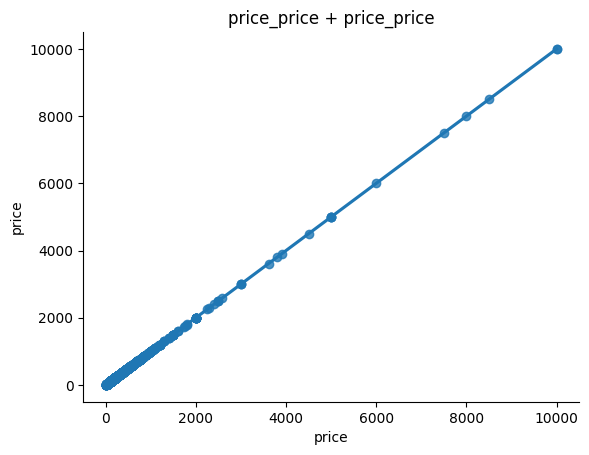

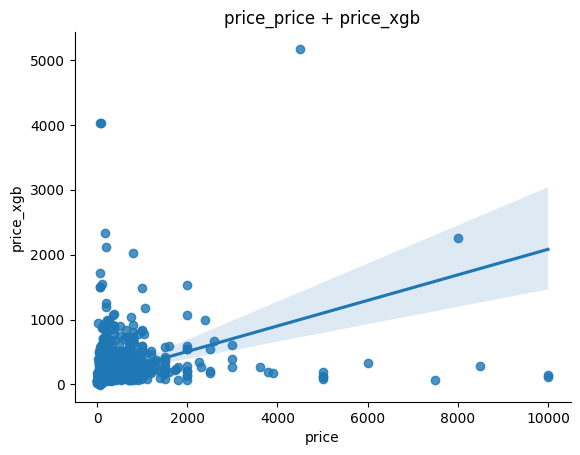

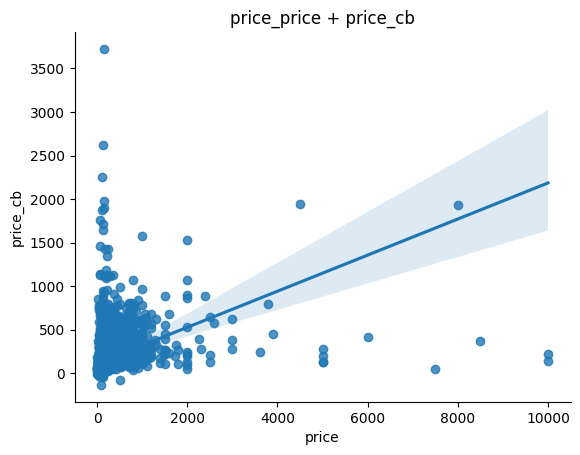

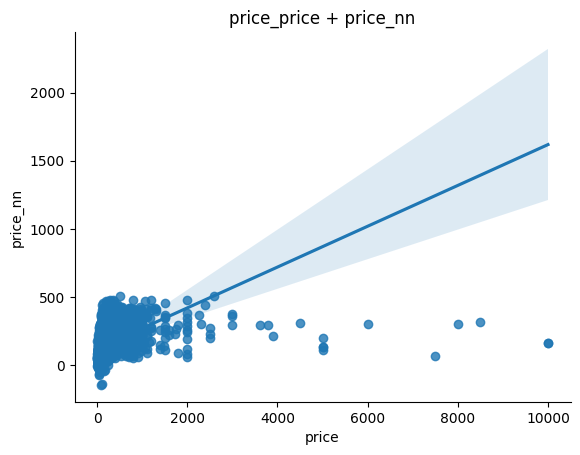

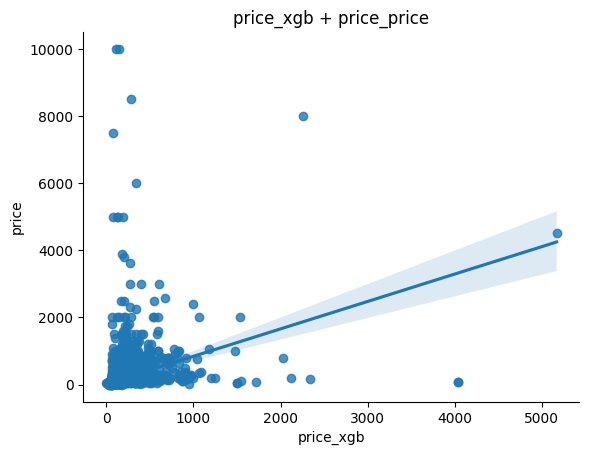

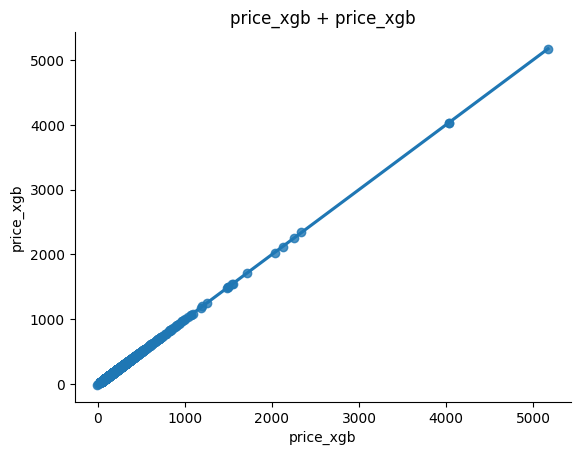

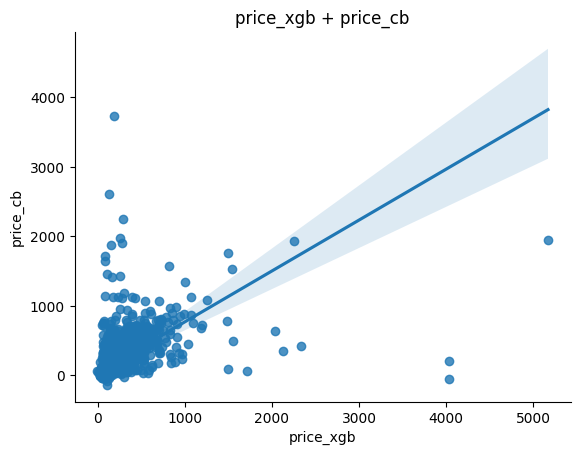

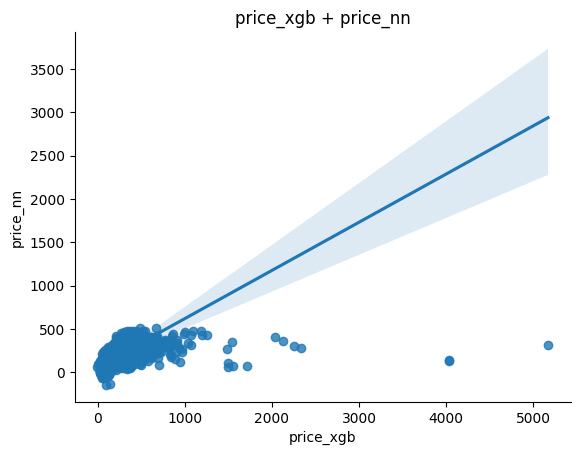

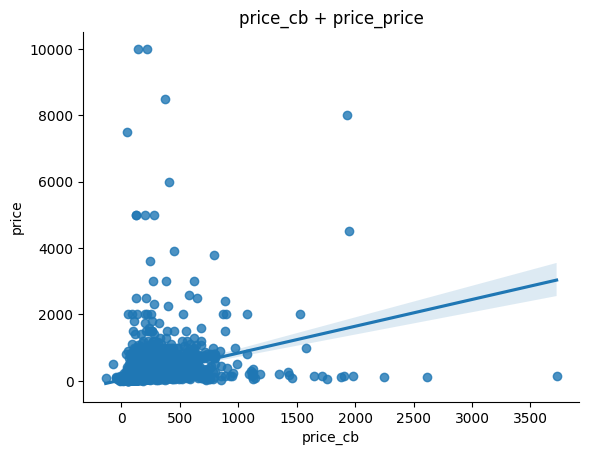

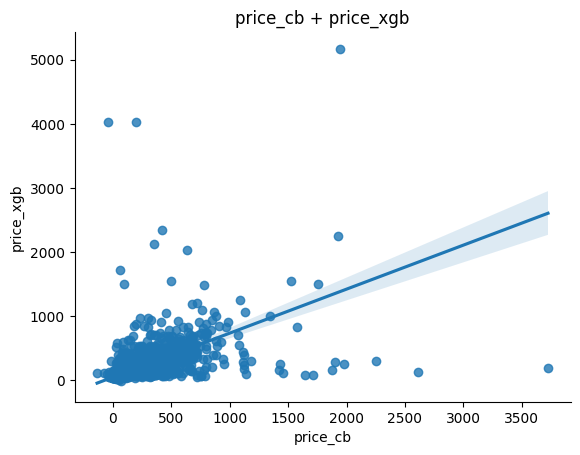

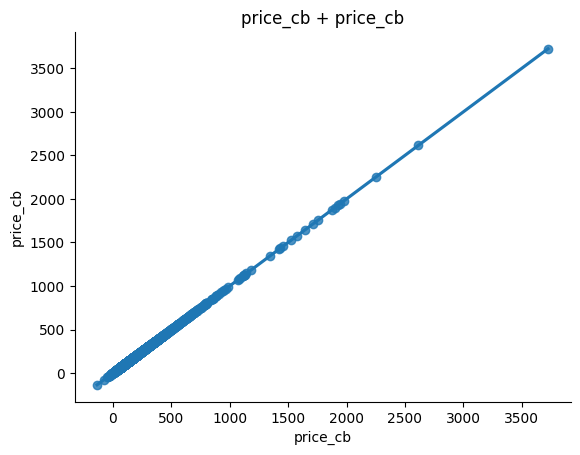

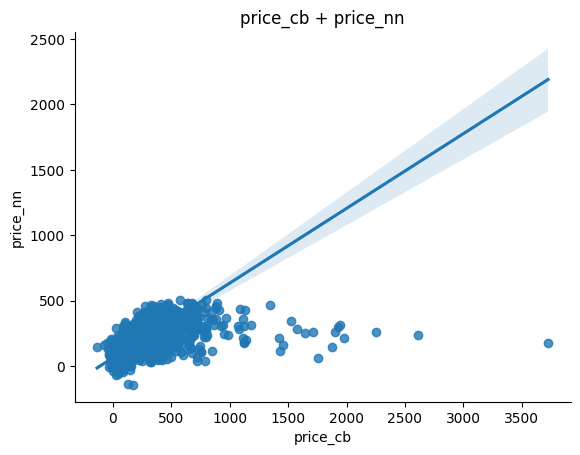

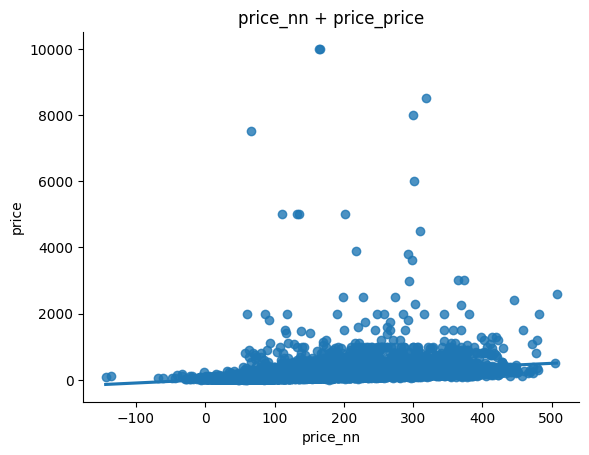

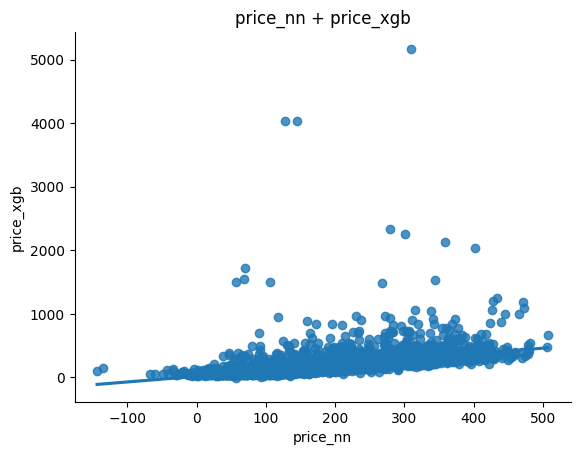

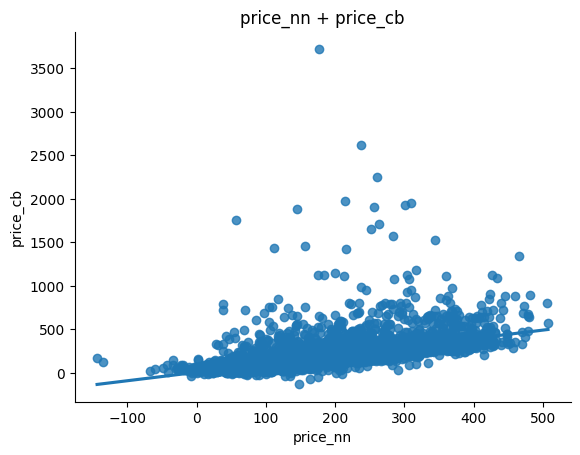

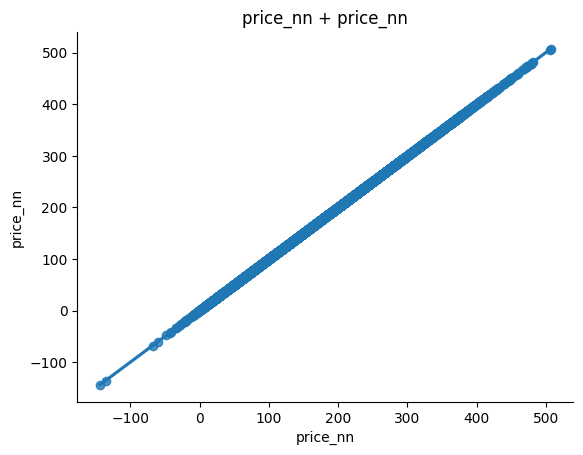

In [ ]:
for col1, col2 in itertools.product([target,'xgb','cb','nn'],[target,'xgb','cb','nn']):

  x = f"{target}_{col1}"
  if col1 == target:
    x = target
  y = f"{target}_{col2}"
  if col2 == target:
    y = target
  sns.regplot(data=model_data, x=x,y=y)
  plt.title(f"{target}_{col1} + {target}_{col2}")
  sns.despine()
  plt.show()

In [ ]:
s = pd.Series()
train_data = data.loc[data['test']==0]
test_data = data.loc[data['test']==1]
test_data[target] = 0
xtrain = xgb.DMatrix(train_data.loc[:, feats], train_data[target])
xtest = xgb.DMatrix(test_data.loc[:, feats], test_data[target])
xgbp = {
    'objective':'reg:squarederror'
}
model = xgb.train(xgbp, xtrain)
test_data[target] = pd.Series(model.predict(xtest), index=test_data.index)
test_data.loc[:, ['id', target]].to_csv('q.csv', index=False)

<IPython.core.display.Javascript object>

<ipython-input-30-c2230286a989>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series()
<ipython-input-30-c2230286a989>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[target] = 0
<ipython-input-30-c2230286a989>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[target] = pd.Series(model.predict(xtest), index=test_data.index)


In [ ]:
s = pd.Series()
# for train_idx, test_idx in tqdm(kf.split(model_data), total=folds, leave=False):
train_data = data.loc[data['test']==0]
test_data = data.loc[data['test']==1]
test_data[target] = 0
htrain = h2o.H2OFrame(train_data)
htest = h2o.H2OFrame(test_data)

# cbp = {
#     'n_estimators':300
# }
model = H2ODeepLearningEstimator(**nnp)
model.train(x=feats, y=target ,training_frame = htrain)
_s = model.predict(htest)
_s = _s.as_data_frame()
test_data[target] = _s.set_index(test_data.index)['predict']
test_data.loc[:, ['id', target]].to_csv('ergier.csv', index=False)

<IPython.core.display.Javascript object>

<ipython-input-32-9aba91a2c351>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series()
<ipython-input-32-9aba91a2c351>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[target] = 0


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


<ipython-input-32-9aba91a2c351>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[target] = _s.set_index(test_data.index)['predict']


In [ ]:
s = pd.Series()
train_data = data.loc[data['test']==0]
test_data = data.loc[data['test']==1]
test_data[target] = 0
xtrain = xgb.DMatrix(train_data.loc[:, feats], train_data[target])
xtest = xgb.DMatrix(test_data.loc[:, feats], test_data[target])

xgbp = {
    'objective':'reg:squarederror'
}
model = xgb.train(xgbp, xtrain)
test_data[f'{target}_xgb'] = pd.Series(model.predict(xtest), index=test_data.index)

cbp = {
    'n_estimators':300
}
model = cb.CatBoostRegressor(**cbp, verbose=False)
model.fit(train_data.loc[:, feats], train_data[target])
test_data[f'{target}_cb'] = pd.Series(model.predict(test_data.loc[:, feats]), index=test_data.index)

htest = h2o.H2OFrame(test_data)

_s = nn.predict(htest)
_s = _s.as_data_frame()
test_data[target] = _s.set_index(test_data.index)['predict']
test_data.loc[:, ['id', target]].to_csv('william.csv', index=False)

<IPython.core.display.Javascript object>

<ipython-input-41-be784caa0bcd>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series()
<ipython-input-41-be784caa0bcd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[target] = 0
<ipython-input-41-be784caa0bcd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[f'{target}_xgb'] = pd.Series(model.predict(xtest), index=test_data.index)
<ipython-input-41-be784caa0bc

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


<ipython-input-41-be784caa0bcd>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[target] = _s.set_index(test_data.index)['predict']


# notes

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import log_loss, mean_squared_error
from sklearn.model_selection import KFold
import optuna as opt
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
from tqdm.notebook import tqdm
import h2o
h2o.init()

In [ ]:
s = pd.Series()
train_data = model_data.copy()
htrain = h2o.H2OFrame(train_data)
nnp = {
    'epochs':20,
    'hidden':[500,500],
    'l1': 0,
    'l2': 0,
}
nn = H2ODeepLearningEstimator(**nnp)
nn.train(x=[f'{target}_xgb',f'{target}_cb'], y=target ,training_frame = htrain)


In [ ]:
s = pd.Series()
train_data = data.loc[data['test']==0]
test_data = data.loc[data['test']==1]
test_data[target] = 0
xtrain = xgb.DMatrix(train_data.loc[:, feats], train_data[target])
xtest = xgb.DMatrix(test_data.loc[:, feats], test_data[target])

xgbp = {
    'objective':'reg:squarederror'
}
model = xgb.train(xgbp, xtrain)
test_data[f'{target}_xgb'] = pd.Series(model.predict(xtest), index=test_data.index)

cbp = {
    'n_estimators':300
}
model = cb.CatBoostRegressor(**cbp, verbose=False)
model.fit(train_data.loc[:, feats], train_data[target])
test_data[f'{target}_cb'] = pd.Series(model.predict(test_data.loc[:, feats]), index=test_data.index)

htest = h2o.H2OFrame(test_data)

_s = nn.predict(htest)
_s = _s.as_data_frame()
test_data[target] = _s.set_index(test_data.index)['predict']
test_data.loc[:, ['id', target]].to_csv('william.csv', index=False)

# kinda real try 1
initial ensemble by 15 mins   
lgbm by 20 mins   
data cleaning/feat eng by 60 mins  
gbm deeper tune by 90 mins  
start h2o replace at 90 mins  


would of placed 6th with this

In [ ]:
import os
import pandas as pd
import numpy as np
import lightgbm as lgb
import catboost as cb
import optuna as opt
import xgboost as xgb
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
import h2o
h2o.init()
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

<IPython.core.display.Javascript object>

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpwz8hwwb7
  JVM stdout: /tmp/tmpwz8hwwb7/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpwz8hwwb7/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,"14 days, 11 hours and 45 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_9flk6r
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
train = pd.read_csv(f'{project_dir}/train.csv')
test = pd.read_csv(f'{project_dir}/test.csv')
train['test'] = 0
test['test'] = 1
data = pd.concat([train,test], ignore_index=True)
data['date_of_birth'] = pd.to_datetime(data['date_of_birth'])
data['year'] = data['date_of_birth'].dt.year
data['month'] = data['date_of_birth'].dt.month
data['age_upon_outcome'] = data['age_upon_outcome'].fillna('-1')
age = pd.Series()

x = data.loc[data['age_upon_outcome'].str.contains('year'), 'age_upon_outcome'].str.split(' ', expand=True)[0].astype(int)
x = x.mul(365)
age = pd.concat([age, x])

x = data.loc[data['age_upon_outcome'].str.contains('month'), 'age_upon_outcome'].str.split(' ', expand=True)[0].astype(int)
x = x.mul(30)
age = pd.concat([age, x])

x = data.loc[data['age_upon_outcome'].str.contains('week'), 'age_upon_outcome'].str.split(' ', expand=True)[0].astype(int)
x = x.mul(7)
age = pd.concat([age, x])

data['outcome_age'] = age
data['datetime'] = pd.to_datetime(data['datetime'])
data['log_year'] = data['datetime'].dt.year
data['log_month'] = data['datetime'].dt.month
data['log_day'] = data['datetime'].dt.day
data['log_hour'] = data['datetime'].dt.hour

cols = [
    'animal_type', 'breed', 'color', 'date_of_birth',
       'outcome_type', 'sex', 'spay_neuter'
]
for col in cols:
  data[f'{col}_code'] = data[col].astype('category').cat.codes

<IPython.core.display.Javascript object>

<ipython-input-104-ed842972a82a>:10: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  age = pd.Series()


In [ ]:
x = data.dtypes
x[x!='object'].index

<IPython.core.display.Javascript object>

Index(['id', 'date_of_birth', 'datetime', 'test', 'year', 'month',
       'outcome_age', 'log_year', 'log_month', 'log_day', 'log_hour',
       'animal_type_code', 'breed_code', 'color_code', 'date_of_birth_code',
       'outcome_type_code', 'sex_code', 'spay_neuter_code'],
      dtype='object')

In [ ]:
data.shape

<IPython.core.display.Javascript object>

(77725, 21)

In [ ]:
feats = [
    'year', 'month',
       'outcome_age', 'log_year', 'log_month', 'log_day', 'log_hour',
       'animal_type_code', 'breed_code', 'color_code', 'date_of_birth_code',
       'sex_code', 'spay_neuter_code'
]
target = 'outcome_type_code'
model_data = data.loc[data['test']==0].dropna(subset=feats+[target])
model_data.shape

<IPython.core.display.Javascript object>

(53697, 26)

In [ ]:
def tune(trial):
  p = {
      'objective':'multi:softprob',
      'num_class':model_data[target].unique().shape[0],
      'eta':trial.suggest_float('eta', 0, 0.3),
      'reg_lambda':trial.suggest_float('reg_lambda', 0, 3),
  }
  model = xgb.train(p, xtrain)
  _df = pd.DataFrame(model.predict(xtest), index=test.index)
  loss = log_loss(test[target], _df)
  return loss

<IPython.core.display.Javascript object>

In [ ]:
dfp = pd.DataFrame()

folds = 2
kf = KFold(folds, shuffle=True)
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
  xtest = xgb.DMatrix(test.loc[:, feats], test[target])
  study = opt.create_study(direction='minimize')

  study.optimize(tune, n_trials=20)
  _dfp = pd.DataFrame([study.best_params])
  dfp = pd.concat([dfp, _dfp])

p = dfp.mean().to_dict()
pp = {
    'objective':'multi:softprob',
    'num_class':model_data[target].unique().shape[0],
}
xgbp = {**p,**pp}


<IPython.core.display.Javascript object>

[I 2024-01-04 04:09:25,516] A new study created in memory with name: no-name-cb7fbc4b-04d6-43a9-ae57-aa854a11fe7e
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:09:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-01-04 04:09:27,760] Trial 0 finished with value: 0.8514910831637722 and parameters: {'eta': 0.03982921682420036, 'reg_lambda': 0.732122025386849, 'scale_pos_weight': 1.7248742325636708}. Best is trial 0 with value: 0.8514910831637722.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:09:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-01-04 04:09:28,373] Trial 1 finished with value: 0.5261216024183326 and parameters: {'eta': 0.24458122413965064, 'reg_lambda': 1.6311353405641995, 'scale_pos_weight': 2.3061436822309385}. Best is trial 1 with valu

KeyboardInterrupt: ignored

In [ ]:
def tune(trial):
  p = {
      'n_estimators':100,
      'eta':trial.suggest_float('eta', 0, 0.3),
      'reg_lambda':trial.suggest_float('reg_lambda', 0, 3),

  }
  model = cb.CatBoostClassifier(**p)
  model.fit(train.loc[:,feats], train[target])
  _df = pd.DataFrame(model.predict_proba(test.loc[:,feats]), index=test.index)
  loss = log_loss(test[target], _df)
  return loss

<IPython.core.display.Javascript object>

In [ ]:
dfp = pd.DataFrame()

folds = 2
kf = KFold(folds, shuffle=True)
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
  xtest = xgb.DMatrix(test.loc[:, feats], test[target])
  study = opt.create_study(direction='minimize')

  study.optimize(tune, n_trials=20)
  _dfp = pd.DataFrame([study.best_params])
  dfp = pd.concat([dfp, _dfp])

p = dfp.mean().to_dict()
pp = {
    'n_estimators':100,
}
cbp = {**p,**pp}


<IPython.core.display.Javascript object>

[I 2024-01-04 04:10:23,342] A new study created in memory with name: no-name-c09e6928-755b-4ed2-a820-2ce9833da7ff


0:	learn: 0.9480300	total: 61ms	remaining: 6.03s
1:	learn: 0.8492131	total: 88.9ms	remaining: 4.36s
2:	learn: 0.7802050	total: 126ms	remaining: 4.06s
3:	learn: 0.7272357	total: 159ms	remaining: 3.83s
4:	learn: 0.6868759	total: 193ms	remaining: 3.66s
5:	learn: 0.6563974	total: 229ms	remaining: 3.58s
6:	learn: 0.6312031	total: 291ms	remaining: 3.86s
7:	learn: 0.6112773	total: 343ms	remaining: 3.94s
8:	learn: 0.5943989	total: 381ms	remaining: 3.85s
9:	learn: 0.5817453	total: 415ms	remaining: 3.74s
10:	learn: 0.5710156	total: 450ms	remaining: 3.64s
11:	learn: 0.5618914	total: 495ms	remaining: 3.63s
12:	learn: 0.5537301	total: 534ms	remaining: 3.57s
13:	learn: 0.5471206	total: 578ms	remaining: 3.55s
14:	learn: 0.5414898	total: 617ms	remaining: 3.5s
15:	learn: 0.5370801	total: 661ms	remaining: 3.47s
16:	learn: 0.5328728	total: 707ms	remaining: 3.45s
17:	learn: 0.5295184	total: 723ms	remaining: 3.29s
18:	learn: 0.5263852	total: 755ms	remaining: 3.22s
19:	learn: 0.5238610	total: 787ms	remainin

[I 2024-01-04 04:10:27,334] Trial 0 finished with value: 0.48812570789628396 and parameters: {'eta': 0.1577067118009732, 'reg_lambda': 0.8116418069460326}. Best is trial 0 with value: 0.48812570789628396.


0:	learn: 0.8737109	total: 57.2ms	remaining: 5.66s
1:	learn: 0.7580548	total: 130ms	remaining: 6.35s
2:	learn: 0.6890430	total: 202ms	remaining: 6.51s
3:	learn: 0.6422979	total: 274ms	remaining: 6.58s
4:	learn: 0.6095911	total: 339ms	remaining: 6.43s
5:	learn: 0.5855604	total: 404ms	remaining: 6.34s
6:	learn: 0.5683889	total: 469ms	remaining: 6.24s
7:	learn: 0.5570211	total: 526ms	remaining: 6.05s
8:	learn: 0.5488187	total: 574ms	remaining: 5.81s
9:	learn: 0.5385743	total: 613ms	remaining: 5.52s
10:	learn: 0.5336806	total: 658ms	remaining: 5.33s
11:	learn: 0.5276596	total: 744ms	remaining: 5.45s
12:	learn: 0.5222895	total: 811ms	remaining: 5.42s
13:	learn: 0.5177365	total: 868ms	remaining: 5.33s
14:	learn: 0.5148572	total: 935ms	remaining: 5.3s
15:	learn: 0.5128515	total: 1.01s	remaining: 5.31s
16:	learn: 0.5094975	total: 1.09s	remaining: 5.3s
17:	learn: 0.5068632	total: 1.16s	remaining: 5.26s
18:	learn: 0.5047509	total: 1.29s	remaining: 5.49s
19:	learn: 0.5034713	total: 1.36s	remainin

[I 2024-01-04 04:10:33,943] Trial 1 finished with value: 0.48402837195532716 and parameters: {'eta': 0.24986925762273288, 'reg_lambda': 2.357097522926884}. Best is trial 1 with value: 0.48402837195532716.


0:	learn: 1.0428311	total: 22ms	remaining: 2.17s
1:	learn: 0.9948720	total: 42.3ms	remaining: 2.07s
2:	learn: 0.9538003	total: 73.2ms	remaining: 2.37s
3:	learn: 0.9158920	total: 106ms	remaining: 2.53s
4:	learn: 0.8837474	total: 143ms	remaining: 2.71s
5:	learn: 0.8552188	total: 173ms	remaining: 2.7s
6:	learn: 0.8290293	total: 192ms	remaining: 2.55s
7:	learn: 0.8067560	total: 219ms	remaining: 2.51s
8:	learn: 0.7846669	total: 239ms	remaining: 2.42s
9:	learn: 0.7652400	total: 261ms	remaining: 2.35s
10:	learn: 0.7479529	total: 304ms	remaining: 2.46s
11:	learn: 0.7310990	total: 342ms	remaining: 2.51s
12:	learn: 0.7163564	total: 375ms	remaining: 2.51s
13:	learn: 0.7020198	total: 417ms	remaining: 2.56s
14:	learn: 0.6893457	total: 456ms	remaining: 2.58s
15:	learn: 0.6778610	total: 505ms	remaining: 2.65s
16:	learn: 0.6672058	total: 541ms	remaining: 2.64s
17:	learn: 0.6577188	total: 585ms	remaining: 2.67s
18:	learn: 0.6481968	total: 645ms	remaining: 2.75s
19:	learn: 0.6396811	total: 681ms	remaini

[I 2024-01-04 04:10:37,715] Trial 2 finished with value: 0.5088507245247281 and parameters: {'eta': 0.055286384340004234, 'reg_lambda': 1.1924447317119307}. Best is trial 1 with value: 0.48402837195532716.


99:	learn: 0.5002673	total: 3.43s	remaining: 0us
0:	learn: 1.0265716	total: 59.1ms	remaining: 5.85s
1:	learn: 0.9672558	total: 117ms	remaining: 5.74s
2:	learn: 0.9183902	total: 172ms	remaining: 5.55s
3:	learn: 0.8746523	total: 228ms	remaining: 5.48s
4:	learn: 0.8388157	total: 266ms	remaining: 5.06s
5:	learn: 0.8076043	total: 303ms	remaining: 4.75s
6:	learn: 0.7796695	total: 343ms	remaining: 4.55s
7:	learn: 0.7565278	total: 378ms	remaining: 4.35s
8:	learn: 0.7344719	total: 412ms	remaining: 4.16s
9:	learn: 0.7149309	total: 449ms	remaining: 4.04s
10:	learn: 0.6965048	total: 490ms	remaining: 3.96s
11:	learn: 0.6802556	total: 524ms	remaining: 3.84s
12:	learn: 0.6662905	total: 563ms	remaining: 3.77s
13:	learn: 0.6530494	total: 600ms	remaining: 3.68s
14:	learn: 0.6415776	total: 635ms	remaining: 3.6s
15:	learn: 0.6309105	total: 671ms	remaining: 3.52s
16:	learn: 0.6216600	total: 713ms	remaining: 3.48s
17:	learn: 0.6135069	total: 747ms	remaining: 3.4s
18:	learn: 0.6054168	total: 801ms	remaining:

[I 2024-01-04 04:10:41,895] Trial 3 finished with value: 0.5034079411367245 and parameters: {'eta': 0.07221045149364301, 'reg_lambda': 1.9797002030888136}. Best is trial 1 with value: 0.48402837195532716.


0:	learn: 1.0307728	total: 37.9ms	remaining: 3.75s
1:	learn: 0.9743293	total: 73.3ms	remaining: 3.59s
2:	learn: 0.9272580	total: 110ms	remaining: 3.54s
3:	learn: 0.8848381	total: 160ms	remaining: 3.85s
4:	learn: 0.8497721	total: 200ms	remaining: 3.81s
5:	learn: 0.8190699	total: 233ms	remaining: 3.66s
6:	learn: 0.7914157	total: 274ms	remaining: 3.64s
7:	learn: 0.7683332	total: 311ms	remaining: 3.58s
8:	learn: 0.7463023	total: 346ms	remaining: 3.5s
9:	learn: 0.7266351	total: 375ms	remaining: 3.37s
10:	learn: 0.7080002	total: 430ms	remaining: 3.48s
11:	learn: 0.6914213	total: 484ms	remaining: 3.55s
12:	learn: 0.6772442	total: 518ms	remaining: 3.47s
13:	learn: 0.6638504	total: 556ms	remaining: 3.42s
14:	learn: 0.6520017	total: 594ms	remaining: 3.37s
15:	learn: 0.6409426	total: 622ms	remaining: 3.27s
16:	learn: 0.6312697	total: 655ms	remaining: 3.2s
17:	learn: 0.6227224	total: 703ms	remaining: 3.2s
18:	learn: 0.6142342	total: 750ms	remaining: 3.2s
19:	learn: 0.6068146	total: 801ms	remaining

[I 2024-01-04 04:10:47,384] Trial 4 finished with value: 0.5029357918350951 and parameters: {'eta': 0.06749383060633803, 'reg_lambda': 0.35582361684885633}. Best is trial 1 with value: 0.48402837195532716.


0:	learn: 0.8865537	total: 68ms	remaining: 6.74s
1:	learn: 0.7725124	total: 118ms	remaining: 5.78s
2:	learn: 0.7024705	total: 173ms	remaining: 5.6s
3:	learn: 0.6542155	total: 234ms	remaining: 5.61s
4:	learn: 0.6199192	total: 301ms	remaining: 5.73s
5:	learn: 0.5951041	total: 367ms	remaining: 5.75s
6:	learn: 0.5764554	total: 441ms	remaining: 5.86s
7:	learn: 0.5618623	total: 518ms	remaining: 5.95s
8:	learn: 0.5517039	total: 577ms	remaining: 5.83s
9:	learn: 0.5429352	total: 662ms	remaining: 5.96s
10:	learn: 0.5369160	total: 701ms	remaining: 5.67s
11:	learn: 0.5324903	total: 769ms	remaining: 5.64s
12:	learn: 0.5270230	total: 833ms	remaining: 5.58s
13:	learn: 0.5217586	total: 906ms	remaining: 5.57s
14:	learn: 0.5183343	total: 970ms	remaining: 5.5s
15:	learn: 0.5155074	total: 1.04s	remaining: 5.49s
16:	learn: 0.5125605	total: 1.1s	remaining: 5.39s
17:	learn: 0.5101357	total: 1.17s	remaining: 5.33s
18:	learn: 0.5067479	total: 1.23s	remaining: 5.24s
19:	learn: 0.5056575	total: 1.3s	remaining: 5

[I 2024-01-04 04:10:53,418] Trial 5 finished with value: 0.48464742911582315 and parameters: {'eta': 0.2321650229802556, 'reg_lambda': 0.9018615100044608}. Best is trial 1 with value: 0.48402837195532716.


0:	learn: 1.0681967	total: 31.4ms	remaining: 3.11s
1:	learn: 1.0402352	total: 68.1ms	remaining: 3.34s
2:	learn: 1.0148391	total: 108ms	remaining: 3.48s
3:	learn: 0.9901350	total: 144ms	remaining: 3.45s
4:	learn: 0.9681620	total: 209ms	remaining: 3.98s
5:	learn: 0.9476491	total: 262ms	remaining: 4.1s
6:	learn: 0.9279812	total: 314ms	remaining: 4.18s
7:	learn: 0.9104799	total: 378ms	remaining: 4.35s
8:	learn: 0.8926407	total: 436ms	remaining: 4.41s
9:	learn: 0.8767132	total: 474ms	remaining: 4.27s
10:	learn: 0.8611841	total: 522ms	remaining: 4.23s
11:	learn: 0.8461007	total: 577ms	remaining: 4.23s
12:	learn: 0.8323102	total: 637ms	remaining: 4.26s
13:	learn: 0.8186241	total: 683ms	remaining: 4.2s
14:	learn: 0.8061437	total: 751ms	remaining: 4.26s
15:	learn: 0.7945509	total: 789ms	remaining: 4.14s
16:	learn: 0.7833795	total: 846ms	remaining: 4.13s
17:	learn: 0.7727434	total: 867ms	remaining: 3.95s
18:	learn: 0.7623057	total: 900ms	remaining: 3.84s
19:	learn: 0.7527838	total: 936ms	remaini

[I 2024-01-04 04:10:57,858] Trial 6 finished with value: 0.5340165638865481 and parameters: {'eta': 0.029834589927847276, 'reg_lambda': 2.134452478441538}. Best is trial 1 with value: 0.48402837195532716.


0:	learn: 0.9952385	total: 43.7ms	remaining: 4.33s
1:	learn: 0.9172742	total: 72.6ms	remaining: 3.56s
2:	learn: 0.8569923	total: 135ms	remaining: 4.35s
3:	learn: 0.8063990	total: 197ms	remaining: 4.73s
4:	learn: 0.7665138	total: 250ms	remaining: 4.75s
5:	learn: 0.7338689	total: 283ms	remaining: 4.43s
6:	learn: 0.7056064	total: 315ms	remaining: 4.19s
7:	learn: 0.6833739	total: 348ms	remaining: 4s
8:	learn: 0.6620435	total: 376ms	remaining: 3.81s
9:	learn: 0.6442363	total: 411ms	remaining: 3.7s
10:	learn: 0.6287532	total: 445ms	remaining: 3.6s
11:	learn: 0.6148495	total: 486ms	remaining: 3.56s
12:	learn: 0.6037996	total: 513ms	remaining: 3.43s
13:	learn: 0.5932791	total: 552ms	remaining: 3.39s
14:	learn: 0.5845452	total: 585ms	remaining: 3.32s
15:	learn: 0.5771936	total: 615ms	remaining: 3.23s
16:	learn: 0.5702101	total: 654ms	remaining: 3.19s
17:	learn: 0.5639750	total: 690ms	remaining: 3.14s
18:	learn: 0.5582627	total: 721ms	remaining: 3.07s
19:	learn: 0.5533169	total: 757ms	remaining:

[I 2024-01-04 04:11:02,868] Trial 7 finished with value: 0.4950318596323229 and parameters: {'eta': 0.10509371780520374, 'reg_lambda': 0.7582334475610226}. Best is trial 1 with value: 0.48402837195532716.


0:	learn: 0.8432401	total: 73.7ms	remaining: 7.29s
1:	learn: 0.7257255	total: 144ms	remaining: 7.08s
2:	learn: 0.6586372	total: 200ms	remaining: 6.48s
3:	learn: 0.6116178	total: 264ms	remaining: 6.33s
4:	learn: 0.5846878	total: 301ms	remaining: 5.71s
5:	learn: 0.5657121	total: 353ms	remaining: 5.53s
6:	learn: 0.5513840	total: 410ms	remaining: 5.44s
7:	learn: 0.5416191	total: 456ms	remaining: 5.25s
8:	learn: 0.5344999	total: 516ms	remaining: 5.22s
9:	learn: 0.5264365	total: 568ms	remaining: 5.12s
10:	learn: 0.5229181	total: 638ms	remaining: 5.17s
11:	learn: 0.5190390	total: 697ms	remaining: 5.11s
12:	learn: 0.5143560	total: 759ms	remaining: 5.08s
13:	learn: 0.5099421	total: 820ms	remaining: 5.04s
14:	learn: 0.5081736	total: 883ms	remaining: 5s
15:	learn: 0.5055570	total: 965ms	remaining: 5.07s
16:	learn: 0.5035908	total: 1.02s	remaining: 5.01s
17:	learn: 0.5010861	total: 1.1s	remaining: 5.03s
18:	learn: 0.4993778	total: 1.18s	remaining: 5.05s
19:	learn: 0.4977749	total: 1.25s	remaining:

[I 2024-01-04 04:11:08,256] Trial 8 finished with value: 0.4850144210499673 and parameters: {'eta': 0.2890625364953188, 'reg_lambda': 0.14043648382915097}. Best is trial 1 with value: 0.48402837195532716.


97:	learn: 0.4218152	total: 4.94s	remaining: 101ms
98:	learn: 0.4208563	total: 4.98s	remaining: 50.3ms
99:	learn: 0.4195853	total: 5.02s	remaining: 0us
0:	learn: 0.9461737	total: 39.5ms	remaining: 3.91s
1:	learn: 0.8466597	total: 74.4ms	remaining: 3.64s
2:	learn: 0.7775880	total: 111ms	remaining: 3.6s
3:	learn: 0.7247032	total: 152ms	remaining: 3.65s
4:	learn: 0.6845008	total: 182ms	remaining: 3.46s
5:	learn: 0.6542434	total: 219ms	remaining: 3.42s
6:	learn: 0.6292419	total: 261ms	remaining: 3.47s
7:	learn: 0.6096242	total: 297ms	remaining: 3.41s
8:	learn: 0.5943086	total: 333ms	remaining: 3.36s
9:	learn: 0.5806114	total: 368ms	remaining: 3.31s
10:	learn: 0.5704068	total: 403ms	remaining: 3.26s
11:	learn: 0.5616946	total: 437ms	remaining: 3.21s
12:	learn: 0.5530112	total: 473ms	remaining: 3.17s
13:	learn: 0.5460422	total: 508ms	remaining: 3.12s
14:	learn: 0.5407242	total: 543ms	remaining: 3.08s
15:	learn: 0.5361881	total: 563ms	remaining: 2.96s
16:	learn: 0.5320968	total: 586ms	remaini

[I 2024-01-04 04:11:11,227] Trial 9 finished with value: 0.4877229636162243 and parameters: {'eta': 0.16057762031738745, 'reg_lambda': 2.2843315757355276}. Best is trial 1 with value: 0.48402837195532716.


0:	learn: 0.8869394	total: 38.8ms	remaining: 3.84s
1:	learn: 0.7729361	total: 72.5ms	remaining: 3.55s
2:	learn: 0.7030926	total: 96.6ms	remaining: 3.12s
3:	learn: 0.6549245	total: 115ms	remaining: 2.77s
4:	learn: 0.6207918	total: 134ms	remaining: 2.54s
5:	learn: 0.5954257	total: 152ms	remaining: 2.37s
6:	learn: 0.5766074	total: 171ms	remaining: 2.27s
7:	learn: 0.5614204	total: 189ms	remaining: 2.17s
8:	learn: 0.5513452	total: 208ms	remaining: 2.1s
9:	learn: 0.5429352	total: 227ms	remaining: 2.05s
10:	learn: 0.5383096	total: 248ms	remaining: 2.01s
11:	learn: 0.5313995	total: 269ms	remaining: 1.97s
12:	learn: 0.5262308	total: 310ms	remaining: 2.07s
13:	learn: 0.5216858	total: 338ms	remaining: 2.08s
14:	learn: 0.5186371	total: 376ms	remaining: 2.13s
15:	learn: 0.5150765	total: 414ms	remaining: 2.17s
16:	learn: 0.5121129	total: 455ms	remaining: 2.22s
17:	learn: 0.5098409	total: 494ms	remaining: 2.25s
18:	learn: 0.5076960	total: 523ms	remaining: 2.23s
19:	learn: 0.5067266	total: 548ms	remai

[I 2024-01-04 04:11:14,250] Trial 10 finished with value: 0.48456170380944324 and parameters: {'eta': 0.23311744282160277, 'reg_lambda': 2.9374941420980543}. Best is trial 1 with value: 0.48402837195532716.


0:	learn: 0.8899925	total: 34.7ms	remaining: 3.43s
1:	learn: 0.7764506	total: 67.3ms	remaining: 3.3s
2:	learn: 0.7064463	total: 97.9ms	remaining: 3.16s
3:	learn: 0.6579683	total: 115ms	remaining: 2.76s
4:	learn: 0.6235020	total: 134ms	remaining: 2.54s
5:	learn: 0.5978235	total: 152ms	remaining: 2.39s
6:	learn: 0.5786625	total: 171ms	remaining: 2.27s
7:	learn: 0.5646909	total: 189ms	remaining: 2.17s
8:	learn: 0.5539980	total: 207ms	remaining: 2.09s
9:	learn: 0.5444423	total: 237ms	remaining: 2.13s
10:	learn: 0.5382029	total: 274ms	remaining: 2.21s
11:	learn: 0.5338043	total: 313ms	remaining: 2.29s
12:	learn: 0.5285971	total: 349ms	remaining: 2.34s
13:	learn: 0.5236280	total: 384ms	remaining: 2.36s
14:	learn: 0.5202079	total: 413ms	remaining: 2.34s
15:	learn: 0.5176751	total: 458ms	remaining: 2.4s
16:	learn: 0.5147226	total: 495ms	remaining: 2.42s
17:	learn: 0.5123140	total: 528ms	remaining: 2.4s
18:	learn: 0.5088481	total: 566ms	remaining: 2.41s
19:	learn: 0.5074950	total: 599ms	remaini

[I 2024-01-04 04:11:17,455] Trial 11 finished with value: 0.4865746344308899 and parameters: {'eta': 0.22919580645979942, 'reg_lambda': 2.9124712011019778}. Best is trial 1 with value: 0.48402837195532716.


0:	learn: 0.8721448	total: 37.5ms	remaining: 3.71s
1:	learn: 0.7563236	total: 78.2ms	remaining: 3.83s
2:	learn: 0.6875095	total: 115ms	remaining: 3.72s
3:	learn: 0.6409808	total: 147ms	remaining: 3.52s
4:	learn: 0.6085104	total: 182ms	remaining: 3.46s
5:	learn: 0.5846638	total: 216ms	remaining: 3.38s
6:	learn: 0.5676528	total: 276ms	remaining: 3.67s
7:	learn: 0.5564443	total: 325ms	remaining: 3.73s
8:	learn: 0.5483907	total: 365ms	remaining: 3.69s
9:	learn: 0.5381721	total: 401ms	remaining: 3.6s
10:	learn: 0.5333316	total: 433ms	remaining: 3.51s
11:	learn: 0.5274292	total: 489ms	remaining: 3.58s
12:	learn: 0.5221471	total: 534ms	remaining: 3.57s
13:	learn: 0.5176876	total: 579ms	remaining: 3.56s
14:	learn: 0.5148005	total: 612ms	remaining: 3.47s
15:	learn: 0.5126579	total: 644ms	remaining: 3.38s
16:	learn: 0.5093715	total: 708ms	remaining: 3.46s
17:	learn: 0.5067962	total: 746ms	remaining: 3.4s
18:	learn: 0.5047603	total: 780ms	remaining: 3.32s
19:	learn: 0.5039650	total: 828ms	remaini

[I 2024-01-04 04:11:22,431] Trial 12 finished with value: 0.48533939133705684 and parameters: {'eta': 0.25238958150939167, 'reg_lambda': 2.9781869544575166}. Best is trial 1 with value: 0.48402837195532716.


0:	learn: 0.9171894	total: 38.9ms	remaining: 3.85s
1:	learn: 0.8091029	total: 88.1ms	remaining: 4.31s
2:	learn: 0.7385281	total: 143ms	remaining: 4.62s
3:	learn: 0.6879246	total: 191ms	remaining: 4.58s
4:	learn: 0.6479778	total: 244ms	remaining: 4.64s
5:	learn: 0.6220529	total: 286ms	remaining: 4.47s
6:	learn: 0.5997439	total: 337ms	remaining: 4.48s
7:	learn: 0.5820842	total: 388ms	remaining: 4.46s
8:	learn: 0.5688009	total: 430ms	remaining: 4.34s
9:	learn: 0.5585885	total: 466ms	remaining: 4.2s
10:	learn: 0.5505889	total: 503ms	remaining: 4.07s
11:	learn: 0.5437733	total: 556ms	remaining: 4.08s
12:	learn: 0.5378753	total: 595ms	remaining: 3.98s
13:	learn: 0.5325110	total: 631ms	remaining: 3.87s
14:	learn: 0.5277216	total: 678ms	remaining: 3.84s
15:	learn: 0.5243429	total: 708ms	remaining: 3.72s
16:	learn: 0.5210603	total: 744ms	remaining: 3.63s
17:	learn: 0.5178048	total: 789ms	remaining: 3.6s
18:	learn: 0.5142134	total: 824ms	remaining: 3.51s
19:	learn: 0.5129240	total: 863ms	remaini

[I 2024-01-04 04:11:26,261] Trial 13 finished with value: 0.48734027930827883 and parameters: {'eta': 0.19509433902723095, 'reg_lambda': 2.5002164806301357}. Best is trial 1 with value: 0.48402837195532716.


99:	learn: 0.4549067	total: 3.5s	remaining: 0us
0:	learn: 0.8569299	total: 43.6ms	remaining: 4.31s
1:	learn: 0.7399356	total: 63.5ms	remaining: 3.11s
2:	learn: 0.6724196	total: 87.7ms	remaining: 2.83s
3:	learn: 0.6265717	total: 123ms	remaining: 2.95s
4:	learn: 0.5948625	total: 158ms	remaining: 3.01s
5:	learn: 0.5766875	total: 193ms	remaining: 3.02s
6:	learn: 0.5613350	total: 227ms	remaining: 3.02s
7:	learn: 0.5509014	total: 275ms	remaining: 3.16s
8:	learn: 0.5408307	total: 310ms	remaining: 3.14s
9:	learn: 0.5316381	total: 338ms	remaining: 3.04s
10:	learn: 0.5282553	total: 372ms	remaining: 3.01s
11:	learn: 0.5245222	total: 392ms	remaining: 2.87s
12:	learn: 0.5176820	total: 411ms	remaining: 2.75s
13:	learn: 0.5130207	total: 438ms	remaining: 2.69s
14:	learn: 0.5104489	total: 465ms	remaining: 2.63s
15:	learn: 0.5074776	total: 503ms	remaining: 2.64s
16:	learn: 0.5051484	total: 540ms	remaining: 2.63s
17:	learn: 0.5038632	total: 571ms	remaining: 2.6s
18:	learn: 0.5011813	total: 590ms	remainin

[I 2024-01-04 04:11:29,696] Trial 14 finished with value: 0.48362174643579336 and parameters: {'eta': 0.27162382612157476, 'reg_lambda': 1.5755581693132936}. Best is trial 14 with value: 0.48362174643579336.


98:	learn: 0.4355451	total: 3.11s	remaining: 31.5ms
99:	learn: 0.4346077	total: 3.15s	remaining: 0us
0:	learn: 0.8373160	total: 48.4ms	remaining: 4.79s
1:	learn: 0.7198207	total: 83.8ms	remaining: 4.11s
2:	learn: 0.6522869	total: 117ms	remaining: 3.8s
3:	learn: 0.6067153	total: 161ms	remaining: 3.86s
4:	learn: 0.5807041	total: 197ms	remaining: 3.75s
5:	learn: 0.5640801	total: 231ms	remaining: 3.63s
6:	learn: 0.5518188	total: 267ms	remaining: 3.54s
7:	learn: 0.5433002	total: 302ms	remaining: 3.47s
8:	learn: 0.5337496	total: 339ms	remaining: 3.43s
9:	learn: 0.5265002	total: 360ms	remaining: 3.24s
10:	learn: 0.5218102	total: 395ms	remaining: 3.2s
11:	learn: 0.5199518	total: 412ms	remaining: 3.02s
12:	learn: 0.5151087	total: 433ms	remaining: 2.9s
13:	learn: 0.5103172	total: 474ms	remaining: 2.91s
14:	learn: 0.5062291	total: 511ms	remaining: 2.89s
15:	learn: 0.5049712	total: 549ms	remaining: 2.88s
16:	learn: 0.5023977	total: 584ms	remaining: 2.85s
17:	learn: 0.5014565	total: 617ms	remaining

[I 2024-01-04 04:11:32,612] Trial 15 finished with value: 0.4818324437005369 and parameters: {'eta': 0.2987907469541822, 'reg_lambda': 1.613112178429894}. Best is trial 15 with value: 0.4818324437005369.


99:	learn: 0.4292329	total: 2.6s	remaining: 0us
0:	learn: 0.8431677	total: 28.7ms	remaining: 2.84s
1:	learn: 0.7257061	total: 59.6ms	remaining: 2.92s
2:	learn: 0.6574757	total: 97.4ms	remaining: 3.15s
3:	learn: 0.6111569	total: 130ms	remaining: 3.11s
4:	learn: 0.5837570	total: 172ms	remaining: 3.27s
5:	learn: 0.5658797	total: 227ms	remaining: 3.56s
6:	learn: 0.5531915	total: 260ms	remaining: 3.45s
7:	learn: 0.5442123	total: 317ms	remaining: 3.65s
8:	learn: 0.5374992	total: 336ms	remaining: 3.39s
9:	learn: 0.5283117	total: 358ms	remaining: 3.22s
10:	learn: 0.5227019	total: 381ms	remaining: 3.08s
11:	learn: 0.5205575	total: 418ms	remaining: 3.07s
12:	learn: 0.5171519	total: 455ms	remaining: 3.05s
13:	learn: 0.5133486	total: 500ms	remaining: 3.07s
14:	learn: 0.5117998	total: 519ms	remaining: 2.94s
15:	learn: 0.5082019	total: 554ms	remaining: 2.91s
16:	learn: 0.5057300	total: 591ms	remaining: 2.88s
17:	learn: 0.5039507	total: 630ms	remaining: 2.87s
18:	learn: 0.5010483	total: 677ms	remaini

[I 2024-01-04 04:11:36,207] Trial 16 finished with value: 0.4846071367579385 and parameters: {'eta': 0.2906426920188268, 'reg_lambda': 1.6899087781763082}. Best is trial 15 with value: 0.4818324437005369.


0:	learn: 0.8382003	total: 123ms	remaining: 12.2s
1:	learn: 0.7207037	total: 238ms	remaining: 11.7s
2:	learn: 0.6530607	total: 364ms	remaining: 11.8s
3:	learn: 0.6073744	total: 500ms	remaining: 12s
4:	learn: 0.5812473	total: 618ms	remaining: 11.7s
5:	learn: 0.5645306	total: 713ms	remaining: 11.2s
6:	learn: 0.5522000	total: 826ms	remaining: 11s
7:	learn: 0.5436141	total: 975ms	remaining: 11.2s
8:	learn: 0.5340374	total: 1.07s	remaining: 10.9s
9:	learn: 0.5267613	total: 1.21s	remaining: 10.9s
10:	learn: 0.5220400	total: 1.33s	remaining: 10.8s
11:	learn: 0.5201675	total: 1.46s	remaining: 10.7s
12:	learn: 0.5153134	total: 1.59s	remaining: 10.7s
13:	learn: 0.5105080	total: 1.73s	remaining: 10.6s
14:	learn: 0.5064087	total: 1.88s	remaining: 10.6s
15:	learn: 0.5051504	total: 2.01s	remaining: 10.5s
16:	learn: 0.5025663	total: 2.12s	remaining: 10.3s
17:	learn: 0.5016227	total: 2.21s	remaining: 10.1s
18:	learn: 0.5001872	total: 2.38s	remaining: 10.2s
19:	learn: 0.4991282	total: 2.5s	remaining: 1

[I 2024-01-04 04:11:42,686] Trial 17 finished with value: 0.4835727531297468 and parameters: {'eta': 0.29754667296055376, 'reg_lambda': 1.618189964813518}. Best is trial 15 with value: 0.4818324437005369.


99:	learn: 0.4294198	total: 5.97s	remaining: 0us
0:	learn: 0.9069276	total: 15.8ms	remaining: 1.56s
1:	learn: 0.7965221	total: 32.1ms	remaining: 1.57s
2:	learn: 0.7258286	total: 47.7ms	remaining: 1.54s
3:	learn: 0.6758714	total: 67.9ms	remaining: 1.63s
4:	learn: 0.6396424	total: 88.9ms	remaining: 1.69s
5:	learn: 0.6126562	total: 104ms	remaining: 1.63s
6:	learn: 0.5917158	total: 119ms	remaining: 1.58s
7:	learn: 0.5745807	total: 135ms	remaining: 1.55s
8:	learn: 0.5623310	total: 150ms	remaining: 1.51s
9:	learn: 0.5534438	total: 165ms	remaining: 1.48s
10:	learn: 0.5460646	total: 183ms	remaining: 1.48s
11:	learn: 0.5399625	total: 204ms	remaining: 1.5s
12:	learn: 0.5341367	total: 219ms	remaining: 1.46s
13:	learn: 0.5280961	total: 235ms	remaining: 1.44s
14:	learn: 0.5239891	total: 249ms	remaining: 1.41s
15:	learn: 0.5209378	total: 269ms	remaining: 1.41s
16:	learn: 0.5175387	total: 288ms	remaining: 1.41s
17:	learn: 0.5146838	total: 302ms	remaining: 1.38s
18:	learn: 0.5111367	total: 317ms	remai

[I 2024-01-04 04:11:45,456] Trial 18 finished with value: 0.4839271461201114 and parameters: {'eta': 0.20692117523189896, 'reg_lambda': 1.3106789026772474}. Best is trial 15 with value: 0.4818324437005369.


99:	learn: 0.4470037	total: 2.45s	remaining: 0us
0:	learn: 0.9216068	total: 78.3ms	remaining: 7.75s
1:	learn: 0.8146529	total: 134ms	remaining: 6.57s
2:	learn: 0.7441146	total: 190ms	remaining: 6.14s
3:	learn: 0.6932235	total: 247ms	remaining: 5.93s
4:	learn: 0.6529016	total: 300ms	remaining: 5.71s
5:	learn: 0.6264417	total: 371ms	remaining: 5.82s
6:	learn: 0.6036343	total: 417ms	remaining: 5.54s
7:	learn: 0.5857826	total: 508ms	remaining: 5.85s
8:	learn: 0.5739412	total: 582ms	remaining: 5.88s
9:	learn: 0.5619725	total: 624ms	remaining: 5.61s
10:	learn: 0.5540679	total: 727ms	remaining: 5.88s
11:	learn: 0.5454215	total: 763ms	remaining: 5.59s
12:	learn: 0.5379352	total: 810ms	remaining: 5.42s
13:	learn: 0.5330418	total: 860ms	remaining: 5.28s
14:	learn: 0.5287325	total: 892ms	remaining: 5.05s
15:	learn: 0.5237422	total: 934ms	remaining: 4.9s
16:	learn: 0.5201964	total: 970ms	remaining: 4.73s
17:	learn: 0.5180133	total: 1.02s	remaining: 4.66s
18:	learn: 0.5152630	total: 1.06s	remaining

[I 2024-01-04 04:11:48,950] Trial 19 finished with value: 0.4874056553016084 and parameters: {'eta': 0.18943277109432297, 'reg_lambda': 1.9457062940322944}. Best is trial 15 with value: 0.4818324437005369.


93:	learn: 0.4572955	total: 3.04s	remaining: 194ms
94:	learn: 0.4567836	total: 3.05s	remaining: 161ms
95:	learn: 0.4562606	total: 3.07s	remaining: 128ms
96:	learn: 0.4557411	total: 3.08s	remaining: 95.4ms
97:	learn: 0.4554760	total: 3.1s	remaining: 63.3ms
98:	learn: 0.4549699	total: 3.13s	remaining: 31.7ms
99:	learn: 0.4544420	total: 3.15s	remaining: 0us


[I 2024-01-04 04:11:48,998] A new study created in memory with name: no-name-c4c5f750-1d42-40bc-b9ab-c956f573b7a6


0:	learn: 0.8530382	total: 17ms	remaining: 1.68s
1:	learn: 0.7390263	total: 39.9ms	remaining: 1.96s
2:	learn: 0.6692406	total: 93ms	remaining: 3s
3:	learn: 0.6245471	total: 113ms	remaining: 2.71s
4:	learn: 0.5946811	total: 134ms	remaining: 2.56s
5:	learn: 0.5732372	total: 149ms	remaining: 2.33s
6:	learn: 0.5552619	total: 169ms	remaining: 2.25s
7:	learn: 0.5442691	total: 185ms	remaining: 2.12s
8:	learn: 0.5365824	total: 200ms	remaining: 2.02s
9:	learn: 0.5289951	total: 220ms	remaining: 1.98s
10:	learn: 0.5248857	total: 260ms	remaining: 2.1s
11:	learn: 0.5199329	total: 286ms	remaining: 2.1s
12:	learn: 0.5166682	total: 335ms	remaining: 2.24s
13:	learn: 0.5122875	total: 350ms	remaining: 2.15s
14:	learn: 0.5095889	total: 363ms	remaining: 2.06s
15:	learn: 0.5077422	total: 387ms	remaining: 2.03s
16:	learn: 0.5040975	total: 427ms	remaining: 2.08s
17:	learn: 0.5027980	total: 446ms	remaining: 2.03s
18:	learn: 0.5011264	total: 465ms	remaining: 1.98s
19:	learn: 0.4978485	total: 504ms	remaining: 2.

[I 2024-01-04 04:11:51,572] Trial 0 finished with value: 0.48167412929071396 and parameters: {'eta': 0.2776932788777148, 'reg_lambda': 0.18940132063101633}. Best is trial 0 with value: 0.48167412929071396.


0:	learn: 0.9887290	total: 87ms	remaining: 8.61s
1:	learn: 0.9076000	total: 192ms	remaining: 9.43s
2:	learn: 0.8459533	total: 276ms	remaining: 8.91s
3:	learn: 0.7945521	total: 372ms	remaining: 8.92s
4:	learn: 0.7529062	total: 408ms	remaining: 7.74s
5:	learn: 0.7202232	total: 458ms	remaining: 7.18s
6:	learn: 0.6923671	total: 511ms	remaining: 6.79s
7:	learn: 0.6705754	total: 561ms	remaining: 6.45s
8:	learn: 0.6500412	total: 633ms	remaining: 6.39s
9:	learn: 0.6335181	total: 695ms	remaining: 6.25s
10:	learn: 0.6186579	total: 758ms	remaining: 6.13s
11:	learn: 0.6063356	total: 823ms	remaining: 6.04s
12:	learn: 0.5954395	total: 875ms	remaining: 5.86s
13:	learn: 0.5853154	total: 924ms	remaining: 5.67s
14:	learn: 0.5767638	total: 986ms	remaining: 5.58s
15:	learn: 0.5693296	total: 1.06s	remaining: 5.57s
16:	learn: 0.5633505	total: 1.2s	remaining: 5.84s
17:	learn: 0.5580331	total: 1.31s	remaining: 5.98s
18:	learn: 0.5526999	total: 1.41s	remaining: 6.03s
19:	learn: 0.5484845	total: 1.54s	remaining

[I 2024-01-04 04:11:57,300] Trial 1 finished with value: 0.49633465614243577 and parameters: {'eta': 0.11344893039441352, 'reg_lambda': 2.4111309761381743}. Best is trial 0 with value: 0.48167412929071396.


97:	learn: 0.4779818	total: 5.28s	remaining: 108ms
98:	learn: 0.4777494	total: 5.3s	remaining: 53.6ms
99:	learn: 0.4771694	total: 5.33s	remaining: 0us
0:	learn: 0.8589672	total: 35.9ms	remaining: 3.56s
1:	learn: 0.7451597	total: 65.1ms	remaining: 3.19s
2:	learn: 0.6749010	total: 103ms	remaining: 3.34s
3:	learn: 0.6294961	total: 118ms	remaining: 2.83s
4:	learn: 0.5990442	total: 136ms	remaining: 2.58s
5:	learn: 0.5765819	total: 152ms	remaining: 2.38s
6:	learn: 0.5605840	total: 167ms	remaining: 2.22s
7:	learn: 0.5471909	total: 182ms	remaining: 2.09s
8:	learn: 0.5397091	total: 208ms	remaining: 2.1s
9:	learn: 0.5330636	total: 224ms	remaining: 2.01s
10:	learn: 0.5266989	total: 238ms	remaining: 1.92s
11:	learn: 0.5229514	total: 259ms	remaining: 1.9s
12:	learn: 0.5194716	total: 273ms	remaining: 1.83s
13:	learn: 0.5153610	total: 289ms	remaining: 1.77s
14:	learn: 0.5126316	total: 302ms	remaining: 1.71s
15:	learn: 0.5097764	total: 317ms	remaining: 1.66s
16:	learn: 0.5052057	total: 331ms	remaining

[I 2024-01-04 04:12:00,777] Trial 2 finished with value: 0.4882340873212939 and parameters: {'eta': 0.2703365005889846, 'reg_lambda': 0.9971656648789824}. Best is trial 0 with value: 0.48167412929071396.


0:	learn: 0.9160732	total: 24ms	remaining: 2.38s
1:	learn: 0.8084508	total: 58.4ms	remaining: 2.86s
2:	learn: 0.7354833	total: 101ms	remaining: 3.26s
3:	learn: 0.6849156	total: 134ms	remaining: 3.22s
4:	learn: 0.6473361	total: 172ms	remaining: 3.27s
5:	learn: 0.6194415	total: 206ms	remaining: 3.23s
6:	learn: 0.5973424	total: 243ms	remaining: 3.23s
7:	learn: 0.5823365	total: 279ms	remaining: 3.21s
8:	learn: 0.5695528	total: 314ms	remaining: 3.18s
9:	learn: 0.5602477	total: 350ms	remaining: 3.15s
10:	learn: 0.5512140	total: 383ms	remaining: 3.1s
11:	learn: 0.5441931	total: 401ms	remaining: 2.94s
12:	learn: 0.5381373	total: 423ms	remaining: 2.83s
13:	learn: 0.5308665	total: 454ms	remaining: 2.79s
14:	learn: 0.5273755	total: 471ms	remaining: 2.67s
15:	learn: 0.5241846	total: 490ms	remaining: 2.57s
16:	learn: 0.5215545	total: 509ms	remaining: 2.48s
17:	learn: 0.5186223	total: 534ms	remaining: 2.43s
18:	learn: 0.5151459	total: 552ms	remaining: 2.35s
19:	learn: 0.5124043	total: 585ms	remainin

[I 2024-01-04 04:12:03,994] Trial 3 finished with value: 0.48934122728740387 and parameters: {'eta': 0.19702454818971293, 'reg_lambda': 1.2136990057695427}. Best is trial 0 with value: 0.48167412929071396.


0:	learn: 0.8539019	total: 63.8ms	remaining: 6.32s
1:	learn: 0.7397653	total: 114ms	remaining: 5.56s
2:	learn: 0.6702295	total: 155ms	remaining: 5.01s
3:	learn: 0.6255427	total: 212ms	remaining: 5.1s
4:	learn: 0.5958253	total: 271ms	remaining: 5.15s
5:	learn: 0.5740638	total: 324ms	remaining: 5.07s
6:	learn: 0.5586218	total: 378ms	remaining: 5.02s
7:	learn: 0.5456832	total: 437ms	remaining: 5.03s
8:	learn: 0.5375852	total: 480ms	remaining: 4.85s
9:	learn: 0.5315228	total: 512ms	remaining: 4.61s
10:	learn: 0.5269586	total: 551ms	remaining: 4.46s
11:	learn: 0.5235130	total: 600ms	remaining: 4.4s
12:	learn: 0.5202114	total: 635ms	remaining: 4.25s
13:	learn: 0.5145338	total: 679ms	remaining: 4.17s
14:	learn: 0.5110160	total: 715ms	remaining: 4.05s
15:	learn: 0.5089923	total: 749ms	remaining: 3.93s
16:	learn: 0.5078844	total: 797ms	remaining: 3.89s
17:	learn: 0.5065401	total: 837ms	remaining: 3.81s
18:	learn: 0.5047967	total: 890ms	remaining: 3.79s
19:	learn: 0.5027744	total: 941ms	remainin

[I 2024-01-04 04:12:10,353] Trial 4 finished with value: 0.4869386192419913 and parameters: {'eta': 0.27827324507853357, 'reg_lambda': 2.1655742888634344}. Best is trial 0 with value: 0.48167412929071396.


0:	learn: 0.8984594	total: 71.7ms	remaining: 7.09s
1:	learn: 0.7872089	total: 101ms	remaining: 4.96s
2:	learn: 0.7162640	total: 154ms	remaining: 4.99s
3:	learn: 0.6634883	total: 217ms	remaining: 5.22s
4:	learn: 0.6280454	total: 260ms	remaining: 4.94s
5:	learn: 0.6030558	total: 315ms	remaining: 4.94s
6:	learn: 0.5840567	total: 382ms	remaining: 5.07s
7:	learn: 0.5694832	total: 431ms	remaining: 4.96s
8:	learn: 0.5578600	total: 486ms	remaining: 4.92s
9:	learn: 0.5491127	total: 544ms	remaining: 4.89s
10:	learn: 0.5431457	total: 619ms	remaining: 5.01s
11:	learn: 0.5376187	total: 683ms	remaining: 5.01s
12:	learn: 0.5310679	total: 747ms	remaining: 5s
13:	learn: 0.5247705	total: 827ms	remaining: 5.08s
14:	learn: 0.5209658	total: 886ms	remaining: 5.02s
15:	learn: 0.5174600	total: 950ms	remaining: 4.99s
16:	learn: 0.5137615	total: 1.01s	remaining: 4.92s
17:	learn: 0.5118492	total: 1.05s	remaining: 4.8s
18:	learn: 0.5089325	total: 1.11s	remaining: 4.75s
19:	learn: 0.5063199	total: 1.18s	remaining:

[I 2024-01-04 04:12:16,154] Trial 5 finished with value: 0.48642370096782767 and parameters: {'eta': 0.21850207053307147, 'reg_lambda': 0.6841349096455366}. Best is trial 0 with value: 0.48167412929071396.


0:	learn: 0.9724685	total: 43.7ms	remaining: 4.33s
1:	learn: 0.8837091	total: 76.8ms	remaining: 3.76s
2:	learn: 0.8197187	total: 115ms	remaining: 3.7s
3:	learn: 0.7672395	total: 146ms	remaining: 3.51s
4:	learn: 0.7247307	total: 182ms	remaining: 3.45s
5:	learn: 0.6928715	total: 219ms	remaining: 3.43s
6:	learn: 0.6655696	total: 264ms	remaining: 3.5s
7:	learn: 0.6447089	total: 317ms	remaining: 3.65s
8:	learn: 0.6250699	total: 370ms	remaining: 3.74s
9:	learn: 0.6093151	total: 415ms	remaining: 3.73s
10:	learn: 0.5969395	total: 470ms	remaining: 3.8s
11:	learn: 0.5854098	total: 525ms	remaining: 3.85s
12:	learn: 0.5758999	total: 580ms	remaining: 3.88s
13:	learn: 0.5671667	total: 621ms	remaining: 3.81s
14:	learn: 0.5592353	total: 650ms	remaining: 3.68s
15:	learn: 0.5537904	total: 686ms	remaining: 3.6s
16:	learn: 0.5487700	total: 726ms	remaining: 3.54s
17:	learn: 0.5446444	total: 753ms	remaining: 3.43s
18:	learn: 0.5399599	total: 800ms	remaining: 3.41s
19:	learn: 0.5361307	total: 839ms	remaining

[I 2024-01-04 04:12:20,104] Trial 6 finished with value: 0.4935055953219277 and parameters: {'eta': 0.13139234158030247, 'reg_lambda': 2.0058121109973253}. Best is trial 0 with value: 0.48167412929071396.


0:	learn: 0.9683035	total: 55.3ms	remaining: 5.47s
1:	learn: 0.8777954	total: 111ms	remaining: 5.46s
2:	learn: 0.8129549	total: 169ms	remaining: 5.47s
3:	learn: 0.7601024	total: 229ms	remaining: 5.49s
4:	learn: 0.7175154	total: 285ms	remaining: 5.42s
5:	learn: 0.6857026	total: 327ms	remaining: 5.12s
6:	learn: 0.6587253	total: 362ms	remaining: 4.8s
7:	learn: 0.6381252	total: 404ms	remaining: 4.64s
8:	learn: 0.6187845	total: 448ms	remaining: 4.53s
9:	learn: 0.6032102	total: 515ms	remaining: 4.63s
10:	learn: 0.5905213	total: 546ms	remaining: 4.42s
11:	learn: 0.5790482	total: 580ms	remaining: 4.25s
12:	learn: 0.5707644	total: 617ms	remaining: 4.13s
13:	learn: 0.5627500	total: 666ms	remaining: 4.09s
14:	learn: 0.5554506	total: 709ms	remaining: 4.01s
15:	learn: 0.5502288	total: 751ms	remaining: 3.94s
16:	learn: 0.5451064	total: 807ms	remaining: 3.94s
17:	learn: 0.5401432	total: 852ms	remaining: 3.88s
18:	learn: 0.5363366	total: 904ms	remaining: 3.85s
19:	learn: 0.5320874	total: 958ms	remaini

[I 2024-01-04 04:12:24,714] Trial 7 finished with value: 0.49114051108351675 and parameters: {'eta': 0.13529660578310768, 'reg_lambda': 0.18280757100199985}. Best is trial 0 with value: 0.48167412929071396.


0:	learn: 0.8494531	total: 61.4ms	remaining: 6.08s
1:	learn: 0.7352536	total: 113ms	remaining: 5.56s
2:	learn: 0.6660447	total: 177ms	remaining: 5.73s
3:	learn: 0.6218978	total: 238ms	remaining: 5.72s
4:	learn: 0.5924212	total: 291ms	remaining: 5.52s
5:	learn: 0.5717149	total: 347ms	remaining: 5.43s
6:	learn: 0.5558451	total: 432ms	remaining: 5.74s
7:	learn: 0.5458990	total: 491ms	remaining: 5.65s
8:	learn: 0.5381450	total: 545ms	remaining: 5.51s
9:	learn: 0.5310852	total: 600ms	remaining: 5.4s
10:	learn: 0.5266856	total: 640ms	remaining: 5.18s
11:	learn: 0.5233965	total: 706ms	remaining: 5.18s
12:	learn: 0.5199755	total: 756ms	remaining: 5.06s
13:	learn: 0.5139672	total: 806ms	remaining: 4.95s
14:	learn: 0.5118919	total: 862ms	remaining: 4.88s
15:	learn: 0.5089614	total: 923ms	remaining: 4.84s
16:	learn: 0.5054970	total: 992ms	remaining: 4.84s
17:	learn: 0.5043464	total: 1.04s	remaining: 4.76s
18:	learn: 0.5021506	total: 1.11s	remaining: 4.73s
19:	learn: 0.4994633	total: 1.17s	remaini

[I 2024-01-04 04:12:31,193] Trial 8 finished with value: 0.4855069048007946 and parameters: {'eta': 0.2834854663637402, 'reg_lambda': 1.0975827573426578}. Best is trial 0 with value: 0.48167412929071396.


0:	learn: 1.0220626	total: 50.6ms	remaining: 5.01s
1:	learn: 0.9599587	total: 114ms	remaining: 5.58s
2:	learn: 0.9090488	total: 193ms	remaining: 6.23s
3:	learn: 0.8643910	total: 253ms	remaining: 6.08s
4:	learn: 0.8269391	total: 318ms	remaining: 6.04s
5:	learn: 0.7949162	total: 363ms	remaining: 5.68s
6:	learn: 0.7665723	total: 403ms	remaining: 5.35s
7:	learn: 0.7431622	total: 427ms	remaining: 4.91s
8:	learn: 0.7212616	total: 454ms	remaining: 4.59s
9:	learn: 0.7024954	total: 474ms	remaining: 4.27s
10:	learn: 0.6853924	total: 507ms	remaining: 4.1s
11:	learn: 0.6702048	total: 549ms	remaining: 4.03s
12:	learn: 0.6557741	total: 598ms	remaining: 4s
13:	learn: 0.6428238	total: 628ms	remaining: 3.86s
14:	learn: 0.6318190	total: 666ms	remaining: 3.78s
15:	learn: 0.6217023	total: 697ms	remaining: 3.66s
16:	learn: 0.6128195	total: 746ms	remaining: 3.64s
17:	learn: 0.6051144	total: 782ms	remaining: 3.56s
18:	learn: 0.5973882	total: 816ms	remaining: 3.48s
19:	learn: 0.5907045	total: 854ms	remaining:

[I 2024-01-04 04:12:35,372] Trial 9 finished with value: 0.501216146046258 and parameters: {'eta': 0.0773202881648779, 'reg_lambda': 1.6017006234503879}. Best is trial 0 with value: 0.48167412929071396.


0:	learn: 1.0716843	total: 72.6ms	remaining: 7.19s
1:	learn: 1.0467118	total: 127ms	remaining: 6.2s
2:	learn: 1.0237541	total: 174ms	remaining: 5.61s
3:	learn: 1.0016879	total: 218ms	remaining: 5.24s
4:	learn: 0.9812078	total: 300ms	remaining: 5.7s
5:	learn: 0.9620936	total: 351ms	remaining: 5.5s
6:	learn: 0.9435551	total: 384ms	remaining: 5.1s
7:	learn: 0.9271536	total: 415ms	remaining: 4.78s
8:	learn: 0.9103588	total: 453ms	remaining: 4.58s
9:	learn: 0.8952869	total: 482ms	remaining: 4.34s
10:	learn: 0.8808903	total: 520ms	remaining: 4.21s
11:	learn: 0.8664923	total: 553ms	remaining: 4.05s
12:	learn: 0.8532174	total: 586ms	remaining: 3.92s
13:	learn: 0.8403907	total: 624ms	remaining: 3.83s
14:	learn: 0.8283185	total: 658ms	remaining: 3.73s
15:	learn: 0.8172285	total: 697ms	remaining: 3.66s
16:	learn: 0.8062312	total: 731ms	remaining: 3.57s
17:	learn: 0.7963743	total: 765ms	remaining: 3.48s
18:	learn: 0.7863938	total: 801ms	remaining: 3.42s
19:	learn: 0.7770562	total: 833ms	remaining:

[I 2024-01-04 04:12:39,731] Trial 10 finished with value: 0.5415236620608547 and parameters: {'eta': 0.026592564881601416, 'reg_lambda': 2.9490395686267306}. Best is trial 0 with value: 0.48167412929071396.


0:	learn: 0.8403131	total: 56.9ms	remaining: 5.63s
1:	learn: 0.7260740	total: 98.8ms	remaining: 4.84s
2:	learn: 0.6577791	total: 149ms	remaining: 4.82s
3:	learn: 0.6137063	total: 180ms	remaining: 4.31s
4:	learn: 0.5867922	total: 221ms	remaining: 4.2s
5:	learn: 0.5662476	total: 281ms	remaining: 4.4s
6:	learn: 0.5497704	total: 317ms	remaining: 4.21s
7:	learn: 0.5381752	total: 351ms	remaining: 4.04s
8:	learn: 0.5310021	total: 385ms	remaining: 3.89s
9:	learn: 0.5232981	total: 437ms	remaining: 3.93s
10:	learn: 0.5185011	total: 481ms	remaining: 3.89s
11:	learn: 0.5150422	total: 509ms	remaining: 3.73s
12:	learn: 0.5120741	total: 550ms	remaining: 3.68s
13:	learn: 0.5069228	total: 588ms	remaining: 3.61s
14:	learn: 0.5042258	total: 629ms	remaining: 3.56s
15:	learn: 0.5022324	total: 686ms	remaining: 3.6s
16:	learn: 0.4996372	total: 723ms	remaining: 3.53s
17:	learn: 0.4977440	total: 756ms	remaining: 3.44s
18:	learn: 0.4961313	total: 793ms	remaining: 3.38s
19:	learn: 0.4938023	total: 828ms	remainin

[I 2024-01-04 04:12:45,376] Trial 11 finished with value: 0.4847267790153723 and parameters: {'eta': 0.29525917577655836, 'reg_lambda': 0.0552530422034532}. Best is trial 0 with value: 0.48167412929071396.


0:	learn: 0.8949799	total: 54.5ms	remaining: 5.4s
1:	learn: 0.7831153	total: 92.8ms	remaining: 4.55s
2:	learn: 0.7122017	total: 134ms	remaining: 4.35s
3:	learn: 0.6596076	total: 175ms	remaining: 4.19s
4:	learn: 0.6244705	total: 225ms	remaining: 4.27s
5:	learn: 0.5998542	total: 297ms	remaining: 4.65s
6:	learn: 0.5809453	total: 345ms	remaining: 4.59s
7:	learn: 0.5660225	total: 405ms	remaining: 4.66s
8:	learn: 0.5539983	total: 469ms	remaining: 4.74s
9:	learn: 0.5438086	total: 540ms	remaining: 4.86s
10:	learn: 0.5379687	total: 588ms	remaining: 4.76s
11:	learn: 0.5324628	total: 662ms	remaining: 4.85s
12:	learn: 0.5277361	total: 704ms	remaining: 4.71s
13:	learn: 0.5228172	total: 778ms	remaining: 4.78s
14:	learn: 0.5191583	total: 810ms	remaining: 4.59s
15:	learn: 0.5161645	total: 874ms	remaining: 4.59s
16:	learn: 0.5136969	total: 941ms	remaining: 4.59s
17:	learn: 0.5109877	total: 1.01s	remaining: 4.63s
18:	learn: 0.5091803	total: 1.07s	remaining: 4.59s
19:	learn: 0.5069166	total: 1.14s	remain

[I 2024-01-04 04:12:50,901] Trial 12 finished with value: 0.48546257631626544 and parameters: {'eta': 0.22240184559001874, 'reg_lambda': 0.03398685180710892}. Best is trial 0 with value: 0.48167412929071396.


0:	learn: 0.8395544	total: 61.1ms	remaining: 6.04s
1:	learn: 0.7252837	total: 111ms	remaining: 5.46s
2:	learn: 0.6571764	total: 148ms	remaining: 4.78s
3:	learn: 0.6133128	total: 176ms	remaining: 4.22s
4:	learn: 0.5865398	total: 202ms	remaining: 3.83s
5:	learn: 0.5661264	total: 232ms	remaining: 3.63s
6:	learn: 0.5497481	total: 277ms	remaining: 3.68s
7:	learn: 0.5382321	total: 315ms	remaining: 3.63s
8:	learn: 0.5307004	total: 346ms	remaining: 3.5s
9:	learn: 0.5231769	total: 378ms	remaining: 3.4s
10:	learn: 0.5186292	total: 407ms	remaining: 3.29s
11:	learn: 0.5152713	total: 439ms	remaining: 3.22s
12:	learn: 0.5120707	total: 477ms	remaining: 3.19s
13:	learn: 0.5070868	total: 513ms	remaining: 3.15s
14:	learn: 0.5047567	total: 576ms	remaining: 3.26s
15:	learn: 0.5029941	total: 608ms	remaining: 3.19s
16:	learn: 0.4993340	total: 659ms	remaining: 3.22s
17:	learn: 0.4981621	total: 715ms	remaining: 3.26s
18:	learn: 0.4961966	total: 749ms	remaining: 3.19s
19:	learn: 0.4934380	total: 796ms	remainin

[I 2024-01-04 04:12:55,184] Trial 13 finished with value: 0.4846308067304852 and parameters: {'eta': 0.2967495077308465, 'reg_lambda': 0.46893890996125376}. Best is trial 0 with value: 0.48167412929071396.


0:	learn: 0.9254653	total: 36.2ms	remaining: 3.59s
1:	learn: 0.8202064	total: 63.4ms	remaining: 3.1s
2:	learn: 0.7474090	total: 98.3ms	remaining: 3.18s
3:	learn: 0.6962554	total: 124ms	remaining: 2.96s
4:	learn: 0.6577732	total: 160ms	remaining: 3.04s
5:	learn: 0.6291630	total: 194ms	remaining: 3.05s
6:	learn: 0.6075226	total: 231ms	remaining: 3.07s
7:	learn: 0.5876158	total: 276ms	remaining: 3.18s
8:	learn: 0.5736288	total: 308ms	remaining: 3.11s
9:	learn: 0.5635826	total: 341ms	remaining: 3.06s
10:	learn: 0.5546435	total: 373ms	remaining: 3.02s
11:	learn: 0.5471033	total: 421ms	remaining: 3.09s
12:	learn: 0.5417043	total: 450ms	remaining: 3.01s
13:	learn: 0.5360369	total: 497ms	remaining: 3.05s
14:	learn: 0.5305119	total: 537ms	remaining: 3.04s
15:	learn: 0.5265532	total: 584ms	remaining: 3.07s
16:	learn: 0.5223860	total: 617ms	remaining: 3.01s
17:	learn: 0.5198106	total: 656ms	remaining: 2.99s
18:	learn: 0.5177520	total: 688ms	remaining: 2.93s
19:	learn: 0.5143116	total: 751ms	remai

[I 2024-01-04 04:12:58,544] Trial 14 finished with value: 0.4890879138898959 and parameters: {'eta': 0.18522321558962584, 'reg_lambda': 0.5293727368926731}. Best is trial 0 with value: 0.48167412929071396.


99:	learn: 0.4493680	total: 3.08s	remaining: 0us
0:	learn: 0.8793243	total: 52.5ms	remaining: 5.2s
1:	learn: 0.7652724	total: 103ms	remaining: 5.04s
2:	learn: 0.6951589	total: 128ms	remaining: 4.15s
3:	learn: 0.6440309	total: 149ms	remaining: 3.58s
4:	learn: 0.6107847	total: 182ms	remaining: 3.46s
5:	learn: 0.5852200	total: 220ms	remaining: 3.44s
6:	learn: 0.5683288	total: 252ms	remaining: 3.35s
7:	learn: 0.5561171	total: 277ms	remaining: 3.19s
8:	learn: 0.5454065	total: 308ms	remaining: 3.11s
9:	learn: 0.5372187	total: 351ms	remaining: 3.15s
10:	learn: 0.5313469	total: 438ms	remaining: 3.54s
11:	learn: 0.5272450	total: 502ms	remaining: 3.68s
12:	learn: 0.5236150	total: 558ms	remaining: 3.73s
13:	learn: 0.5183735	total: 621ms	remaining: 3.82s
14:	learn: 0.5149753	total: 675ms	remaining: 3.82s
15:	learn: 0.5124140	total: 723ms	remaining: 3.8s
16:	learn: 0.5088341	total: 770ms	remaining: 3.76s
17:	learn: 0.5071820	total: 812ms	remaining: 3.7s
18:	learn: 0.5050722	total: 847ms	remaining: 

[I 2024-01-04 04:13:05,137] Trial 15 finished with value: 0.48683107434810935 and parameters: {'eta': 0.24282735844875242, 'reg_lambda': 0.4783888735287242}. Best is trial 0 with value: 0.48167412929071396.


0:	learn: 0.9348920	total: 54.6ms	remaining: 5.41s
1:	learn: 0.8323109	total: 75.3ms	remaining: 3.69s
2:	learn: 0.7638720	total: 99.5ms	remaining: 3.22s
3:	learn: 0.7097828	total: 114ms	remaining: 2.75s
4:	learn: 0.6695194	total: 129ms	remaining: 2.45s
5:	learn: 0.6408709	total: 144ms	remaining: 2.26s
6:	learn: 0.6176792	total: 160ms	remaining: 2.12s
7:	learn: 0.5997900	total: 174ms	remaining: 2s
8:	learn: 0.5843012	total: 189ms	remaining: 1.91s
9:	learn: 0.5731636	total: 204ms	remaining: 1.83s
10:	learn: 0.5633508	total: 218ms	remaining: 1.77s
11:	learn: 0.5540706	total: 233ms	remaining: 1.71s
12:	learn: 0.5464098	total: 252ms	remaining: 1.69s
13:	learn: 0.5394977	total: 273ms	remaining: 1.67s
14:	learn: 0.5343337	total: 287ms	remaining: 1.62s
15:	learn: 0.5306576	total: 302ms	remaining: 1.58s
16:	learn: 0.5267227	total: 316ms	remaining: 1.54s
17:	learn: 0.5234213	total: 334ms	remaining: 1.52s
18:	learn: 0.5194867	total: 349ms	remaining: 1.49s
19:	learn: 0.5167445	total: 367ms	remaini

[I 2024-01-04 04:13:07,213] Trial 16 finished with value: 0.48712198521564154 and parameters: {'eta': 0.17411459952112707, 'reg_lambda': 0.7452600053437084}. Best is trial 0 with value: 0.48167412929071396.


91:	learn: 0.4579210	total: 1.72s	remaining: 150ms
92:	learn: 0.4575752	total: 1.74s	remaining: 131ms
93:	learn: 0.4571723	total: 1.75s	remaining: 112ms
94:	learn: 0.4568593	total: 1.77s	remaining: 93ms
95:	learn: 0.4563148	total: 1.78s	remaining: 74.2ms
96:	learn: 0.4559334	total: 1.79s	remaining: 55.5ms
97:	learn: 0.4555627	total: 1.81s	remaining: 37ms
98:	learn: 0.4552173	total: 1.83s	remaining: 18.5ms
99:	learn: 0.4546454	total: 1.84s	remaining: 0us
0:	learn: 0.8802800	total: 15.6ms	remaining: 1.55s
1:	learn: 0.7663650	total: 30.6ms	remaining: 1.5s
2:	learn: 0.6963136	total: 46.9ms	remaining: 1.52s
3:	learn: 0.6452267	total: 63.4ms	remaining: 1.52s
4:	learn: 0.6114088	total: 92.1ms	remaining: 1.75s
5:	learn: 0.5875014	total: 107ms	remaining: 1.68s
6:	learn: 0.5696218	total: 123ms	remaining: 1.63s
7:	learn: 0.5570060	total: 139ms	remaining: 1.6s
8:	learn: 0.5472745	total: 153ms	remaining: 1.55s
9:	learn: 0.5399897	total: 168ms	remaining: 1.51s
10:	learn: 0.5330666	total: 195ms	remai

[I 2024-01-04 04:13:09,881] Trial 17 finished with value: 0.48702775035420964 and parameters: {'eta': 0.24246021530662695, 'reg_lambda': 1.5998005850199675}. Best is trial 0 with value: 0.48167412929071396.


93:	learn: 0.4449991	total: 2.38s	remaining: 152ms
94:	learn: 0.4443778	total: 2.4s	remaining: 126ms
95:	learn: 0.4439433	total: 2.41s	remaining: 101ms
96:	learn: 0.4433096	total: 2.43s	remaining: 75.2ms
97:	learn: 0.4430636	total: 2.45s	remaining: 50ms
98:	learn: 0.4426168	total: 2.46s	remaining: 24.9ms
99:	learn: 0.4421371	total: 2.48s	remaining: 0us
0:	learn: 0.8373968	total: 15.7ms	remaining: 1.56s
1:	learn: 0.7231487	total: 30.2ms	remaining: 1.48s
2:	learn: 0.6552941	total: 47.4ms	remaining: 1.53s
3:	learn: 0.6116690	total: 63.4ms	remaining: 1.52s
4:	learn: 0.5851656	total: 81.6ms	remaining: 1.55s
5:	learn: 0.5649503	total: 120ms	remaining: 1.87s
6:	learn: 0.5487015	total: 153ms	remaining: 2.03s
7:	learn: 0.5373094	total: 196ms	remaining: 2.25s
8:	learn: 0.5298578	total: 246ms	remaining: 2.48s
9:	learn: 0.5224141	total: 292ms	remaining: 2.63s
10:	learn: 0.5178368	total: 332ms	remaining: 2.69s
11:	learn: 0.5144466	total: 367ms	remaining: 2.69s
12:	learn: 0.5112958	total: 401ms	rema

[I 2024-01-04 04:13:12,562] Trial 18 finished with value: 0.48502696676512946 and parameters: {'eta': 0.29965486892750887, 'reg_lambda': 0.3167567817787253}. Best is trial 0 with value: 0.48167412929071396.


96:	learn: 0.4199609	total: 2.37s	remaining: 73.4ms
97:	learn: 0.4196642	total: 2.39s	remaining: 48.8ms
98:	learn: 0.4190678	total: 2.41s	remaining: 24.3ms
99:	learn: 0.4182168	total: 2.43s	remaining: 0us
0:	learn: 0.8669581	total: 34ms	remaining: 3.37s
1:	learn: 0.7536974	total: 68.1ms	remaining: 3.34s
2:	learn: 0.6826541	total: 96.3ms	remaining: 3.11s
3:	learn: 0.6362367	total: 131ms	remaining: 3.15s
4:	learn: 0.6048256	total: 171ms	remaining: 3.25s
5:	learn: 0.5814215	total: 235ms	remaining: 3.68s
6:	learn: 0.5646006	total: 270ms	remaining: 3.59s
7:	learn: 0.5523262	total: 305ms	remaining: 3.51s
8:	learn: 0.5440216	total: 341ms	remaining: 3.44s
9:	learn: 0.5364762	total: 375ms	remaining: 3.38s
10:	learn: 0.5286272	total: 413ms	remaining: 3.34s
11:	learn: 0.5245698	total: 452ms	remaining: 3.31s
12:	learn: 0.5206707	total: 486ms	remaining: 3.25s
13:	learn: 0.5156526	total: 522ms	remaining: 3.21s
14:	learn: 0.5127186	total: 549ms	remaining: 3.11s
15:	learn: 0.5109022	total: 568ms	remai

[I 2024-01-04 04:13:16,065] Trial 19 finished with value: 0.48425320283482315 and parameters: {'eta': 0.2593962053578581, 'reg_lambda': 0.7931027644732772}. Best is trial 0 with value: 0.48167412929071396.


In [ ]:
def tune(trial):
  p = {
      'objective':'multiclass',
      'num_class':model_data[target].unique().shape[0],
      'eta':trial.suggest_float('eta', 0, 0.3),
      'reg_lambda':trial.suggest_float('reg_lambda', 0, 3),
      'cat_l2':trial.suggest_float('cat_l2', 0, 20),
      'cat_smooth':trial.suggest_float('cat_smooth', 0, 20),
  }
  model = lgb.train(p, ltrain)
  _df = pd.DataFrame(model.predict(test.loc[:, feats]), index=test.index)
  loss = log_loss(test[target], _df)
  return loss

<IPython.core.display.Javascript object>

In [ ]:
dfp = pd.DataFrame()

folds = 2
kf = KFold(folds, shuffle=True)
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  ltrain = lgb.Dataset(train.loc[:, feats], train[target])
  ltest = lgb.Dataset(test.loc[:, feats], test[target])
  study = opt.create_study(direction='minimize')

  study.optimize(tune, n_trials=20)
  _dfp = pd.DataFrame([study.best_params])
  dfp = pd.concat([dfp, _dfp])

p = dfp.mean().to_dict()
pp = {
    'objective':'multiclass',
      'num_class':model_data[target].unique().shape[0],
}
lgbp = {**p,**pp}


<IPython.core.display.Javascript object>

[I 2024-01-04 04:13:16,178] A new study created in memory with name: no-name-0aa65ea0-5faa-4785-963c-8ce05308bc71


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.140978 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 26848, number of used features: 13
[LightGBM] [Info] Start training from score -0.477601
[LightGBM] [Info] Start training from score -2.431530
[LightGBM] [Info] Start training from score -1.231590


[I 2024-01-04 04:13:22,786] Trial 0 finished with value: 0.4750737484202445 and parameters: {'eta': 0.2637906234928228, 'reg_lambda': 1.160645916965621, 'cat_l2': 5.760691361722293, 'cat_smooth': 4.111079625590069}. Best is trial 0 with value: 0.4750737484202445.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 26848, number of used features: 13
[LightGBM] [Info] Start training from score -0.477601
[LightGBM] [Info] Start training from score -2.431530
[LightGBM] [Info] Start training from score -1.231590


[I 2024-01-04 04:13:24,995] Trial 1 finished with value: 0.4740798208559265 and parameters: {'eta': 0.2752897170087798, 'reg_lambda': 1.7192340458678628, 'cat_l2': 9.747535922970023, 'cat_smooth': 8.986223108584301}. Best is trial 1 with value: 0.4740798208559265.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.115904 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 26848, number of used features: 13
[LightGBM] [Info] Start training from score -0.477601
[LightGBM] [Info] Start training from score -2.431530
[LightGBM] [Info] Start training from score -1.231590


[I 2024-01-04 04:13:32,795] Trial 2 finished with value: 0.4716592661023871 and parameters: {'eta': 0.1485048723401586, 'reg_lambda': 0.008584051406065218, 'cat_l2': 0.2280396468445578, 'cat_smooth': 9.711367873858158}. Best is trial 2 with value: 0.4716592661023871.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 26848, number of used features: 13
[LightGBM] [Info] Start training from score -0.477601
[LightGBM] [Info] Start training from score -2.431530
[LightGBM] [Info] Start training from score -1.231590


[I 2024-01-04 04:13:43,570] Trial 3 finished with value: 0.4716784579035778 and parameters: {'eta': 0.20038397502951732, 'reg_lambda': 1.627113379903935, 'cat_l2': 12.488809759214693, 'cat_smooth': 19.264748872618796}. Best is trial 2 with value: 0.4716592661023871.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 26848, number of used features: 13
[LightGBM] [Info] Start training from score -0.477601
[LightGBM] [Info] Start training from score -2.431530
[LightGBM] [Info] Start training from score -1.231590


[I 2024-01-04 04:13:50,562] Trial 4 finished with value: 0.4731154492278904 and parameters: {'eta': 0.22772545203820166, 'reg_lambda': 0.4047311615161515, 'cat_l2': 17.85432186576486, 'cat_smooth': 3.428892252585829}. Best is trial 2 with value: 0.4716592661023871.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.124955 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 26848, number of used features: 13
[LightGBM] [Info] Start training from score -0.477601
[LightGBM] [Info] Start training from score -2.431530
[LightGBM] [Info] Start training from score -1.231590


[I 2024-01-04 04:14:00,095] Trial 5 finished with value: 0.5455249307916077 and parameters: {'eta': 0.01159305085667448, 'reg_lambda': 0.5147508087245822, 'cat_l2': 5.147065405066269, 'cat_smooth': 12.005948510773848}. Best is trial 2 with value: 0.4716592661023871.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 26848, number of used features: 13
[LightGBM] [Info] Start training from score -0.477601
[LightGBM] [Info] Start training from score -2.431530
[LightGBM] [Info] Start training from score -1.231590


[I 2024-01-04 04:14:04,763] Trial 6 finished with value: 0.4735494100039228 and parameters: {'eta': 0.2632328031450271, 'reg_lambda': 2.4467040713024533, 'cat_l2': 17.79300789348151, 'cat_smooth': 3.7624039935321107}. Best is trial 2 with value: 0.4716592661023871.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.052850 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 26848, number of used features: 13
[LightGBM] [Info] Start training from score -0.477601
[LightGBM] [Info] Start training from score -2.431530
[LightGBM] [Info] Start training from score -1.231590


[I 2024-01-04 04:14:16,783] Trial 7 finished with value: 0.4723217936070105 and parameters: {'eta': 0.22894173754680597, 'reg_lambda': 1.1699606054472822, 'cat_l2': 18.28631698983598, 'cat_smooth': 12.006274923375283}. Best is trial 2 with value: 0.4716592661023871.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 26848, number of used features: 13
[LightGBM] [Info] Start training from score -0.477601
[LightGBM] [Info] Start training from score -2.431530
[LightGBM] [Info] Start training from score -1.231590


[I 2024-01-04 04:14:20,129] Trial 8 finished with value: 0.47437728937763207 and parameters: {'eta': 0.07537558573943491, 'reg_lambda': 2.1006985716852897, 'cat_l2': 1.889462621157152, 'cat_smooth': 11.178818474811292}. Best is trial 2 with value: 0.4716592661023871.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.112977 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 26848, number of used features: 13
[LightGBM] [Info] Start training from score -0.477601
[LightGBM] [Info] Start training from score -2.431530
[LightGBM] [Info] Start training from score -1.231590


[I 2024-01-04 04:14:27,210] Trial 9 finished with value: 0.47597439844259504 and parameters: {'eta': 0.2730673579176178, 'reg_lambda': 1.3168102966215436, 'cat_l2': 1.246708053339336, 'cat_smooth': 10.478601696666525}. Best is trial 2 with value: 0.4716592661023871.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.054982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 26848, number of used features: 13
[LightGBM] [Info] Start training from score -0.477601
[LightGBM] [Info] Start training from score -2.431530
[LightGBM] [Info] Start training from score -1.231590


[I 2024-01-04 04:14:32,675] Trial 10 finished with value: 0.46978270556238755 and parameters: {'eta': 0.13569521329715348, 'reg_lambda': 0.041207167169285075, 'cat_l2': 11.808699469521077, 'cat_smooth': 17.245006921014138}. Best is trial 10 with value: 0.46978270556238755.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 26848, number of used features: 13
[LightGBM] [Info] Start training from score -0.477601
[LightGBM] [Info] Start training from score -2.431530
[LightGBM] [Info] Start training from score -1.231590


[I 2024-01-04 04:14:35,436] Trial 11 finished with value: 0.4704960369223266 and parameters: {'eta': 0.13226719187586955, 'reg_lambda': 0.09042622157444825, 'cat_l2': 12.489211048881547, 'cat_smooth': 19.567161601489644}. Best is trial 10 with value: 0.46978270556238755.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.127382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 26848, number of used features: 13
[LightGBM] [Info] Start training from score -0.477601
[LightGBM] [Info] Start training from score -2.431530
[LightGBM] [Info] Start training from score -1.231590


[I 2024-01-04 04:14:39,751] Trial 12 finished with value: 0.47042007862784807 and parameters: {'eta': 0.12882743638374794, 'reg_lambda': 0.041310528316084144, 'cat_l2': 12.62698459243038, 'cat_smooth': 19.63223805467249}. Best is trial 10 with value: 0.46978270556238755.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 26848, number of used features: 13
[LightGBM] [Info] Start training from score -0.477601
[LightGBM] [Info] Start training from score -2.431530
[LightGBM] [Info] Start training from score -1.231590


[I 2024-01-04 04:14:48,140] Trial 13 finished with value: 0.4722845897687126 and parameters: {'eta': 0.10090514201319238, 'reg_lambda': 0.7468865584052821, 'cat_l2': 13.786880958119514, 'cat_smooth': 15.808495017592499}. Best is trial 10 with value: 0.46978270556238755.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 26848, number of used features: 13
[LightGBM] [Info] Start training from score -0.477601
[LightGBM] [Info] Start training from score -2.431530
[LightGBM] [Info] Start training from score -1.231590


[I 2024-01-04 04:14:50,866] Trial 14 finished with value: 0.4769430017276139 and parameters: {'eta': 0.057548840538098486, 'reg_lambda': 0.6866247237891012, 'cat_l2': 9.124102521531631, 'cat_smooth': 15.745061523503805}. Best is trial 10 with value: 0.46978270556238755.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 26848, number of used features: 13
[LightGBM] [Info] Start training from score -0.477601
[LightGBM] [Info] Start training from score -2.431530
[LightGBM] [Info] Start training from score -1.231590


[I 2024-01-04 04:14:54,243] Trial 15 finished with value: 0.4703093359622947 and parameters: {'eta': 0.16219986774274534, 'reg_lambda': 0.26661824189829175, 'cat_l2': 14.752479358041773, 'cat_smooth': 15.686333431631635}. Best is trial 10 with value: 0.46978270556238755.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.058093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 26848, number of used features: 13
[LightGBM] [Info] Start training from score -0.477601
[LightGBM] [Info] Start training from score -2.431530
[LightGBM] [Info] Start training from score -1.231590


[I 2024-01-04 04:15:03,352] Trial 16 finished with value: 0.4709435681291679 and parameters: {'eta': 0.18262846239434052, 'reg_lambda': 2.9922847213959543, 'cat_l2': 15.232106171549534, 'cat_smooth': 16.114928613913506}. Best is trial 10 with value: 0.46978270556238755.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.097363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 26848, number of used features: 13
[LightGBM] [Info] Start training from score -0.477601
[LightGBM] [Info] Start training from score -2.431530
[LightGBM] [Info] Start training from score -1.231590


[I 2024-01-04 04:15:08,216] Trial 17 finished with value: 0.46940286207984566 and parameters: {'eta': 0.18333106185262857, 'reg_lambda': 0.8720138485290696, 'cat_l2': 15.659838834076334, 'cat_smooth': 16.96819765071154}. Best is trial 17 with value: 0.46940286207984566.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.099307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 26848, number of used features: 13
[LightGBM] [Info] Start training from score -0.477601
[LightGBM] [Info] Start training from score -2.431530
[LightGBM] [Info] Start training from score -1.231590


[I 2024-01-04 04:15:11,578] Trial 18 finished with value: 0.4721253227867366 and parameters: {'eta': 0.09585260925415257, 'reg_lambda': 0.9323739838506484, 'cat_l2': 7.158743085867756, 'cat_smooth': 14.163219585837036}. Best is trial 17 with value: 0.46940286207984566.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 839
[LightGBM] [Info] Number of data points in the train set: 26848, number of used features: 13
[LightGBM] [Info] Start training from score -0.477601
[LightGBM] [Info] Start training from score -2.431530
[LightGBM] [Info] Start training from score -1.231590


[I 2024-01-04 04:15:15,078] Trial 19 finished with value: 0.46977977840259905 and parameters: {'eta': 0.2008282090112831, 'reg_lambda': 0.831906092018022, 'cat_l2': 19.754594051082577, 'cat_smooth': 7.198244276053938}. Best is trial 17 with value: 0.46940286207984566.
[I 2024-01-04 04:15:15,107] A new study created in memory with name: no-name-67b1b322-4a06-488e-8070-7eba6b6aa633


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.110782 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 26849, number of used features: 13
[LightGBM] [Info] Start training from score -0.479923
[LightGBM] [Info] Start training from score -2.459060
[LightGBM] [Info] Start training from score -1.218567


[I 2024-01-04 04:15:22,251] Trial 0 finished with value: 0.465811729352691 and parameters: {'eta': 0.23233639060465427, 'reg_lambda': 2.316400691706782, 'cat_l2': 11.48688360211368, 'cat_smooth': 8.519867374967365}. Best is trial 0 with value: 0.465811729352691.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 26849, number of used features: 13
[LightGBM] [Info] Start training from score -0.479923
[LightGBM] [Info] Start training from score -2.459060
[LightGBM] [Info] Start training from score -1.218567


[I 2024-01-04 04:15:24,704] Trial 1 finished with value: 0.46582802059956463 and parameters: {'eta': 0.23740964475596998, 'reg_lambda': 1.516936193209451, 'cat_l2': 13.355857243339335, 'cat_smooth': 9.148656097591946}. Best is trial 0 with value: 0.465811729352691.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 26849, number of used features: 13
[LightGBM] [Info] Start training from score -0.479923
[LightGBM] [Info] Start training from score -2.459060
[LightGBM] [Info] Start training from score -1.218567


[I 2024-01-04 04:15:27,231] Trial 2 finished with value: 0.46875224643131336 and parameters: {'eta': 0.2678490780371362, 'reg_lambda': 0.5218915547798936, 'cat_l2': 16.210780491216326, 'cat_smooth': 13.210011412376579}. Best is trial 0 with value: 0.465811729352691.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 26849, number of used features: 13
[LightGBM] [Info] Start training from score -0.479923
[LightGBM] [Info] Start training from score -2.459060
[LightGBM] [Info] Start training from score -1.218567


[I 2024-01-04 04:15:34,847] Trial 3 finished with value: 0.46644250614285143 and parameters: {'eta': 0.09003010855606615, 'reg_lambda': 1.0358309883889973, 'cat_l2': 5.350036745120104, 'cat_smooth': 2.359279577860396}. Best is trial 0 with value: 0.465811729352691.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 26849, number of used features: 13
[LightGBM] [Info] Start training from score -0.479923
[LightGBM] [Info] Start training from score -2.459060
[LightGBM] [Info] Start training from score -1.218567


[I 2024-01-04 04:15:37,663] Trial 4 finished with value: 0.4663996842822997 and parameters: {'eta': 0.09676185356347944, 'reg_lambda': 0.6909066224352264, 'cat_l2': 19.182588934121963, 'cat_smooth': 10.939972642575754}. Best is trial 0 with value: 0.465811729352691.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 26849, number of used features: 13
[LightGBM] [Info] Start training from score -0.479923
[LightGBM] [Info] Start training from score -2.459060
[LightGBM] [Info] Start training from score -1.218567


[I 2024-01-04 04:15:39,731] Trial 5 finished with value: 0.465453238890971 and parameters: {'eta': 0.22392577276084183, 'reg_lambda': 0.3263224794725641, 'cat_l2': 11.949146731457743, 'cat_smooth': 18.10980085686205}. Best is trial 5 with value: 0.465453238890971.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072955 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 26849, number of used features: 13
[LightGBM] [Info] Start training from score -0.479923
[LightGBM] [Info] Start training from score -2.459060
[LightGBM] [Info] Start training from score -1.218567


[I 2024-01-04 04:15:46,001] Trial 6 finished with value: 0.4689393808563392 and parameters: {'eta': 0.06570958764169416, 'reg_lambda': 1.1093730307214713, 'cat_l2': 13.892384096061948, 'cat_smooth': 17.128091183641853}. Best is trial 5 with value: 0.465453238890971.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 26849, number of used features: 13
[LightGBM] [Info] Start training from score -0.479923
[LightGBM] [Info] Start training from score -2.459060
[LightGBM] [Info] Start training from score -1.218567


[I 2024-01-04 04:15:52,681] Trial 7 finished with value: 0.4632092480510545 and parameters: {'eta': 0.15956959598647114, 'reg_lambda': 1.463972553445963, 'cat_l2': 3.9961213627218806, 'cat_smooth': 0.8102668506387989}. Best is trial 7 with value: 0.4632092480510545.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 26849, number of used features: 13
[LightGBM] [Info] Start training from score -0.479923
[LightGBM] [Info] Start training from score -2.459060
[LightGBM] [Info] Start training from score -1.218567


[I 2024-01-04 04:15:55,594] Trial 8 finished with value: 0.4673715048495693 and parameters: {'eta': 0.07545573599511857, 'reg_lambda': 0.7953686470301137, 'cat_l2': 19.631062873136486, 'cat_smooth': 11.786782246325362}. Best is trial 7 with value: 0.4632092480510545.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.120414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 26849, number of used features: 13
[LightGBM] [Info] Start training from score -0.479923
[LightGBM] [Info] Start training from score -2.459060
[LightGBM] [Info] Start training from score -1.218567


[I 2024-01-04 04:15:58,201] Trial 9 finished with value: 0.47382196424691053 and parameters: {'eta': 0.28775570539405476, 'reg_lambda': 0.03776321772626701, 'cat_l2': 18.766099114716074, 'cat_smooth': 4.2685029882244985}. Best is trial 7 with value: 0.4632092480510545.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 26849, number of used features: 13
[LightGBM] [Info] Start training from score -0.479923
[LightGBM] [Info] Start training from score -2.459060
[LightGBM] [Info] Start training from score -1.218567


[I 2024-01-04 04:16:00,799] Trial 10 finished with value: 0.46325894371120885 and parameters: {'eta': 0.16393868144310955, 'reg_lambda': 2.845495298050082, 'cat_l2': 0.4855097982597414, 'cat_smooth': 5.148880634073815}. Best is trial 7 with value: 0.4632092480510545.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 26849, number of used features: 13
[LightGBM] [Info] Start training from score -0.479923
[LightGBM] [Info] Start training from score -2.459060
[LightGBM] [Info] Start training from score -1.218567


[I 2024-01-04 04:16:11,141] Trial 11 finished with value: 0.46391925138000384 and parameters: {'eta': 0.15855018185170766, 'reg_lambda': 2.893185365008137, 'cat_l2': 1.5559620164482346, 'cat_smooth': 0.28543029953983634}. Best is trial 7 with value: 0.4632092480510545.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 26849, number of used features: 13
[LightGBM] [Info] Start training from score -0.479923
[LightGBM] [Info] Start training from score -2.459060
[LightGBM] [Info] Start training from score -1.218567


[I 2024-01-04 04:16:17,092] Trial 12 finished with value: 0.4636297043210584 and parameters: {'eta': 0.170175439839142, 'reg_lambda': 1.9806184210531508, 'cat_l2': 0.11831743756377833, 'cat_smooth': 4.951675397862163}. Best is trial 7 with value: 0.4632092480510545.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 26849, number of used features: 13
[LightGBM] [Info] Start training from score -0.479923
[LightGBM] [Info] Start training from score -2.459060
[LightGBM] [Info] Start training from score -1.218567


[I 2024-01-04 04:16:29,887] Trial 13 finished with value: 0.4642028595588311 and parameters: {'eta': 0.1277510622087058, 'reg_lambda': 2.91716833582506, 'cat_l2': 6.521052735899412, 'cat_smooth': 5.474046536049134}. Best is trial 7 with value: 0.4632092480510545.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 26849, number of used features: 13
[LightGBM] [Info] Start training from score -0.479923
[LightGBM] [Info] Start training from score -2.459060
[LightGBM] [Info] Start training from score -1.218567


[I 2024-01-04 04:16:42,302] Trial 14 finished with value: 0.566581070310565 and parameters: {'eta': 0.009181215779896335, 'reg_lambda': 1.7074953952823455, 'cat_l2': 4.227718421778035, 'cat_smooth': 0.6876517205756798}. Best is trial 7 with value: 0.4632092480510545.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 26849, number of used features: 13
[LightGBM] [Info] Start training from score -0.479923
[LightGBM] [Info] Start training from score -2.459060
[LightGBM] [Info] Start training from score -1.218567


[I 2024-01-04 04:16:49,985] Trial 15 finished with value: 0.4638049736175776 and parameters: {'eta': 0.1911801403769994, 'reg_lambda': 2.3541623388592794, 'cat_l2': 8.004396567459978, 'cat_smooth': 7.0579687757709255}. Best is trial 7 with value: 0.4632092480510545.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 26849, number of used features: 13
[LightGBM] [Info] Start training from score -0.479923
[LightGBM] [Info] Start training from score -2.459060
[LightGBM] [Info] Start training from score -1.218567


[I 2024-01-04 04:17:01,262] Trial 16 finished with value: 0.4636253926416541 and parameters: {'eta': 0.1254922489733796, 'reg_lambda': 2.3035618575639147, 'cat_l2': 2.8899843235719893, 'cat_smooth': 3.2652863039992974}. Best is trial 7 with value: 0.4632092480510545.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039589 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 26849, number of used features: 13
[LightGBM] [Info] Start training from score -0.479923
[LightGBM] [Info] Start training from score -2.459060
[LightGBM] [Info] Start training from score -1.218567


[I 2024-01-04 04:17:03,642] Trial 17 finished with value: 0.46510406571604174 and parameters: {'eta': 0.19427699903582457, 'reg_lambda': 1.2279892695004575, 'cat_l2': 7.685400403003639, 'cat_smooth': 1.8981037858427343}. Best is trial 7 with value: 0.4632092480510545.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 26849, number of used features: 13
[LightGBM] [Info] Start training from score -0.479923
[LightGBM] [Info] Start training from score -2.459060
[LightGBM] [Info] Start training from score -1.218567


[I 2024-01-04 04:17:04,959] Trial 18 finished with value: 0.48073696925309134 and parameters: {'eta': 0.033284808332153235, 'reg_lambda': 1.8470857549260344, 'cat_l2': 0.31380250921816133, 'cat_smooth': 6.461387333181213}. Best is trial 7 with value: 0.4632092480510545.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 26849, number of used features: 13
[LightGBM] [Info] Start training from score -0.479923
[LightGBM] [Info] Start training from score -2.459060
[LightGBM] [Info] Start training from score -1.218567


[I 2024-01-04 04:17:09,057] Trial 19 finished with value: 0.46305082105531953 and parameters: {'eta': 0.13086666725012133, 'reg_lambda': 1.392408516916653, 'cat_l2': 3.099610906602517, 'cat_smooth': 2.978459333646963}. Best is trial 19 with value: 0.46305082105531953.


In [ ]:
out = pd.DataFrame()

folds = 5
kf = KFold(folds, shuffle=True)
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
  xtest = xgb.DMatrix(test.loc[:, feats], test[target])
  ltrain = lgb.Dataset(train.loc[:, feats], train[target])
  ltest = lgb.Dataset(test.loc[:, feats], test[target])

  xmodel = xgb.train(xgbp, xtrain)
  _df = pd.DataFrame(xmodel.predict(xtest), index=test.index)
  _df = _df.add_suffix('_xgb')
  test = pd.concat([test, _df], axis=1)

  cmodel = cb.CatBoostClassifier(**cbp)
  cmodel.fit(train.loc[:,feats], train[target])
  _df = pd.DataFrame(cmodel.predict_proba(test.loc[:,feats]), index=test.index)
  _df = _df.add_suffix('_cb')
  test = pd.concat([test, _df], axis=1)

  lmodel = lgb.train(lgbp, ltrain)
  _df = pd.DataFrame(lmodel.predict(test.loc[:, feats]), index=test.index)
  _df = _df.add_suffix('_lgb')
  test = pd.concat([test, _df], axis=1)

  out = pd.concat([out, test])

out.shape


<IPython.core.display.Javascript object>

0:	learn: 0.8457398	total: 65.9ms	remaining: 1.91s
1:	learn: 0.7270303	total: 118ms	remaining: 1.65s
2:	learn: 0.6570365	total: 160ms	remaining: 1.44s
3:	learn: 0.6137035	total: 193ms	remaining: 1.25s
4:	learn: 0.5842329	total: 242ms	remaining: 1.21s
5:	learn: 0.5657416	total: 302ms	remaining: 1.21s
6:	learn: 0.5502261	total: 358ms	remaining: 1.17s
7:	learn: 0.5403523	total: 408ms	remaining: 1.12s
8:	learn: 0.5311223	total: 444ms	remaining: 1.04s
9:	learn: 0.5244467	total: 498ms	remaining: 995ms
10:	learn: 0.5192648	total: 552ms	remaining: 953ms
11:	learn: 0.5152439	total: 592ms	remaining: 888ms
12:	learn: 0.5097389	total: 623ms	remaining: 815ms
13:	learn: 0.5066922	total: 669ms	remaining: 765ms
14:	learn: 0.5045944	total: 729ms	remaining: 729ms
15:	learn: 0.5028760	total: 783ms	remaining: 685ms
16:	learn: 0.5010286	total: 847ms	remaining: 648ms
17:	learn: 0.4986236	total: 906ms	remaining: 604ms
18:	learn: 0.4957944	total: 953ms	remaining: 552ms
19:	learn: 0.4948502	total: 1.01s	remain

(53697, 35)

In [ ]:
model_data.shape

<IPython.core.display.Javascript object>

(53697, 26)

In [ ]:
out.shape

<IPython.core.display.Javascript object>

(53697, 35)

In [ ]:
xgbc = [x for x in out.columns.values if '_xgb' in x]
cbc = [x for x in out.columns.values if '_cb' in x]
lgbc = [x for x in out.columns.values if '_lgb' in x]


<IPython.core.display.Javascript object>

In [ ]:
[
    log_loss(out[target], out.loc[:, xgbc]),
    log_loss(out[target], out.loc[:, cbc]),
    log_loss(out[target], out.loc[:, lgbc])
]

<IPython.core.display.Javascript object>

[0.5054565952919022, 0.4948039637899809, 0.4597453538792285]

In [ ]:
nn_cols = [x for x in out.columns.values if ('_xgb' in  x ) or ('_cb' in  x) or ('_lgb' in  x)]
nn_cols

<IPython.core.display.Javascript object>

['0_xgb', '1_xgb', '2_xgb', '0_cb', '1_cb', '2_cb', '0_lgb', '1_lgb', '2_lgb']

In [ ]:
htrain[target]

<IPython.core.display.Javascript object>

outcome_type_code
0
1
2
0
0
1
0
0
0
0


In [ ]:
cbp

<IPython.core.display.Javascript object>

{'eta': 0.2882420129159485,
 'reg_lambda': 0.9012567495304552,
 'n_estimators': 30}

In [ ]:
hp = {
    'epochs': 10,
    'hidden':[1000,1000],
    'loss':'cross_entropy'
}
htrain = h2o.H2OFrame(out)
htrain[target] = htrain[target].asfactor()
nn = H2ODeepLearningEstimator(**hp)
nn.train(x=nn_cols, y=target, training_frame=htrain)

<IPython.core.display.Javascript object>

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1704341832631_6


Status of Neuron Layers: predicting outcome_type_code, 3-class classification, multinomial distribution, CrossEntropy loss, 1,014,003 weights/biases, 11.6 MB, 537,918 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate              rate_rms              momentum    mean_weight             weight_rms           mean_bias            bias_rms
--  -------  -------  ---------  ---------  ----  ----  ---------------------  --------------------  ----------  ----------------------  -------------------  -------------------  -------------------
    1        9        Input      0.0
    2        1000     Rectifier  0.0        0.0   0.0   0.061102810990375775   0.05618715286254883   0.0         -0.02535120898288162    0.13225674629211426  0.16774473977693927  0.19100624322891235
    3        1000     Rectifier  0.0        0.0   0.0   0.02340808958524771    0.05033786594867706   0.0         -0.0072908526990623146  0.03245121240615845  0.9743683877611757   0.03821922838687897
    4        3        Softmax               0.0   0.0   0.0026206545595414354  0.006771743297576904  0.0         -0.009327763254802751   0.1666455864906311   -0.6844828487125447  0.38365769386291504

ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.14747580680101674
RMSE: 0.3840257892394946
LogLoss: 0.46818582306038087
Mean Per-Class Error: 0.2895875548120252
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0     1    2     Error     Rate
----  ---  ----  --------  --------------
5966  33   256   0.046203  289 / 6,255
222   490  160   0.438073  382 / 872
1088  57   1833  0.384486  1,145 / 2,978
7276  580  2249  0.179713  1,816 / 10,105

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.820287
2    0.968036
3    1

Scoring History: 
    timestamp            duration           training_speed    epochs     iterations    samples    training_rmse    training_logloss    training_r2    training_classification_error    training_auc    training_pr_auc
--  -------------------  -----------------  ----------------  ---------  ------------  ---------  ---------------  ------------------  -------------  -------------------------------  --------------  -----------------
    2024-01-04 04:59:42  0.000 sec                            0          0             0          nan              nan                 nan            nan                              nan             nan
    2024-01-04 04:59:58  34.214 sec         72 obs/sec        0.0199825  1             1073       0.447702         2.27152             0.752099       0.210589                         nan             nan
    2024-01-04 05:03:09  3 min 37.789 sec   487 obs/sec       1.6979     89            91172      0.381208         0.492673            0.820269       0.180406                         nan             nan
    2024-01-04 05:05:03  5 min 30.961 sec   554 obs/sec       2.99989    158           161085     0.382907         0.472883            0.818664       0.179614                         nan             nan
    2024-01-04 05:06:42  7 min  8.965 sec   584 obs/sec       4.12608    217           221558     0.381775         0.470586            0.819734       0.180505                         nan             nan
    2024-01-04 05:08:15  8 min 42.249 sec   597 obs/sec       5.15344    271           276724     0.384026         0.468186            0.817602       0.179713                         nan             nan
    2024-01-04 05:09:51  10 min 19.241 sec  622 obs/sec       6.3

In [ ]:
data.loc[:, [target, 'outcome_type']].drop_duplicates()

<IPython.core.display.Javascript object>

,outcome_type_code,outcome_type
0,0,adoption
1,1,no outcome
2,2,transfer
54408,-1,NaN


In [ ]:
train = data.loc[data['test']==0]
test = data.loc[data['test']==1]
test[target] = 0
xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
xtest = xgb.DMatrix(test.loc[:, feats], test[target])
ltrain = lgb.Dataset(train.loc[:, feats], train[target])
ltest = lgb.Dataset(test.loc[:, feats], test[target])

xmodel = xgb.train(xgbp, xtrain)
_df = pd.DataFrame(xmodel.predict(xtest), index=test.index)
_df = _df.add_suffix('_xgb')
test = pd.concat([test, _df], axis=1)

cmodel = cb.CatBoostClassifier(**cbp)
cmodel.fit(train.loc[:,feats], train[target])
_df = pd.DataFrame(cmodel.predict_proba(test.loc[:,feats]), index=test.index)
_df = _df.add_suffix('_cb')
test = pd.concat([test, _df], axis=1)

lmodel = lgb.train(lgbp, ltrain)
_df = pd.DataFrame(lmodel.predict(test.loc[:, feats]), index=test.index)
_df = _df.add_suffix('_lgb')
test = pd.concat([test, _df], axis=1)

htest = h2o.H2OFrame(test)
_df = nn.predict(htest)
_df = _df.as_data_frame()
_df = _df.loc[:, ['p0','p1','p2']].set_index(test.index)
_df.columns = ['adoption', 'no outcome', 'transfer']
test = pd.concat([test, _df], axis=1)
test.loc[:, ['id','adoption', 'no outcome', 'transfer']].to_csv('7isbad.csv', index=False)

<IPython.core.display.Javascript object>

<ipython-input-220-792604c17b26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[target] = 0


0:	learn: 0.8433571	total: 77.9ms	remaining: 2.26s
1:	learn: 0.7284777	total: 134ms	remaining: 1.88s
2:	learn: 0.6583106	total: 191ms	remaining: 1.72s
3:	learn: 0.6140159	total: 250ms	remaining: 1.62s
4:	learn: 0.5840790	total: 317ms	remaining: 1.58s
5:	learn: 0.5653991	total: 388ms	remaining: 1.55s
6:	learn: 0.5485627	total: 450ms	remaining: 1.48s
7:	learn: 0.5381064	total: 505ms	remaining: 1.39s
8:	learn: 0.5306585	total: 546ms	remaining: 1.27s
9:	learn: 0.5245242	total: 579ms	remaining: 1.16s
10:	learn: 0.5185584	total: 637ms	remaining: 1.1s
11:	learn: 0.5159782	total: 673ms	remaining: 1.01s
12:	learn: 0.5144558	total: 702ms	remaining: 918ms
13:	learn: 0.5110371	total: 750ms	remaining: 857ms
14:	learn: 0.5081982	total: 785ms	remaining: 785ms
15:	learn: 0.5046459	total: 859ms	remaining: 752ms
16:	learn: 0.5029344	total: 941ms	remaining: 720ms
17:	learn: 0.5006579	total: 1s	remaining: 667ms
18:	learn: 0.4982830	total: 1.06s	remaining: 613ms
19:	learn: 0.4962407	total: 1.12s	remaining:

<IPython.core.display.Javascript object>

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


<IPython.core.display.Javascript object>

In [ ]:
test.shape

<IPython.core.display.Javascript object>

(23317, 38)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
_s = _s.as_data_frame()
test_data[target] = _s.set_index(test_data.index)['predict']

# not ready 1

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import optuna as opt
import lightgbm as lgb
import catboost as cb
import h2o
h2o.init()

from h2o.estimators.deeplearning import H2ODeepLearningEstimator

<IPython.core.display.Javascript object>

In [ ]:
train = pd.read_csv(f'{project_dir}/train.csv')
test = pd.read_csv(f'{project_dir}/test.csv')
train['test'] = 0
test['test'] = 1
data = pd.concat([train, test], ignore_index=True)
cols = [
    'ship_mode', 'segment', 'country', 'city', 'state', 'region',
       'category', 'sub_category'
]

for col in cols:
  data[f"{col}_code"] = data[col].astype('category').cat.codes

<IPython.core.display.Javascript object>

In [ ]:
x = data.dtypes
x[x!='object'].index

<IPython.core.display.Javascript object>

Index(['id', 'postal_code', 'sales', 'quantity', 'discount', 'profit', 'test',
       'ship_mode_code', 'segment_code', 'country_code', 'city_code',
       'state_code', 'region_code', 'category_code', 'sub_category_code'],
      dtype='object')

In [ ]:
data.shape

<IPython.core.display.Javascript object>

(9994, 23)

In [ ]:
feats = [
    'postal_code', 'sales', 'quantity', 'discount', 'test',
       'ship_mode_code', 'segment_code', 'country_code', 'city_code',
       'state_code', 'region_code', 'category_code', 'sub_category_code'
]
target = 'profit'
model_data = data.loc[data['test']==0].dropna(subset=feats+[target])
model_data.shape

<IPython.core.display.Javascript object>

(7173, 23)

In [ ]:
def tune(trial):
  p = {
      'objective':'reg:squarederror',
      'reg_lambda':trial.suggest_float('reg_lambda', 0,0.01),
      'eta':trial.suggest_float('eta', 0,0.01),
  }
  model = xgb.train(p, xtrain)
  _s = pd.Series(model.predict(xtest), index=test.index)
  loss = mean_squared_error(test[target],_s)
  return loss

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.model_selection import KFold

<IPython.core.display.Javascript object>

In [ ]:
folds = 2
kf = KFold(folds, shuffle=True)
dfp = pd.DataFrame()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
  xtest = xgb.DMatrix(test.loc[:, feats], test[target])
  study = opt.create_study(direction='minimize')
  study.optimize(tune, n_trials=20)
  _df = pd.DataFrame([study.best_params])
  dfp = pd.concat([dfp,_df])

pp = {}
p = dfp.mean().to_dict()
xgbp = {**p,**pp}

<IPython.core.display.Javascript object>

[I 2024-01-16 05:17:32,971] A new study created in memory with name: no-name-8e654978-e06e-42be-8d52-70dcd9d2f546
[I 2024-01-16 05:17:33,013] Trial 0 finished with value: 38690.4986776411 and parameters: {'reg_lambda': 0.009719184274874127, 'eta': 0.008674382766706049}. Best is trial 0 with value: 38690.4986776411.
[I 2024-01-16 05:17:33,110] Trial 1 finished with value: 38367.27838904724 and parameters: {'reg_lambda': 0.00874052977914654, 'eta': 0.009419055495311753}. Best is trial 1 with value: 38367.27838904724.
[I 2024-01-16 05:17:33,161] Trial 2 finished with value: 40458.44487327278 and parameters: {'reg_lambda': 0.006384637155970138, 'eta': 0.004670130248370778}. Best is trial 1 with value: 38367.27838904724.
[I 2024-01-16 05:17:33,220] Trial 3 finished with value: 39204.07660361258 and parameters: {'reg_lambda': 0.0037358148007178515, 'eta': 0.0074487064747628395}. Best is trial 1 with value: 38367.27838904724.
[I 2024-01-16 05:17:33,261] Trial 4 finished with value: 39004.1765

In [ ]:
def tune(trial):
  p = {
      'n_estimators':20,
      'reg_lambda':trial.suggest_float('reg_lambda', 0,0.01),
      'eta':trial.suggest_float('eta', 0,0.01),
  }
  model = cb.CatBoostRegressor(**p)
  model.fit(train.loc[:, feats], train[target])
  _s = pd.Series(model.predict(test.loc[:, feats]), index=test.index)
  loss = mean_squared_error(test[target],_s)
  return loss

<IPython.core.display.Javascript object>

In [ ]:
folds = 2
kf = KFold(folds, shuffle=True)
dfp
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
  xtest = xgb.DMatrix(test.loc[:, feats], test[target])
  study = opt.create_study(direction='minimize')
  study.optimize(tune, n_trials=20)
  _df = pd.DataFrame([study.best_params])
  dfp = pd.concat([dfp,_df])

pp = {}
p = dfp.mean().to_dict()
cbp = {**p,**pp}

<IPython.core.display.Javascript object>

[I 2024-01-16 05:17:57,825] A new study created in memory with name: no-name-a8a1125f-2813-4648-a2b1-19ccb3c848f6
[I 2024-01-16 05:17:58,140] Trial 0 finished with value: 48744.31547082792 and parameters: {'reg_lambda': 0.008729350728799783, 'eta': 0.0080603750609646}. Best is trial 0 with value: 48744.31547082792.


0:	learn: 204.5164479	total: 57.4ms	remaining: 1.09s
1:	learn: 203.2559652	total: 61.5ms	remaining: 554ms
2:	learn: 202.0423888	total: 66.5ms	remaining: 377ms
3:	learn: 200.8242401	total: 71.8ms	remaining: 287ms
4:	learn: 199.5355650	total: 81.2ms	remaining: 244ms
5:	learn: 198.2833600	total: 84ms	remaining: 196ms
6:	learn: 197.0783247	total: 89.9ms	remaining: 167ms
7:	learn: 195.8419730	total: 100ms	remaining: 150ms
8:	learn: 194.6364740	total: 106ms	remaining: 129ms
9:	learn: 193.4595879	total: 109ms	remaining: 109ms
10:	learn: 192.3495738	total: 115ms	remaining: 94.3ms
11:	learn: 191.1528298	total: 120ms	remaining: 80ms
12:	learn: 189.9444277	total: 125ms	remaining: 67.4ms
13:	learn: 188.8800331	total: 132ms	remaining: 56.6ms
14:	learn: 187.7253890	total: 136ms	remaining: 45.3ms
15:	learn: 186.6123905	total: 140ms	remaining: 35.1ms
16:	learn: 185.5221706	total: 146ms	remaining: 25.7ms
17:	learn: 184.4240570	total: 151ms	remaining: 16.7ms
18:	learn: 183.3094245	total: 158ms	remaining

[I 2024-01-16 05:17:58,344] Trial 1 finished with value: 53329.95856239565 and parameters: {'reg_lambda': 0.0024889460756393257, 'eta': 0.0030433579000230873}. Best is trial 0 with value: 48744.31547082792.


0:	learn: 205.2890207	total: 6.31ms	remaining: 120ms
1:	learn: 204.8091920	total: 17.6ms	remaining: 158ms
2:	learn: 204.3442364	total: 22.4ms	remaining: 127ms
3:	learn: 203.8760295	total: 27.3ms	remaining: 109ms
4:	learn: 203.3780436	total: 32.6ms	remaining: 97.8ms
5:	learn: 202.8921660	total: 37.9ms	remaining: 88.5ms
6:	learn: 202.4212928	total: 44.2ms	remaining: 82.2ms
7:	learn: 201.9358603	total: 54.1ms	remaining: 81.1ms
8:	learn: 201.4594176	total: 56.7ms	remaining: 69.3ms
9:	learn: 201.0035034	total: 59.1ms	remaining: 59.1ms
10:	learn: 200.5412018	total: 61.7ms	remaining: 50.5ms
11:	learn: 200.0610006	total: 64.1ms	remaining: 42.7ms
12:	learn: 199.5746679	total: 66.7ms	remaining: 35.9ms
13:	learn: 199.1370658	total: 69.5ms	remaining: 29.8ms
14:	learn: 198.6706954	total: 74.9ms	remaining: 25ms
15:	learn: 198.1999750	total: 84.6ms	remaining: 21.1ms
16:	learn: 197.7508661	total: 86.7ms	remaining: 15.3ms
17:	learn: 197.2952123	total: 89.3ms	remaining: 9.93ms
18:	learn: 196.8313158	tot

[I 2024-01-16 05:17:58,717] Trial 2 finished with value: 49514.76449359453 and parameters: {'reg_lambda': 0.0028630359731148082, 'eta': 0.0071634091998712505}. Best is trial 0 with value: 48744.31547082792.


16:	learn: 187.6338464	total: 118ms	remaining: 20.7ms
17:	learn: 186.6396675	total: 129ms	remaining: 14.3ms
18:	learn: 185.6298691	total: 132ms	remaining: 6.92ms
19:	learn: 184.6634934	total: 139ms	remaining: 0us
0:	learn: 205.3668737	total: 11.3ms	remaining: 214ms
1:	learn: 204.9663644	total: 32.2ms	remaining: 290ms
2:	learn: 204.5781805	total: 50.4ms	remaining: 286ms
3:	learn: 204.1868867	total: 79.5ms	remaining: 318ms
4:	learn: 203.7706512	total: 95.8ms	remaining: 287ms
5:	learn: 203.3642970	total: 103ms	remaining: 240ms
6:	learn: 202.9701763	total: 125ms	remaining: 233ms
7:	learn: 202.5636925	total: 140ms	remaining: 210ms
8:	learn: 202.1646011	total: 158ms	remaining: 193ms
9:	learn: 201.7823125	total: 189ms	remaining: 189ms
10:	learn: 201.3945161	total: 208ms	remaining: 170ms
11:	learn: 200.9916137	total: 219ms	remaining: 146ms
12:	learn: 200.5834623	total: 233ms	remaining: 125ms
13:	learn: 200.2158233	total: 238ms	remaining: 102ms
14:	learn: 199.8238578	total: 244ms	remaining: 81.

[I 2024-01-16 05:17:59,275] Trial 3 finished with value: 53857.76412484499 and parameters: {'reg_lambda': 0.00404327630218331, 'eta': 0.002540665911558465}. Best is trial 0 with value: 48744.31547082792.


0:	learn: 205.1790699	total: 16.3ms	remaining: 309ms
1:	learn: 204.5875811	total: 21.9ms	remaining: 197ms
2:	learn: 204.0149473	total: 36.8ms	remaining: 208ms
3:	learn: 203.4385763	total: 51.6ms	remaining: 206ms
4:	learn: 202.8260121	total: 66.1ms	remaining: 198ms
5:	learn: 202.2286919	total: 72.8ms	remaining: 170ms
6:	learn: 201.6503919	total: 91.3ms	remaining: 170ms
7:	learn: 201.0546169	total: 115ms	remaining: 173ms
8:	learn: 200.4704158	total: 132ms	remaining: 161ms
9:	learn: 199.9116960	total: 150ms	remaining: 150ms
10:	learn: 199.3457675	total: 162ms	remaining: 133ms
11:	learn: 198.7582441	total: 181ms	remaining: 121ms
12:	learn: 198.1634606	total: 196ms	remaining: 106ms
13:	learn: 197.6286334	total: 204ms	remaining: 87.4ms
14:	learn: 197.0594116	total: 229ms	remaining: 76.3ms
15:	learn: 196.4850641	total: 243ms	remaining: 60.8ms
16:	learn: 195.9376608	total: 248ms	remaining: 43.7ms
17:	learn: 195.3828893	total: 262ms	remaining: 29.1ms
18:	learn: 194.8131779	total: 272ms	remainin

[I 2024-01-16 05:17:59,795] Trial 4 finished with value: 52648.09027868077 and parameters: {'reg_lambda': 0.00334482773516509, 'eta': 0.0037558826587039064}. Best is trial 0 with value: 48744.31547082792.


0:	learn: 204.8922721	total: 9.33ms	remaining: 177ms
1:	learn: 204.0096581	total: 33.5ms	remaining: 301ms
2:	learn: 203.1563978	total: 45.7ms	remaining: 259ms
3:	learn: 202.2999566	total: 53.7ms	remaining: 215ms
4:	learn: 201.3906945	total: 67.4ms	remaining: 202ms
5:	learn: 200.5057698	total: 82.6ms	remaining: 193ms
6:	learn: 199.6514461	total: 90.8ms	remaining: 169ms
7:	learn: 198.7727810	total: 99.6ms	remaining: 149ms
8:	learn: 197.9126464	total: 113ms	remaining: 138ms
9:	learn: 197.0924243	total: 117ms	remaining: 117ms
10:	learn: 196.2632818	total: 132ms	remaining: 108ms
11:	learn: 195.4034028	total: 145ms	remaining: 96.7ms
12:	learn: 194.5337504	total: 154ms	remaining: 82.8ms
13:	learn: 193.7673206	total: 160ms	remaining: 68.5ms
14:	learn: 192.9391171	total: 165ms	remaining: 55.2ms
15:	learn: 192.1318574	total: 169ms	remaining: 42.3ms
16:	learn: 191.3384150	total: 186ms	remaining: 32.8ms


[I 2024-01-16 05:18:00,166] Trial 5 finished with value: 50915.212182307834 and parameters: {'reg_lambda': 0.0006215045537011066, 'eta': 0.005608830246433993}. Best is trial 0 with value: 48744.31547082792.


17:	learn: 190.5369258	total: 210ms	remaining: 23.4ms
18:	learn: 189.7221564	total: 224ms	remaining: 11.8ms
19:	learn: 188.9793553	total: 232ms	remaining: 0us
0:	learn: 204.7032195	total: 4.19ms	remaining: 79.6ms
1:	learn: 203.6308516	total: 25.5ms	remaining: 229ms
2:	learn: 202.5970267	total: 35ms	remaining: 198ms
3:	learn: 201.5580855	total: 38.4ms	remaining: 153ms


[I 2024-01-16 05:18:00,354] Trial 6 finished with value: 49822.02445536348 and parameters: {'reg_lambda': 0.008476270623255237, 'eta': 0.006847723398932208}. Best is trial 0 with value: 48744.31547082792.
[I 2024-01-16 05:18:00,472] Trial 7 finished with value: 52074.145768925344 and parameters: {'reg_lambda': 0.0014124962811761844, 'eta': 0.004392688195019695}. Best is trial 0 with value: 48744.31547082792.


4:	learn: 200.4578189	total: 44.6ms	remaining: 134ms
5:	learn: 199.3875233	total: 47.2ms	remaining: 110ms
6:	learn: 198.3557181	total: 49.8ms	remaining: 92.5ms
7:	learn: 197.2958960	total: 51.7ms	remaining: 77.5ms
8:	learn: 196.2610559	total: 53.3ms	remaining: 65.1ms
9:	learn: 195.2733326	total: 54.9ms	remaining: 54.9ms
10:	learn: 194.2778823	total: 56.6ms	remaining: 46.3ms
11:	learn: 193.2469574	total: 59ms	remaining: 39.4ms
12:	learn: 192.2051158	total: 61ms	remaining: 32.8ms
13:	learn: 191.2858213	total: 62.7ms	remaining: 26.9ms
14:	learn: 190.2969502	total: 64.4ms	remaining: 21.5ms
15:	learn: 189.3333345	total: 66.1ms	remaining: 16.5ms
16:	learn: 188.3875878	total: 68.1ms	remaining: 12ms
17:	learn: 187.4345308	total: 70.7ms	remaining: 7.86ms
18:	learn: 186.4661536	total: 72.5ms	remaining: 3.81ms
19:	learn: 185.5395903	total: 74.1ms	remaining: 0us
0:	learn: 205.0803499	total: 1.7ms	remaining: 32.4ms
1:	learn: 204.3884497	total: 3.26ms	remaining: 29.4ms
2:	learn: 203.7188063	total: 4

[I 2024-01-16 05:18:00,626] Trial 8 finished with value: 56115.691441935465 and parameters: {'reg_lambda': 0.0008801037612220508, 'eta': 0.000369850009403353}. Best is trial 0 with value: 48744.31547082792.


0:	learn: 205.7022462	total: 4.5ms	remaining: 85.4ms
1:	learn: 205.6437245	total: 12.4ms	remaining: 111ms
2:	learn: 205.5868405	total: 17.5ms	remaining: 99.4ms
3:	learn: 205.5294302	total: 22.8ms	remaining: 91.2ms
4:	learn: 205.4682127	total: 28.1ms	remaining: 84.2ms
5:	learn: 205.4083442	total: 34ms	remaining: 79.3ms
6:	learn: 205.3501051	total: 37.8ms	remaining: 70.1ms
7:	learn: 205.2899136	total: 40.1ms	remaining: 60.2ms
8:	learn: 205.2306461	total: 42.4ms	remaining: 51.9ms
9:	learn: 205.1737880	total: 44ms	remaining: 44ms
10:	learn: 205.1159142	total: 45.8ms	remaining: 37.4ms
11:	learn: 205.0556847	total: 51.5ms	remaining: 34.3ms
12:	learn: 204.9945931	total: 53.1ms	remaining: 28.6ms
13:	learn: 204.9394610	total: 54.6ms	remaining: 23.4ms
14:	learn: 204.8804360	total: 56.3ms	remaining: 18.8ms
15:	learn: 204.8225893	total: 58.8ms	remaining: 14.7ms
16:	learn: 204.7654483	total: 60.7ms	remaining: 10.7ms
17:	learn: 204.7072455	total: 62.2ms	remaining: 6.92ms
18:	learn: 204.6473602	total

[I 2024-01-16 05:18:00,753] Trial 9 finished with value: 56350.11047284037 and parameters: {'reg_lambda': 0.0006300769214043667, 'eta': 0.00015234557685109618}. Best is trial 0 with value: 48744.31547082792.
[I 2024-01-16 05:18:00,870] Trial 10 finished with value: 47625.93428913395 and parameters: {'reg_lambda': 0.009580362895845745, 'eta': 0.00939433286728481}. Best is trial 10 with value: 47625.93428913395.


0:	learn: 204.3113208	total: 1.7ms	remaining: 32.3ms
1:	learn: 202.8448989	total: 3.4ms	remaining: 30.6ms
2:	learn: 201.4352464	total: 5.01ms	remaining: 28.4ms
3:	learn: 200.0218591	total: 7.5ms	remaining: 30ms
4:	learn: 198.5285552	total: 9.16ms	remaining: 27.5ms
5:	learn: 197.0791828	total: 11.4ms	remaining: 26.6ms
6:	learn: 195.6870972	total: 13.8ms	remaining: 25.6ms
7:	learn: 194.2606324	total: 15.5ms	remaining: 23.2ms
8:	learn: 192.8720533	total: 17.1ms	remaining: 20.9ms
9:	learn: 191.5177761	total: 18.7ms	remaining: 18.7ms
10:	learn: 190.2436759	total: 20.7ms	remaining: 16.9ms
11:	learn: 188.8708729	total: 23.1ms	remaining: 15.4ms
12:	learn: 187.4857188	total: 25.4ms	remaining: 13.7ms
13:	learn: 186.2662877	total: 27.4ms	remaining: 11.7ms
14:	learn: 184.9476140	total: 29ms	remaining: 9.67ms
15:	learn: 183.6781653	total: 31.1ms	remaining: 7.78ms
16:	learn: 182.4365330	total: 33.5ms	remaining: 5.92ms
17:	learn: 181.1884202	total: 35.3ms	remaining: 3.92ms
18:	learn: 179.9226497	tota

[I 2024-01-16 05:18:01,068] Trial 11 finished with value: 47194.61097844346 and parameters: {'reg_lambda': 0.009877200956066895, 'eta': 0.009932244274370894}. Best is trial 11 with value: 47194.61097844346.


14:	learn: 183.8905506	total: 86.9ms	remaining: 28.9ms
15:	learn: 182.5610080	total: 91.7ms	remaining: 22.9ms
16:	learn: 181.2607331	total: 94.7ms	remaining: 16.7ms
17:	learn: 179.9553345	total: 100ms	remaining: 11.2ms
18:	learn: 178.6314056	total: 107ms	remaining: 5.62ms
19:	learn: 177.3659980	total: 110ms	remaining: 0us
0:	learn: 204.2683040	total: 5.26ms	remaining: 100ms
1:	learn: 202.7579633	total: 10.6ms	remaining: 95.2ms
2:	learn: 201.3056903	total: 15.8ms	remaining: 89.3ms
3:	learn: 199.8513826	total: 21.2ms	remaining: 84.8ms
4:	learn: 198.3143484	total: 26.8ms	remaining: 80.5ms
5:	learn: 196.8232827	total: 32.3ms	remaining: 75.4ms
6:	learn: 195.3919511	total: 37.4ms	remaining: 69.4ms
7:	learn: 193.9255683	total: 46.4ms	remaining: 69.7ms
8:	learn: 192.4979555	total: 49.3ms	remaining: 60.3ms
9:	learn: 191.1073032	total: 55ms	remaining: 55ms
10:	learn: 189.7989774	total: 59.8ms	remaining: 48.9ms
11:	learn: 188.3890292	total: 64.7ms	remaining: 43.2ms
12:	learn: 186.9665589	total: 6

[I 2024-01-16 05:18:01,276] Trial 12 finished with value: 47395.25762545885 and parameters: {'reg_lambda': 0.006550921907899814, 'eta': 0.009665531427418944}. Best is trial 11 with value: 47194.61097844346.
[I 2024-01-16 05:18:01,408] Trial 13 finished with value: 47263.32606072957 and parameters: {'reg_lambda': 0.006440568010300273, 'eta': 0.009836102710764426}. Best is trial 11 with value: 47194.61097844346.


15:	learn: 183.0605228	total: 91.4ms	remaining: 22.9ms
16:	learn: 181.7876411	total: 96.5ms	remaining: 17ms
17:	learn: 180.5084593	total: 102ms	remaining: 11.3ms
18:	learn: 179.2115792	total: 107ms	remaining: 5.61ms
19:	learn: 177.9715616	total: 112ms	remaining: 0us
0:	learn: 204.2419745	total: 5.29ms	remaining: 101ms
1:	learn: 202.7051883	total: 7.53ms	remaining: 67.7ms
2:	learn: 201.2277215	total: 10ms	remaining: 56.8ms
3:	learn: 199.7484996	total: 11.6ms	remaining: 46.3ms
4:	learn: 198.1853280	total: 13.2ms	remaining: 39.5ms
5:	learn: 196.6691583	total: 14.9ms	remaining: 34.8ms
6:	learn: 195.2141059	total: 17.5ms	remaining: 32.5ms
7:	learn: 193.7236566	total: 19.5ms	remaining: 29.2ms
8:	learn: 192.2728747	total: 21.1ms	remaining: 25.8ms
9:	learn: 190.8937191	total: 22.7ms	remaining: 22.7ms
10:	learn: 189.5650259	total: 24.4ms	remaining: 20ms
11:	learn: 188.1334672	total: 27ms	remaining: 18ms
12:	learn: 186.6889926	total: 28.7ms	remaining: 15.5ms
13:	learn: 185.4168293	total: 30.4ms	

[I 2024-01-16 05:18:01,629] Trial 14 finished with value: 48389.36913090661 and parameters: {'reg_lambda': 0.00600694130490883, 'eta': 0.00846961765164834}. Best is trial 11 with value: 47194.61097844346.


0:	learn: 204.4524092	total: 5.33ms	remaining: 101ms
1:	learn: 203.1269119	total: 11ms	remaining: 99.4ms
2:	learn: 201.8506410	total: 16.3ms	remaining: 92.1ms
3:	learn: 200.5712135	total: 22.5ms	remaining: 90ms
4:	learn: 199.2175044	total: 27.1ms	remaining: 81.4ms
5:	learn: 197.9028987	total: 32.5ms	remaining: 75.9ms
6:	learn: 196.6387519	total: 38.3ms	remaining: 71.1ms
7:	learn: 195.3421864	total: 43.4ms	remaining: 65.1ms
8:	learn: 194.0780727	total: 48.6ms	remaining: 59.4ms
9:	learn: 192.8455044	total: 53.8ms	remaining: 53.8ms
10:	learn: 191.6833045	total: 59ms	remaining: 48.3ms
11:	learn: 190.4301678	total: 64.3ms	remaining: 42.9ms
12:	learn: 189.1650686	total: 69.4ms	remaining: 37.4ms
13:	learn: 188.0516278	total: 74.8ms	remaining: 32.1ms
14:	learn: 186.8442454	total: 81.7ms	remaining: 27.2ms
15:	learn: 185.6813399	total: 85.6ms	remaining: 21.4ms
16:	learn: 184.5426440	total: 91ms	remaining: 16.1ms
17:	learn: 183.3962534	total: 96.8ms	remaining: 10.8ms
18:	learn: 182.2330705	total:

[I 2024-01-16 05:18:01,795] Trial 15 finished with value: 47150.470379630155 and parameters: {'reg_lambda': 0.006825656019177506, 'eta': 0.009971245387162557}. Best is trial 15 with value: 47150.470379630155.


0:	learn: 204.2213171	total: 5.29ms	remaining: 101ms
1:	learn: 202.6639100	total: 9.99ms	remaining: 90ms
2:	learn: 201.1669387	total: 15.5ms	remaining: 87.9ms
3:	learn: 199.6682158	total: 21.2ms	remaining: 85ms
4:	learn: 198.0847288	total: 26.3ms	remaining: 78.9ms
5:	learn: 196.5489951	total: 31.7ms	remaining: 73.9ms
6:	learn: 195.0754347	total: 36.7ms	remaining: 68.2ms
7:	learn: 193.5662277	total: 44.3ms	remaining: 66.4ms
8:	learn: 192.0974964	total: 49ms	remaining: 59.9ms
9:	learn: 190.6670792	total: 51.3ms	remaining: 51.3ms
10:	learn: 189.3221464	total: 53.7ms	remaining: 44ms
11:	learn: 187.8729627	total: 55.4ms	remaining: 37ms
12:	learn: 186.4111544	total: 57.1ms	remaining: 30.7ms
13:	learn: 185.1253959	total: 59.1ms	remaining: 25.3ms
14:	learn: 183.7496140	total: 61.9ms	remaining: 20.6ms
15:	learn: 182.4136400	total: 63.5ms	remaining: 15.9ms
16:	learn: 181.1074237	total: 65.2ms	remaining: 11.5ms
17:	learn: 179.7955332	total: 66.8ms	remaining: 7.42ms
18:	learn: 178.4652378	total: 6

[I 2024-01-16 05:18:01,954] Trial 16 finished with value: 50454.16534463081 and parameters: {'reg_lambda': 0.008026450998321286, 'eta': 0.0061389531147667525}. Best is trial 15 with value: 47150.470379630155.


11:	learn: 194.4941736	total: 42.9ms	remaining: 28.6ms
12:	learn: 193.5518868	total: 44.6ms	remaining: 24ms
13:	learn: 192.7202998	total: 46.4ms	remaining: 19.9ms
14:	learn: 191.8241378	total: 48.2ms	remaining: 16.1ms
15:	learn: 190.9502778	total: 51ms	remaining: 12.8ms
16:	learn: 190.0920194	total: 52.8ms	remaining: 9.32ms
17:	learn: 189.2260992	total: 54.4ms	remaining: 6.04ms
18:	learn: 188.3458704	total: 55.9ms	remaining: 2.94ms
19:	learn: 187.5035477	total: 57.6ms	remaining: 0us
0:	learn: 204.4939910	total: 7.96ms	remaining: 151ms
1:	learn: 203.2111231	total: 14.9ms	remaining: 134ms
2:	learn: 201.9764117	total: 18ms	remaining: 102ms
3:	learn: 200.7368534	total: 20.3ms	remaining: 81.1ms
4:	learn: 199.4259276	total: 22ms	remaining: 66.1ms
5:	learn: 198.1521707	total: 23.7ms	remaining: 55.3ms
6:	learn: 196.9266022	total: 25.6ms	remaining: 47.5ms
7:	learn: 195.6693791	total: 27.6ms	remaining: 41.4ms
8:	learn: 194.4439084	total: 30.4ms	remaining: 37.2ms
9:	learn: 193.2473216	total: 32.1

[I 2024-01-16 05:18:02,118] Trial 17 finished with value: 48620.15409209617 and parameters: {'reg_lambda': 0.009709650044324638, 'eta': 0.008208396804136242}. Best is trial 15 with value: 47150.470379630155.
[I 2024-01-16 05:18:02,254] Trial 18 finished with value: 48143.524190456184 and parameters: {'reg_lambda': 0.007502796220893976, 'eta': 0.00876557488189207}. Best is trial 15 with value: 47150.470379630155.


0:	learn: 204.4073529	total: 4.87ms	remaining: 92.5ms
1:	learn: 203.0368875	total: 6.55ms	remaining: 58.9ms
2:	learn: 201.7180970	total: 8.17ms	remaining: 46.3ms
3:	learn: 200.3958216	total: 9.79ms	remaining: 39.2ms
4:	learn: 198.9975097	total: 12.4ms	remaining: 37.3ms
5:	learn: 197.6397882	total: 14.2ms	remaining: 33ms
6:	learn: 196.3346537	total: 15.7ms	remaining: 29.2ms
7:	learn: 194.9964541	total: 17.4ms	remaining: 26.1ms
8:	learn: 193.6924701	total: 19.7ms	remaining: 24.1ms
9:	learn: 192.4207790	total: 22.3ms	remaining: 22.3ms
10:	learn: 191.2226184	total: 23.9ms	remaining: 19.5ms
11:	learn: 189.9310505	total: 25.5ms	remaining: 17ms
12:	learn: 188.6273864	total: 27.1ms	remaining: 14.6ms
13:	learn: 187.4798192	total: 29.5ms	remaining: 12.7ms
14:	learn: 186.2366108	total: 31.4ms	remaining: 10.5ms
15:	learn: 185.0393396	total: 32.9ms	remaining: 8.23ms
16:	learn: 183.8674249	total: 34.6ms	remaining: 6.11ms
17:	learn: 182.6881855	total: 37.1ms	remaining: 4.13ms
18:	learn: 181.4918444	t

[I 2024-01-16 05:18:02,381] Trial 19 finished with value: 49190.373173961954 and parameters: {'reg_lambda': 0.005117408609493218, 'eta': 0.00755856029669381}. Best is trial 15 with value: 47150.470379630155.
[I 2024-01-16 05:18:02,422] A new study created in memory with name: no-name-23e9ad19-4e35-4357-8b9b-6aa278cafc68
[I 2024-01-16 05:18:02,546] Trial 0 finished with value: 35569.998624967484 and parameters: {'reg_lambda': 0.008000137762475998, 'eta': 0.00967157314808109}. Best is trial 0 with value: 35569.998624967484.


0:	learn: 235.9420429	total: 1.83ms	remaining: 34.8ms
1:	learn: 234.1312530	total: 3.5ms	remaining: 31.5ms
2:	learn: 232.3442814	total: 5.23ms	remaining: 29.6ms
3:	learn: 230.7405638	total: 6.89ms	remaining: 27.6ms
4:	learn: 229.1048365	total: 8.43ms	remaining: 25.3ms
5:	learn: 227.3854822	total: 10.8ms	remaining: 25.1ms
6:	learn: 225.7878347	total: 13.4ms	remaining: 24.8ms
7:	learn: 224.1623222	total: 16.9ms	remaining: 25.4ms
8:	learn: 222.6430867	total: 19.1ms	remaining: 23.3ms
9:	learn: 221.0824354	total: 21.3ms	remaining: 21.3ms
10:	learn: 219.5275072	total: 23.3ms	remaining: 19ms
11:	learn: 218.0170028	total: 25.2ms	remaining: 16.8ms
12:	learn: 216.5972726	total: 27.8ms	remaining: 15ms
13:	learn: 215.0623860	total: 29.4ms	remaining: 12.6ms
14:	learn: 213.5719113	total: 31.1ms	remaining: 10.4ms
15:	learn: 211.9531437	total: 32.8ms	remaining: 8.19ms
16:	learn: 210.5545505	total: 35.4ms	remaining: 6.24ms
17:	learn: 209.0205847	total: 37.2ms	remaining: 4.13ms
18:	learn: 207.4478359	to

[I 2024-01-16 05:18:02,668] Trial 1 finished with value: 35696.23626562357 and parameters: {'reg_lambda': 0.0038307645904346065, 'eta': 0.009013996264601327}. Best is trial 0 with value: 35569.998624967484.
[I 2024-01-16 05:18:02,785] Trial 2 finished with value: 35790.65628854899 and parameters: {'reg_lambda': 0.004908968349422, 'eta': 0.009102583305318457}. Best is trial 0 with value: 35569.998624967484.


0:	learn: 236.0440620	total: 2.01ms	remaining: 38.2ms
1:	learn: 234.3368903	total: 3.73ms	remaining: 33.5ms
2:	learn: 232.6505163	total: 5.63ms	remaining: 31.9ms
3:	learn: 231.1359385	total: 8.36ms	remaining: 33.4ms
4:	learn: 229.5894344	total: 10.4ms	remaining: 31.2ms
5:	learn: 227.9640625	total: 12.1ms	remaining: 28.3ms
6:	learn: 226.4526943	total: 13.6ms	remaining: 25.3ms
7:	learn: 224.9152795	total: 15.3ms	remaining: 23ms
8:	learn: 223.4759847	total: 17.8ms	remaining: 21.8ms
9:	learn: 221.9975475	total: 19.8ms	remaining: 19.8ms
10:	learn: 220.5223022	total: 21.4ms	remaining: 17.5ms
11:	learn: 219.0887846	total: 23.1ms	remaining: 15.4ms
12:	learn: 217.7402948	total: 25ms	remaining: 13.5ms
13:	learn: 216.2247461	total: 27ms	remaining: 11.6ms
14:	learn: 214.8088368	total: 28.5ms	remaining: 9.52ms
15:	learn: 213.2733142	total: 31.1ms	remaining: 7.78ms
16:	learn: 211.9426509	total: 33.4ms	remaining: 5.9ms
17:	learn: 210.4844906	total: 34.9ms	remaining: 3.88ms
18:	learn: 208.9887133	tota

[I 2024-01-16 05:18:02,939] Trial 3 finished with value: 42098.049415782465 and parameters: {'reg_lambda': 0.0033479177851301967, 'eta': 0.0002828212568711641}. Best is trial 0 with value: 35569.998624967484.
[I 2024-01-16 05:18:03,135] Trial 4 finished with value: 35663.09754862551 and parameters: {'reg_lambda': 0.005416430170370258, 'eta': 0.009320845489672958}. Best is trial 0 with value: 35569.998624967484.


0:	learn: 236.0042156	total: 5.66ms	remaining: 107ms
1:	learn: 234.2567972	total: 11.1ms	remaining: 99.8ms
2:	learn: 232.5311769	total: 16.3ms	remaining: 92.2ms
3:	learn: 230.9817712	total: 22ms	remaining: 87.8ms
4:	learn: 229.4001753	total: 27.2ms	remaining: 81.5ms
5:	learn: 227.7381011	total: 33.5ms	remaining: 78.1ms
6:	learn: 226.1929946	total: 37ms	remaining: 68.7ms
7:	learn: 224.6213053	total: 42.1ms	remaining: 63.1ms
8:	learn: 223.1506505	total: 49.1ms	remaining: 60ms
9:	learn: 221.6400311	total: 52.6ms	remaining: 52.6ms
10:	learn: 220.1333118	total: 58.2ms	remaining: 47.6ms
11:	learn: 218.6695825	total: 65ms	remaining: 43.3ms
12:	learn: 217.2931064	total: 67.8ms	remaining: 36.5ms
13:	learn: 215.7457221	total: 78.6ms	remaining: 33.7ms
14:	learn: 214.3007172	total: 86.6ms	remaining: 28.9ms
15:	learn: 212.7333707	total: 91.4ms	remaining: 22.8ms
16:	learn: 211.3761102	total: 94.8ms	remaining: 16.7ms
17:	learn: 209.8886562	total: 100ms	remaining: 11.2ms
18:	learn: 208.3631587	total: 

[I 2024-01-16 05:18:03,291] Trial 5 finished with value: 38586.86924046961 and parameters: {'reg_lambda': 0.003864308197158706, 'eta': 0.00499163852030483}. Best is trial 0 with value: 35569.998624967484.


2:	learn: 234.9309758	total: 17.1ms	remaining: 96.8ms
3:	learn: 234.0891224	total: 22.4ms	remaining: 89.7ms
4:	learn: 233.2260454	total: 27.5ms	remaining: 82.6ms
5:	learn: 232.3153628	total: 32.8ms	remaining: 76.6ms
6:	learn: 231.4476788	total: 40.3ms	remaining: 74.8ms
7:	learn: 230.5437449	total: 44.4ms	remaining: 66.5ms
8:	learn: 229.7259032	total: 48.6ms	remaining: 59.4ms
9:	learn: 228.8473826	total: 54.1ms	remaining: 54.1ms
10:	learn: 227.9901722	total: 59.3ms	remaining: 48.5ms
11:	learn: 227.1649118	total: 64.8ms	remaining: 43.2ms
12:	learn: 226.3518873	total: 70ms	remaining: 37.7ms
13:	learn: 225.4774434	total: 75.3ms	remaining: 32.3ms
14:	learn: 224.6531847	total: 77.1ms	remaining: 25.7ms
15:	learn: 223.7629989	total: 79.6ms	remaining: 19.9ms
16:	learn: 222.9810540	total: 81.3ms	remaining: 14.4ms
17:	learn: 222.1591866	total: 83ms	remaining: 9.22ms
18:	learn: 221.2767799	total: 84.8ms	remaining: 4.46ms
19:	learn: 220.5294865	total: 87.1ms	remaining: 0us
0:	learn: 236.2381579	tot

[I 2024-01-16 05:18:03,399] Trial 6 finished with value: 36379.84090455573 and parameters: {'reg_lambda': 0.008535321564275104, 'eta': 0.008069469846620497}. Best is trial 0 with value: 35569.998624967484.
[I 2024-01-16 05:18:03,521] Trial 7 finished with value: 37918.89191984702 and parameters: {'reg_lambda': 0.004572949383088996, 'eta': 0.006063794012986023}. Best is trial 0 with value: 35569.998624967484.


0:	learn: 236.6057904	total: 1.78ms	remaining: 33.8ms
1:	learn: 235.4652570	total: 3.47ms	remaining: 31.3ms
2:	learn: 234.3349088	total: 5.15ms	remaining: 29.2ms
3:	learn: 233.3160649	total: 7.78ms	remaining: 31.1ms
4:	learn: 232.2727175	total: 9.46ms	remaining: 28.4ms
5:	learn: 231.1728440	total: 11.1ms	remaining: 25.9ms
6:	learn: 230.1261573	total: 13.2ms	remaining: 24.6ms
7:	learn: 229.0359628	total: 15.9ms	remaining: 23.8ms
8:	learn: 228.0517579	total: 17.5ms	remaining: 21.4ms
9:	learn: 226.9610537	total: 19.2ms	remaining: 19.2ms
10:	learn: 225.9320422	total: 20.8ms	remaining: 17.1ms
11:	learn: 224.9421861	total: 23.5ms	remaining: 15.7ms
12:	learn: 223.9666163	total: 25.2ms	remaining: 13.6ms
13:	learn: 222.9194714	total: 26.9ms	remaining: 11.5ms
14:	learn: 221.9328843	total: 29.3ms	remaining: 9.78ms
15:	learn: 220.8690426	total: 31.8ms	remaining: 7.95ms
16:	learn: 219.9366674	total: 33.5ms	remaining: 5.91ms
17:	learn: 218.9568695	total: 35.1ms	remaining: 3.9ms
18:	learn: 217.904865

[I 2024-01-16 05:18:03,634] Trial 8 finished with value: 35635.88400767214 and parameters: {'reg_lambda': 0.00933102416109866, 'eta': 0.009383611304502486}. Best is trial 0 with value: 35569.998624967484.
[I 2024-01-16 05:18:03,788] Trial 9 finished with value: 37123.89994186622 and parameters: {'reg_lambda': 0.005513231548880386, 'eta': 0.007053630100555393}. Best is trial 0 with value: 35569.998624967484.


0:	learn: 236.4233721	total: 2ms	remaining: 38.1ms
1:	learn: 235.0983309	total: 7.02ms	remaining: 63.2ms
2:	learn: 233.7866602	total: 9.91ms	remaining: 56.2ms
3:	learn: 232.6057869	total: 15.6ms	remaining: 62.4ms
4:	learn: 231.3978408	total: 20.9ms	remaining: 62.6ms
5:	learn: 230.1254625	total: 26ms	remaining: 60.7ms
6:	learn: 228.9396711	total: 30.9ms	remaining: 57.5ms
7:	learn: 227.6807514	total: 36.6ms	remaining: 54.9ms
8:	learn: 226.5459399	total: 41.2ms	remaining: 50.4ms
9:	learn: 225.2886737	total: 46.3ms	remaining: 46.3ms
10:	learn: 224.1207964	total: 51.1ms	remaining: 41.8ms
11:	learn: 222.9839533	total: 57.2ms	remaining: 38.2ms
12:	learn: 221.9118328	total: 60.8ms	remaining: 32.7ms
13:	learn: 220.7096198	total: 62.7ms	remaining: 26.9ms
14:	learn: 219.5794787	total: 65.2ms	remaining: 21.7ms
15:	learn: 218.3604740	total: 66.9ms	remaining: 16.7ms
16:	learn: 217.2956214	total: 72.3ms	remaining: 12.8ms
17:	learn: 216.1269544	total: 74ms	remaining: 8.22ms
18:	learn: 214.9269620	tota

[I 2024-01-16 05:18:03,946] Trial 10 finished with value: 39261.735289656 and parameters: {'reg_lambda': 0.0074435939245944185, 'eta': 0.00395552759874595}. Best is trial 0 with value: 35569.998624967484.


7:	learn: 232.0262434	total: 41.2ms	remaining: 61.8ms
8:	learn: 231.3739023	total: 43ms	remaining: 52.5ms
9:	learn: 230.6728484	total: 44.7ms	remaining: 44.7ms
10:	learn: 229.9880025	total: 47ms	remaining: 38.4ms
11:	learn: 229.3274085	total: 52.6ms	remaining: 35.1ms
12:	learn: 228.6767051	total: 56.3ms	remaining: 30.3ms
13:	learn: 227.9764043	total: 58.6ms	remaining: 25.1ms
14:	learn: 227.3148656	total: 60.4ms	remaining: 20.1ms
15:	learn: 226.6007291	total: 62.9ms	remaining: 15.7ms
16:	learn: 225.9713735	total: 64.7ms	remaining: 11.4ms
17:	learn: 225.2824994	total: 66.3ms	remaining: 7.37ms
18:	learn: 224.5723639	total: 68ms	remaining: 3.58ms
19:	learn: 223.9680624	total: 70.6ms	remaining: 0us
0:	learn: 235.8980127	total: 3.22ms	remaining: 61.2ms
1:	learn: 234.0422922	total: 10.6ms	remaining: 95.7ms
2:	learn: 232.2118972	total: 13.5ms	remaining: 76.6ms
3:	learn: 230.5697773	total: 16.4ms	remaining: 65.7ms
4:	learn: 228.8958655	total: 21.7ms	remaining: 65.1ms
5:	learn: 227.1360441	total

[I 2024-01-16 05:18:04,156] Trial 11 finished with value: 35299.79949409384 and parameters: {'reg_lambda': 0.009947491378464944, 'eta': 0.009921223656211498}. Best is trial 11 with value: 35299.79949409384.


12:	learn: 216.0114022	total: 75.7ms	remaining: 40.8ms
13:	learn: 214.4437810	total: 81.4ms	remaining: 34.9ms
14:	learn: 212.9210943	total: 84.4ms	remaining: 28.1ms
15:	learn: 211.2667238	total: 90.8ms	remaining: 22.7ms
16:	learn: 209.8387415	total: 95.6ms	remaining: 16.9ms
17:	learn: 208.2722513	total: 101ms	remaining: 11.3ms
18:	learn: 206.6665760	total: 111ms	remaining: 5.82ms
19:	learn: 205.3346963	total: 116ms	remaining: 0us
0:	learn: 237.3632008	total: 4.28ms	remaining: 81.4ms
1:	learn: 236.9911471	total: 7.1ms	remaining: 63.9ms
2:	learn: 236.6206474	total: 9.26ms	remaining: 52.5ms
3:	learn: 236.2850540	total: 10.9ms	remaining: 43.7ms
4:	learn: 235.9398552	total: 12.6ms	remaining: 37.7ms
5:	learn: 235.5747189	total: 14.1ms	remaining: 32.9ms
6:	learn: 235.2264255	total: 16.7ms	remaining: 30.9ms
7:	learn: 234.8625413	total: 18.9ms	remaining: 28.4ms
8:	learn: 234.5312838	total: 20.5ms	remaining: 25ms
9:	learn: 234.1748005	total: 22.1ms	remaining: 22.1ms
10:	learn: 233.8255201	total:

[I 2024-01-16 05:18:04,292] Trial 12 finished with value: 40715.21341414831 and parameters: {'reg_lambda': 0.0011668863913825455, 'eta': 0.0019681584392131747}. Best is trial 11 with value: 35299.79949409384.
[I 2024-01-16 05:18:04,439] Trial 13 finished with value: 36765.611902111086 and parameters: {'reg_lambda': 0.009870046182026741, 'eta': 0.0076033238884935725}. Best is trial 11 with value: 35299.79949409384.


0:	learn: 236.3252437	total: 5.27ms	remaining: 100ms
1:	learn: 234.9000515	total: 8.66ms	remaining: 77.9ms
2:	learn: 233.4908154	total: 11.1ms	remaining: 63ms
3:	learn: 232.2230820	total: 12.8ms	remaining: 51.1ms
4:	learn: 230.9279852	total: 14.4ms	remaining: 43.3ms
5:	learn: 229.5632295	total: 16.2ms	remaining: 37.9ms
6:	learn: 228.2922436	total: 18.7ms	remaining: 34.8ms
7:	learn: 226.9429586	total: 20.5ms	remaining: 30.7ms
8:	learn: 225.7283789	total: 22.1ms	remaining: 27ms
9:	learn: 224.3824816	total: 23.7ms	remaining: 23.7ms
10:	learn: 223.1344812	total: 26.1ms	remaining: 21.3ms
11:	learn: 221.9197963	total: 28.6ms	remaining: 19.1ms
12:	learn: 220.7006275	total: 30.2ms	remaining: 16.3ms
13:	learn: 219.4625618	total: 32.1ms	remaining: 13.8ms
14:	learn: 218.2557091	total: 34.4ms	remaining: 11.5ms
15:	learn: 216.9527193	total: 37ms	remaining: 9.24ms
16:	learn: 215.8174559	total: 40.4ms	remaining: 7.13ms
17:	learn: 214.5703240	total: 45.2ms	remaining: 5.02ms
18:	learn: 213.2905117	tota

[I 2024-01-16 05:18:04,656] Trial 14 finished with value: 35359.70779613223 and parameters: {'reg_lambda': 0.007410040432922801, 'eta': 0.009806349311614669}. Best is trial 11 with value: 35299.79949409384.


10:	learn: 219.2802699	total: 58.1ms	remaining: 47.5ms
11:	learn: 217.7506773	total: 63.4ms	remaining: 42.3ms
12:	learn: 216.2188630	total: 68.8ms	remaining: 37ms
13:	learn: 214.6649713	total: 78.5ms	remaining: 33.6ms
14:	learn: 213.1557383	total: 82.2ms	remaining: 27.4ms
15:	learn: 211.5161405	total: 87.4ms	remaining: 21.8ms
16:	learn: 210.1004190	total: 92.7ms	remaining: 16.4ms
17:	learn: 208.5475216	total: 98.1ms	remaining: 10.9ms
18:	learn: 206.9556726	total: 104ms	remaining: 5.45ms
19:	learn: 205.6343671	total: 109ms	remaining: 0us
0:	learn: 236.5586412	total: 2.75ms	remaining: 52.2ms
1:	learn: 235.3700224	total: 9.78ms	remaining: 88ms
2:	learn: 234.1926339	total: 14.9ms	remaining: 84.6ms
3:	learn: 233.1317779	total: 20.3ms	remaining: 81.2ms
4:	learn: 232.0460688	total: 25.7ms	remaining: 77ms
5:	learn: 230.9013350	total: 30.7ms	remaining: 71.7ms
6:	learn: 229.8127007	total: 34.2ms	remaining: 63.4ms
7:	learn: 228.6784367	total: 37ms	remaining: 55.6ms
8:	learn: 227.6551380	total: 39

[I 2024-01-16 05:18:04,817] Trial 15 finished with value: 37754.69331574447 and parameters: {'reg_lambda': 0.0065467453594637405, 'eta': 0.00632577788906588}. Best is trial 11 with value: 35299.79949409384.


11:	learn: 224.4234982	total: 51.8ms	remaining: 34.6ms
12:	learn: 223.4100237	total: 53.6ms	remaining: 28.9ms
13:	learn: 222.3222489	total: 55.2ms	remaining: 23.7ms
14:	learn: 221.2977758	total: 56.8ms	remaining: 18.9ms
15:	learn: 220.1930513	total: 59.4ms	remaining: 14.9ms
16:	learn: 219.2255826	total: 61.3ms	remaining: 10.8ms
17:	learn: 218.2094504	total: 62.8ms	remaining: 6.98ms
18:	learn: 217.1178653	total: 64.4ms	remaining: 3.39ms
19:	learn: 216.1986539	total: 66.4ms	remaining: 0us
0:	learn: 237.2196709	total: 1.67ms	remaining: 31.8ms
1:	learn: 236.7011895	total: 7.44ms	remaining: 67ms
2:	learn: 236.1856811	total: 16ms	remaining: 90.9ms
3:	learn: 235.7192557	total: 19.4ms	remaining: 77.5ms
4:	learn: 235.2403498	total: 24.9ms	remaining: 74.7ms
5:	learn: 234.7335292	total: 27.7ms	remaining: 64.7ms
6:	learn: 234.2499161	total: 31.5ms	remaining: 58.5ms
7:	learn: 233.7453877	total: 36.7ms	remaining: 55.1ms
8:	learn: 233.2870038	total: 42.2ms	remaining: 51.5ms
9:	learn: 232.7940485	tota

[I 2024-01-16 05:18:05,015] Trial 16 finished with value: 40129.82712379067 and parameters: {'reg_lambda': 0.006989560822918968, 'eta': 0.0027509298046949496}. Best is trial 11 with value: 35299.79949409384.
[I 2024-01-16 05:18:05,141] Trial 17 finished with value: 36161.33988218458 and parameters: {'reg_lambda': 0.009008891430056502, 'eta': 0.008375087962515905}. Best is trial 11 with value: 35299.79949409384.


18:	learn: 228.4980706	total: 102ms	remaining: 5.34ms
19:	learn: 228.0669578	total: 107ms	remaining: 0us
0:	learn: 236.1821841	total: 1.7ms	remaining: 32.3ms
1:	learn: 234.6129029	total: 3.41ms	remaining: 30.7ms
2:	learn: 233.0623057	total: 4.95ms	remaining: 28.1ms
3:	learn: 231.6686353	total: 7.5ms	remaining: 30ms
4:	learn: 230.2456849	total: 9.6ms	remaining: 28.8ms
5:	learn: 228.7476656	total: 11.1ms	remaining: 26ms
6:	learn: 227.3537271	total: 12.7ms	remaining: 23.5ms
7:	learn: 225.8742408	total: 15ms	remaining: 22.5ms
8:	learn: 224.5443536	total: 18.8ms	remaining: 23ms
9:	learn: 223.0708350	total: 21.2ms	remaining: 21.2ms
10:	learn: 221.7057658	total: 22.9ms	remaining: 18.7ms
11:	learn: 220.3762281	total: 24.6ms	remaining: 16.4ms
12:	learn: 219.0775180	total: 26.6ms	remaining: 14.3ms
13:	learn: 217.6750944	total: 29.1ms	remaining: 12.5ms
14:	learn: 216.3602754	total: 30.7ms	remaining: 10.2ms
15:	learn: 214.9397483	total: 32.3ms	remaining: 8.07ms
16:	learn: 213.7041771	total: 33.9ms

[I 2024-01-16 05:18:05,280] Trial 18 finished with value: 38571.738546170636 and parameters: {'reg_lambda': 0.006405467108327766, 'eta': 0.005019790369415395}. Best is trial 11 with value: 35299.79949409384.


0:	learn: 236.7999506	total: 1.79ms	remaining: 34.1ms
1:	learn: 235.8555636	total: 3.47ms	remaining: 31.2ms
2:	learn: 234.9187822	total: 5.14ms	remaining: 29.1ms
3:	learn: 234.0734225	total: 7.68ms	remaining: 30.7ms
4:	learn: 233.2071809	total: 9.87ms	remaining: 29.6ms
5:	learn: 232.2926648	total: 11.5ms	remaining: 26.8ms
6:	learn: 231.4218332	total: 13.1ms	remaining: 24.4ms
7:	learn: 230.5141414	total: 15ms	remaining: 22.5ms
8:	learn: 229.6931096	total: 17.9ms	remaining: 21.9ms
9:	learn: 228.8112617	total: 19.7ms	remaining: 19.7ms
10:	learn: 227.9509755	total: 21.4ms	remaining: 17.5ms
11:	learn: 227.1225042	total: 23ms	remaining: 15.4ms
12:	learn: 226.3063894	total: 25.4ms	remaining: 13.7ms
13:	learn: 225.4284926	total: 27.5ms	remaining: 11.8ms
14:	learn: 224.6009593	total: 29.2ms	remaining: 9.73ms
15:	learn: 223.7072253	total: 30.8ms	remaining: 7.7ms
16:	learn: 222.9222156	total: 32.5ms	remaining: 5.74ms
17:	learn: 222.0975161	total: 35.2ms	remaining: 3.9ms
18:	learn: 221.2115832	tot

[I 2024-01-16 05:18:05,410] Trial 19 finished with value: 37132.394314924575 and parameters: {'reg_lambda': 0.008058275985946804, 'eta': 0.0070487606065121515}. Best is trial 11 with value: 35299.79949409384.


In [ ]:
folds = 3
kf = KFold(folds, shuffle=True)
s1 = pd.Series()
s2 = pd.Series()
for train_idx, test_idx in kf.split(model_data):
  train = model_data.iloc[train_idx]
  test = model_data.iloc[test_idx]
  xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
  xtest = xgb.DMatrix(test.loc[:, feats], test[target])
  model = xgb.train(xgbp, xtrain)
  _s = pd.Series(model.predict(xtest), index=test.index)
  s1 = pd.concat([s1,_s])
  model_data[f'{target}_xgb'] = _s
  loss1 = mean_squared_error(test[target],_s)

  model = cb.CatBoostRegressor(**cbp)
  model.fit(train.loc[:, feats], train[target])
  _s = pd.Series(model.predict(test.loc[:, feats]), index=test.index)
  s2 = pd.concat([s2,_s])

  loss2 = mean_squared_error(test[target],_s)


model_data[f'{target}_xgb'] = s1
model_data[f'{target}_cb'] = s2
loss1 = mean_squared_error(model_data[target],s1)
loss2 = mean_squared_error(model_data[target],s2)
print([loss1, loss2])

<IPython.core.display.Javascript object>

[49938.51733415522, 78365.2495081918]


In [ ]:
test[target].head()

In [ ]:
model_data.tail()

In [ ]:
nn = MLPRegressor()
nn.fit(model_data.loc[:, [f'{target}_xgb', f'{target}_cb']], model_data[target])

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [ ]:
train.loc[:, feats].head()

<IPython.core.display.Javascript object>

,postal_code,sales,quantity,discount,test,ship_mode_code,segment_code,country_code,city_code,state_code,region_code,category_code,sub_category_code
0,2149,16.280,2,0.00,0,2,0,0,146,19,1,1,2
1,90036,1684.752,6,0.20,0,3,1,0,266,3,3,0,5
2,10035,242.940,3,0.00,0,3,0,0,329,30,1,1,14
3,90045,37.170,9,0.00,0,3,0,0,266,3,3,1,2
4,94110,1198.330,10,0.15,0,2,2,0,438,3,3,0,4


In [ ]:
s1 = pd.Series()
s2 = pd.Series()

train = data.loc[data['test']==0]
test = data.loc[data['test']==1]
test[target] = 0
xtrain = xgb.DMatrix(train.loc[:, feats], train[target])
xtest = xgb.DMatrix(test.loc[:, feats], test[target])

model = xgb.train(xgbp, xtrain)
test[f'{target}_xgb'] = pd.Series(model.predict(xtest), index=test.index)

model = cb.CatBoostRegressor(**cbp)
model.fit(train.loc[:, feats], train[target])
test[f'{target}_cb'] = pd.Series(model.predict(test.loc[:, feats]), index=test.index)

test[target] = pd.Series(nn.predict(test.loc[:,[f'{target}_xgb', f'{target}_cb']]), index=test.index)
test.loc[:, ['id', target]].to_csv('paco.csv', index=False)

<IPython.core.display.Javascript object>

<ipython-input-54-0095c6c50b3a>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s1 = pd.Series()
<ipython-input-54-0095c6c50b3a>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s2 = pd.Series()
<ipython-input-54-0095c6c50b3a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[target] = 0
<ipython-input-54-0095c6c50b3a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

0:	learn: 220.8122516	total: 7.68ms	remaining: 7.68s
1:	learn: 219.2052492	total: 14.9ms	remaining: 7.46s
2:	learn: 217.7544943	total: 23.8ms	remaining: 7.91s
3:	learn: 216.3005732	total: 35.4ms	remaining: 8.82s
4:	learn: 214.9042116	total: 48.3ms	remaining: 9.61s
5:	learn: 213.4695461	total: 50.7ms	remaining: 8.4s
6:	learn: 211.9134042	total: 58.2ms	remaining: 8.25s
7:	learn: 210.4454431	total: 60.5ms	remaining: 7.5s
8:	learn: 208.8962567	total: 62.8ms	remaining: 6.91s
9:	learn: 207.5100061	total: 64.9ms	remaining: 6.43s
10:	learn: 206.1571630	total: 67.2ms	remaining: 6.04s
11:	learn: 204.7508681	total: 69.5ms	remaining: 5.72s
12:	learn: 203.3419765	total: 71.8ms	remaining: 5.45s
13:	learn: 202.2039485	total: 74.4ms	remaining: 5.24s
14:	learn: 200.8318745	total: 82.3ms	remaining: 5.4s
15:	learn: 199.4011388	total: 84.5ms	remaining: 5.19s
16:	learn: 198.1583295	total: 86.6ms	remaining: 5.01s
17:	learn: 196.7085544	total: 89.2ms	remaining: 4.87s
18:	learn: 195.4363957	total: 92.2ms	rema

<ipython-input-54-0095c6c50b3a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[f'{target}_cb'] = pd.Series(model.predict(test.loc[:, feats]), index=test.index)
<ipython-input-54-0095c6c50b3a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[target] = pd.Series(nn.predict(test.loc[:,[f'{target}_xgb', f'{target}_cb']]), index=test.index)
